## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

In [2]:
mouse_metadata.head()

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16

In [3]:
mm_df= mouse_metadata.set_index("Mouse ID")
mm_df.head()

Drug Regimen     Sex  Age_months  Weight (g)
Mouse ID                                             
k403         Ramicane    Male          21          16
s185        Capomulin  Female           3          17
x401        Capomulin  Female          16          15
m601        Capomulin    Male          22          17
g791         Ramicane    Male          11          16

In [4]:
study_results.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0

In [5]:
sr_df= study_results.set_index("Mouse ID")
sr_df.head()

Timepoint  Tumor Volume (mm3)  Metastatic Sites
Mouse ID                                                 
b128              0                45.0                 0
f932              0                45.0                 0
g107              0                45.0                 0
a457              0                45.0                 0
c819              0                45.0                 0

In [6]:
# Combine the data into a single dataset
Merged_df = pd.merge(mm_df, sr_df, how="outer", on="Mouse ID")
Merged_df.head()

Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
Mouse ID                                                         
k403         Ramicane  Male          21          16          0   
k403         Ramicane  Male          21          16          5   
k403         Ramicane  Male          21          16         10   
k403         Ramicane  Male          21          16         15   
k403         Ramicane  Male          21          16         20   

          Tumor Volume (mm3)  Metastatic Sites  
Mouse ID                                        
k403               45.000000                 0  
k403               38.825898                 0  
k403               35.014271                 1  
k403               34.223992                 1  
k403               32.997729                 1

In [32]:
Merged_df.dtypes

Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [8]:
df_G = Merged_df.groupby(["Mouse ID", "Drug Regimen"]).Sex(count)
df_G.head()

Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
Mouse ID                                                         
k403         Ramicane  Male          21          16          0   
k403         Ramicane  Male          21          16          5   
k403         Ramicane  Male          21          16         10   
k403         Ramicane  Male          21          16         15   
k403         Ramicane  Male          21          16         20   
...               ...   ...         ...         ...        ...   
z969         Naftisol  Male           9          30          0   
z969         Naftisol  Male           9          30          5   
z969         Naftisol  Male           9          30         10   
z969         Naftisol  Male           9          30         15   
z969         Naftisol  Male           9          30         20   

          Tumor Volume (mm3)  Metastatic Sites  
Mouse ID                                        
k403               45.000000                 0  
k403               38.825898                 0  
k403               35.014271                 1  
k403               34.223992                 1  
k403               32.997729                 1  
...                      ...               ...  
z969               45.000000                 0  
z969               49.332999                 0  
z969               52.656081                 1  
z969               54.713005                 2  
z969               57.898778                 2  

[1108 rows x 7 columns]

In [33]:
Merged_df = Merged_df.groupby(["Mouse ID", "Drug Regimen","Sex"]).count()
Merged_df.head()

Age_months  Weight (g)  Timepoint  \
Mouse ID Drug Regimen Sex                                         
a203     Infubinol    Female          10          10         10   
a251     Infubinol    Female          10          10         10   
a262     Placebo      Female          10          10         10   
a275     Ceftamin     Female          10          10         10   
a366     Stelasyn     Female           7           7          7   

                              Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Drug Regimen Sex                                           
a203     Infubinol    Female                  10                10  
a251     Infubinol    Female                  10                10  
a262     Placebo      Female                  10                10  
a275     Ceftamin     Female                  10                10  
a366     Stelasyn     Female                   7                 7

In [29]:
#Rename cols for abbr
#df_0 = df_Sex.rename(columns={df.columns[6]: "Tumor_Vol_mm3"})

df_Sex = df_Sex.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

#df_0 = df_Sex.groupby("Tumor Volume \(mm3\").sum()
#df_Vol.head()

AttributeError: 'Index' object has no attribute 'columns'

In [16]:
df_Sex = df_G.groupby("Sex")
#df_Sex.head()

#df_GV = df_G[] 

AttributeError: 'DataFrameGroupBy' object has no attribute 'groupby'

## Summary statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np


## Bar plots

C:\Users\momina\.conda\envs\PythonData2020_1\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


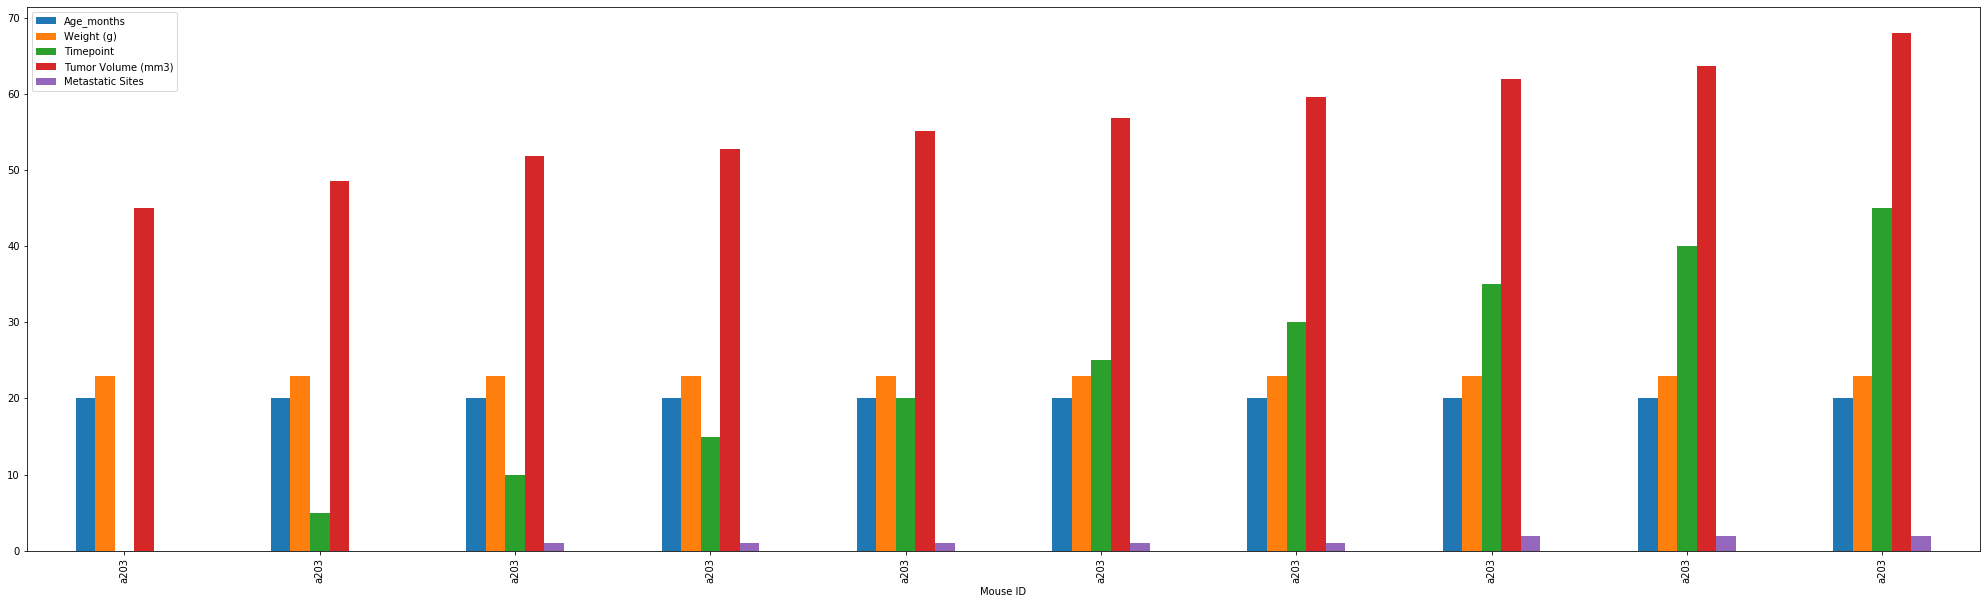

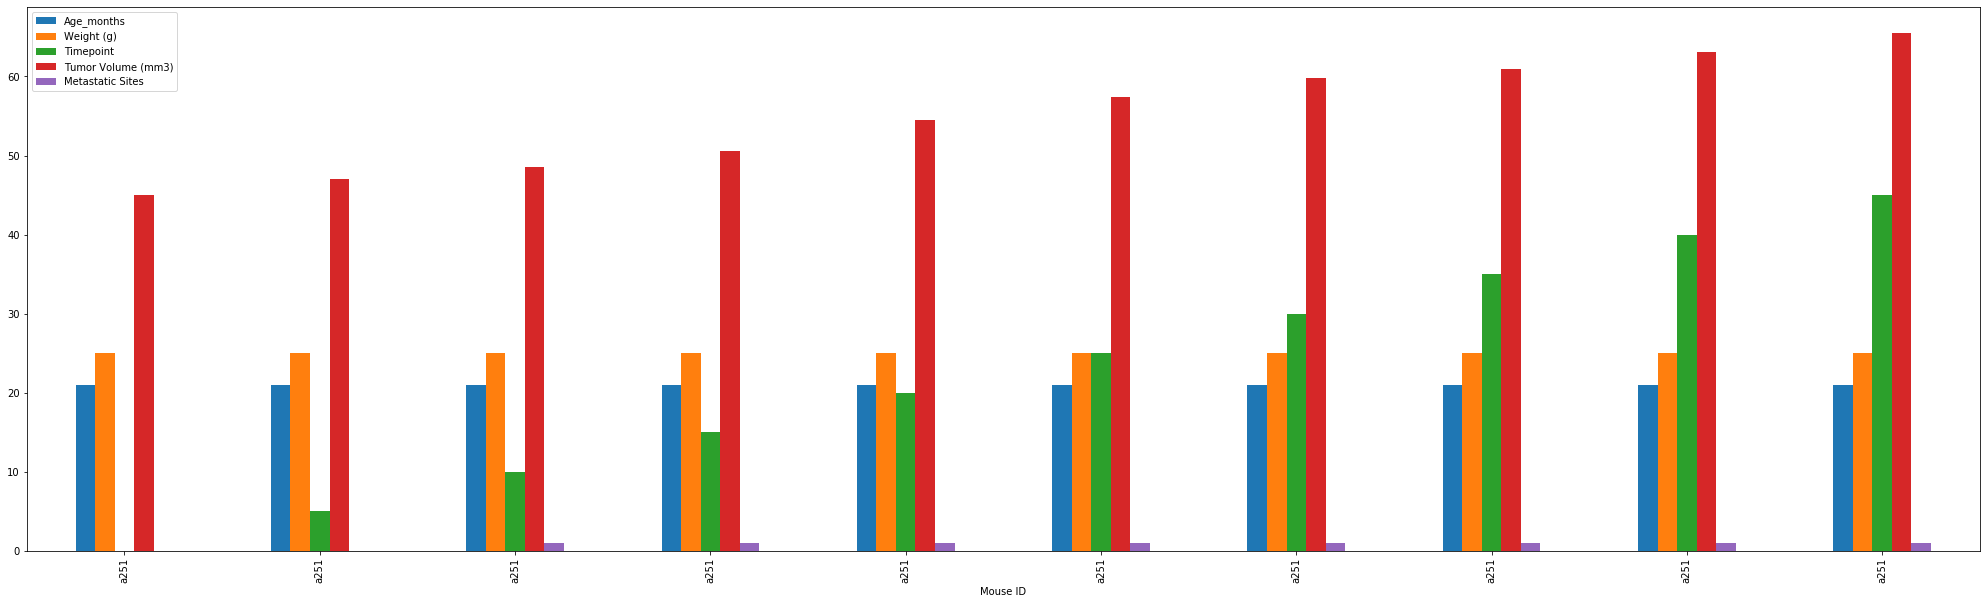

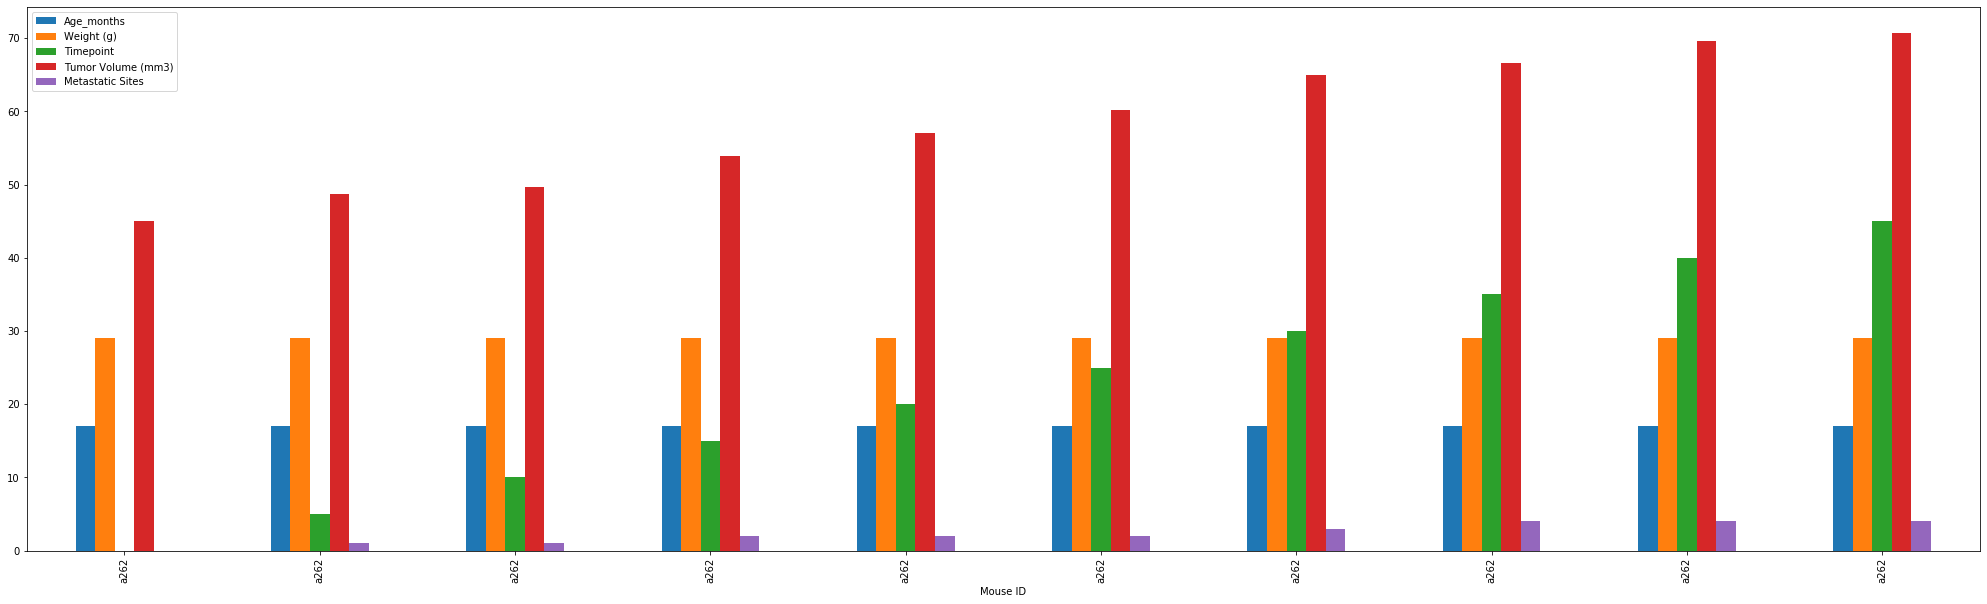

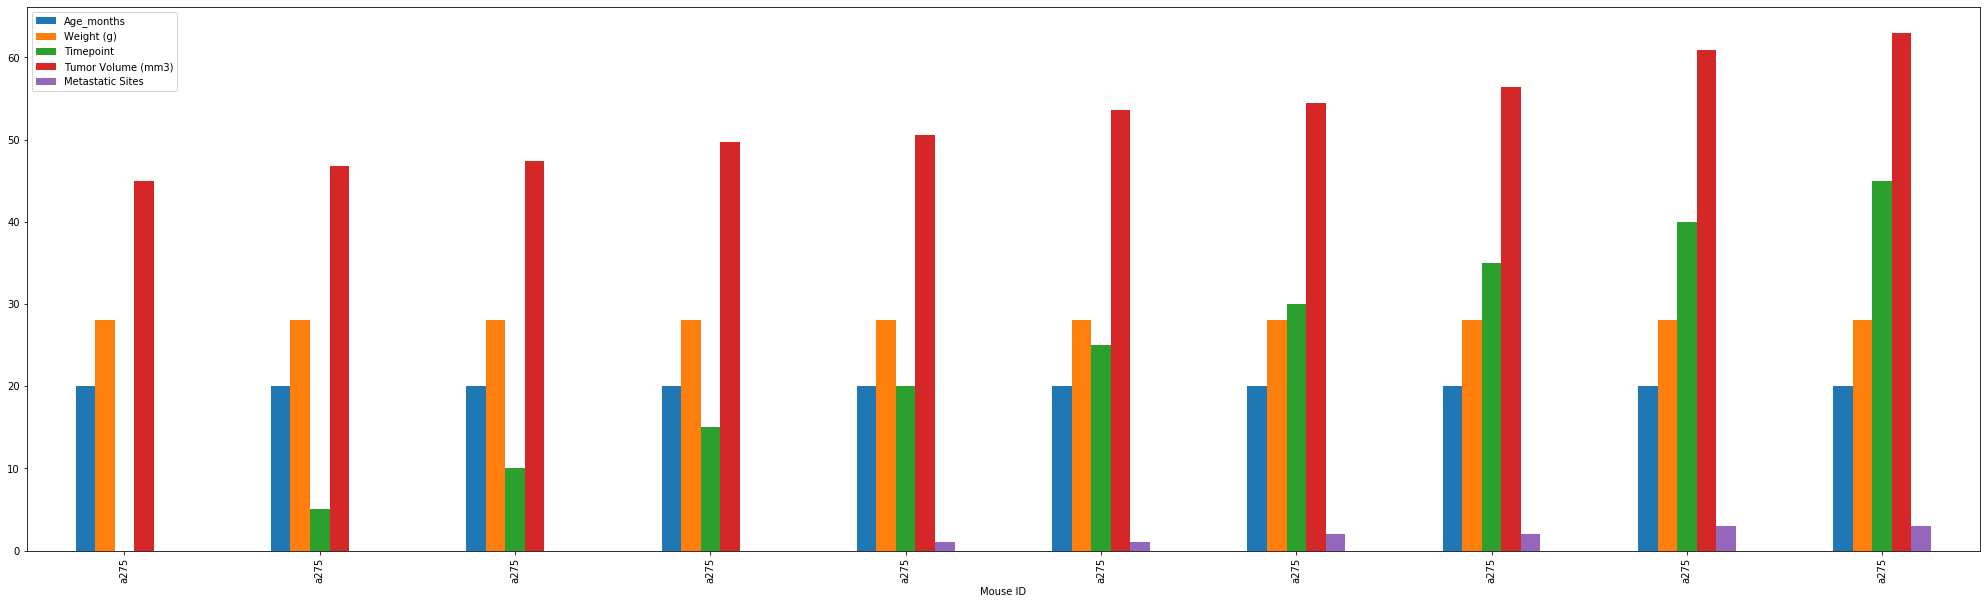

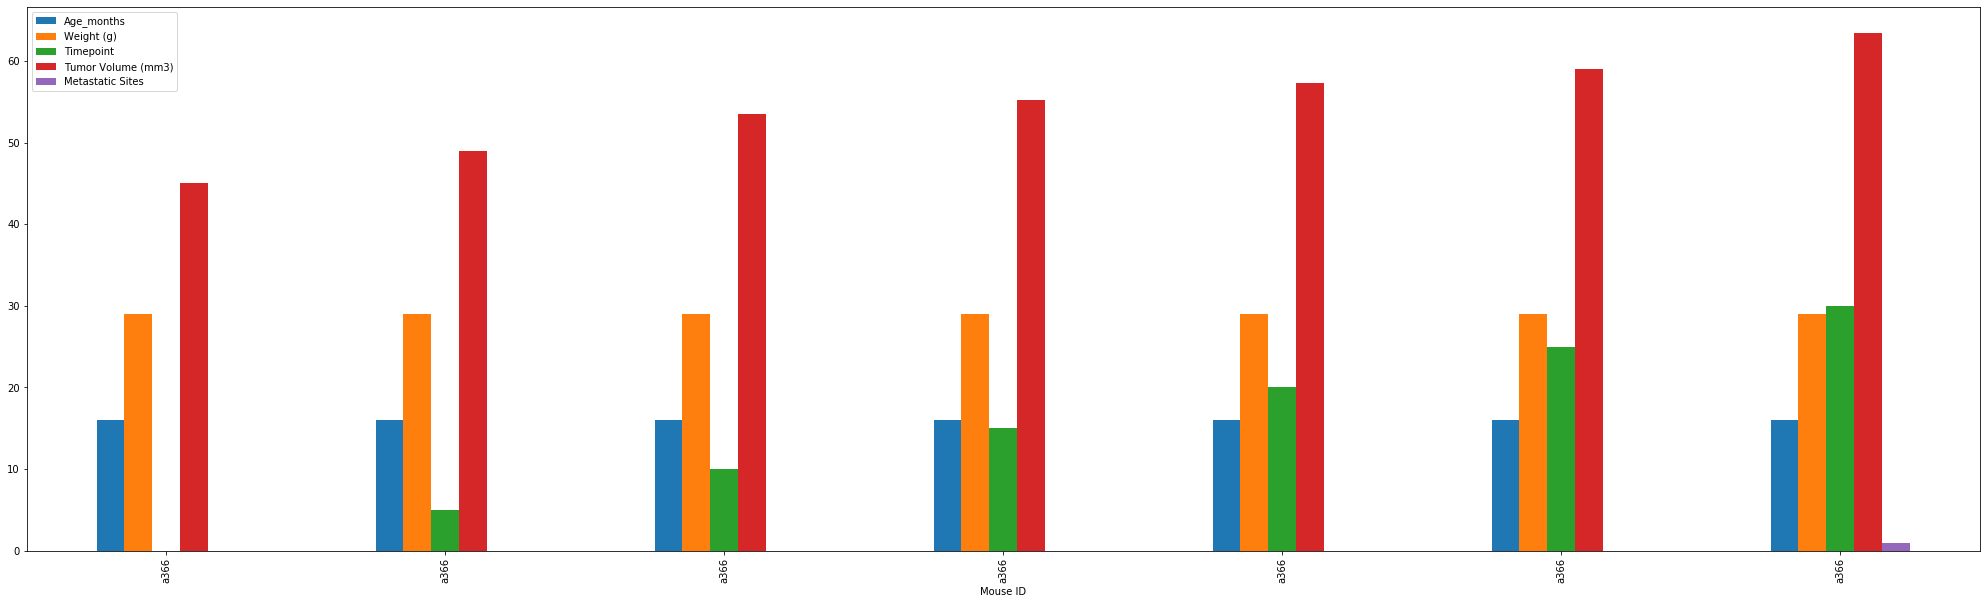

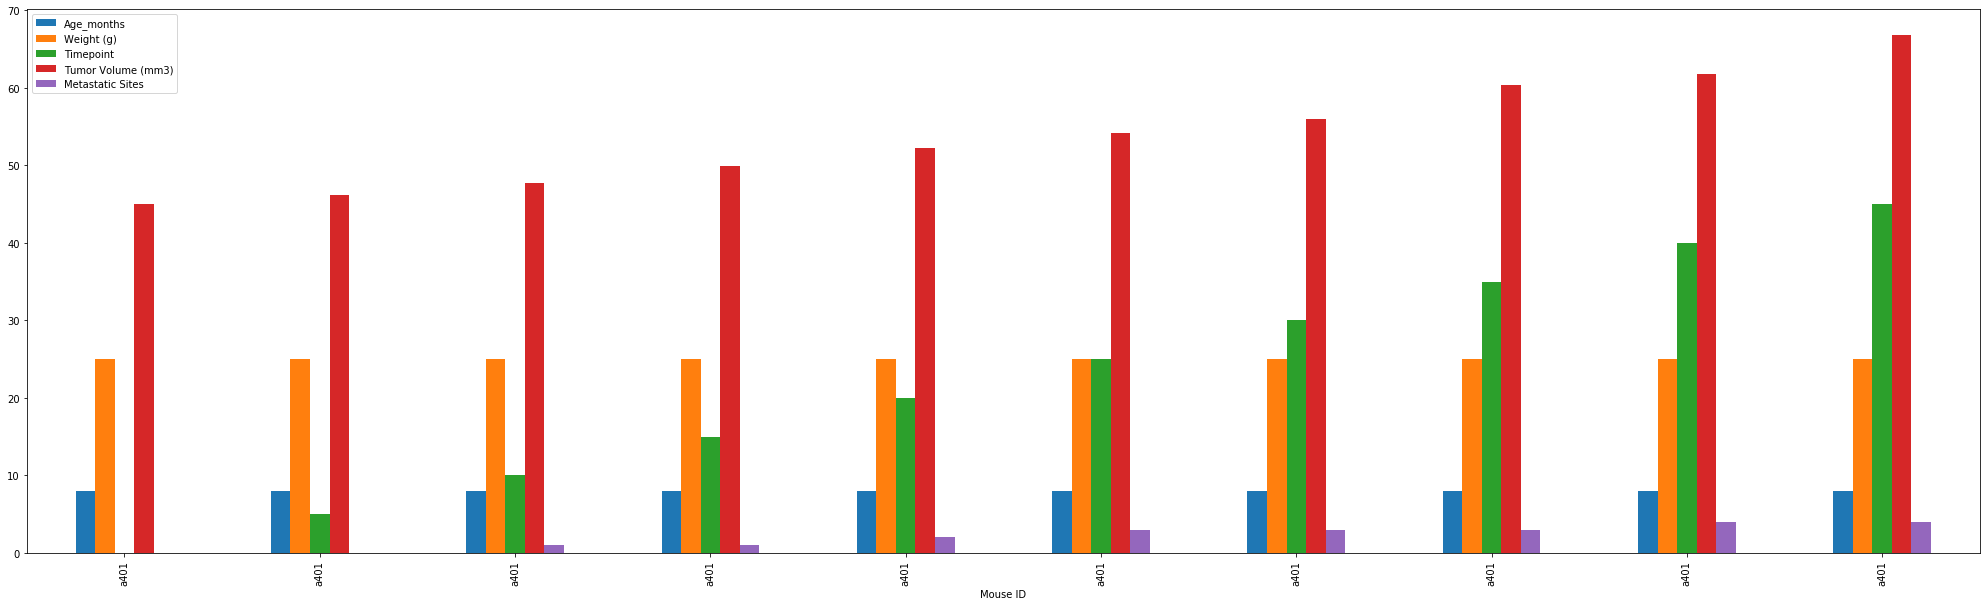

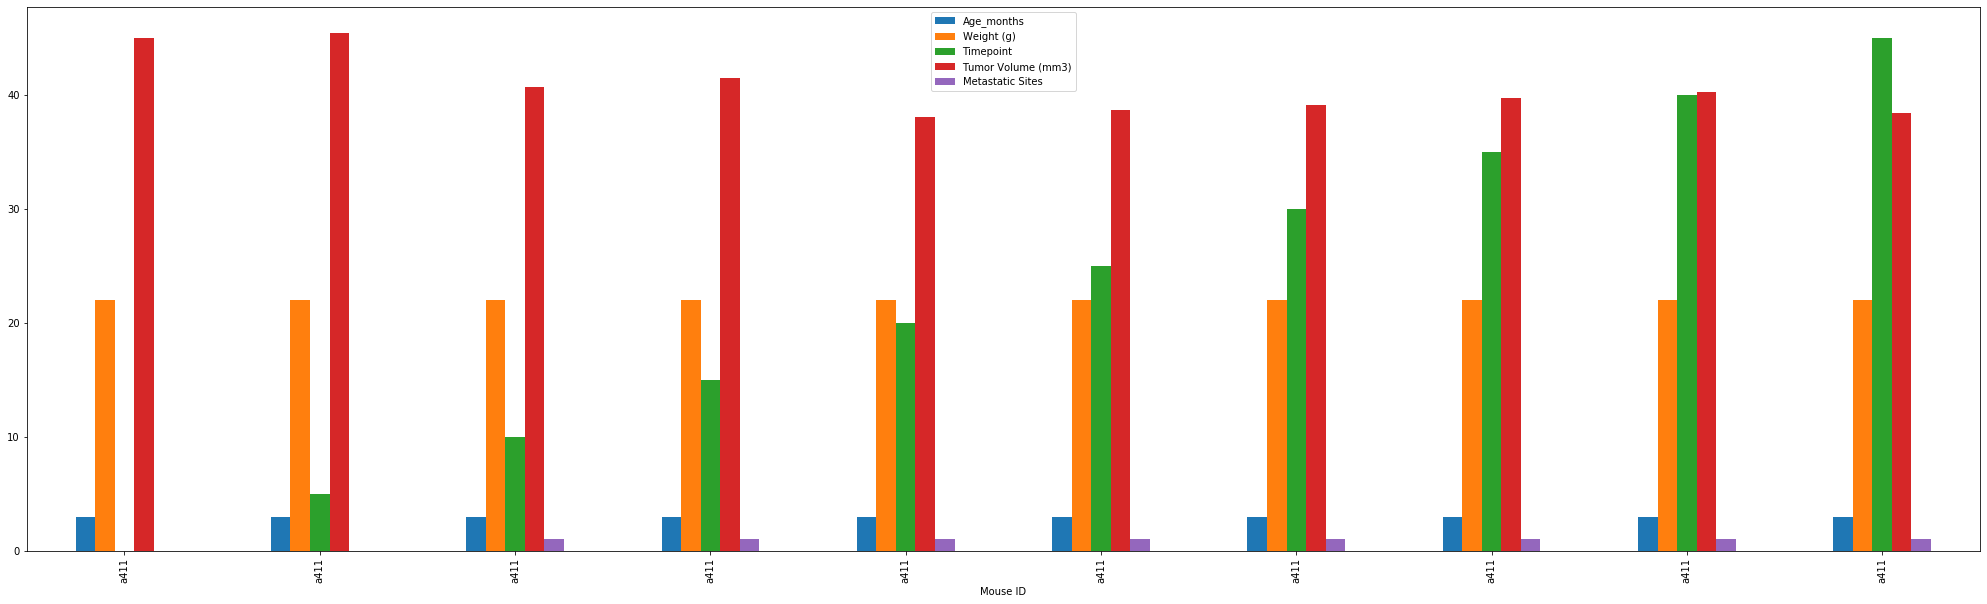

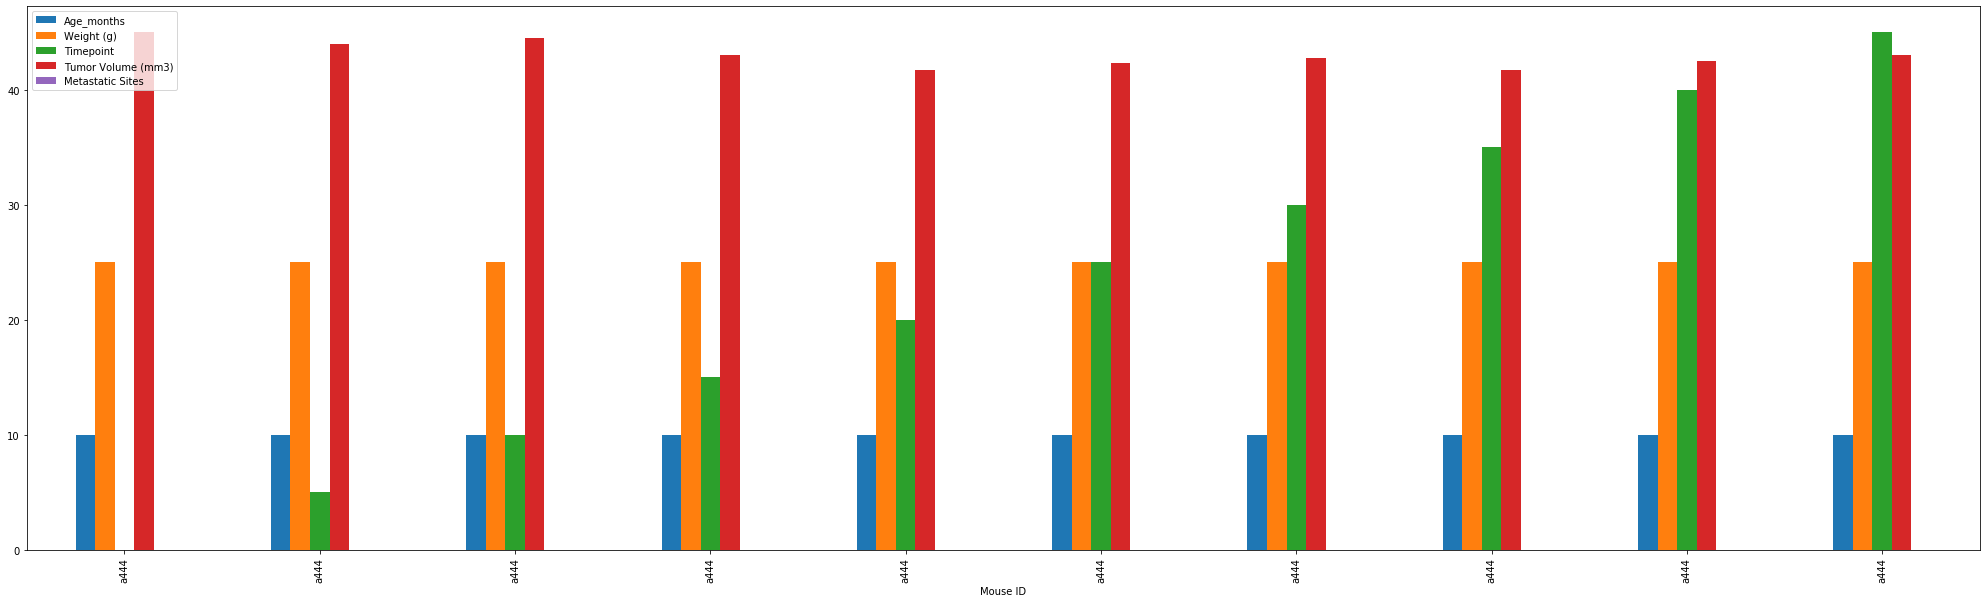

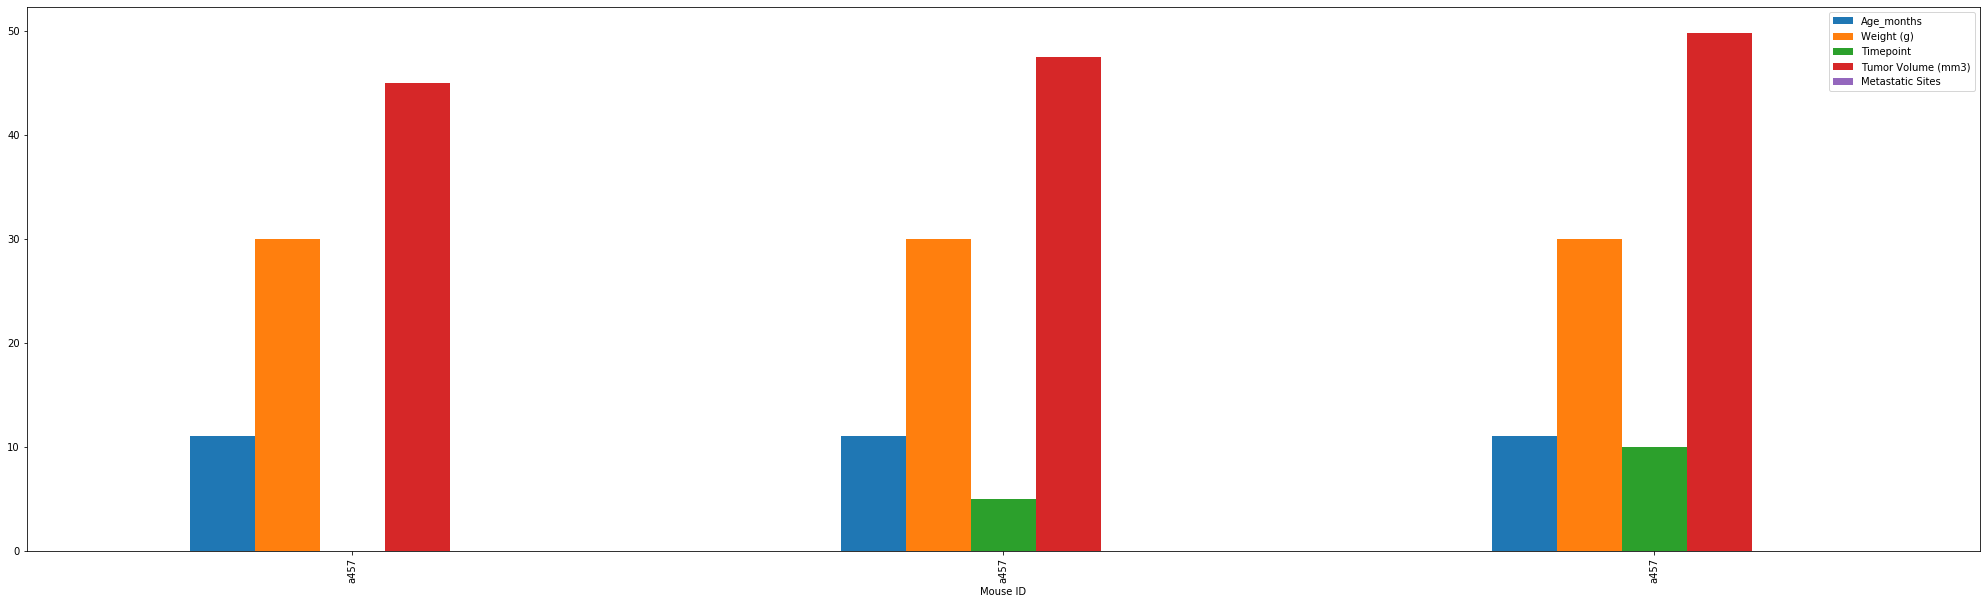

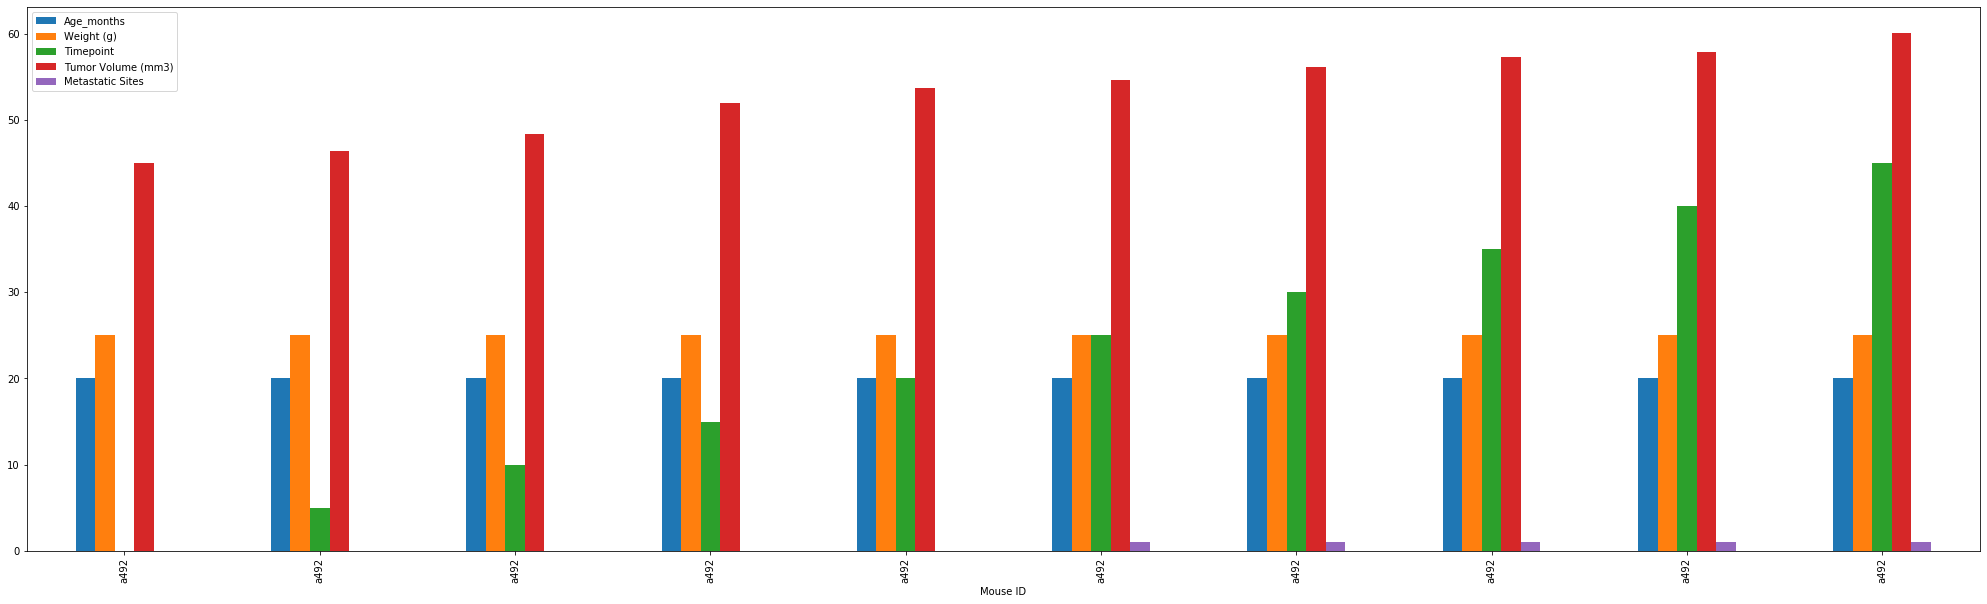

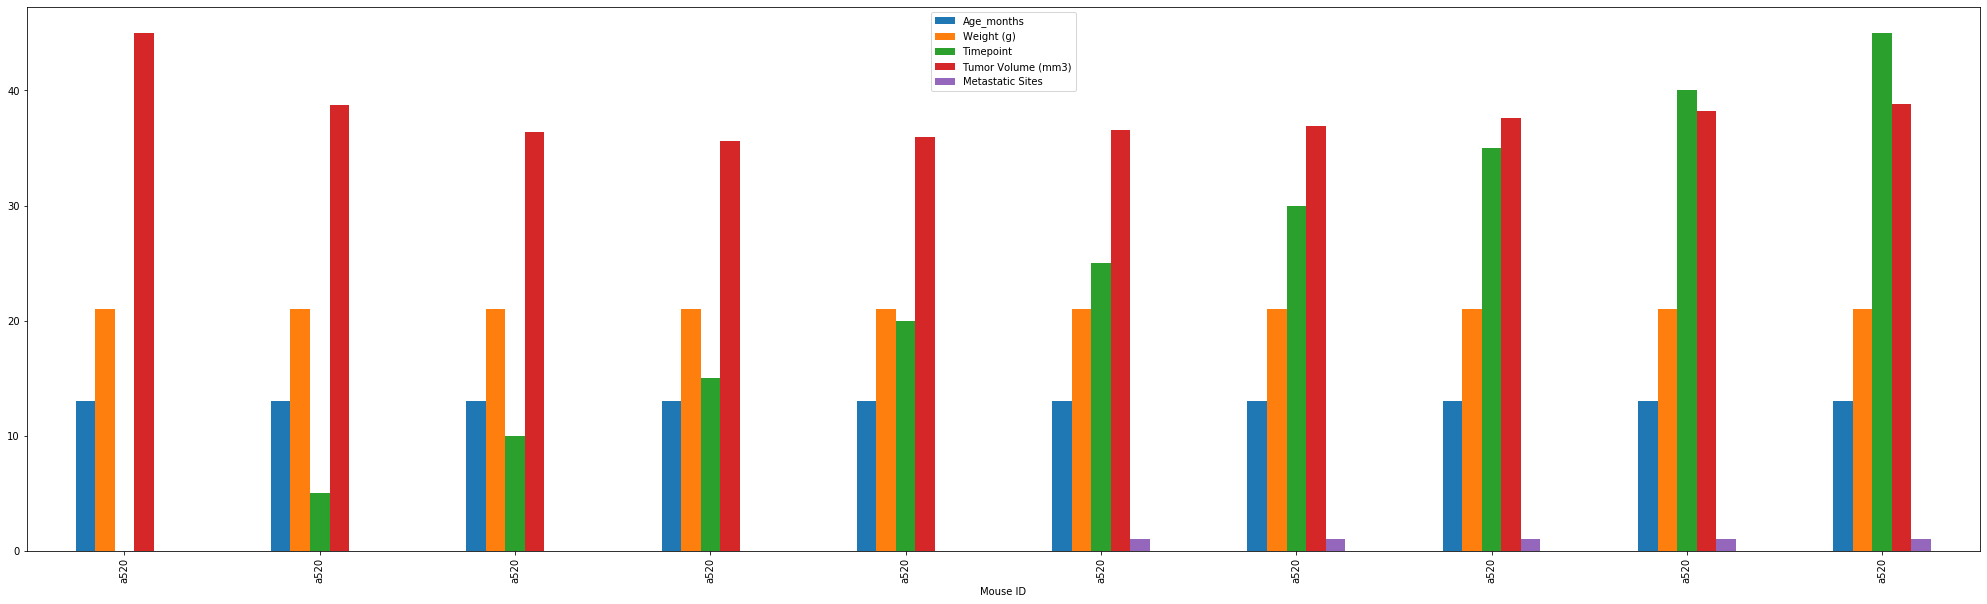

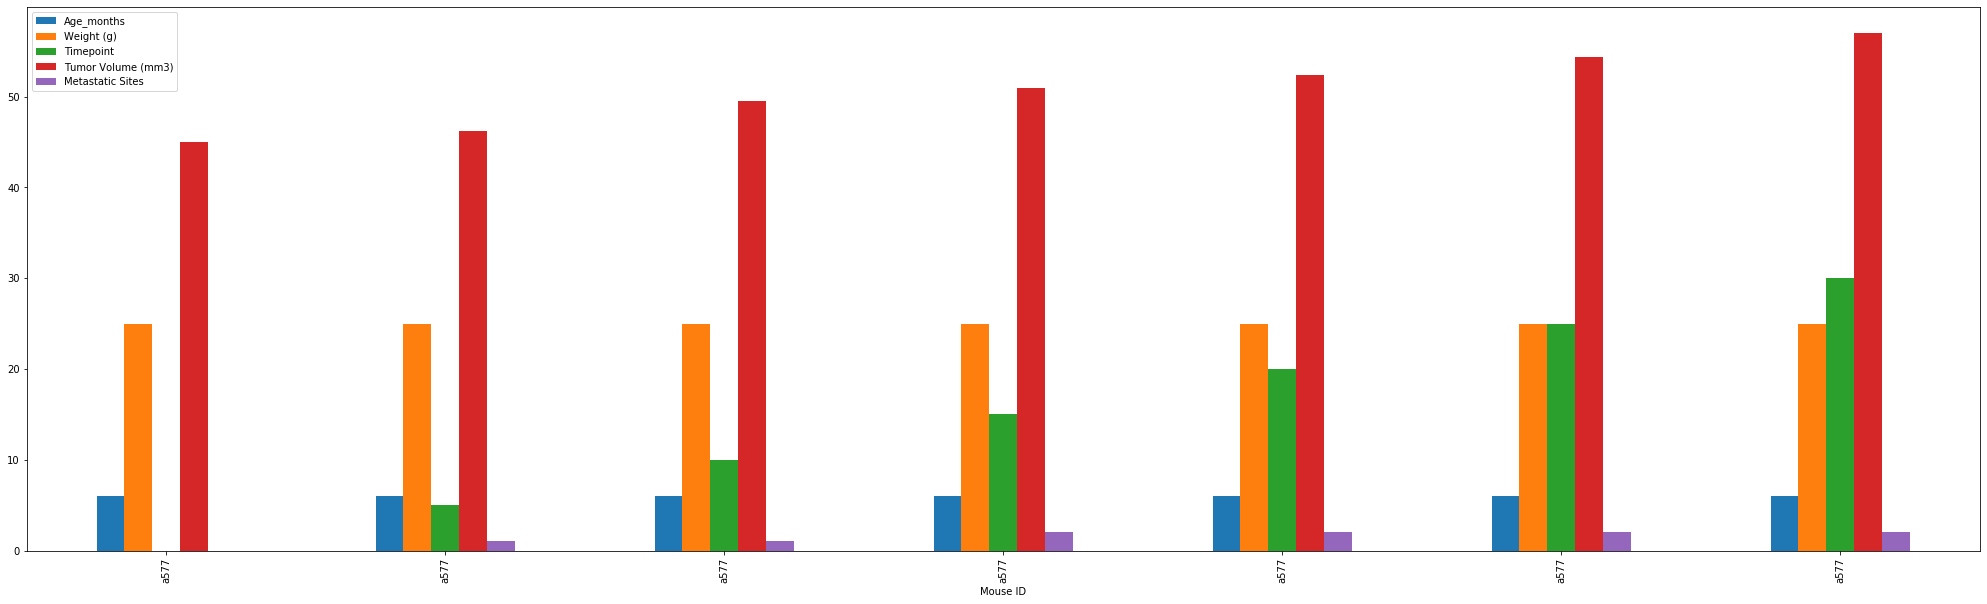

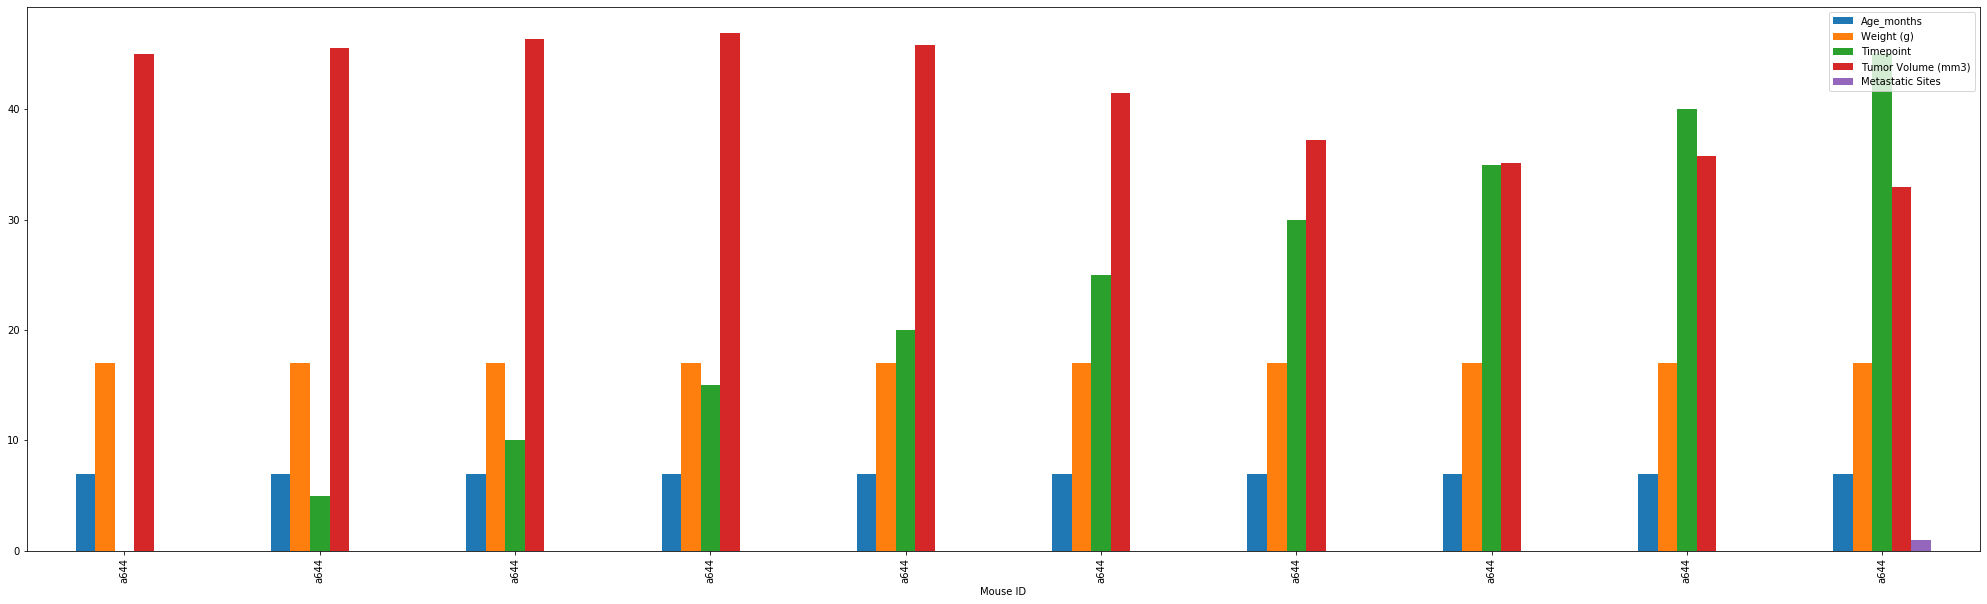

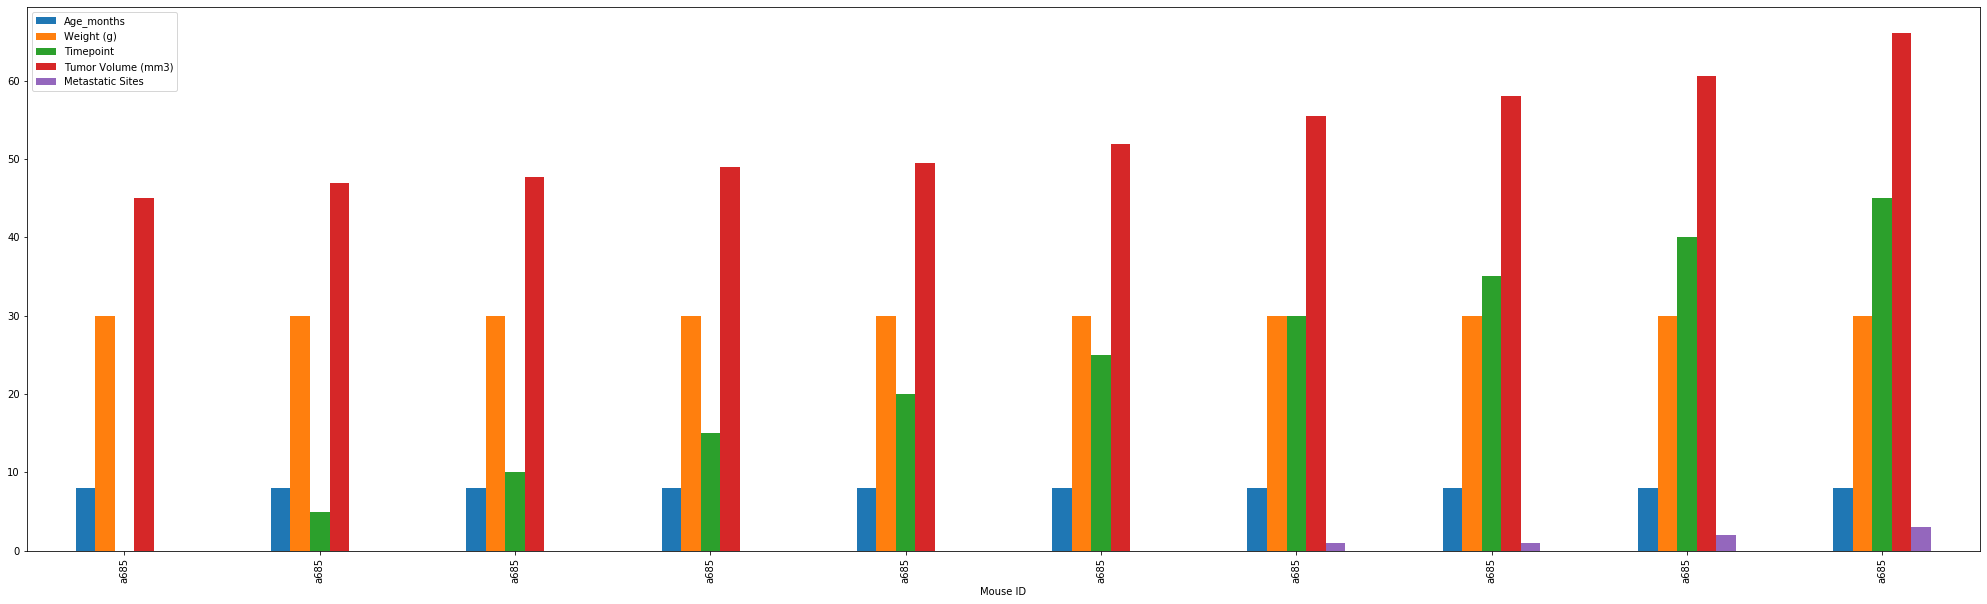

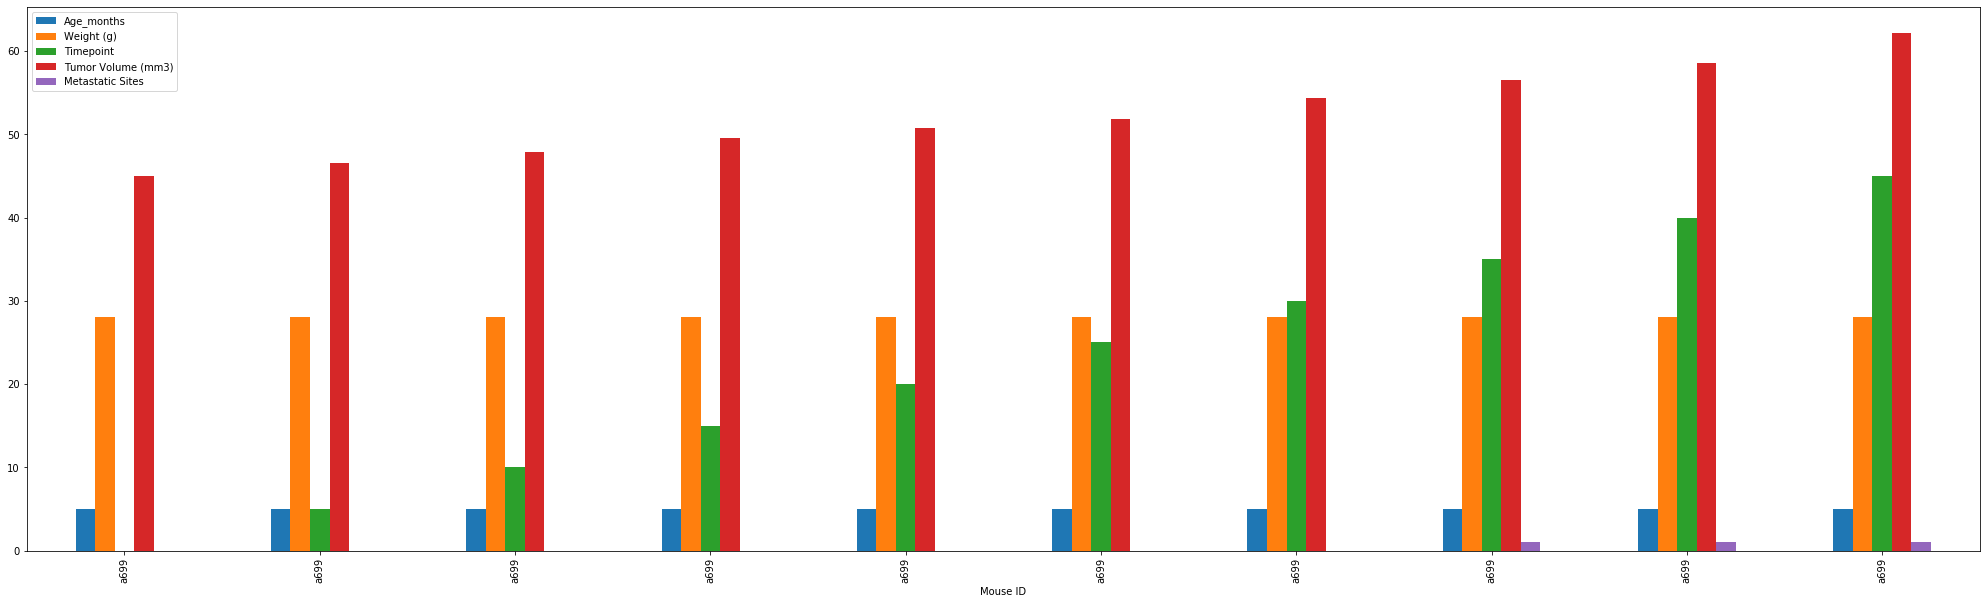

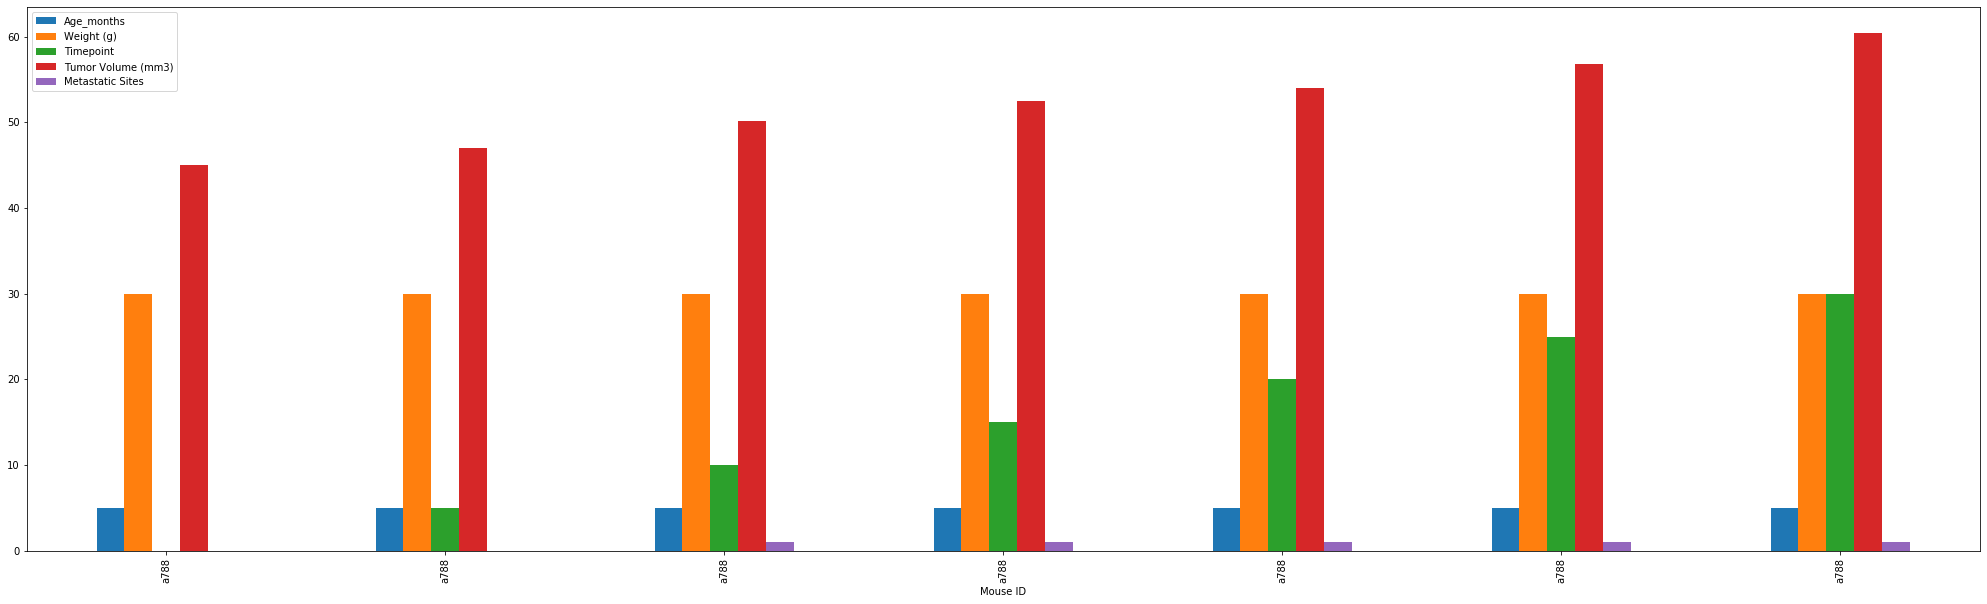

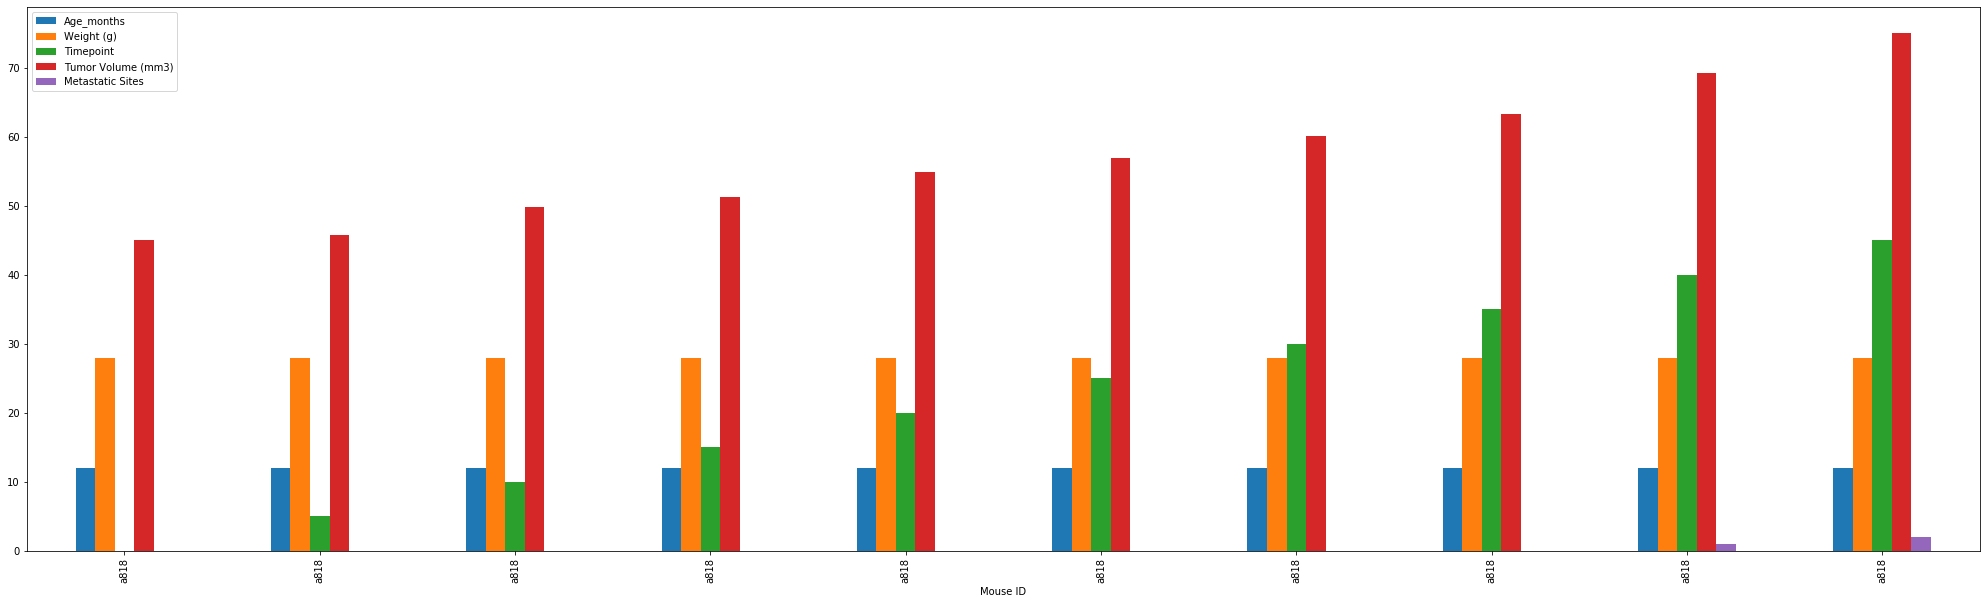

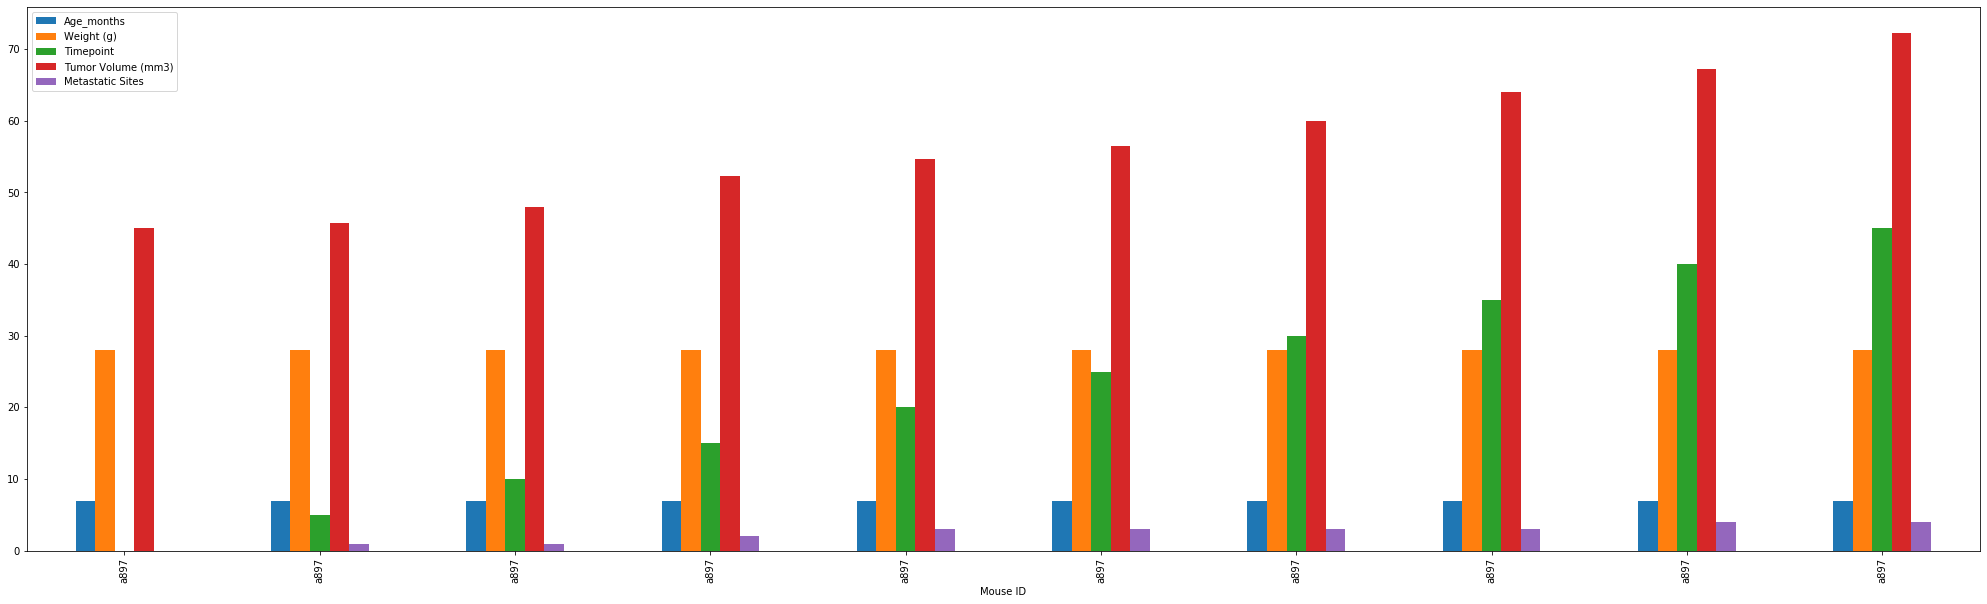

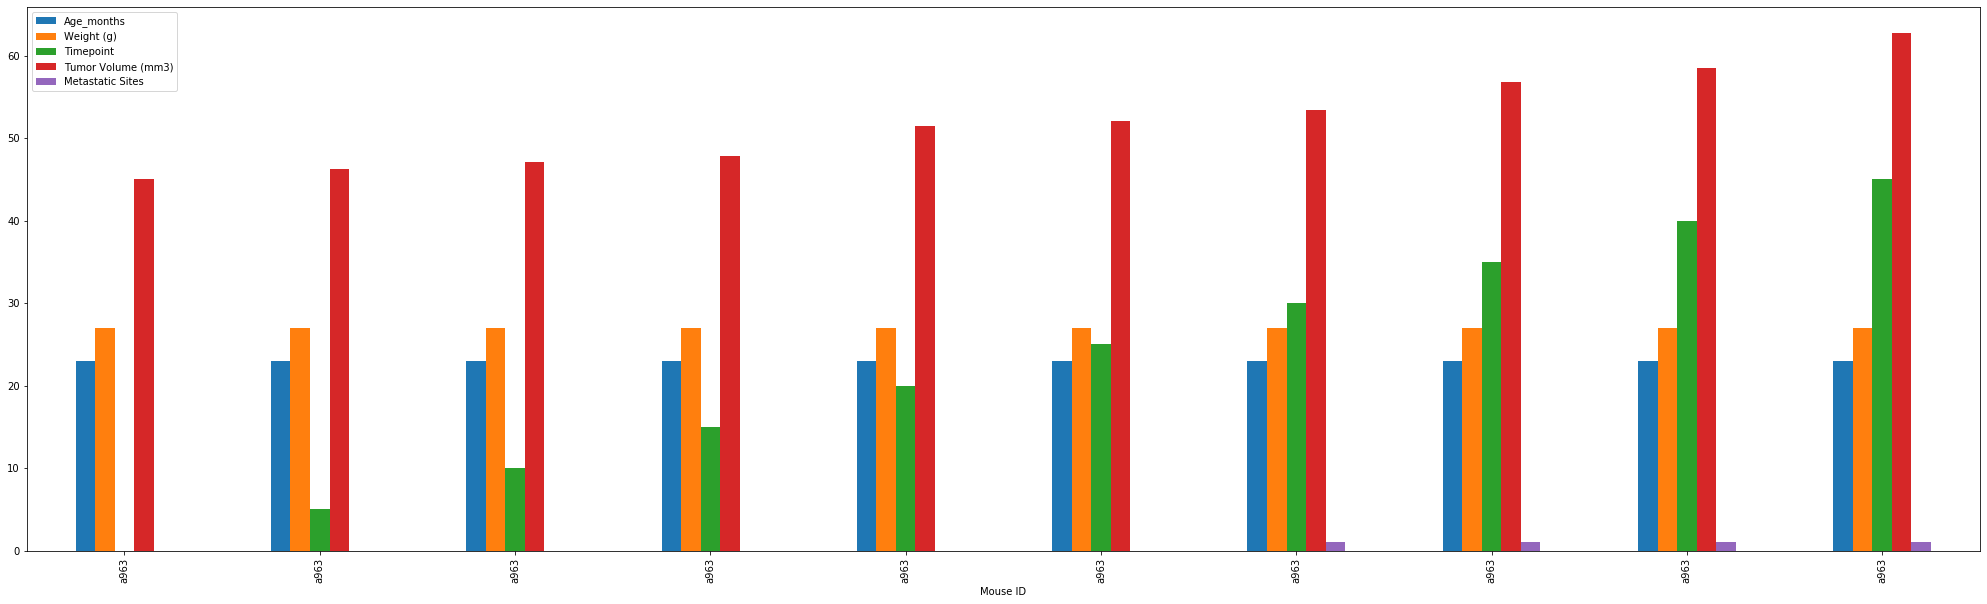

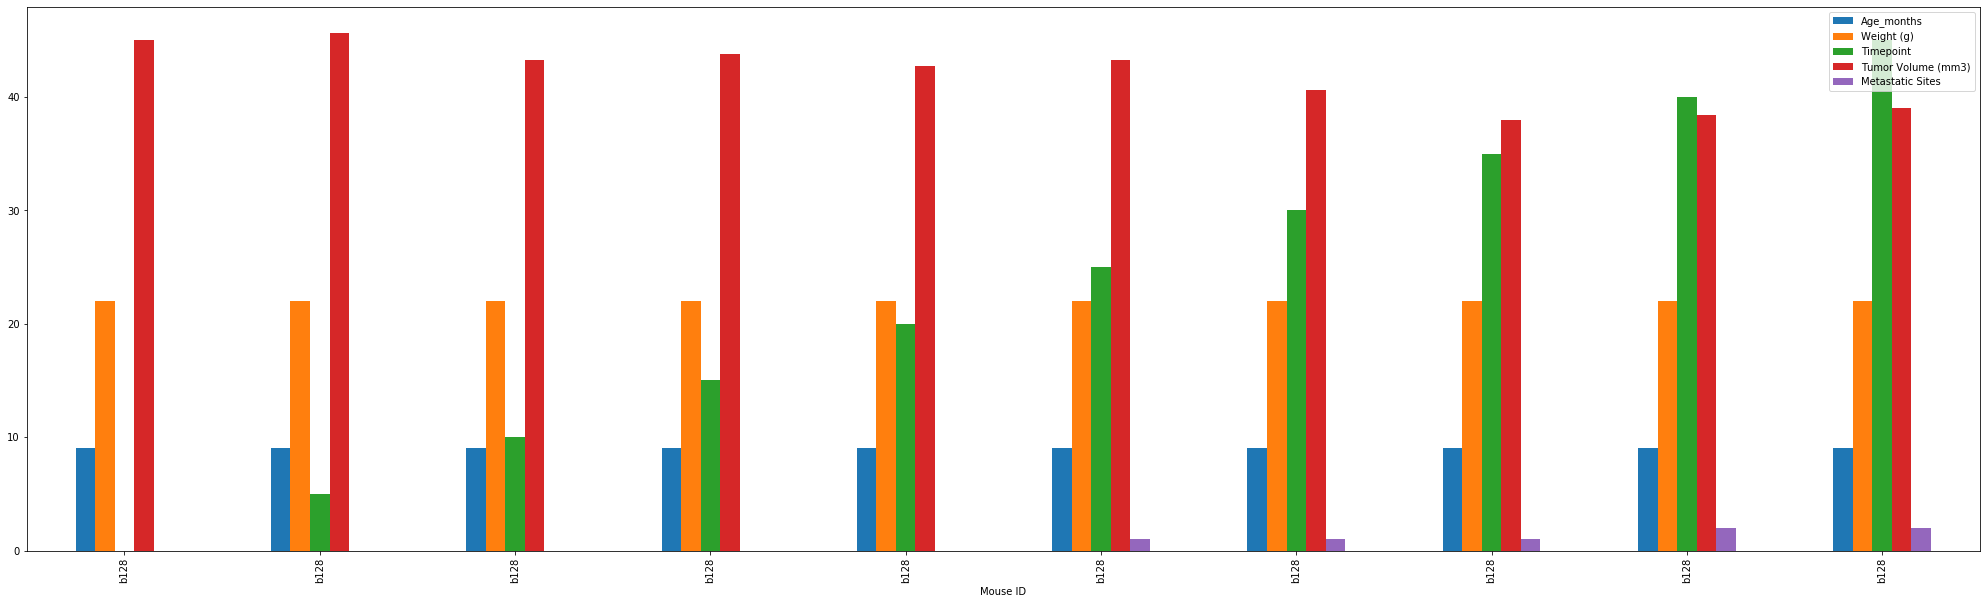

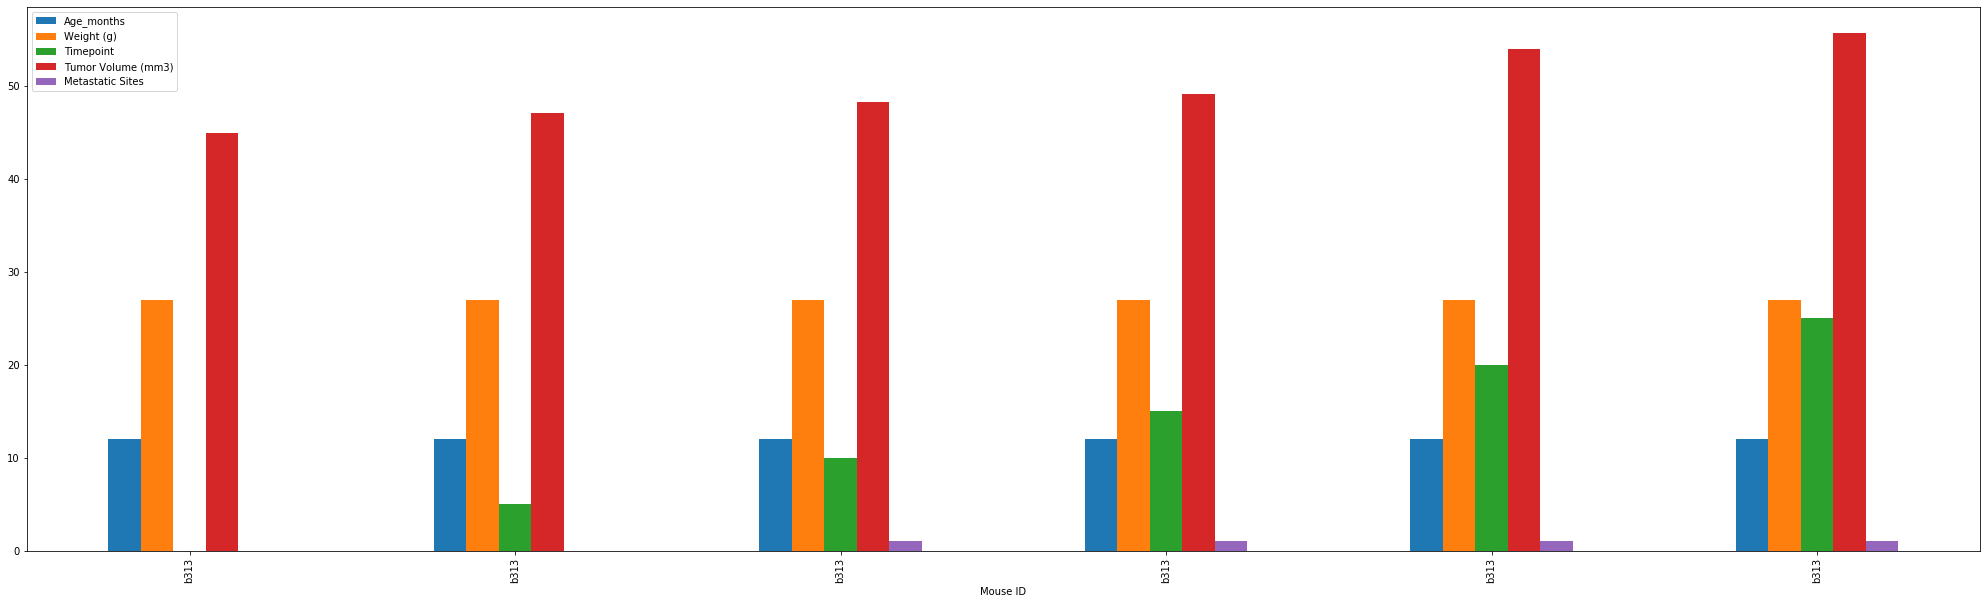

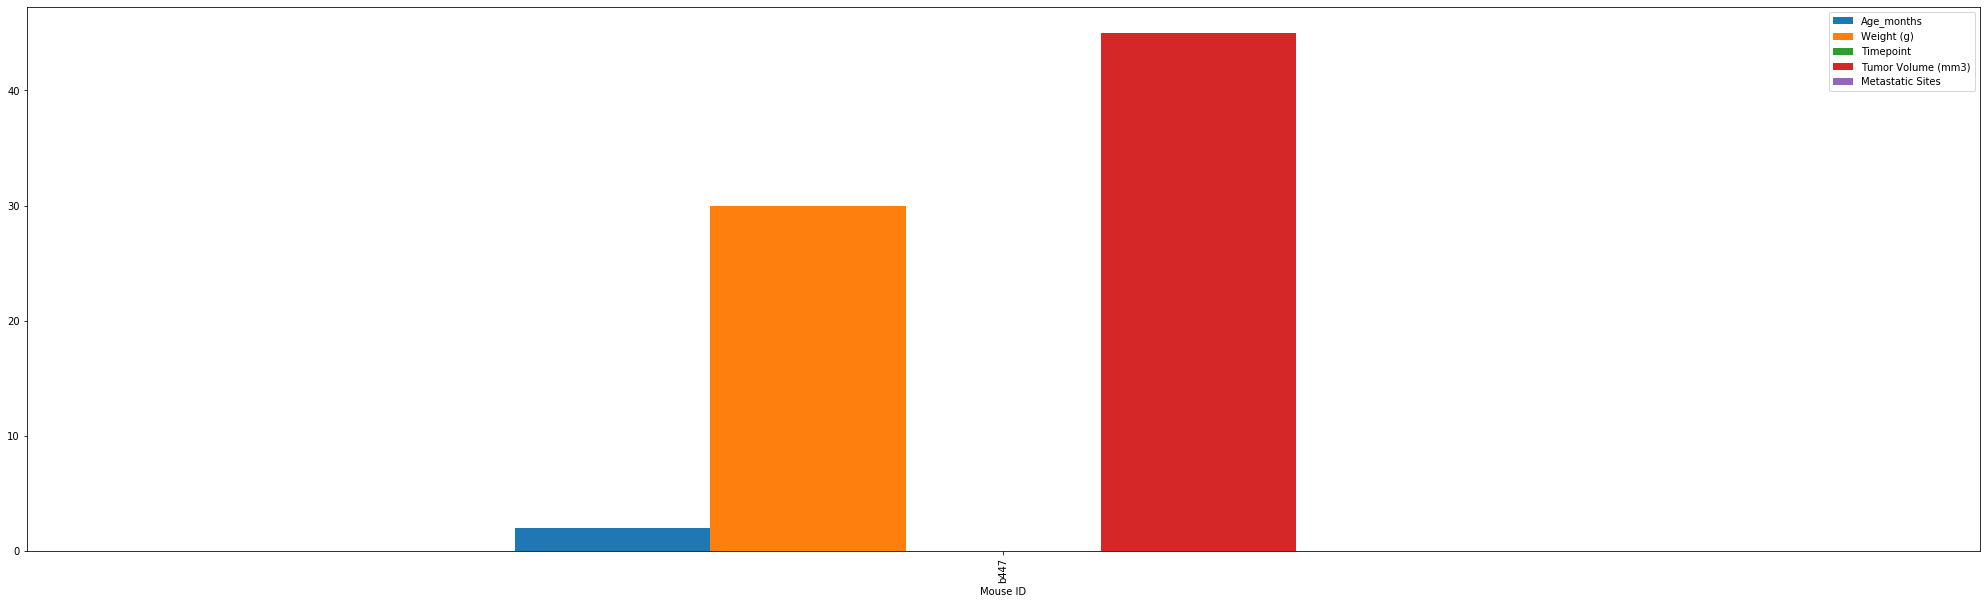

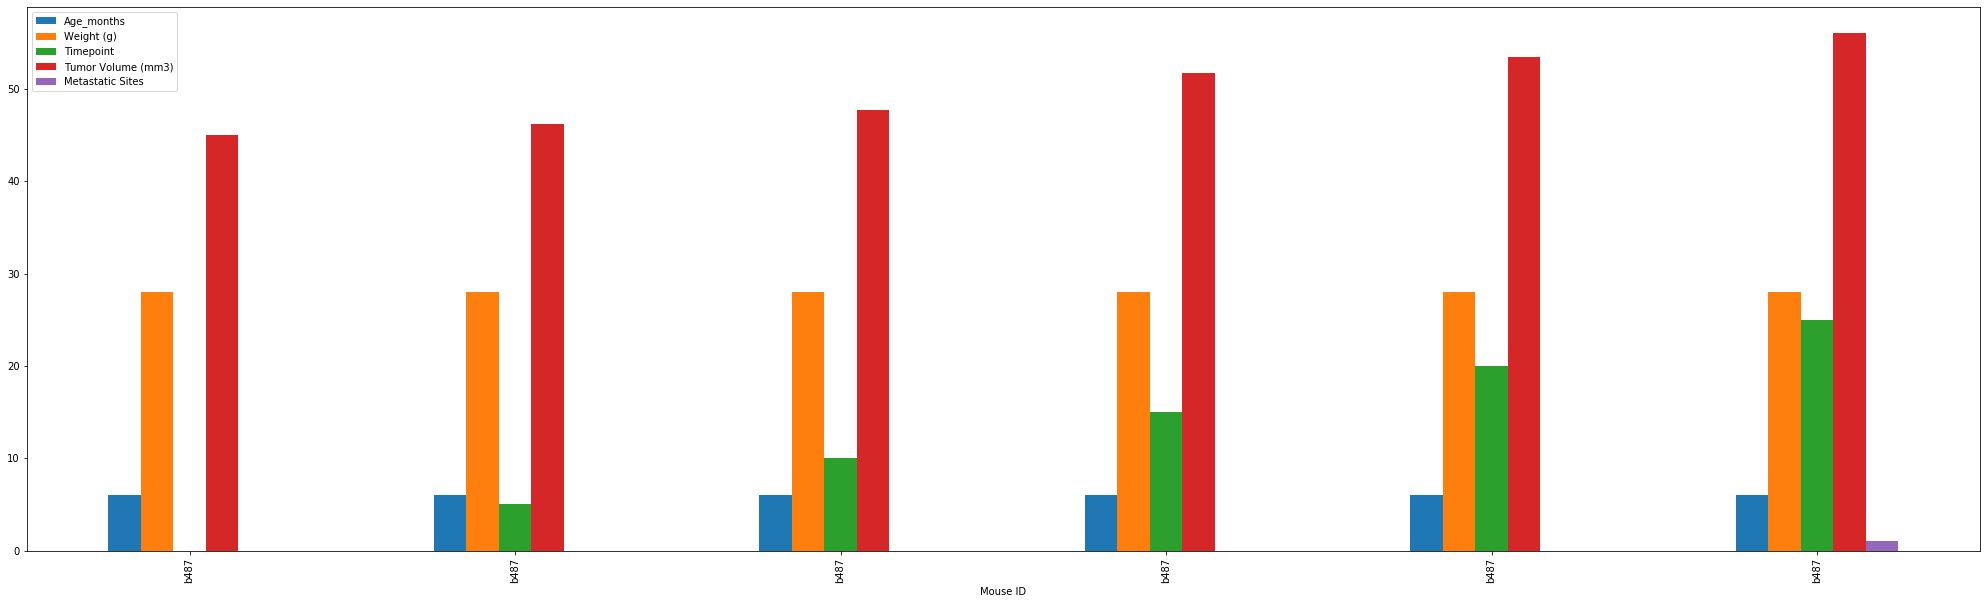

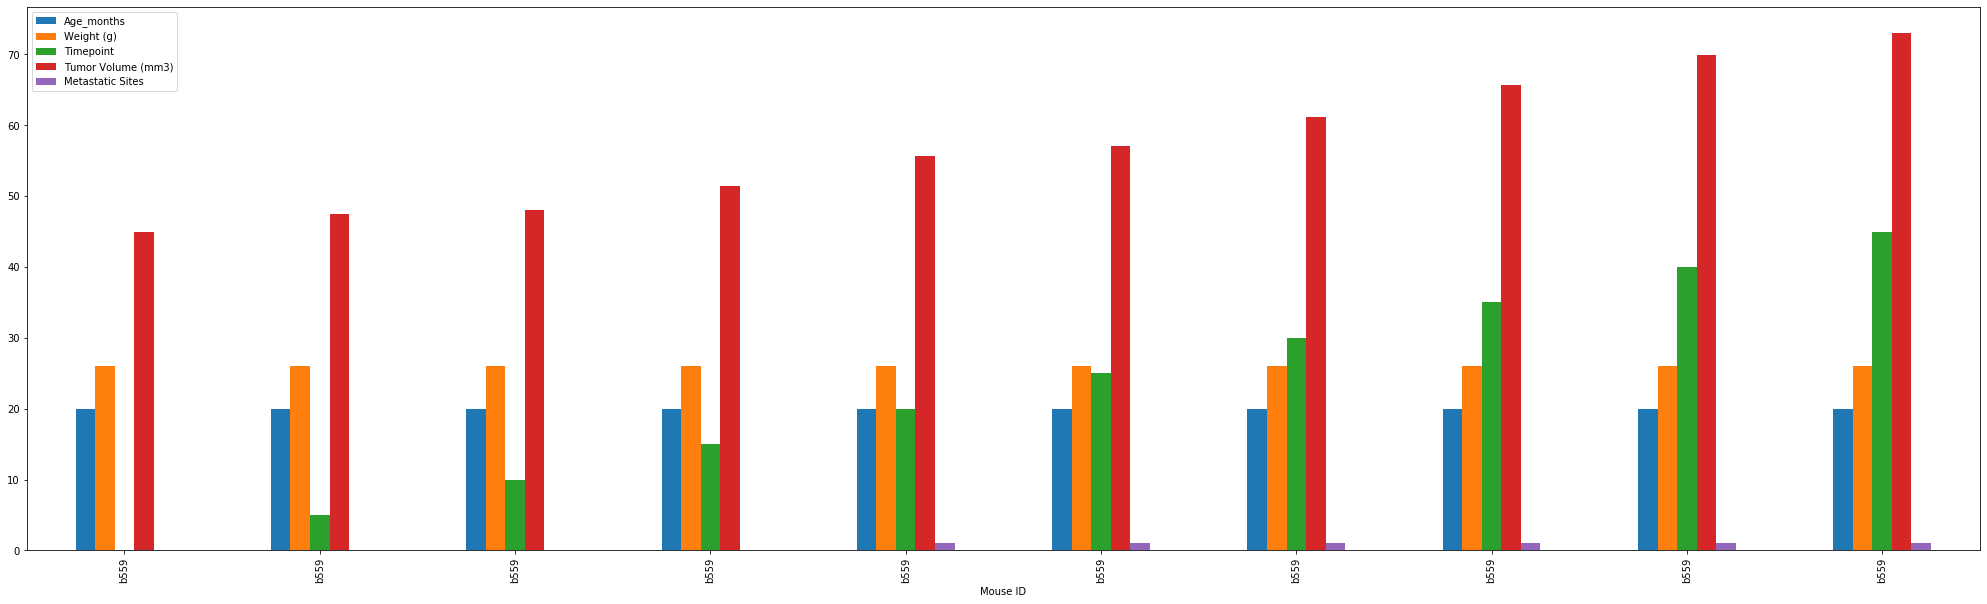

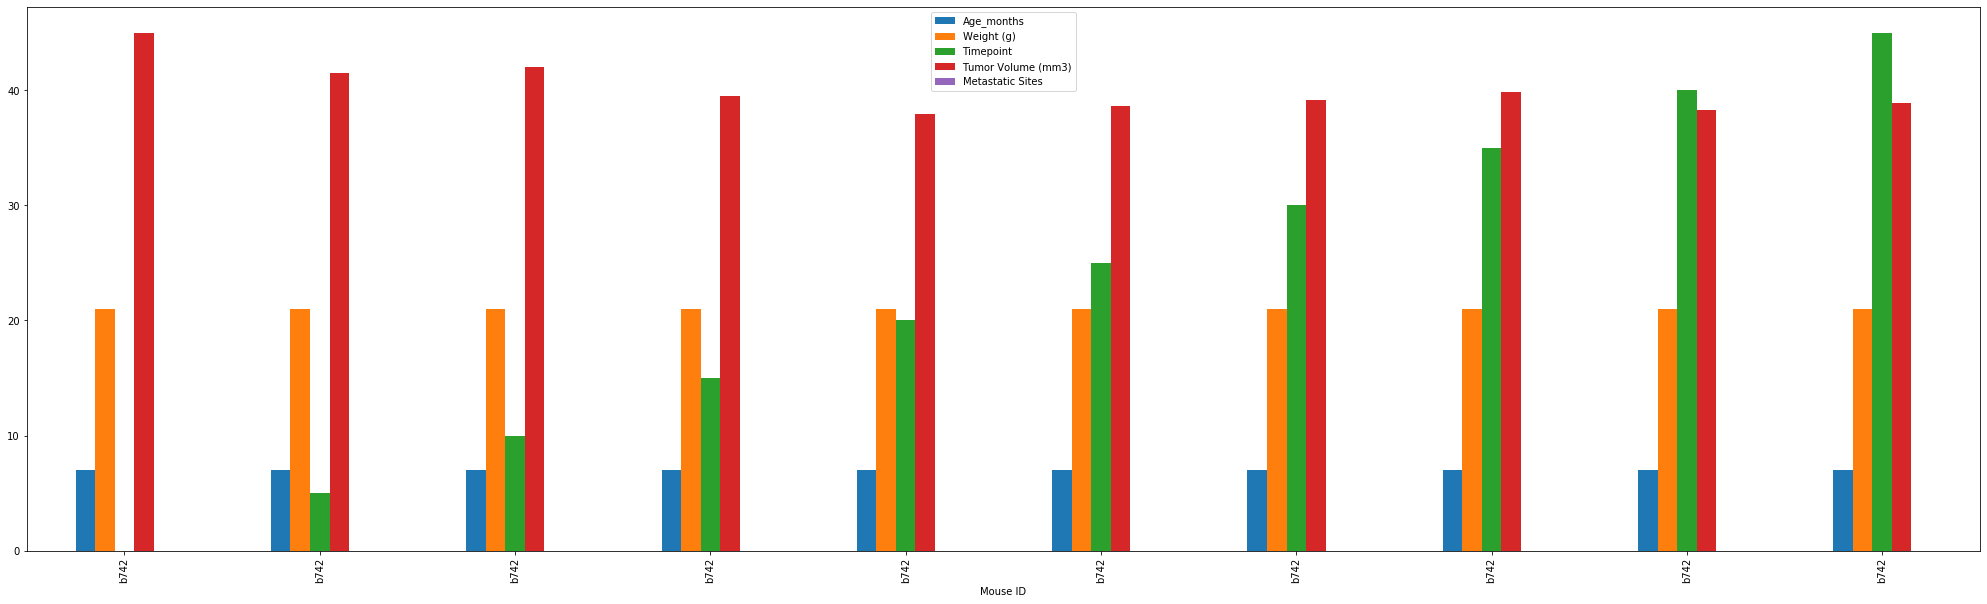

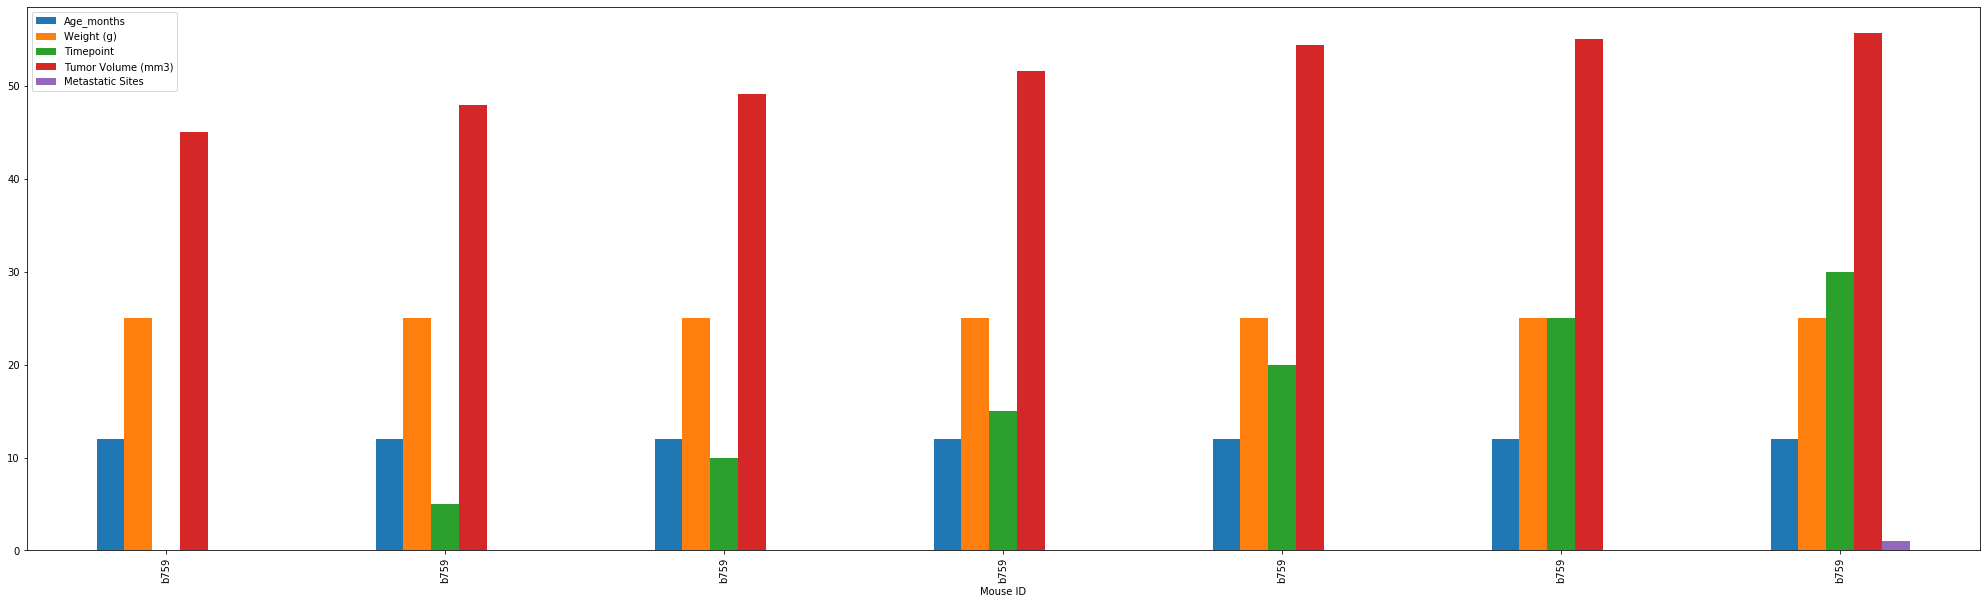

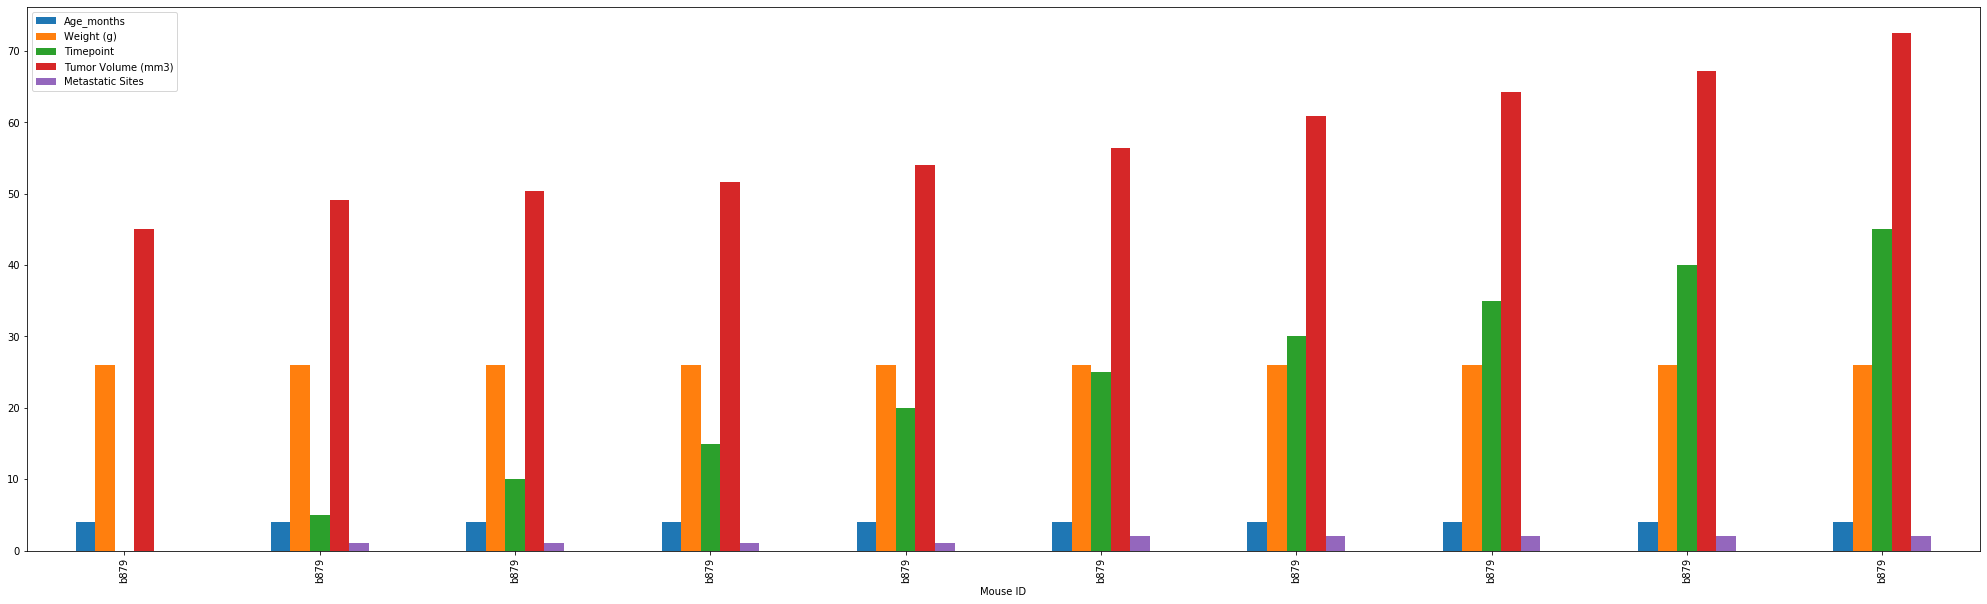

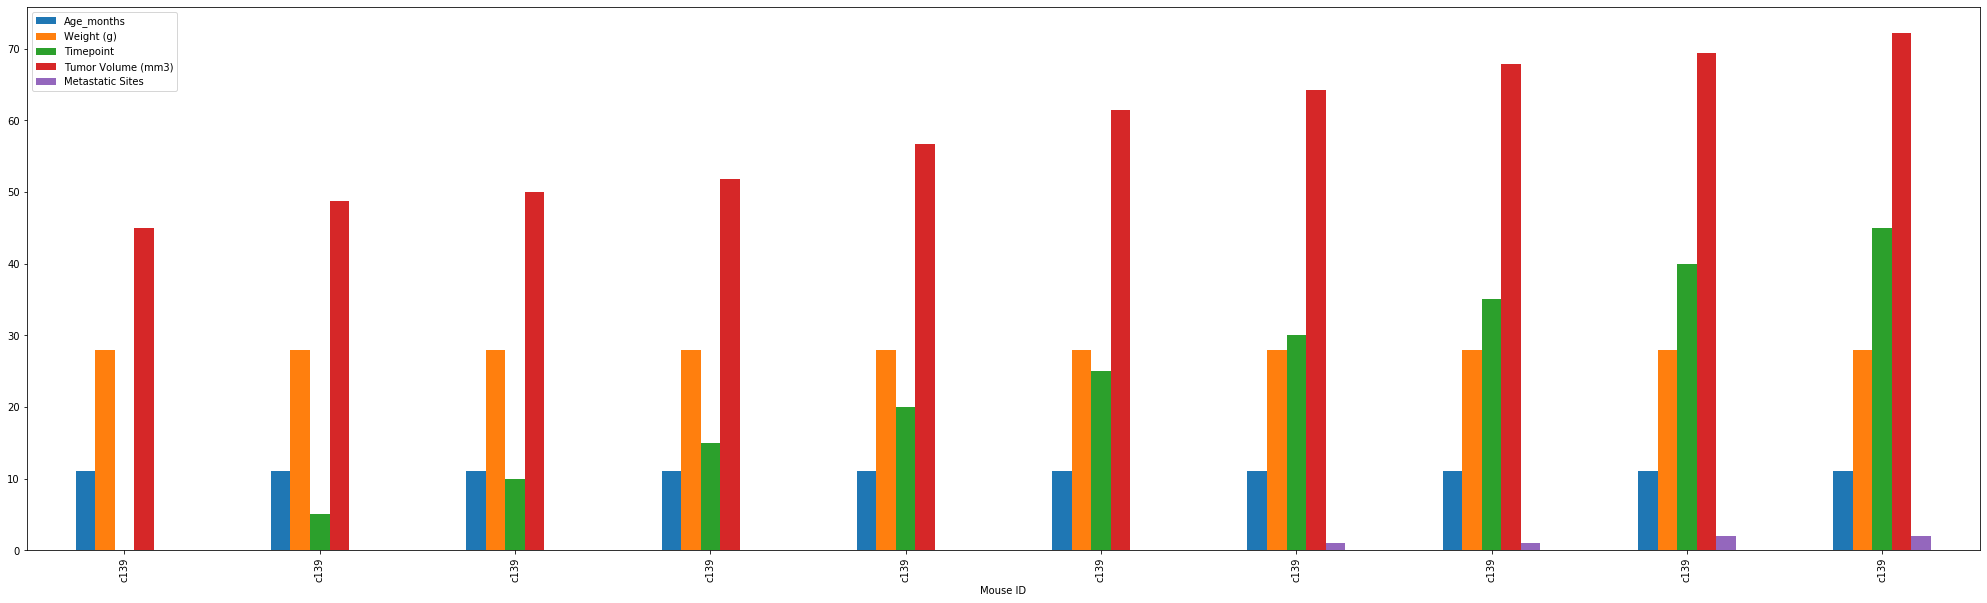

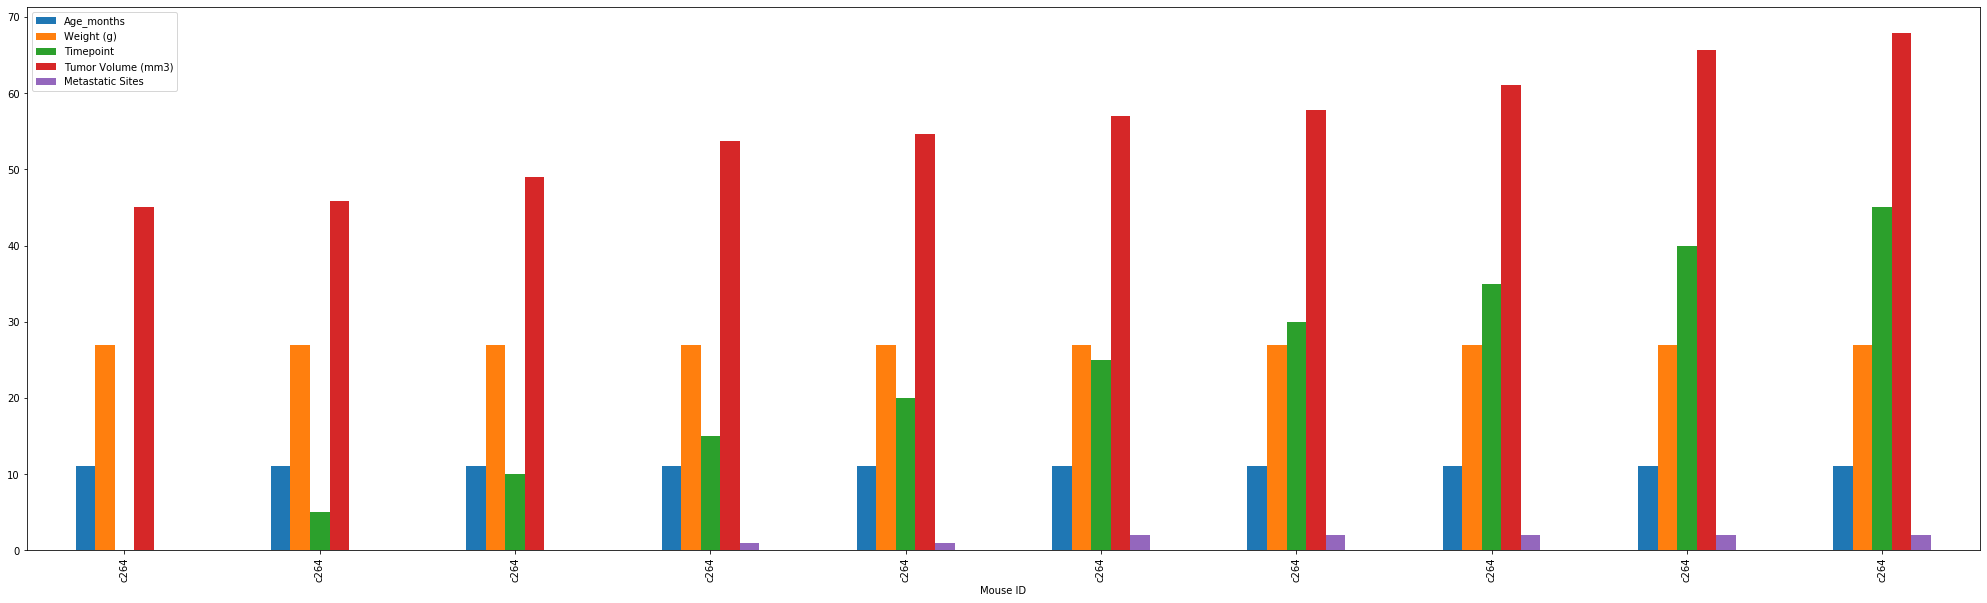

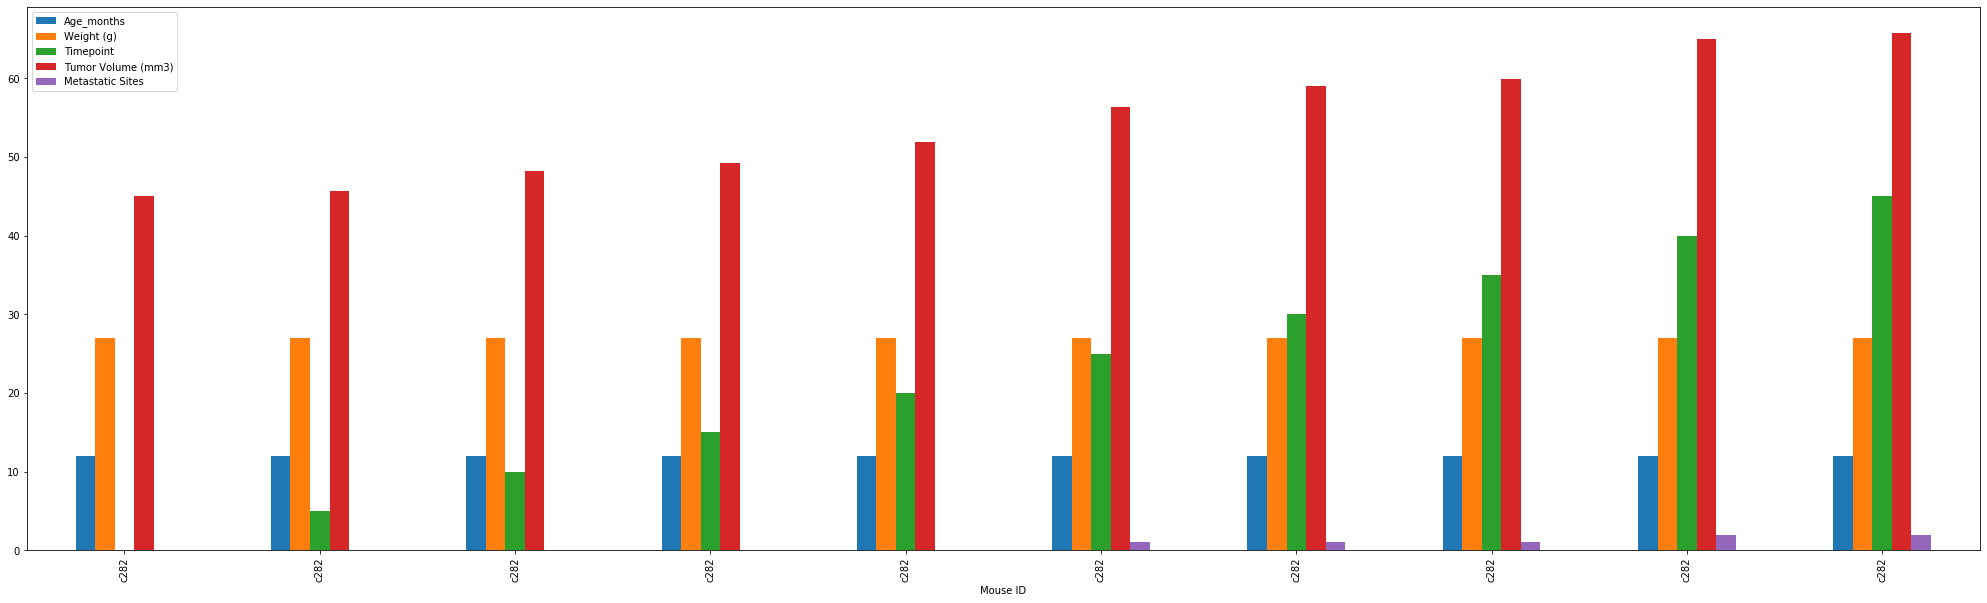

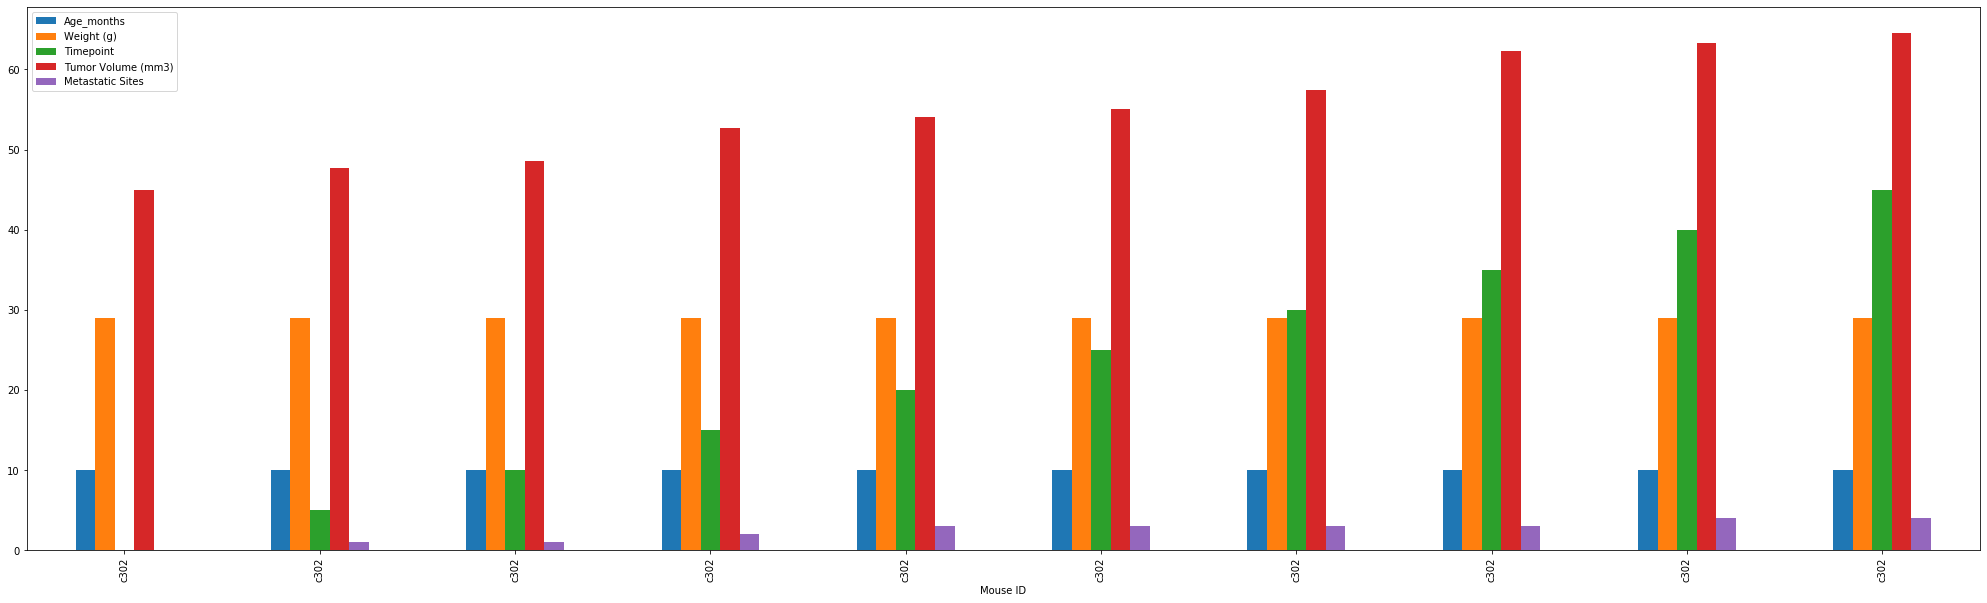

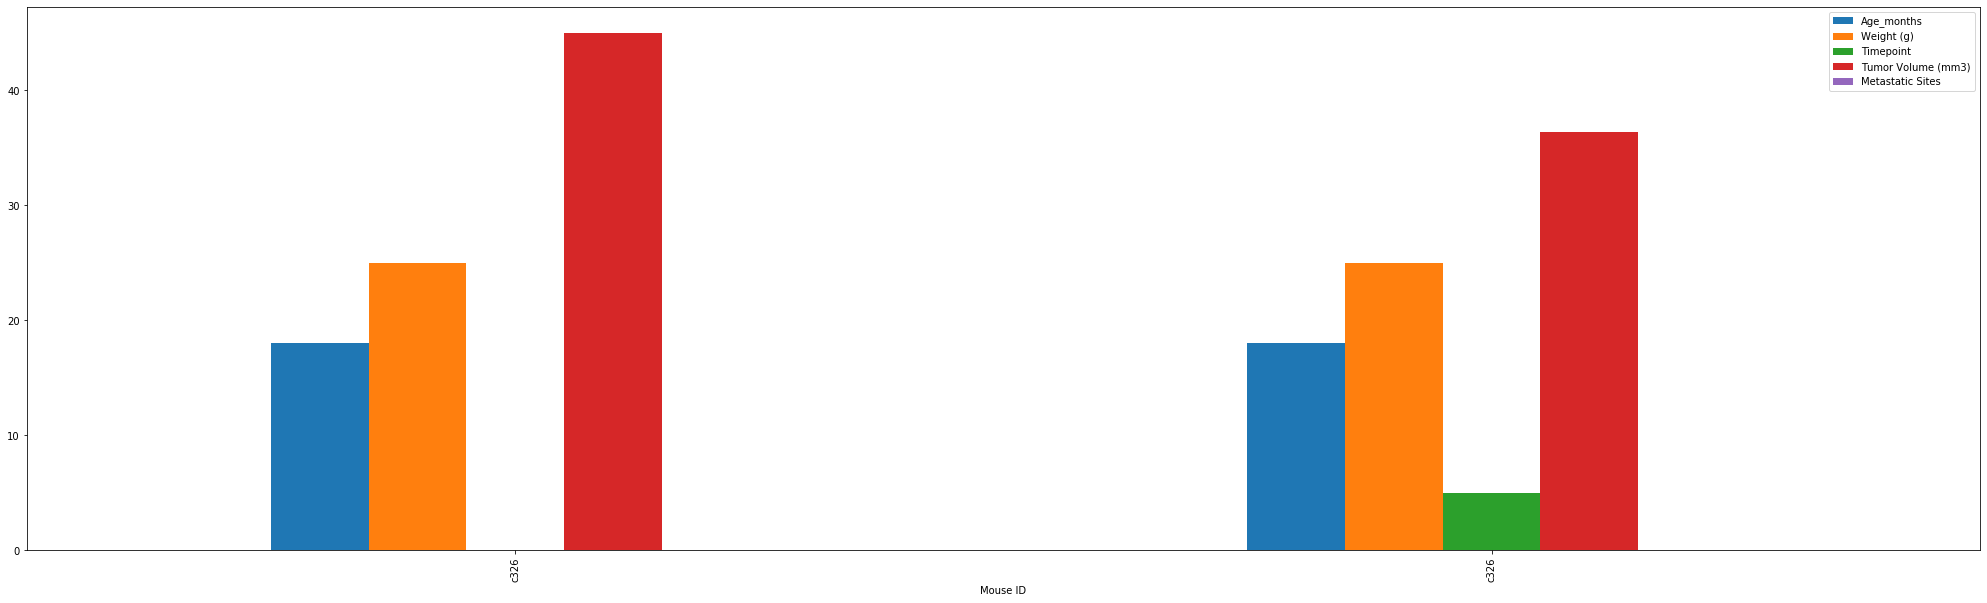

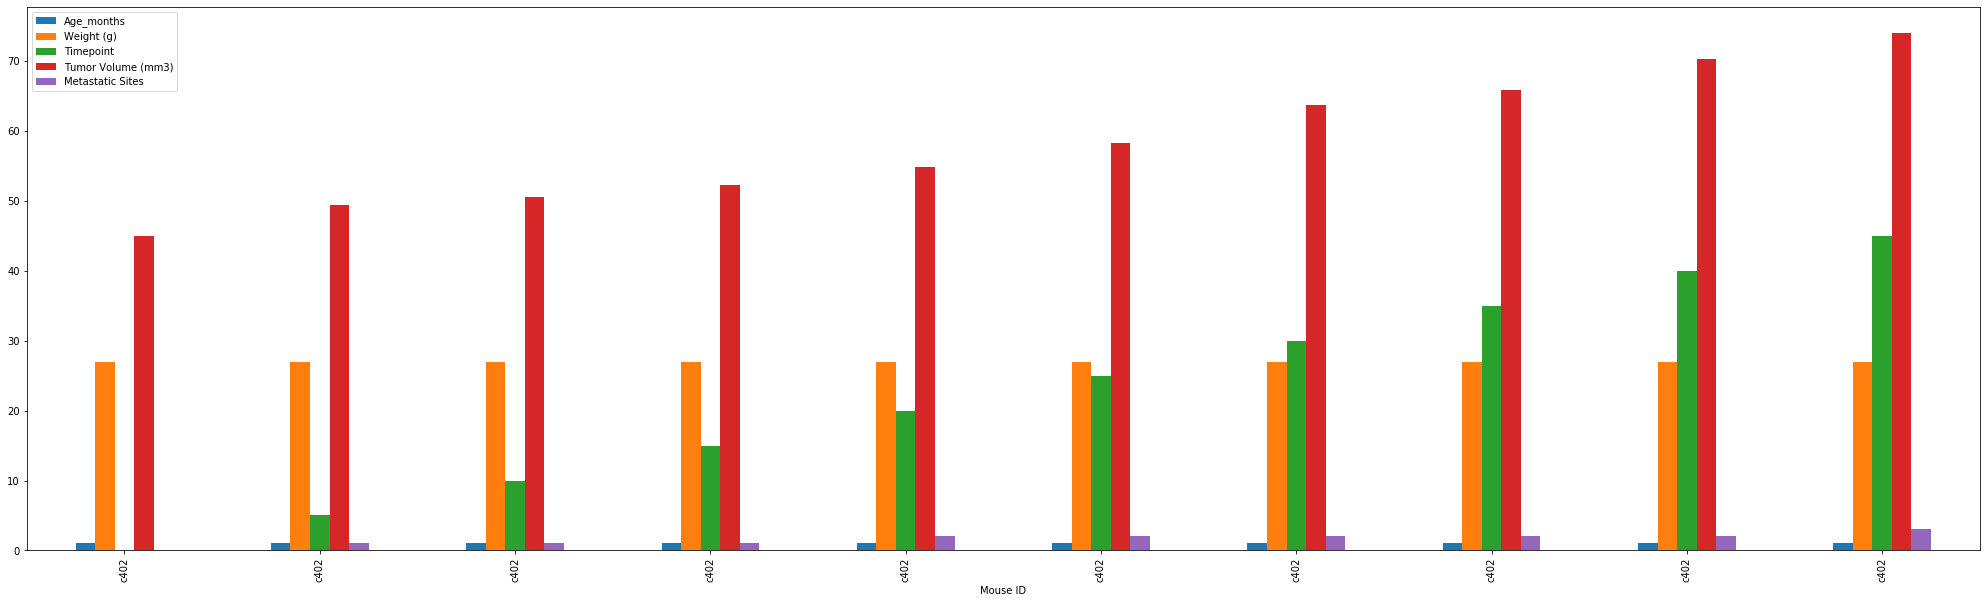

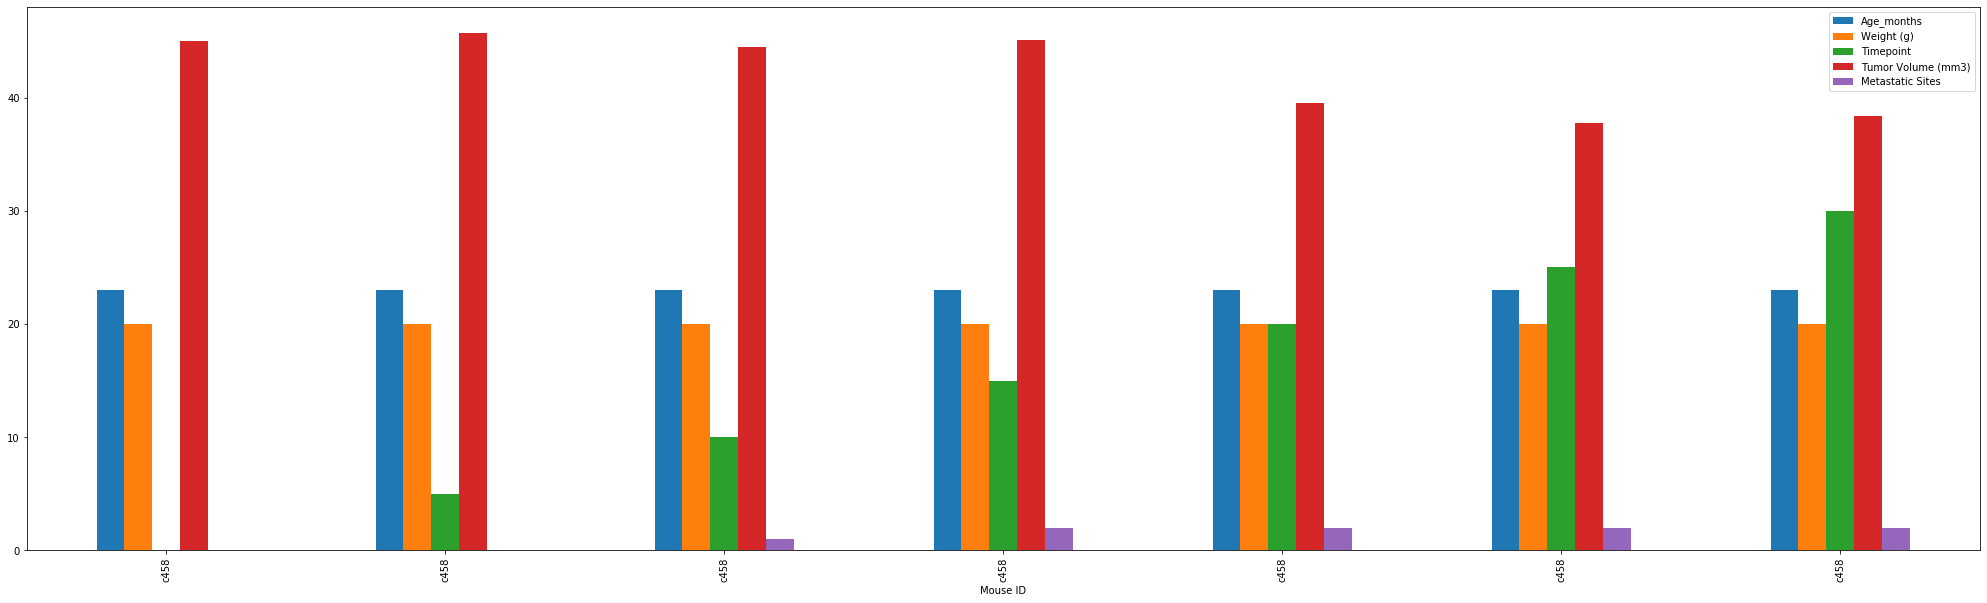

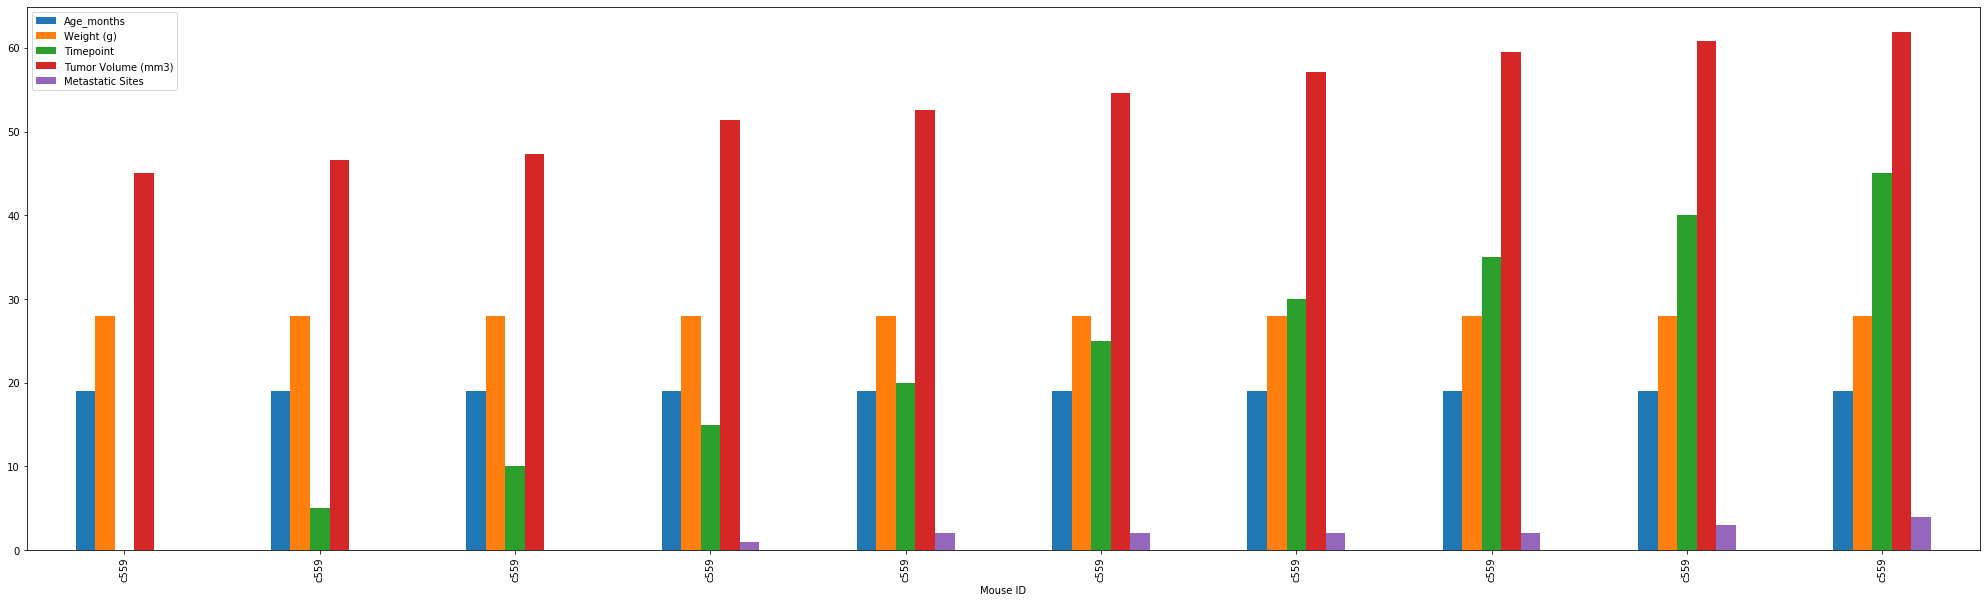

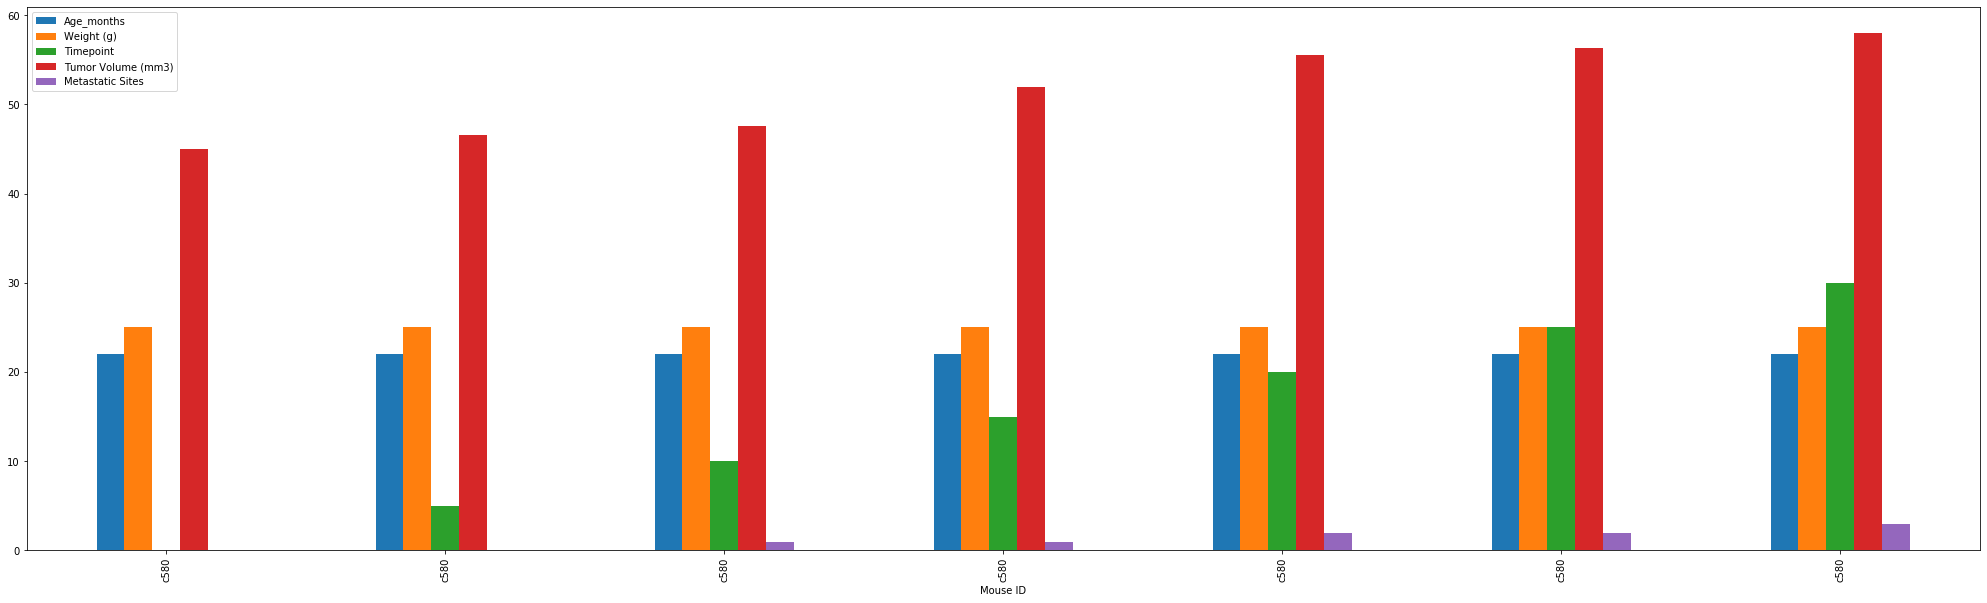

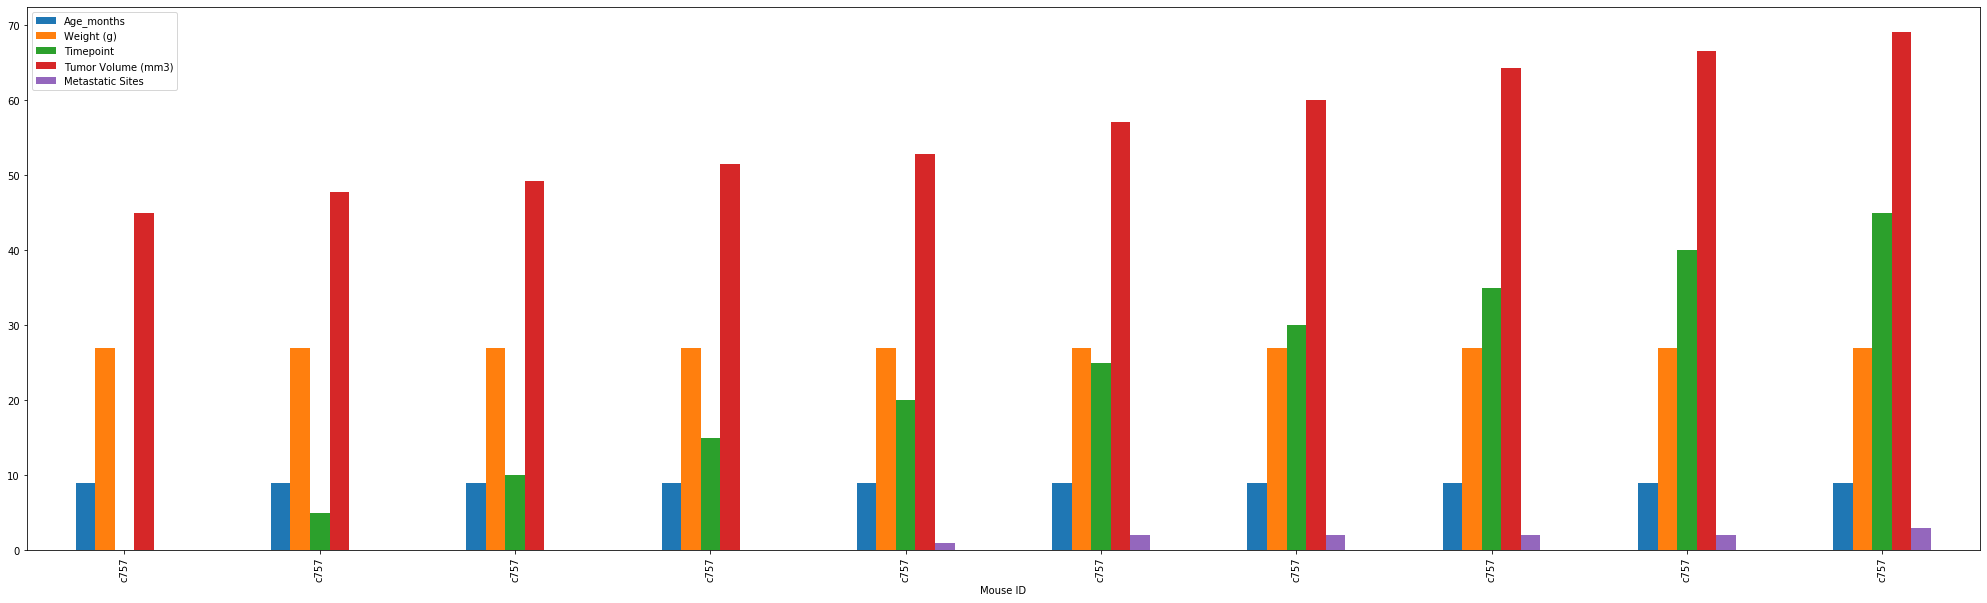

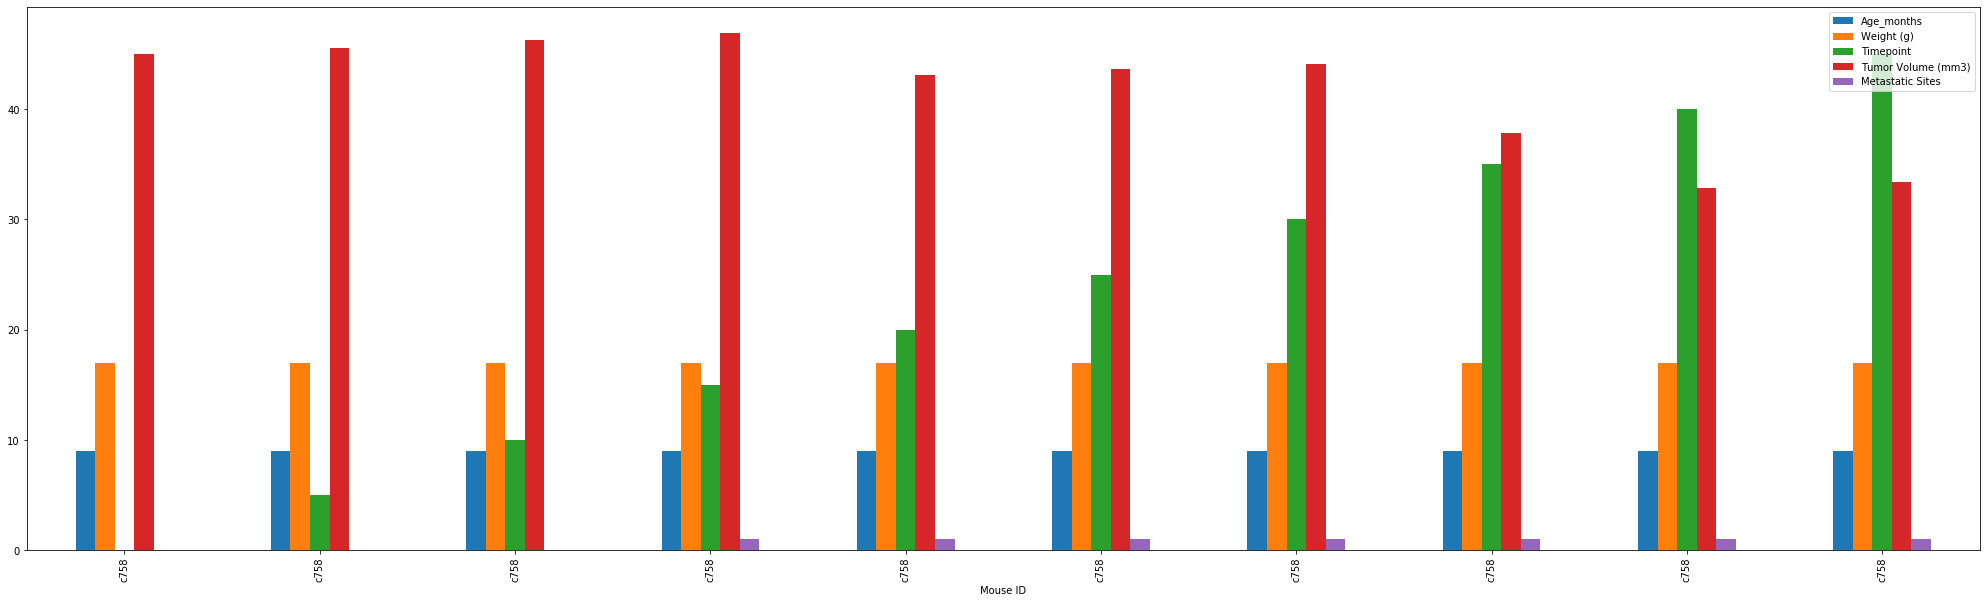

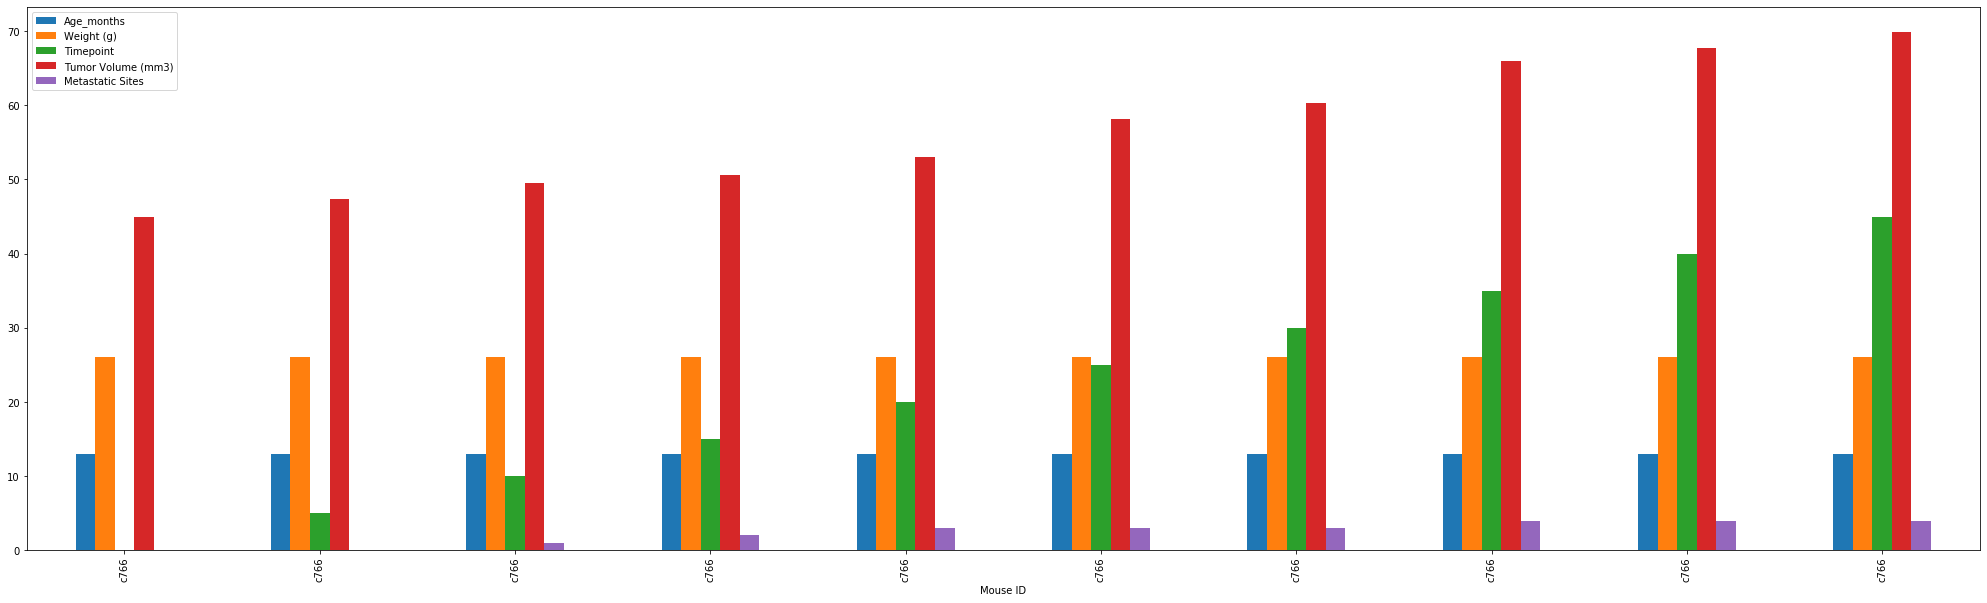

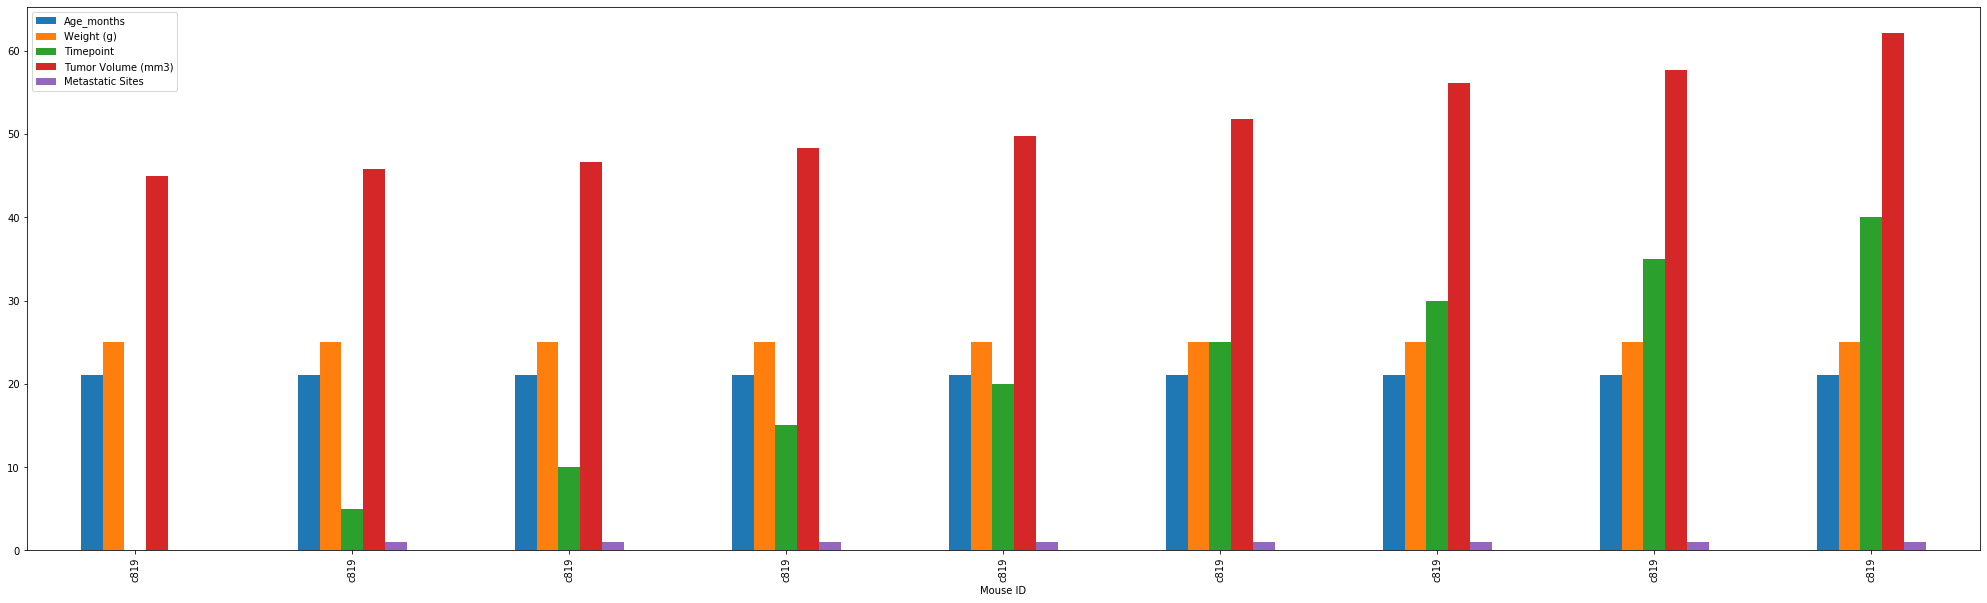

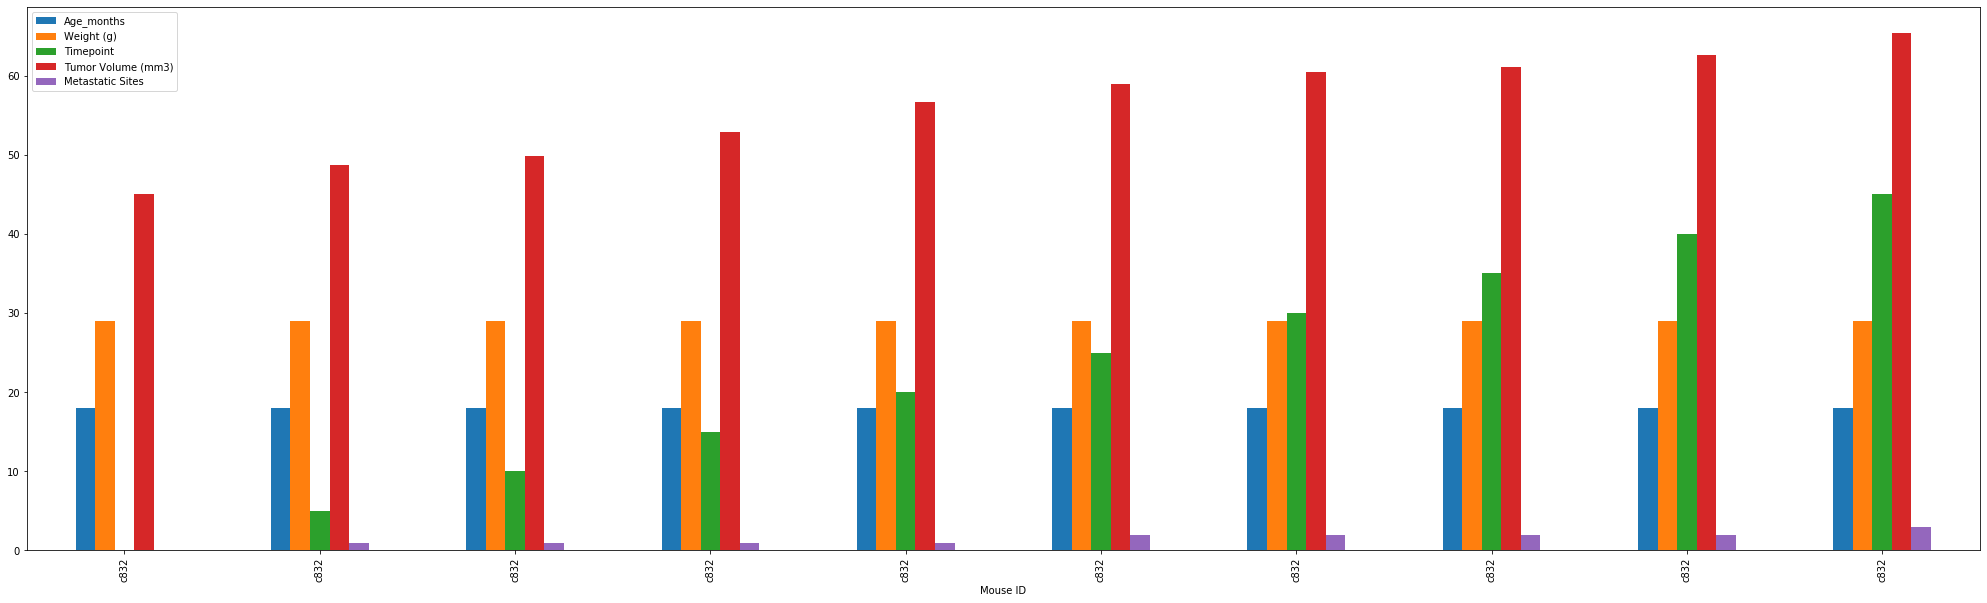

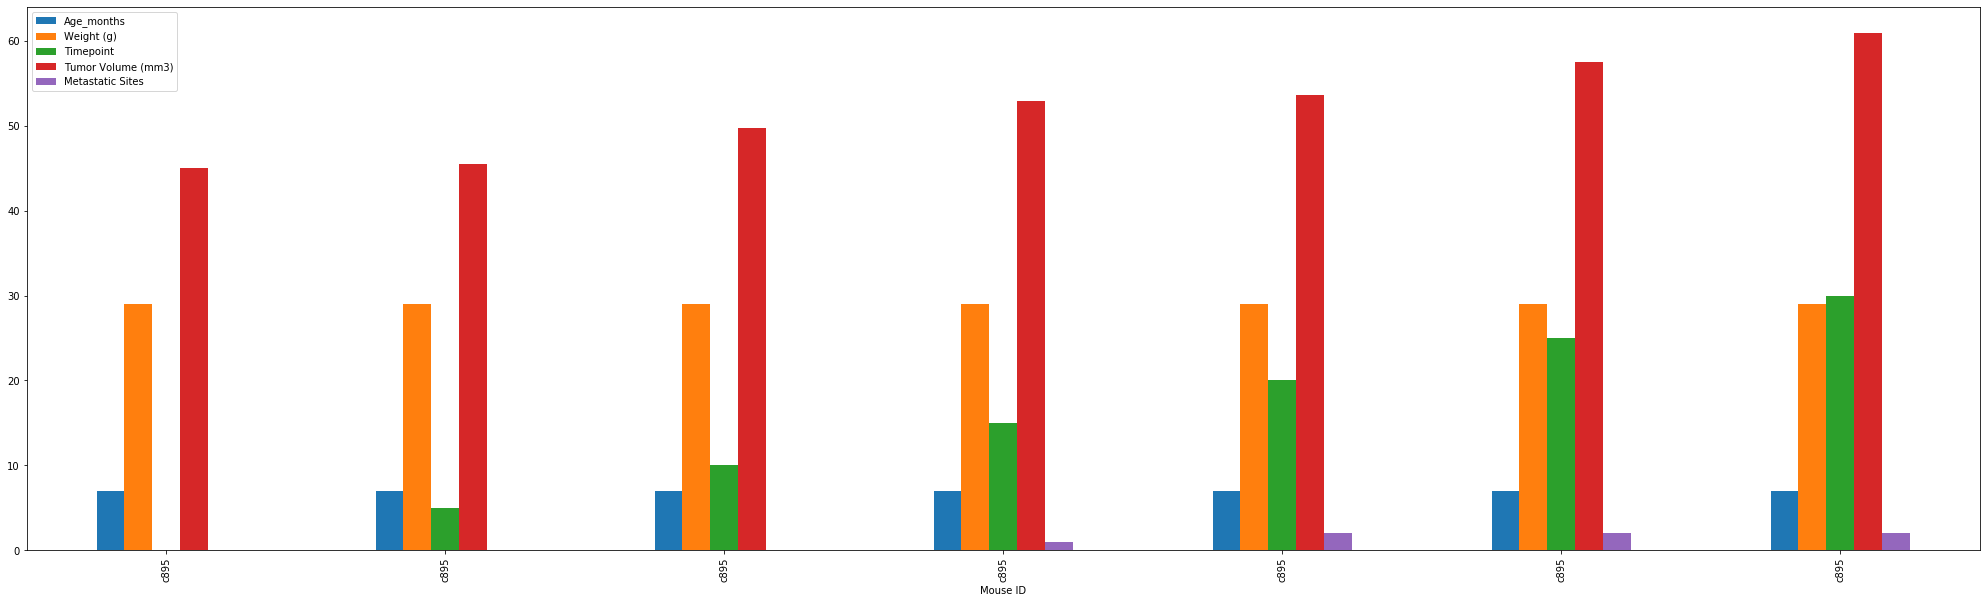

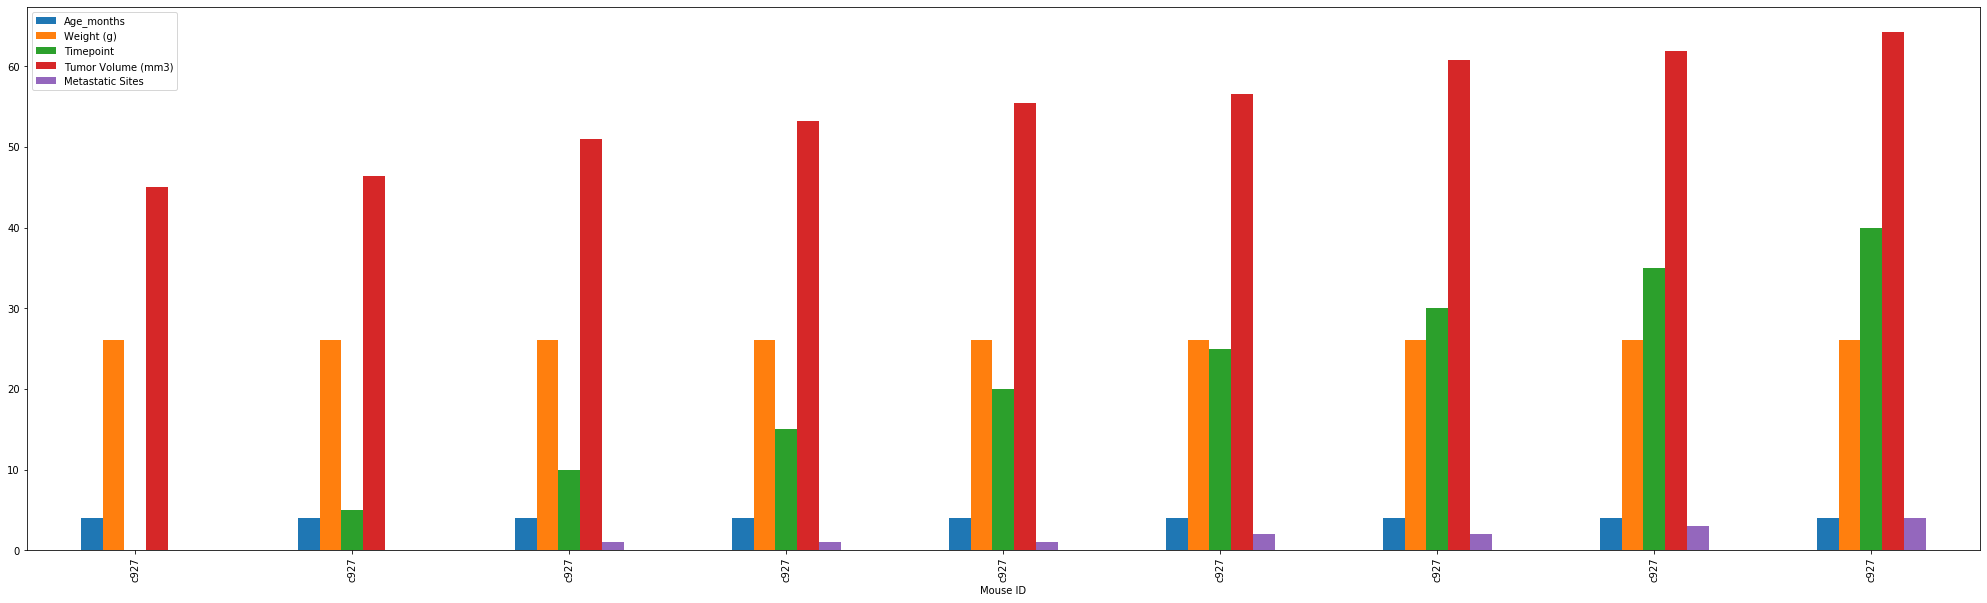

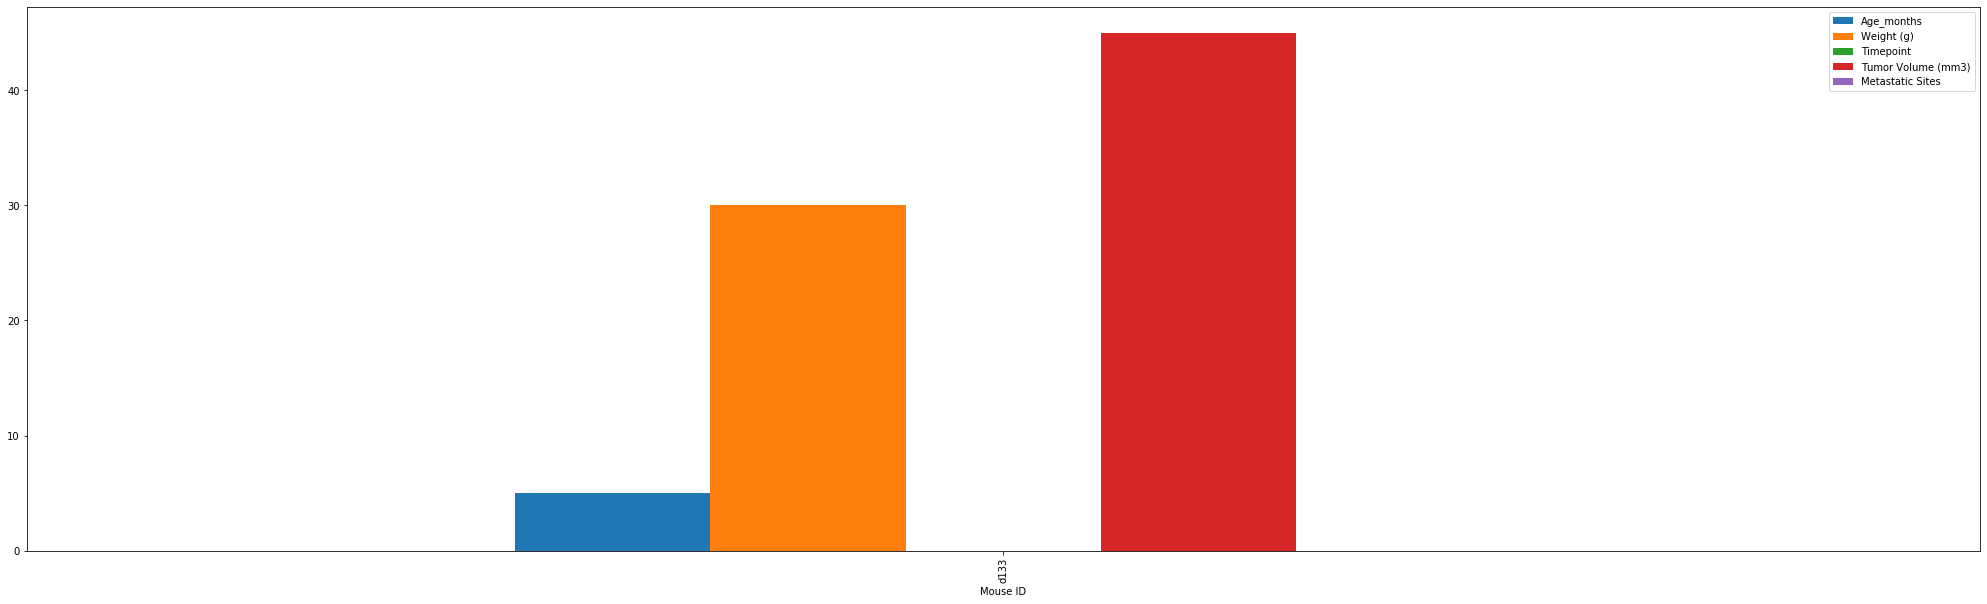

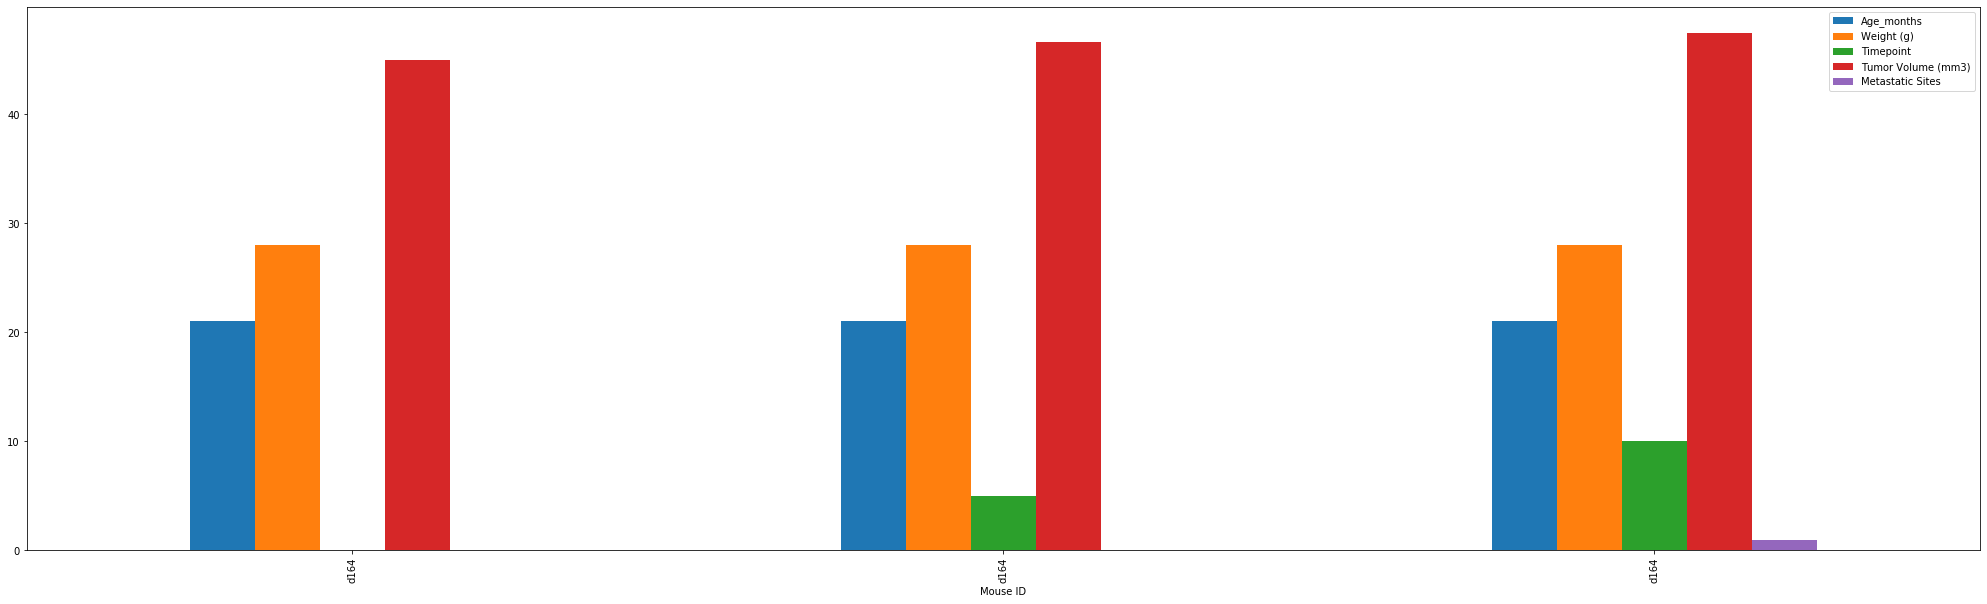

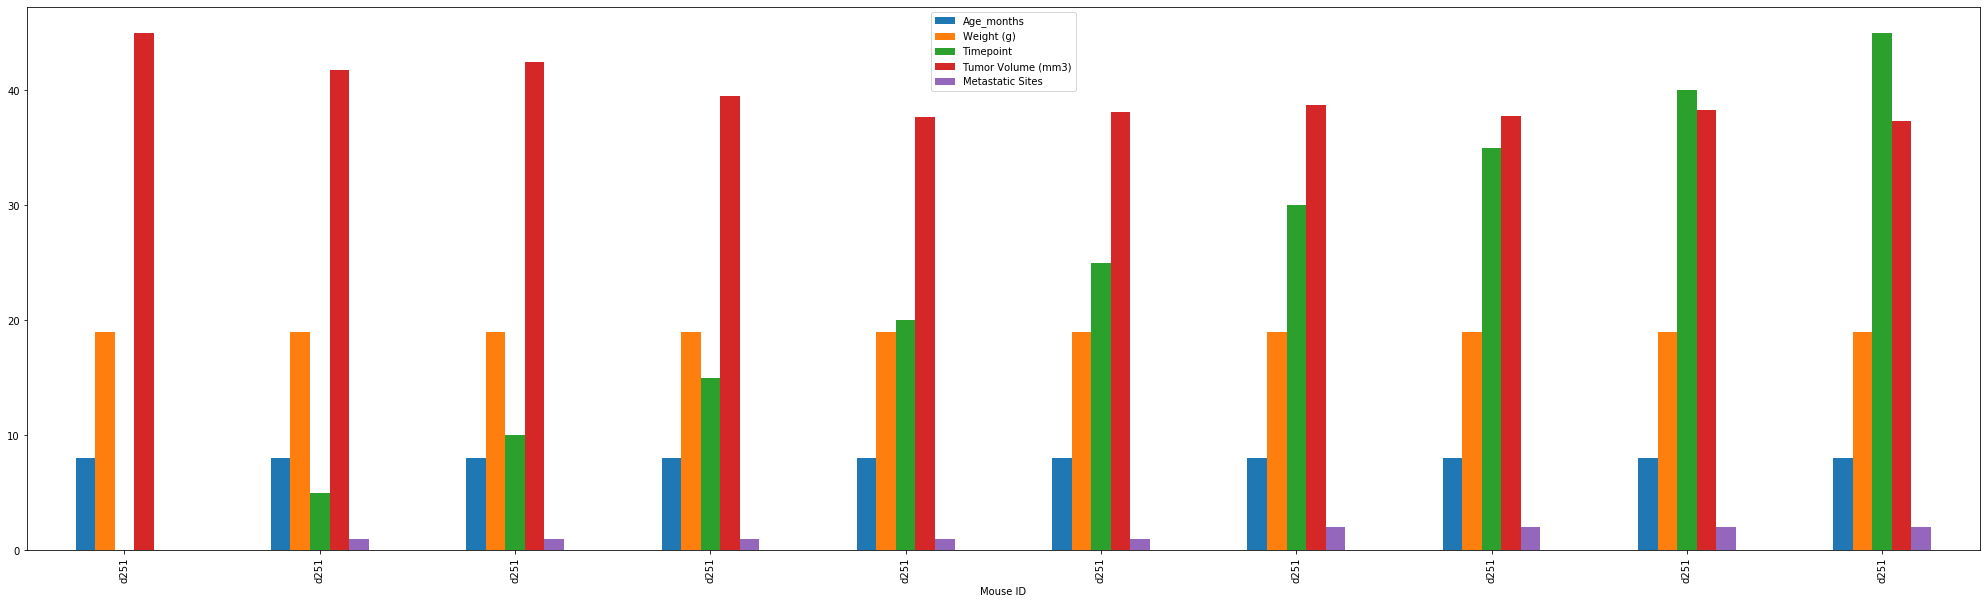

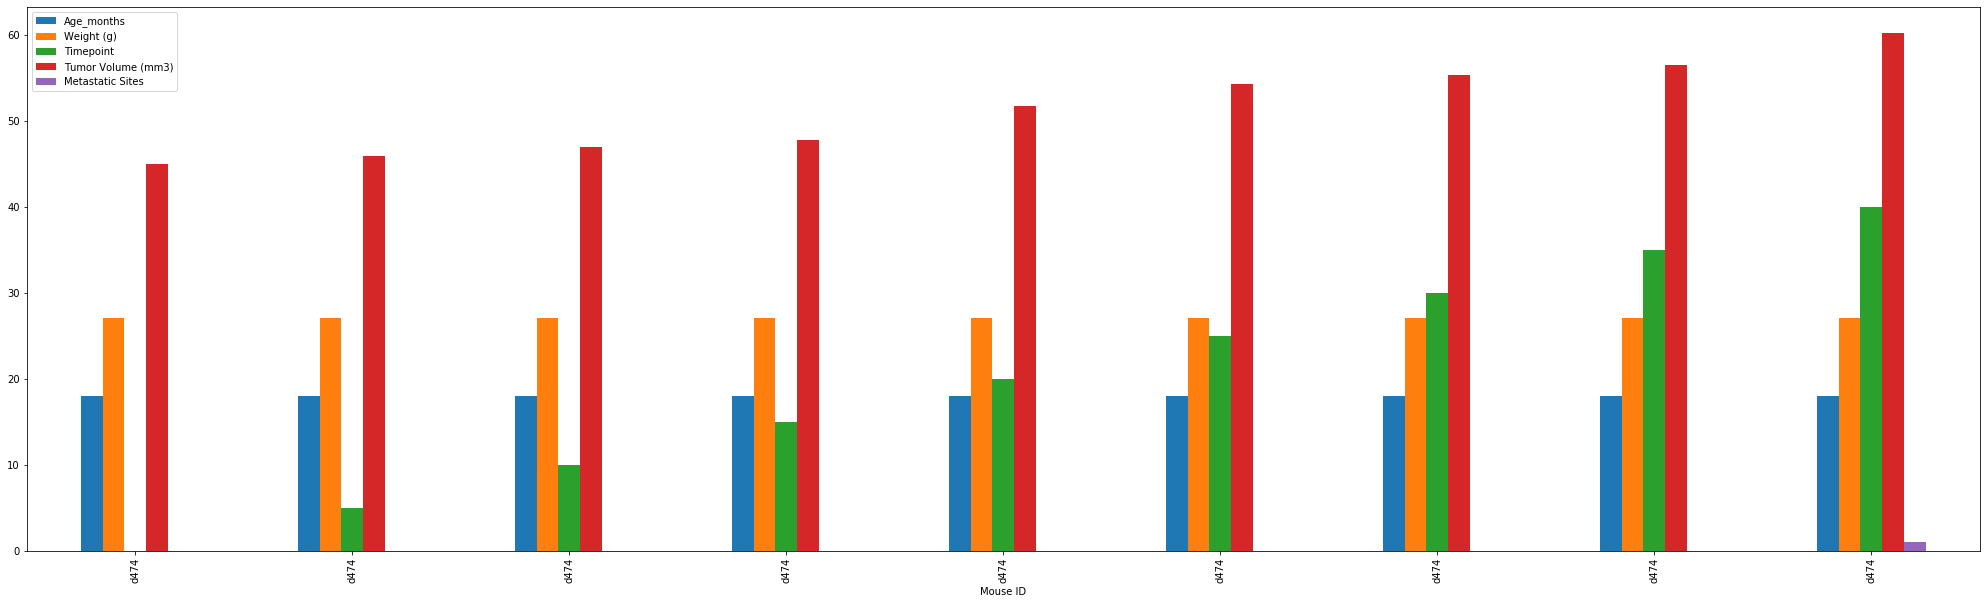

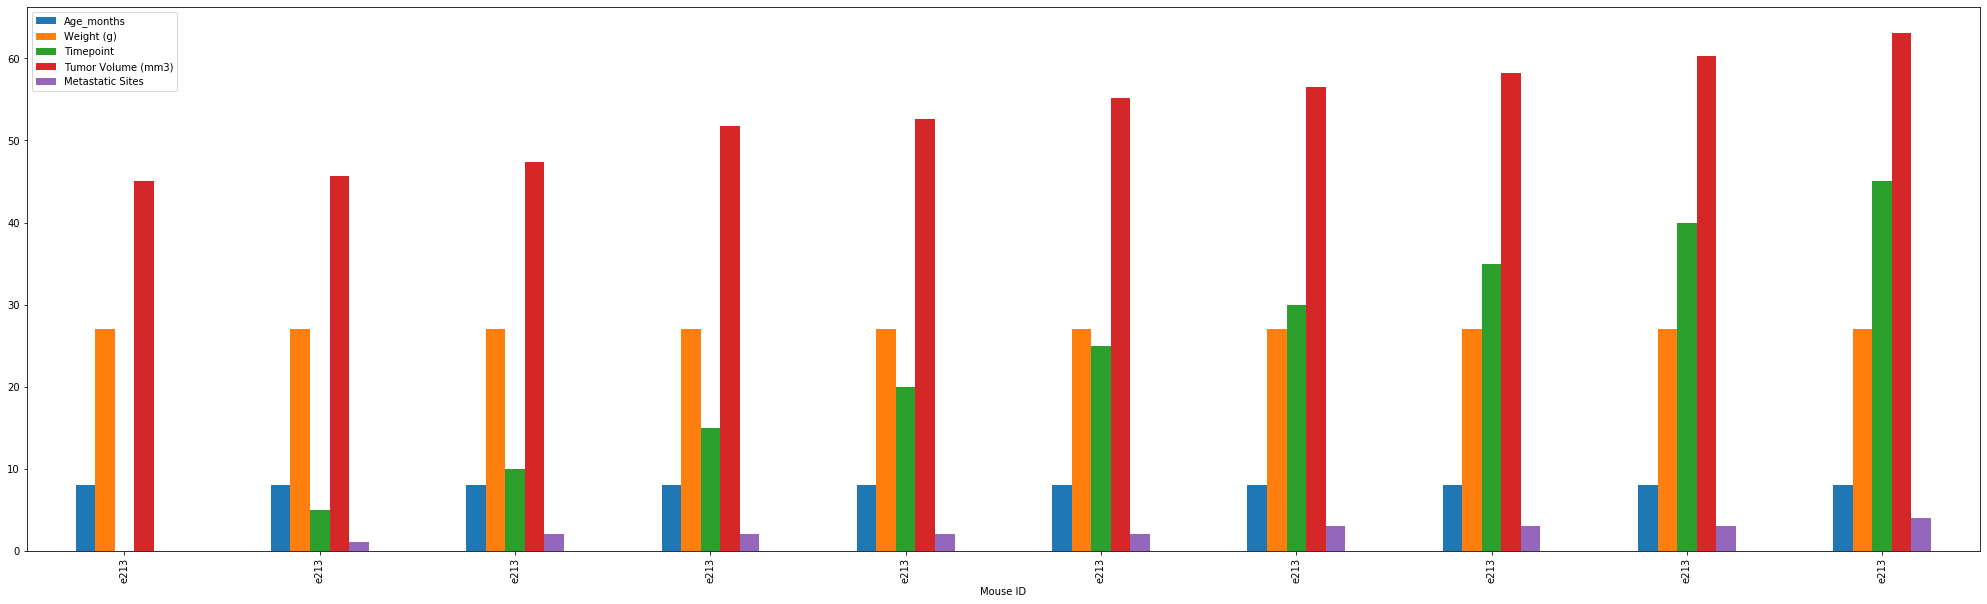

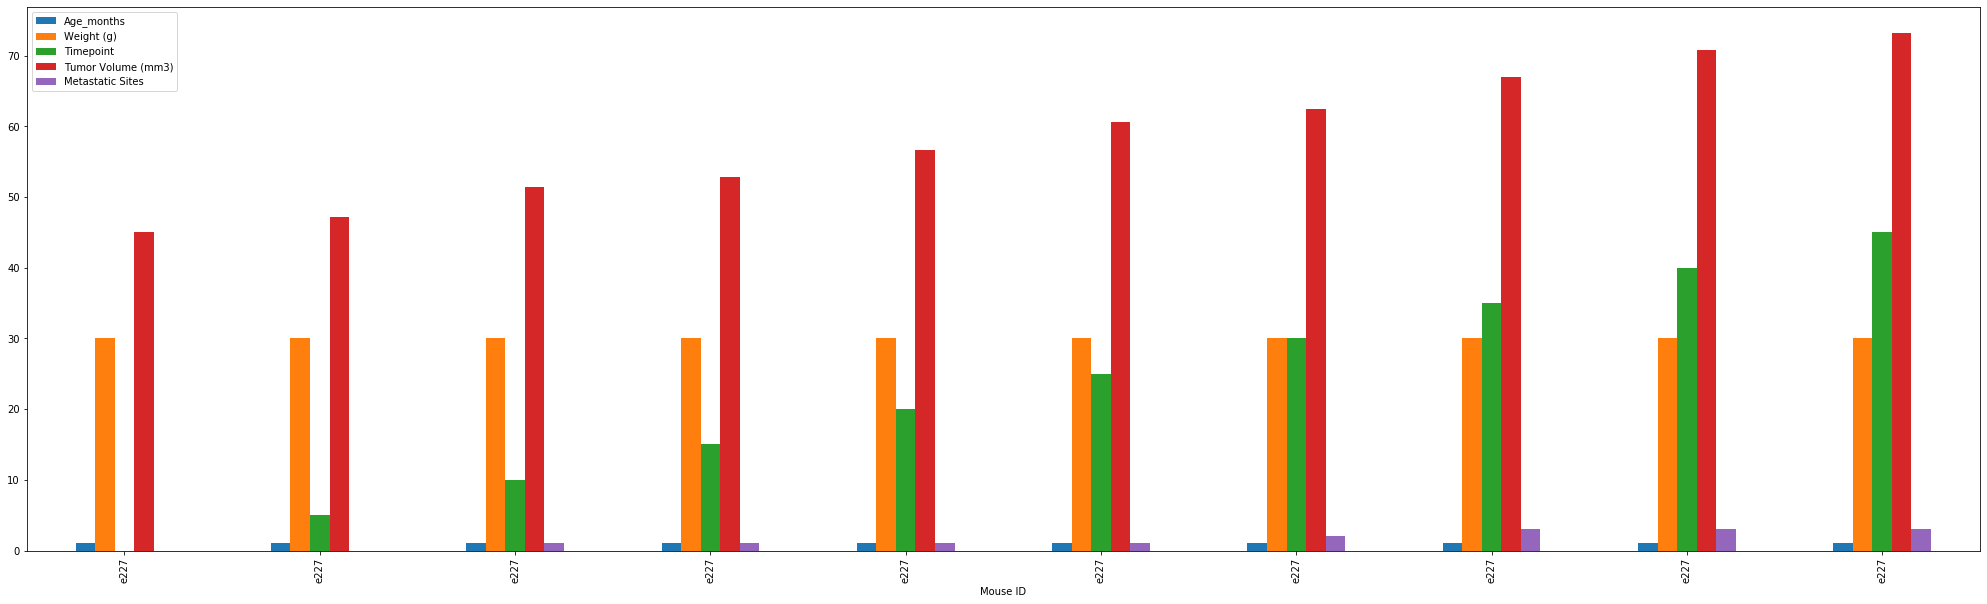

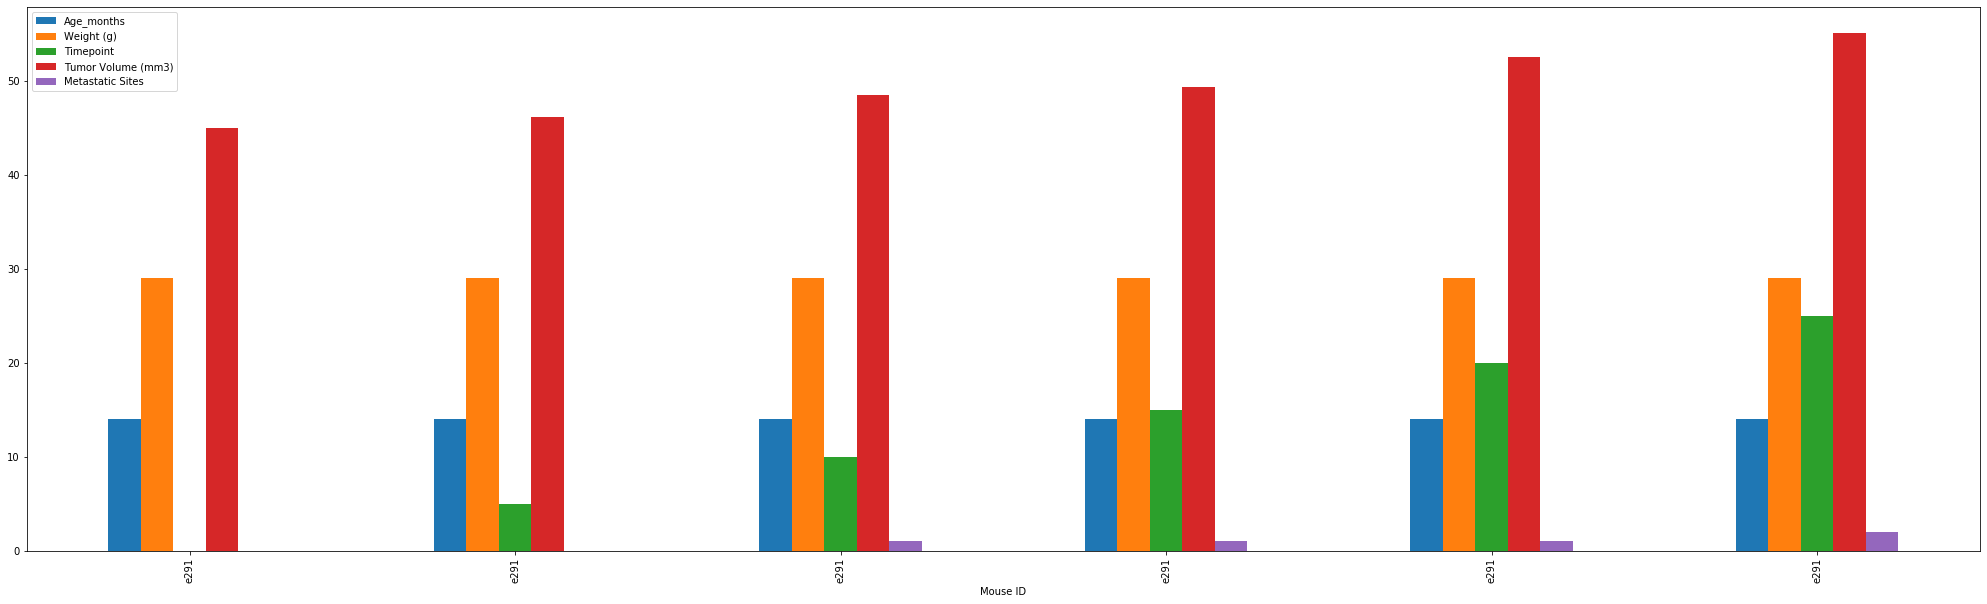

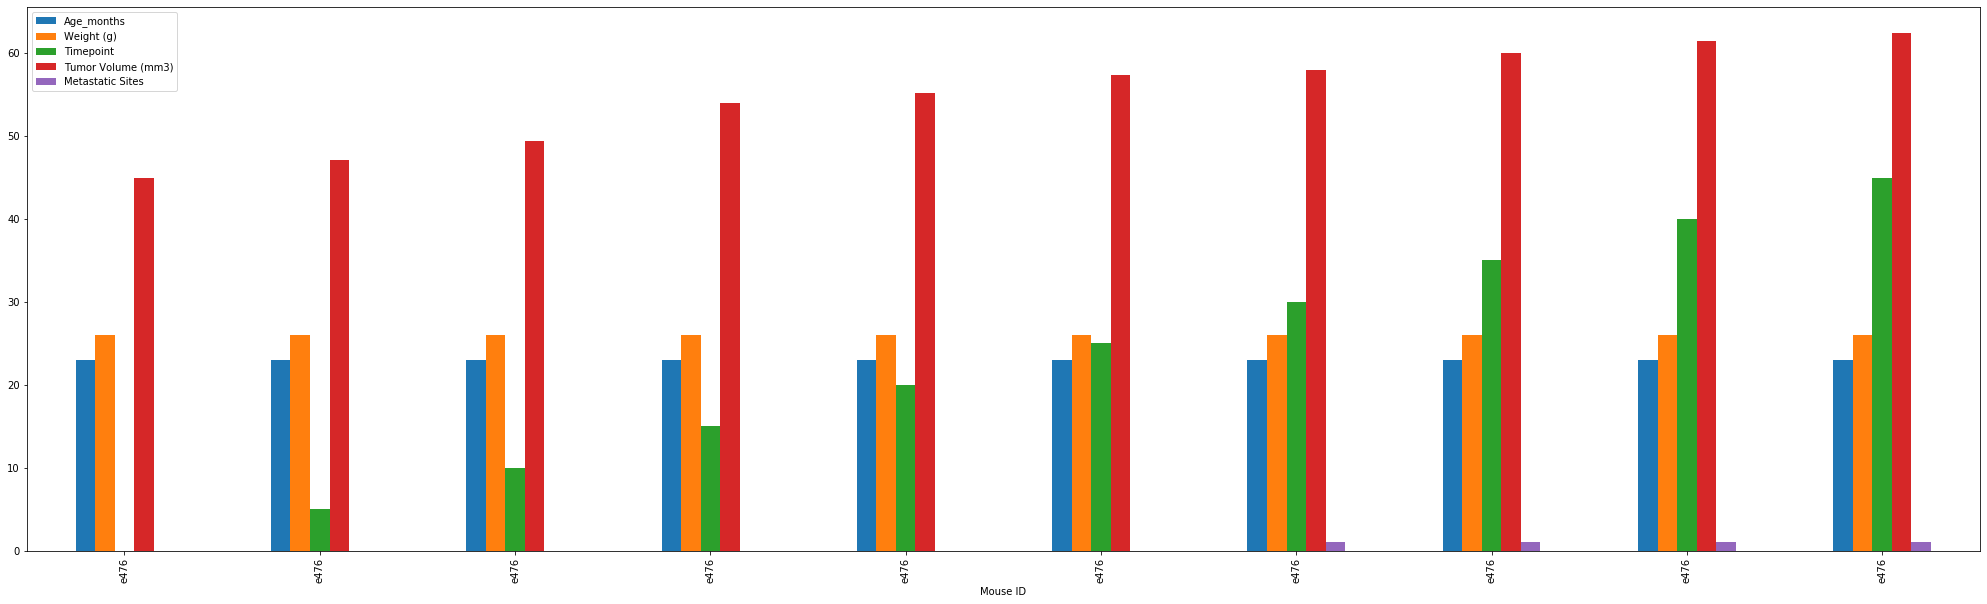

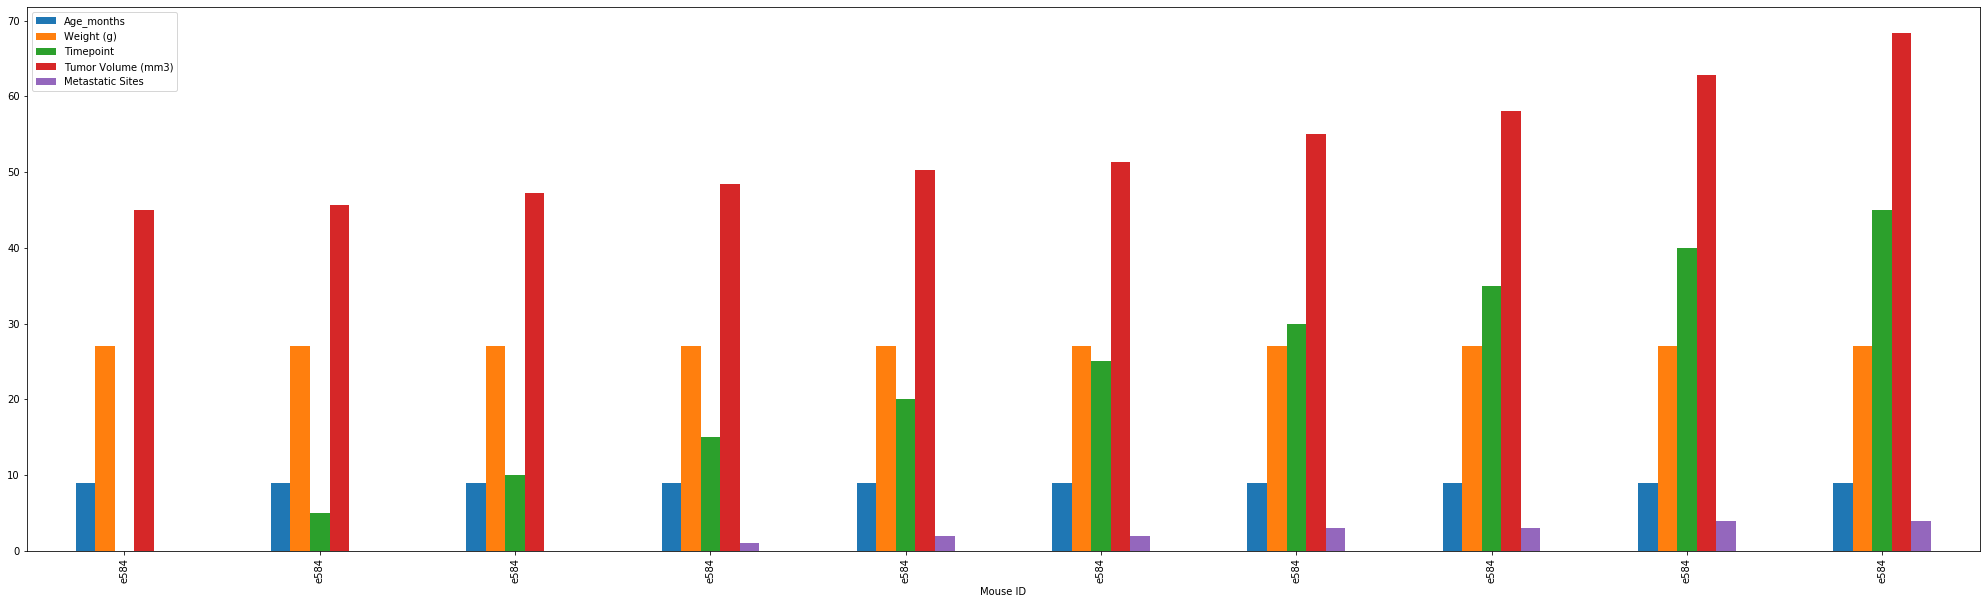

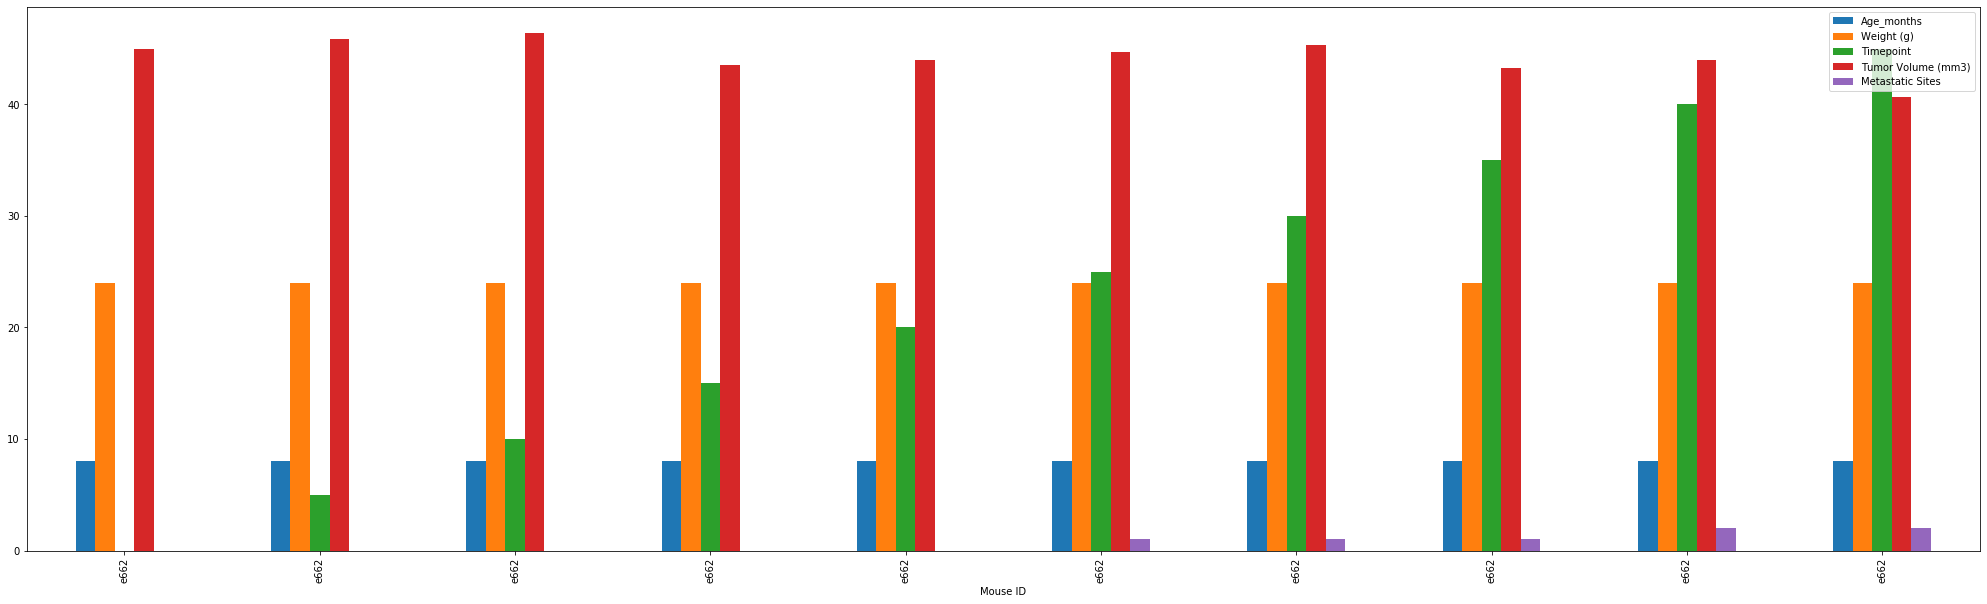

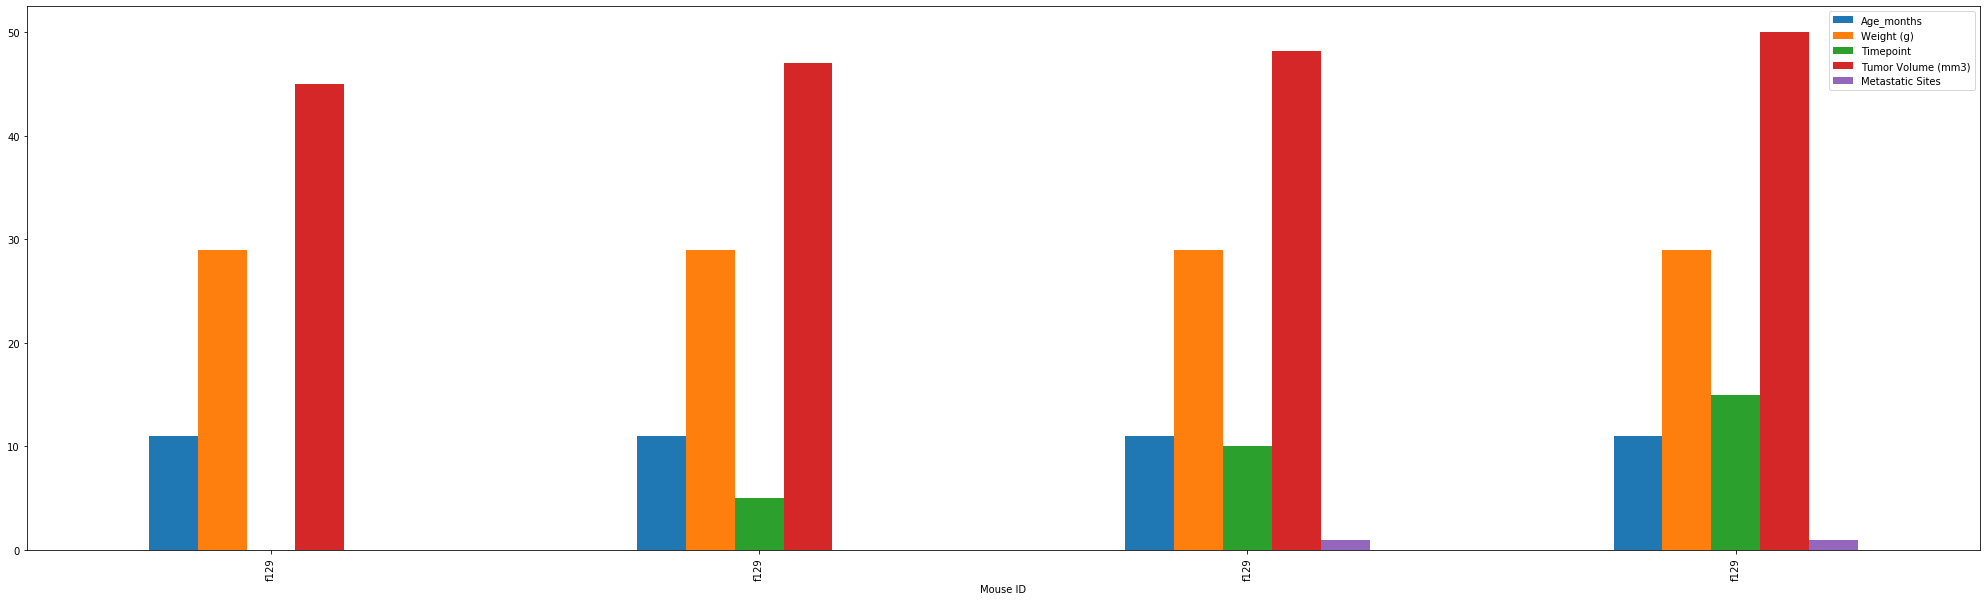

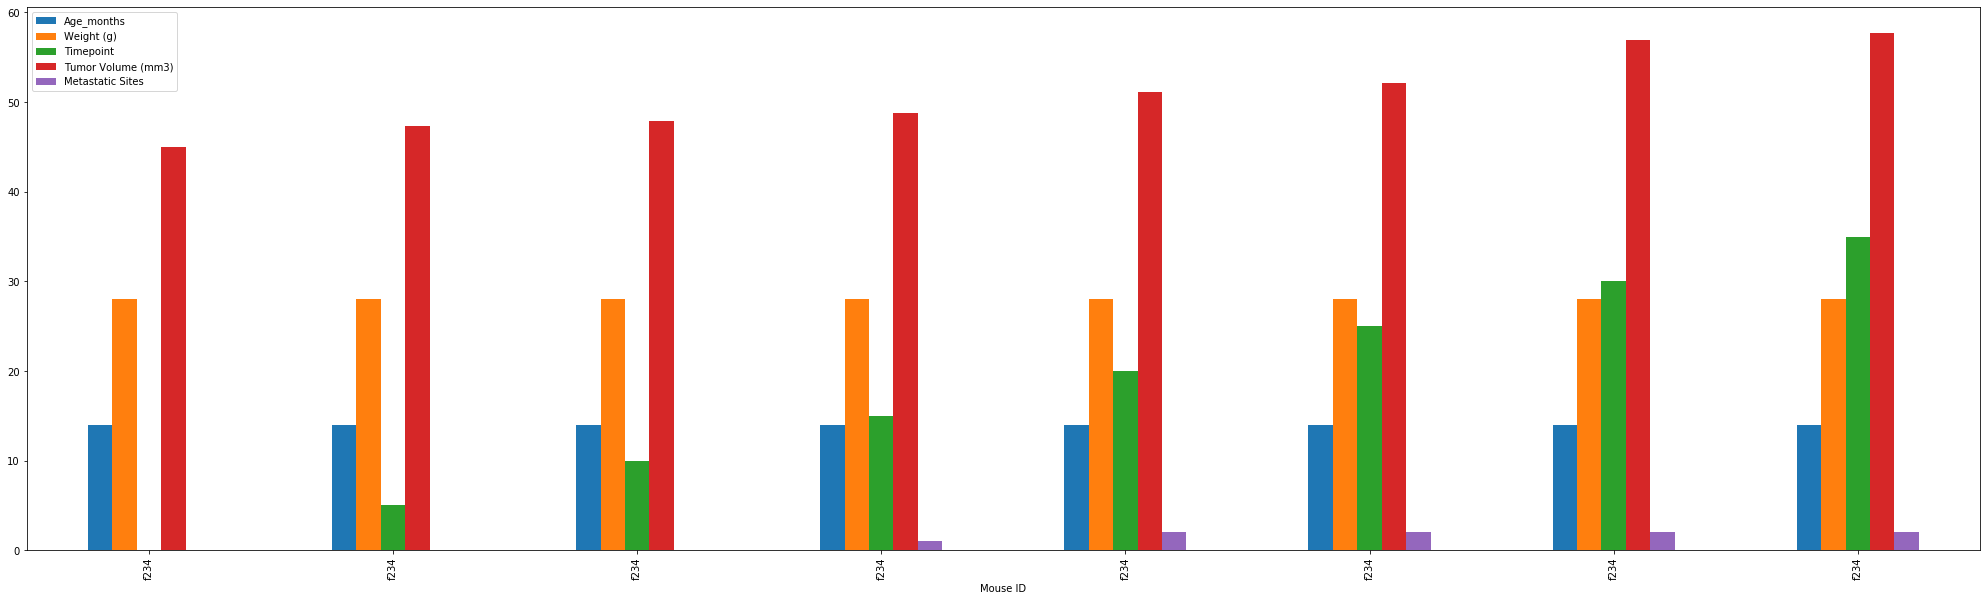

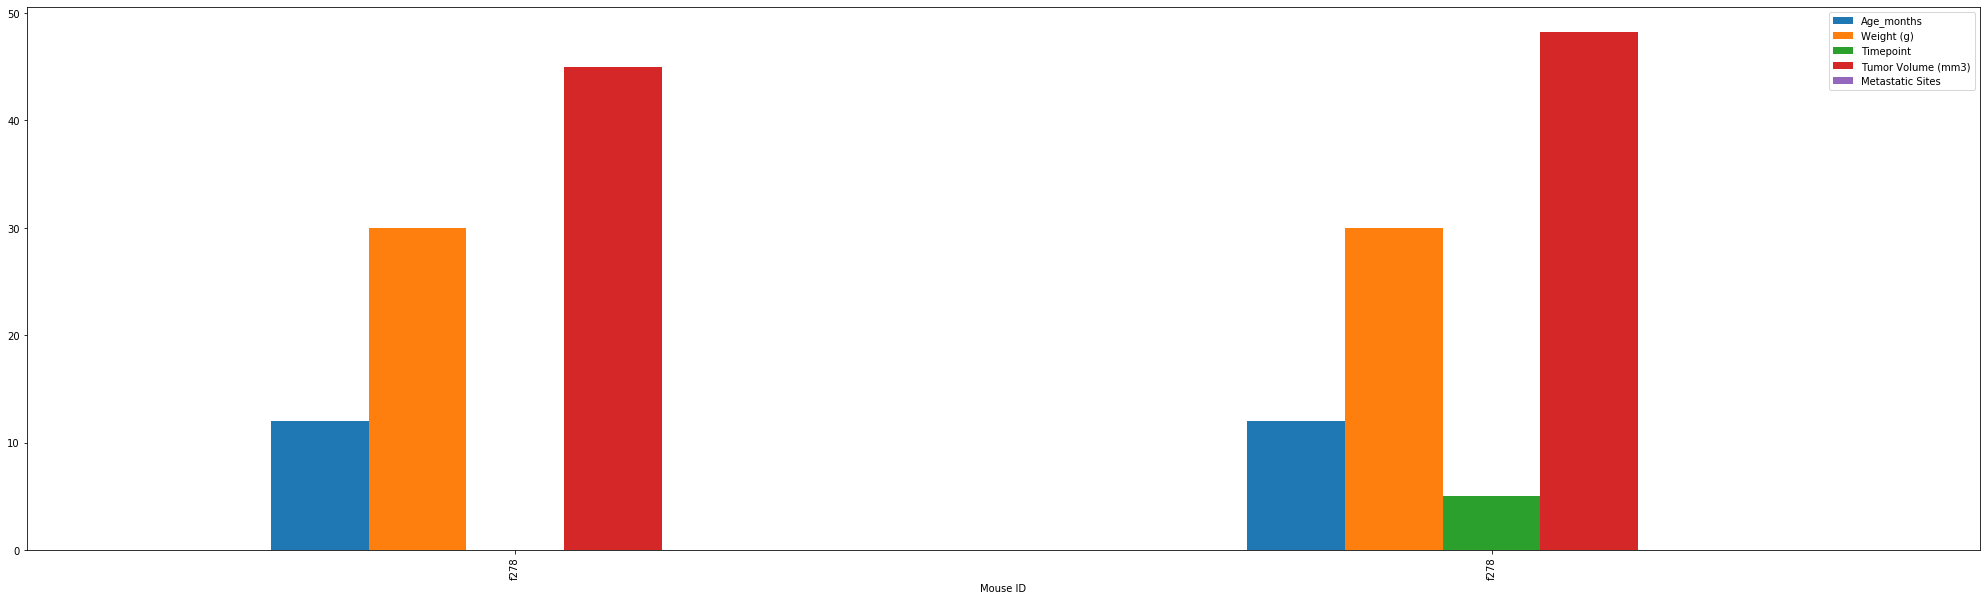

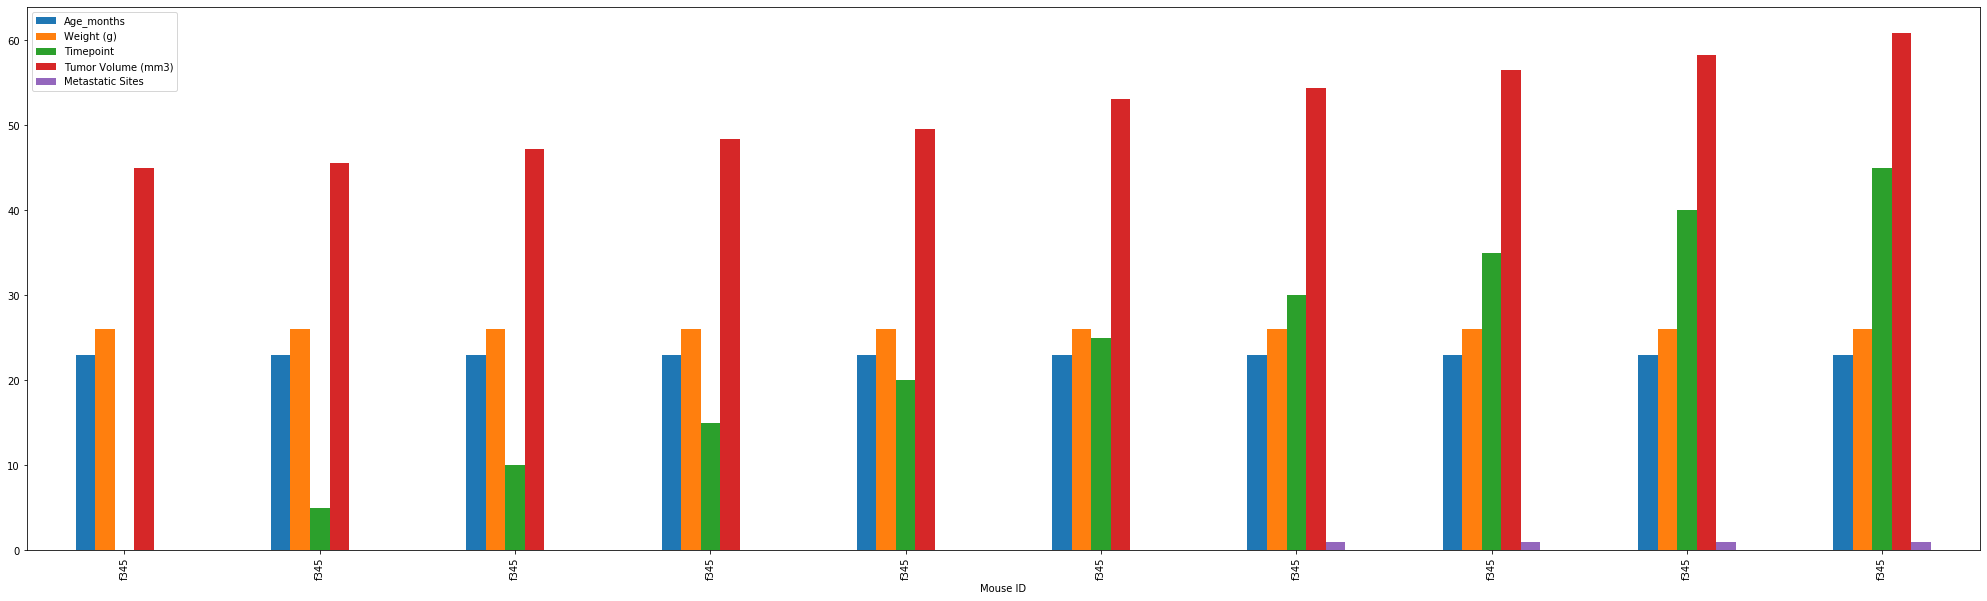

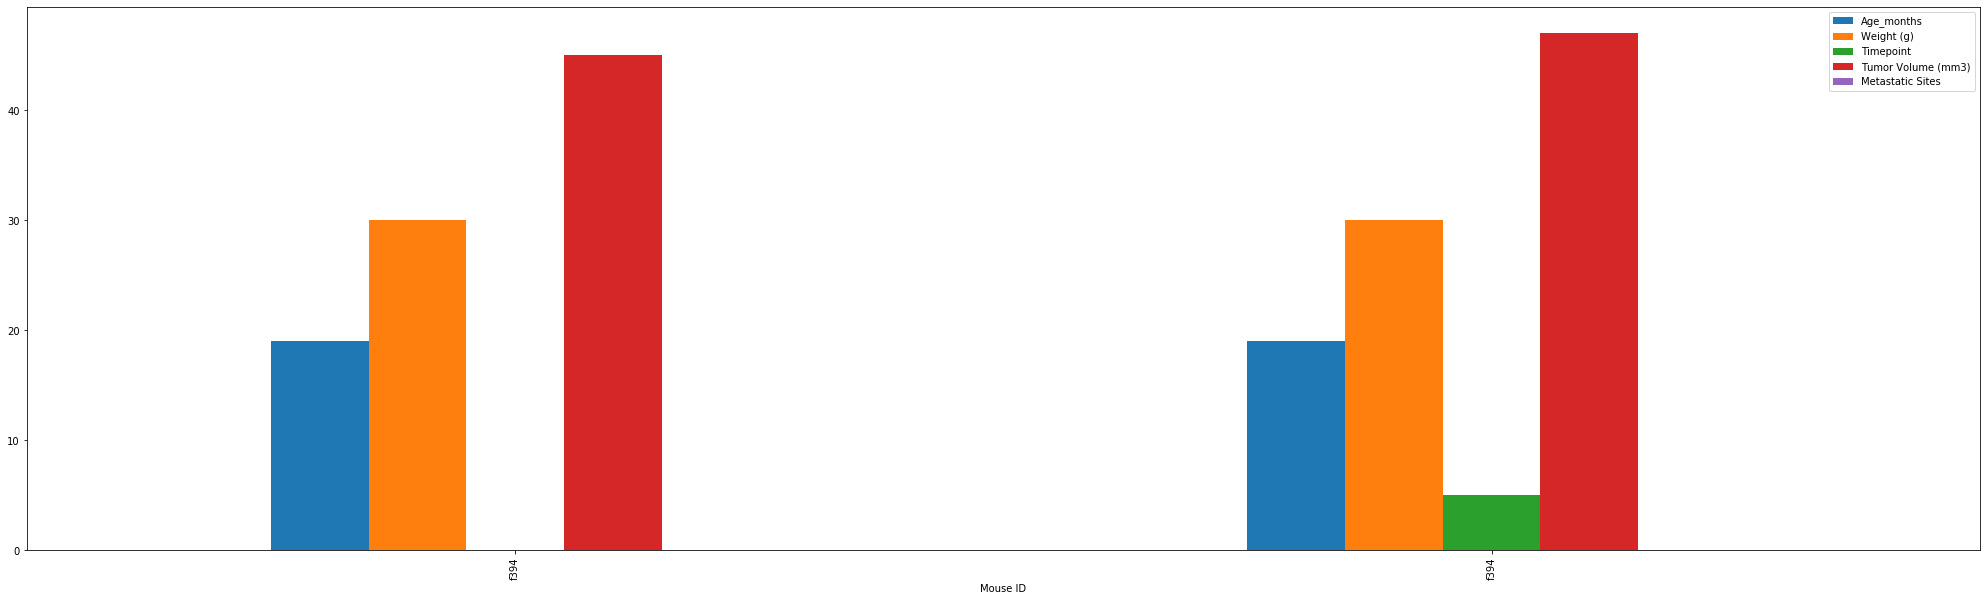

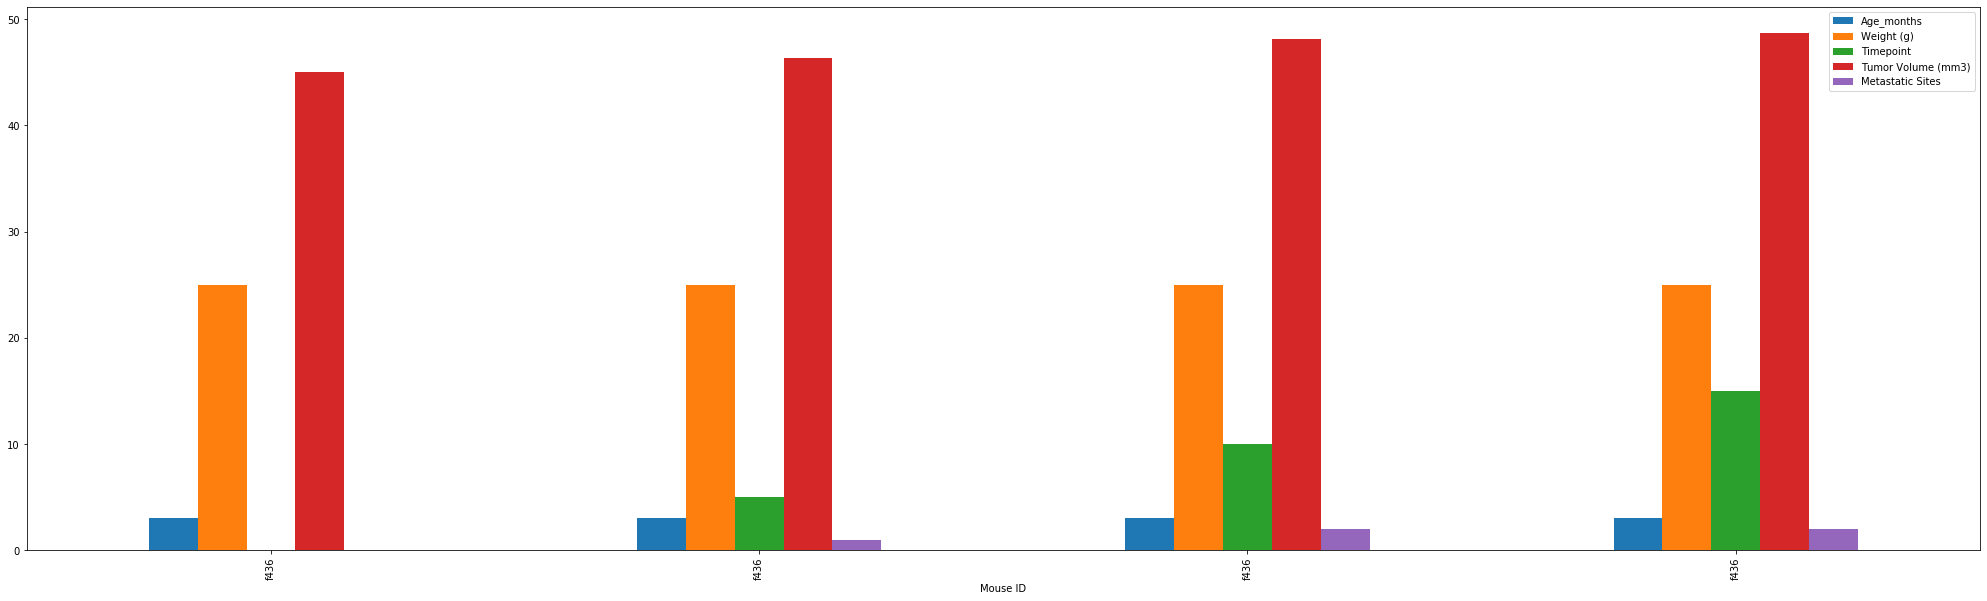

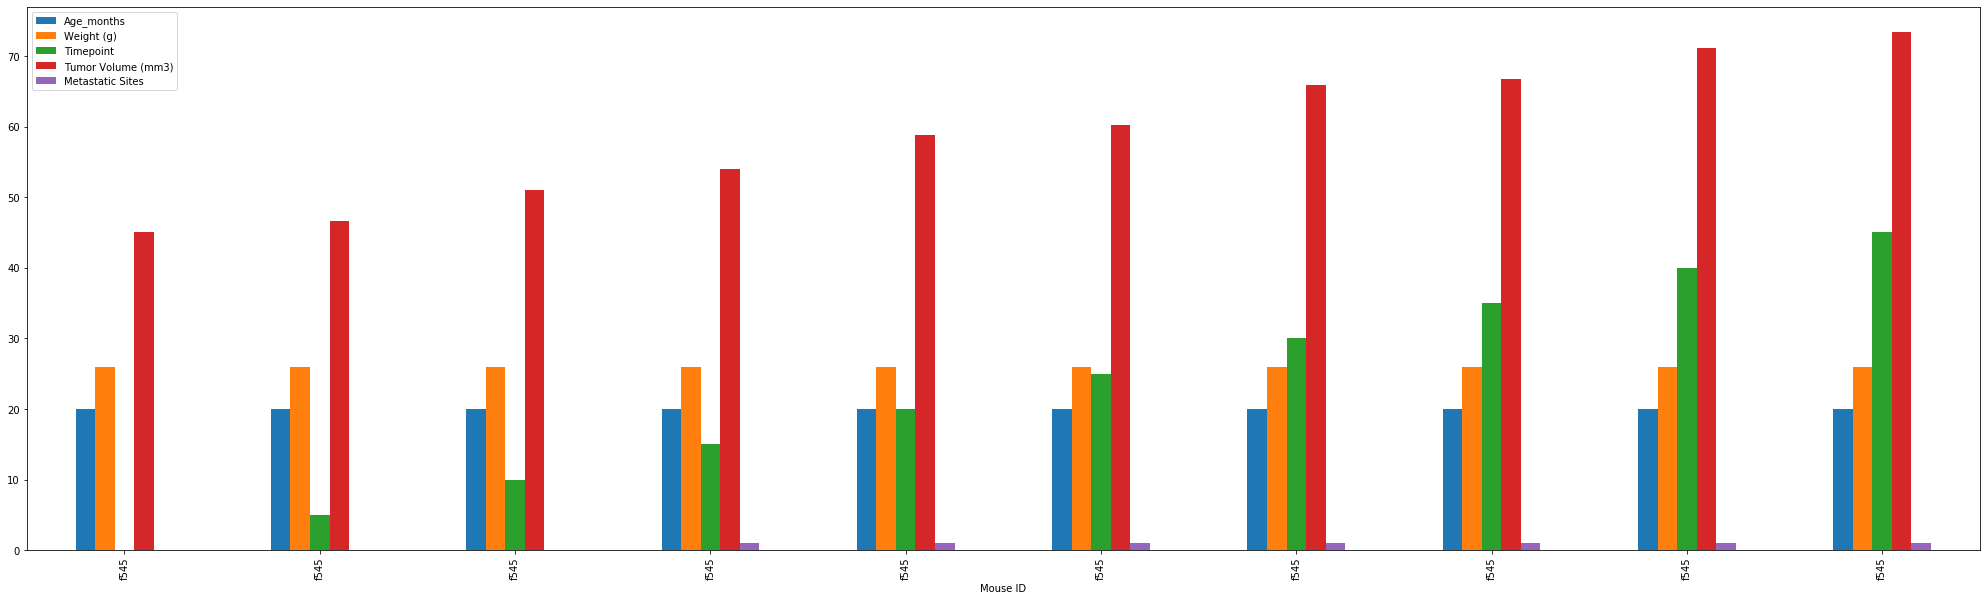

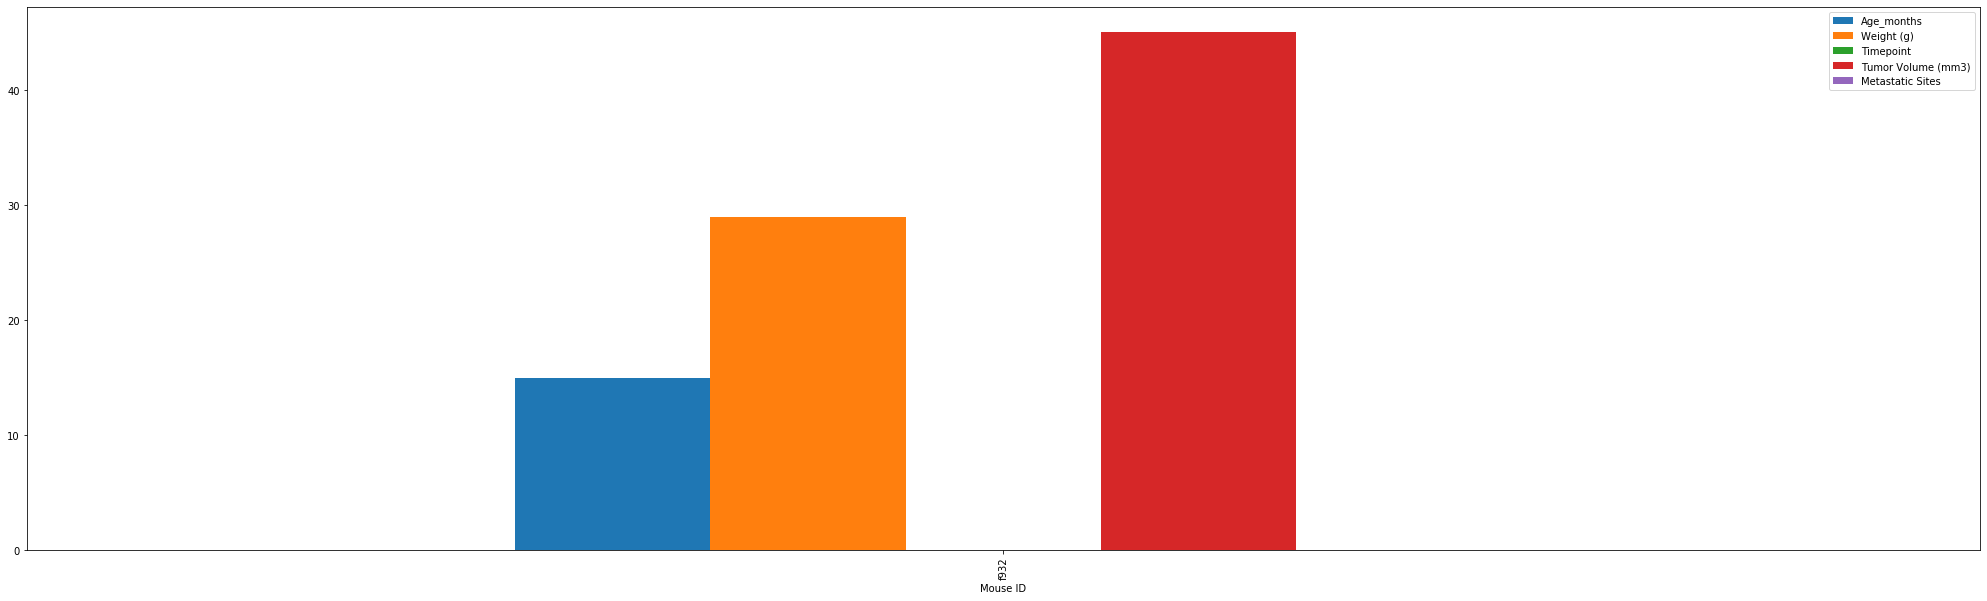

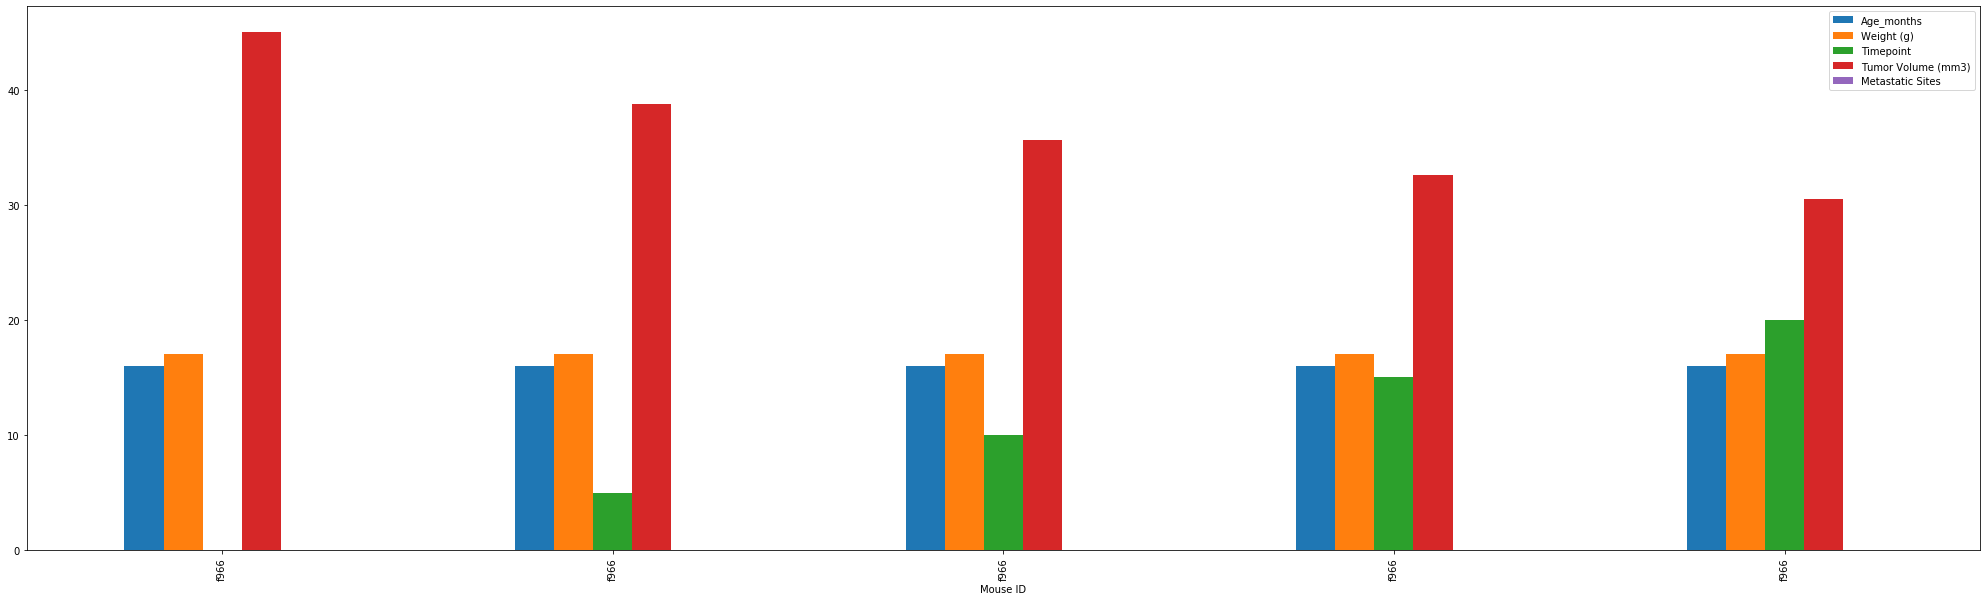

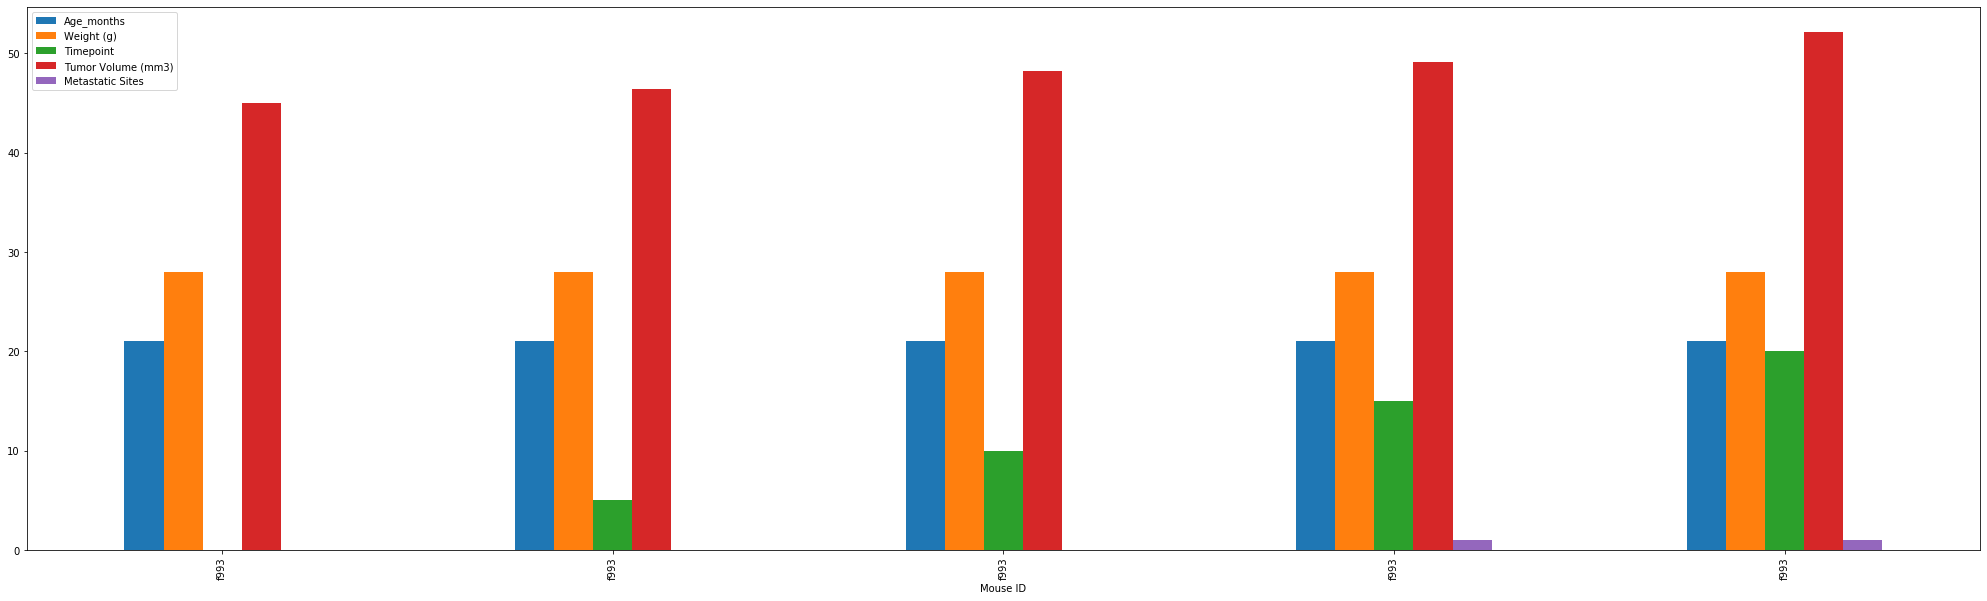

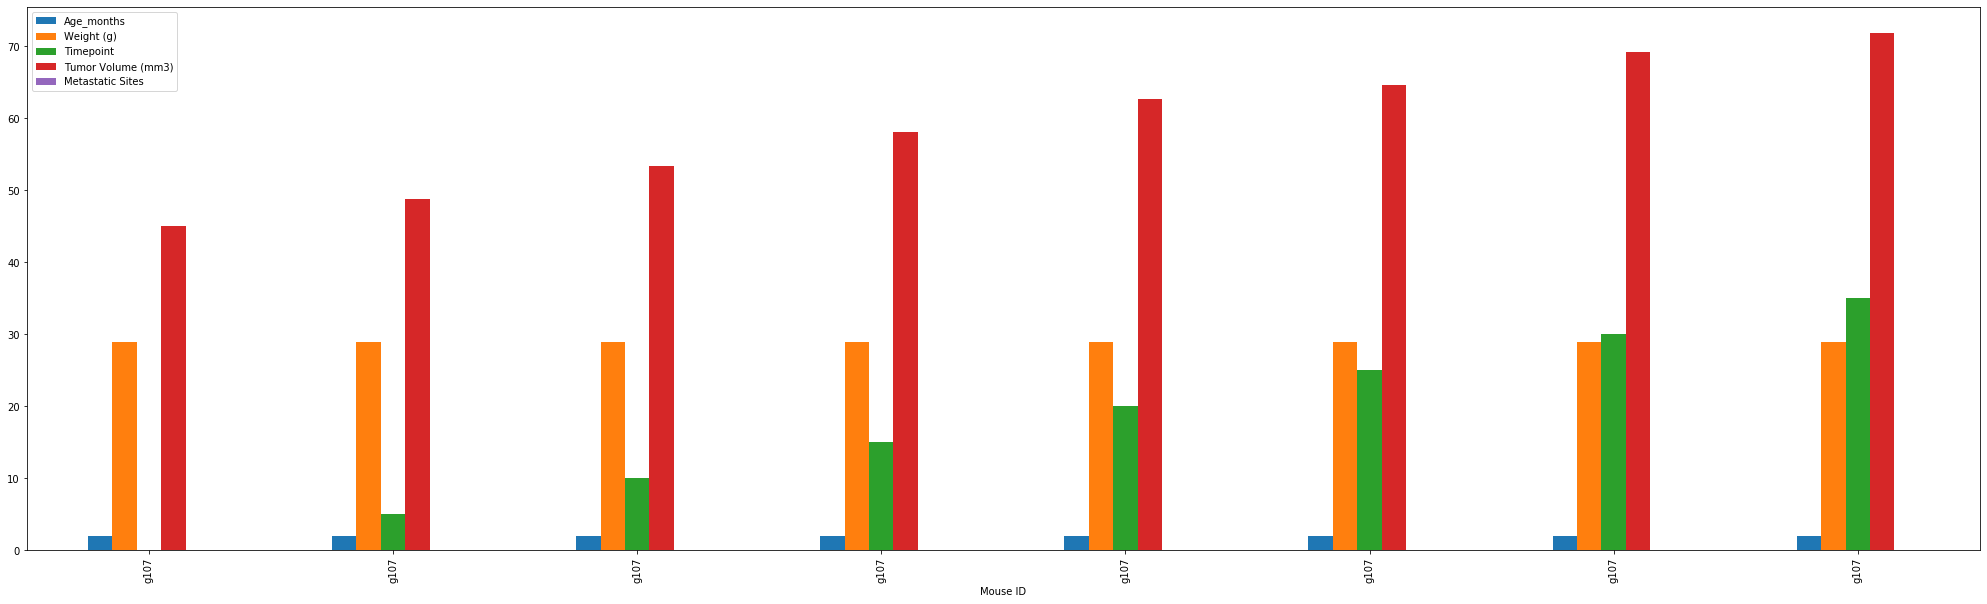

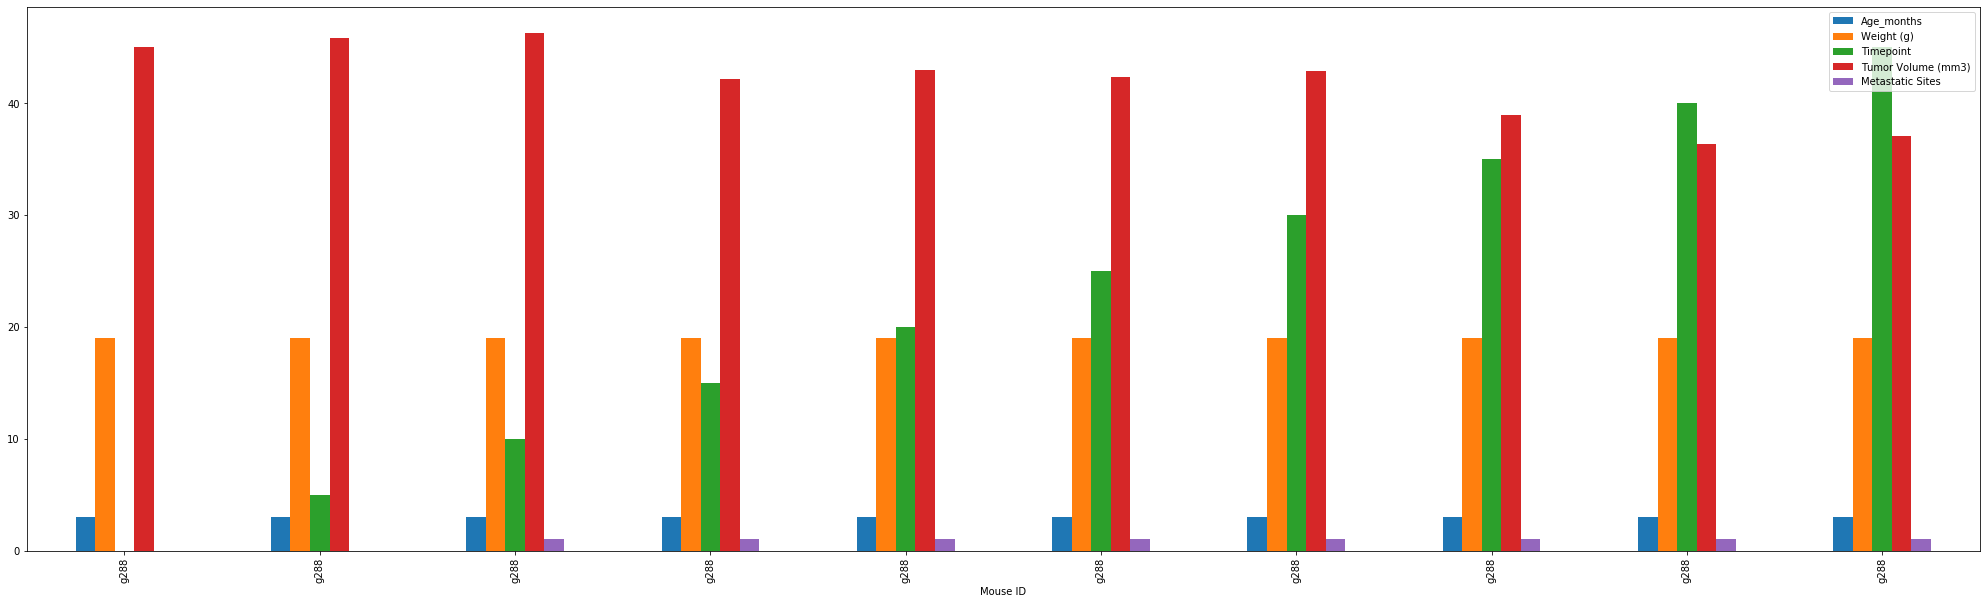

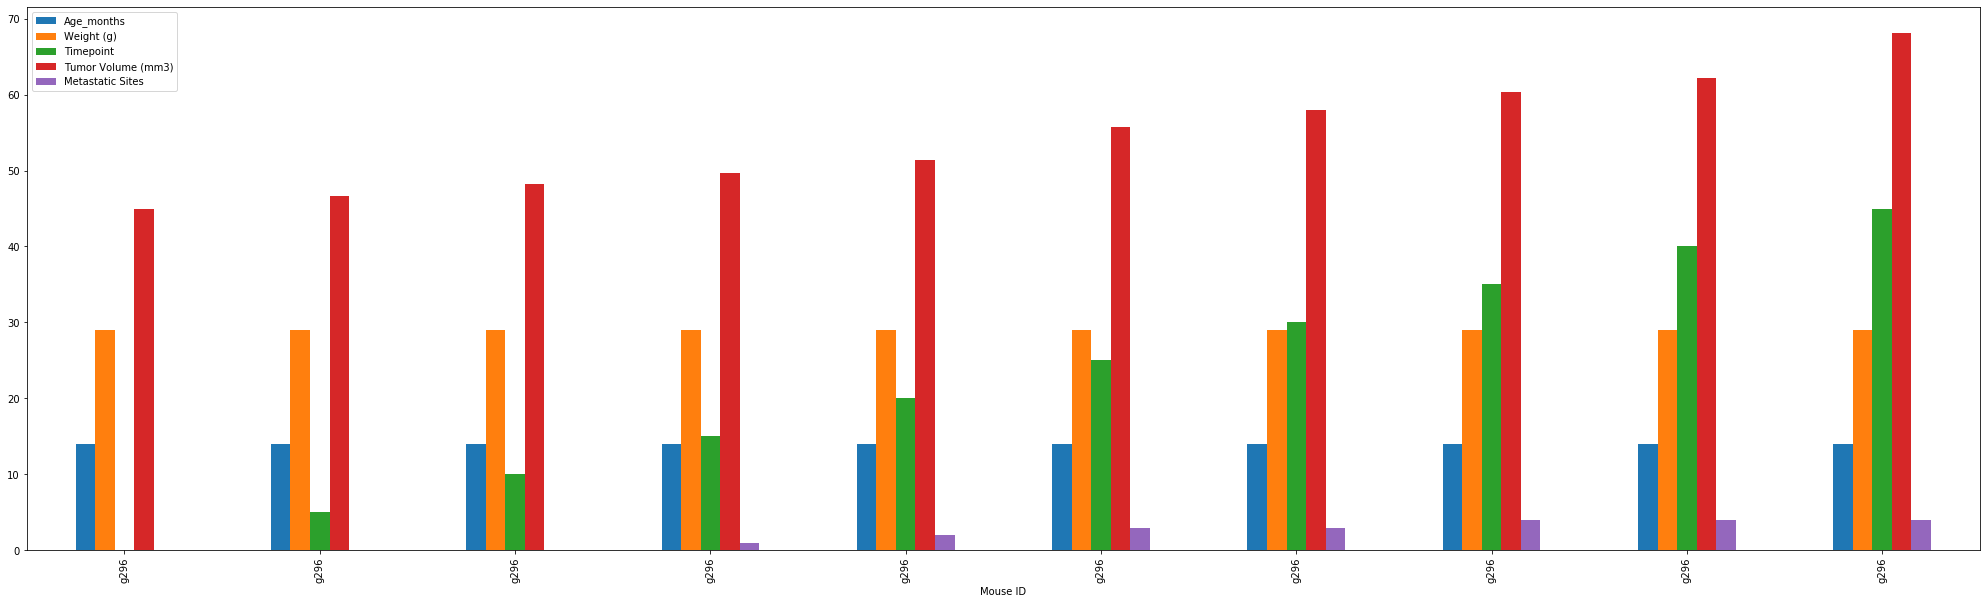

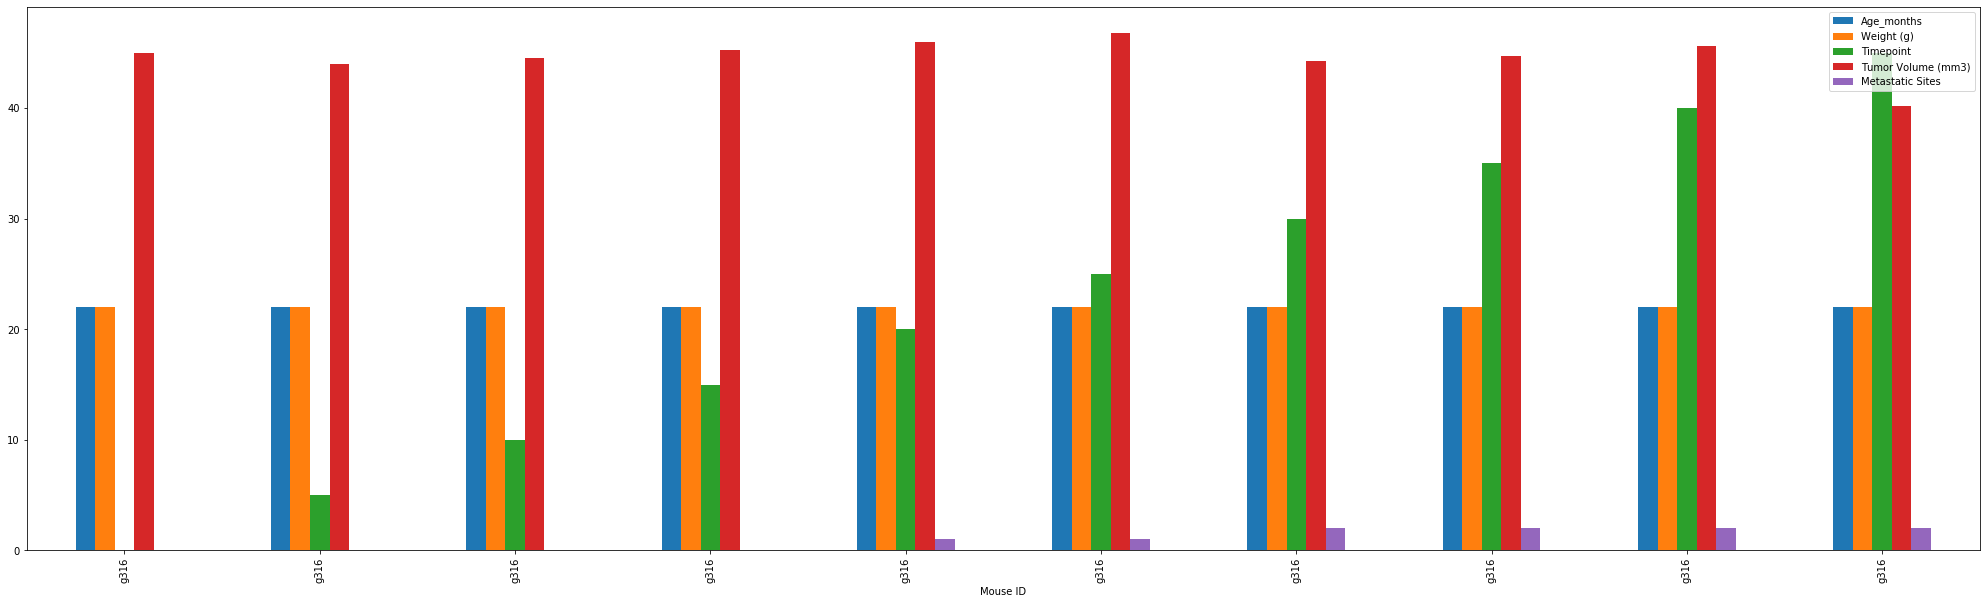

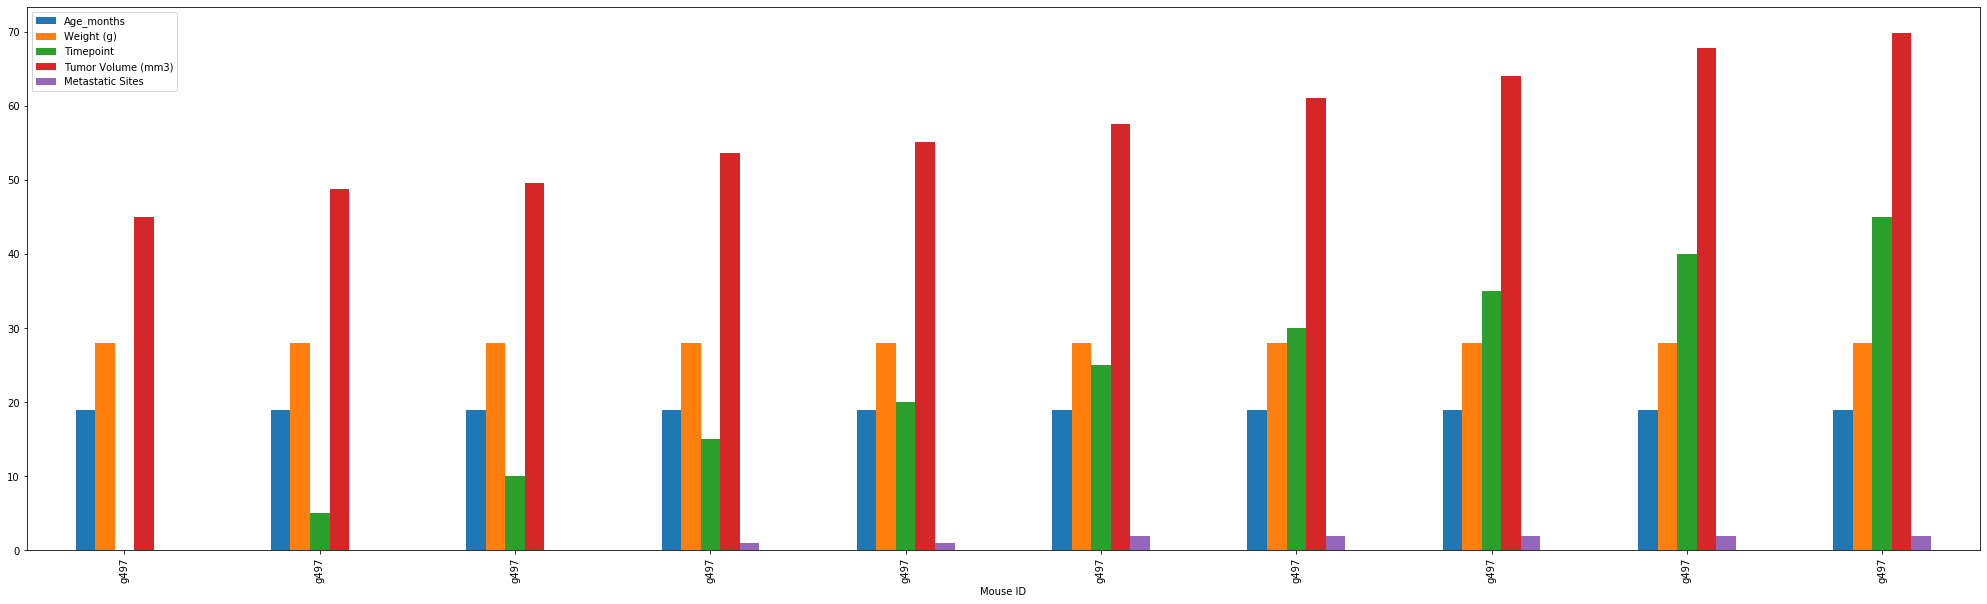

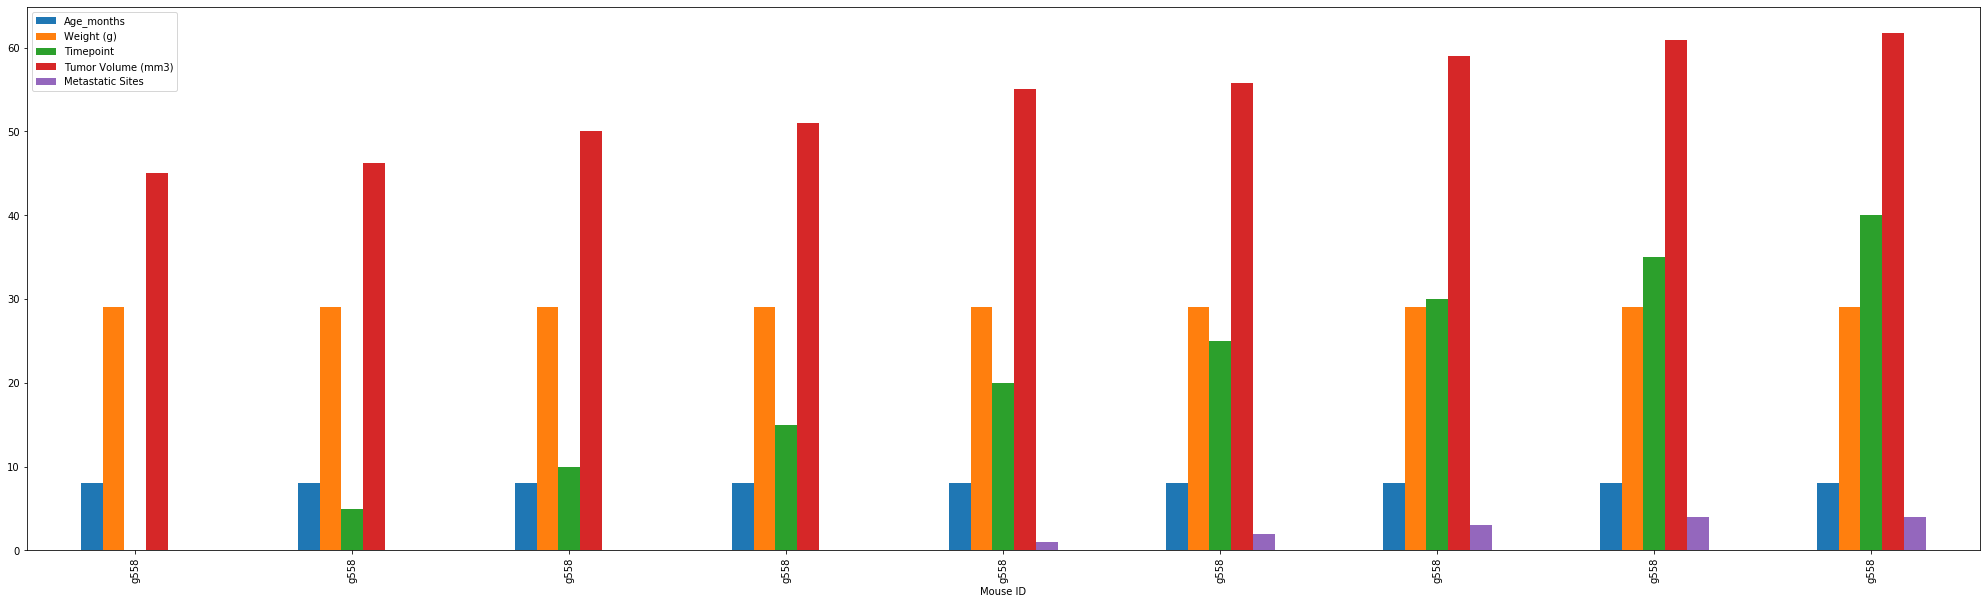

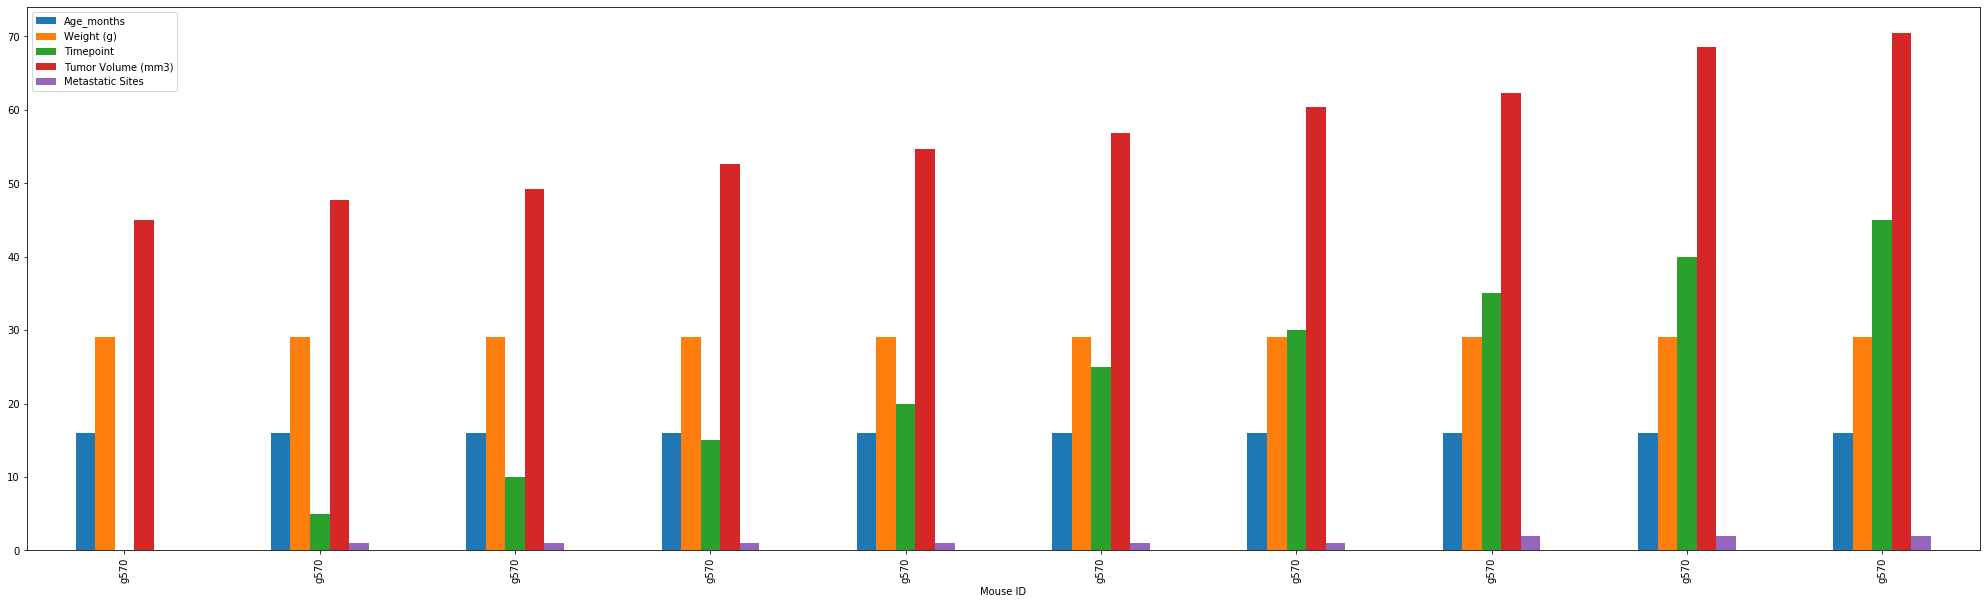

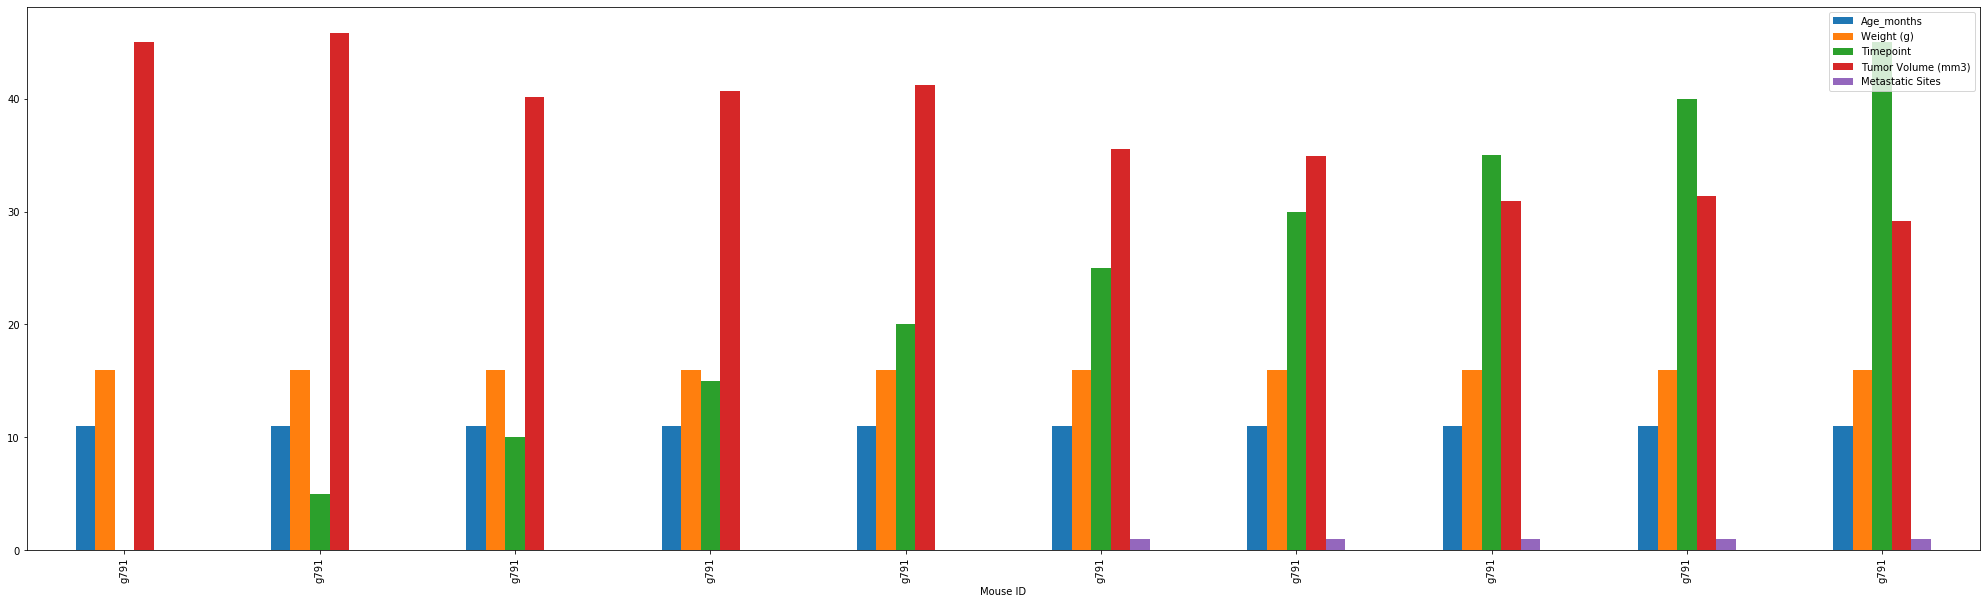

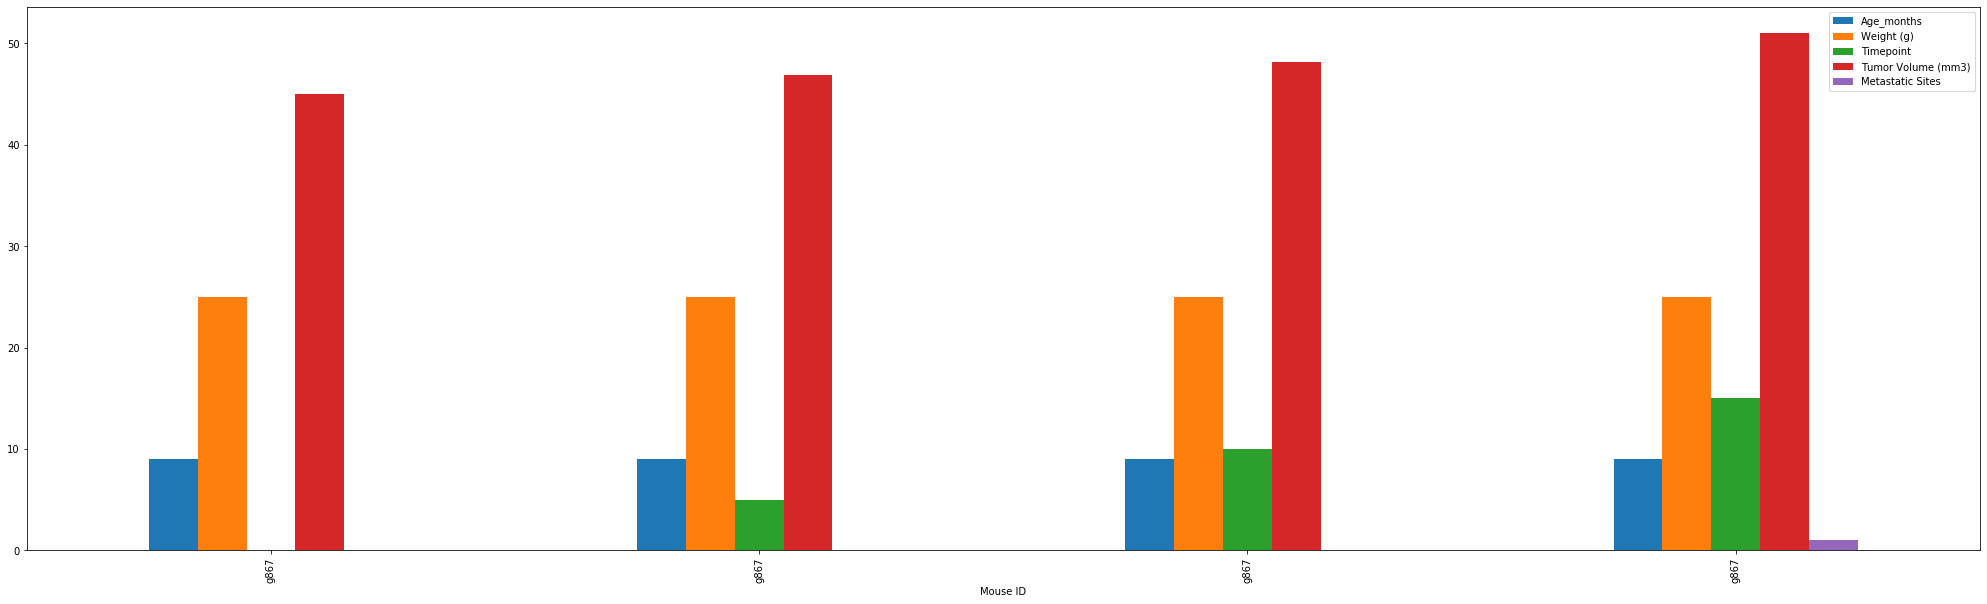

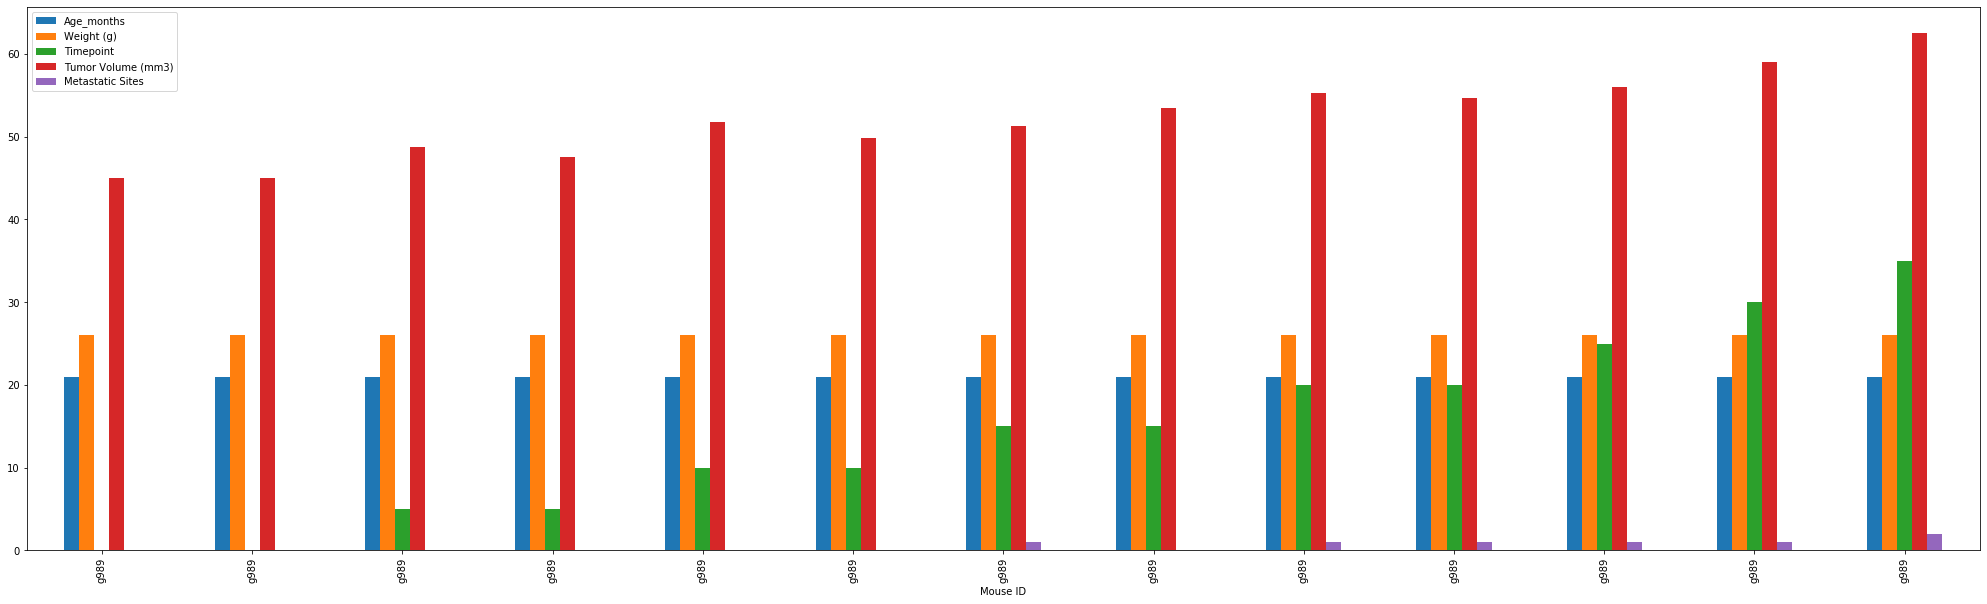

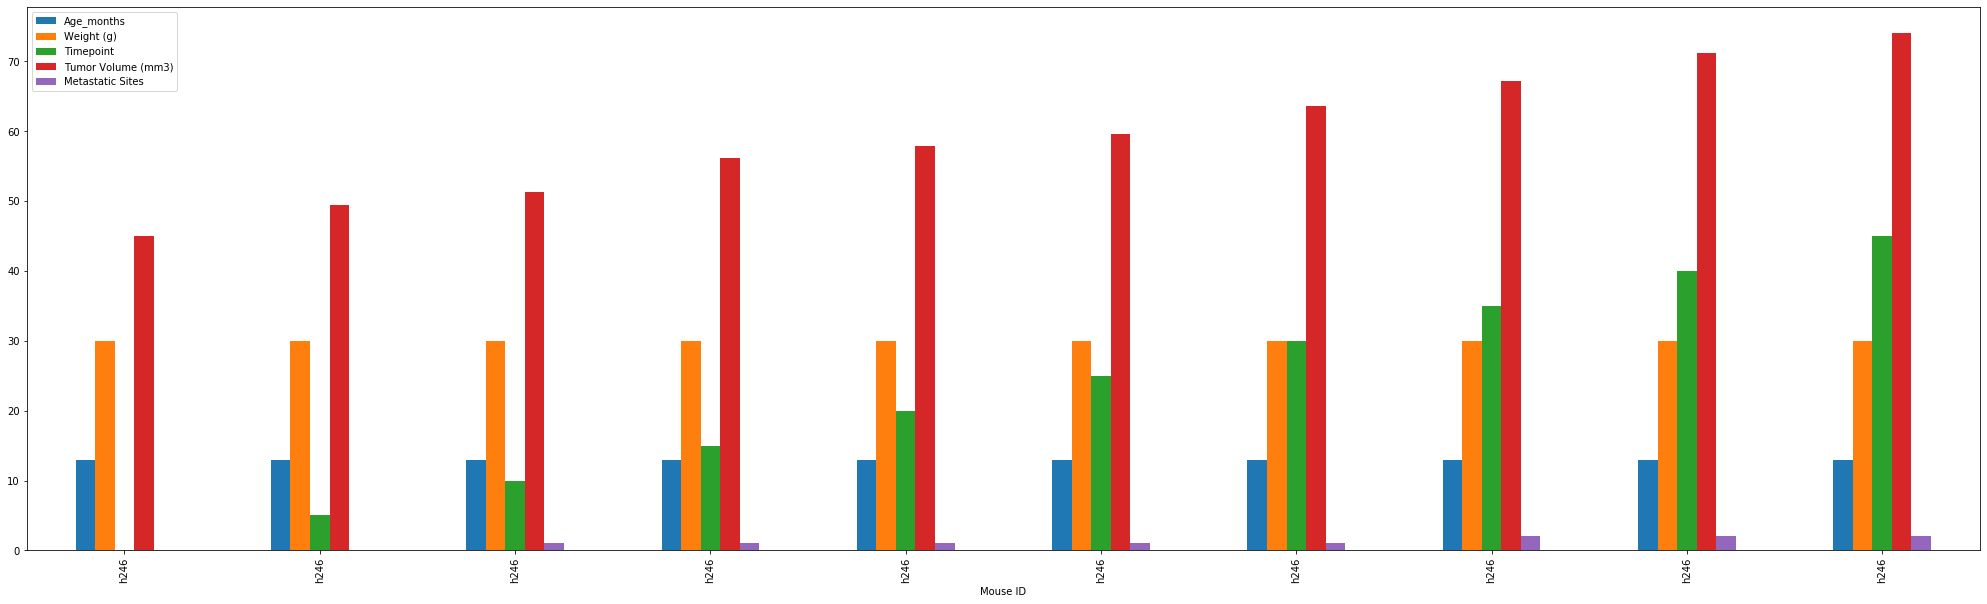

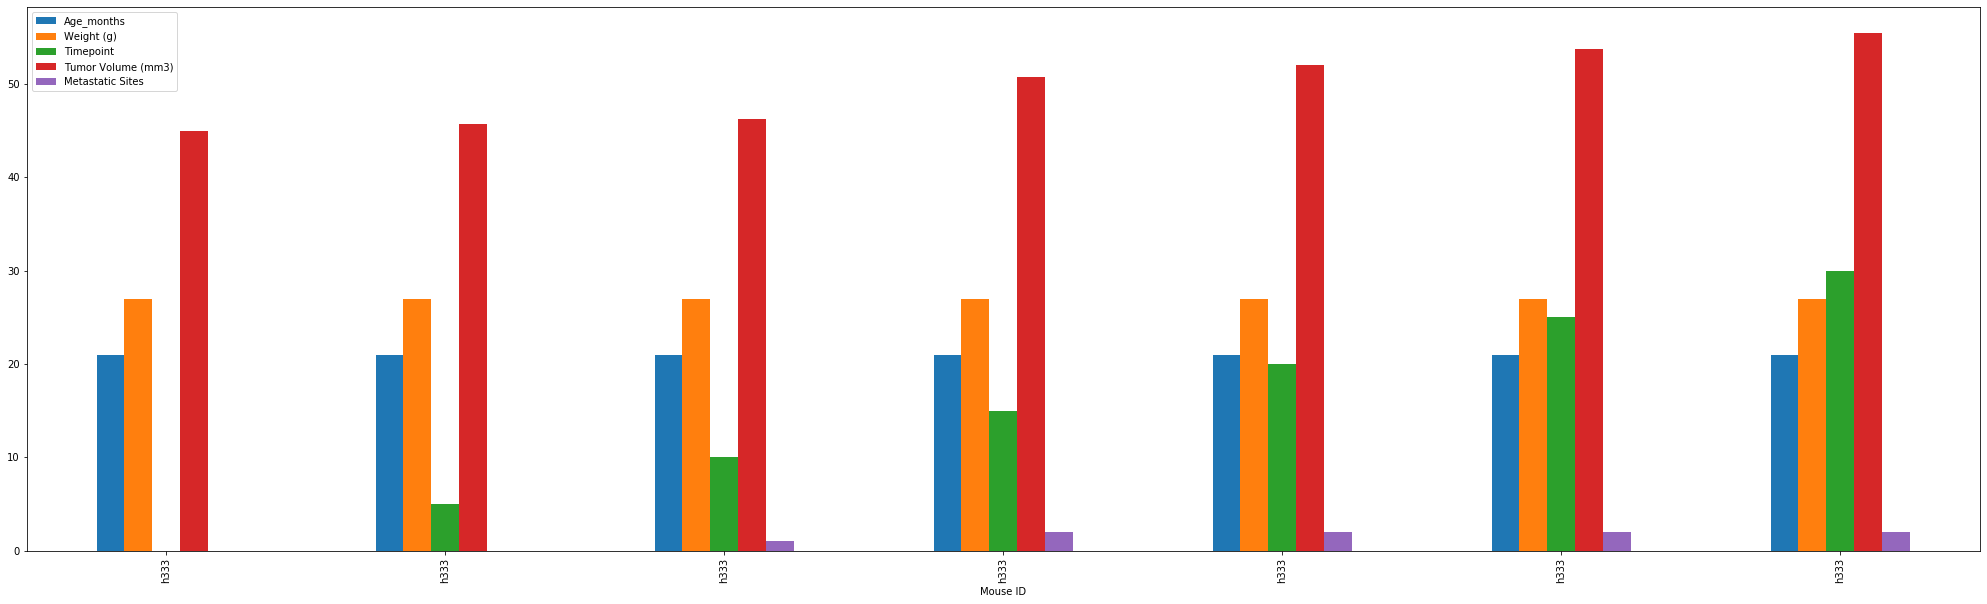

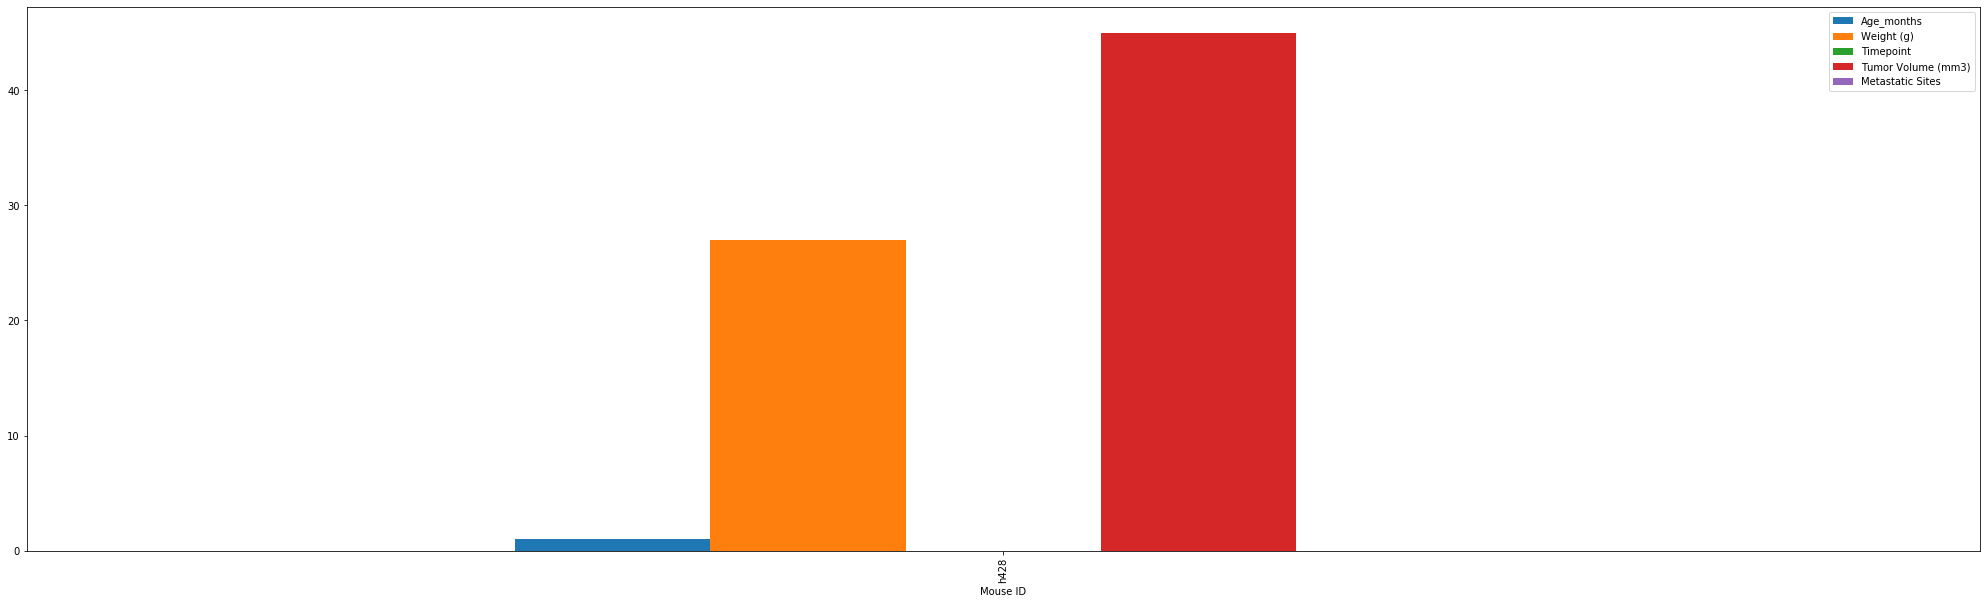

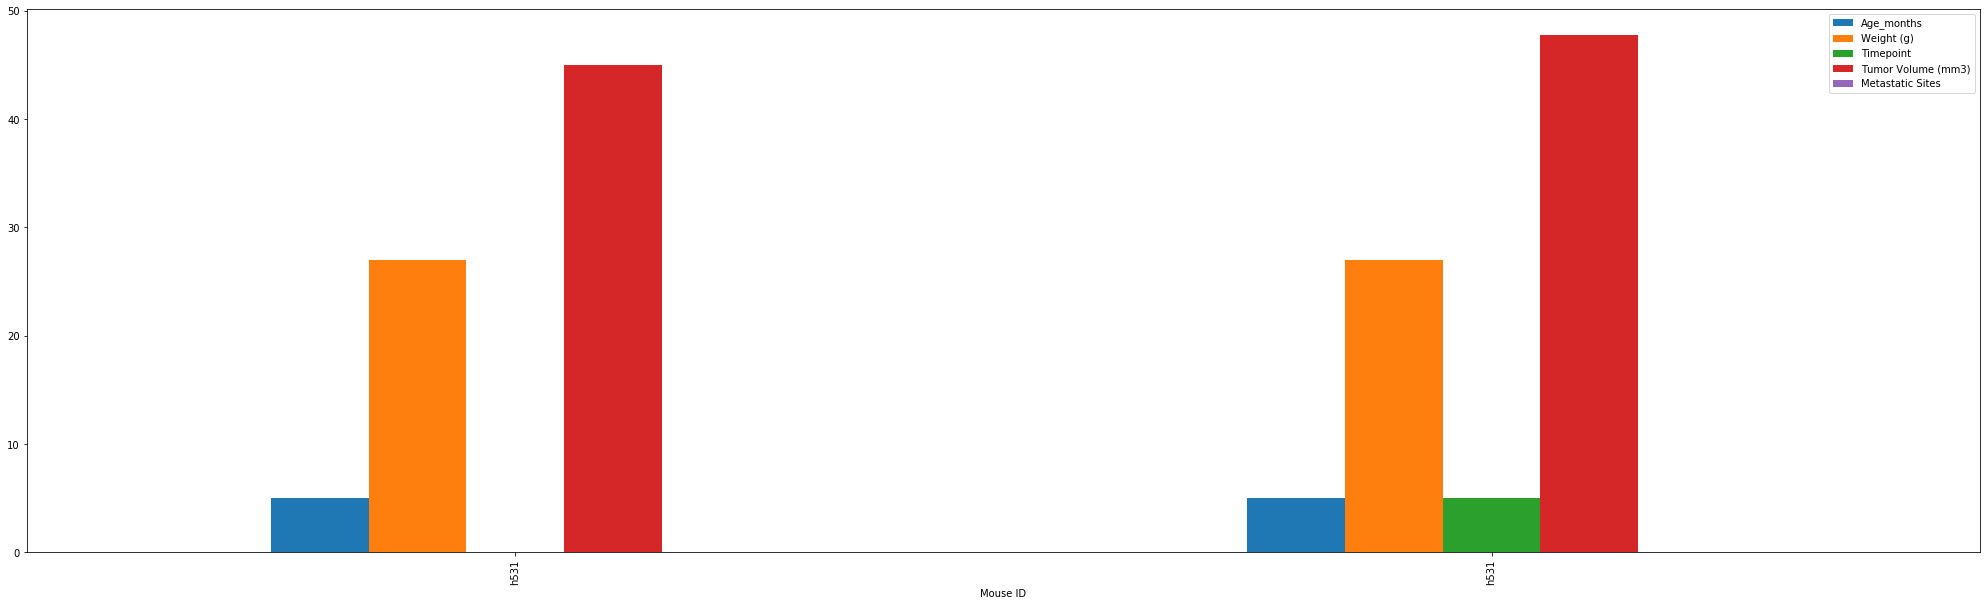

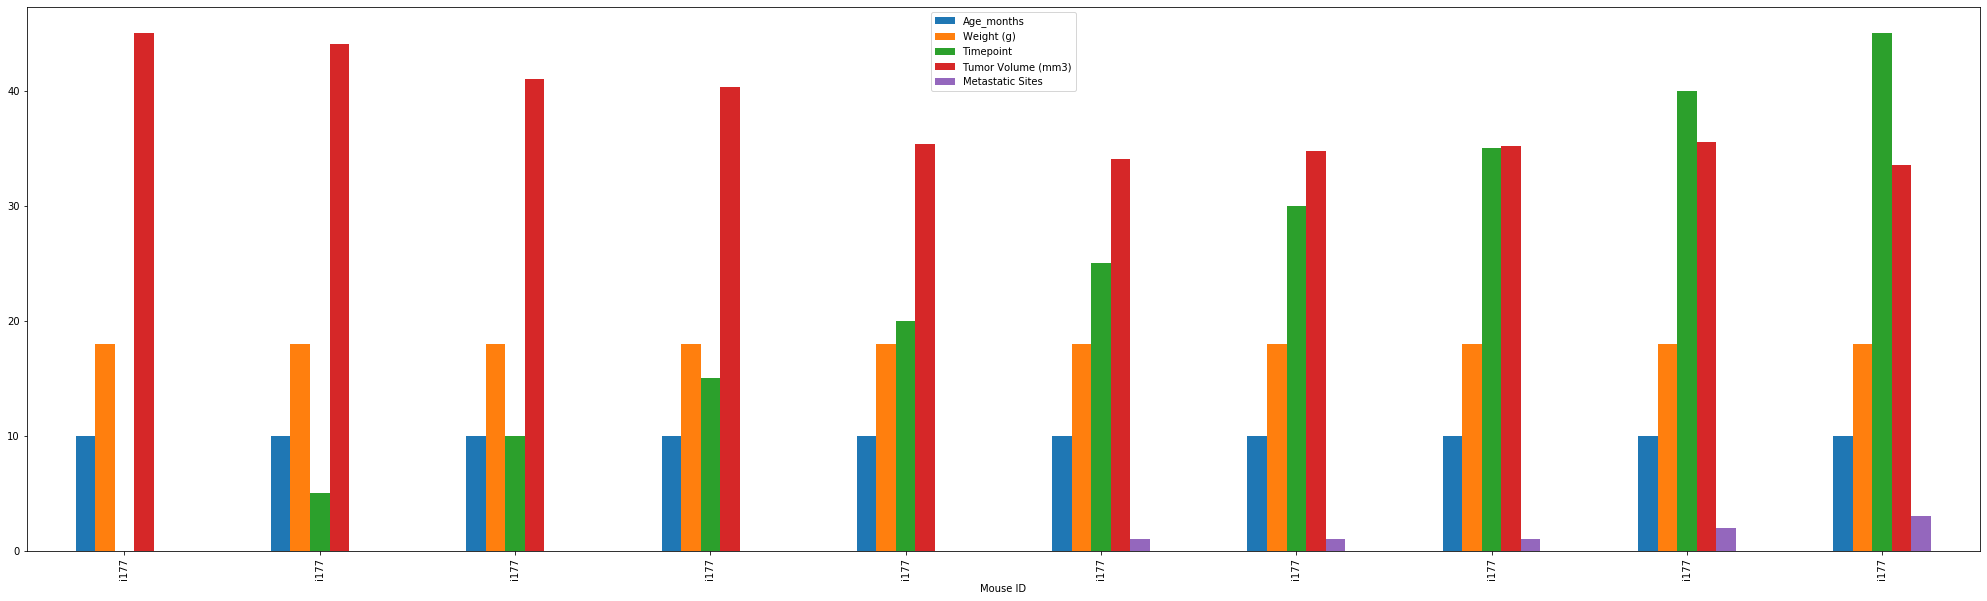

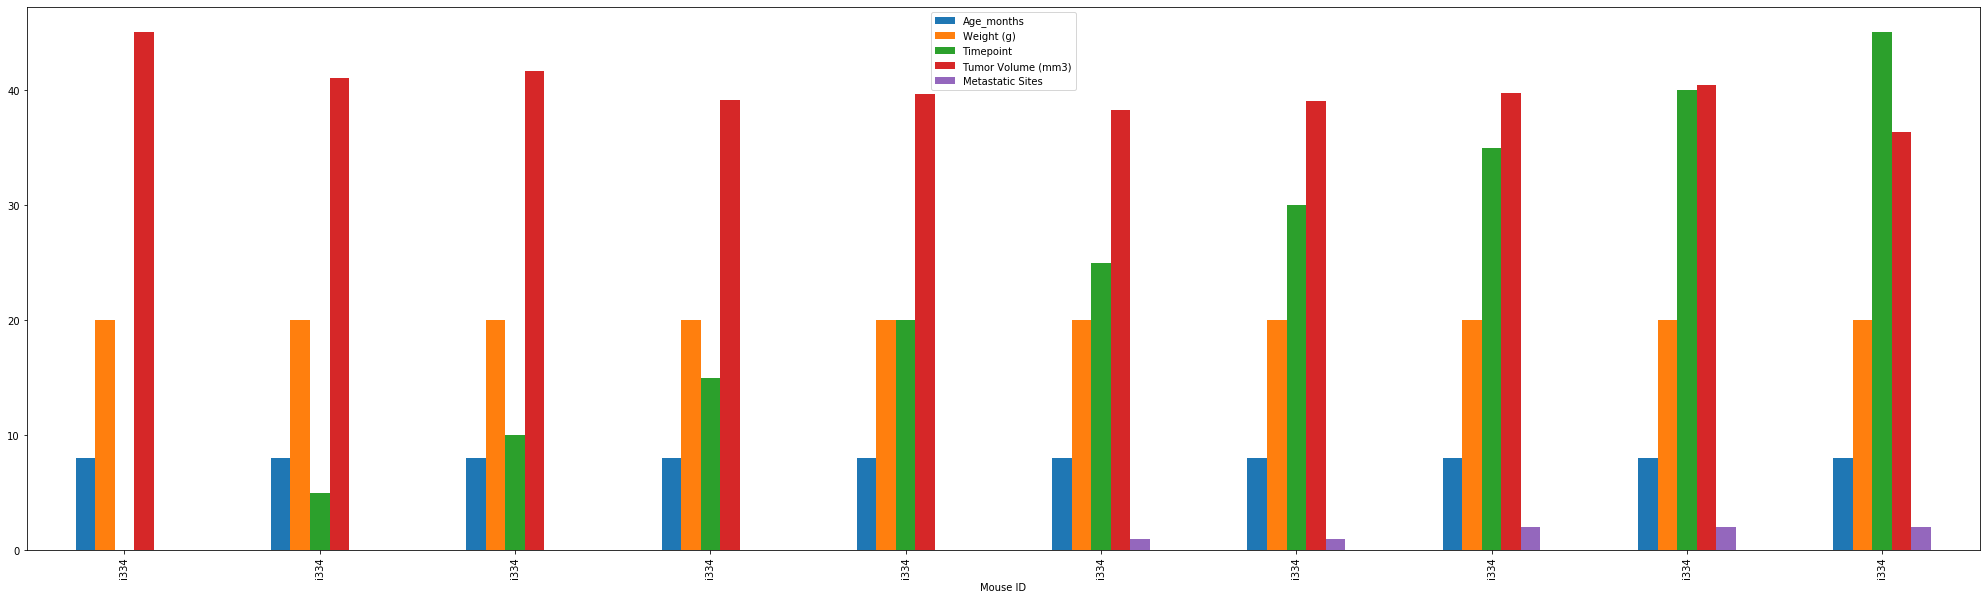

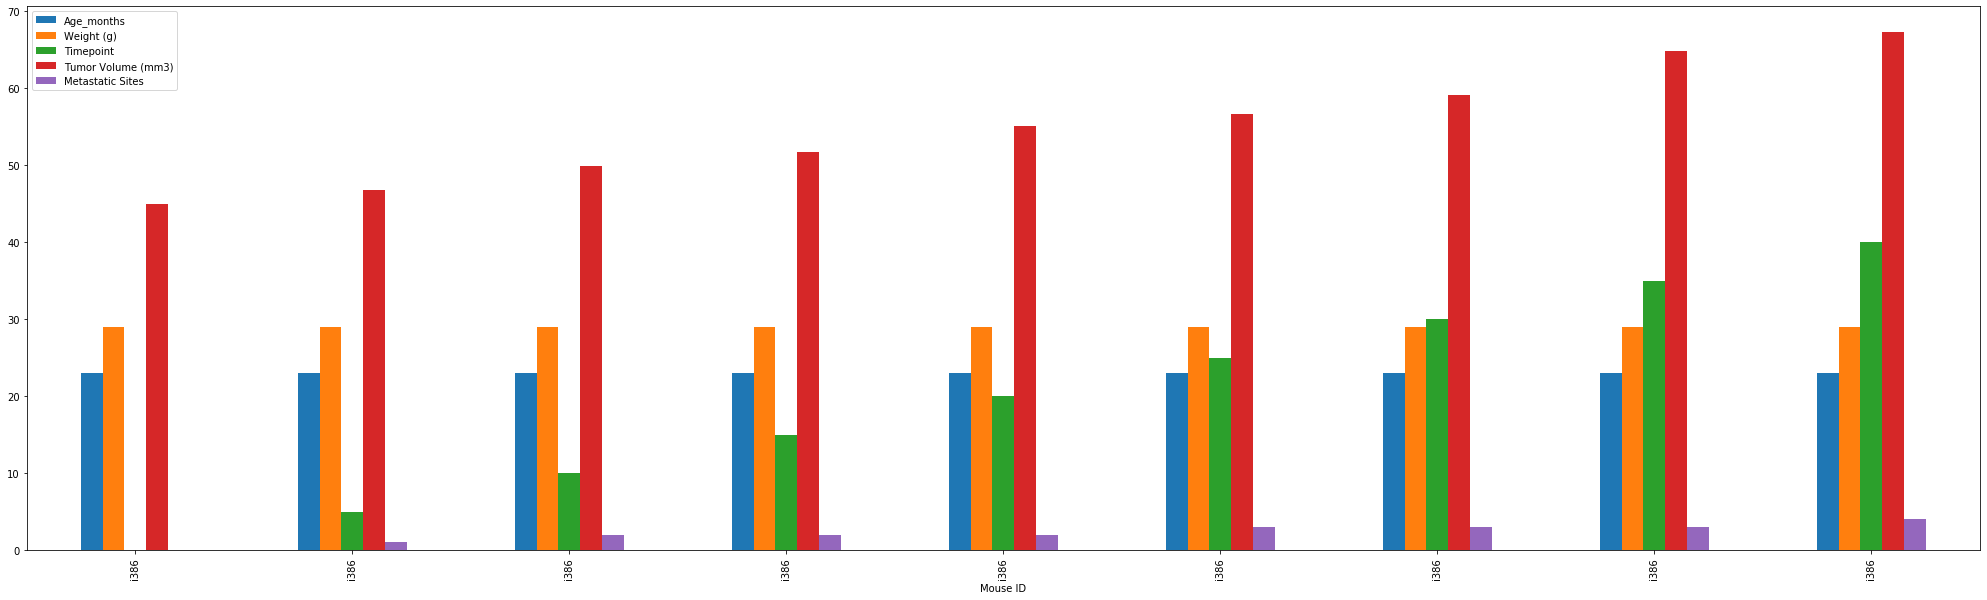

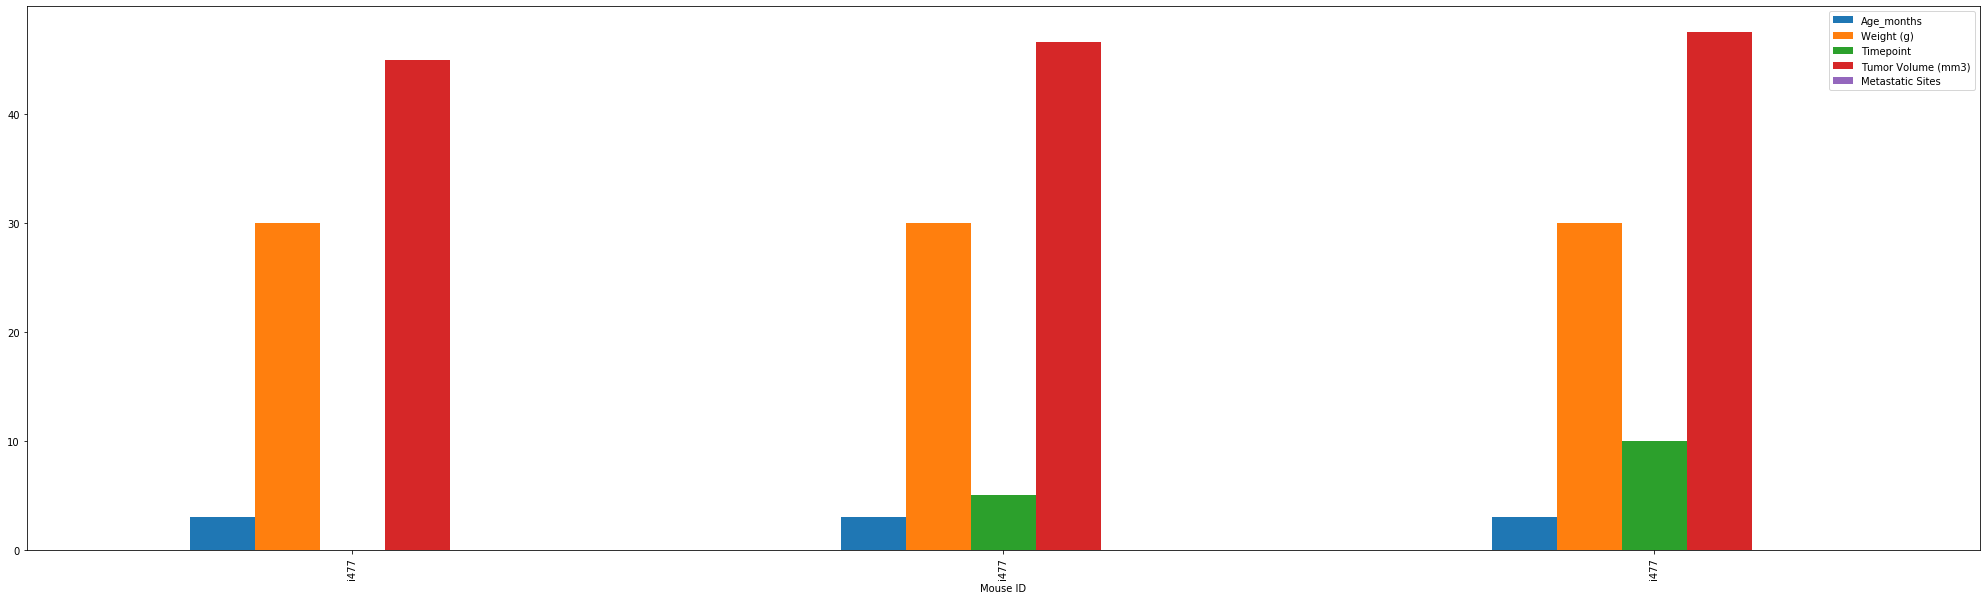

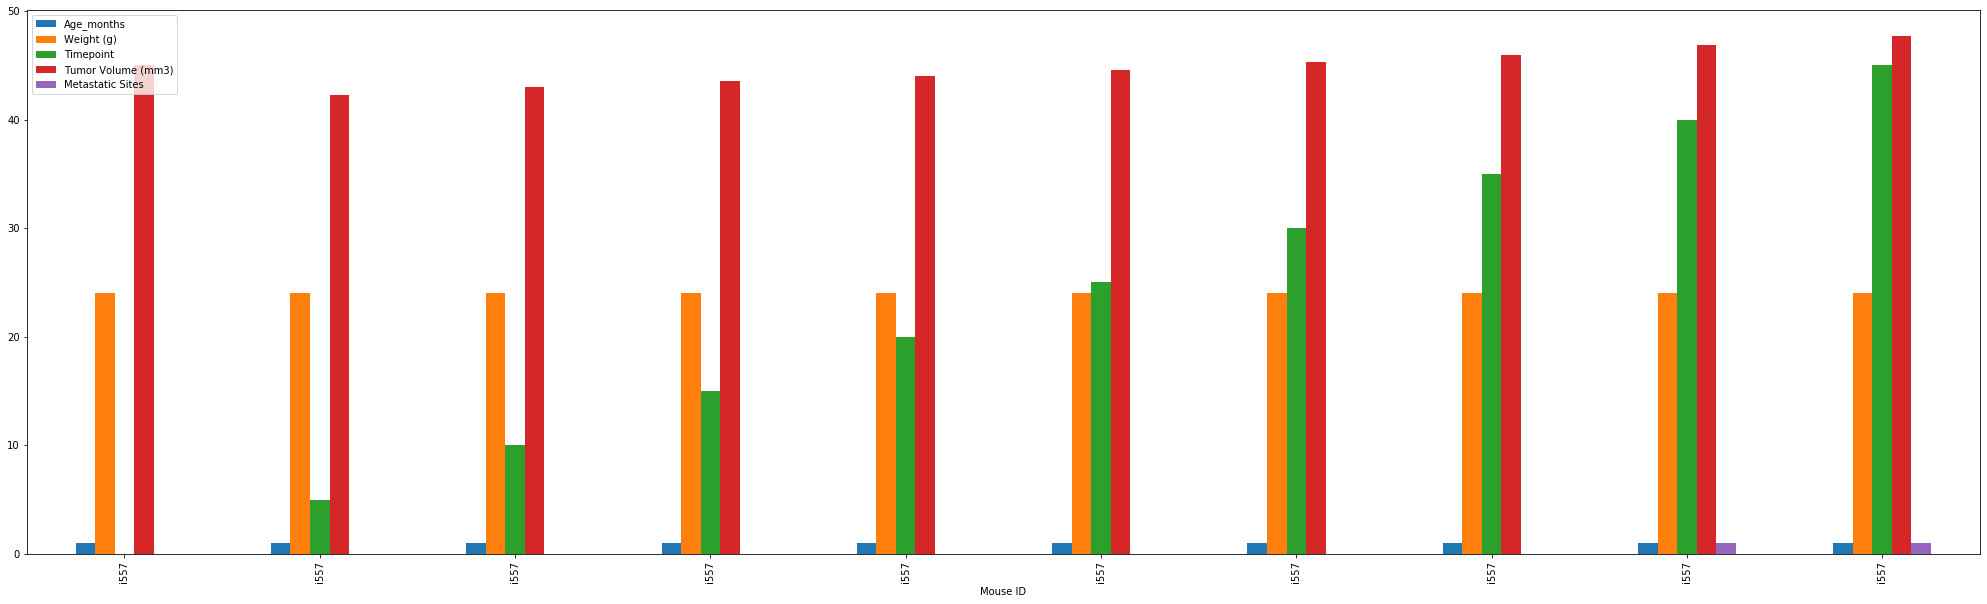

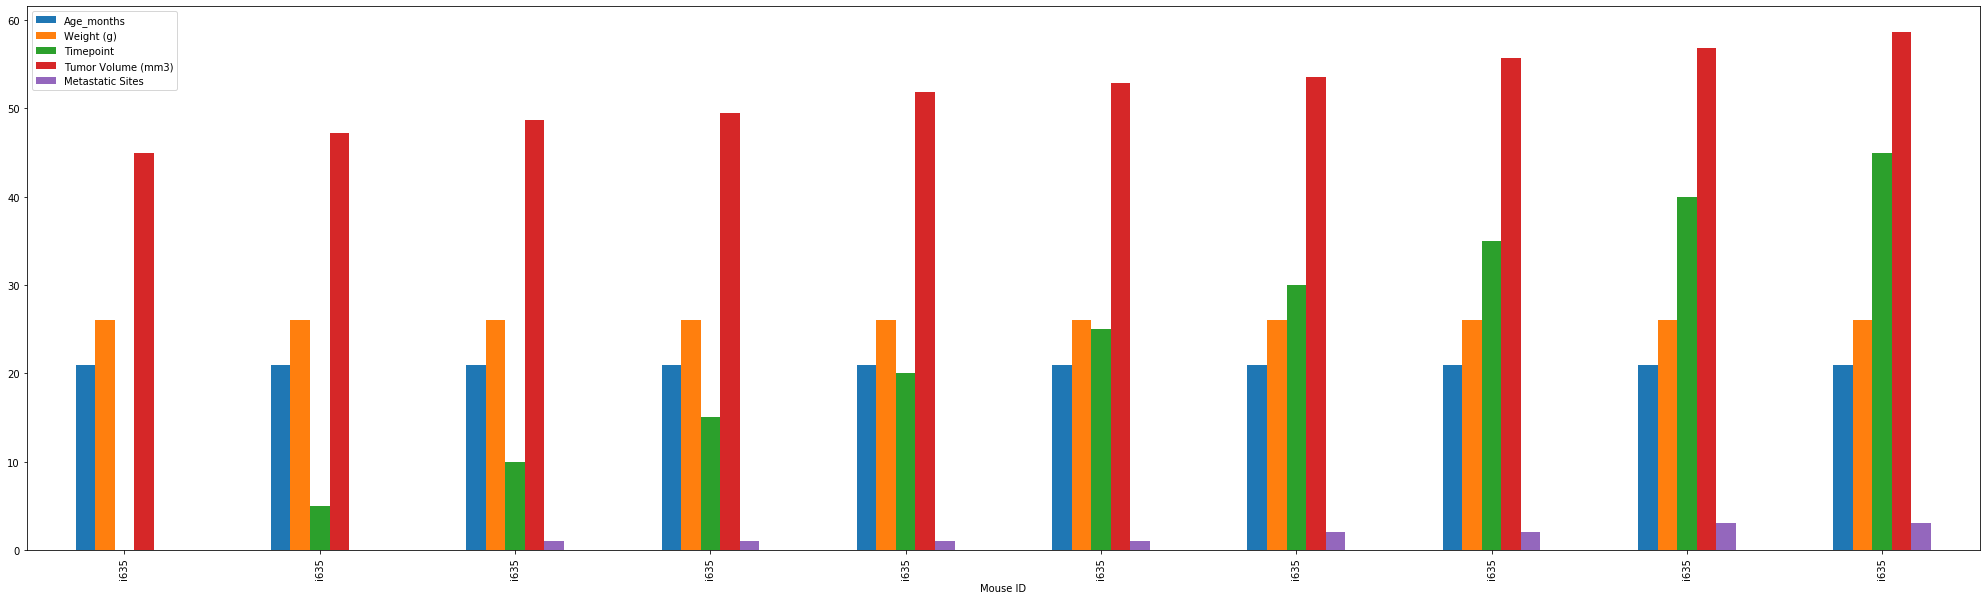

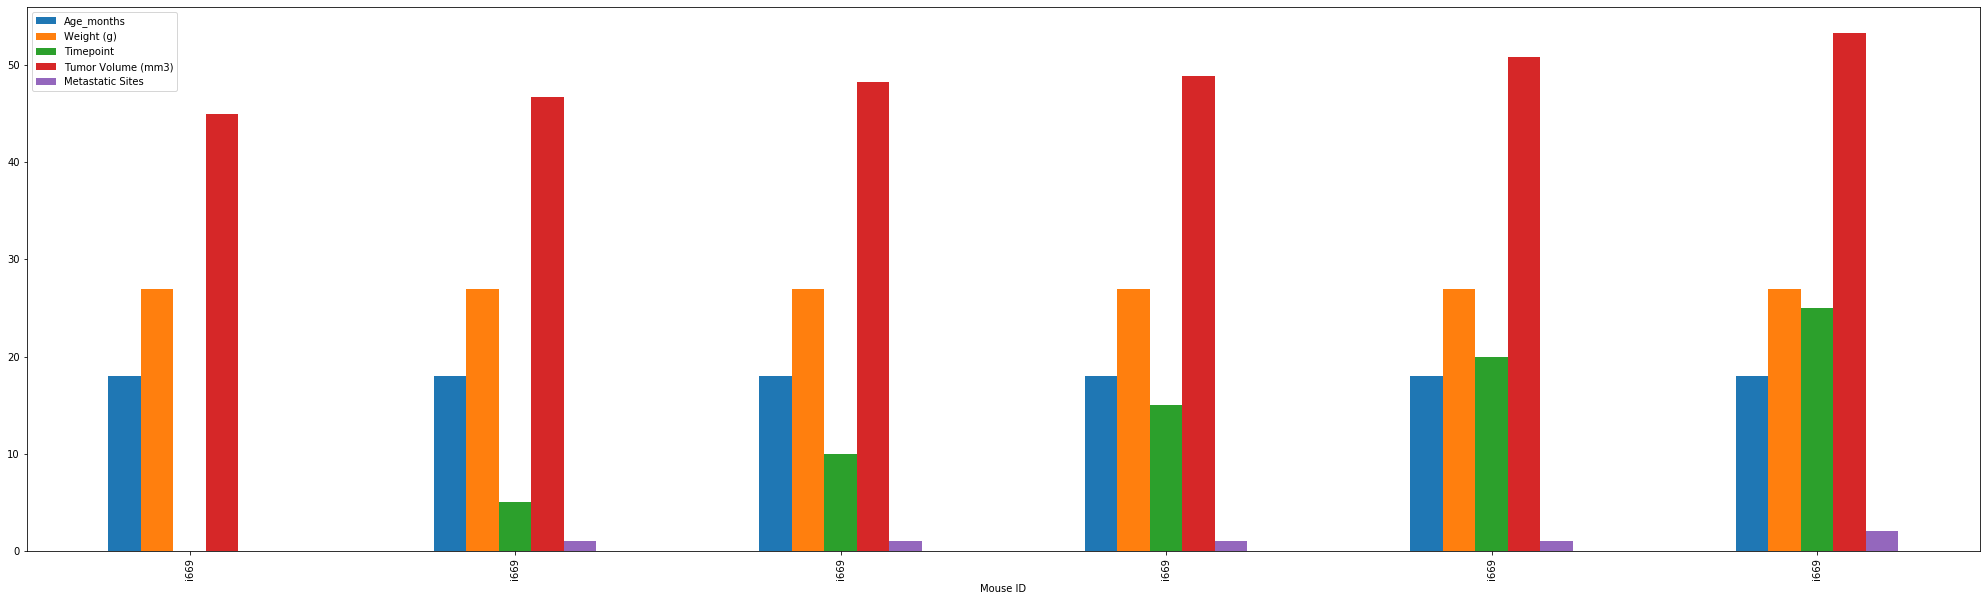

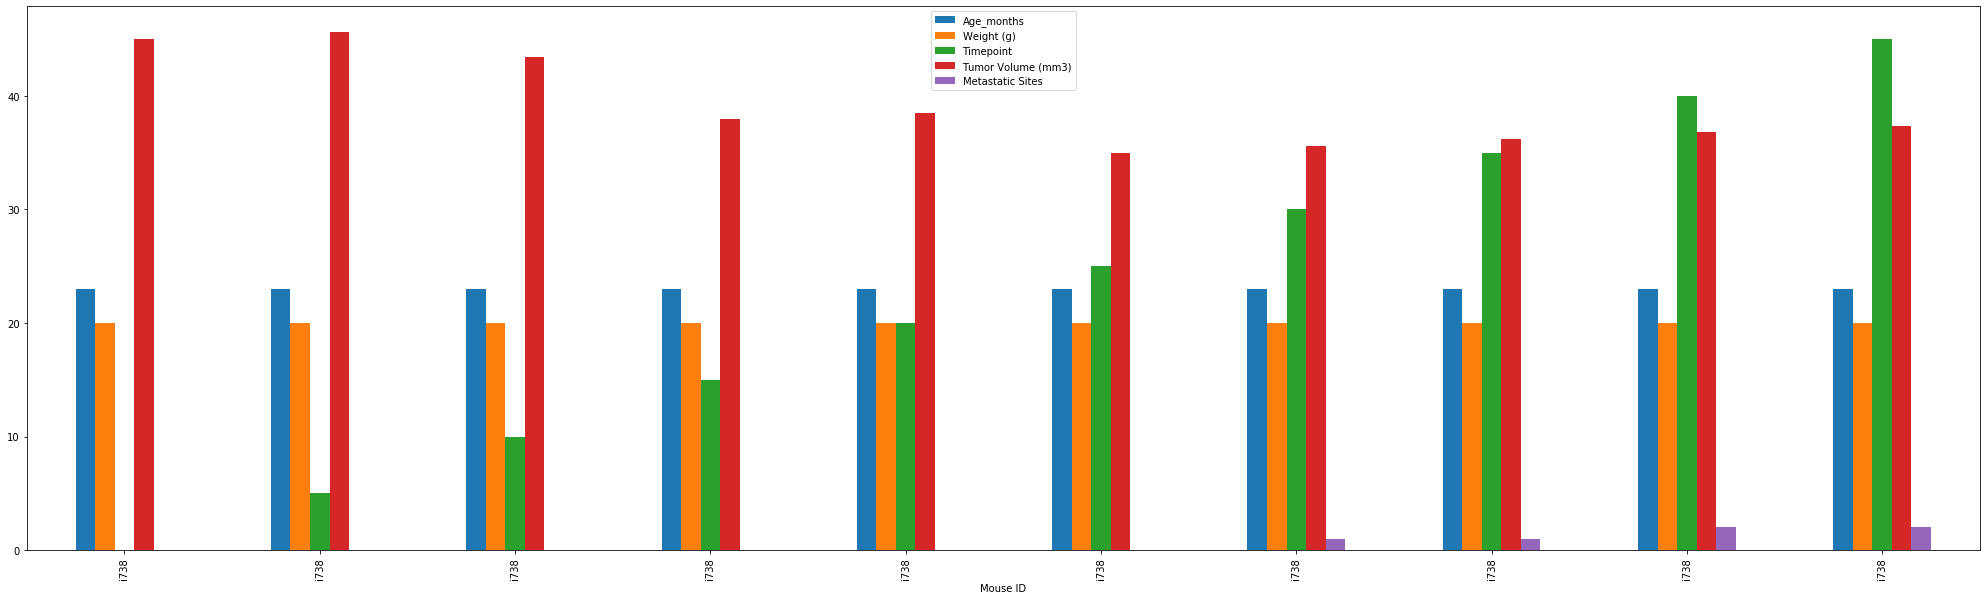

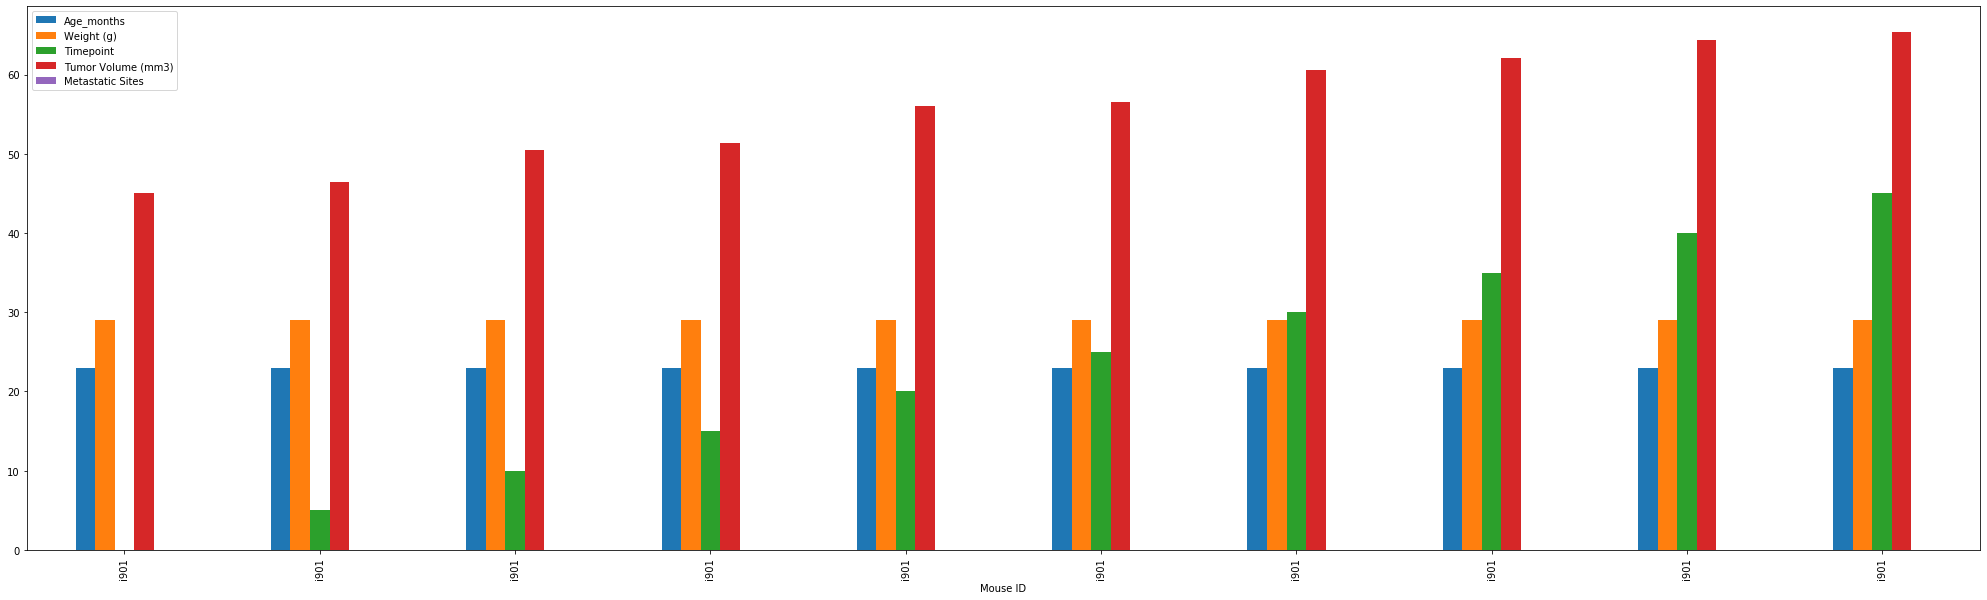

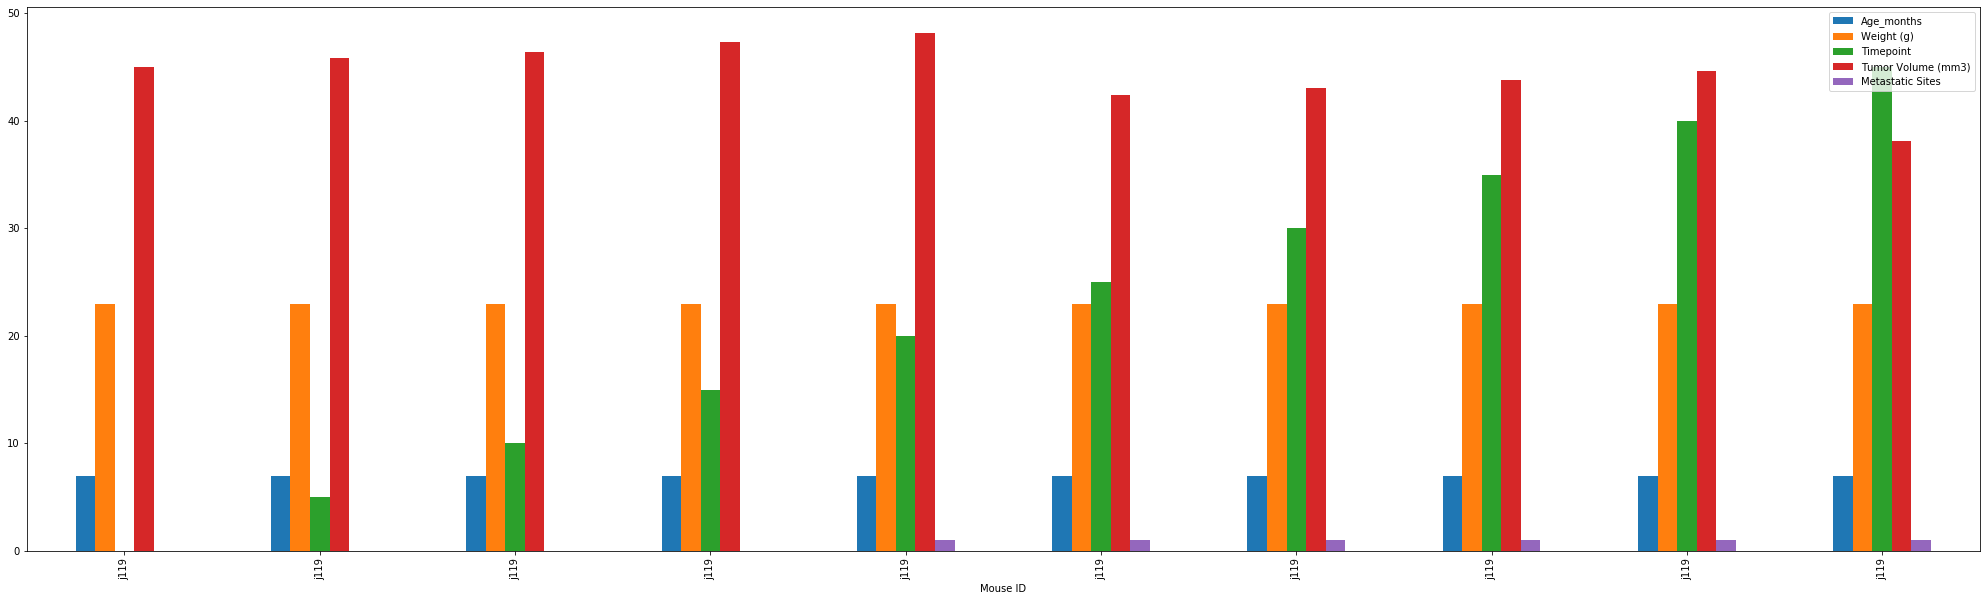

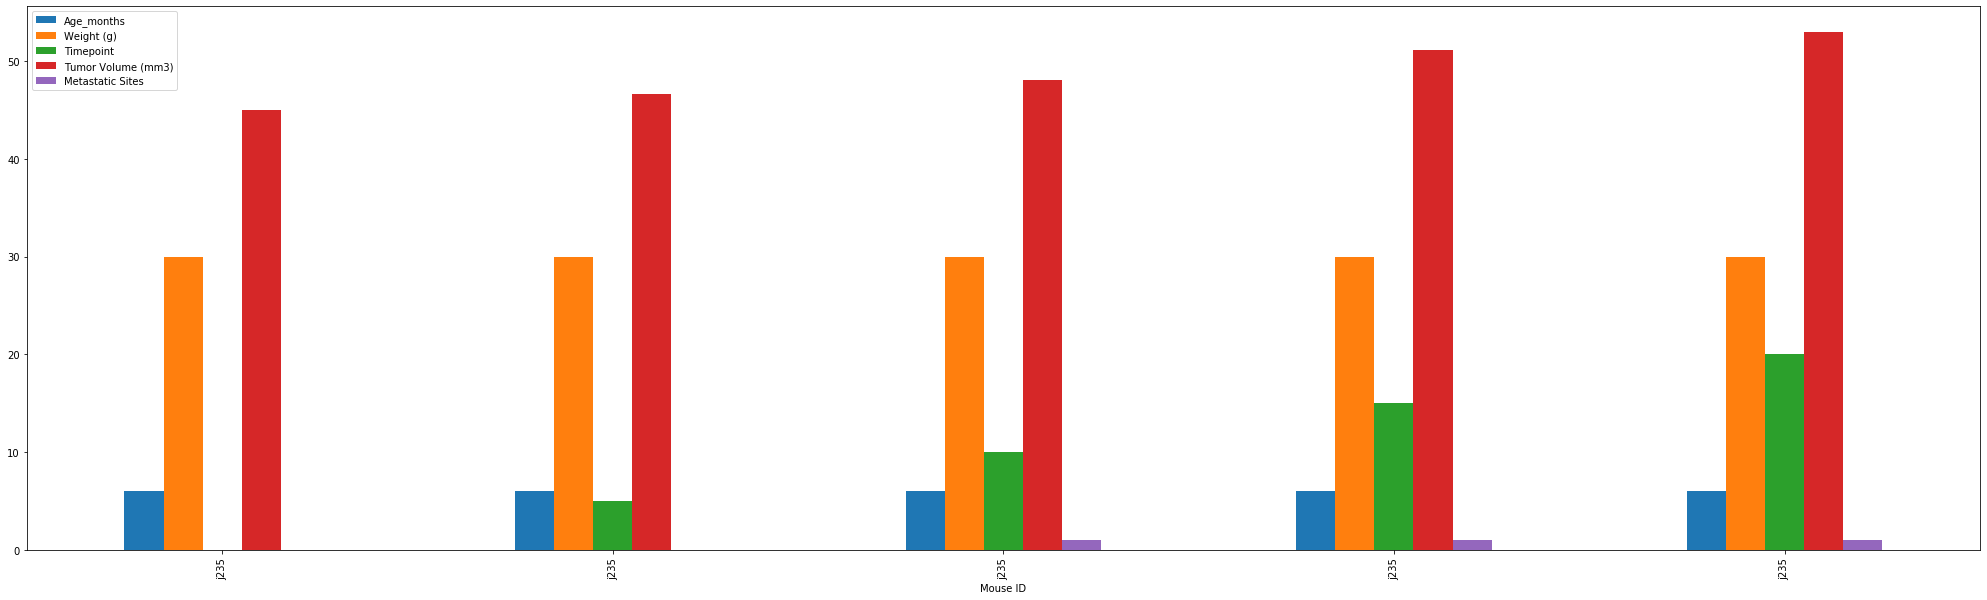

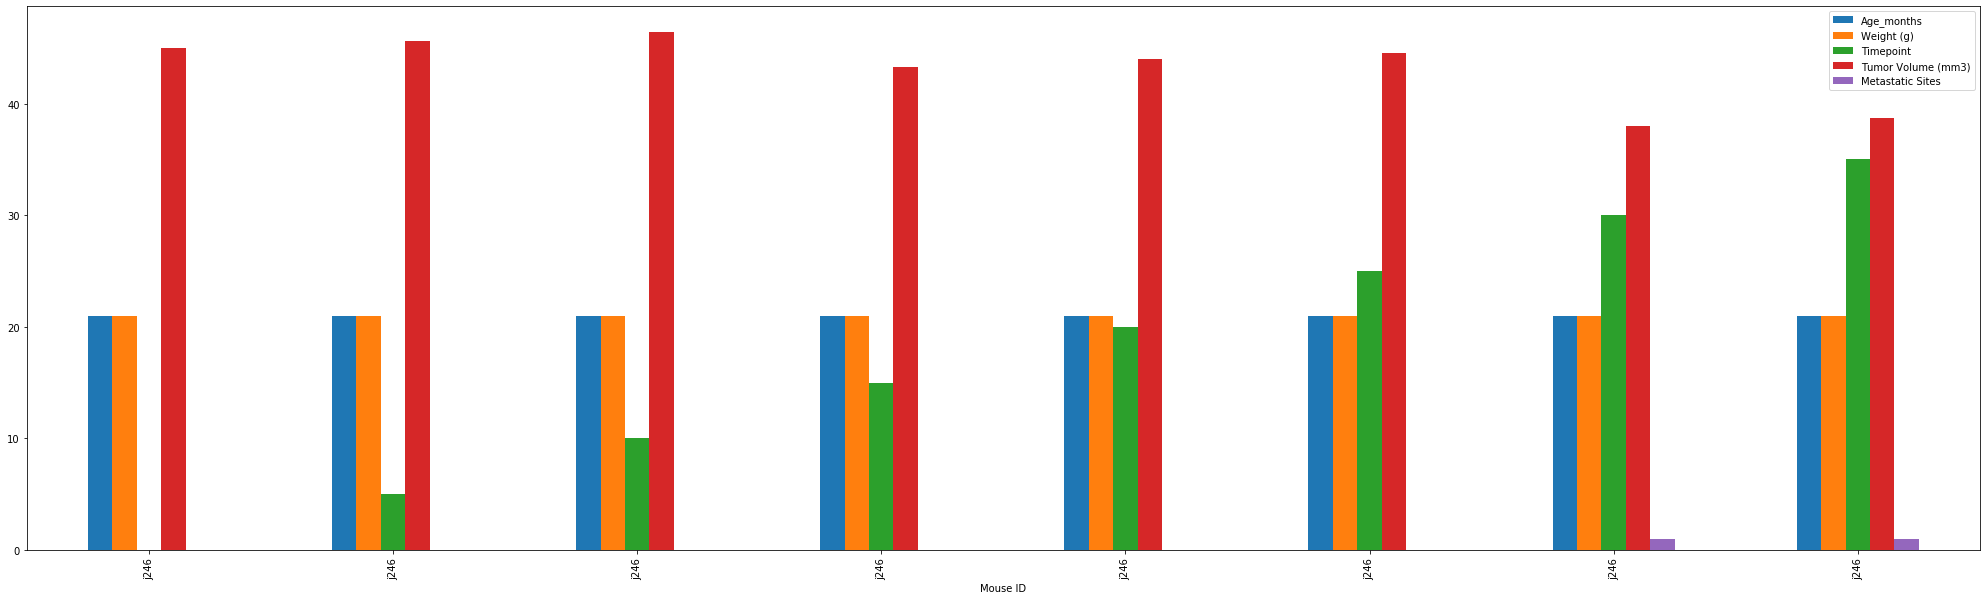

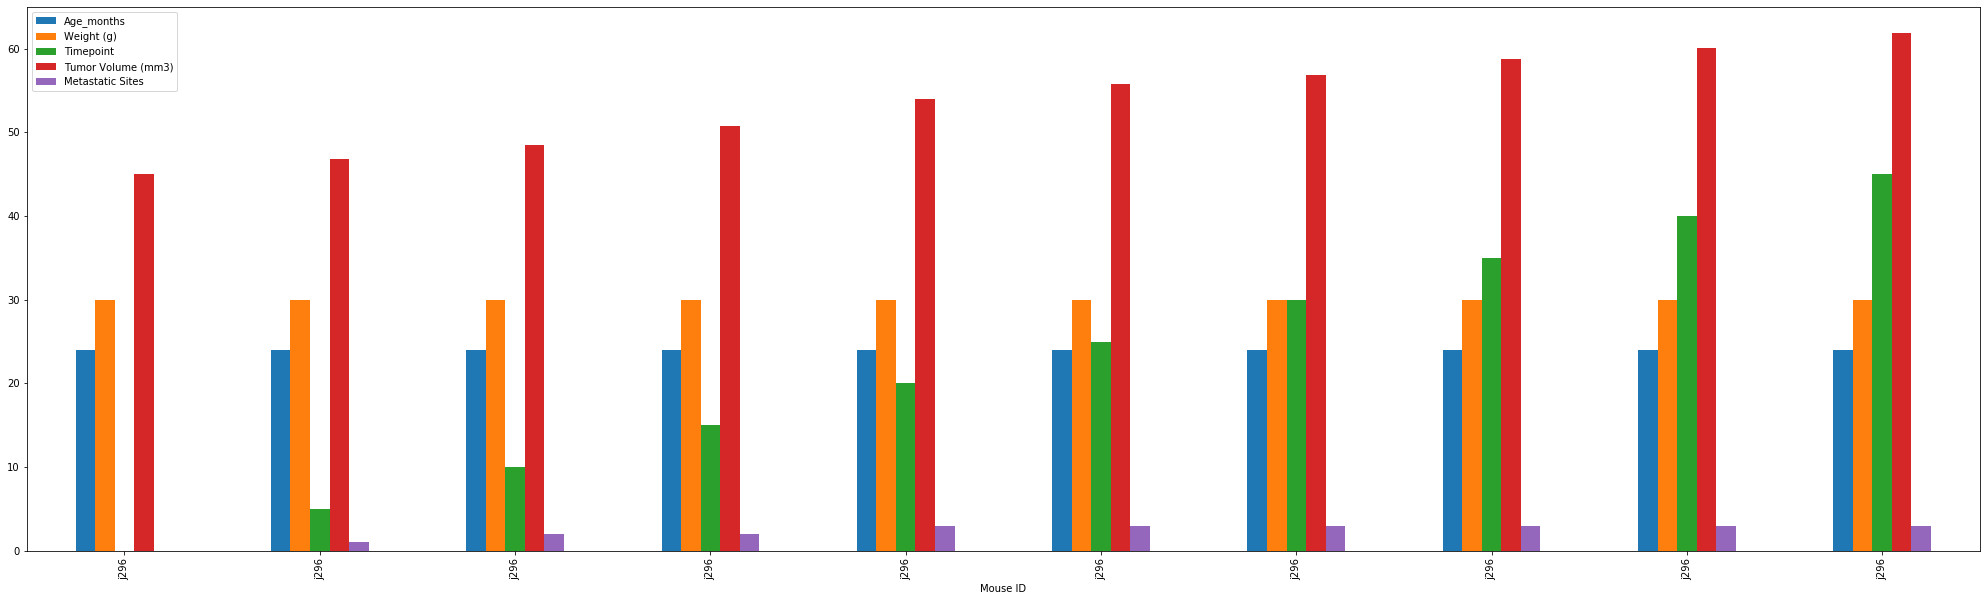

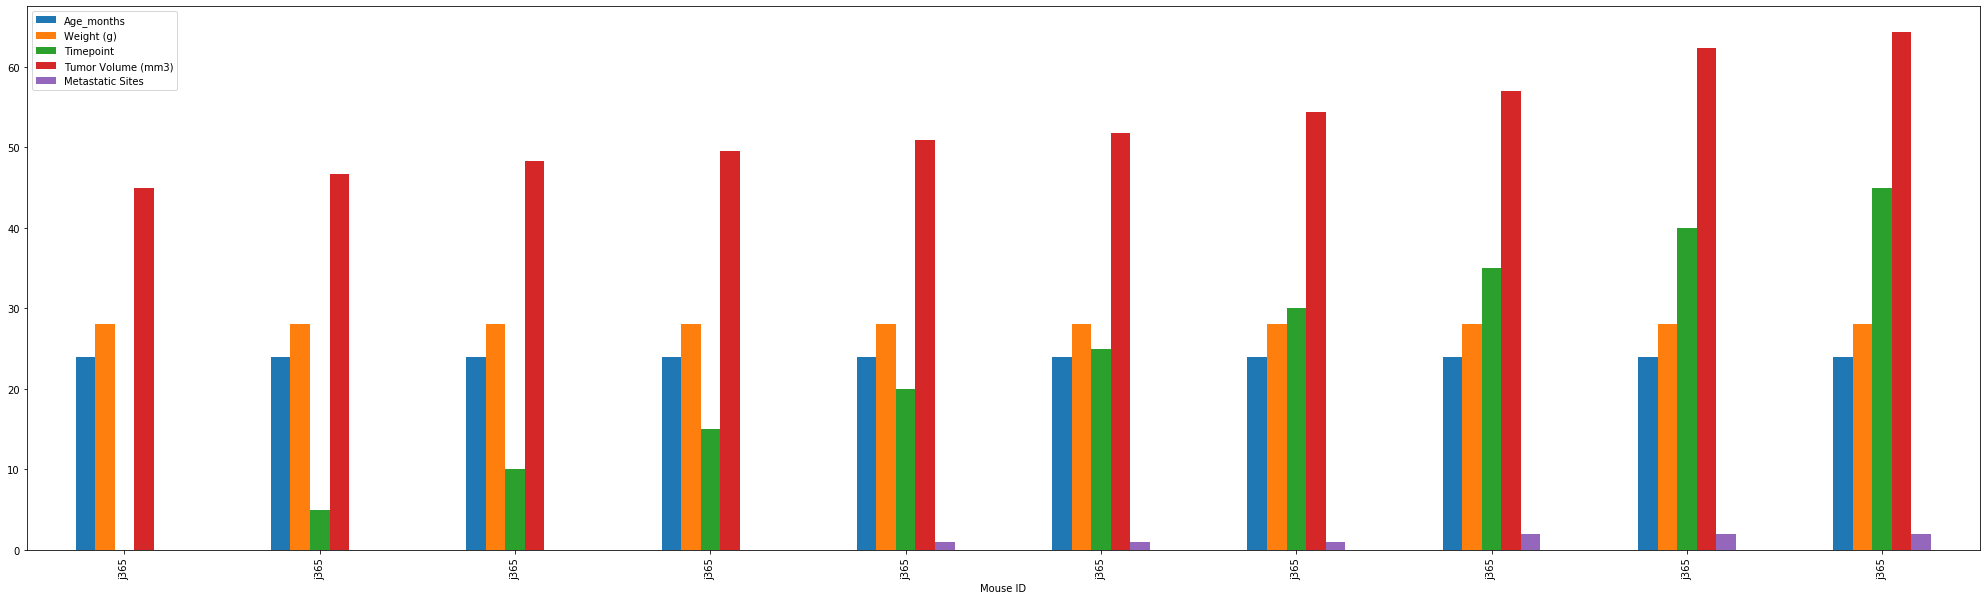

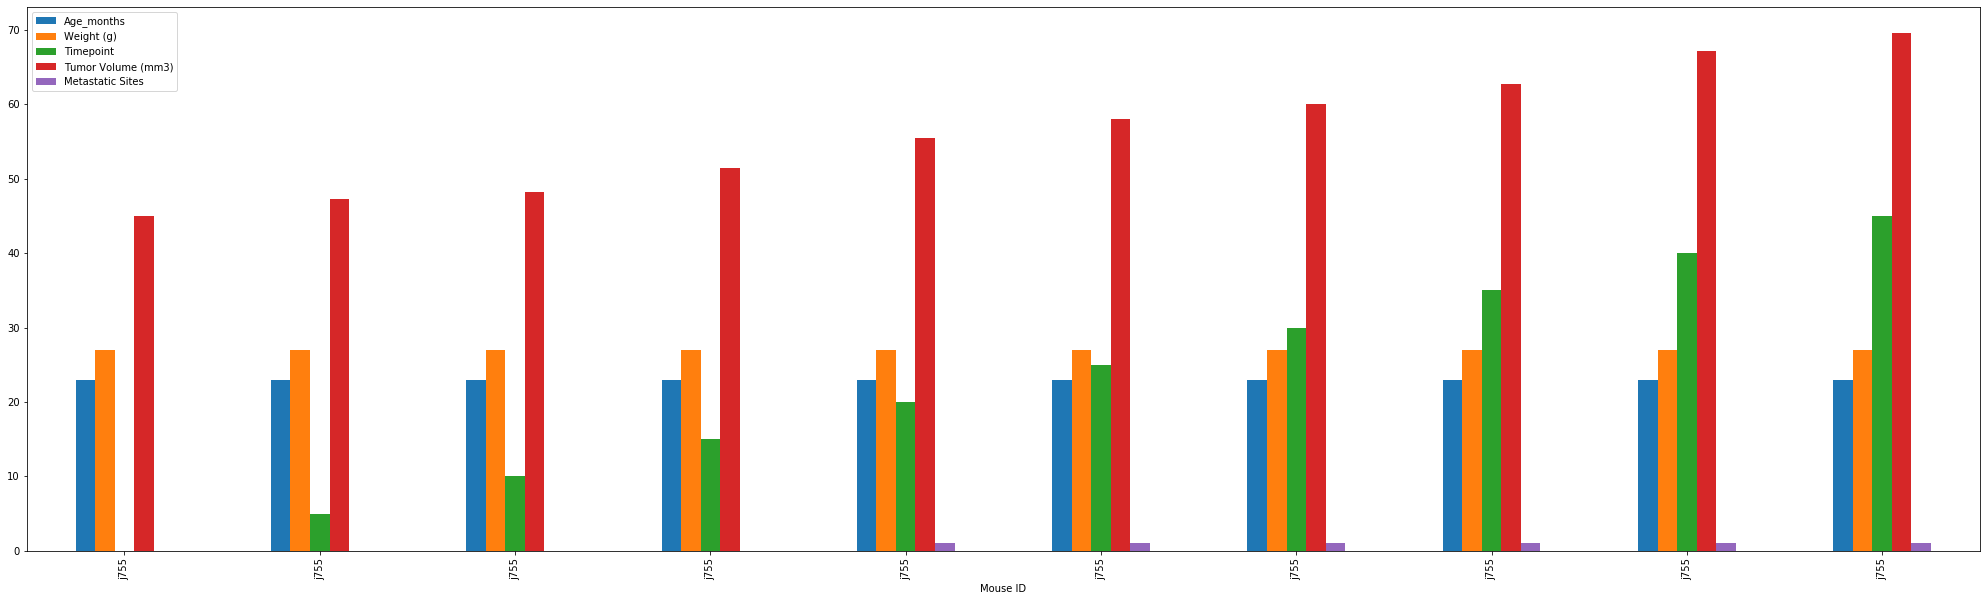

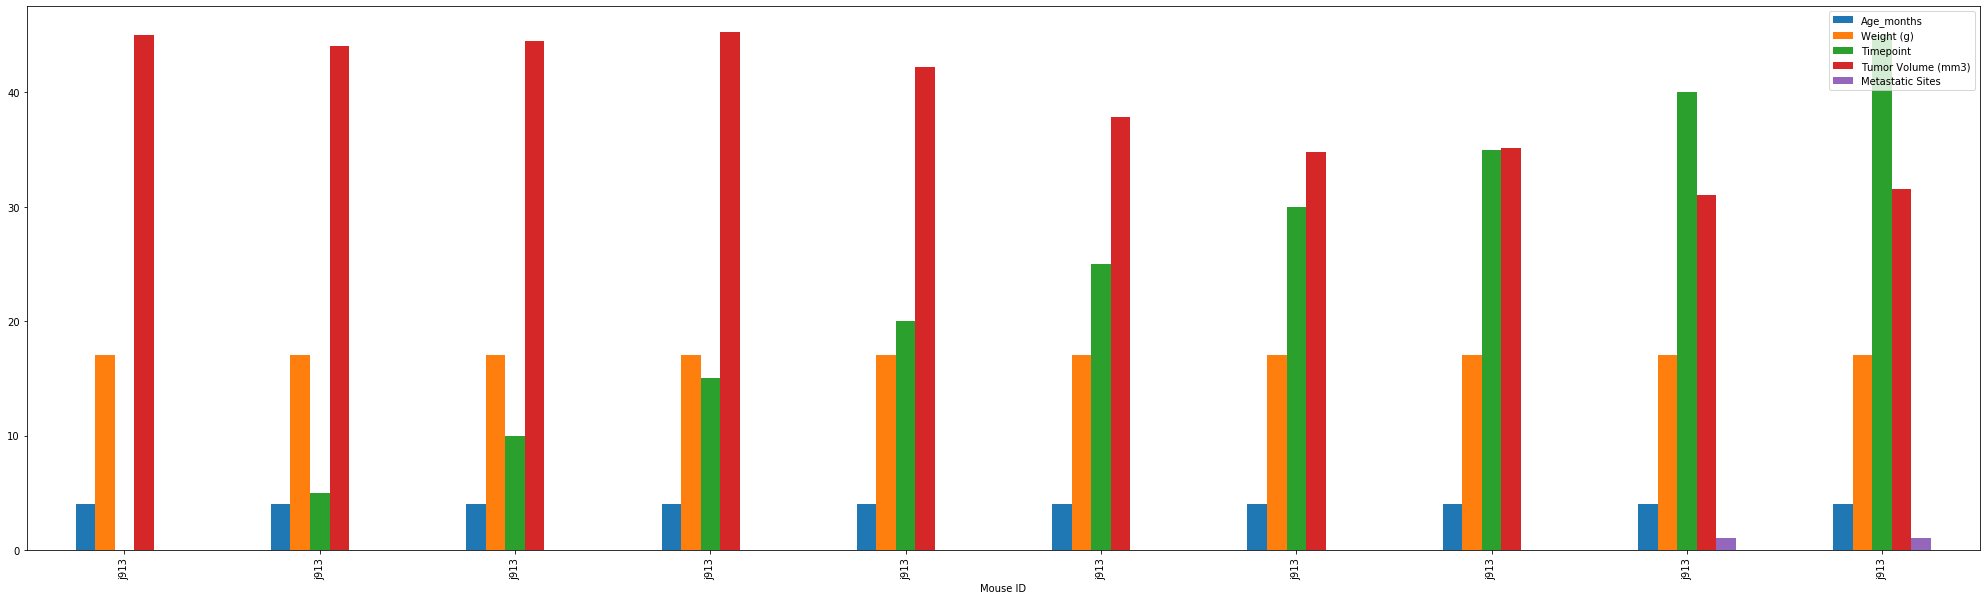

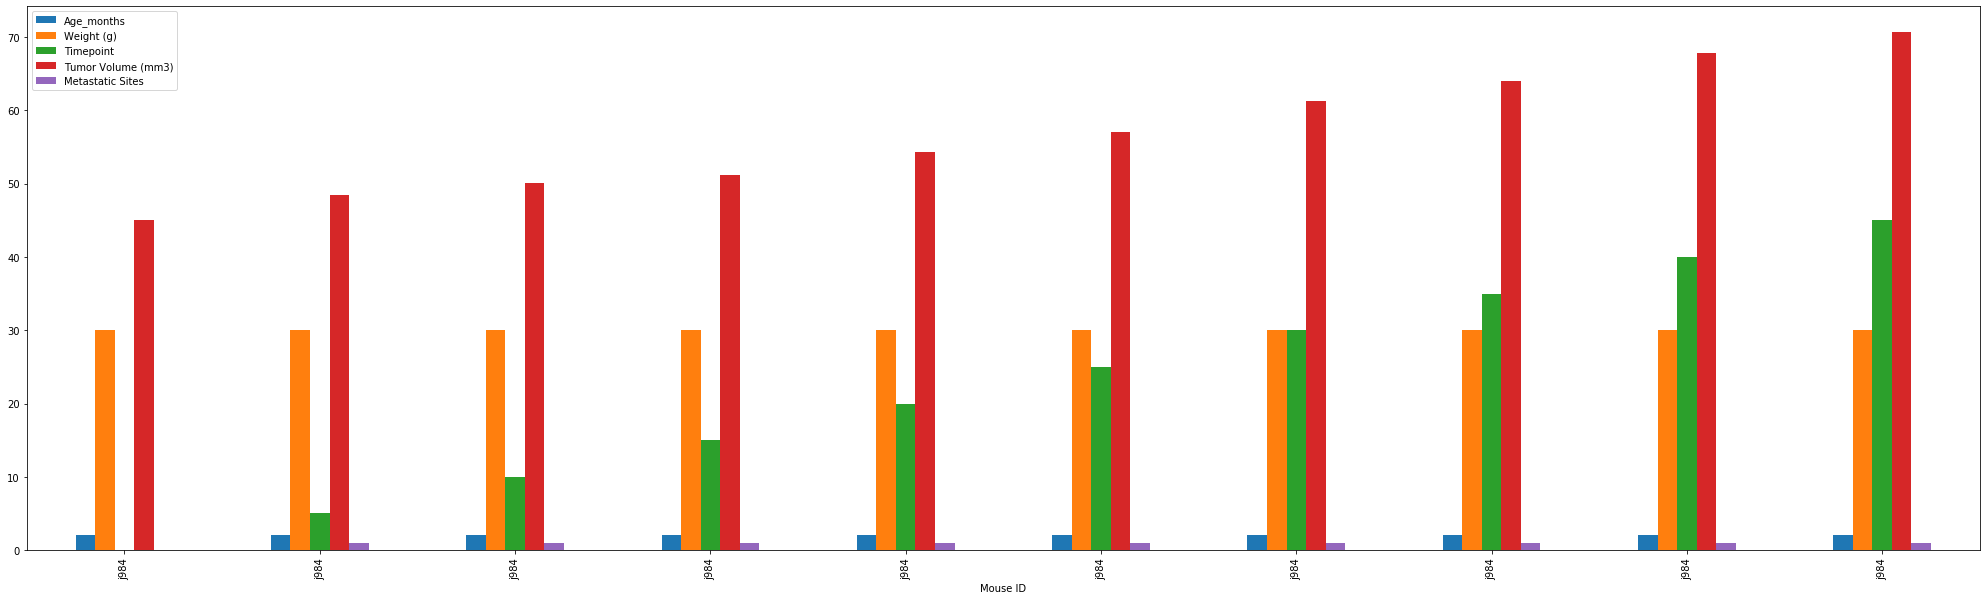

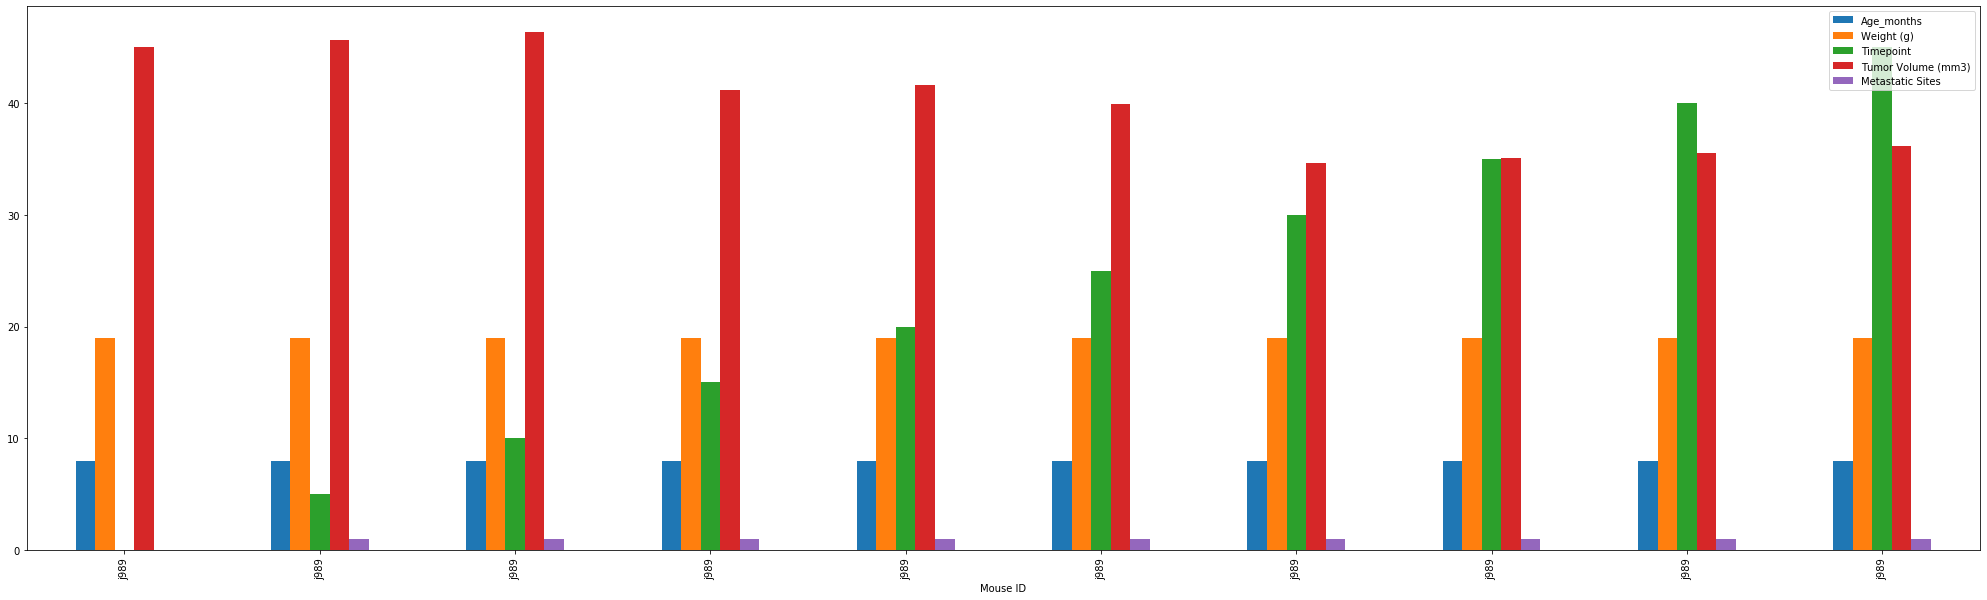

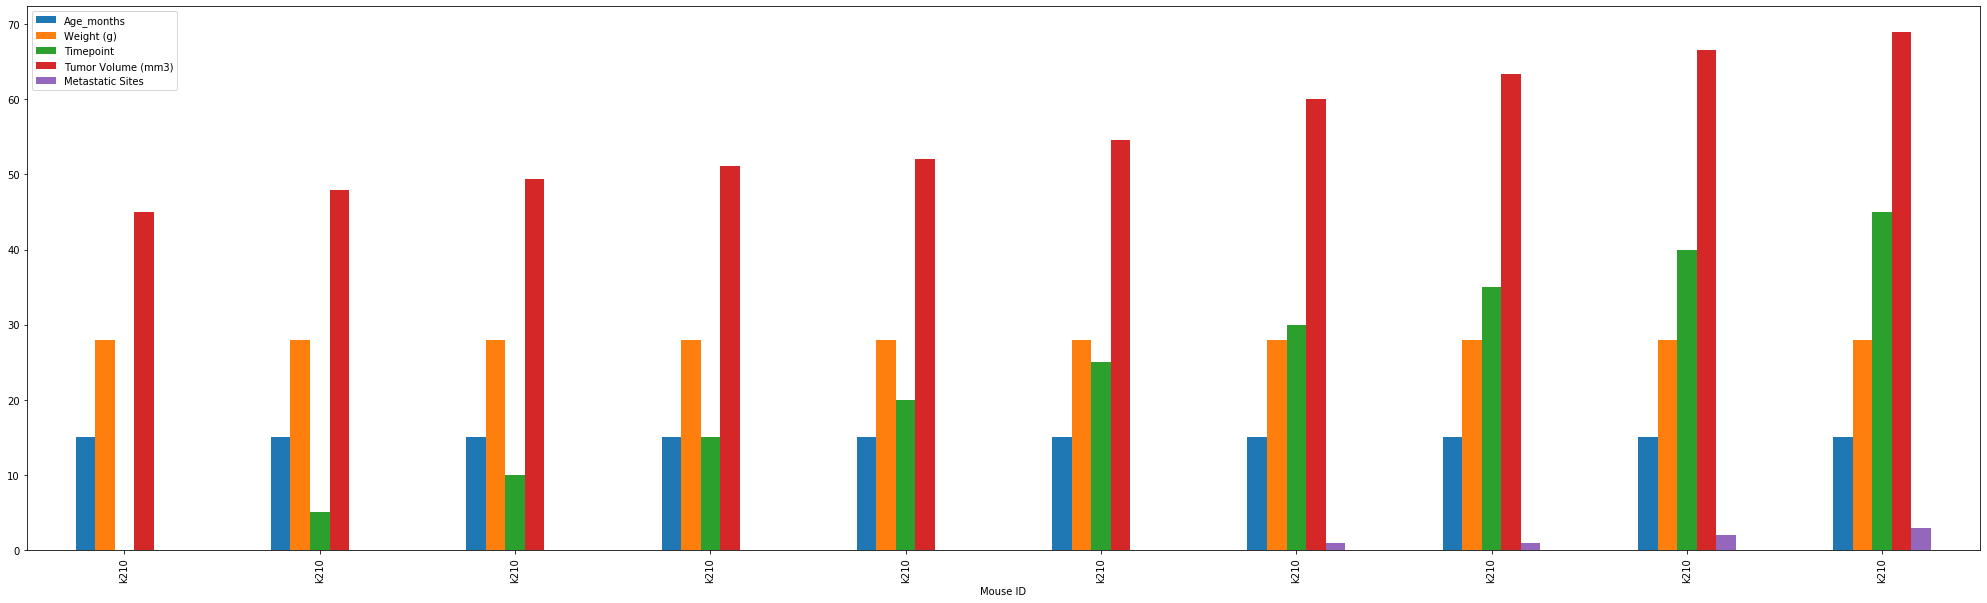

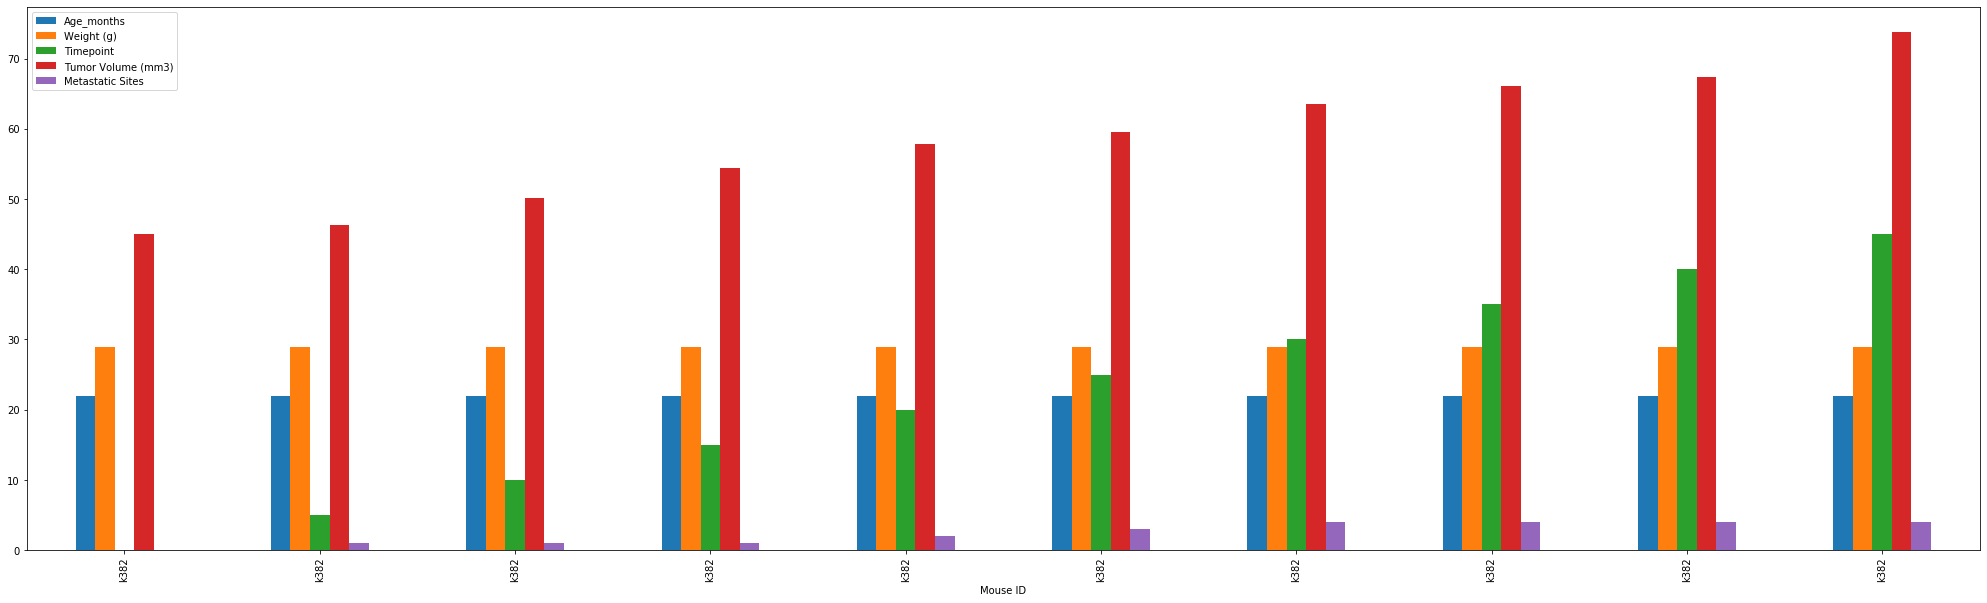

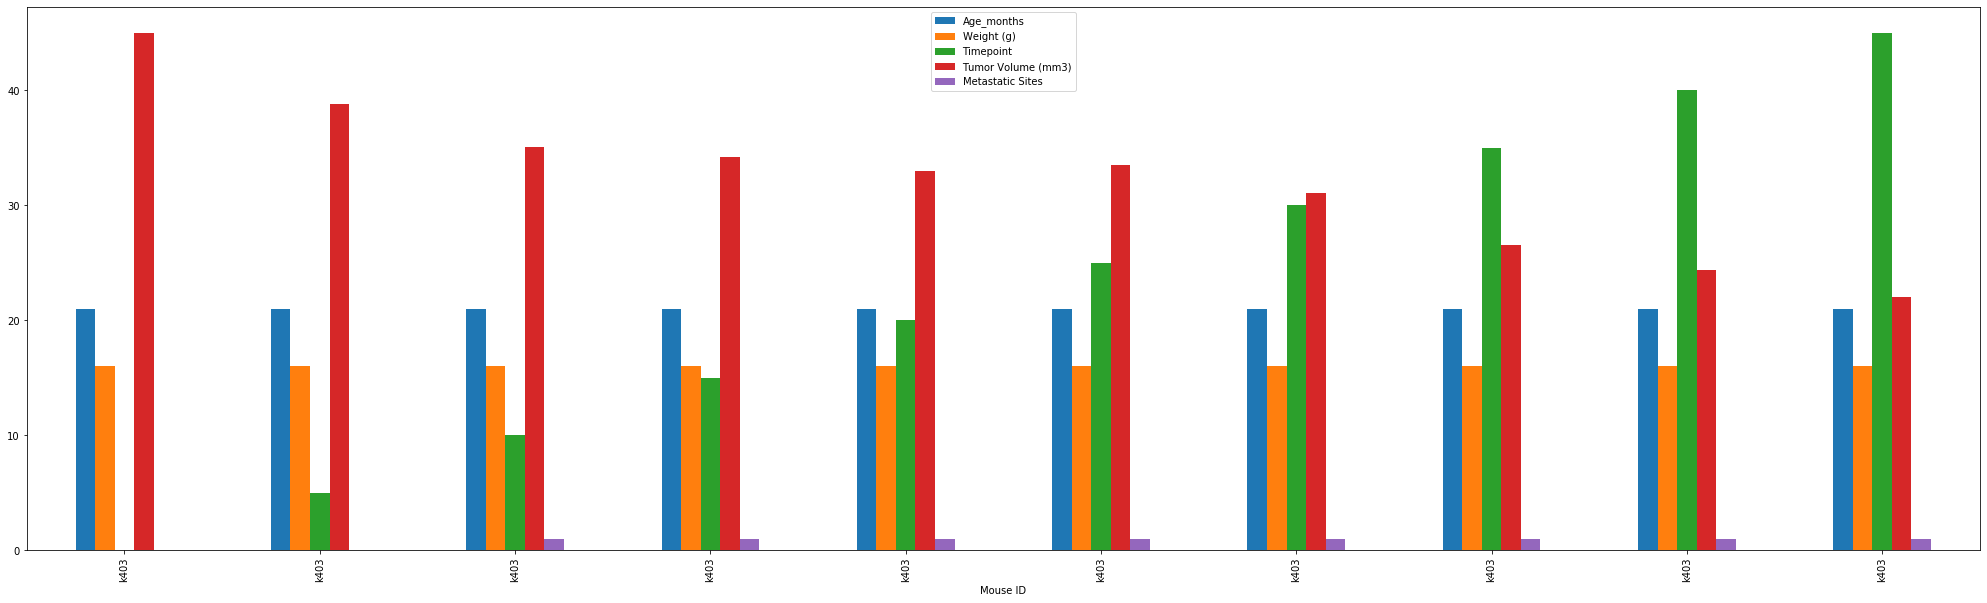

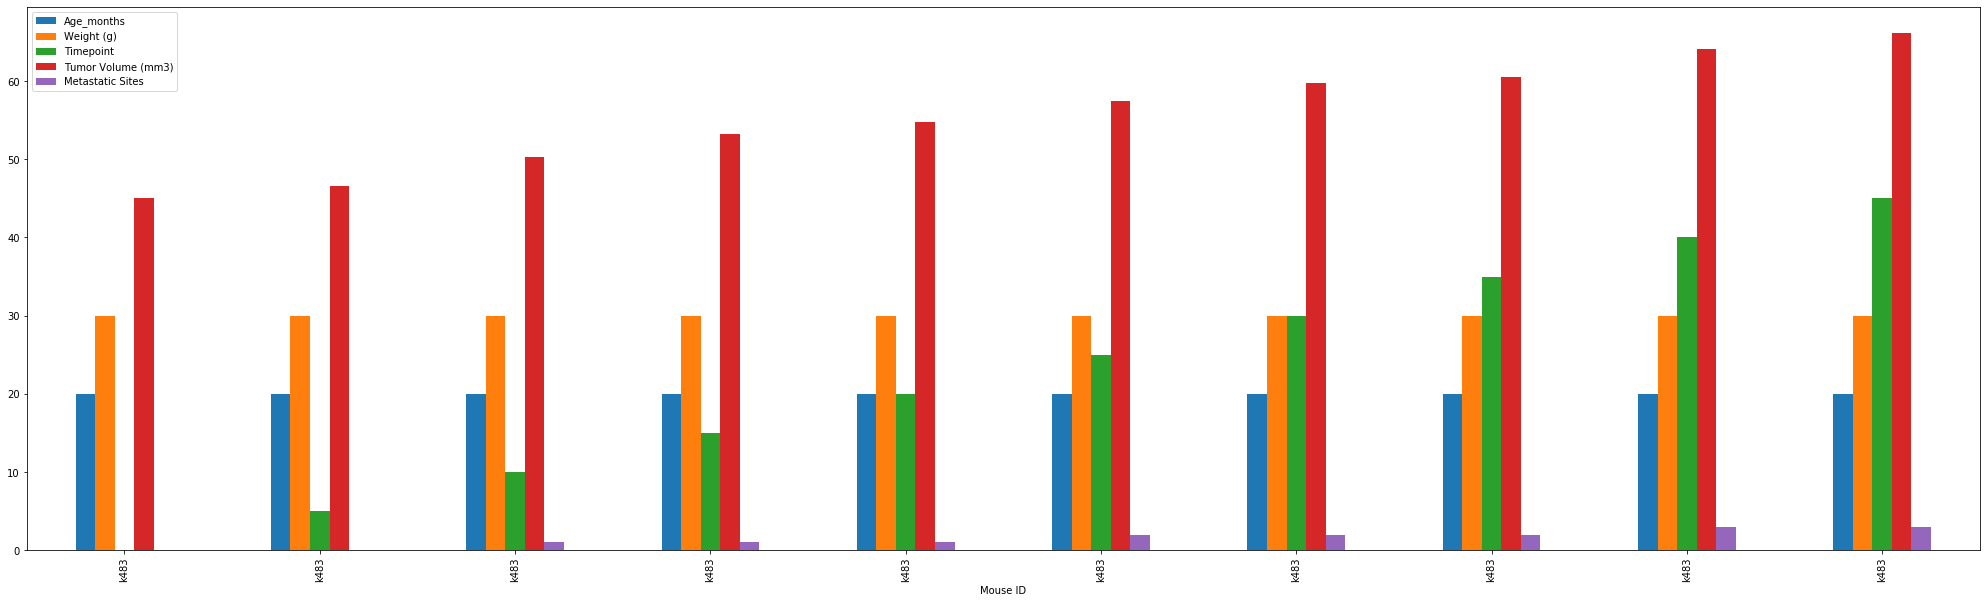

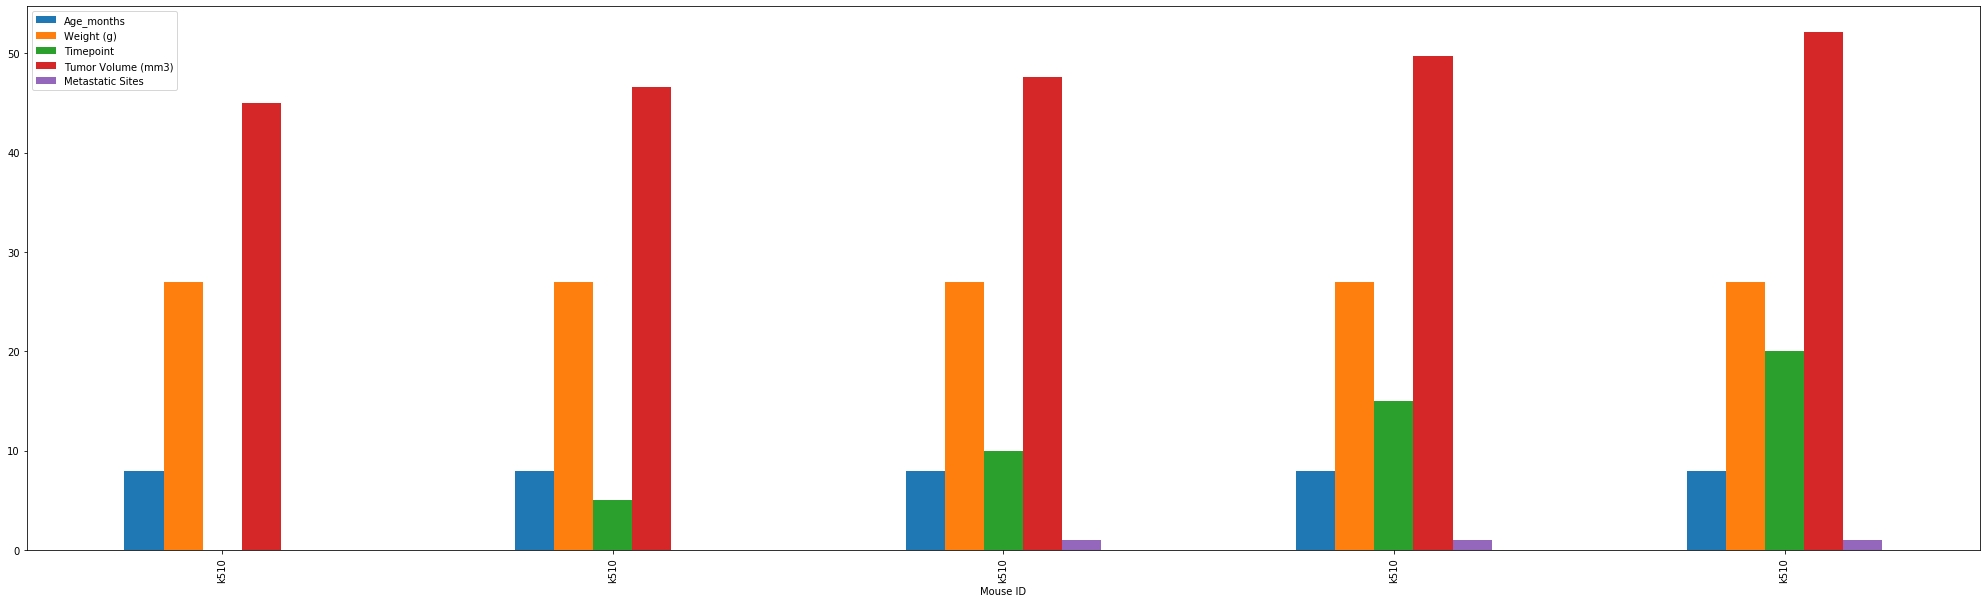

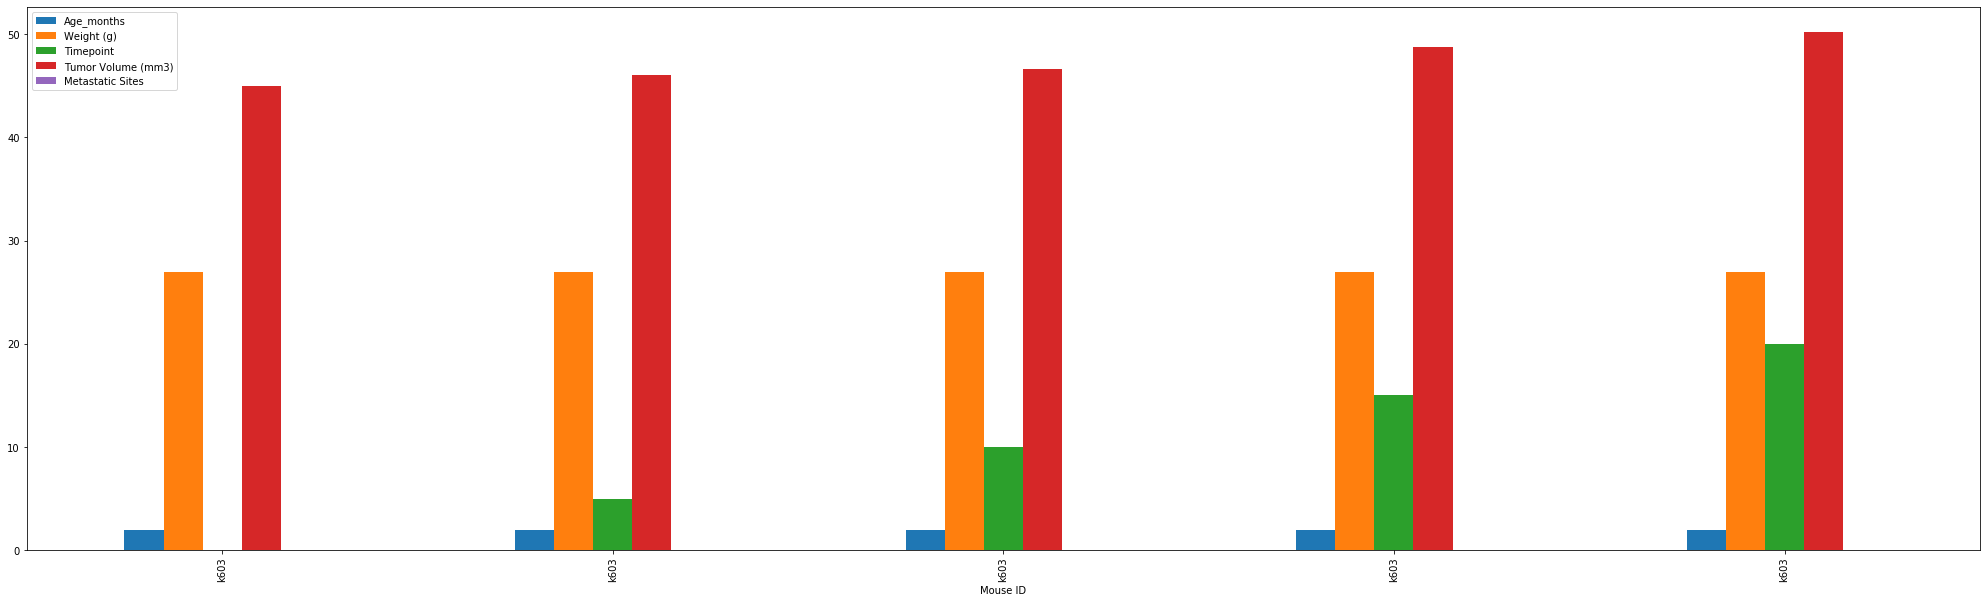

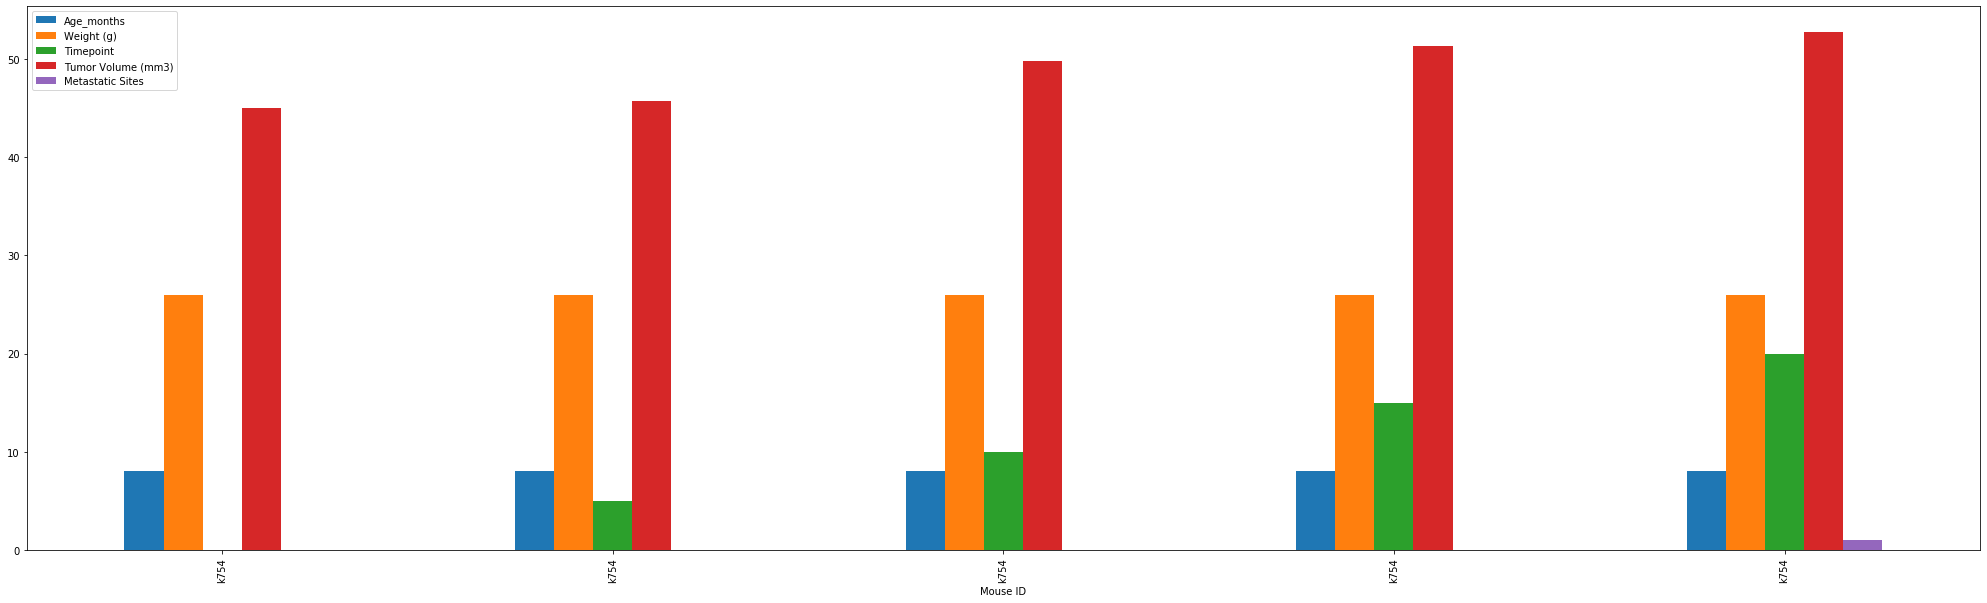

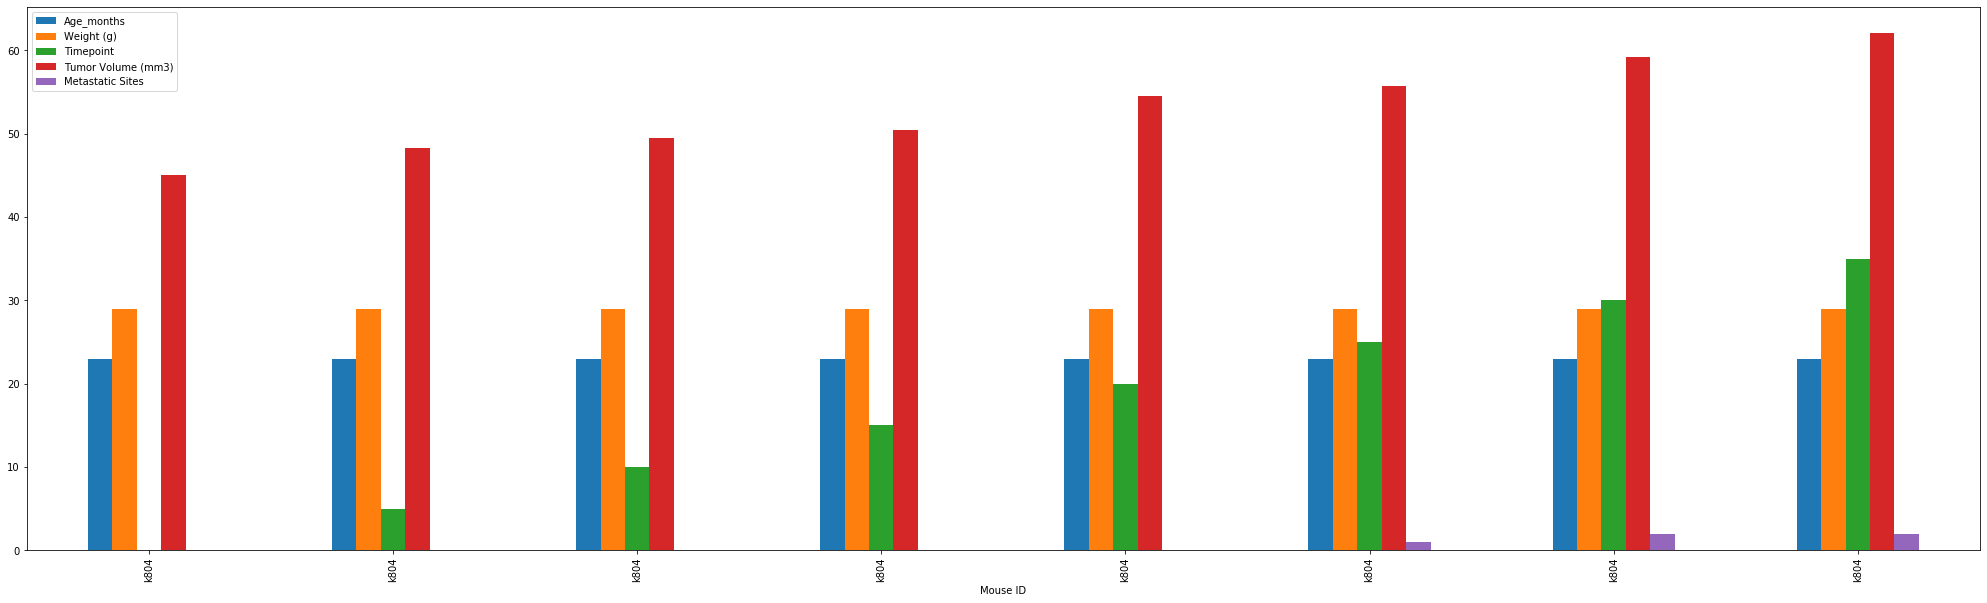

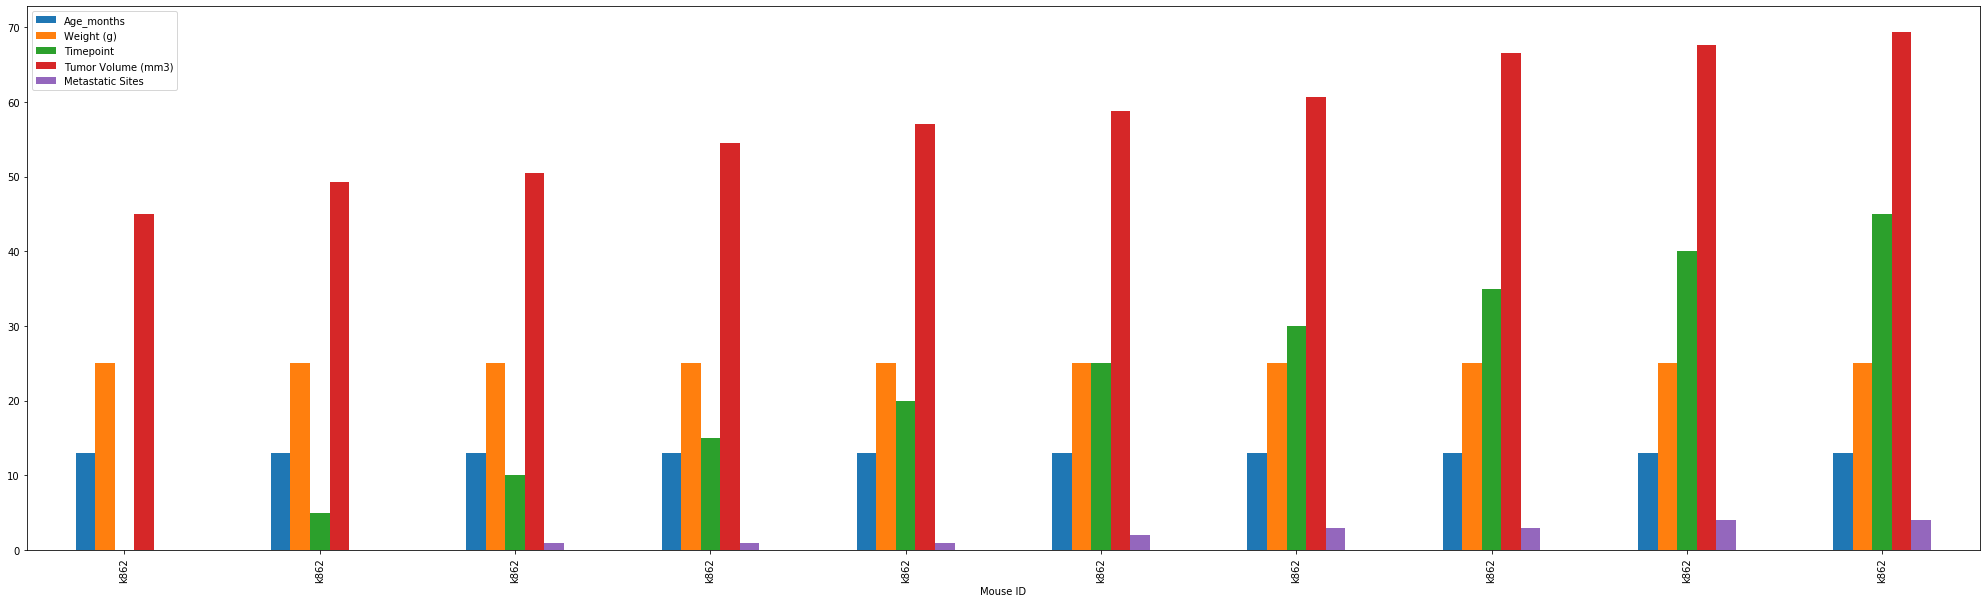

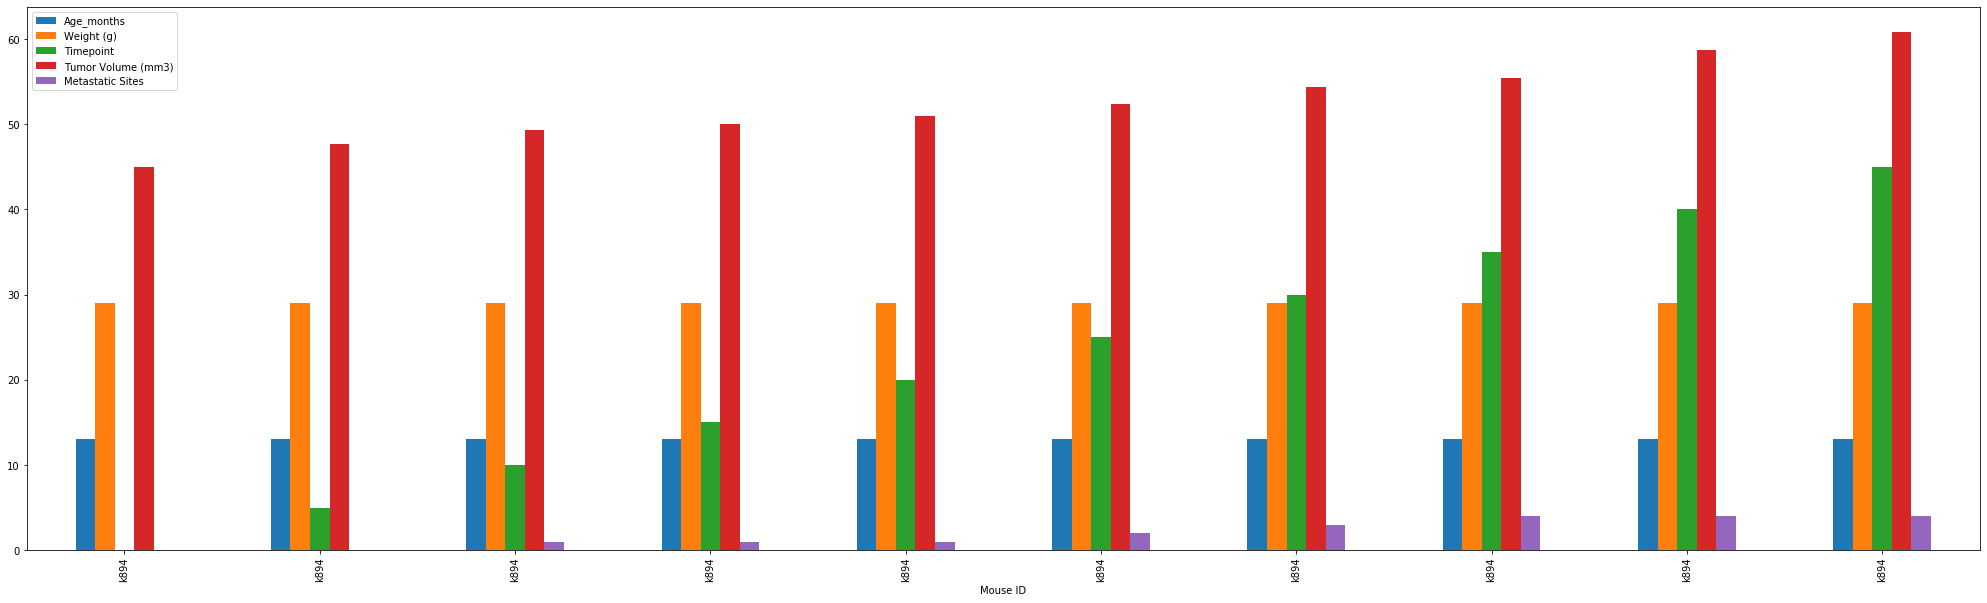

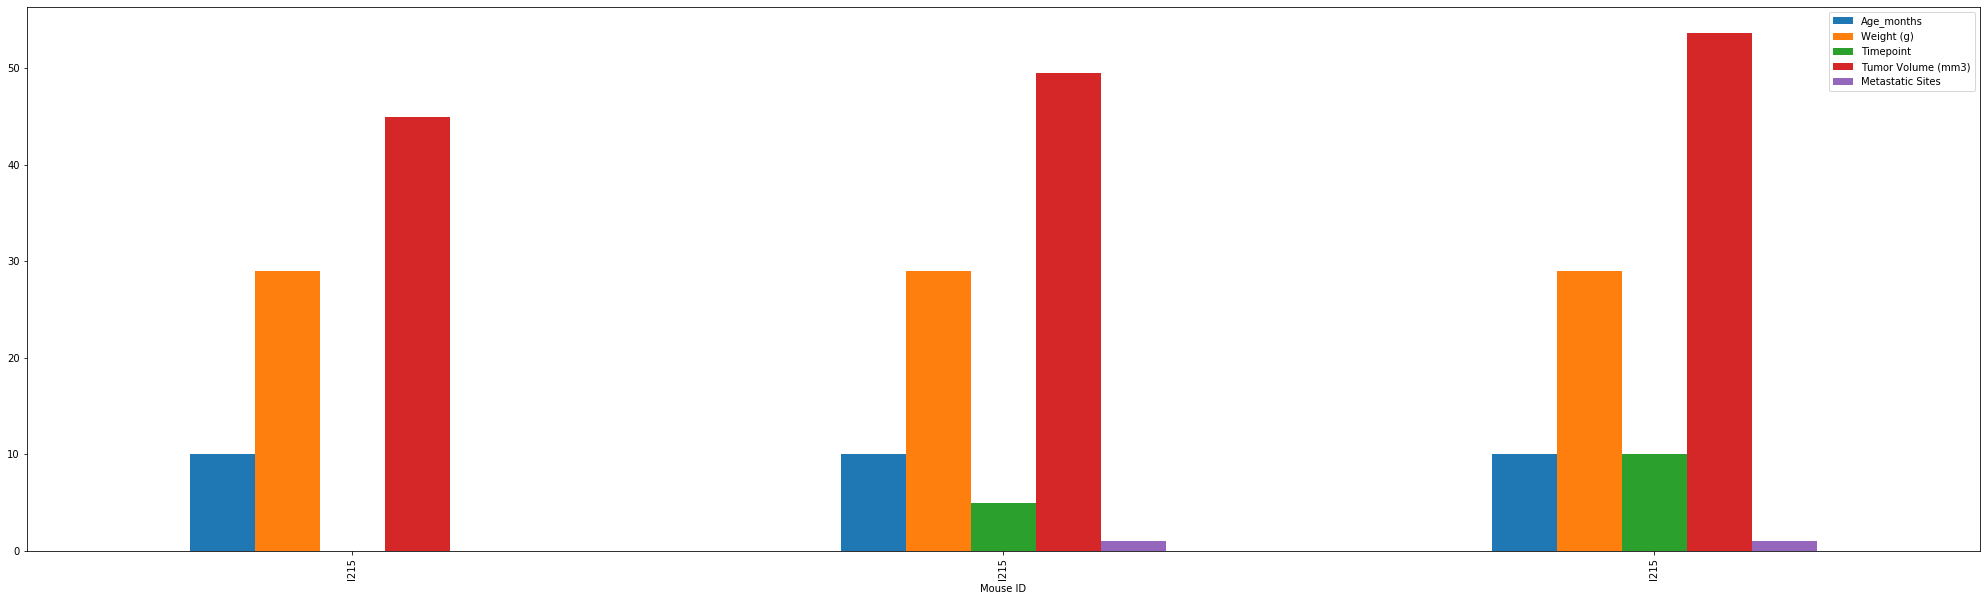

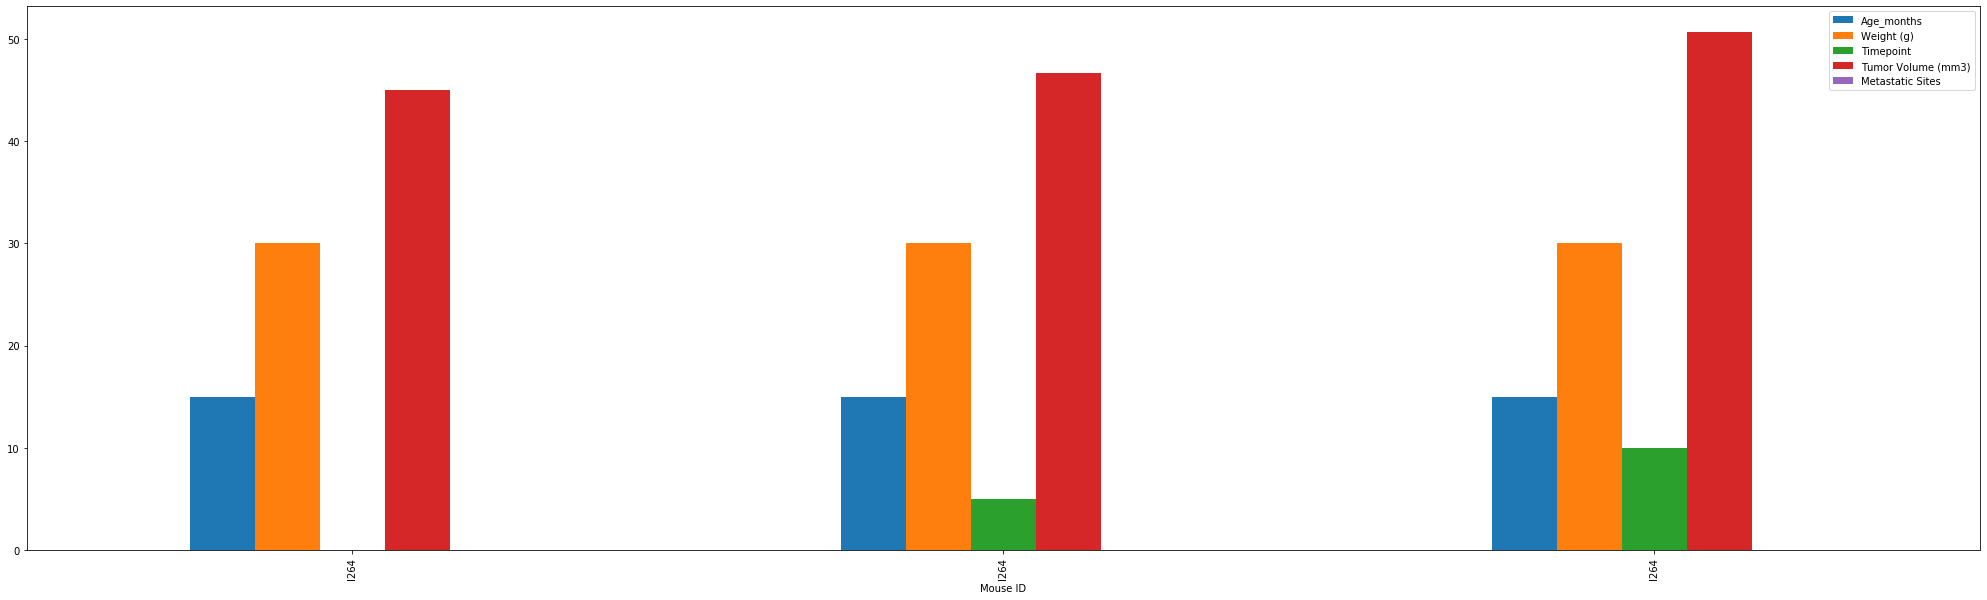

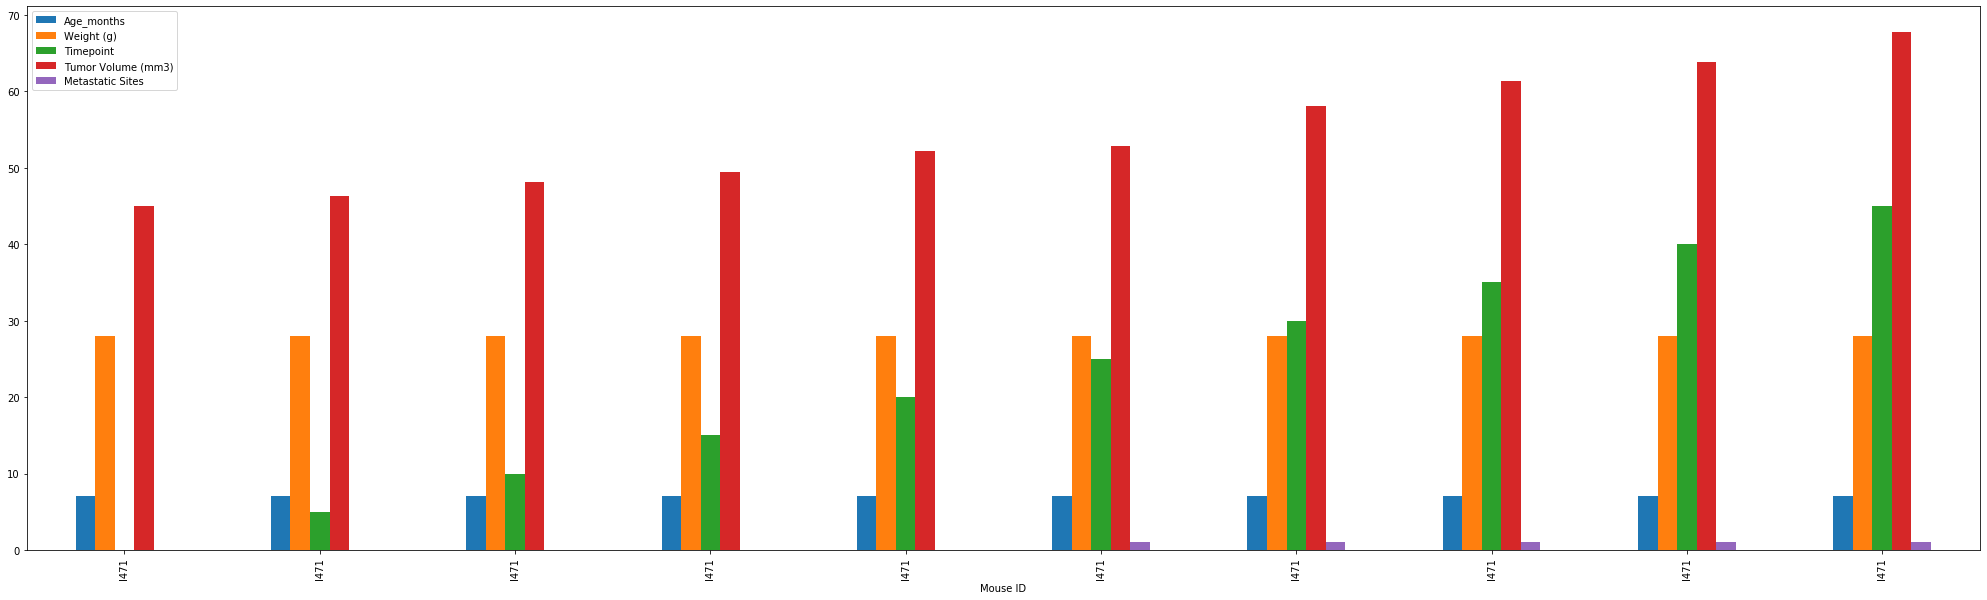

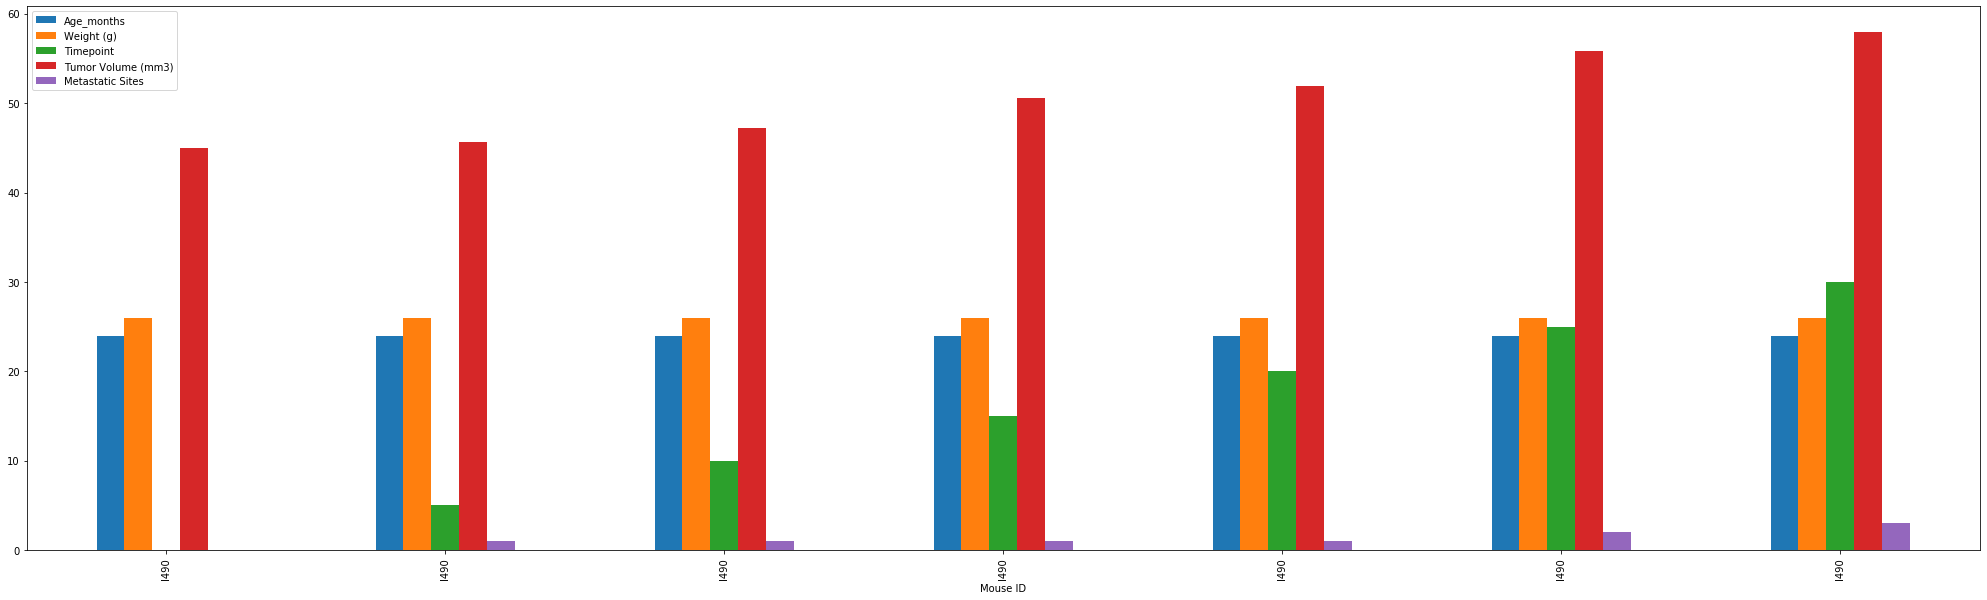

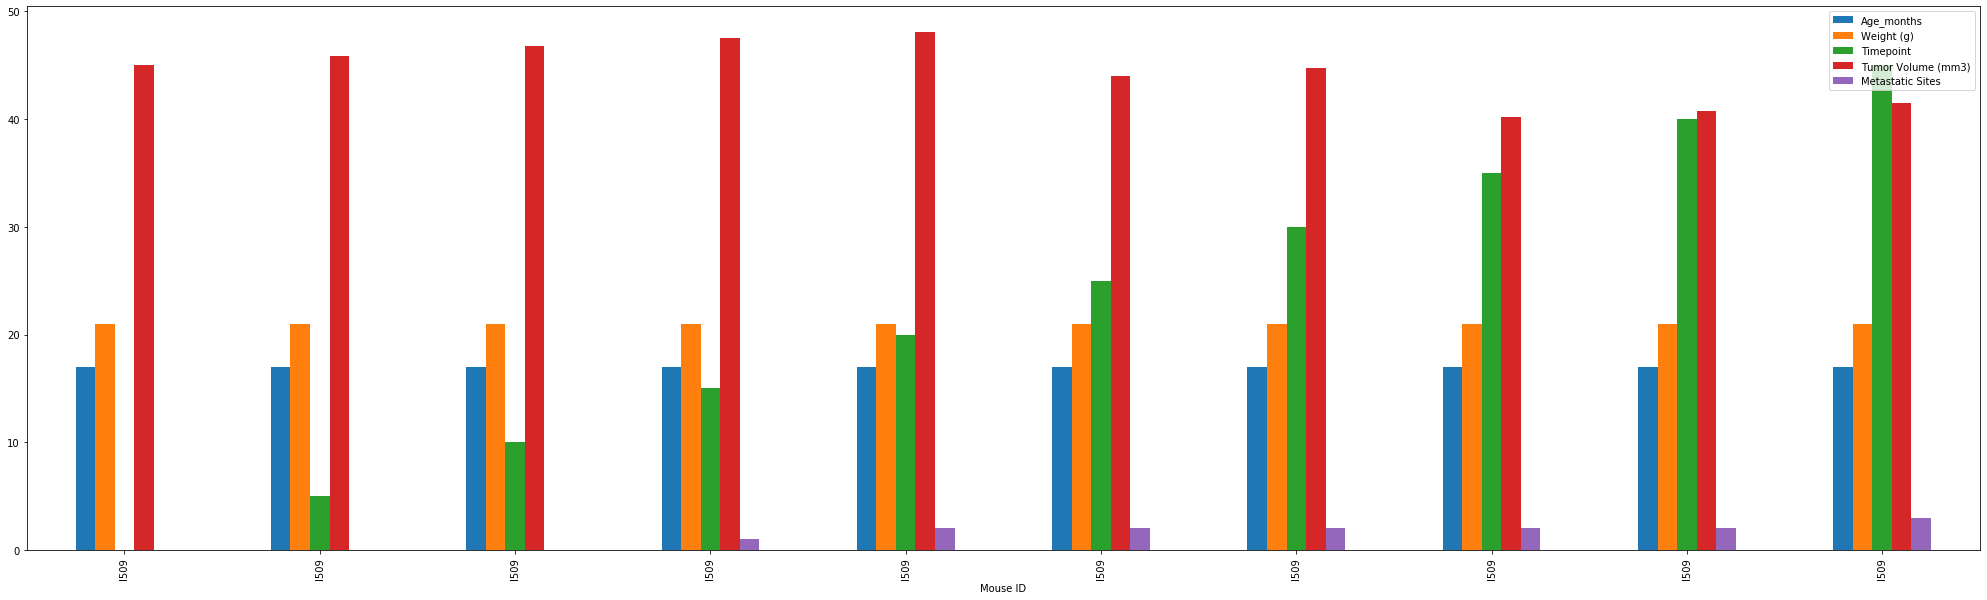

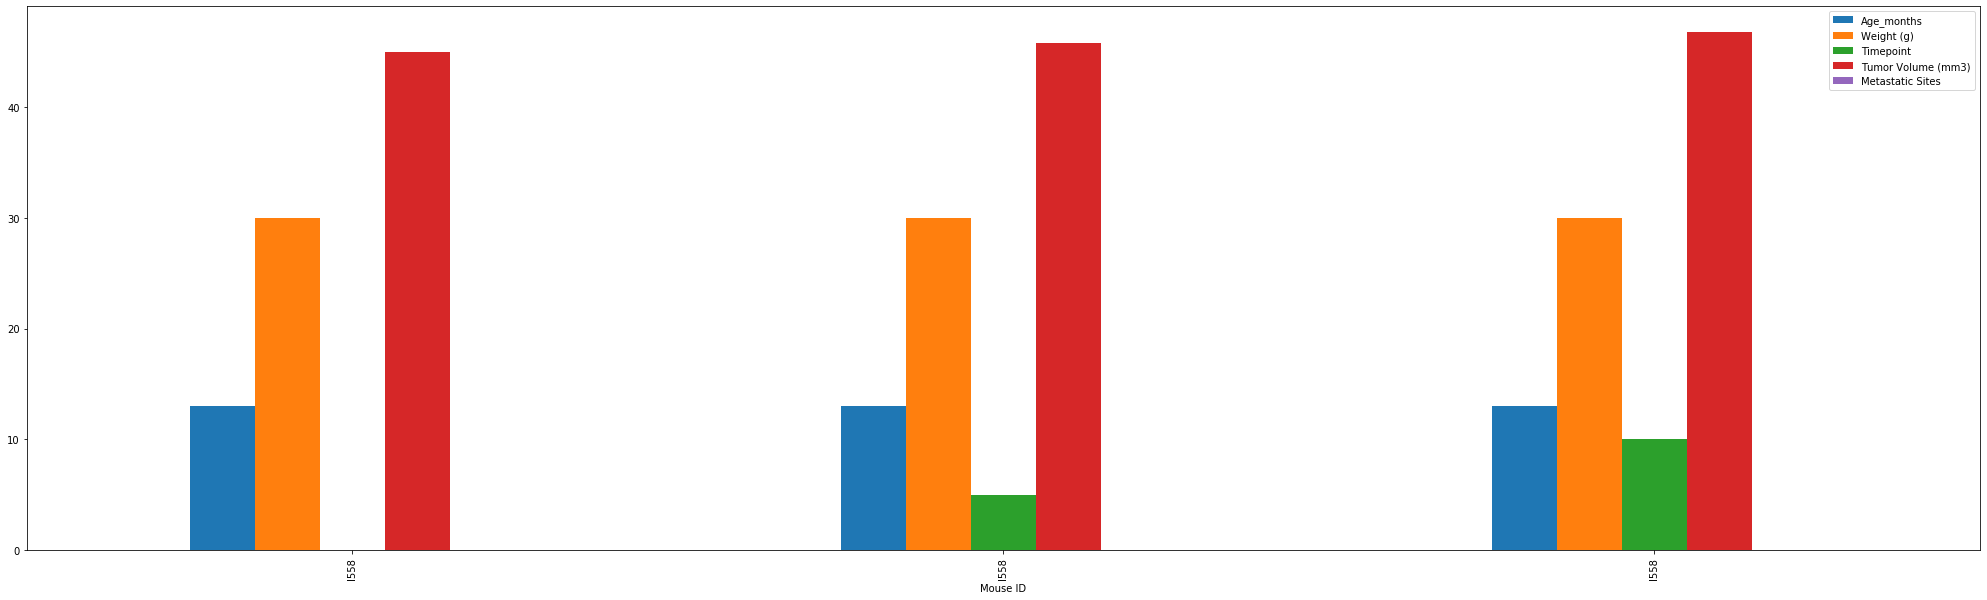

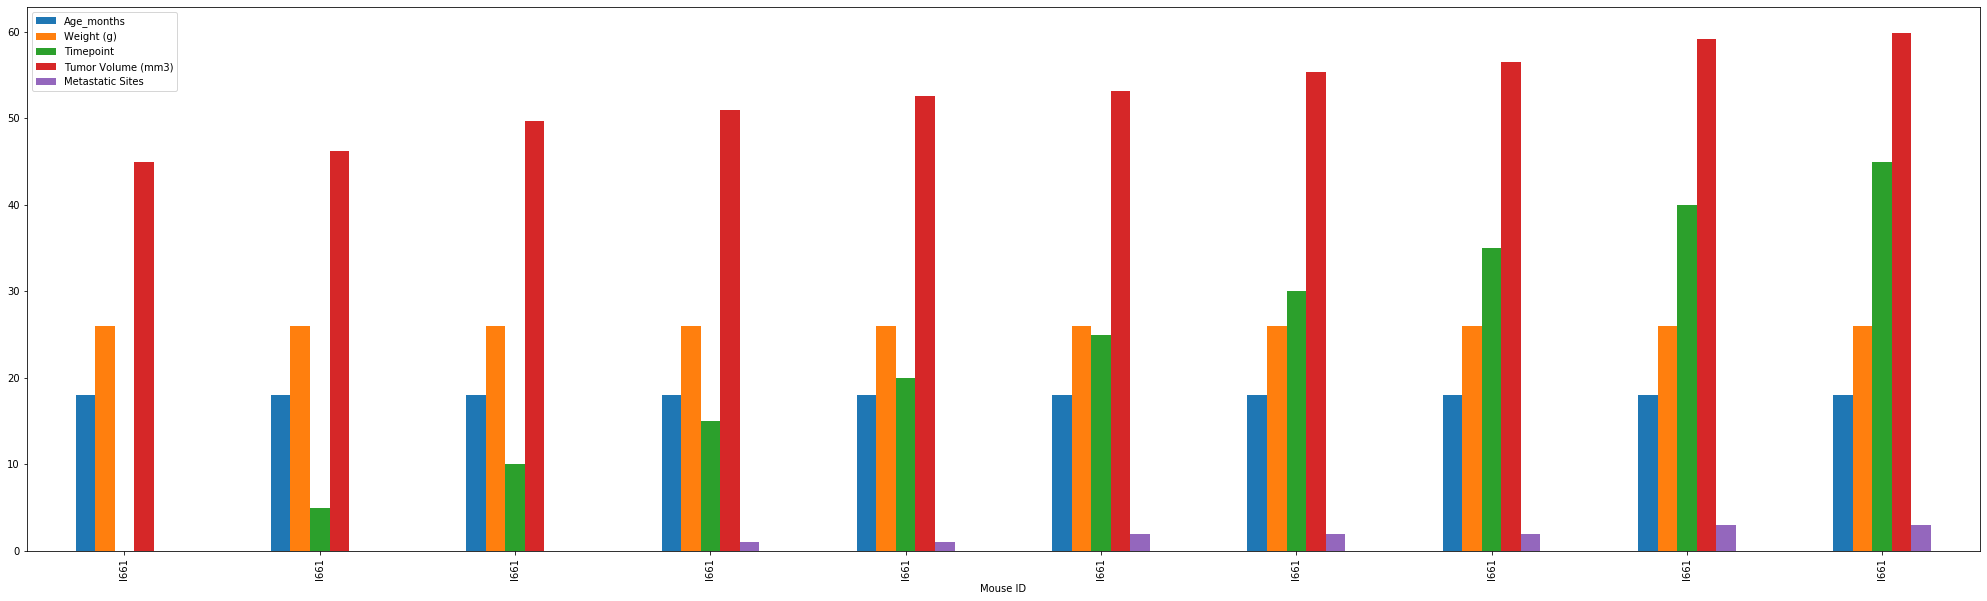

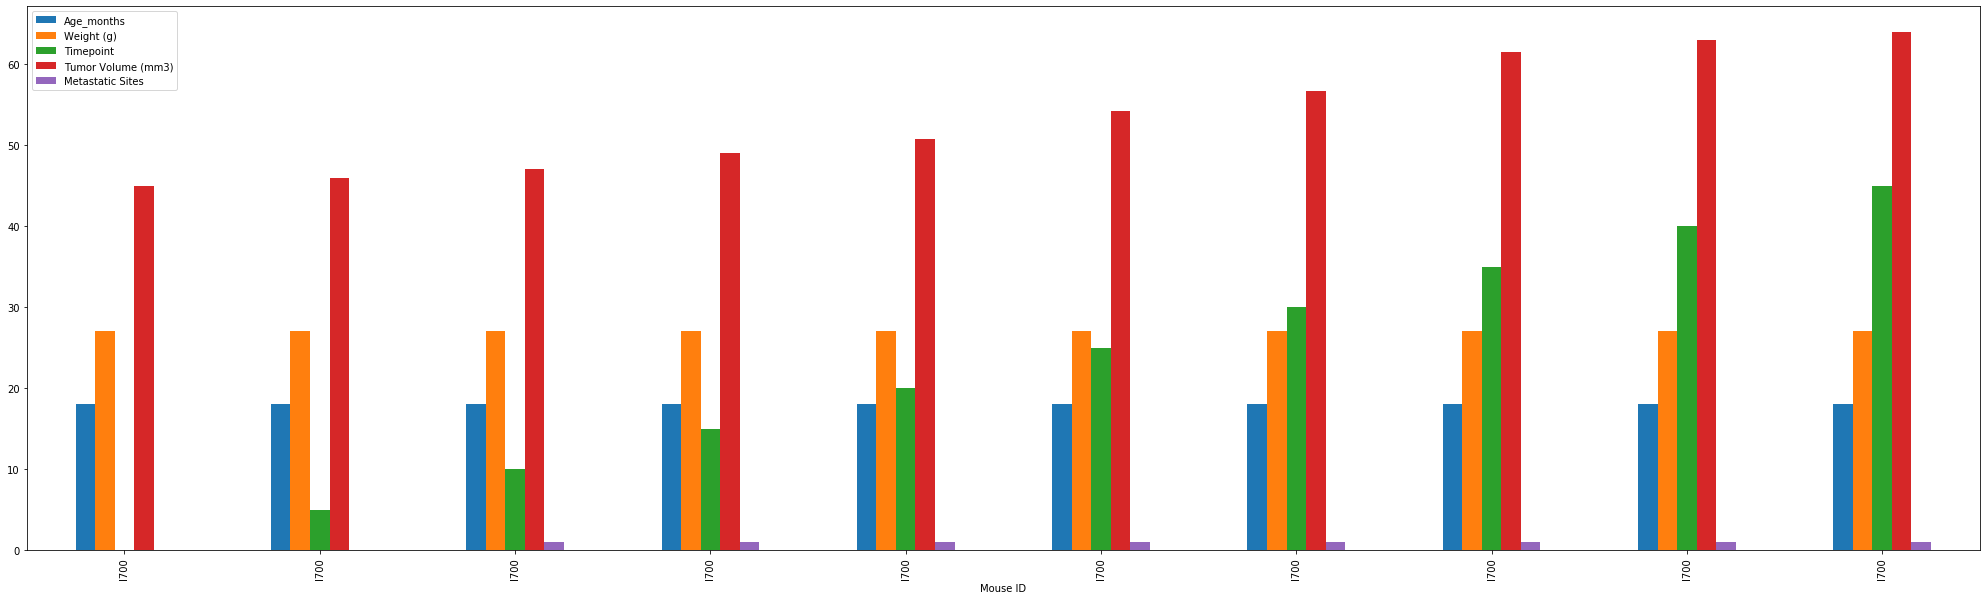

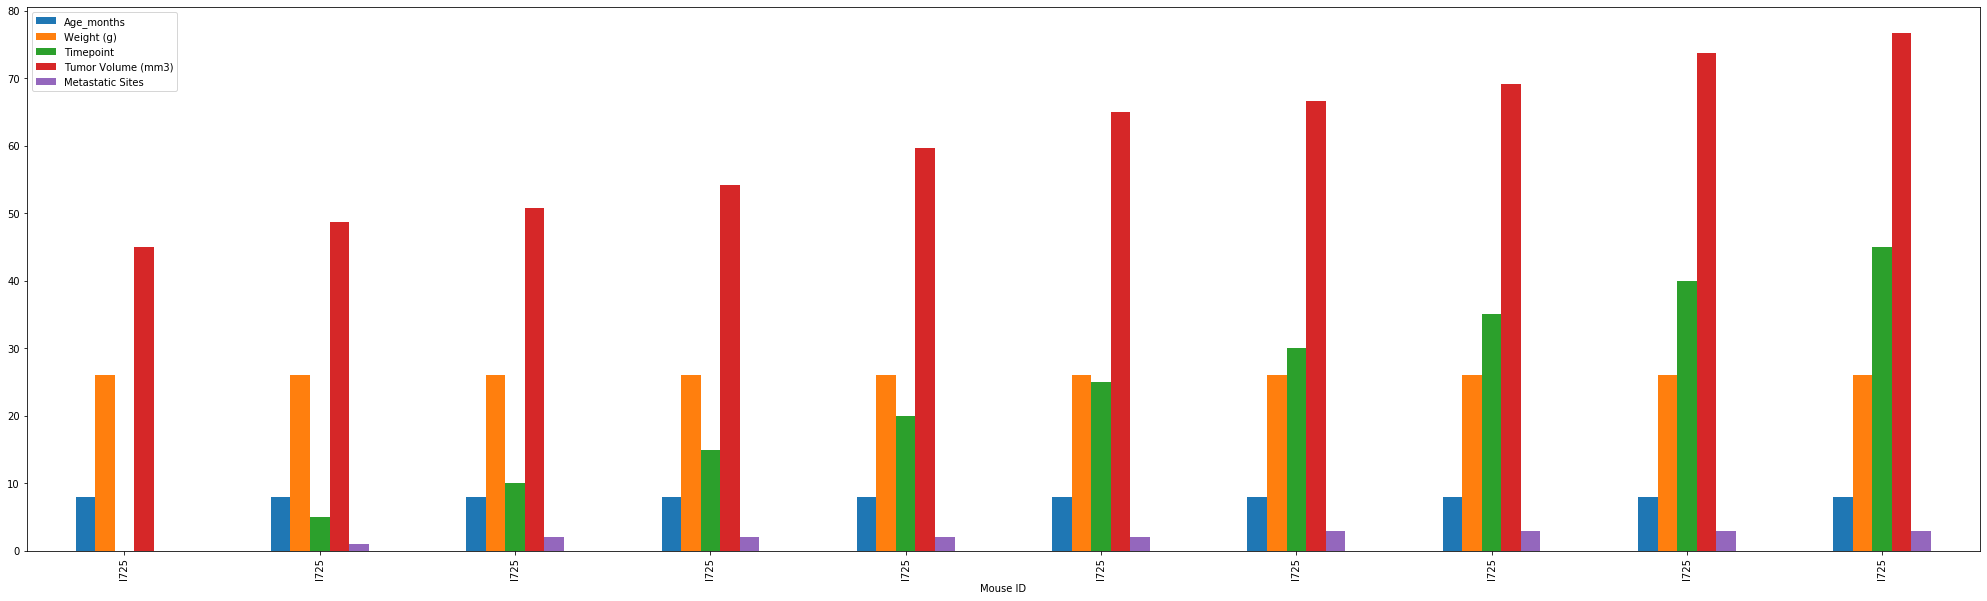

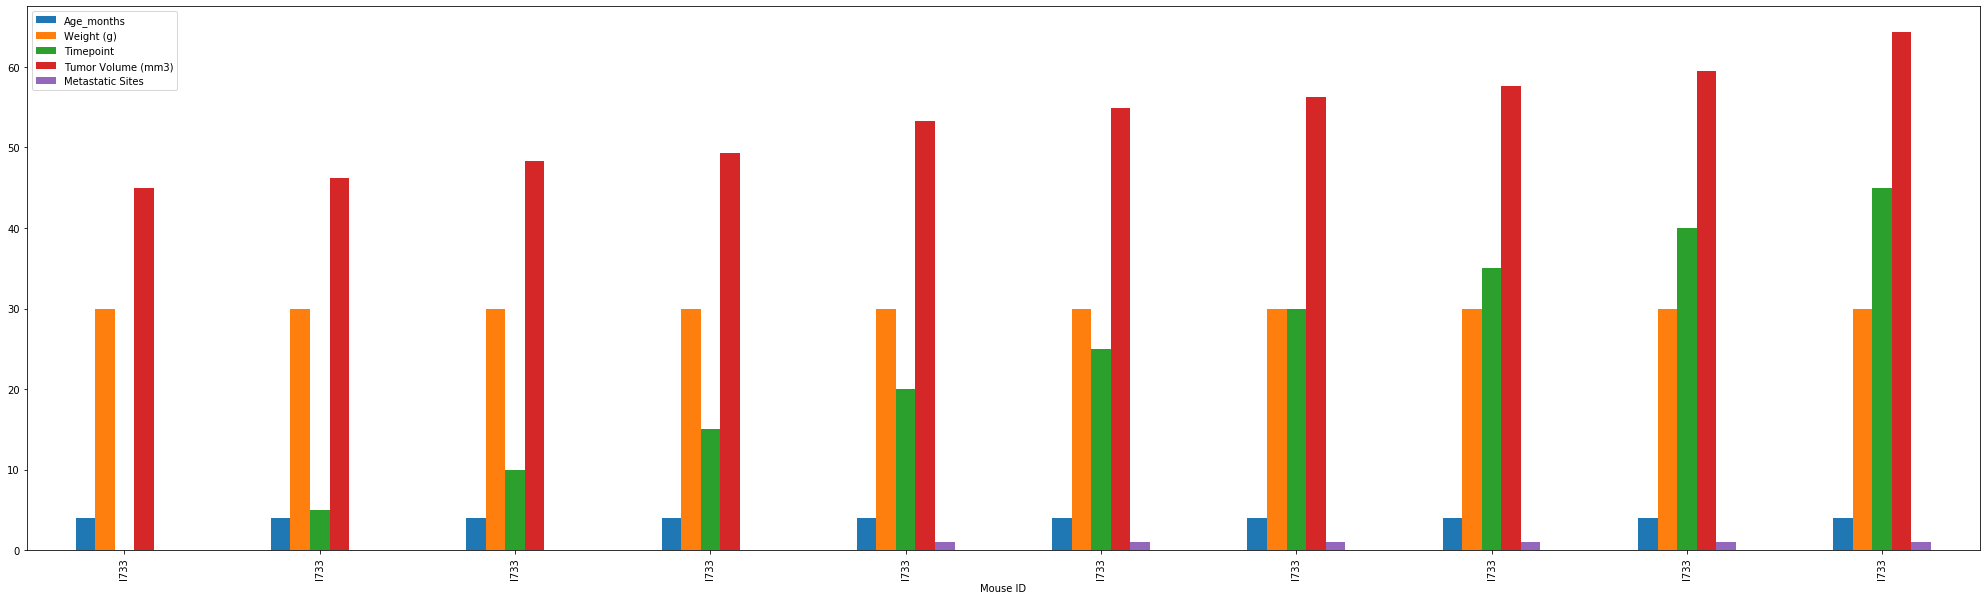

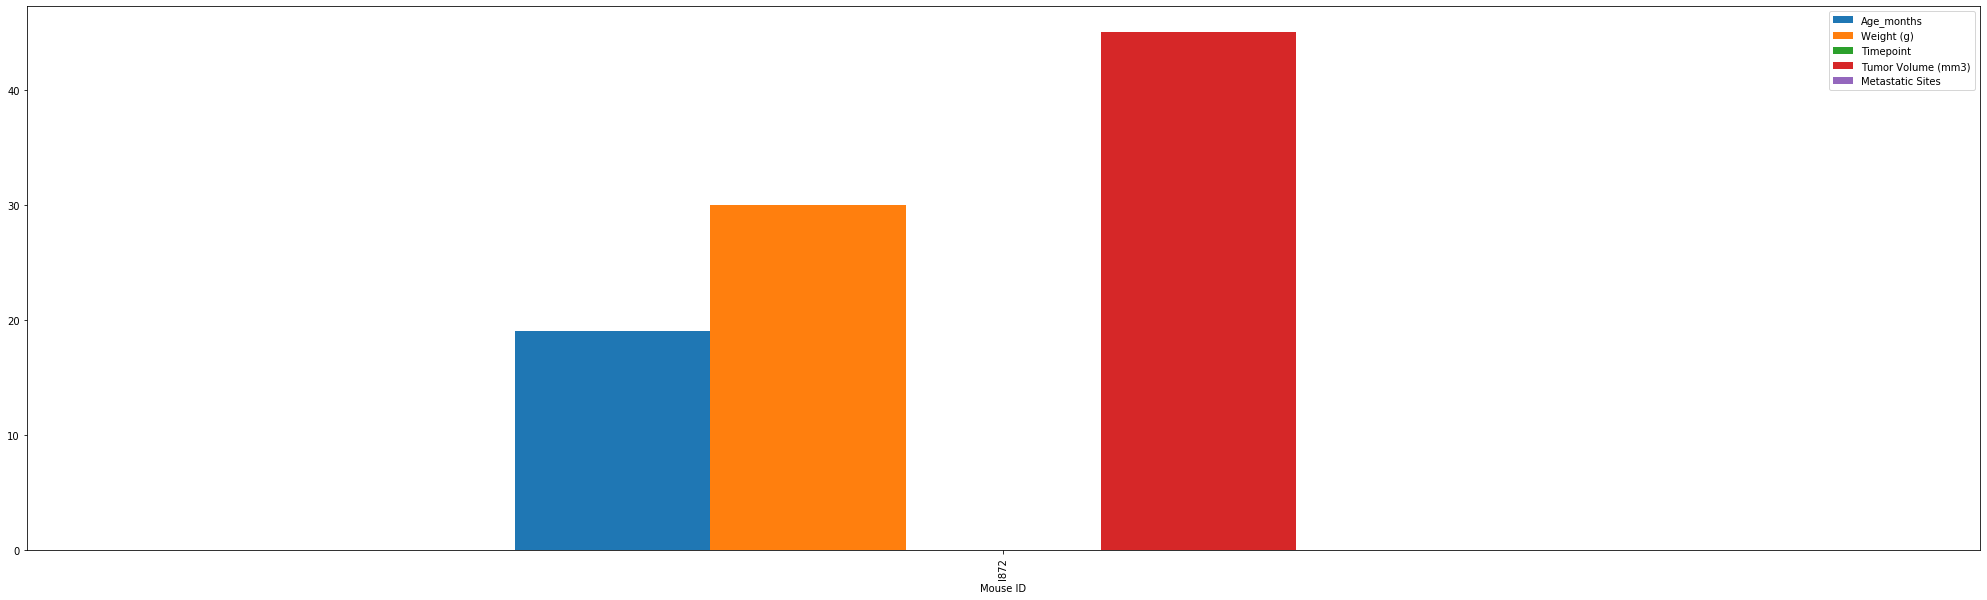

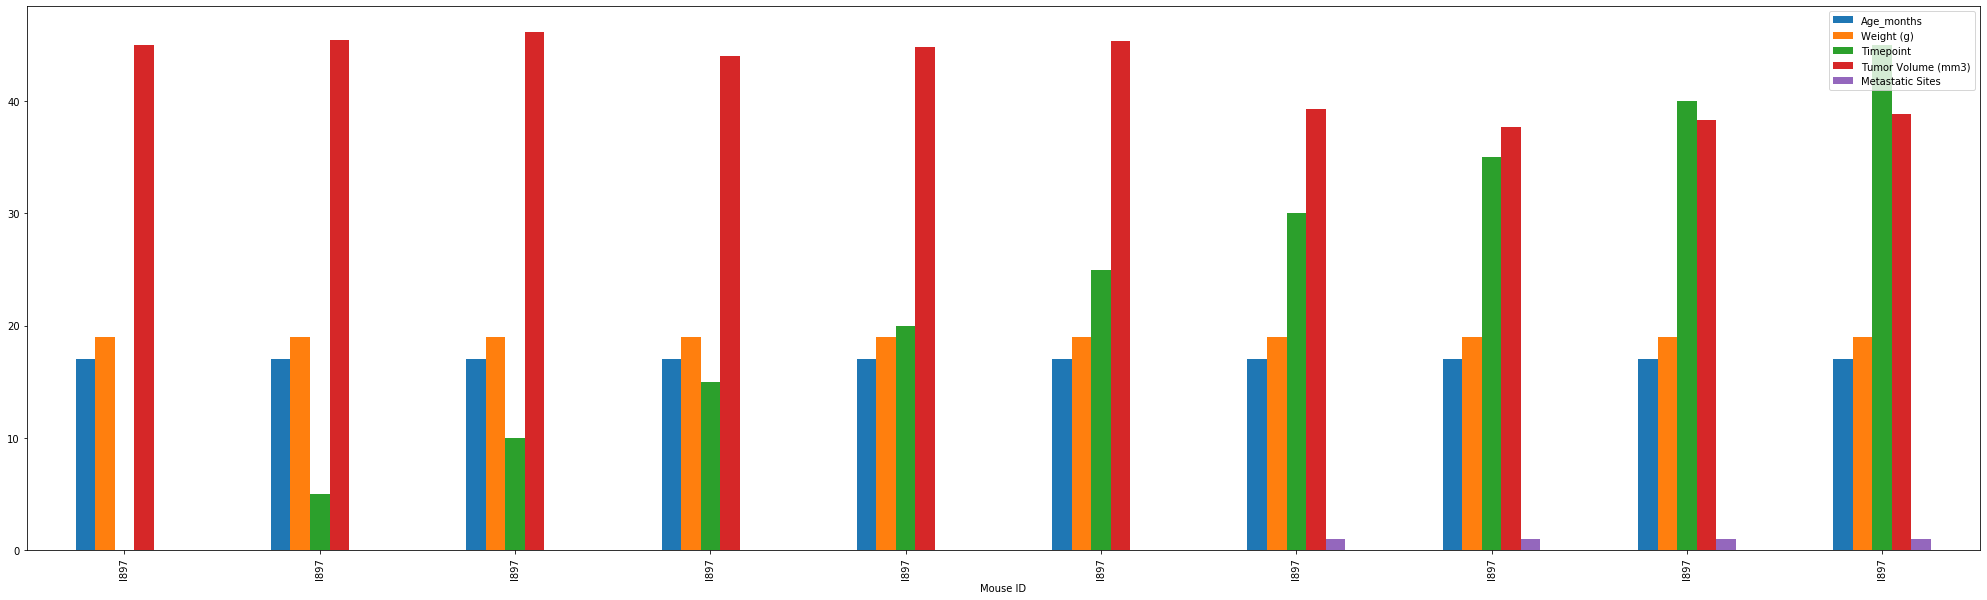

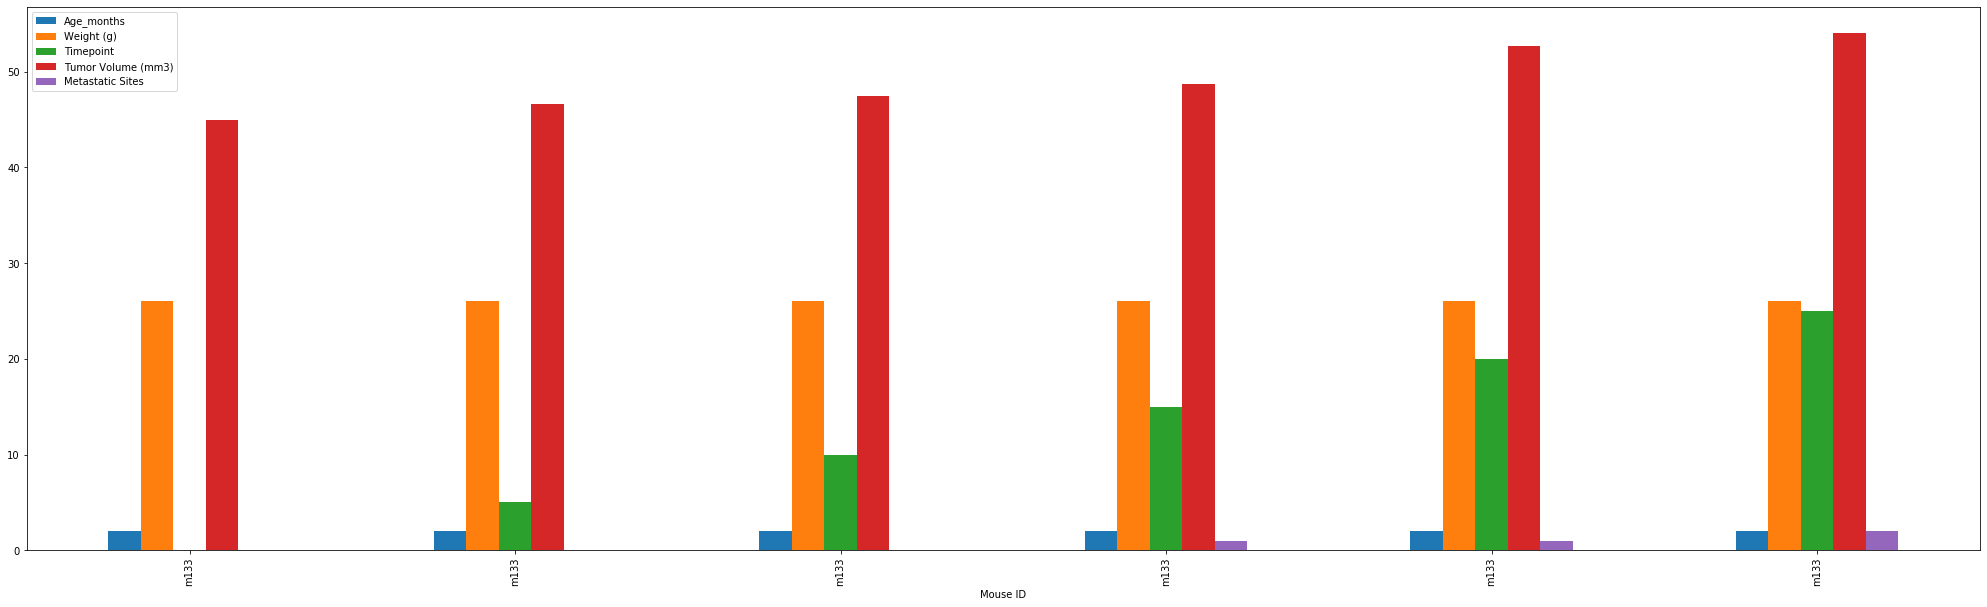

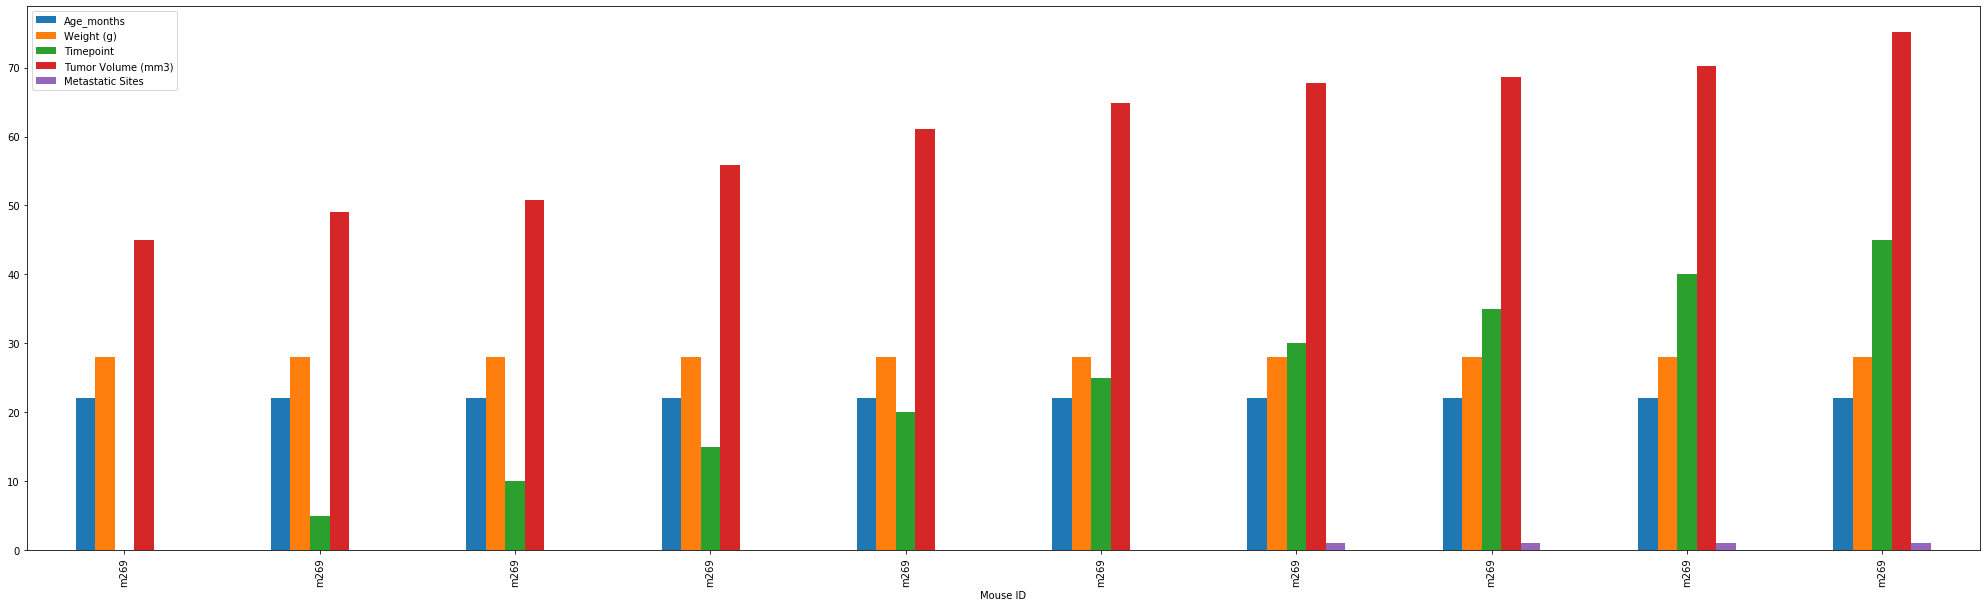

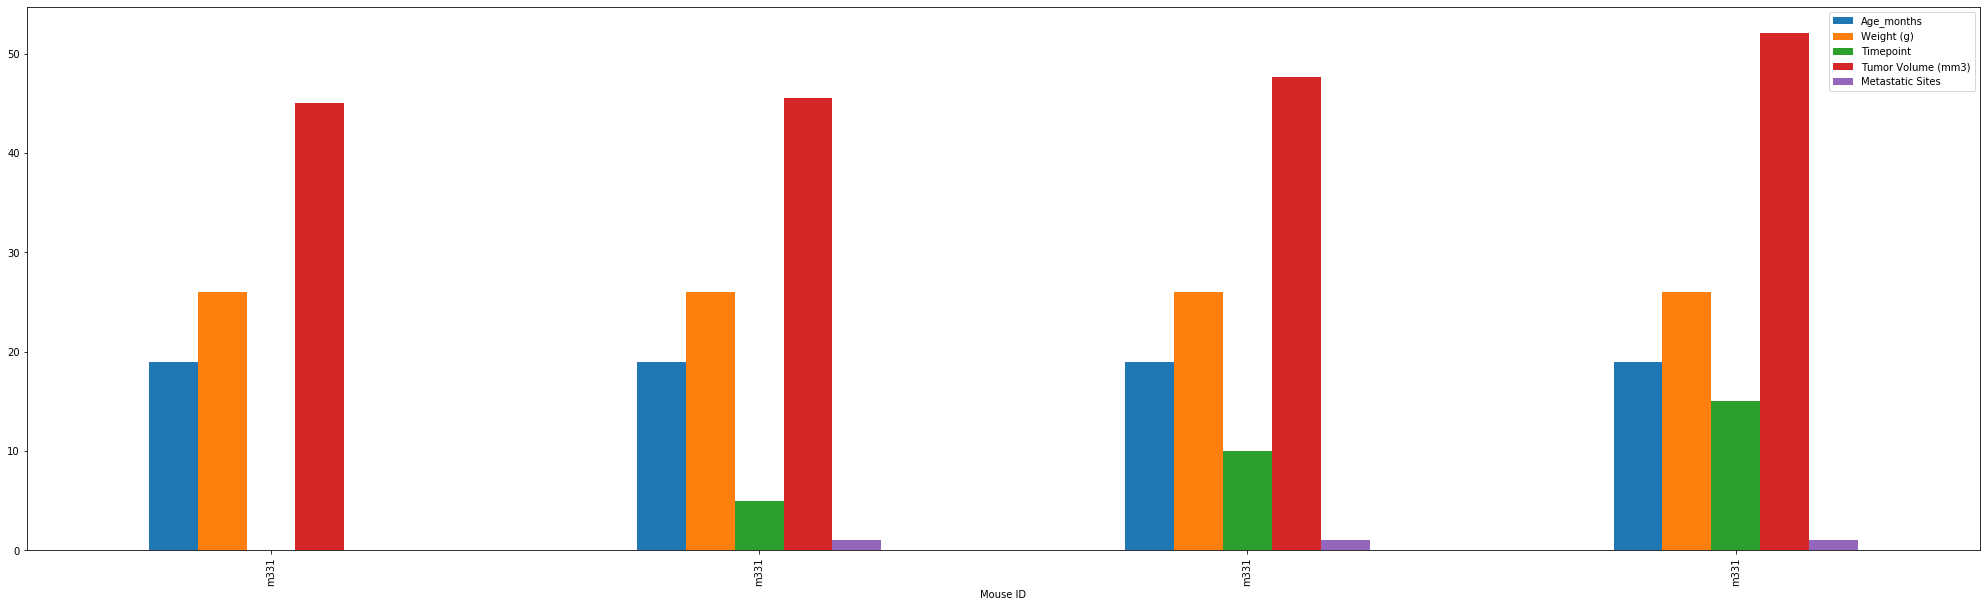

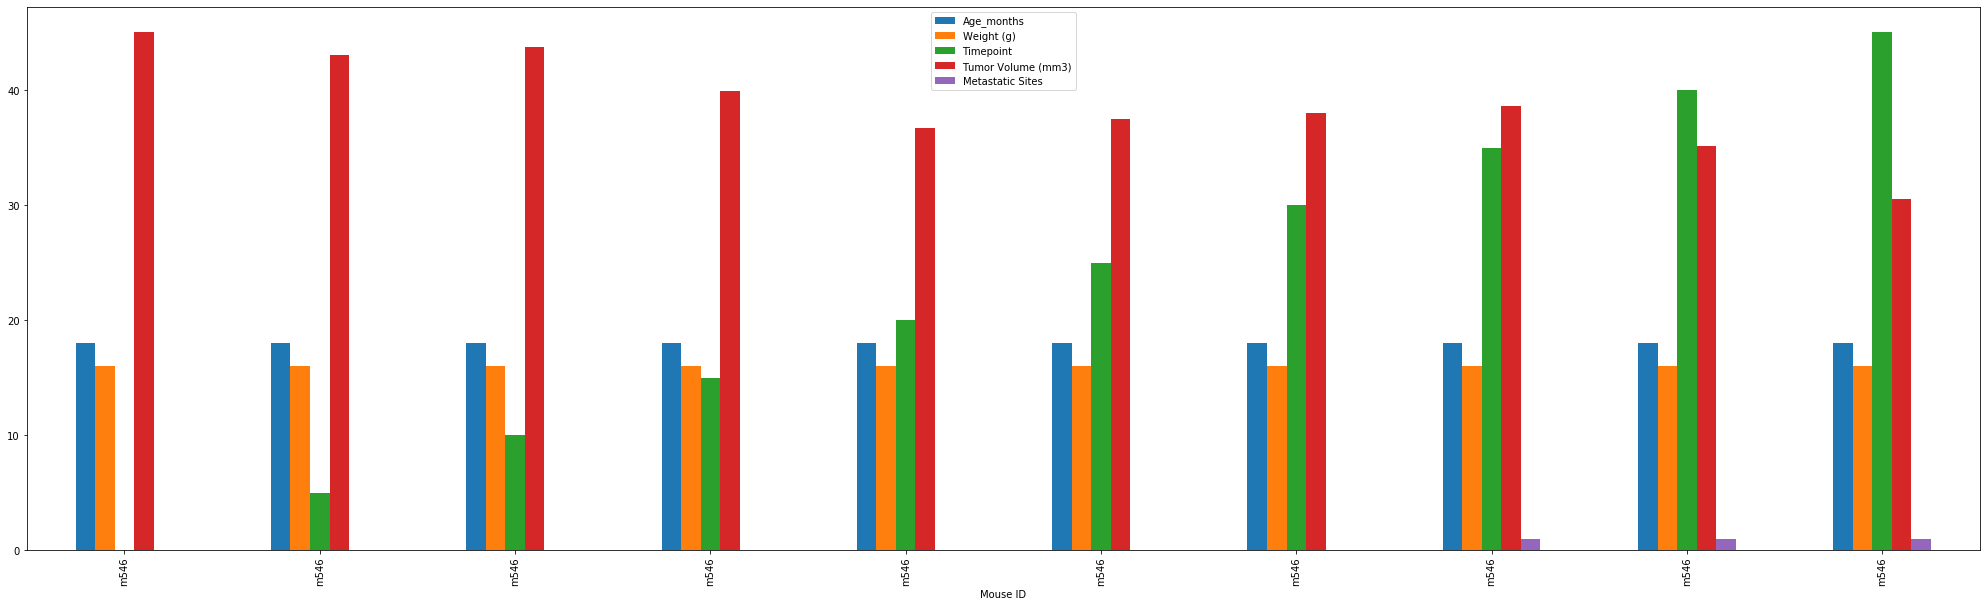

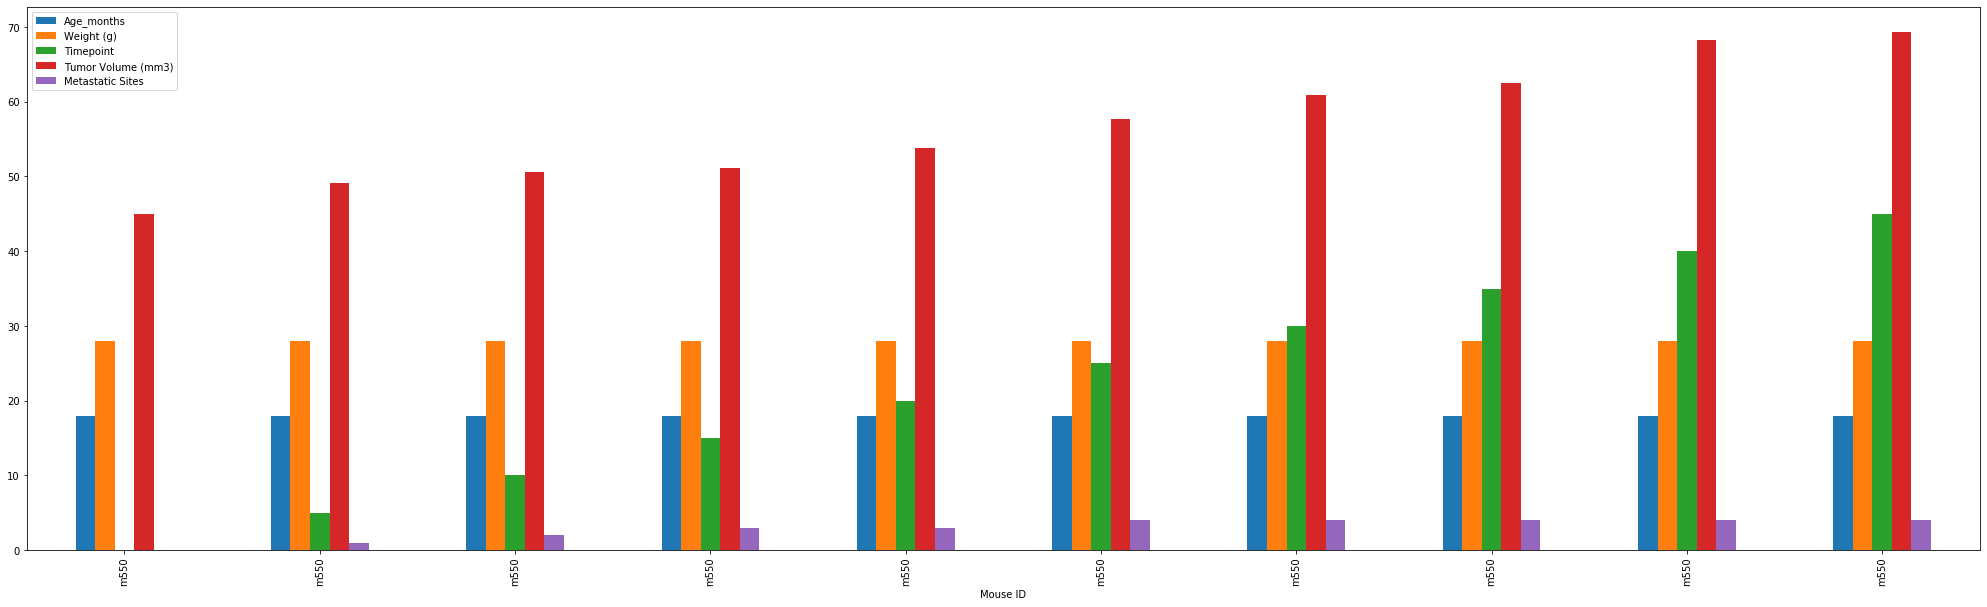

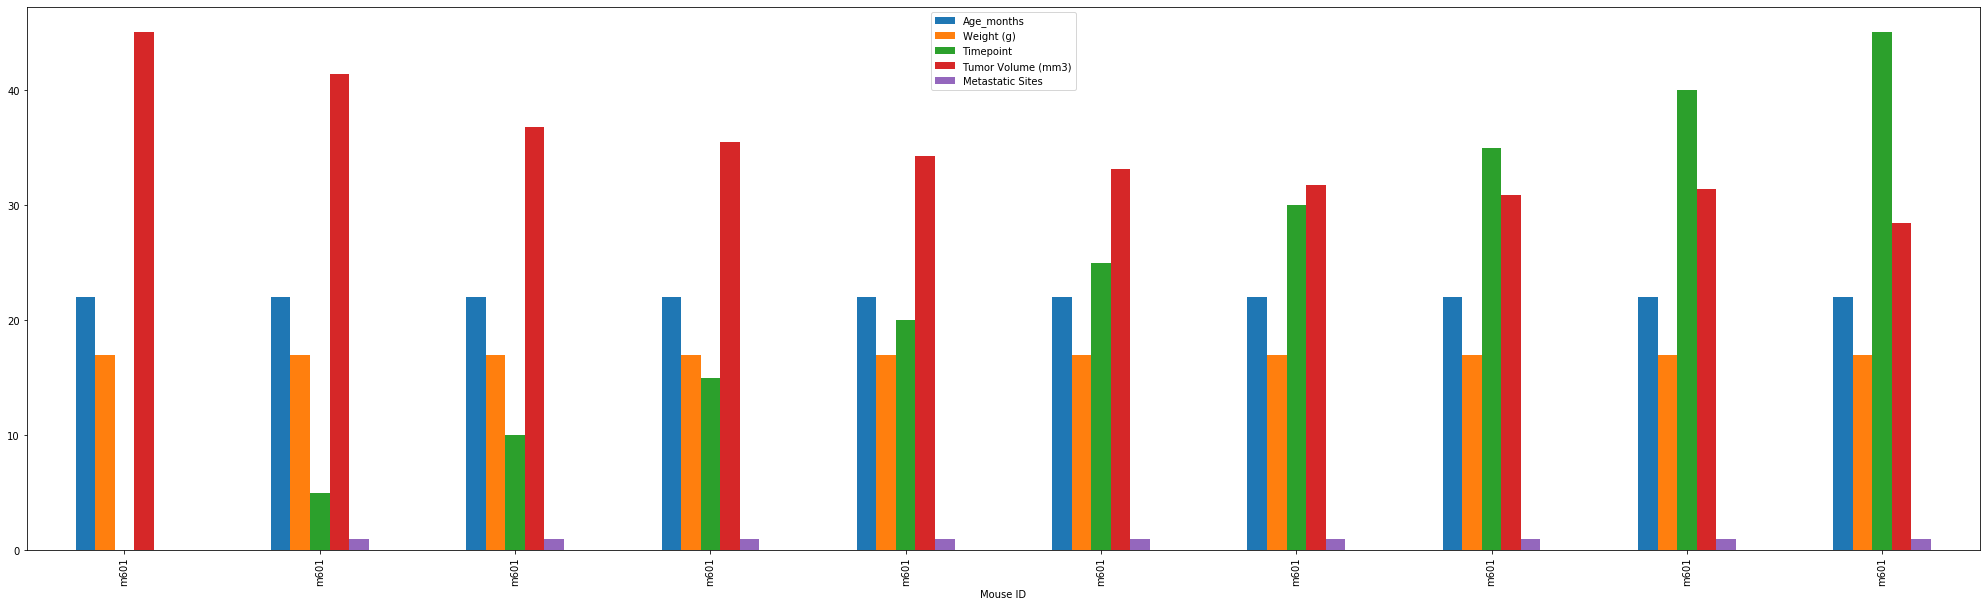

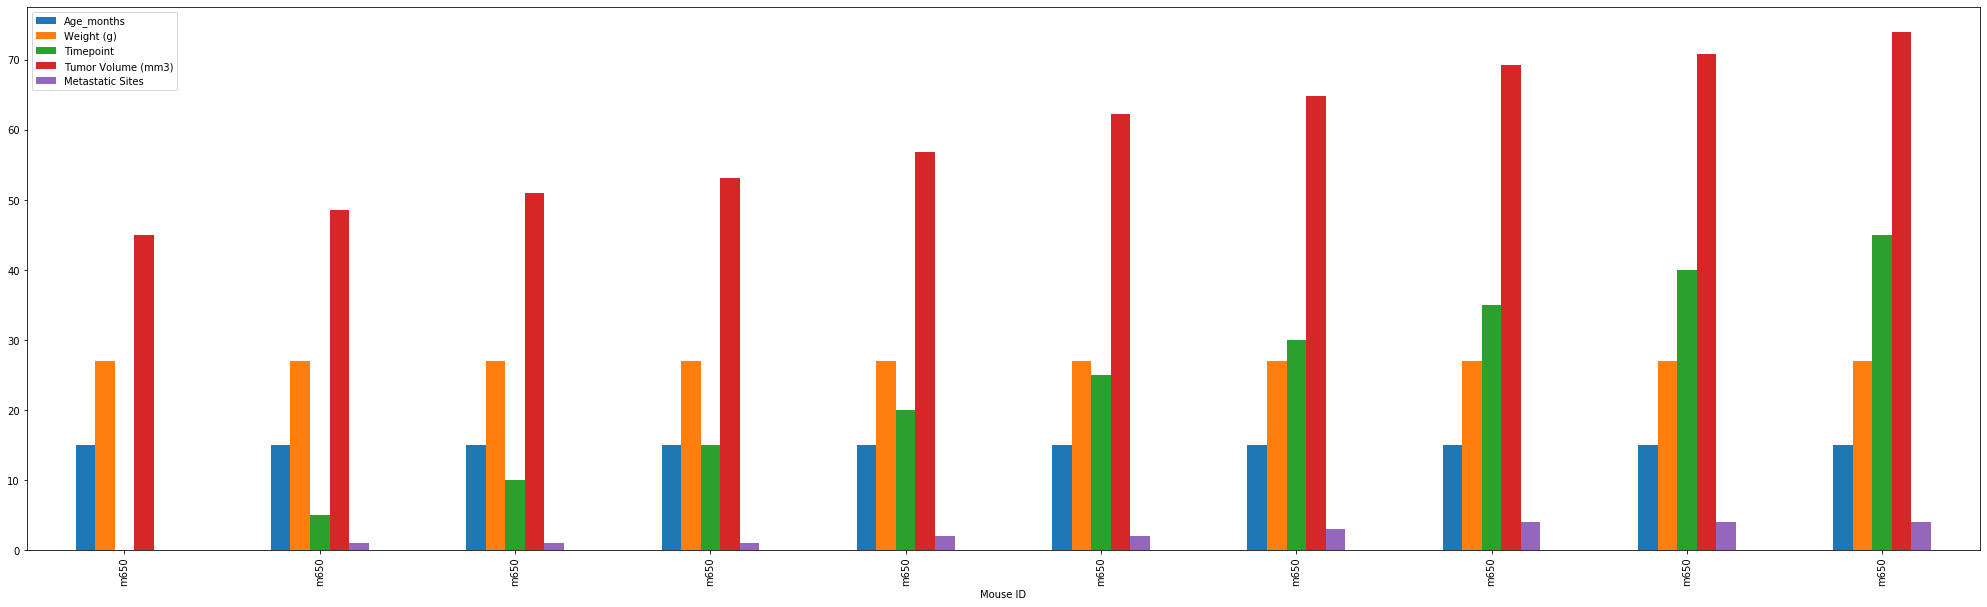

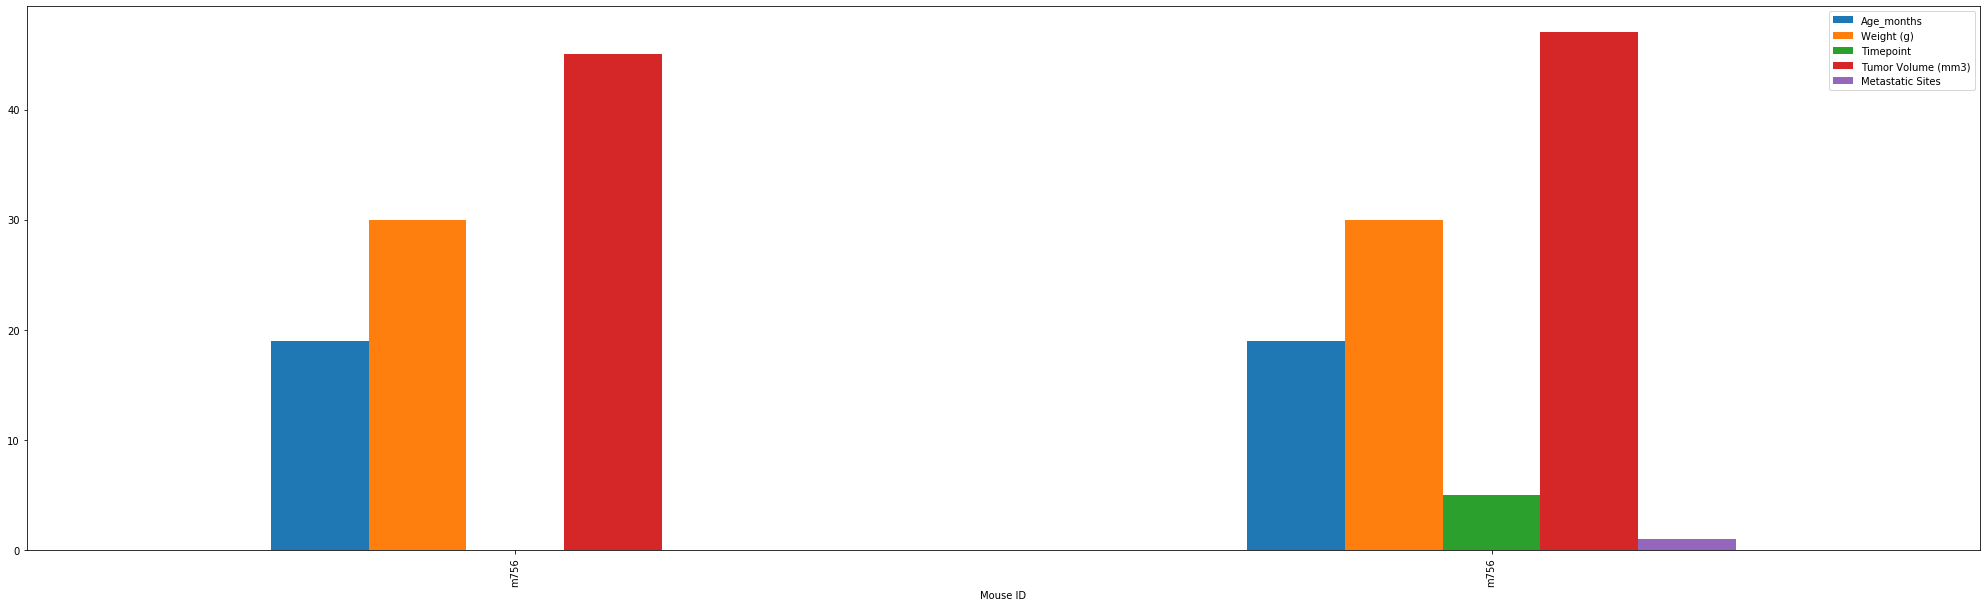

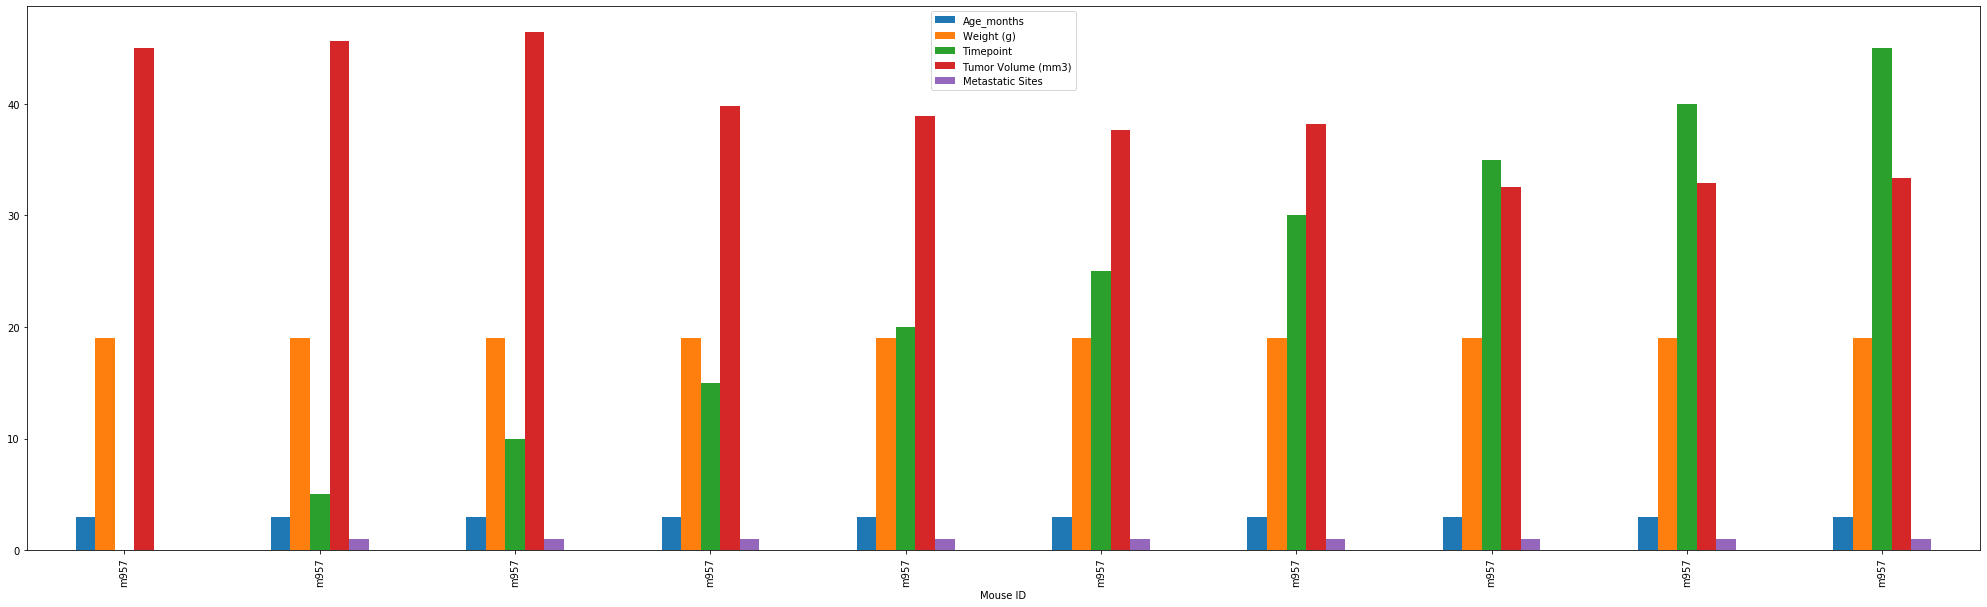

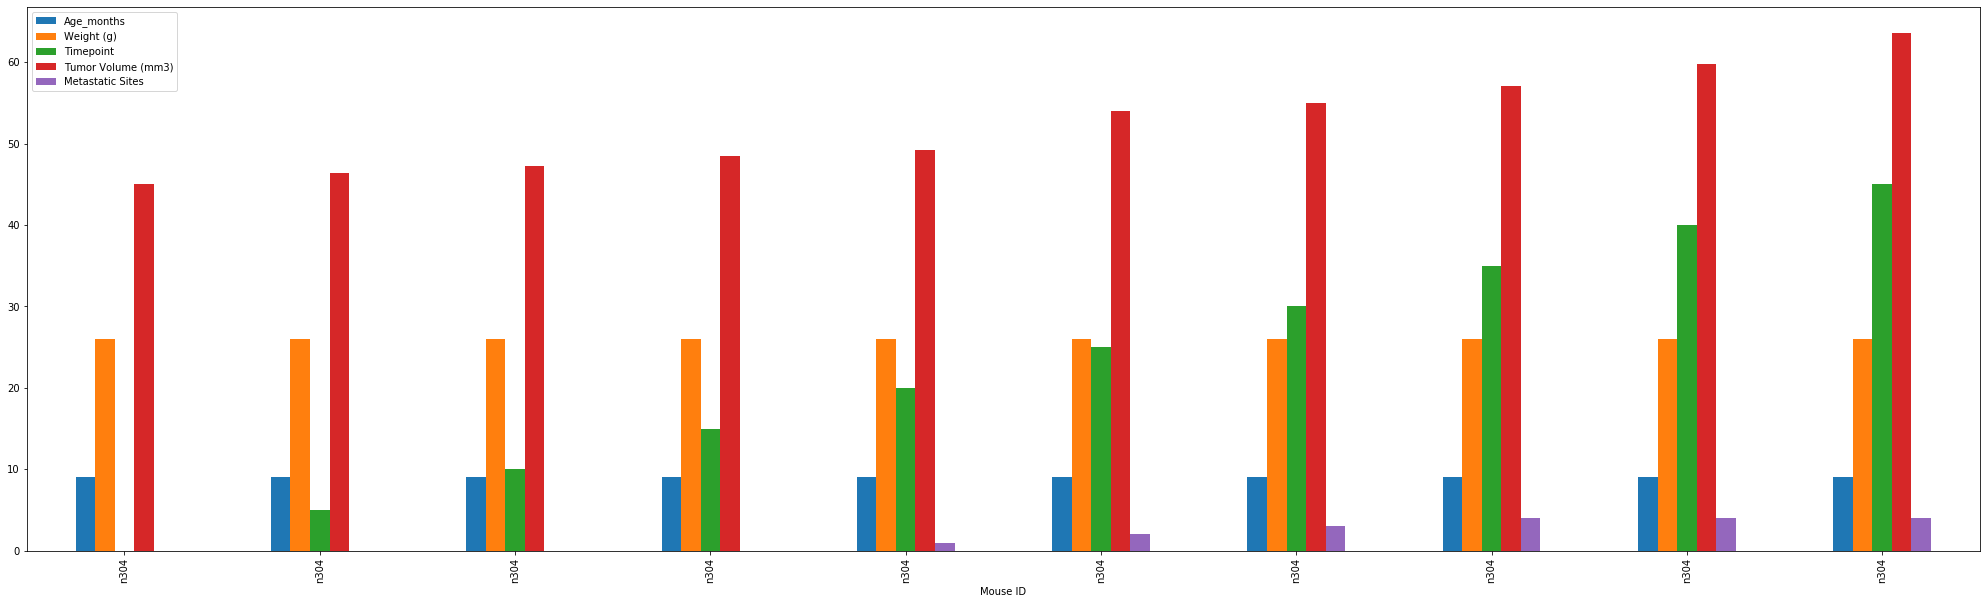

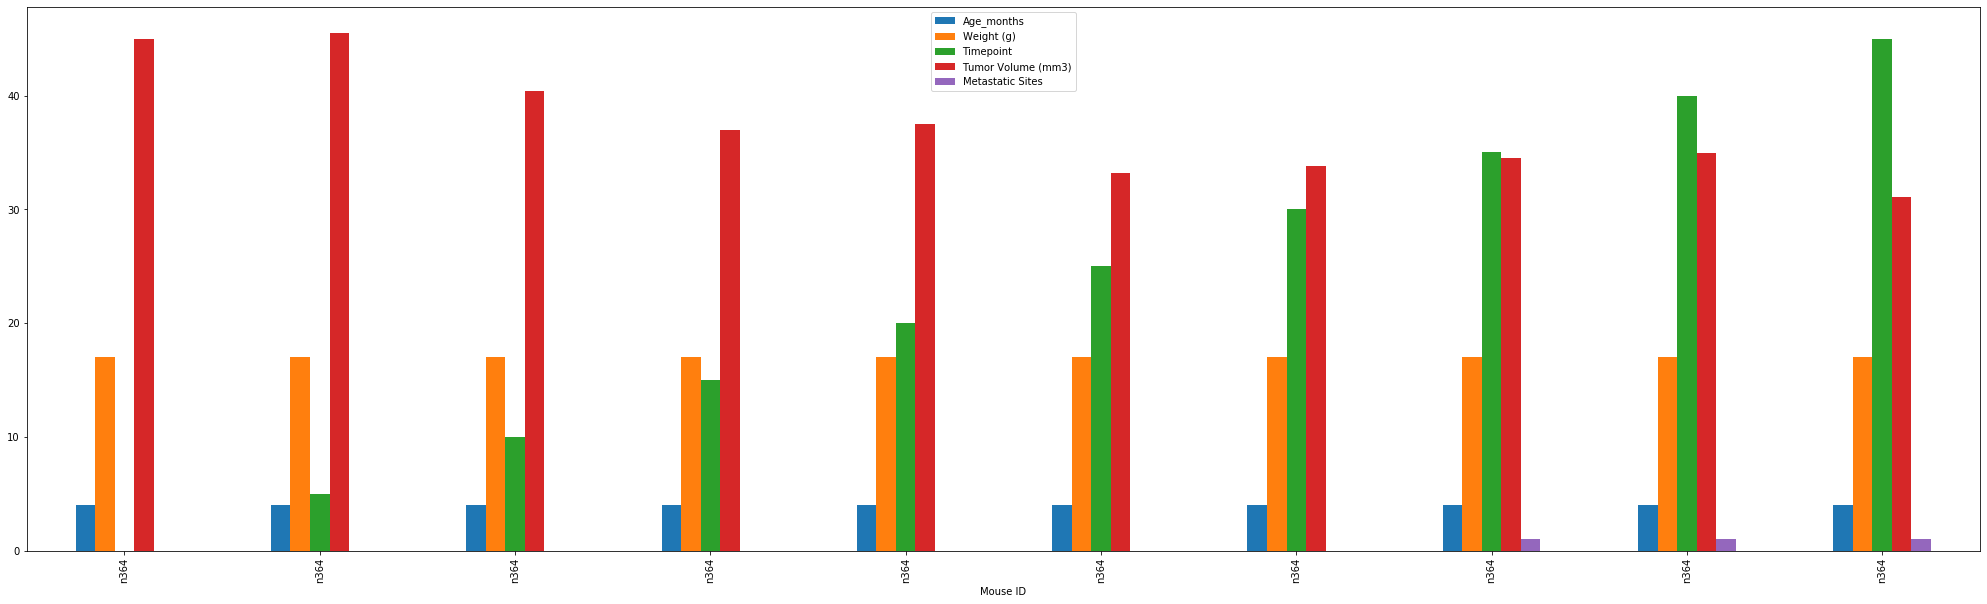

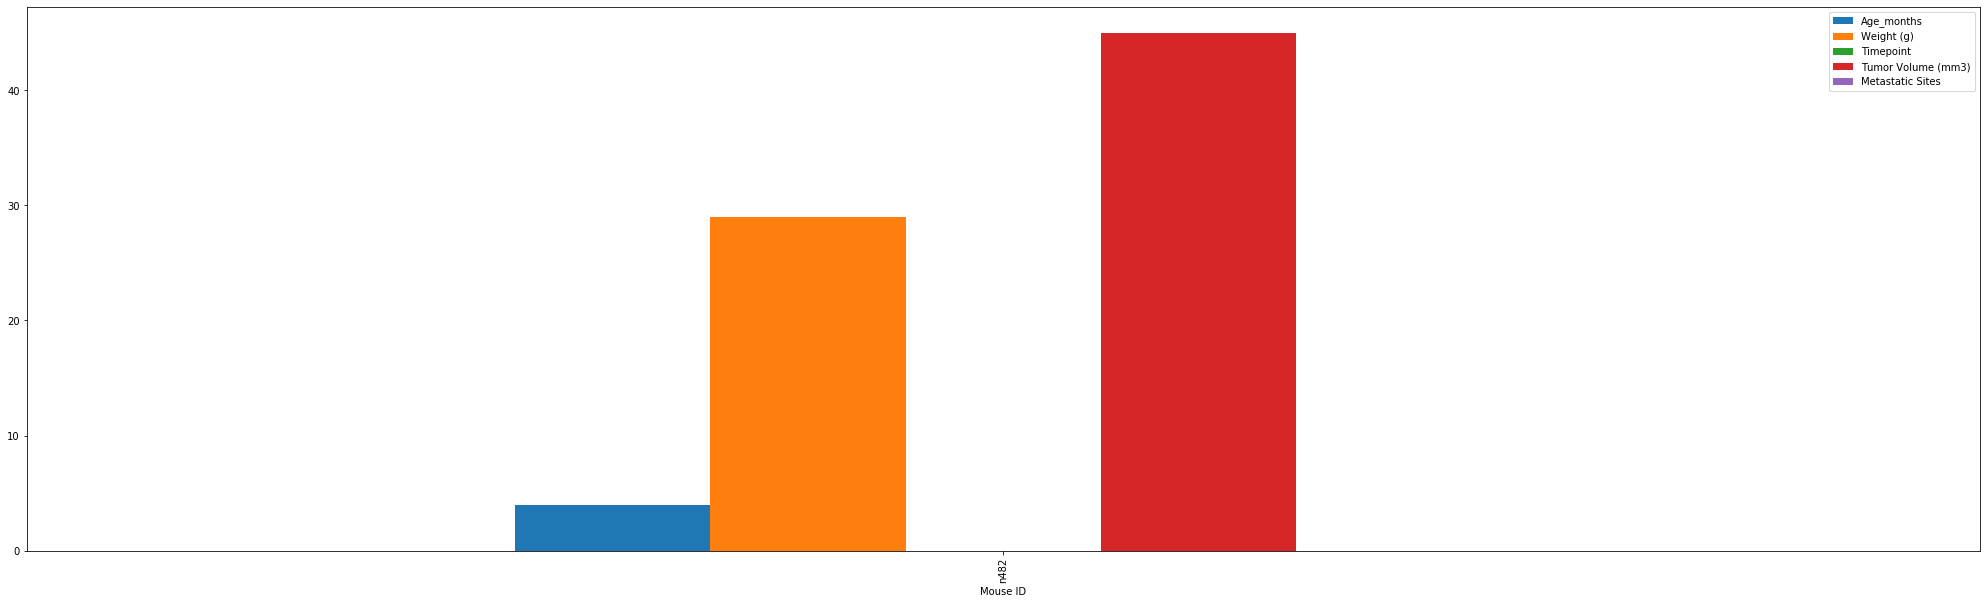

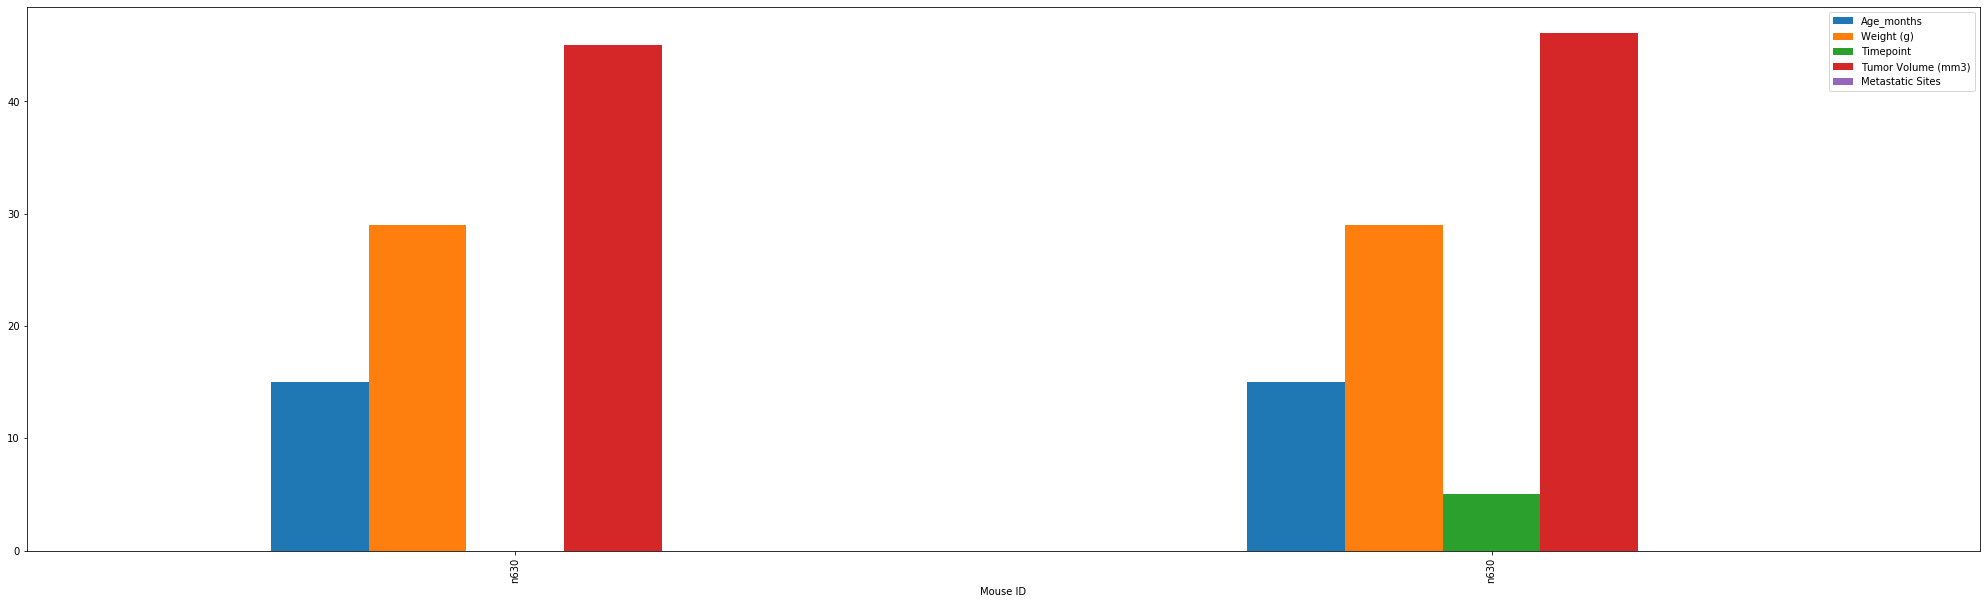

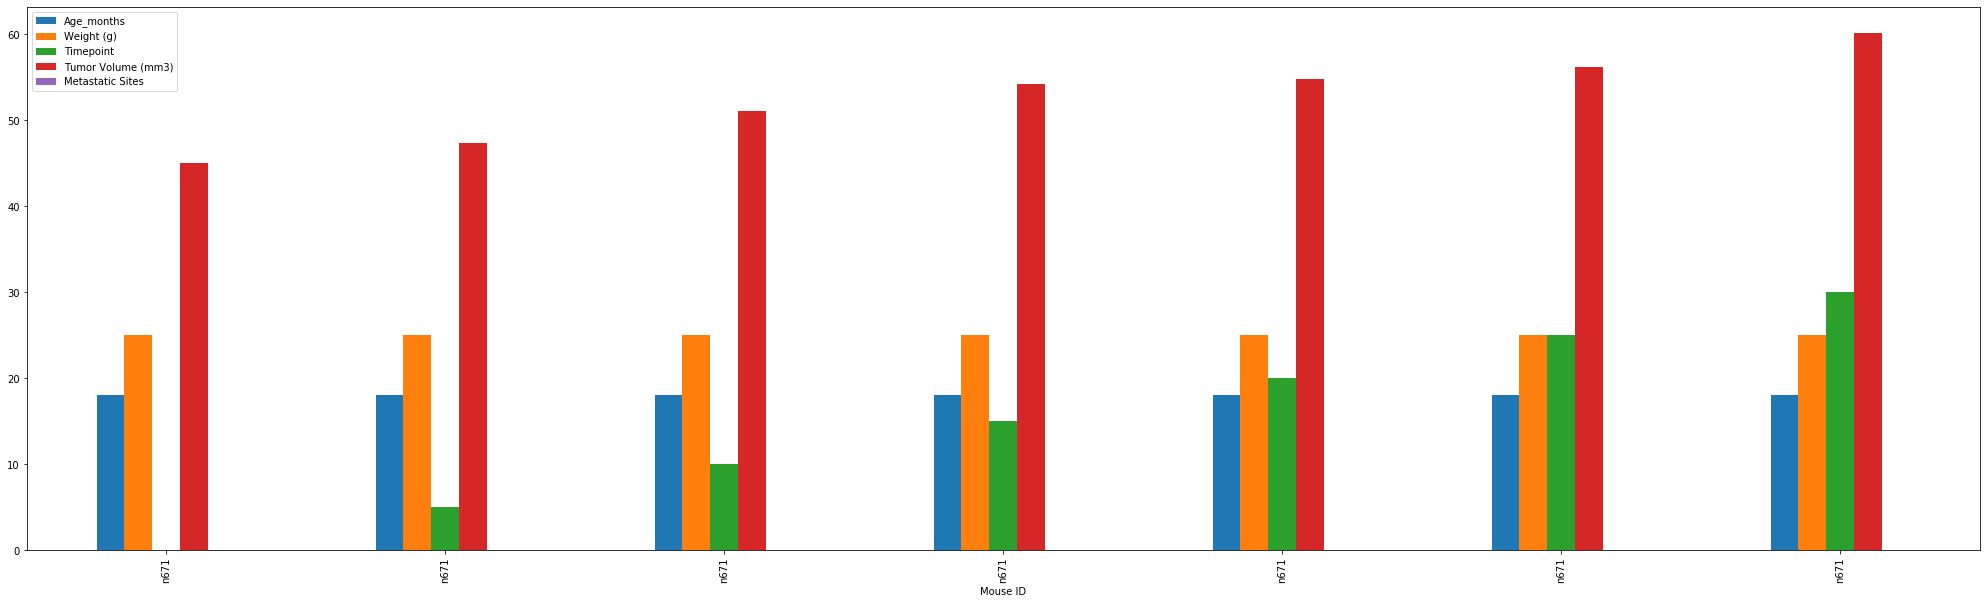

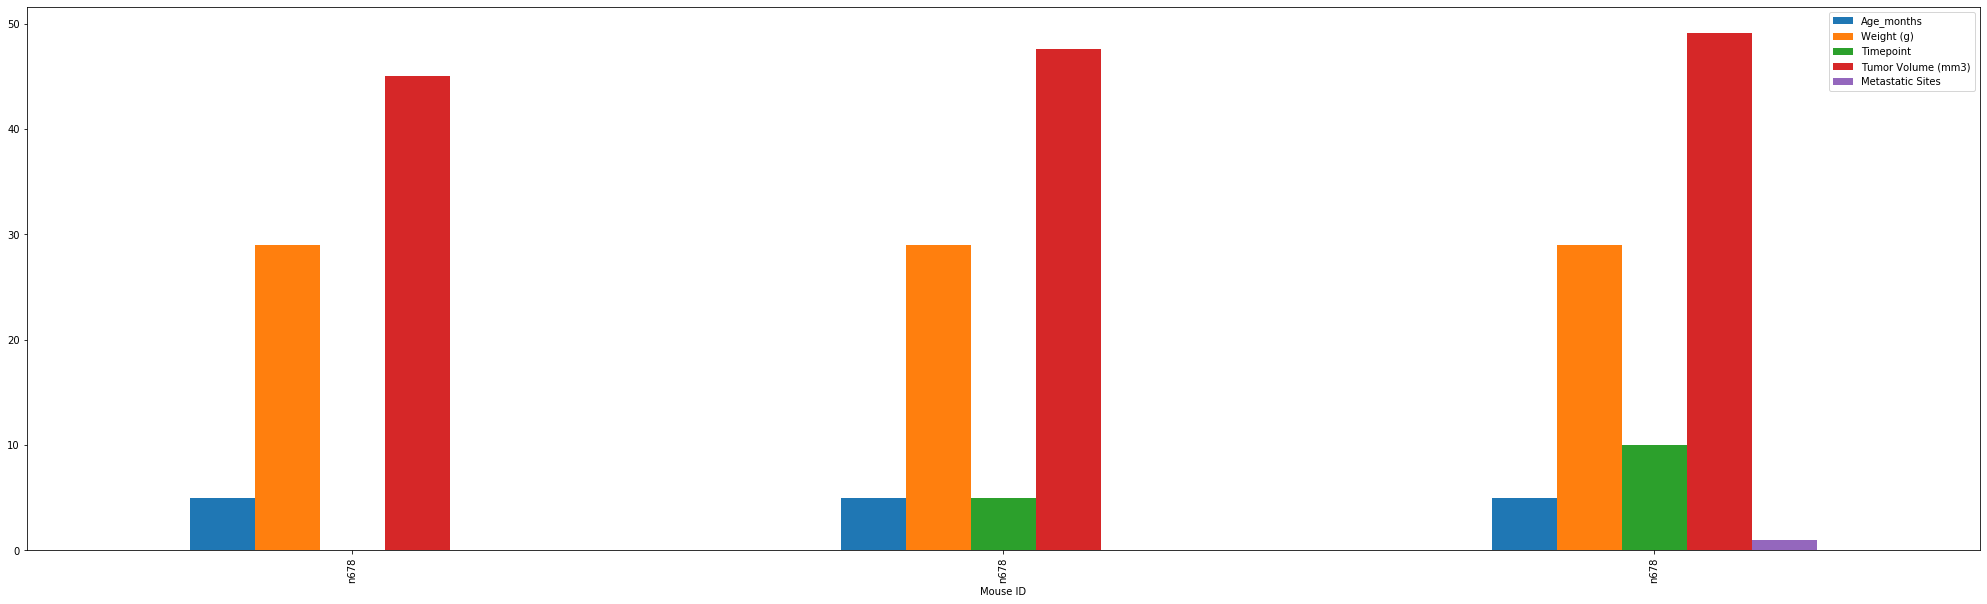

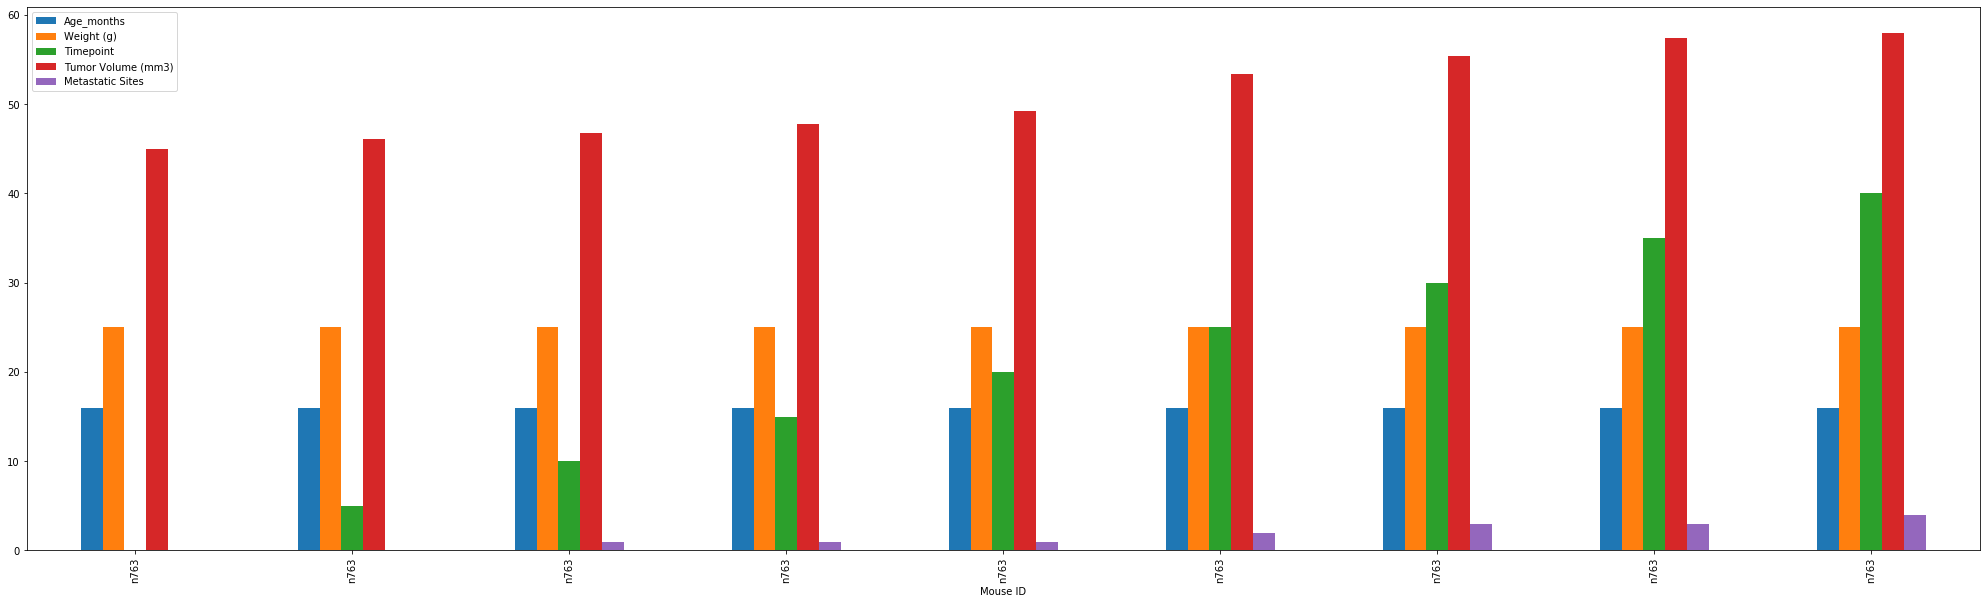

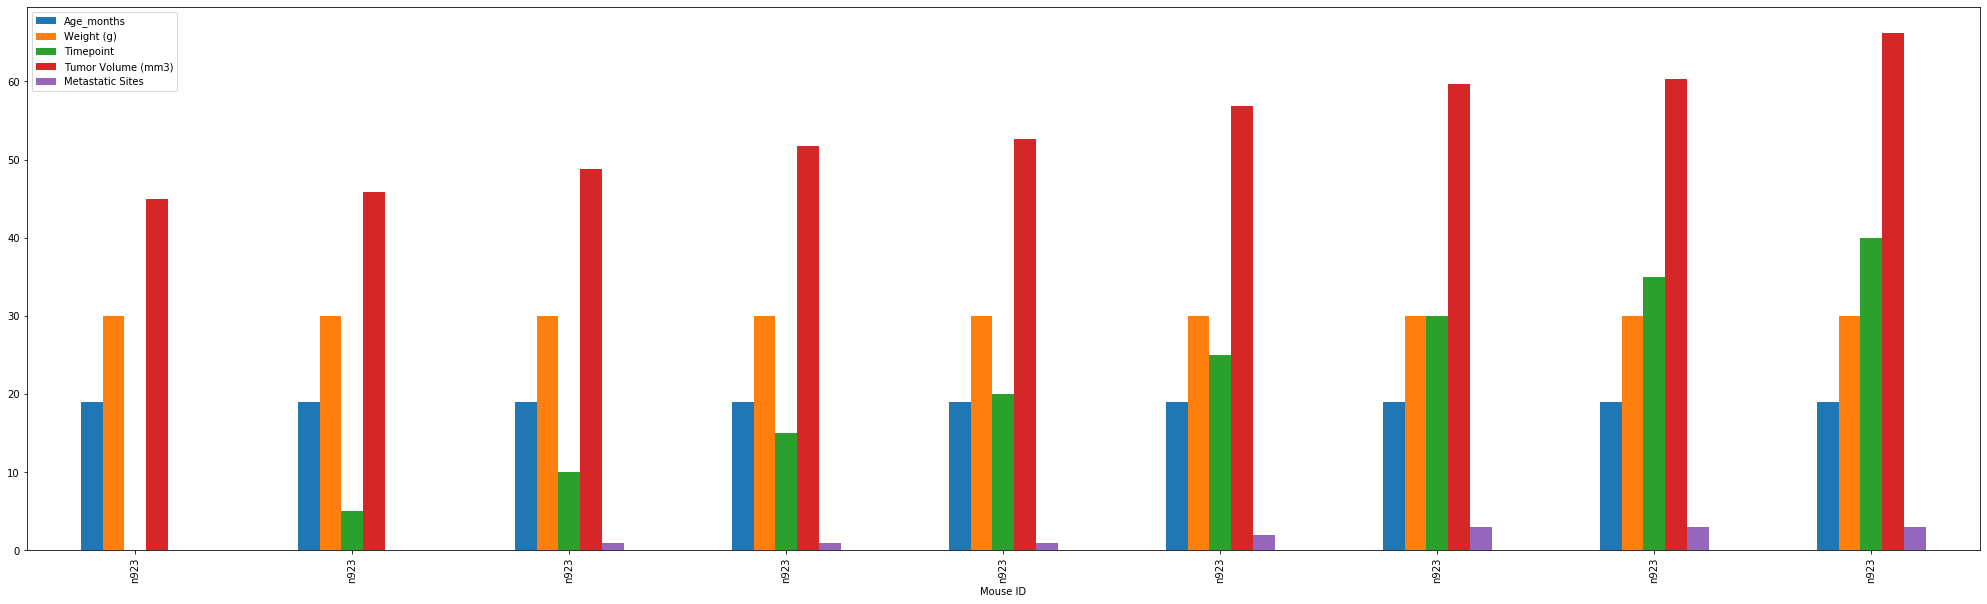

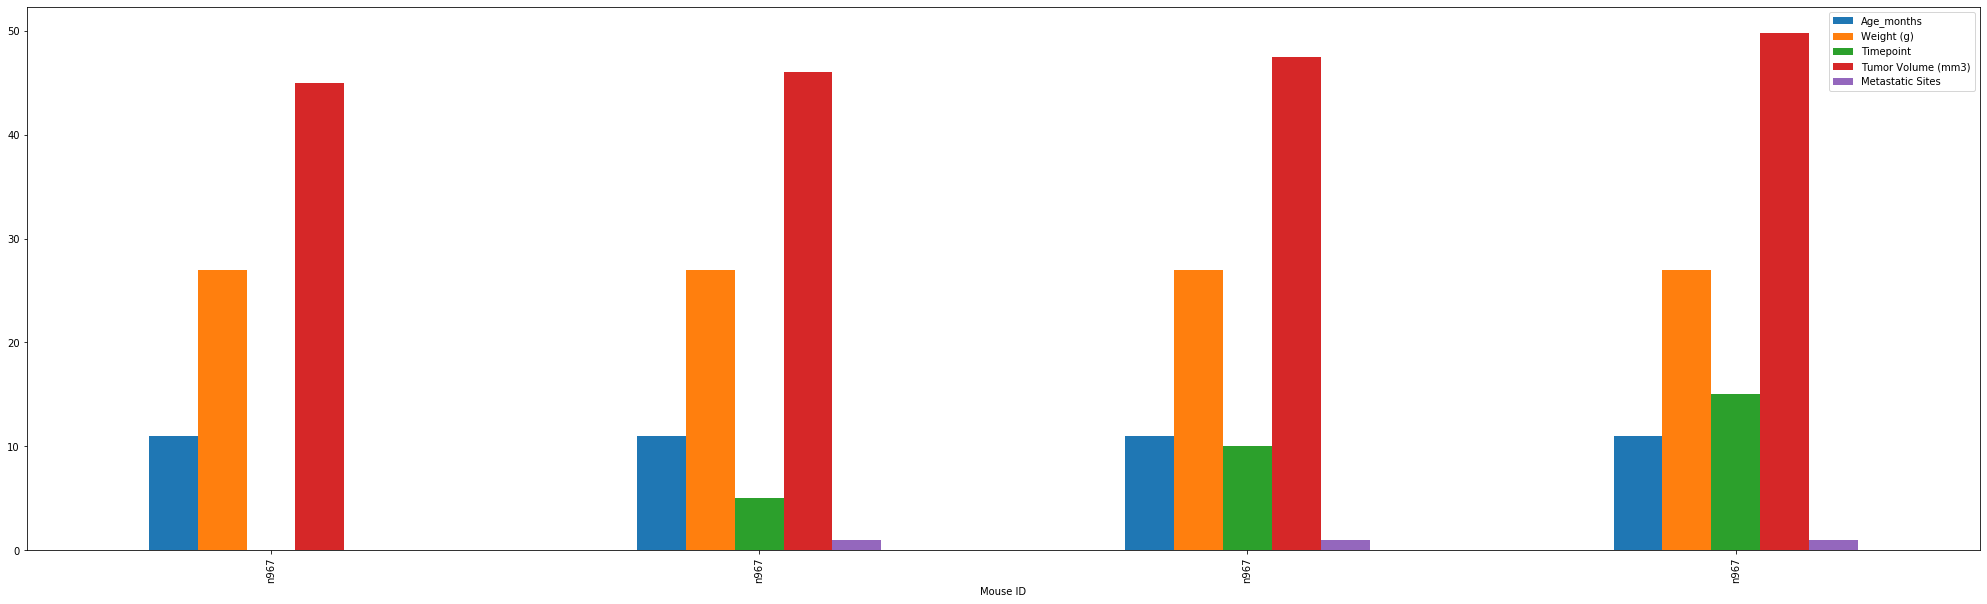

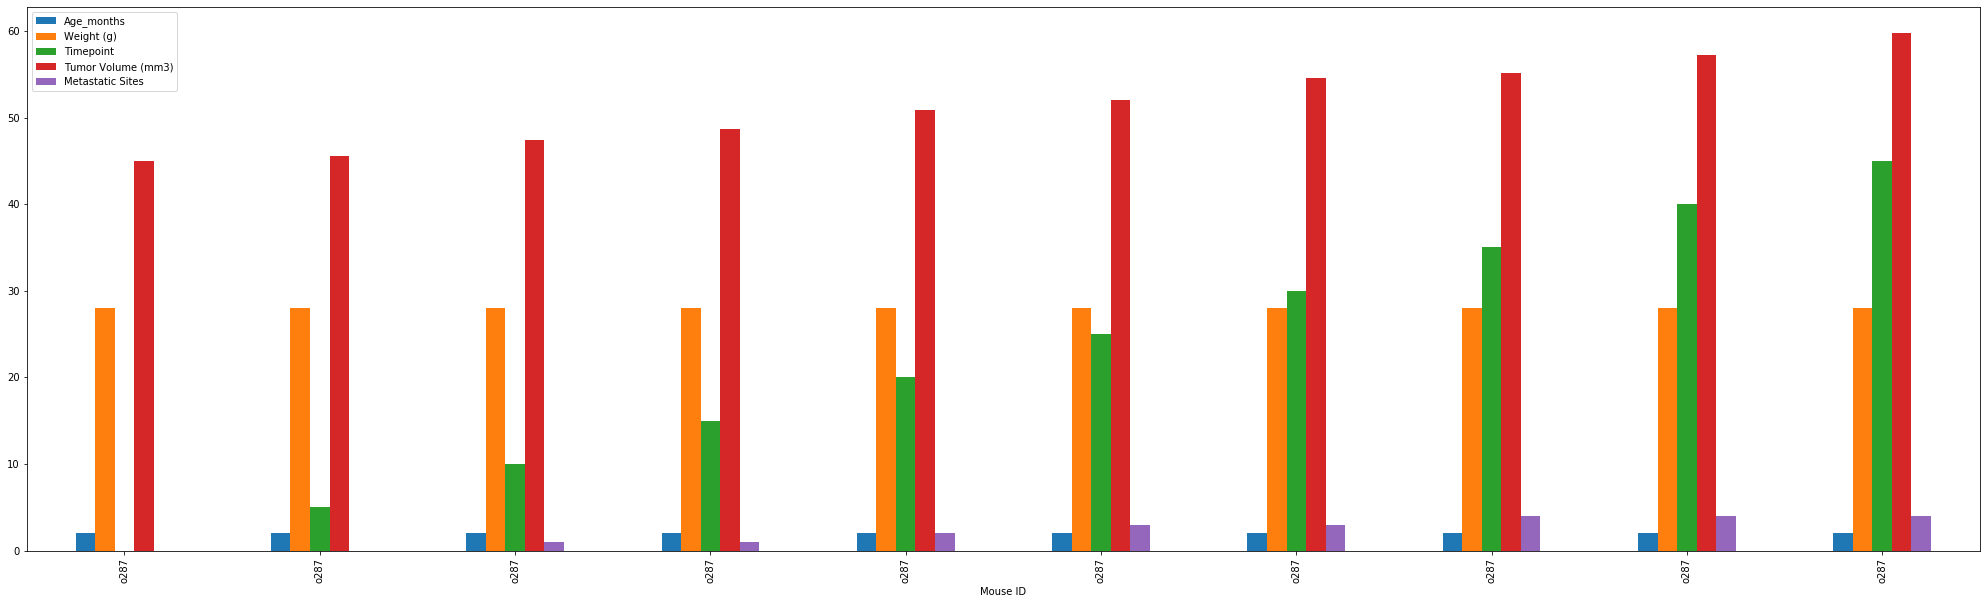

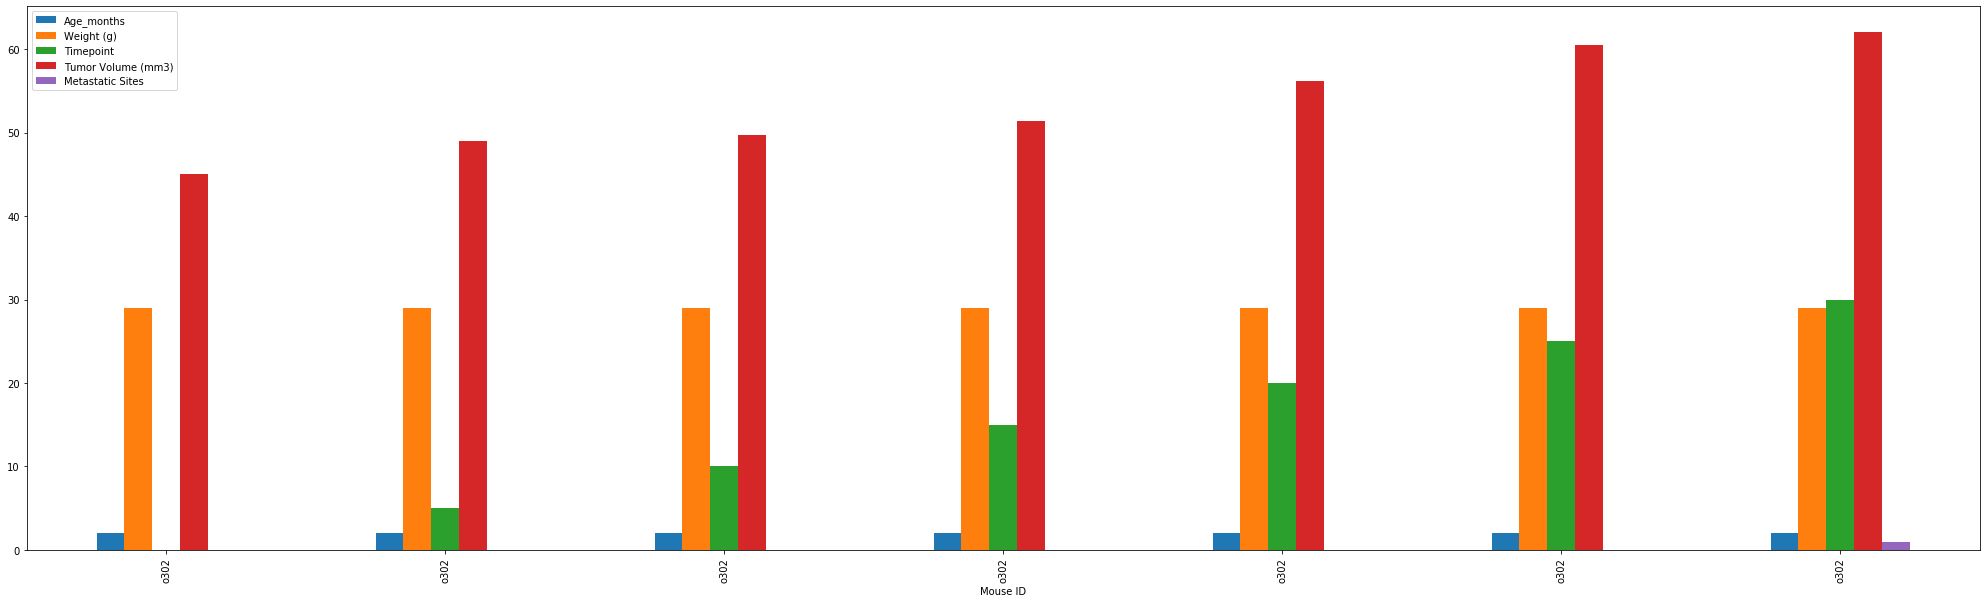

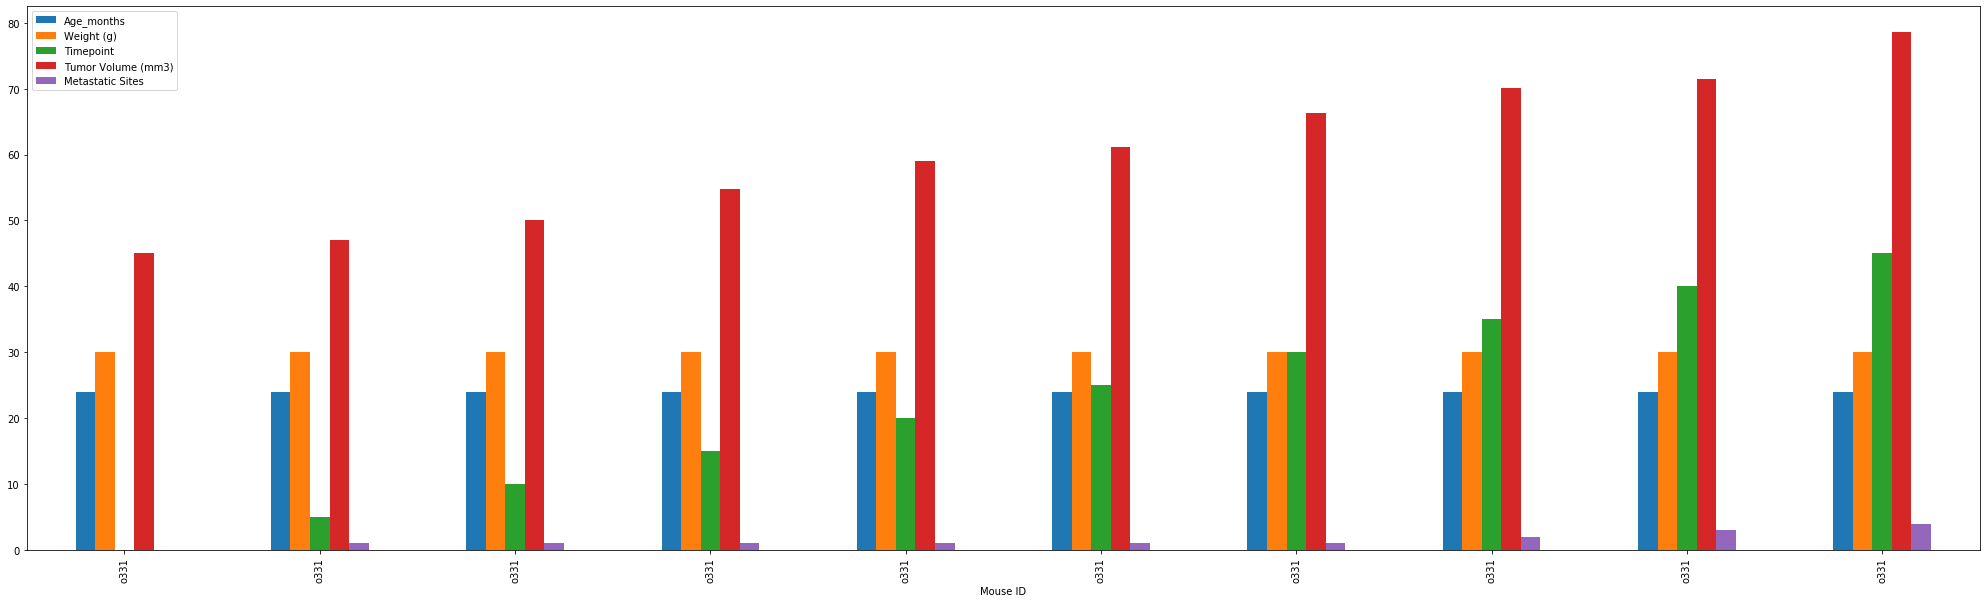

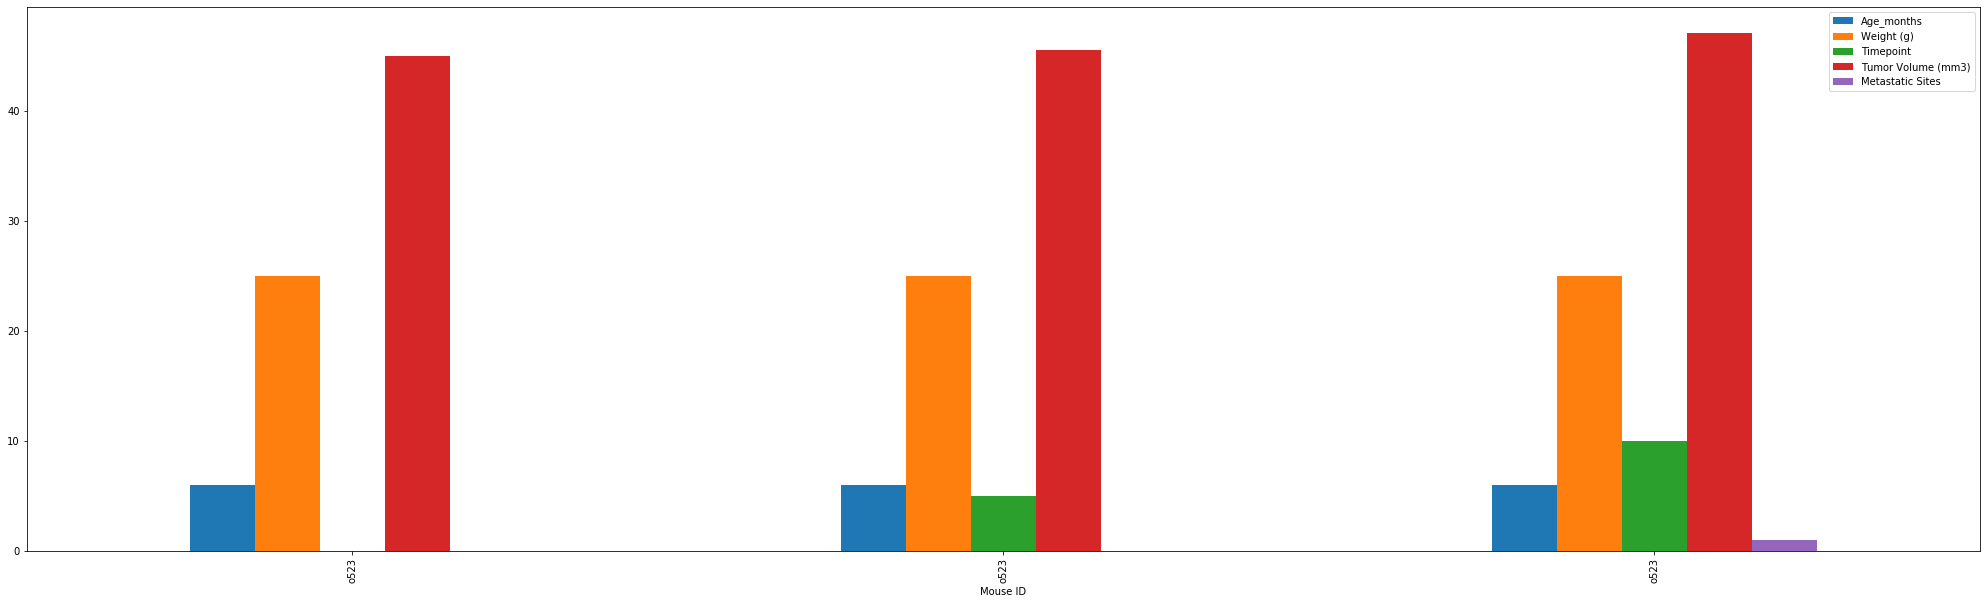

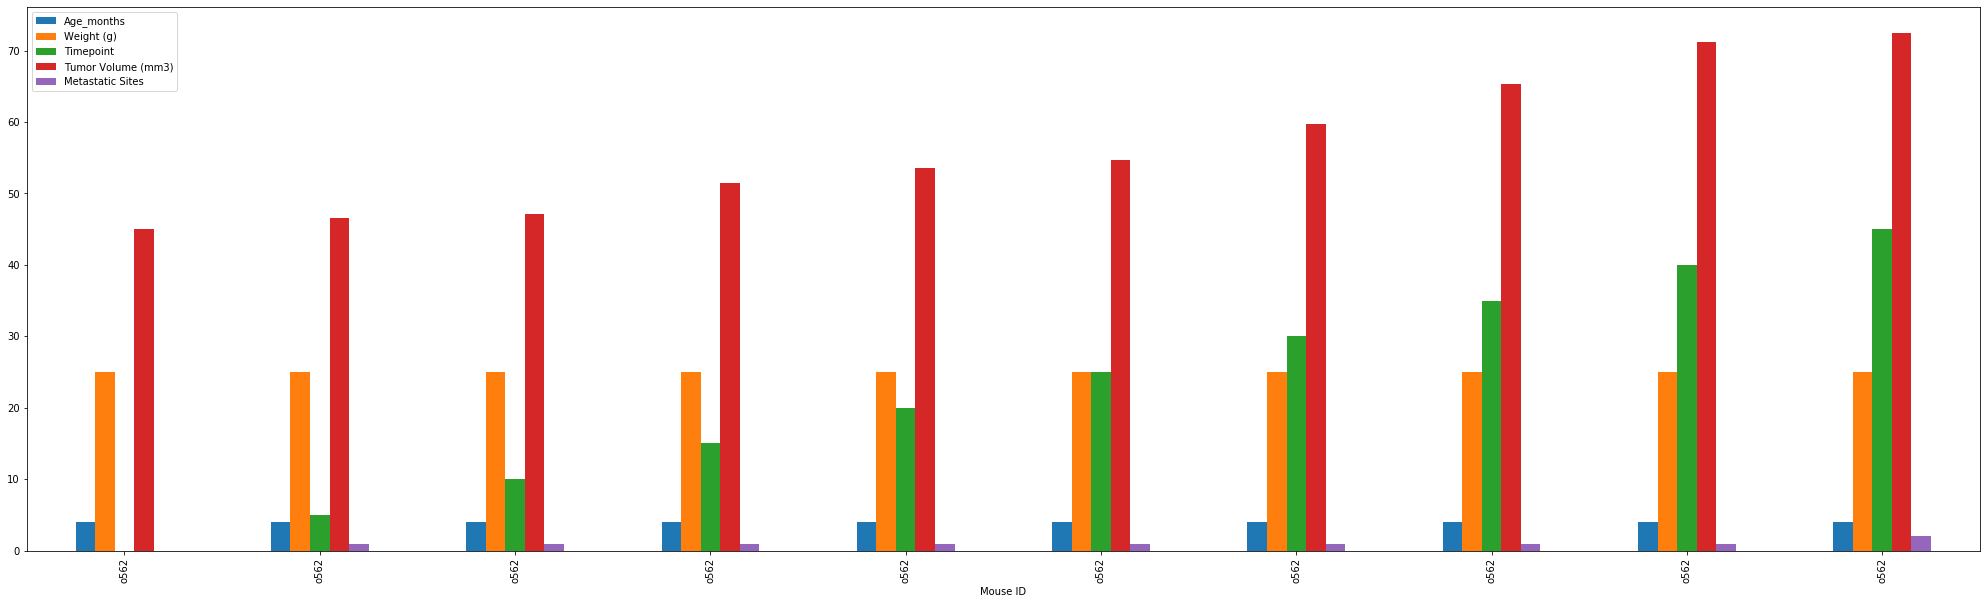

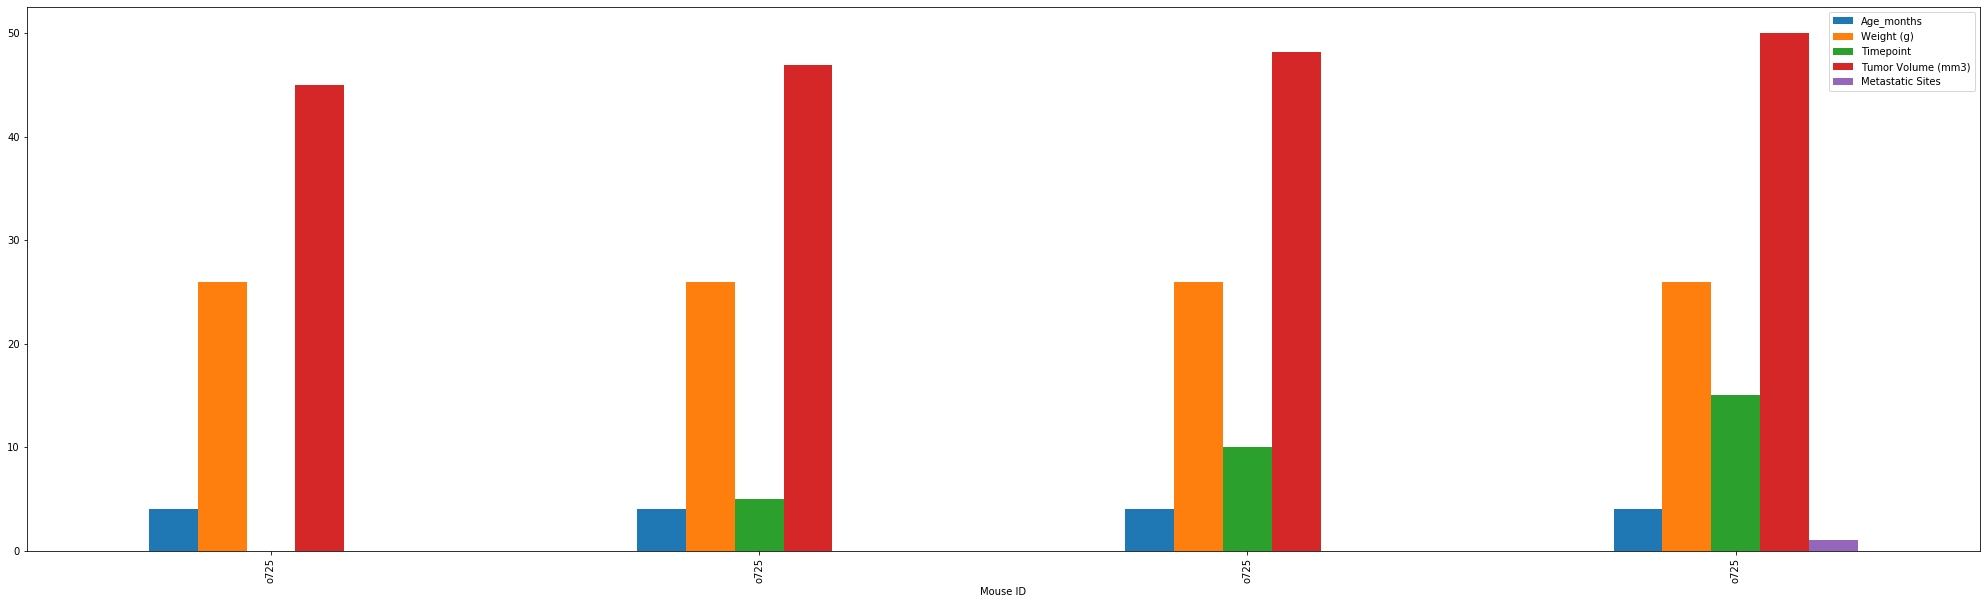

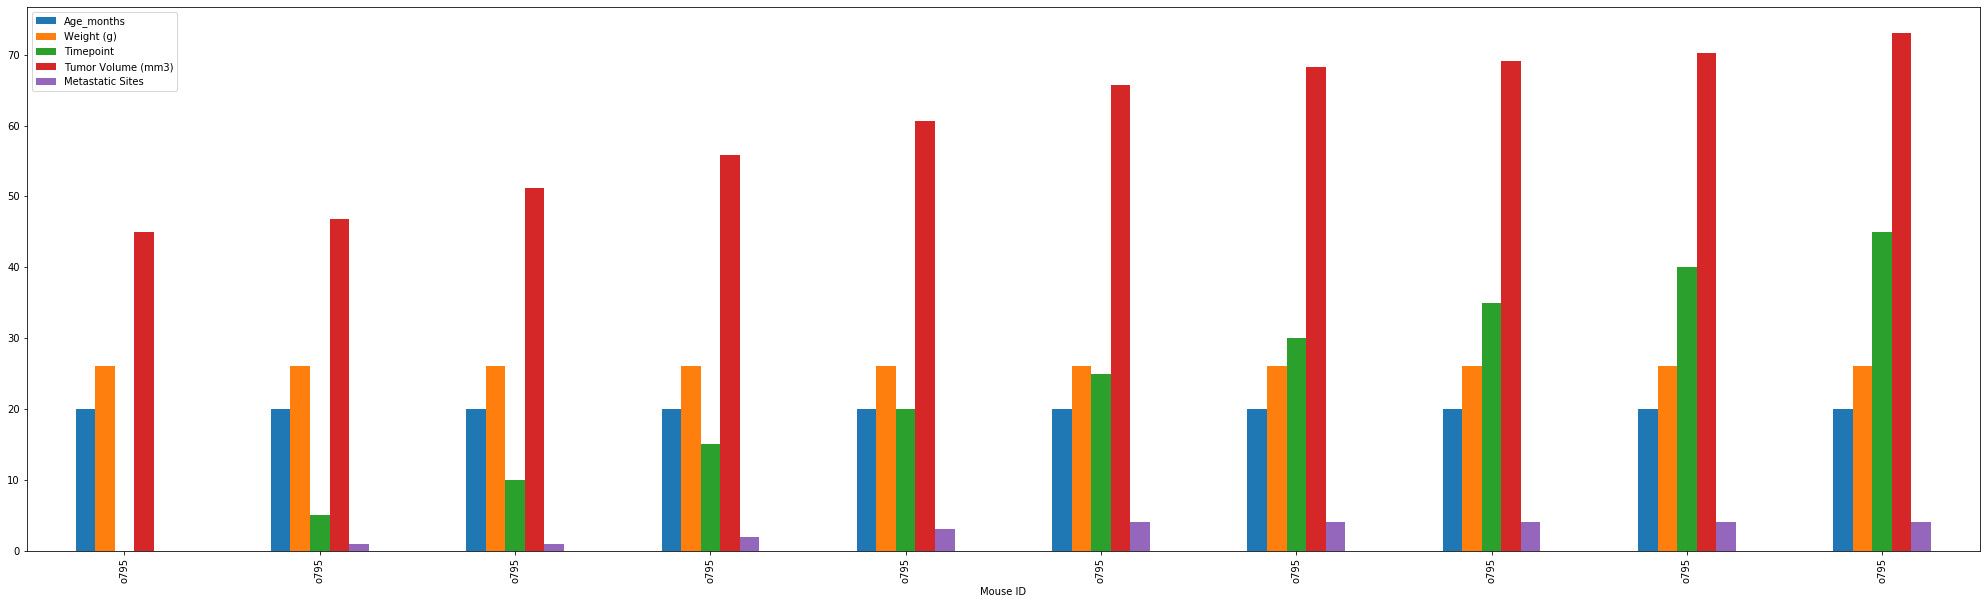

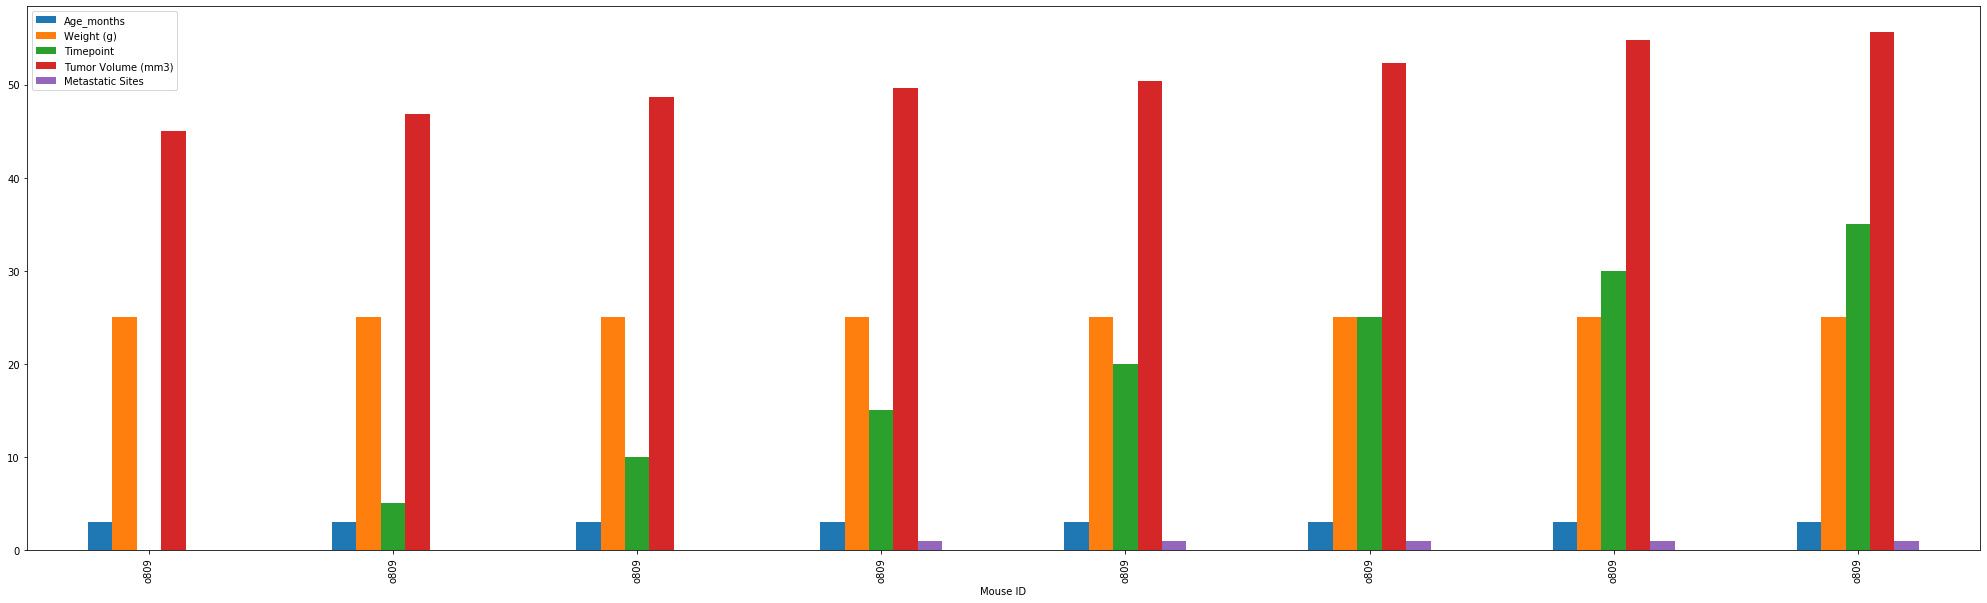

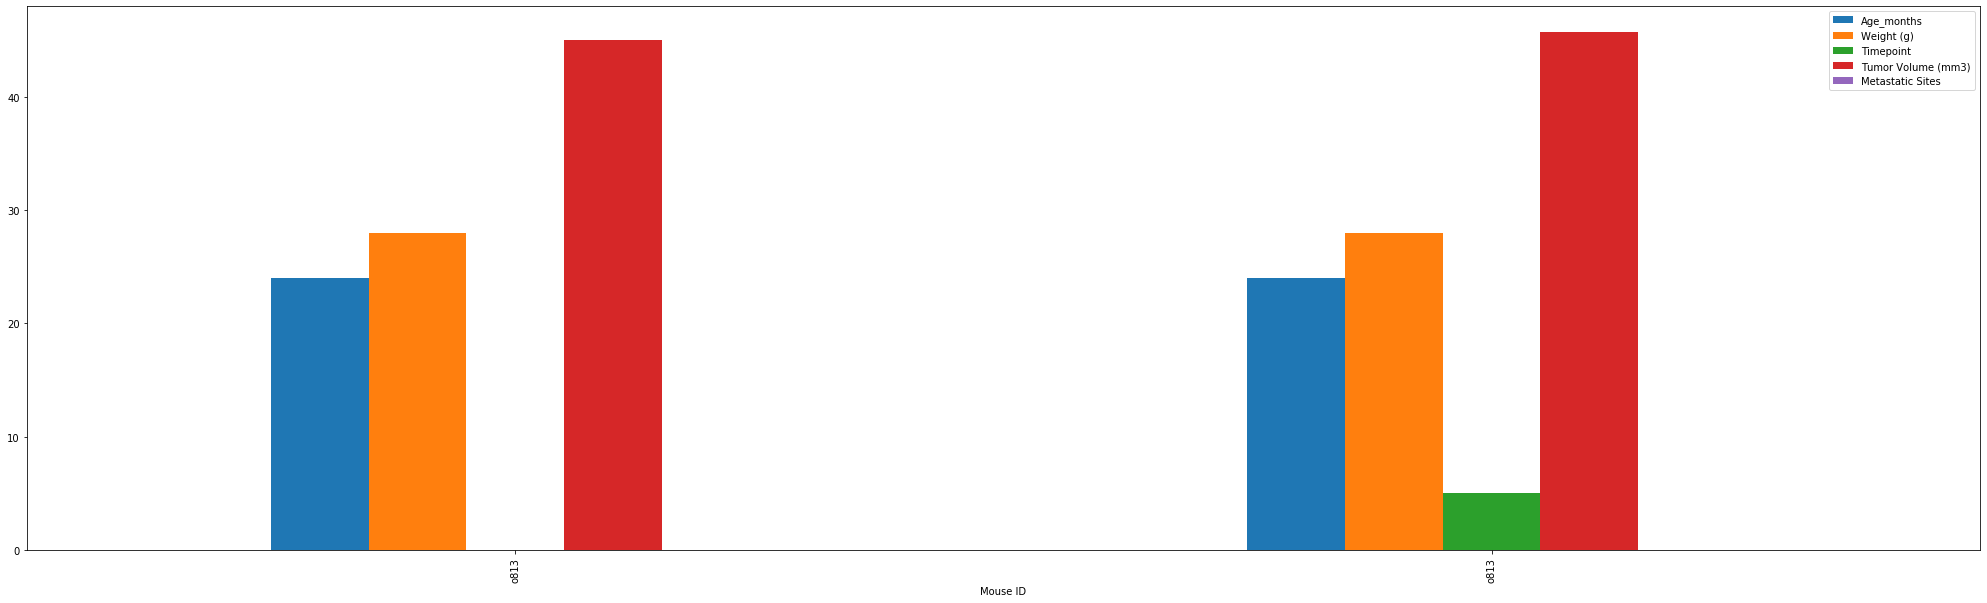

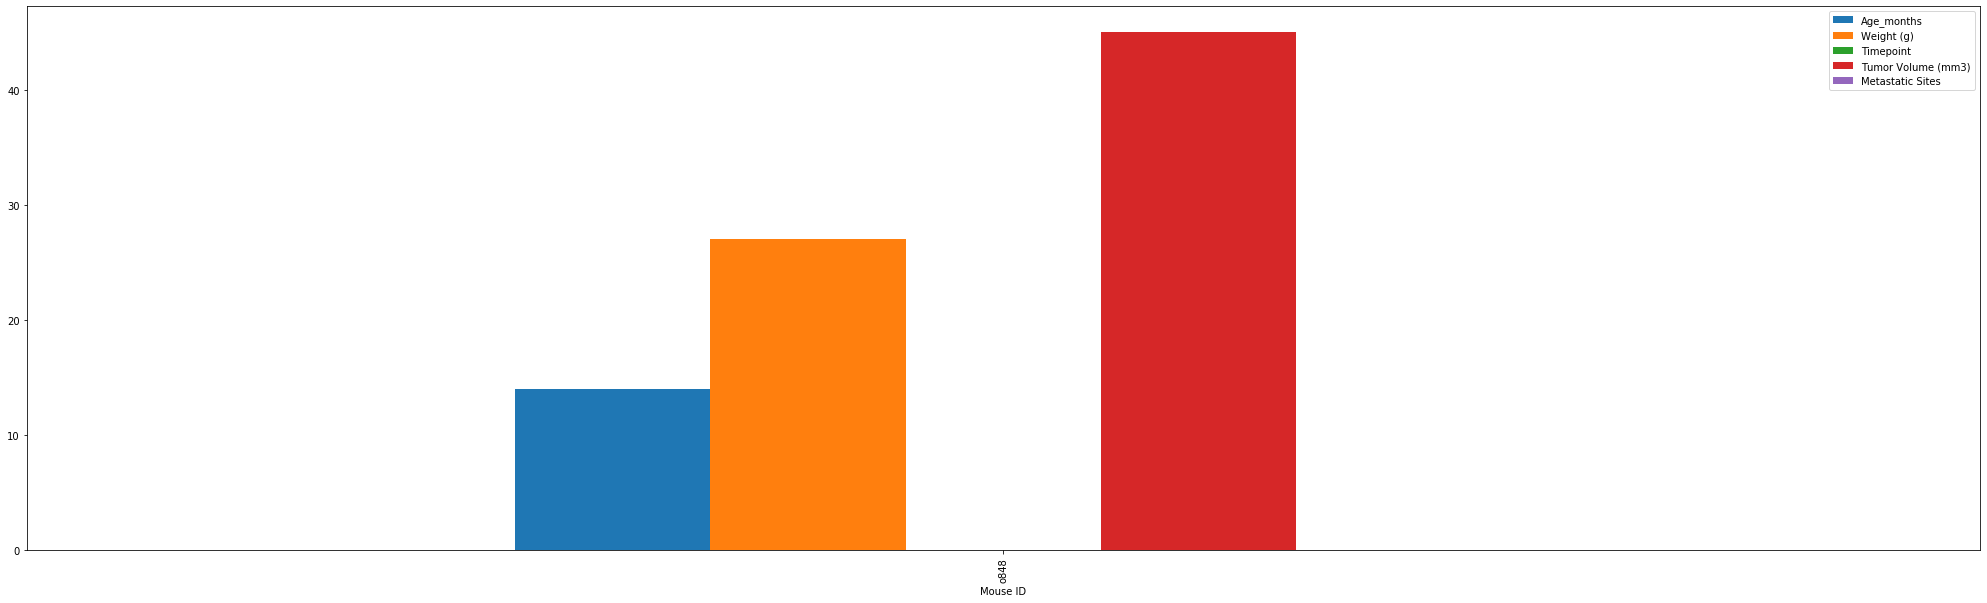

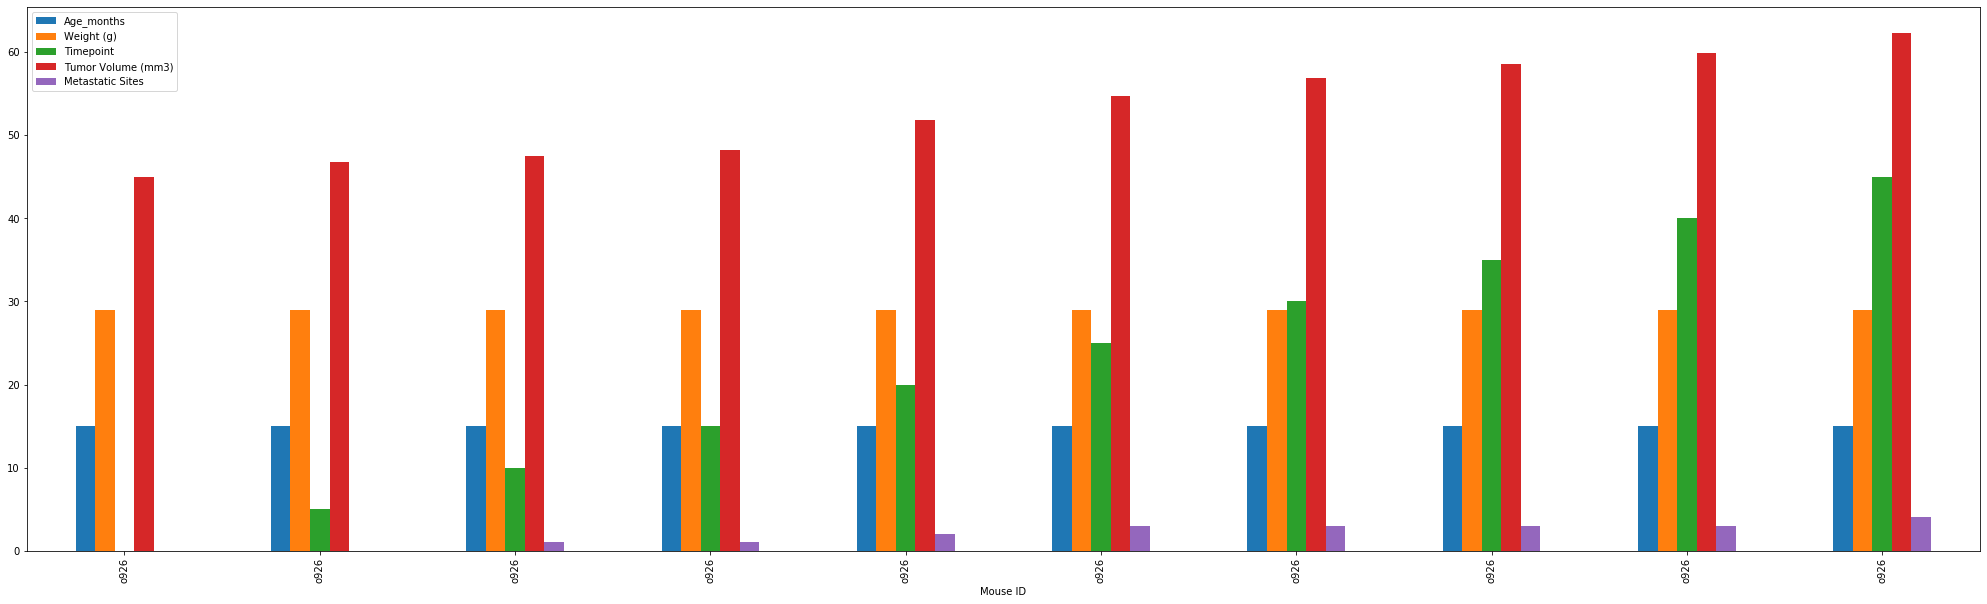

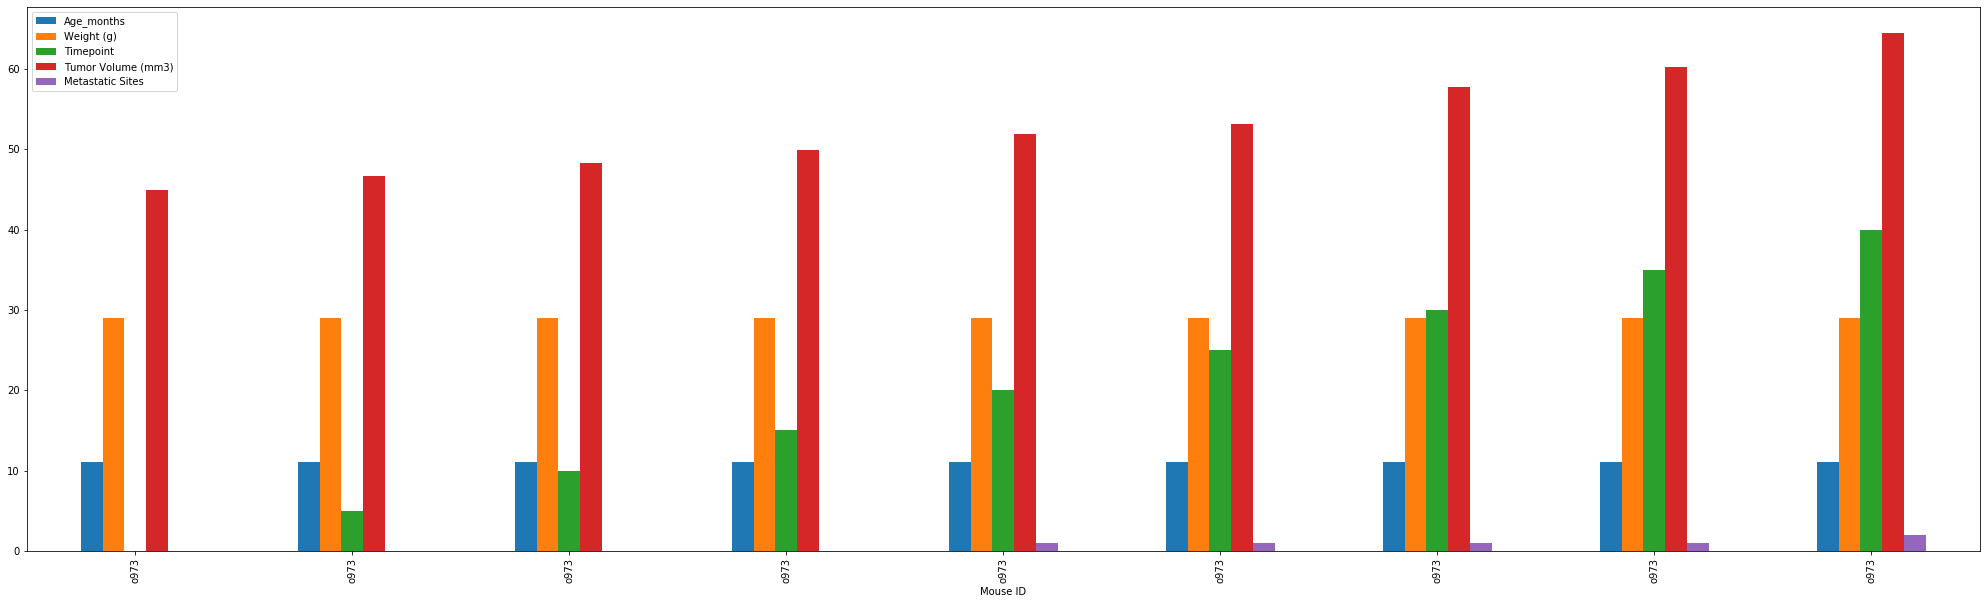

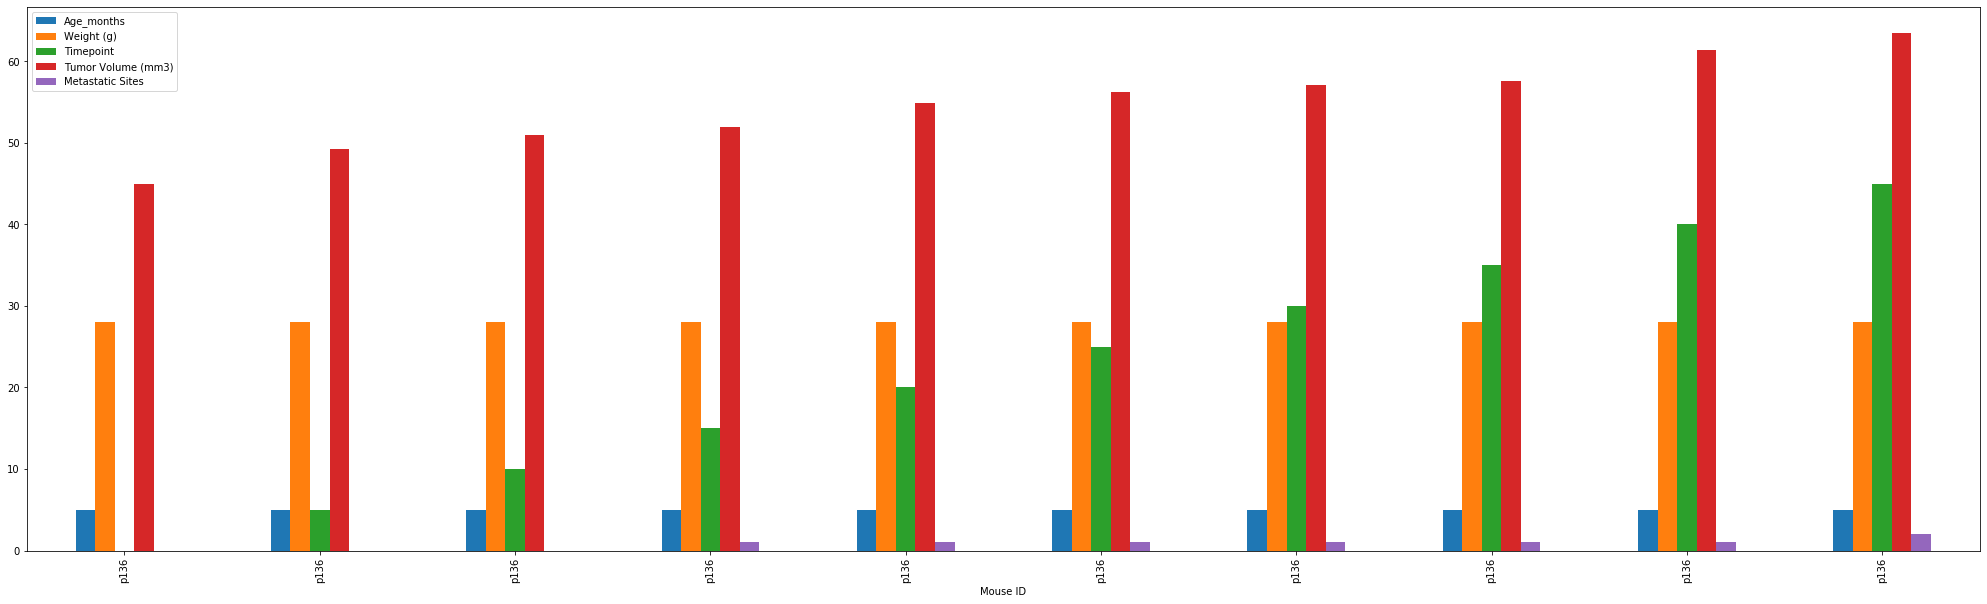

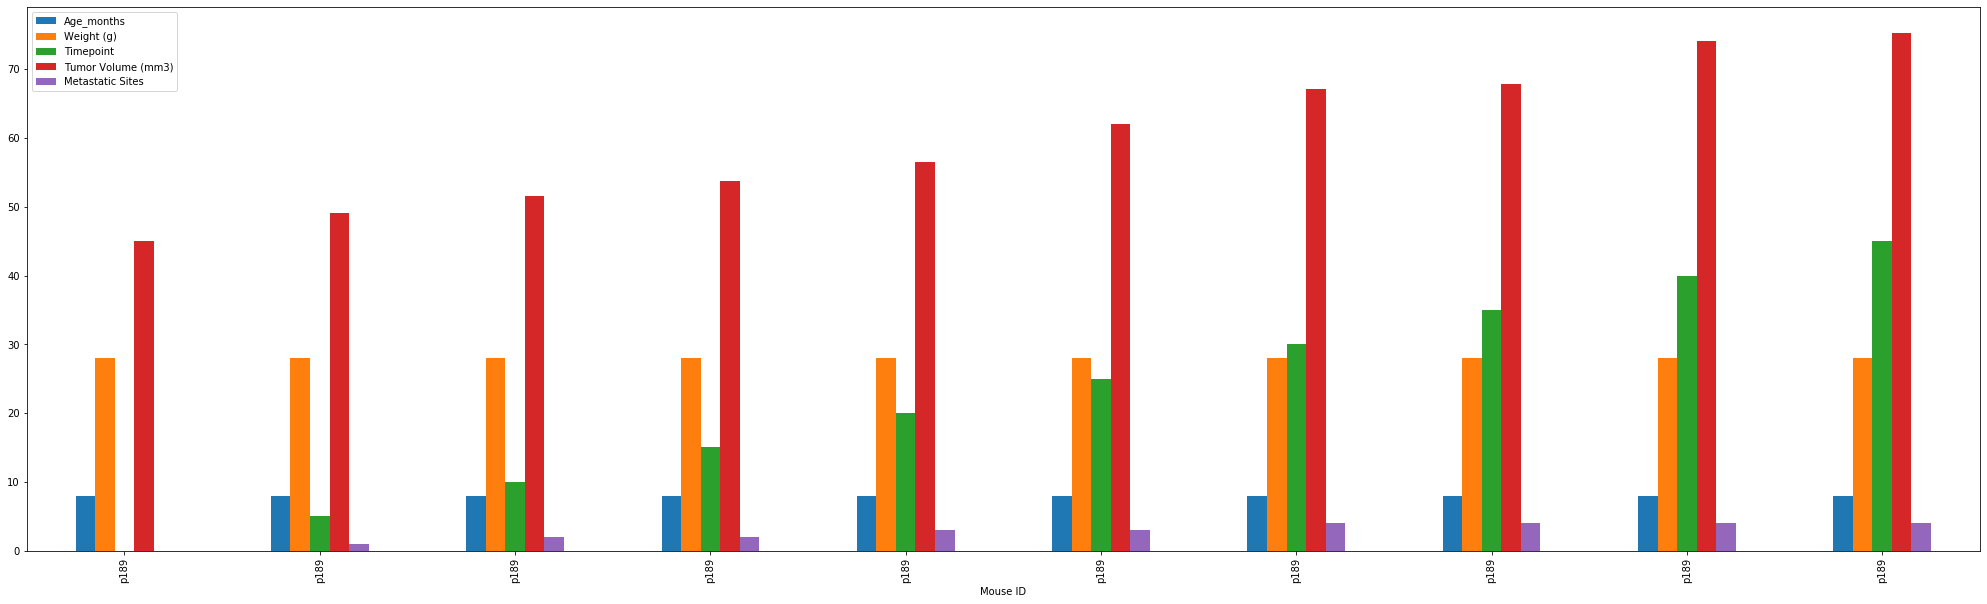

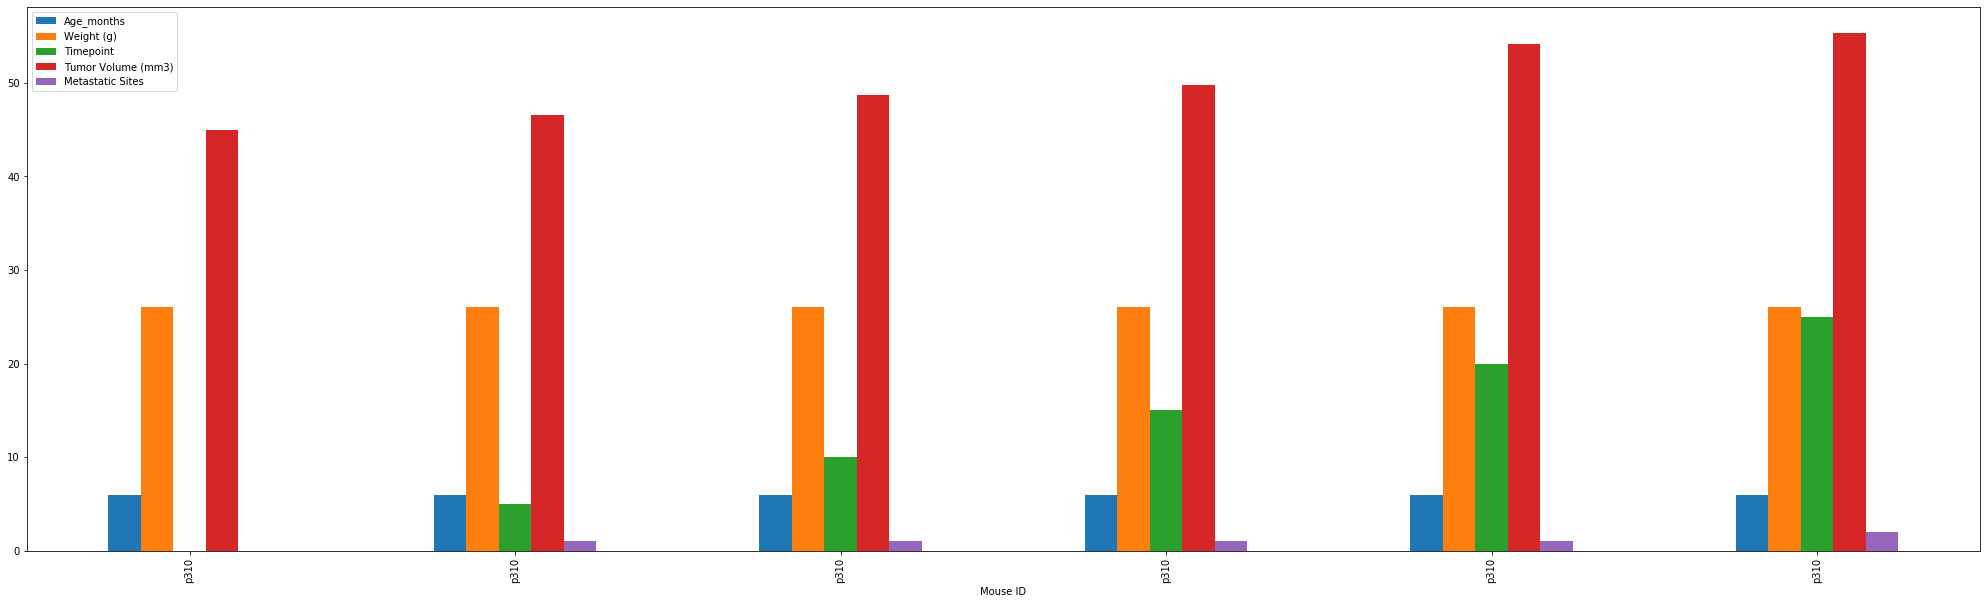

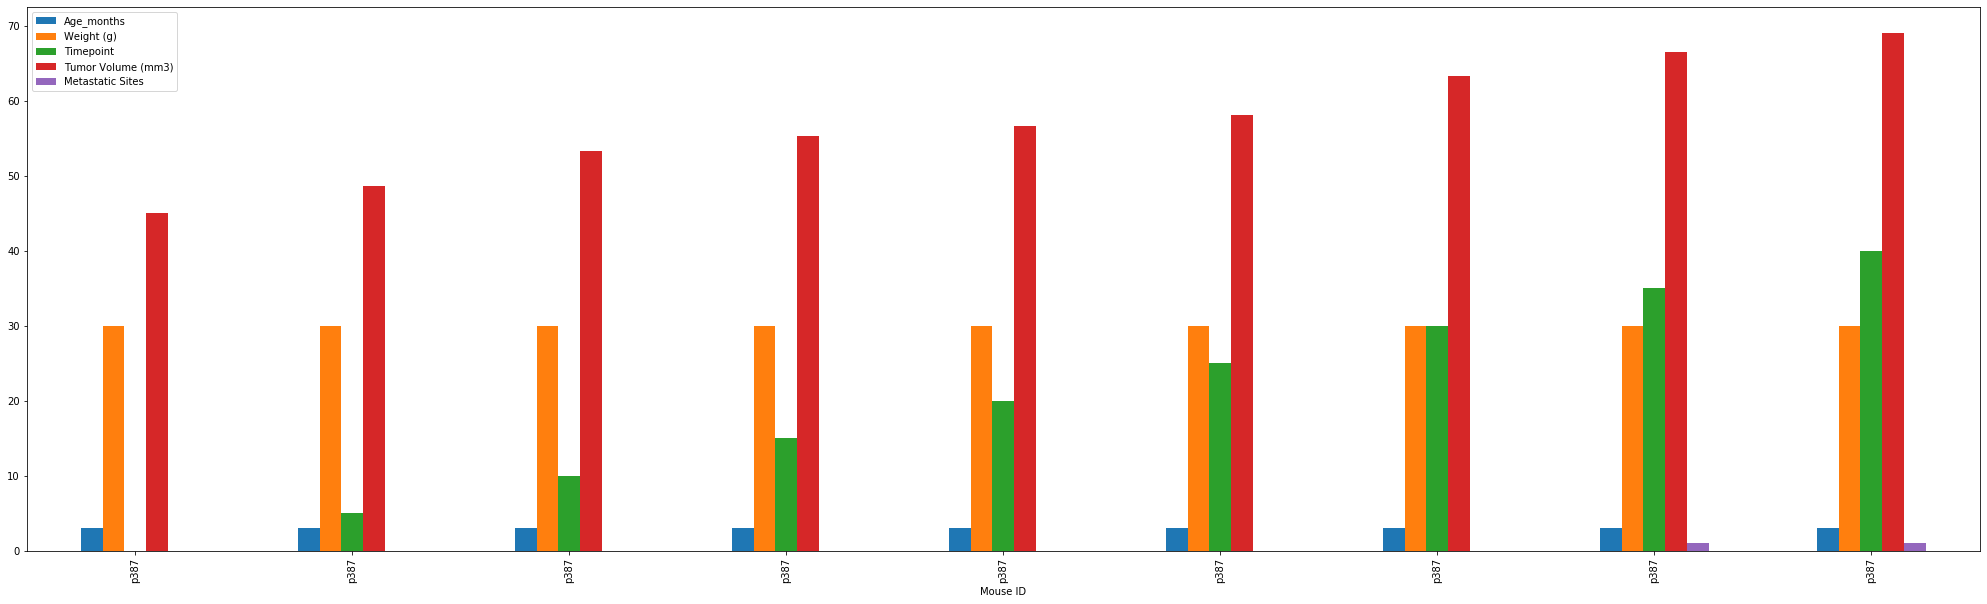

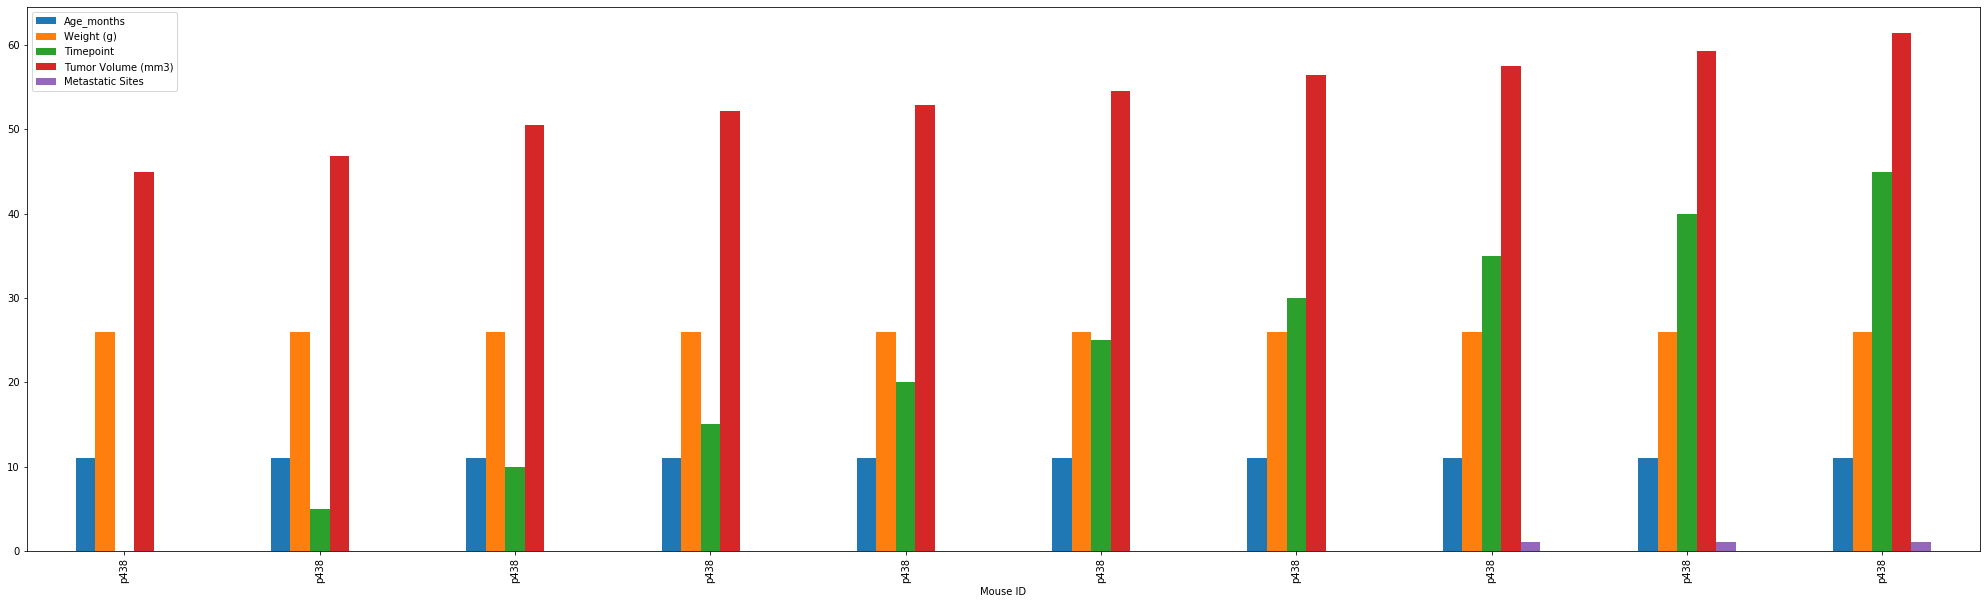

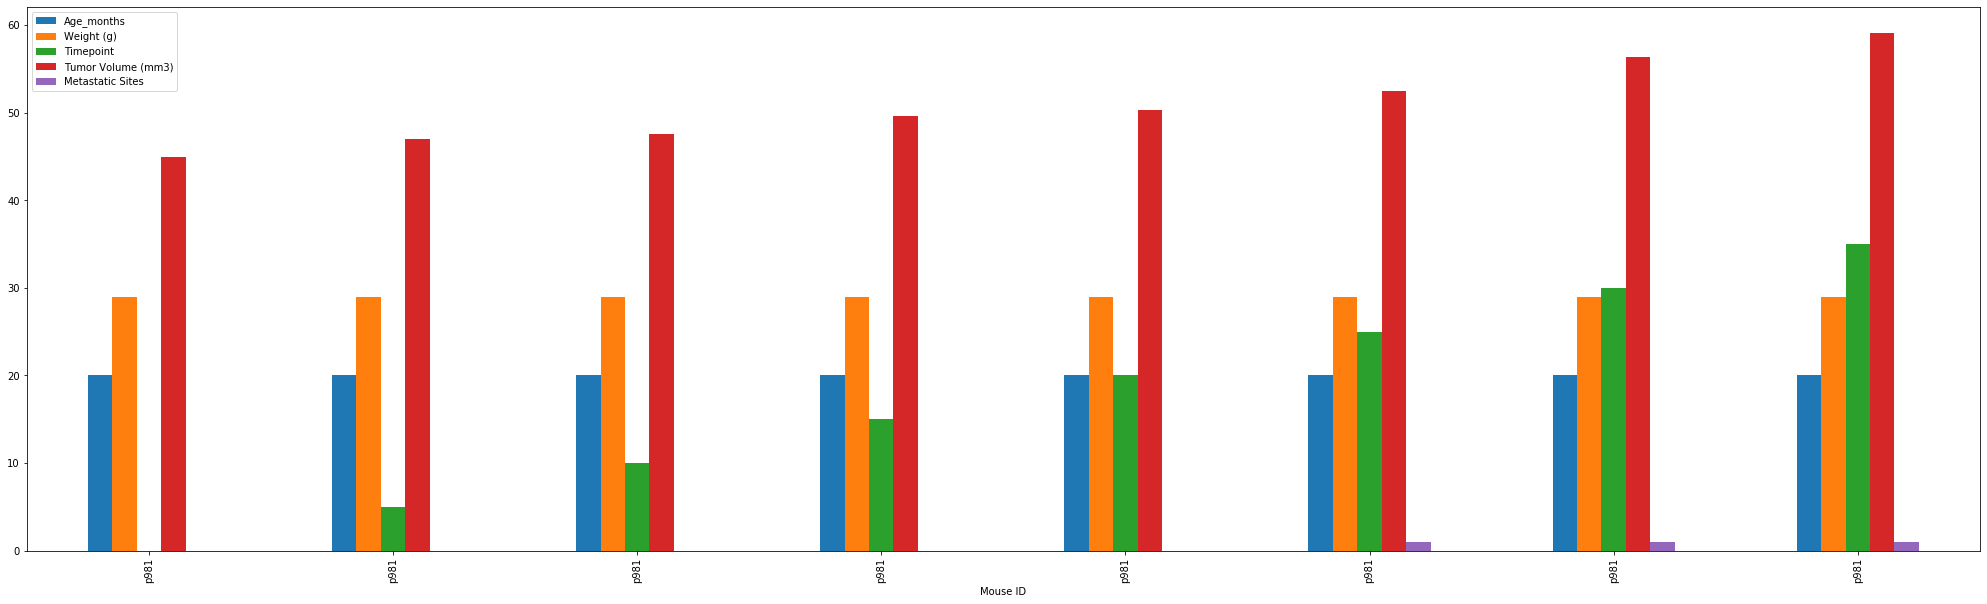

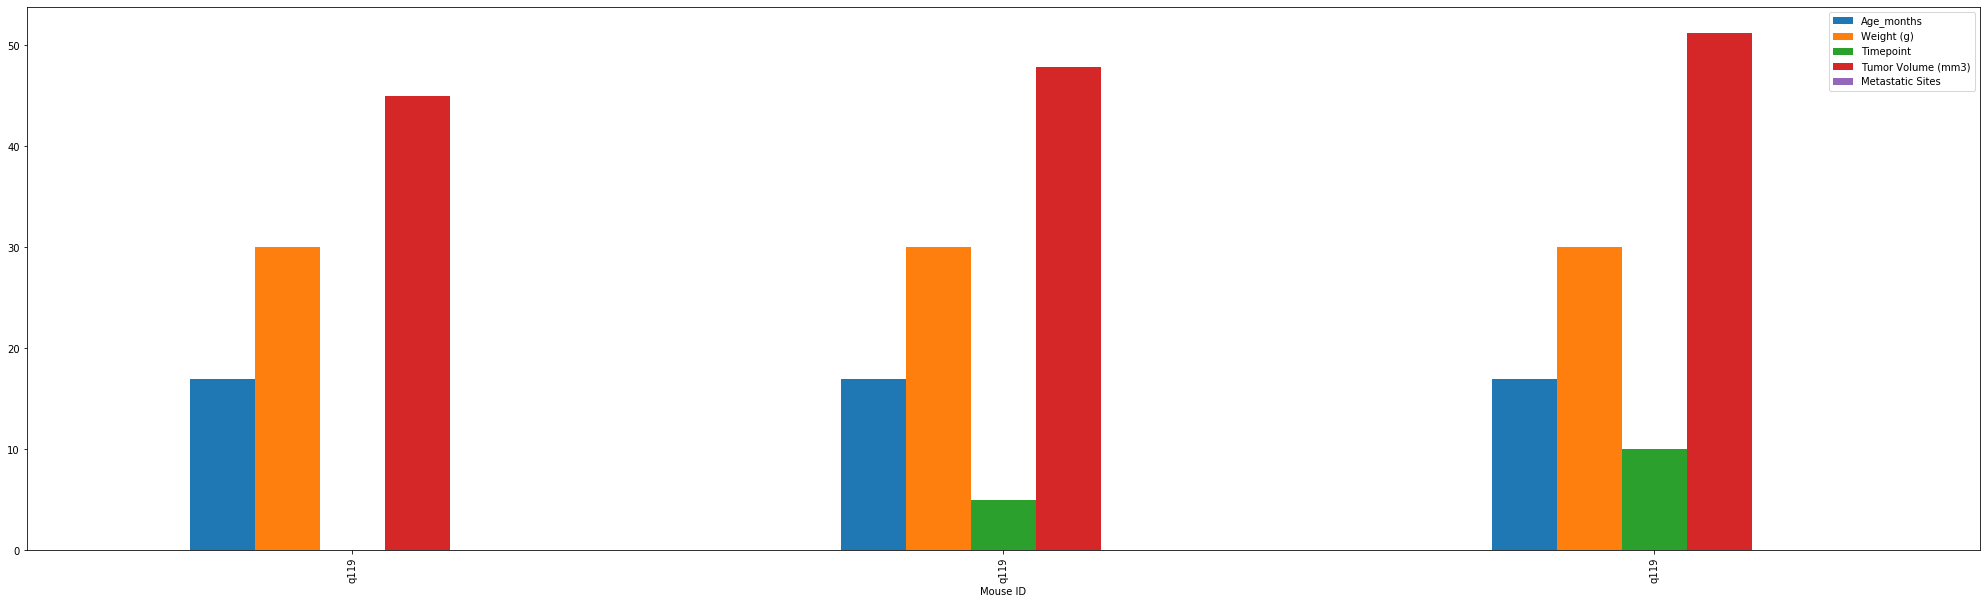

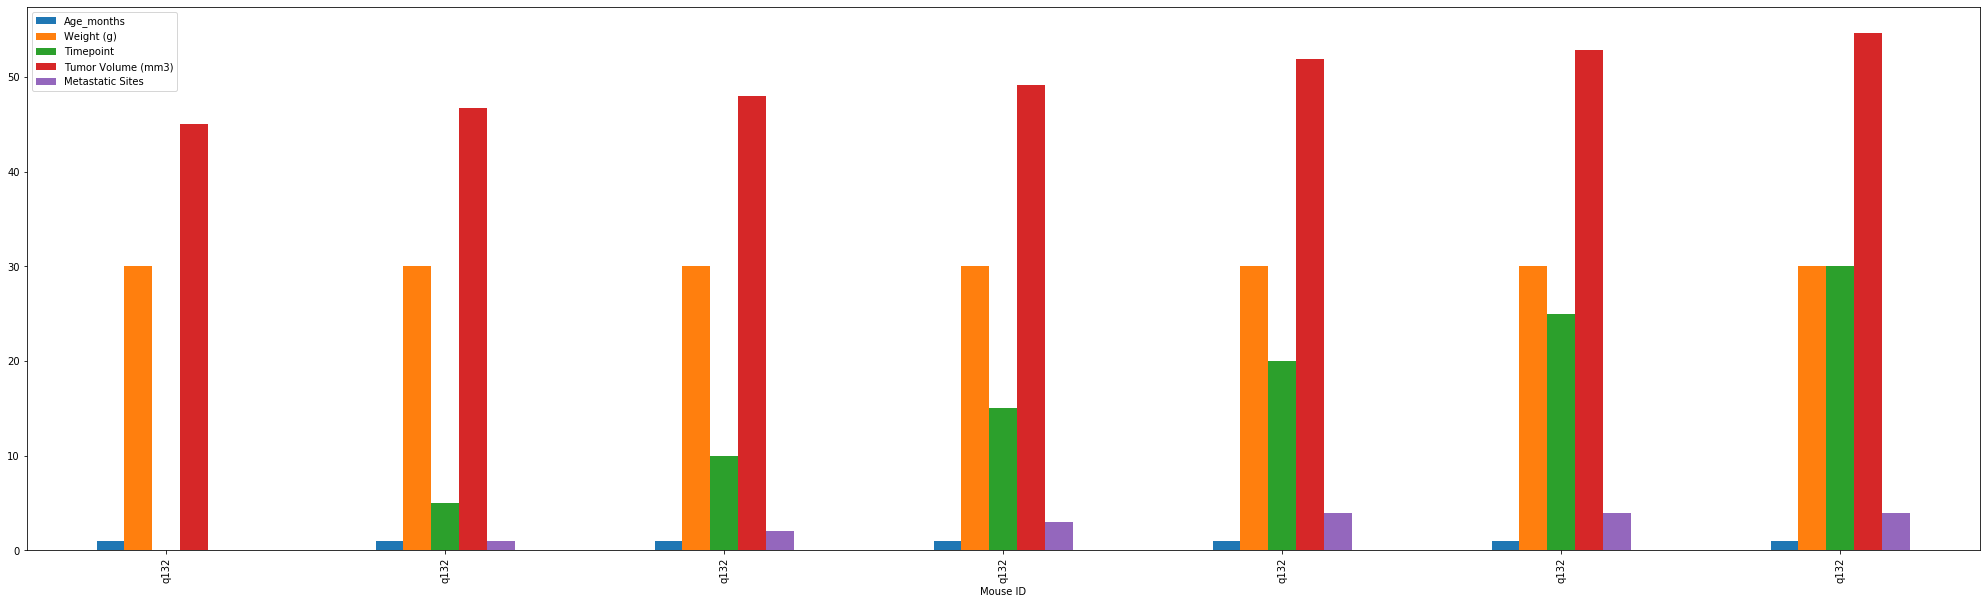

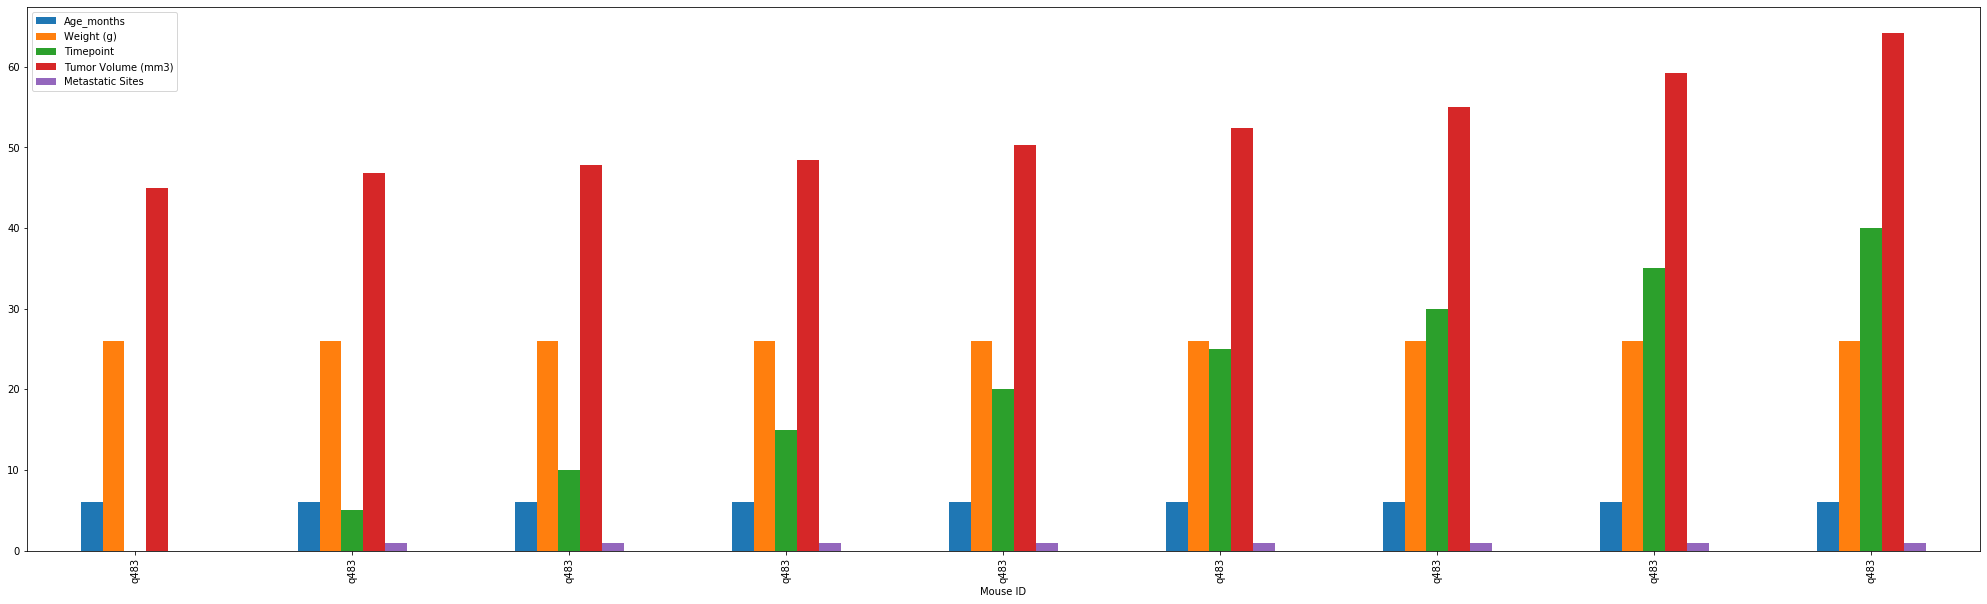

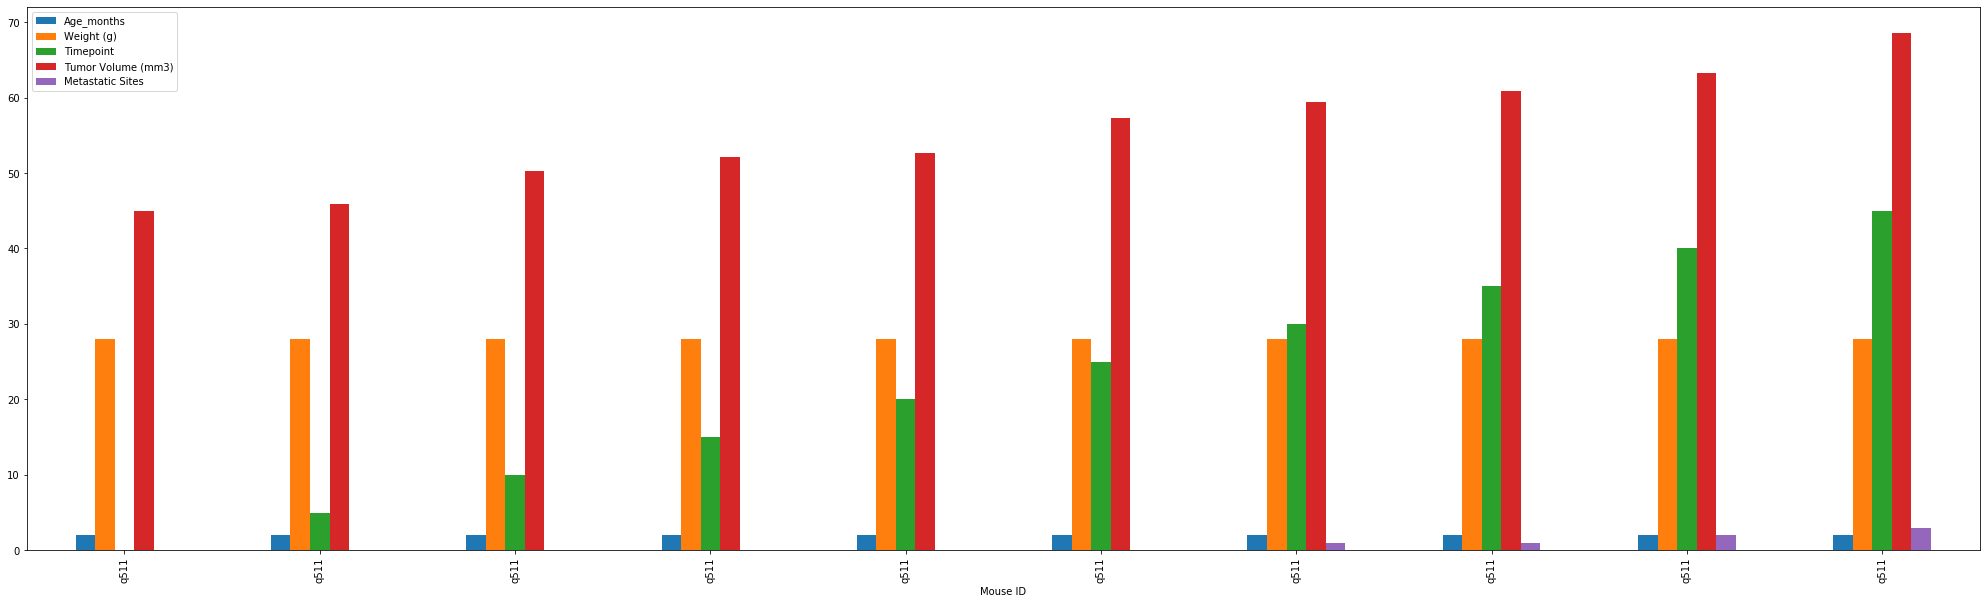

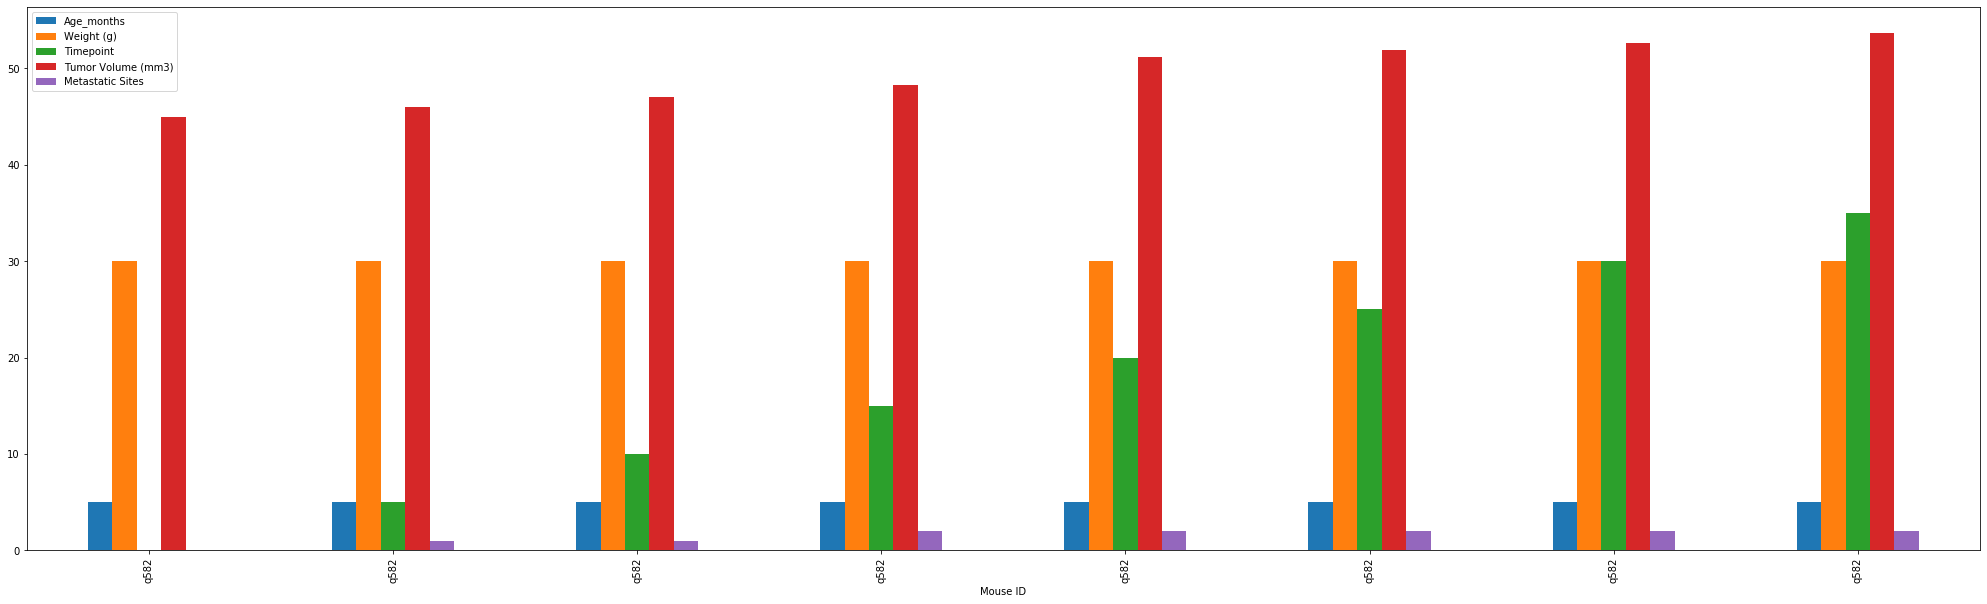

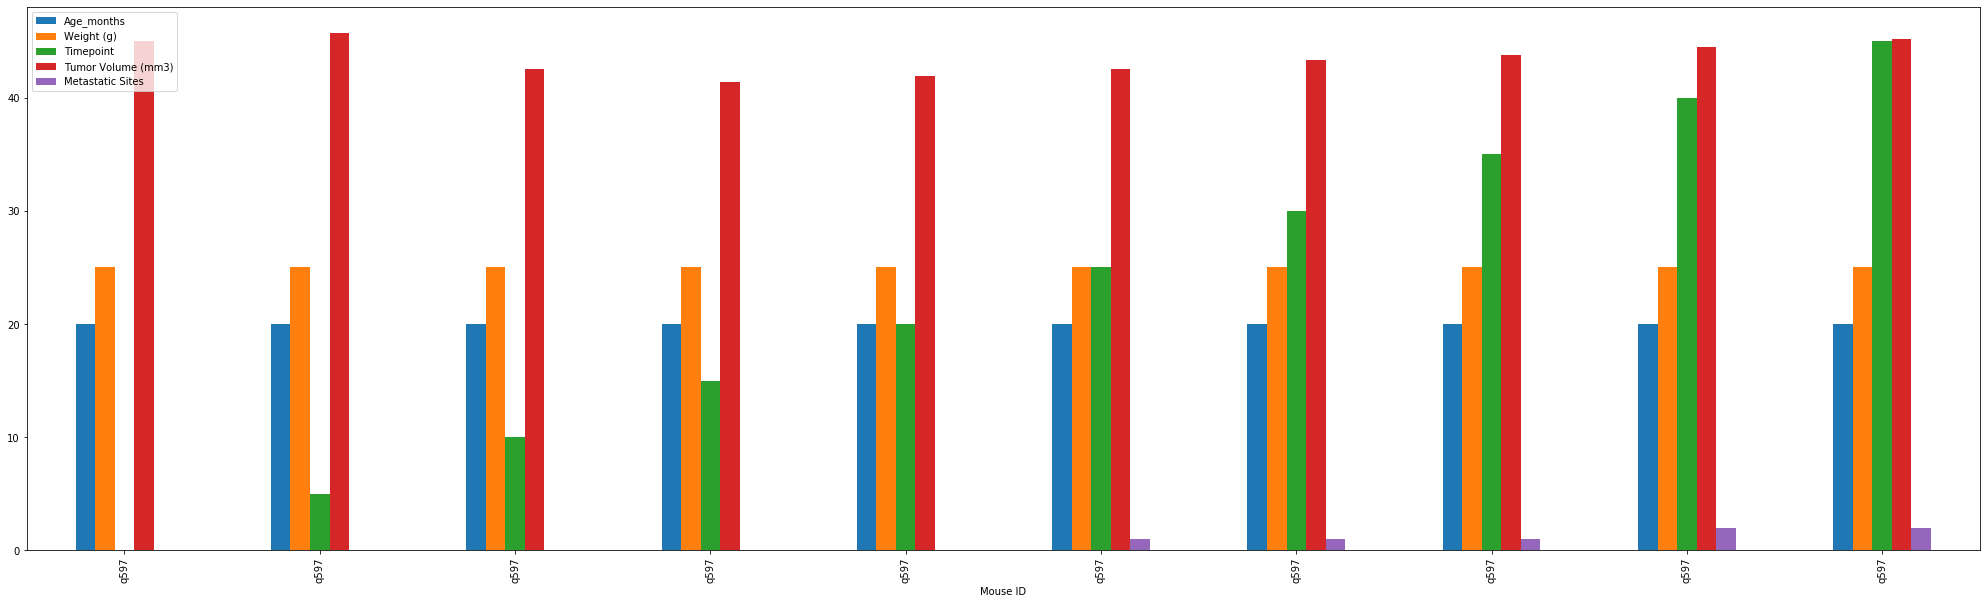

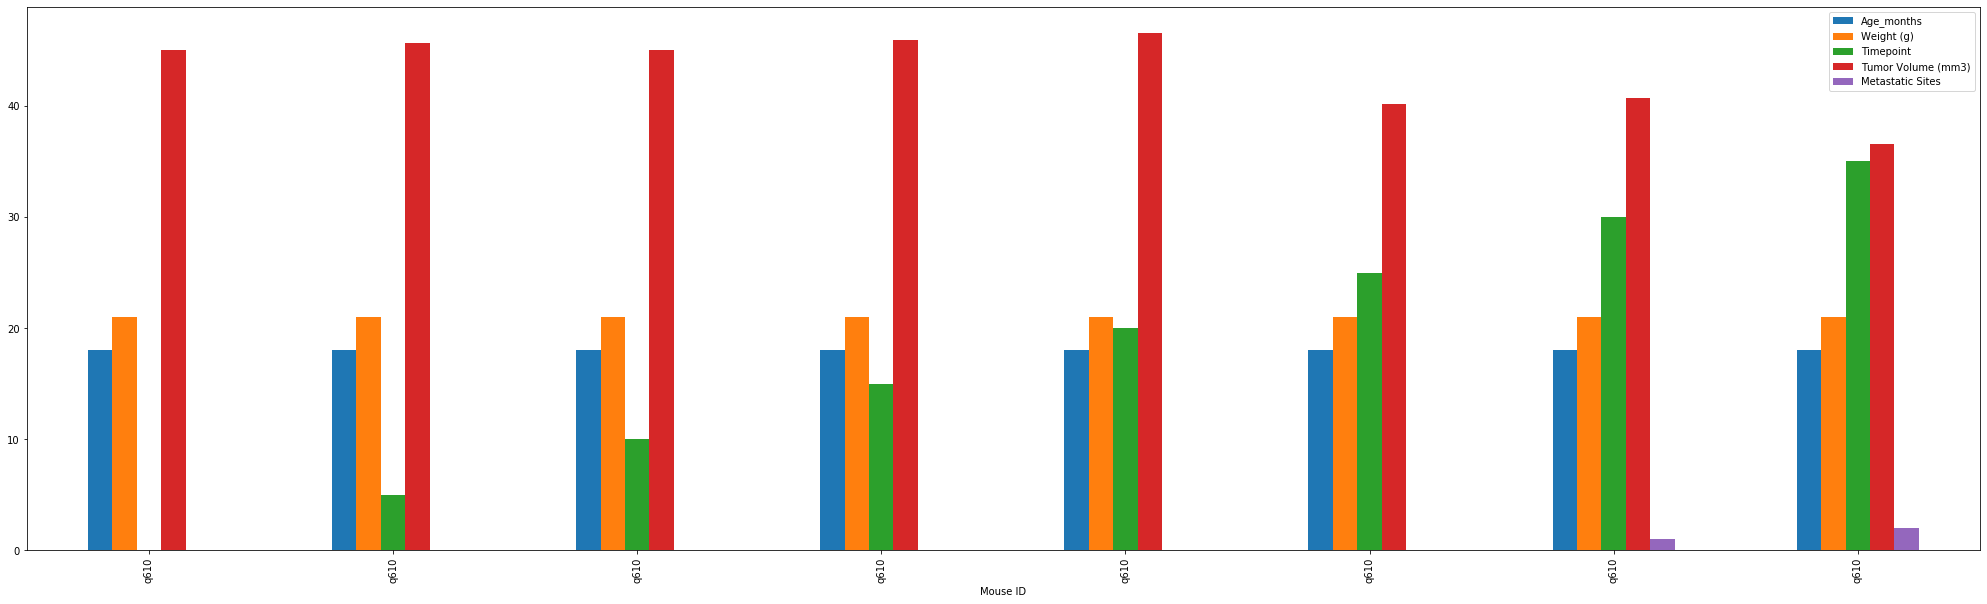

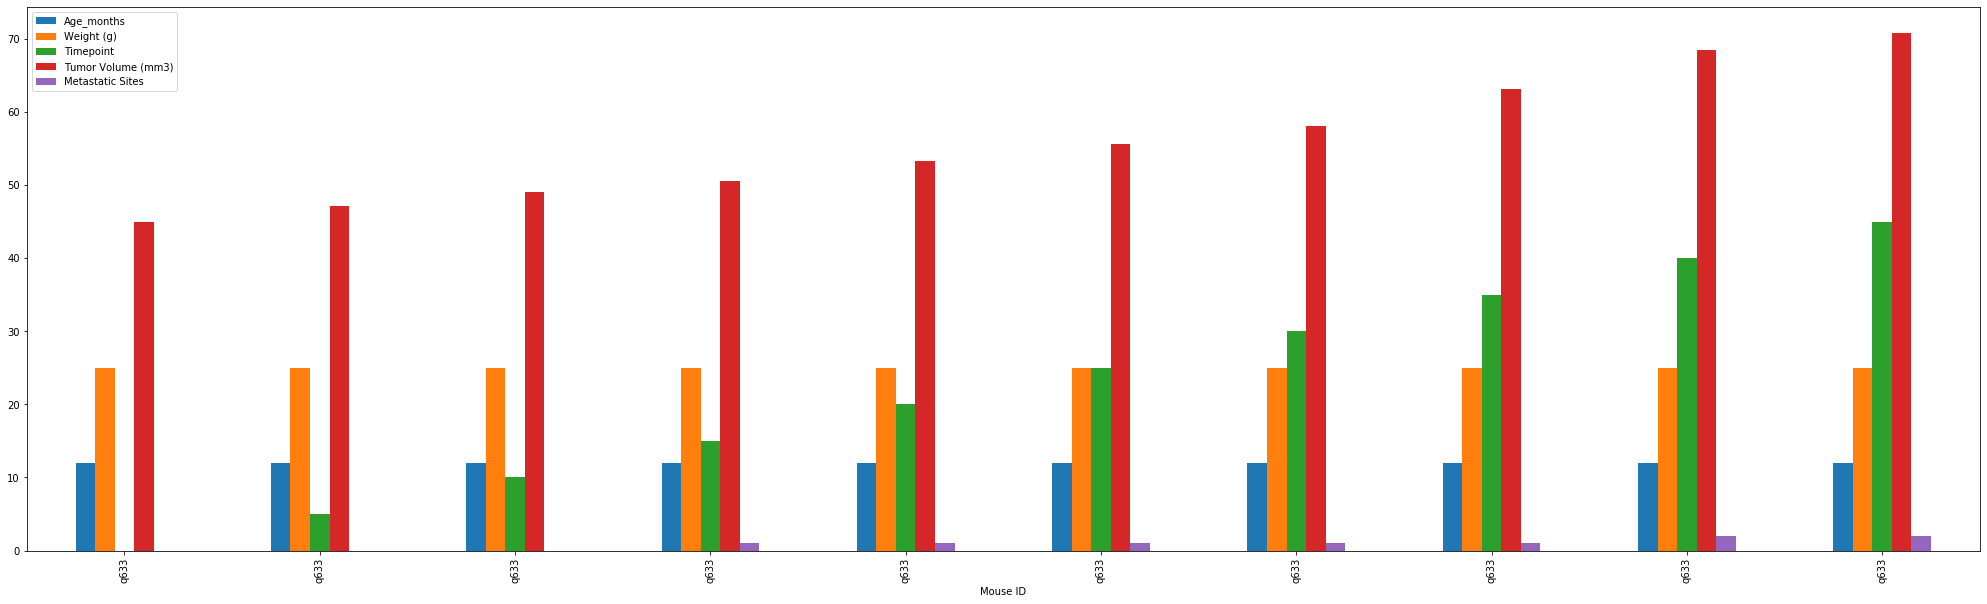

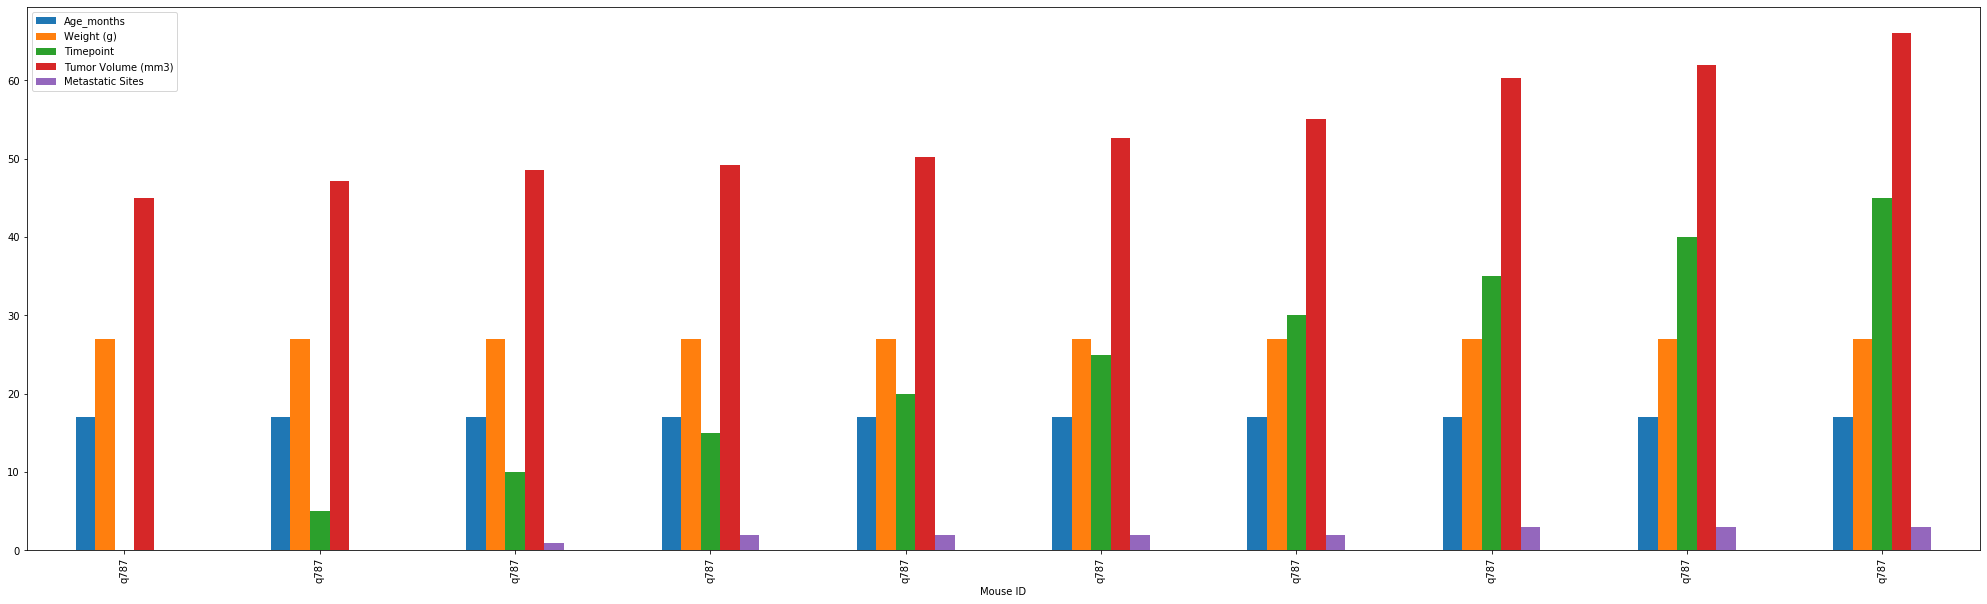

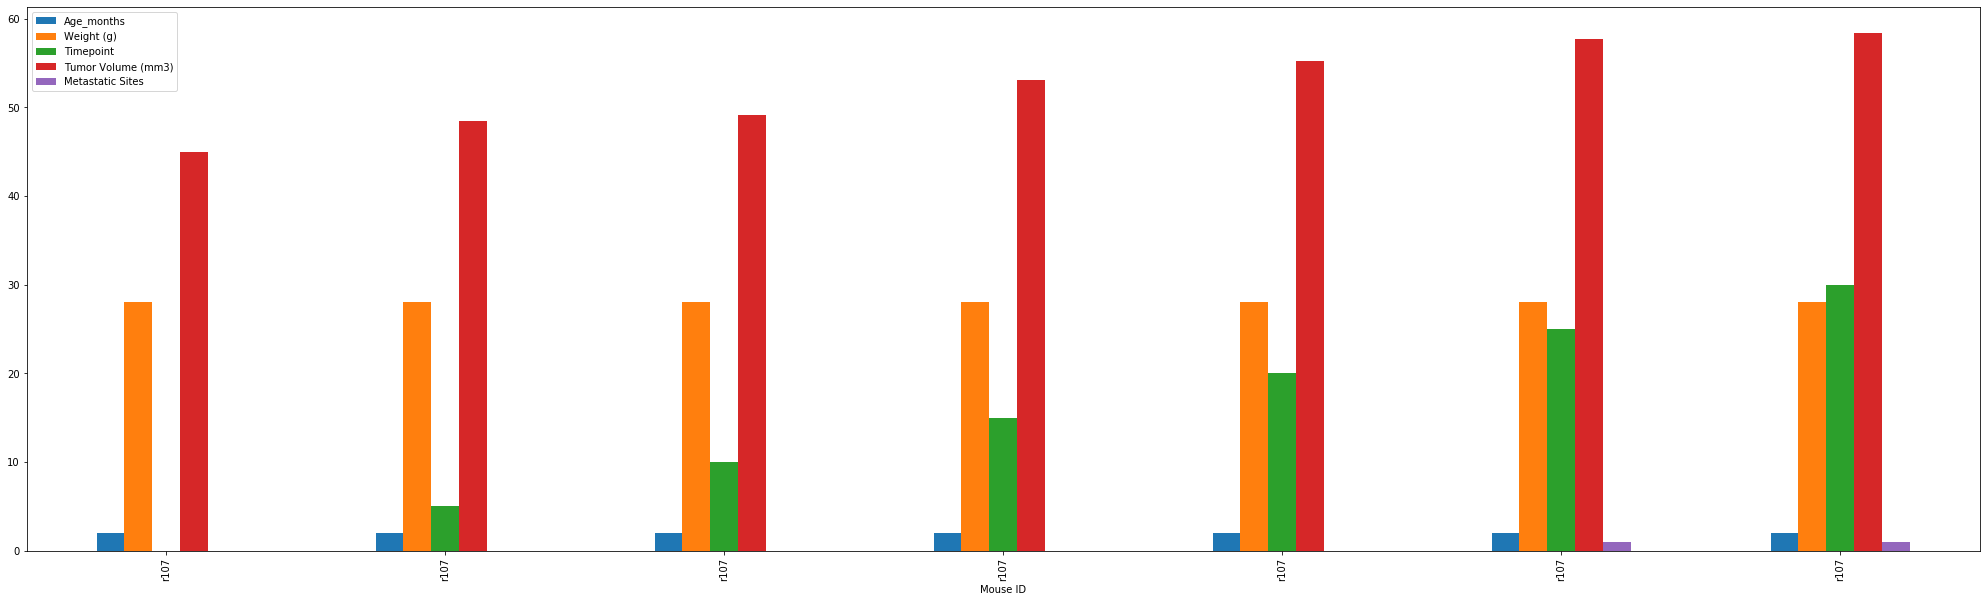

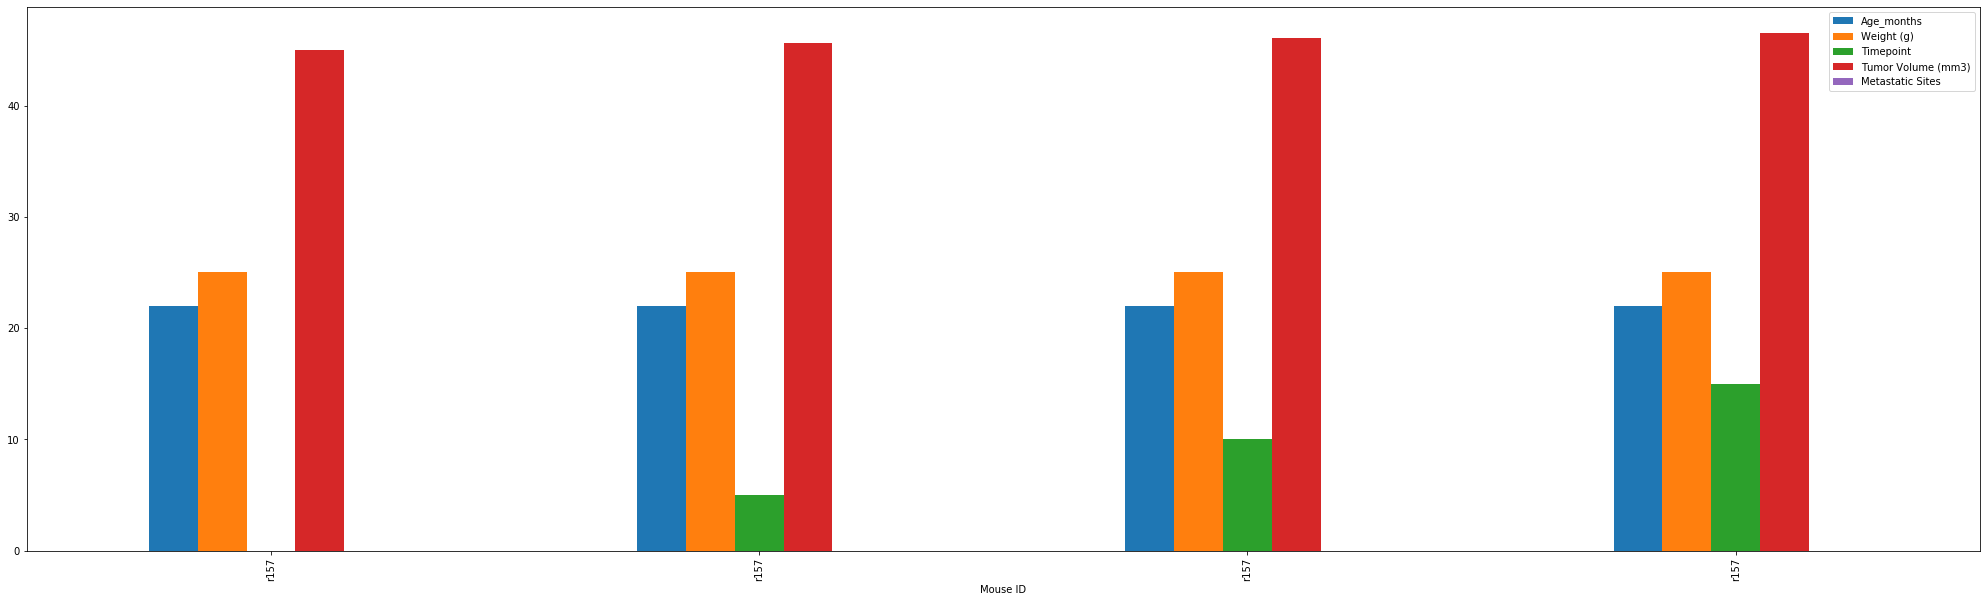

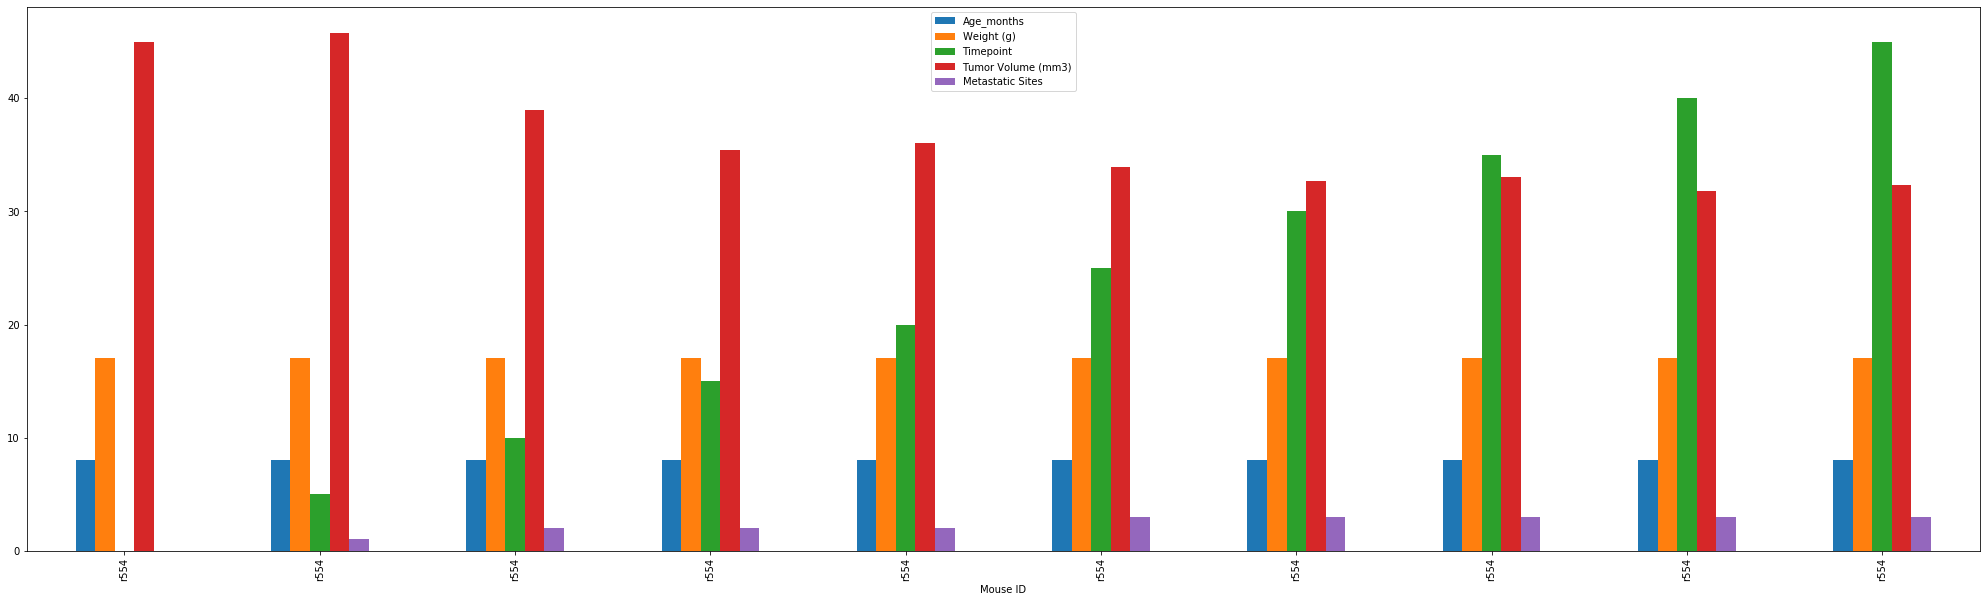

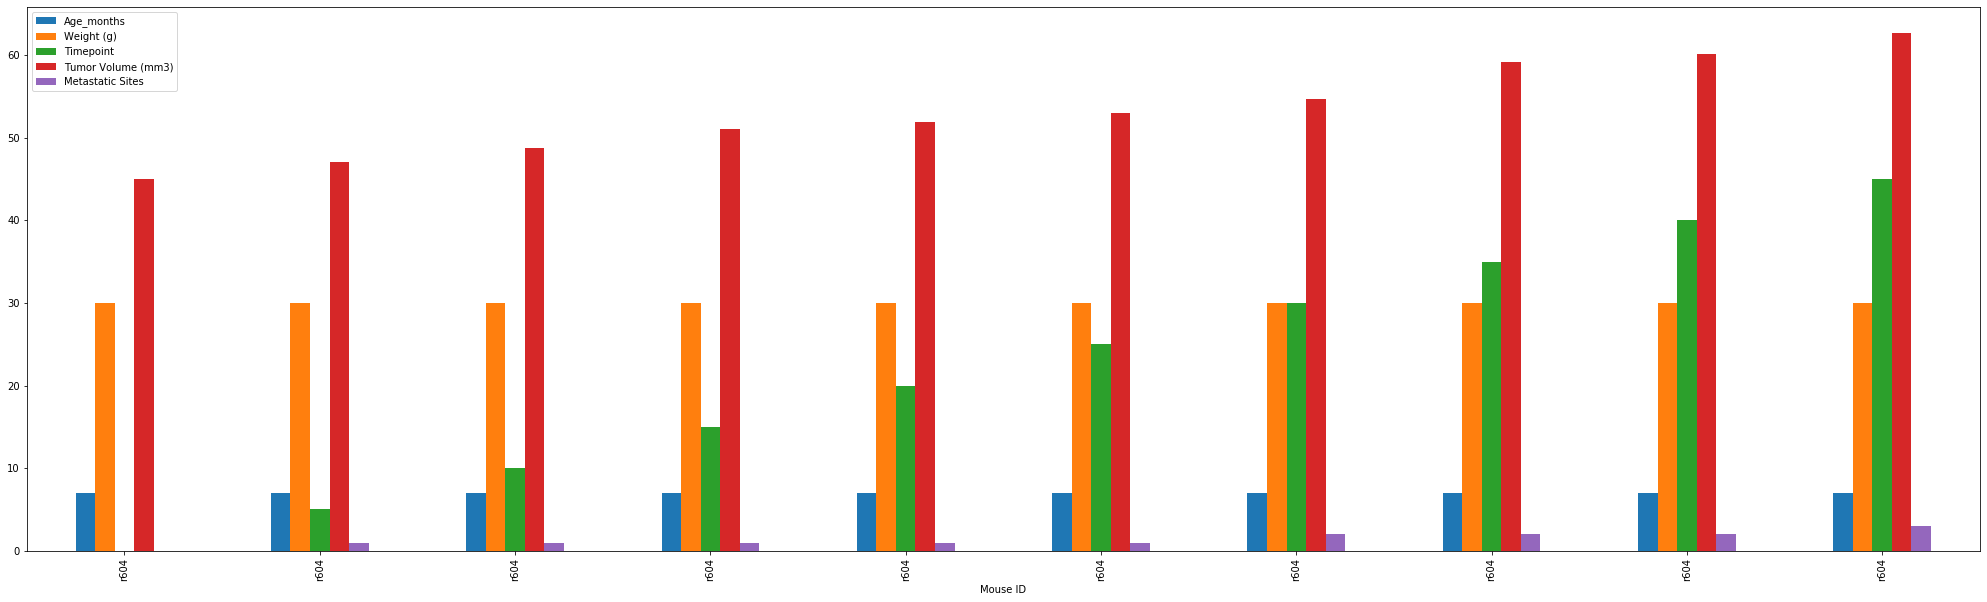

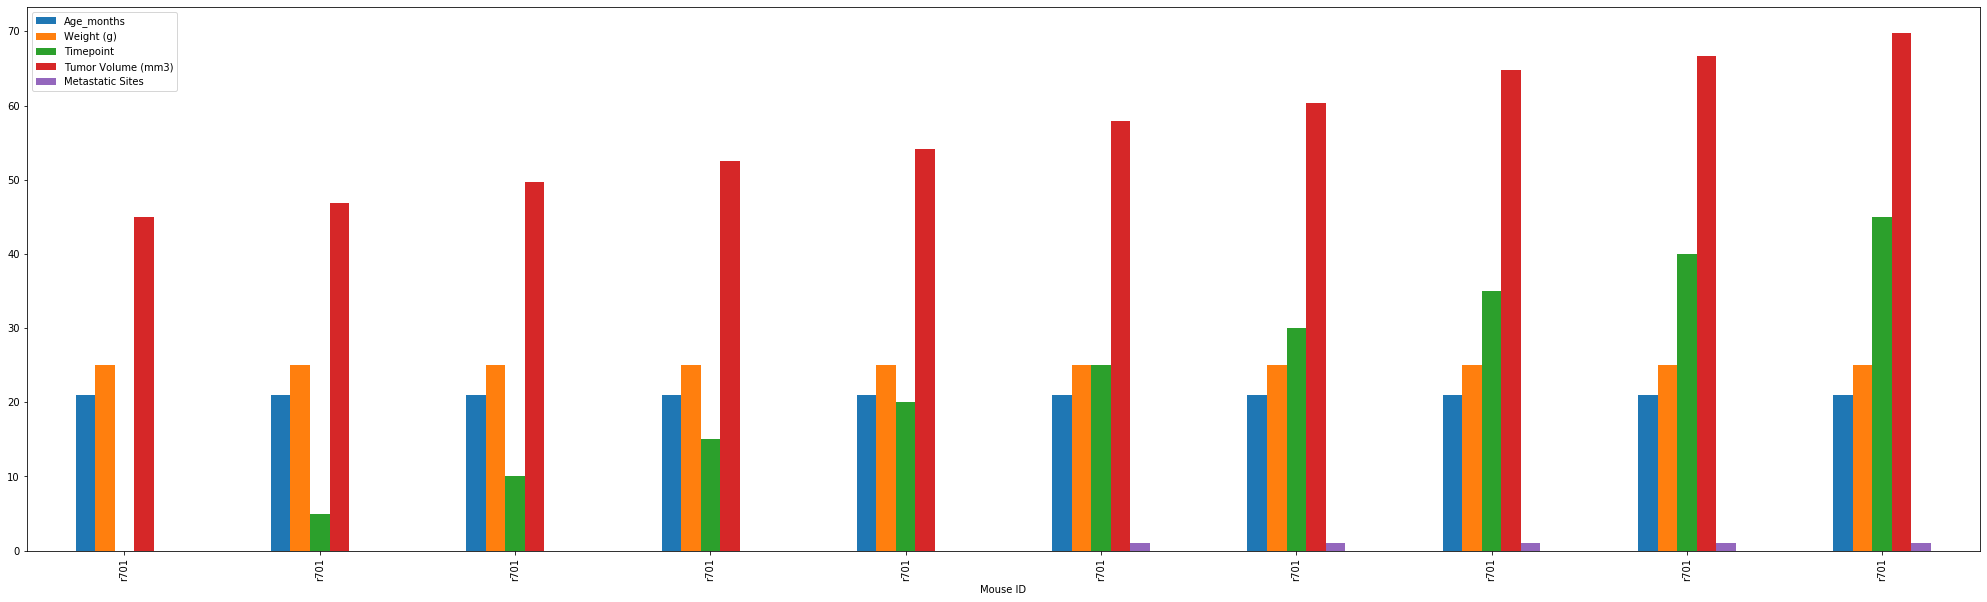

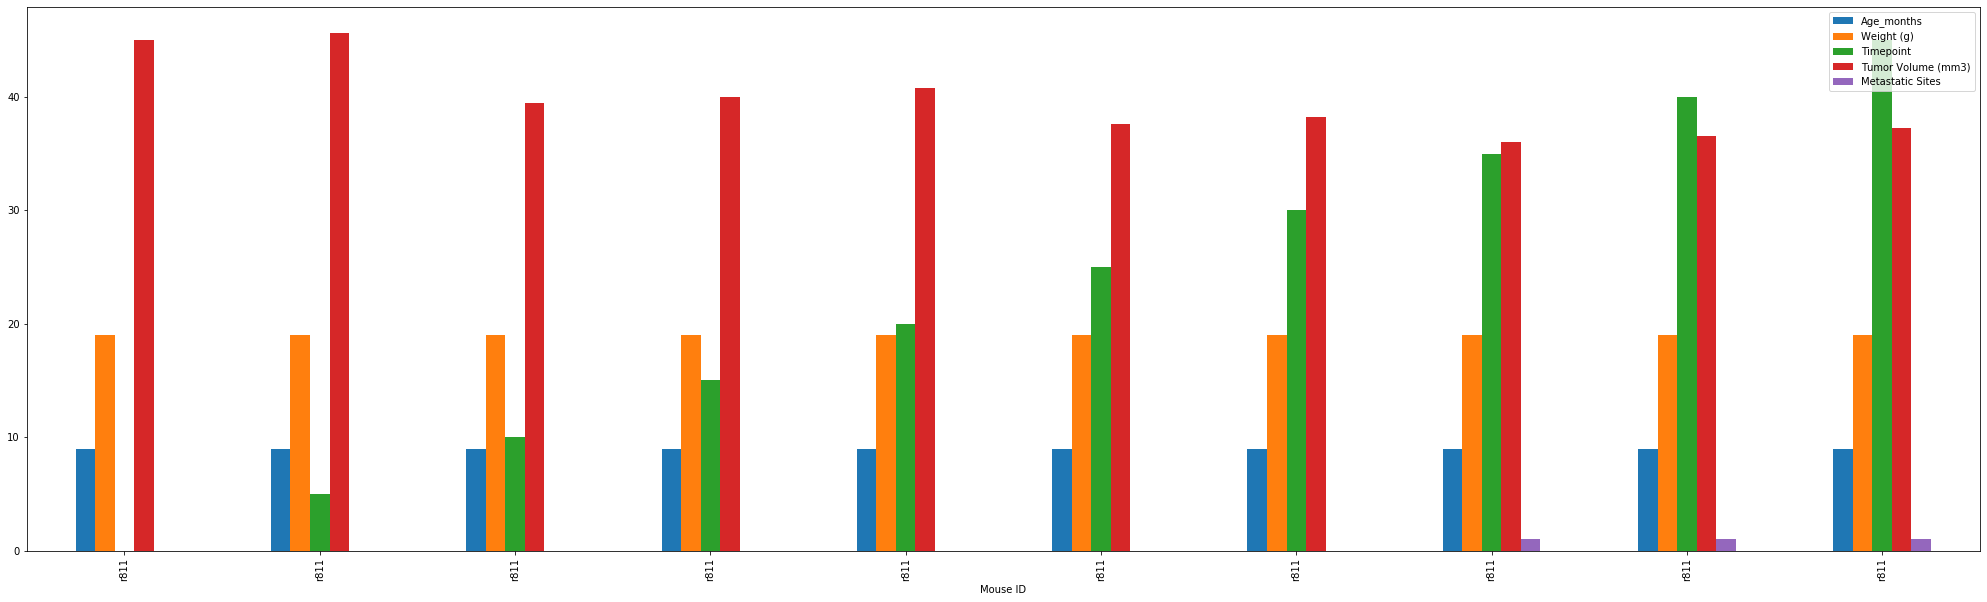

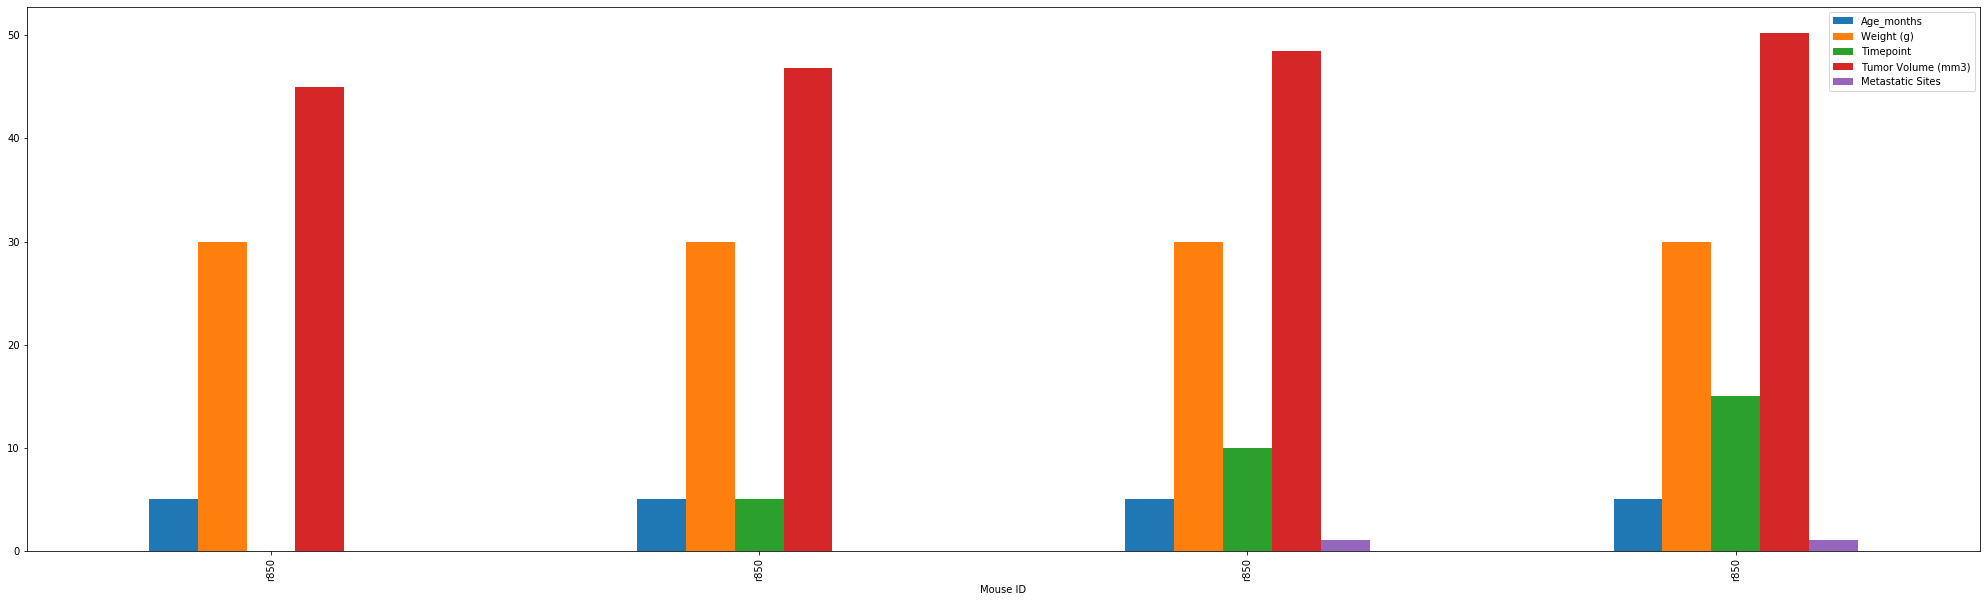

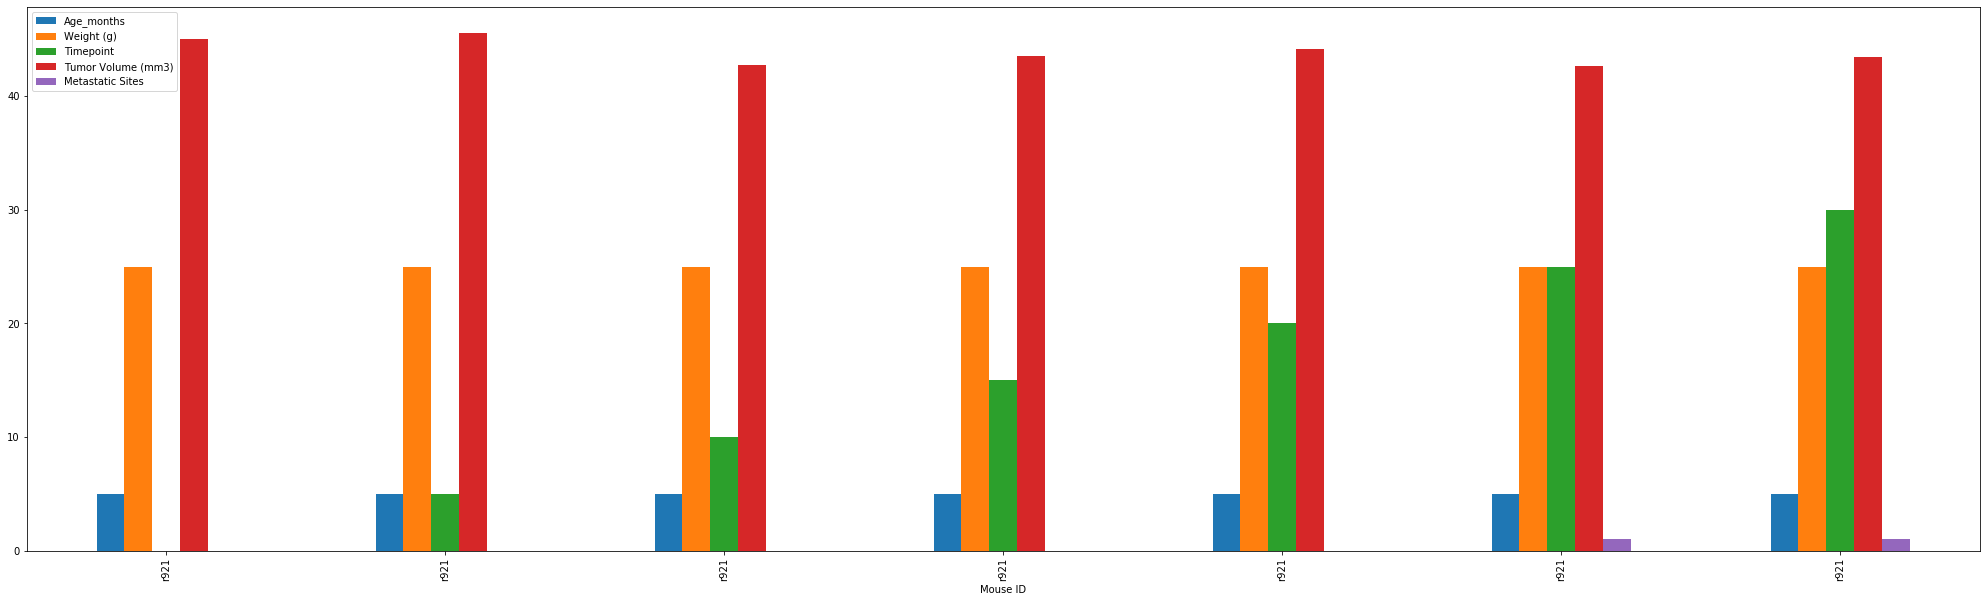

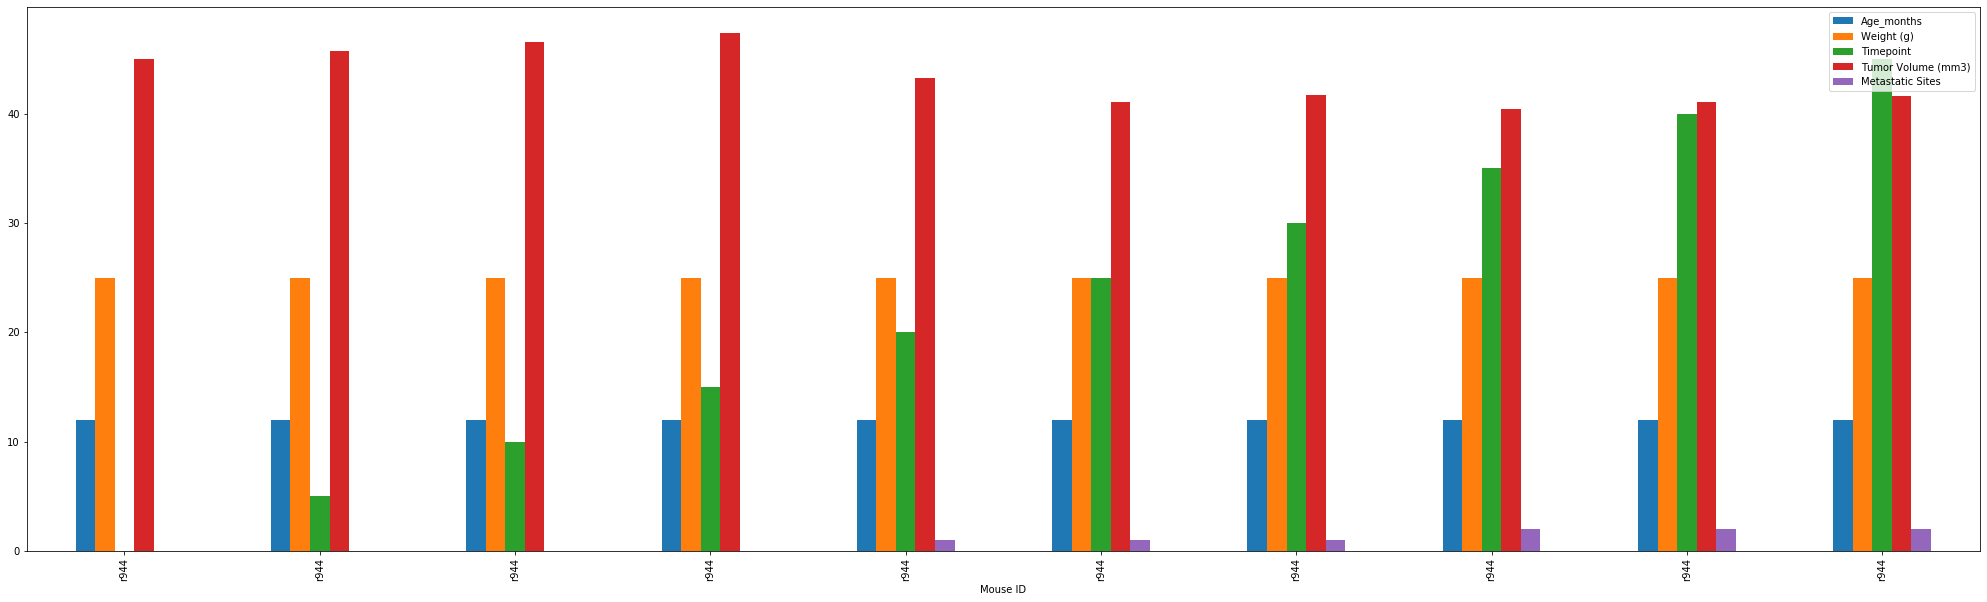

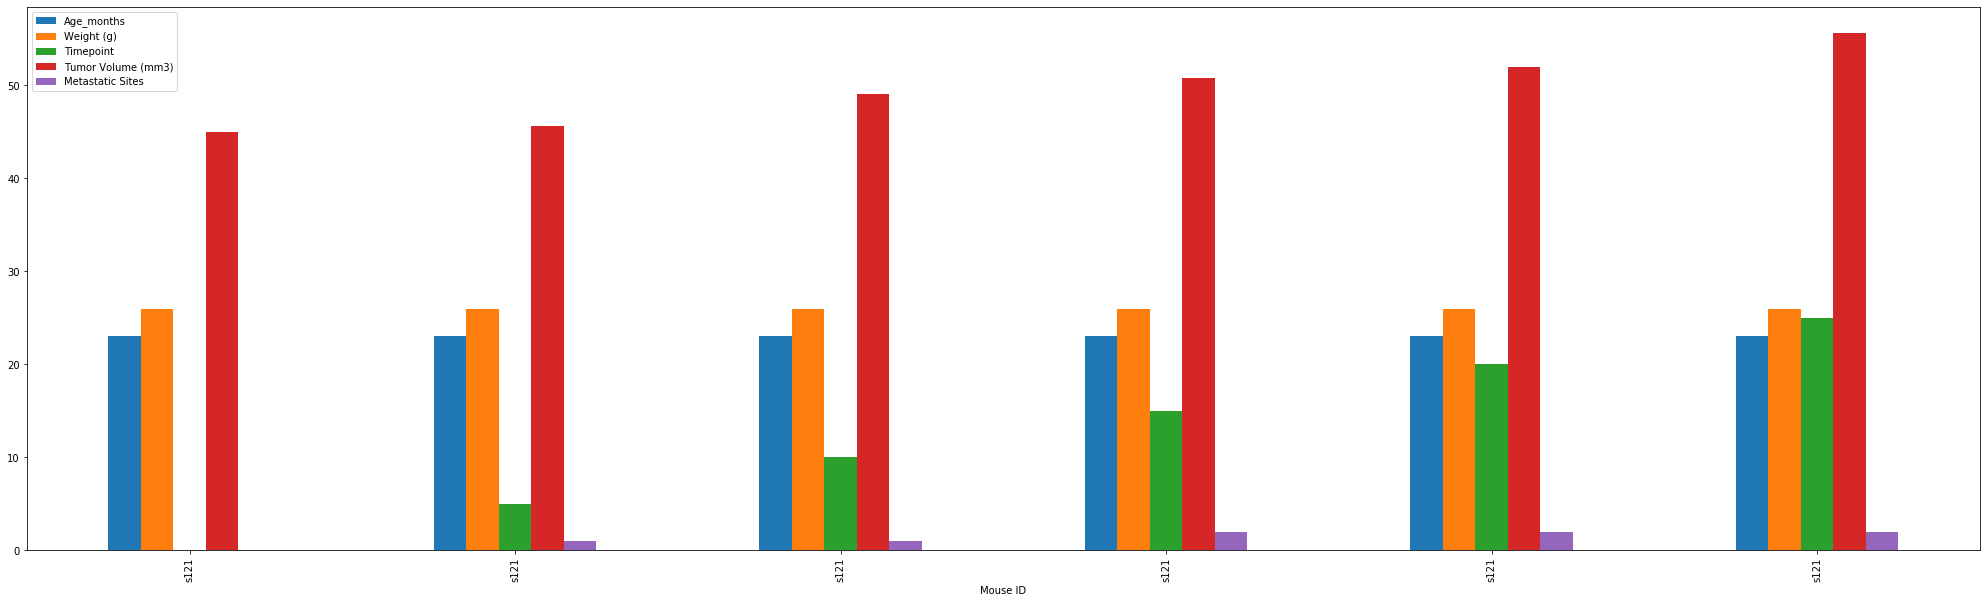

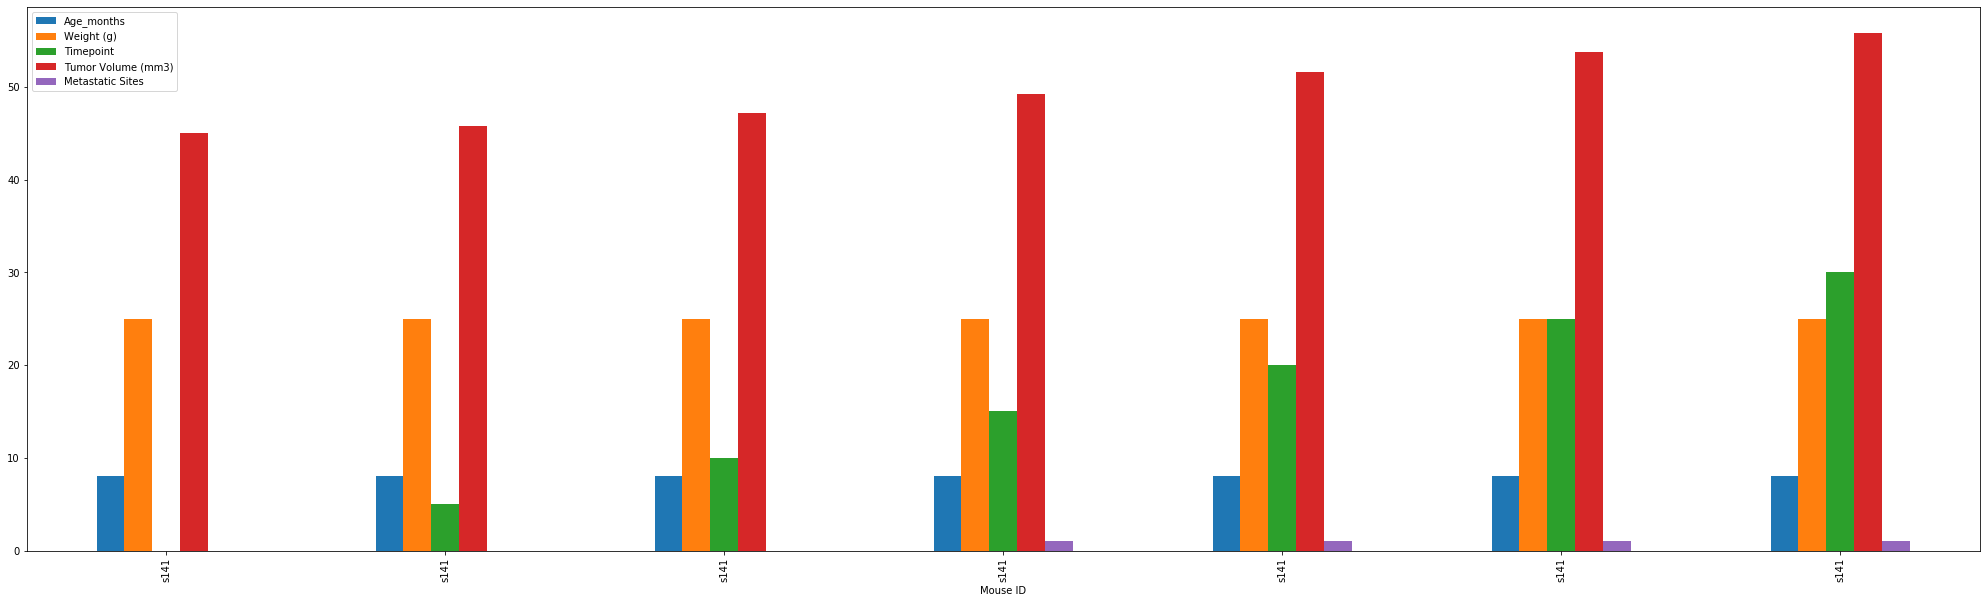

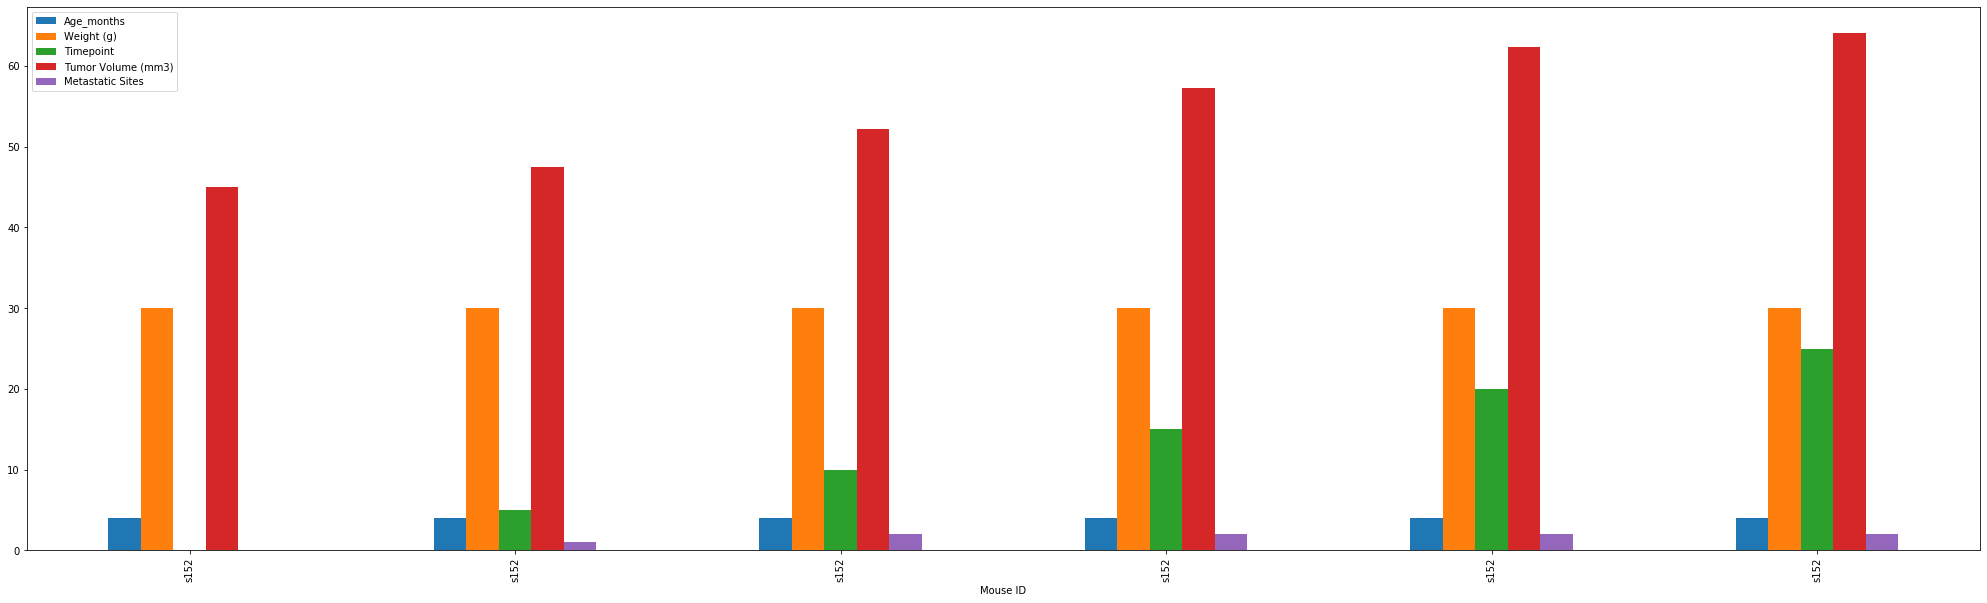

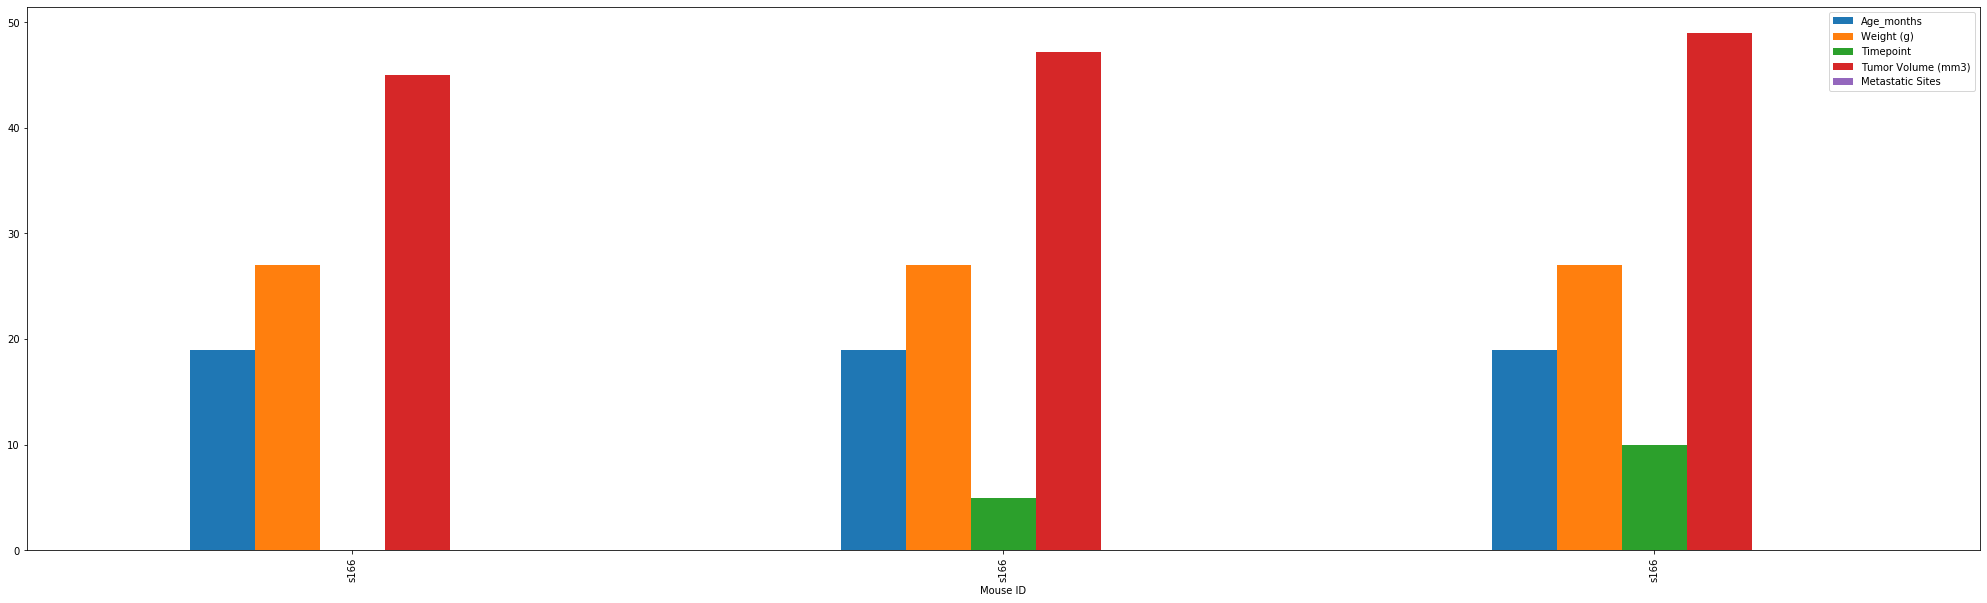

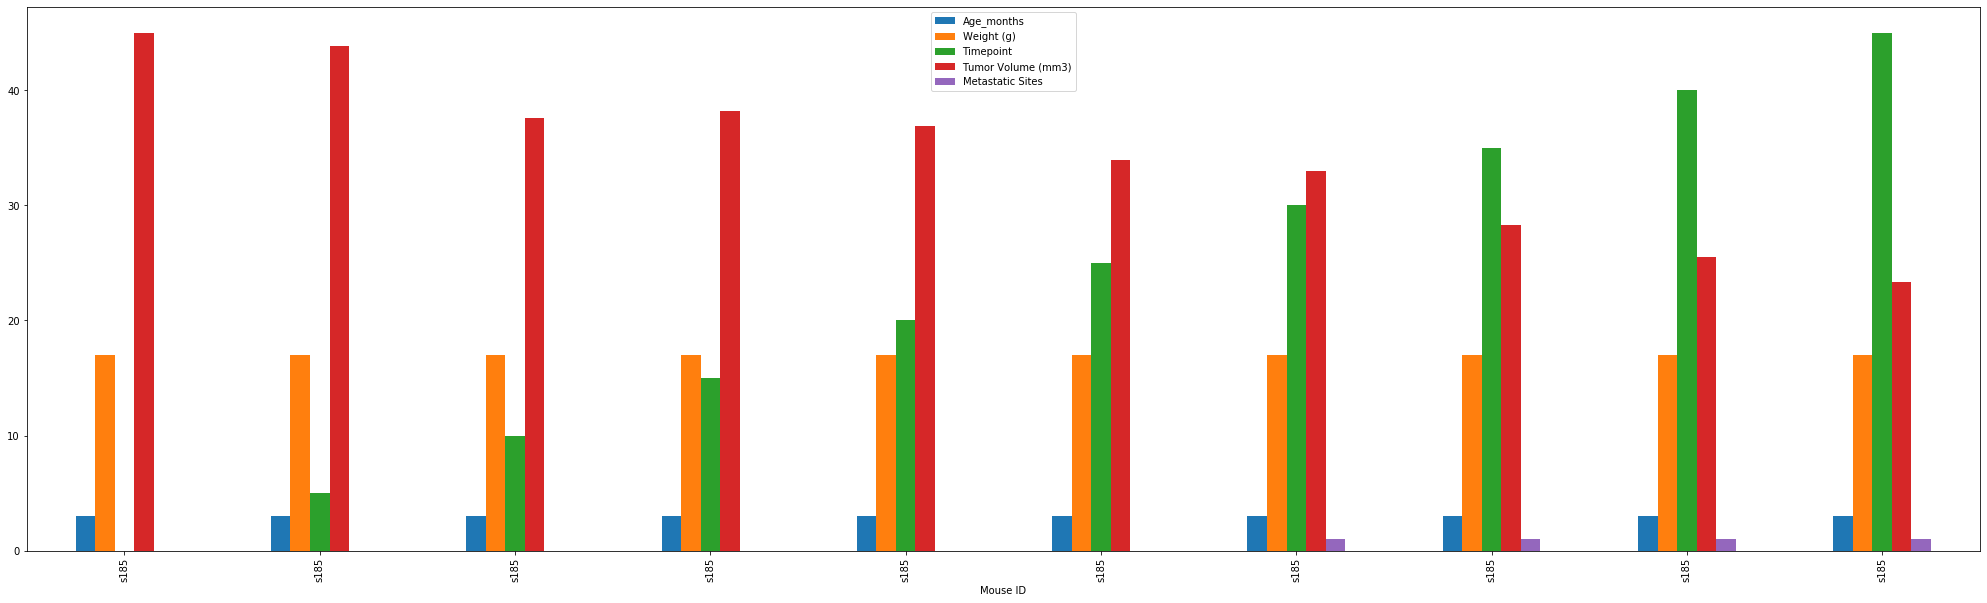

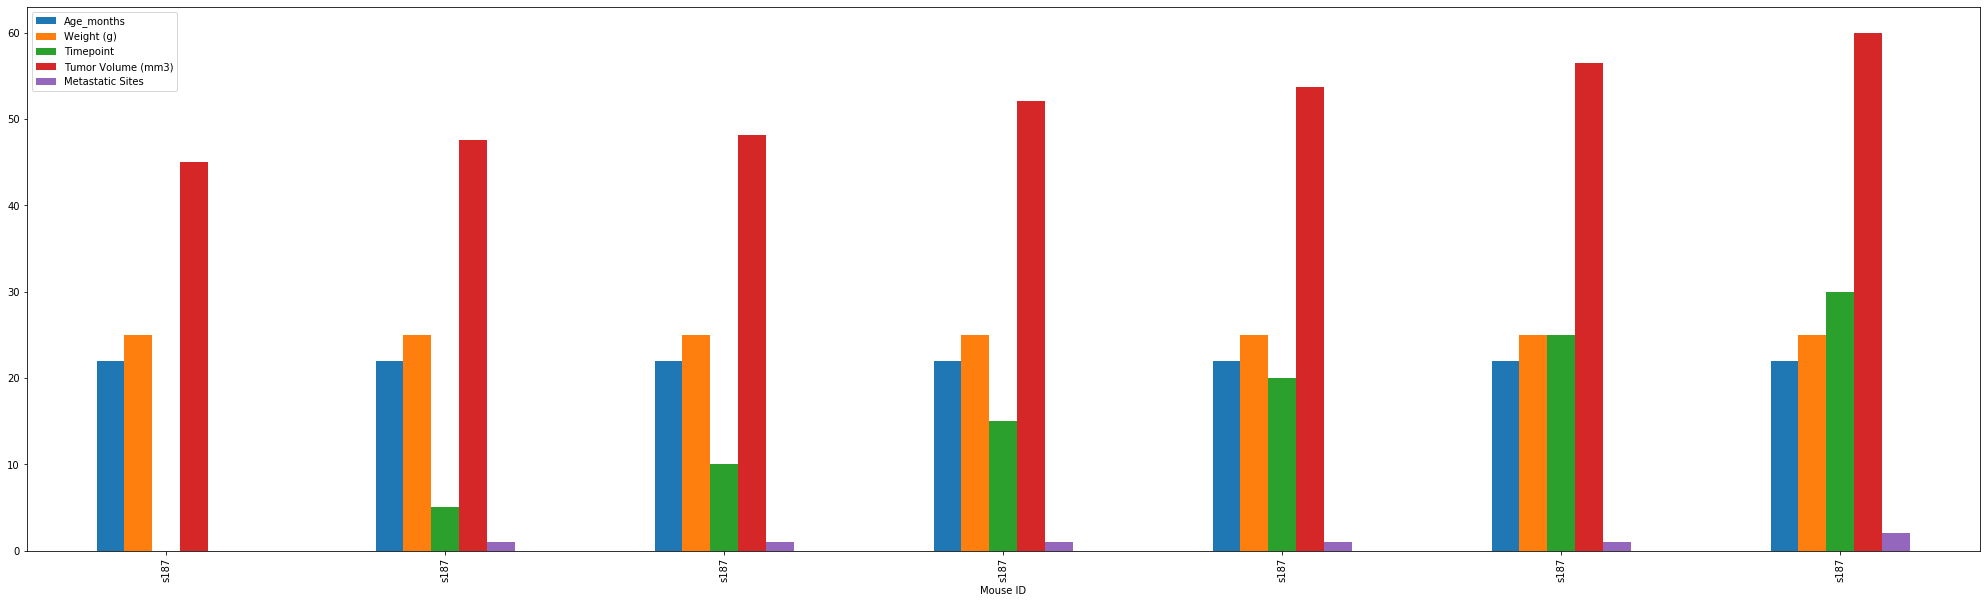

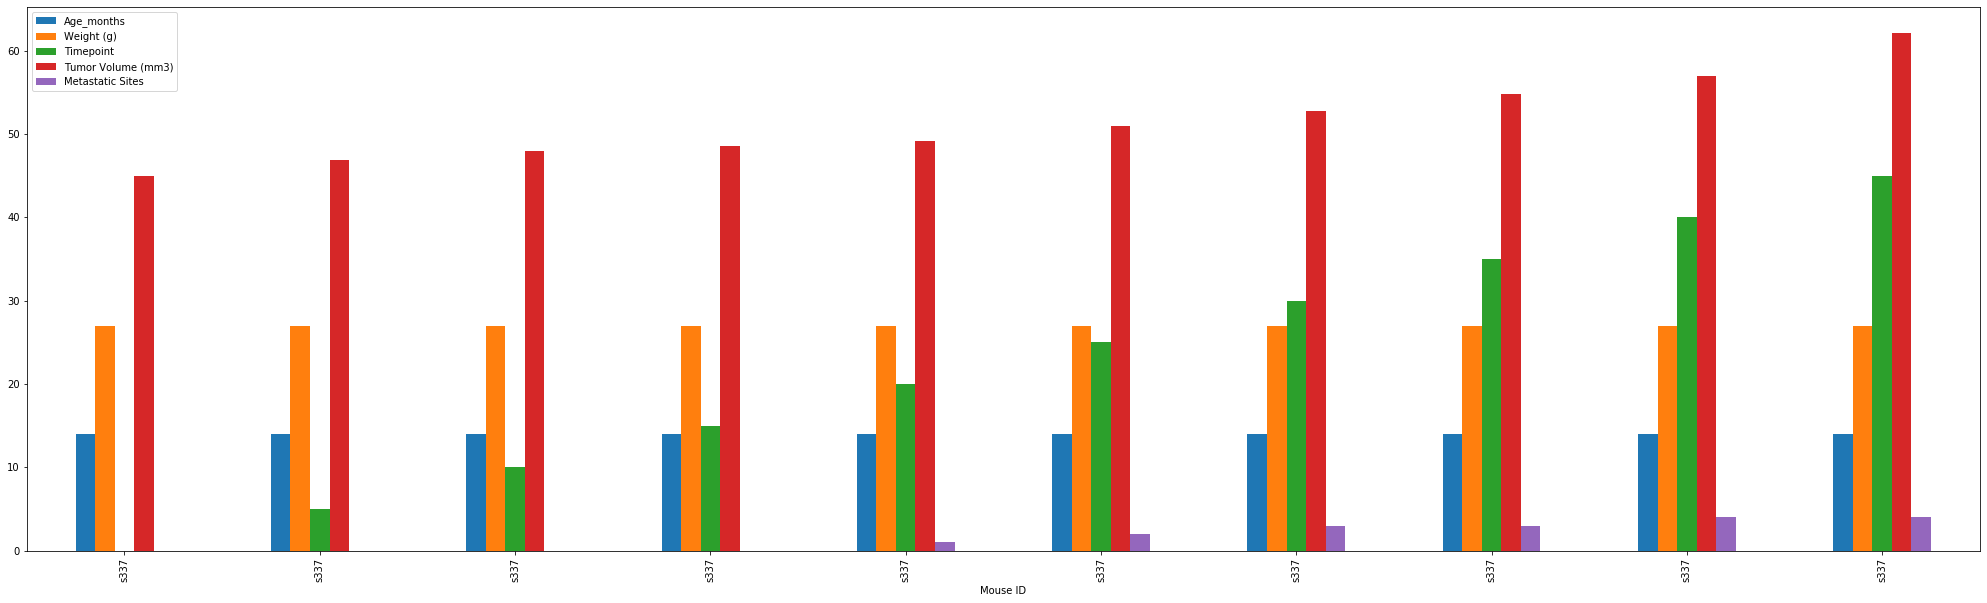

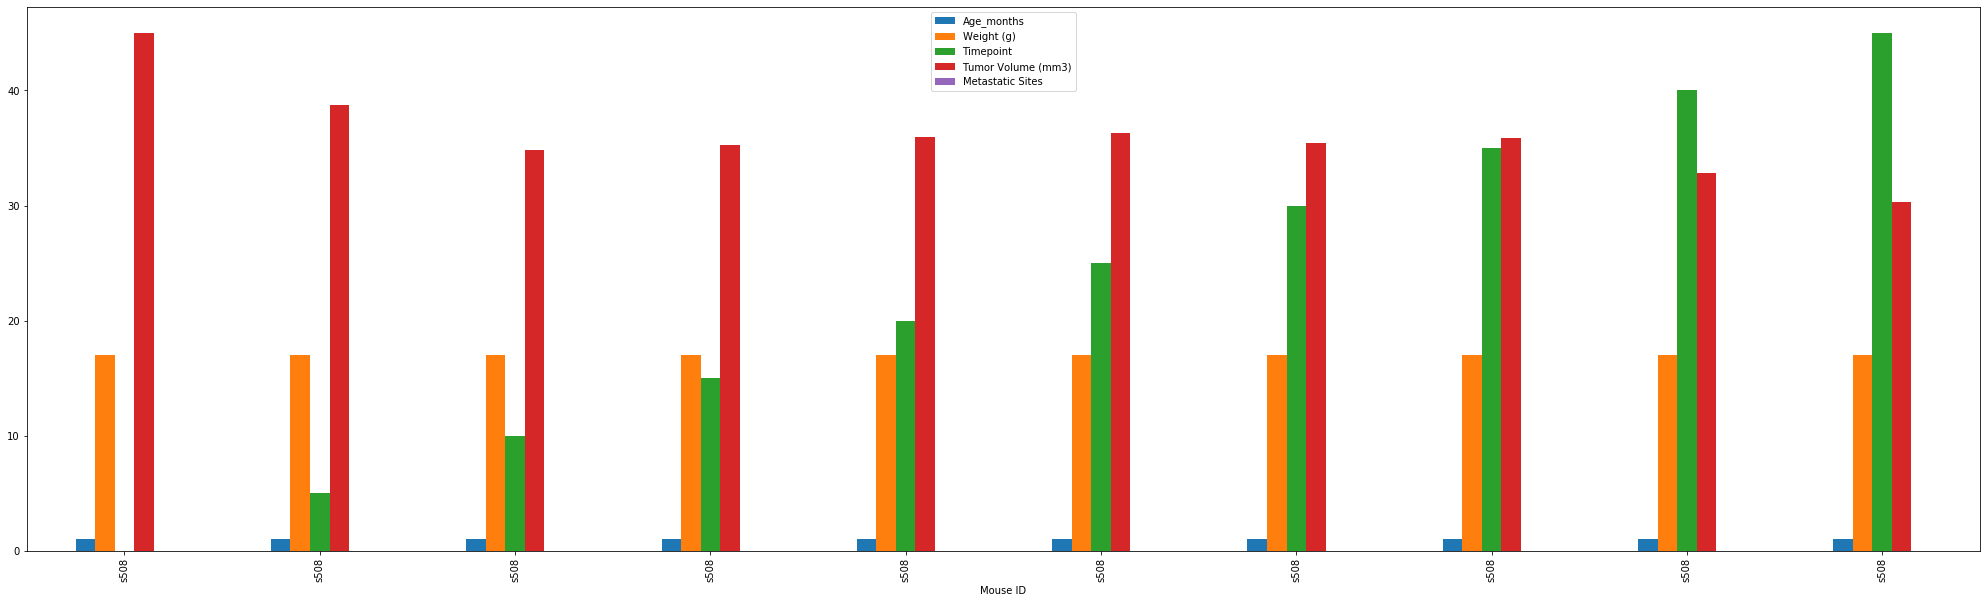

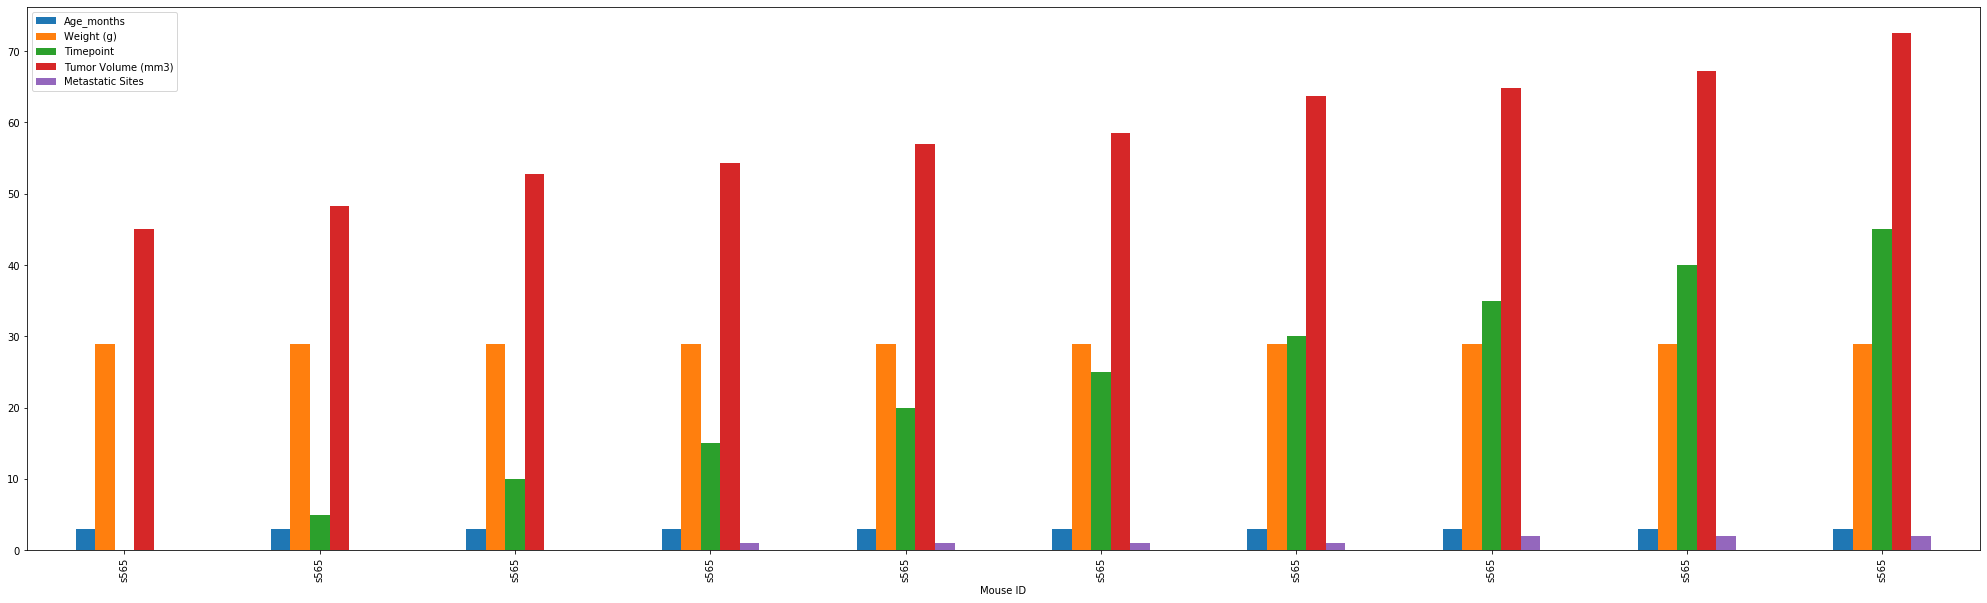

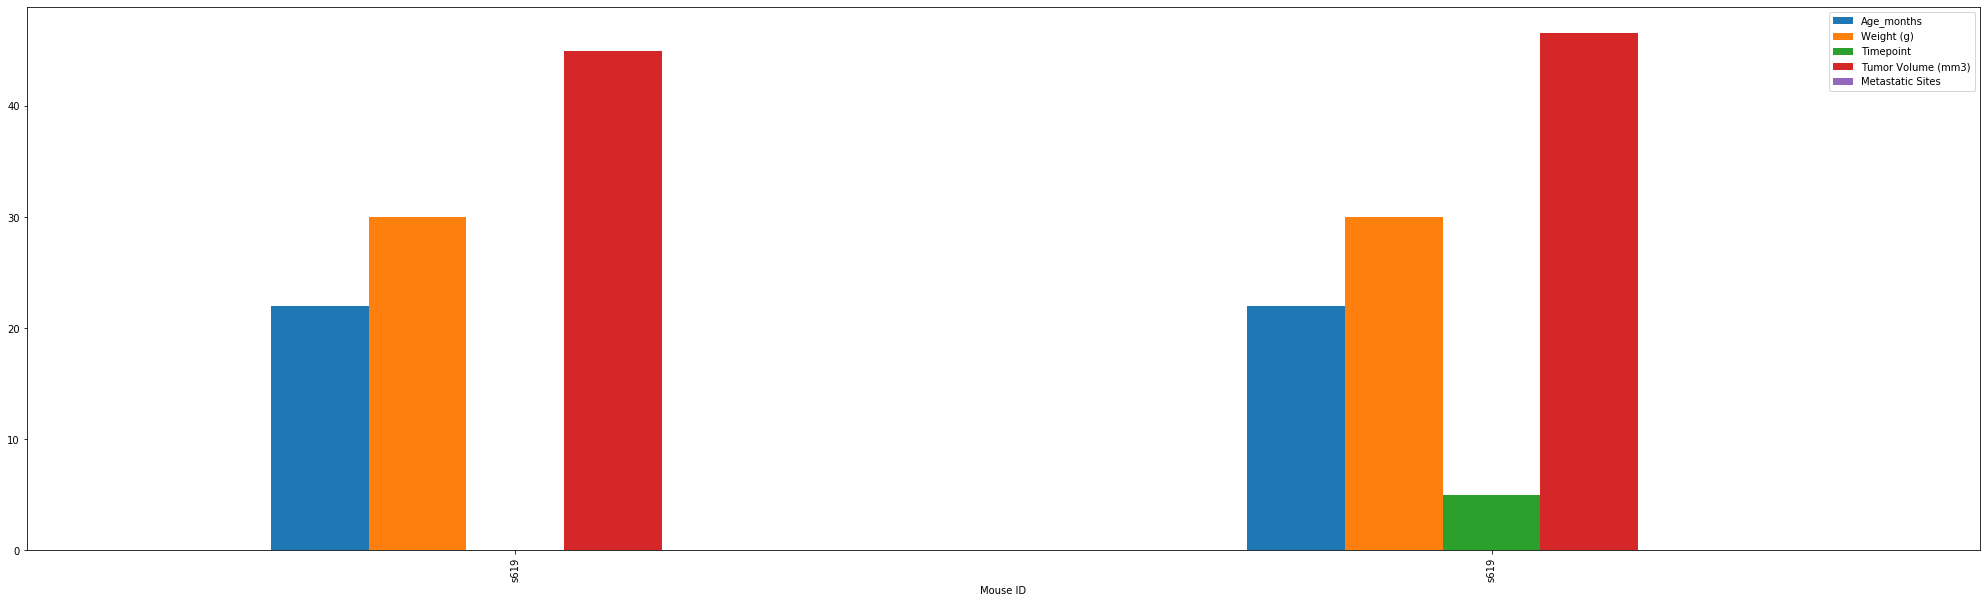

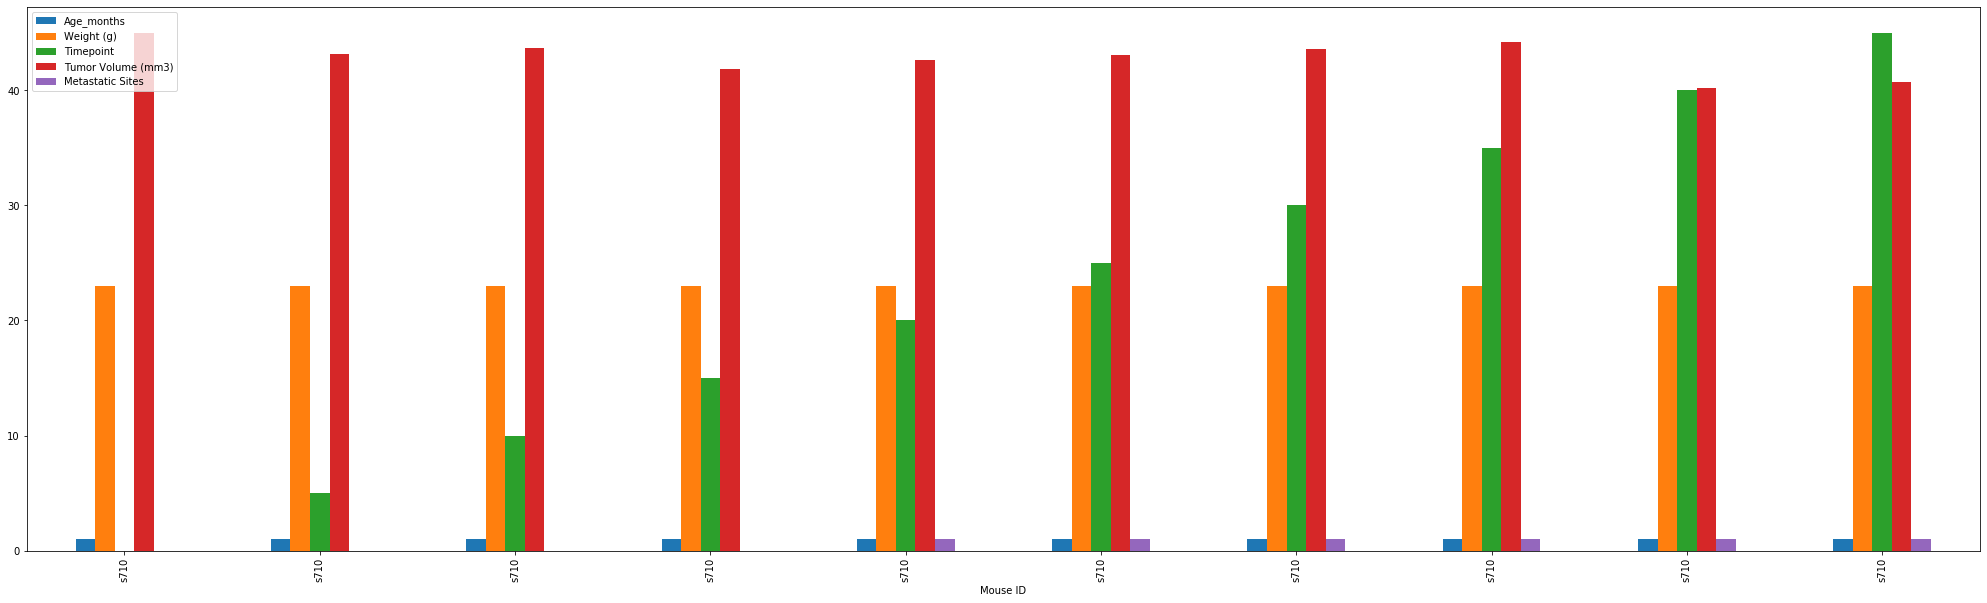

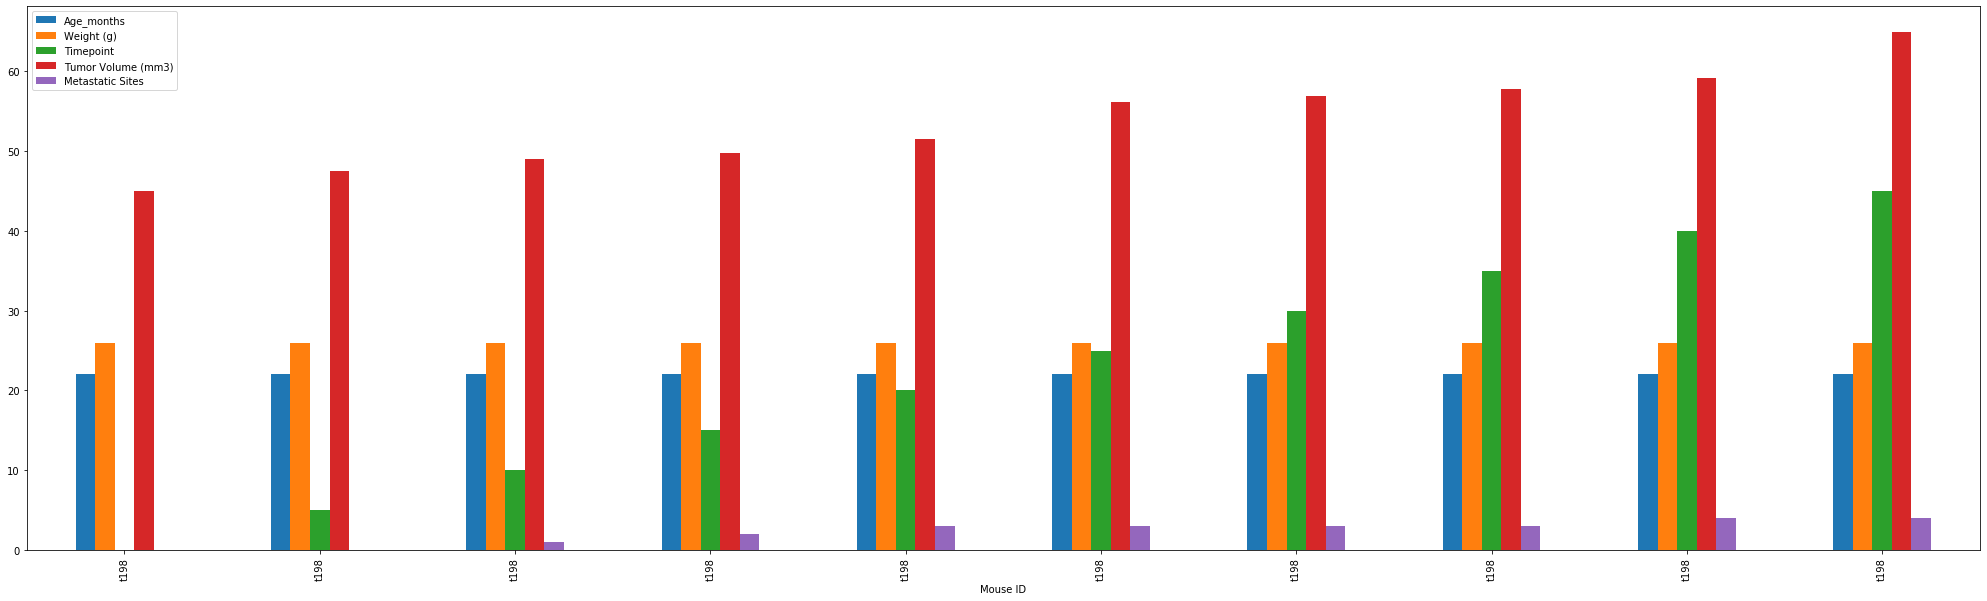

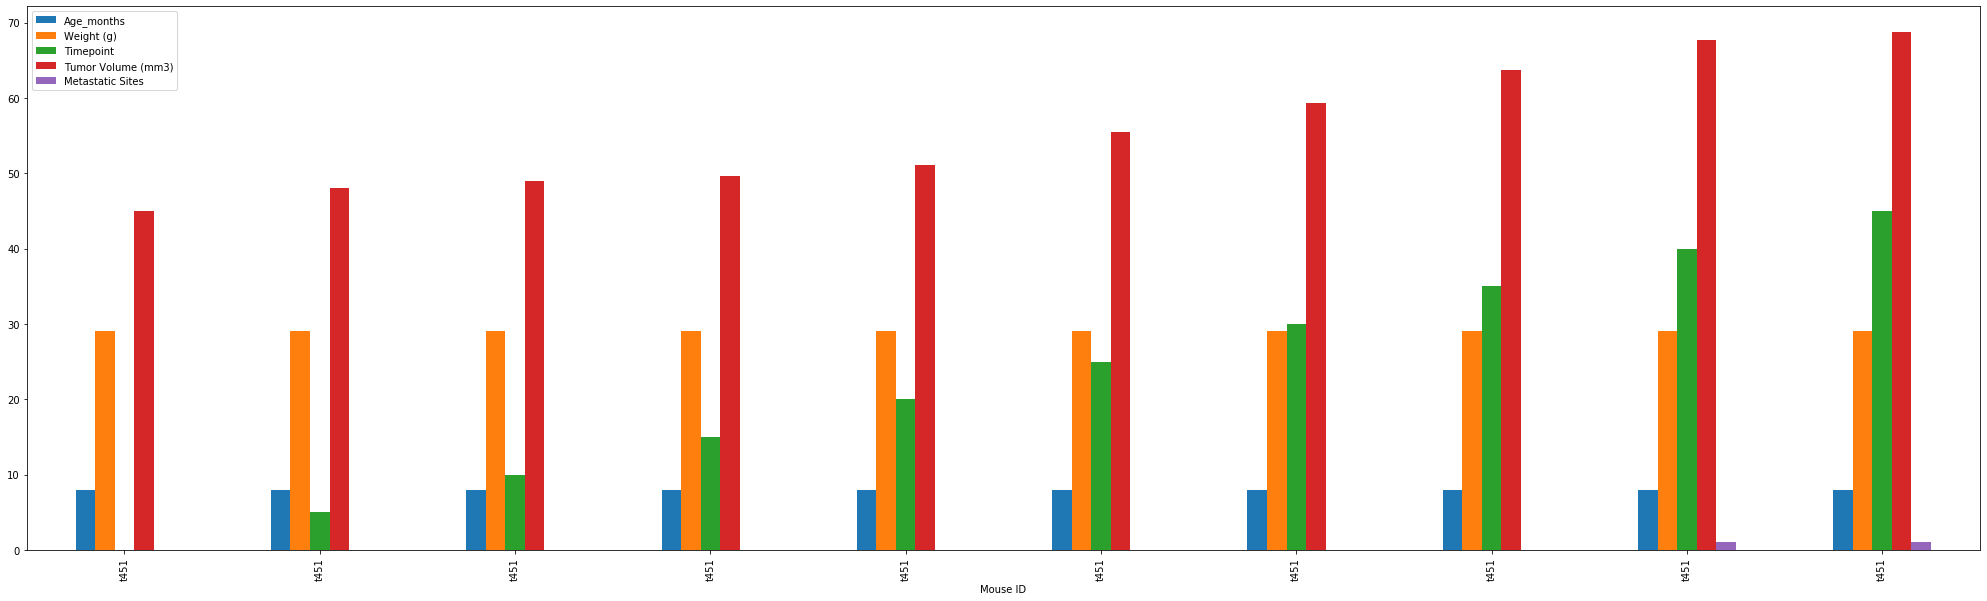

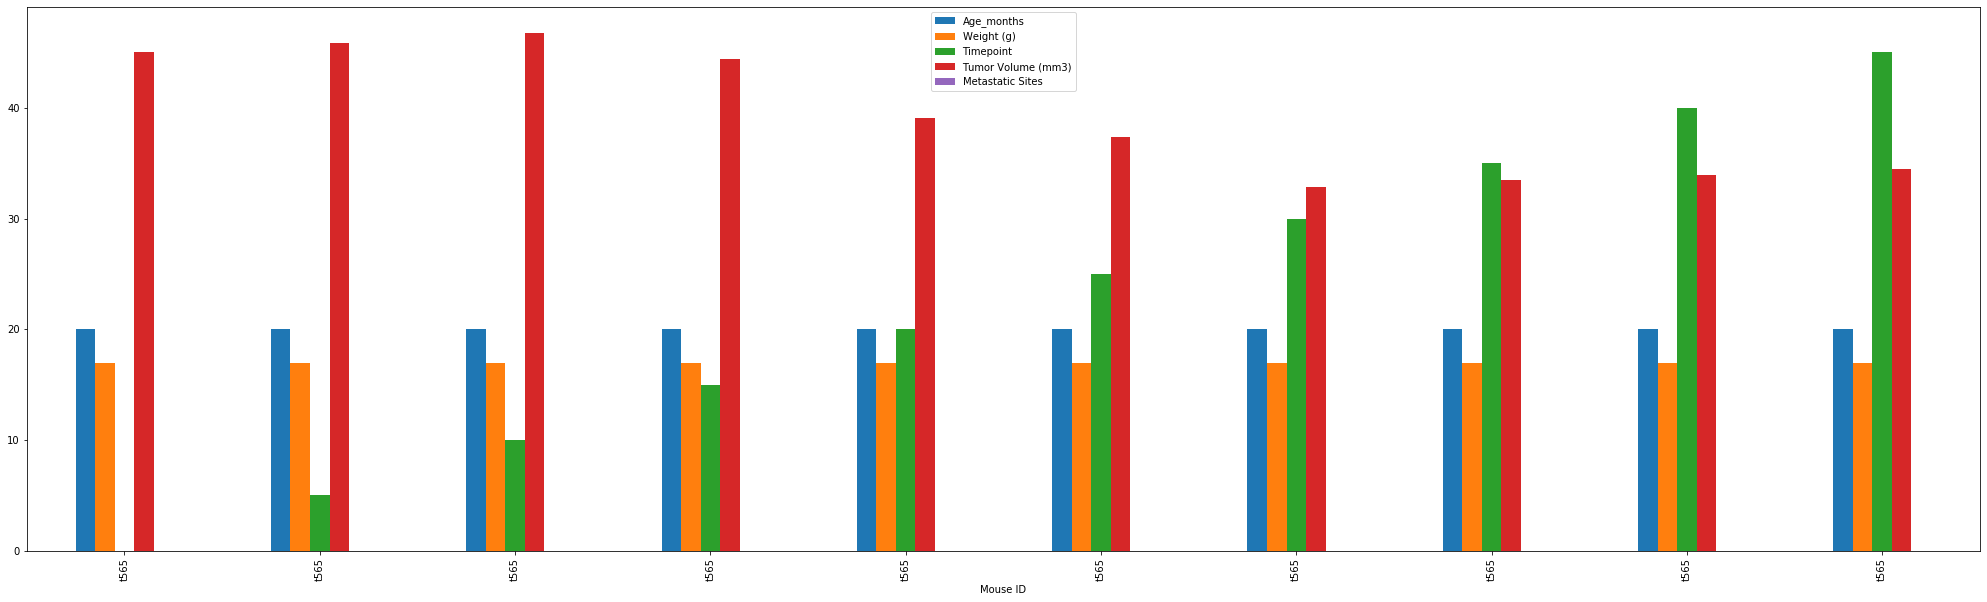

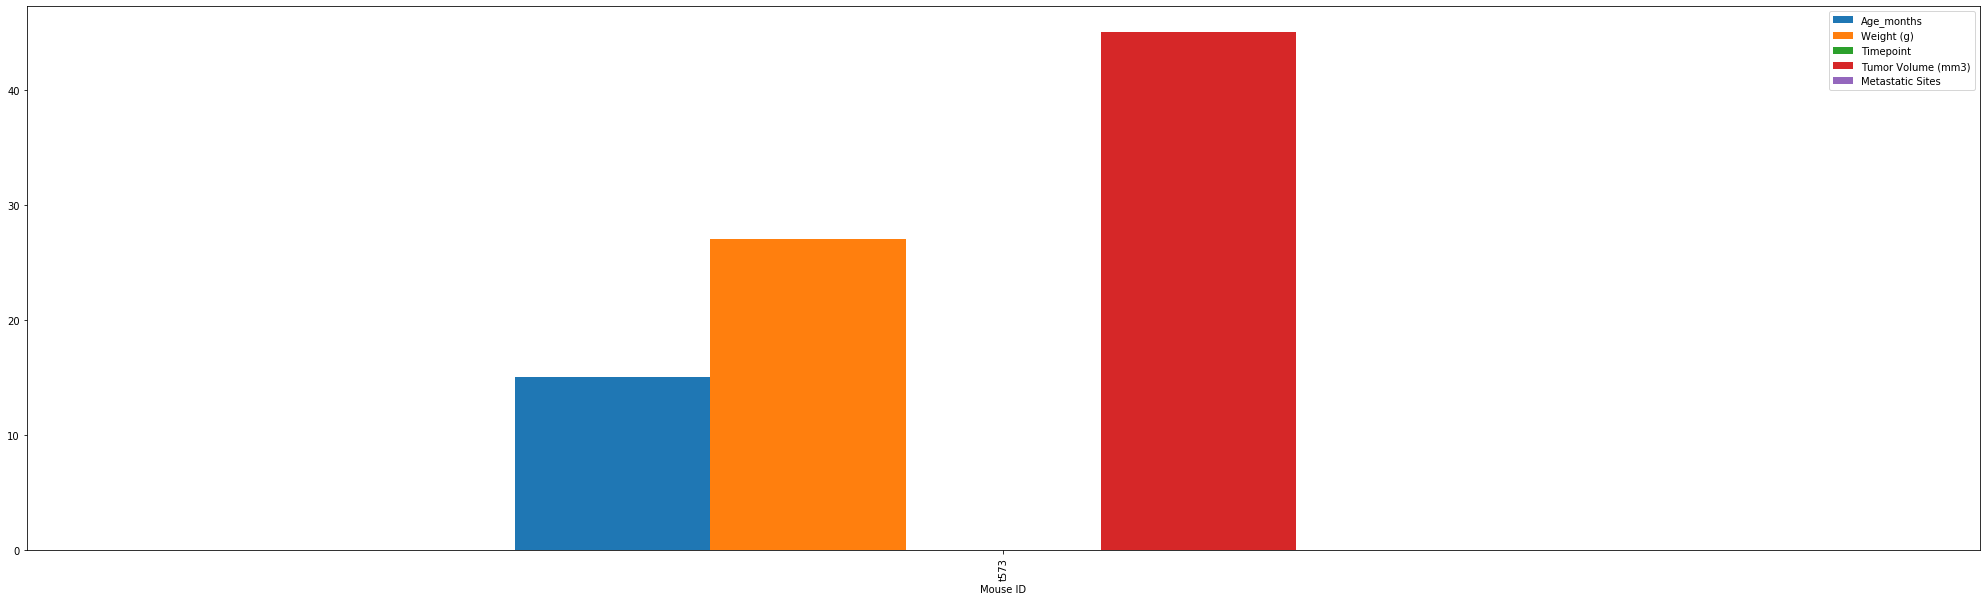

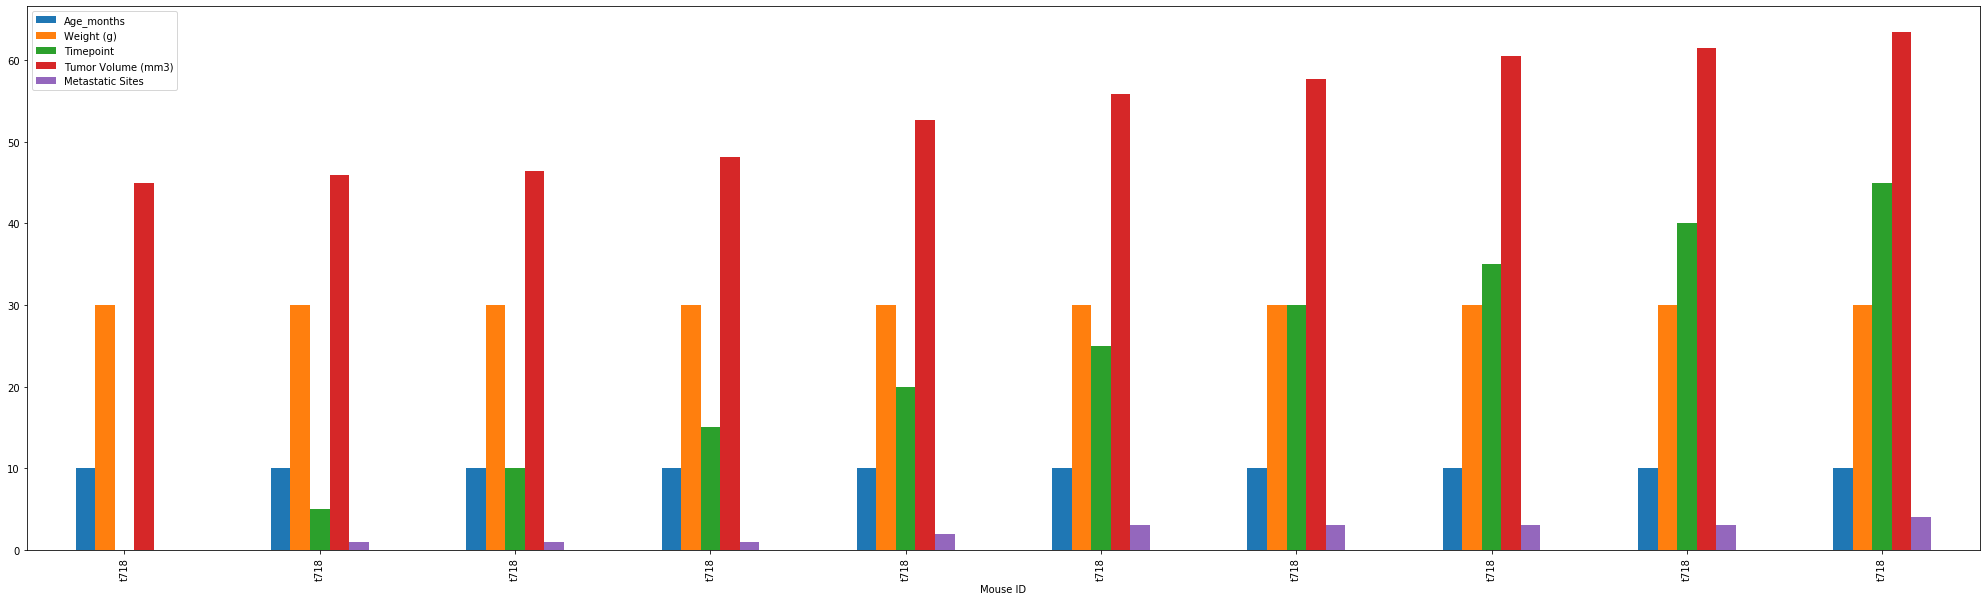

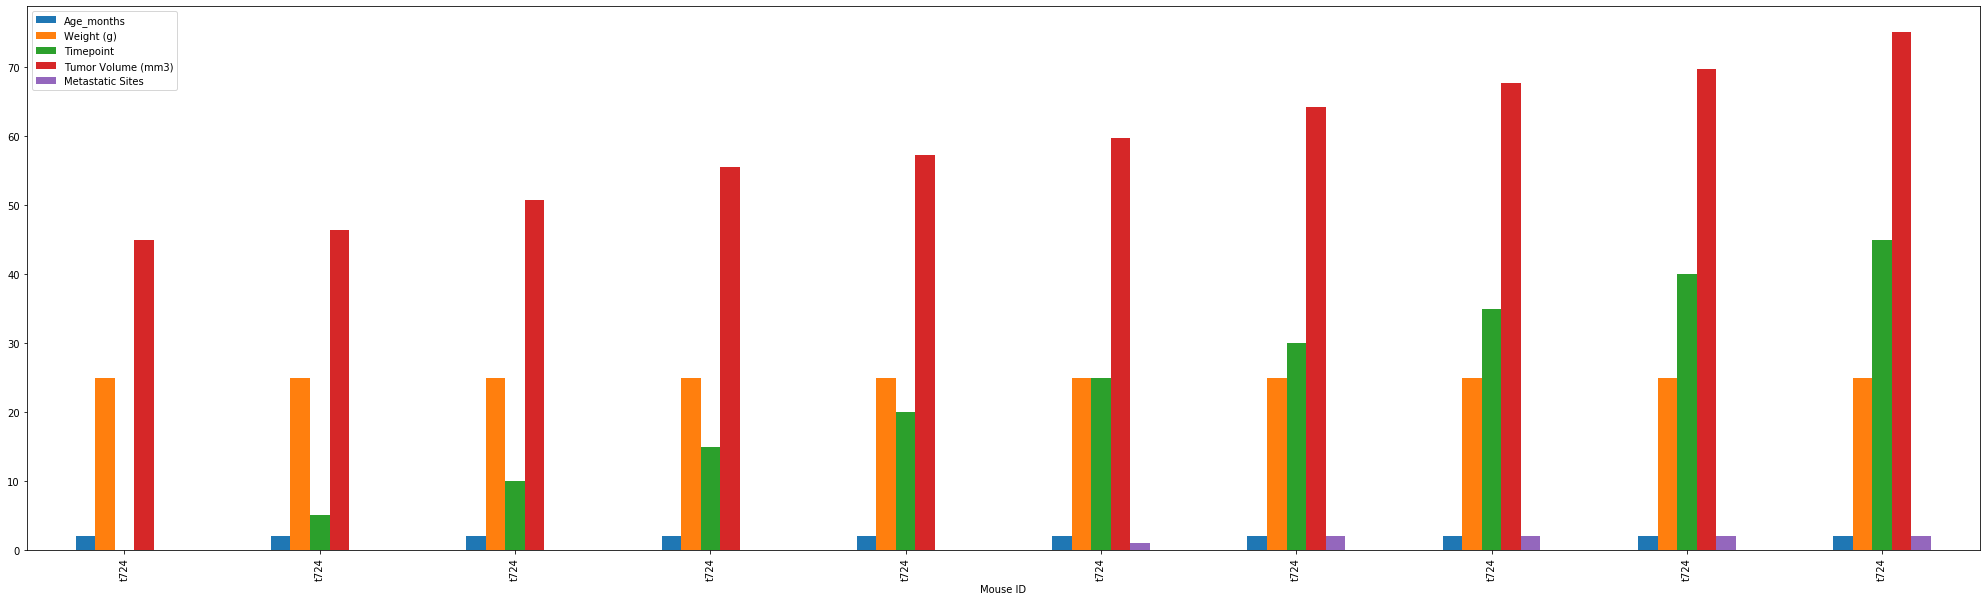

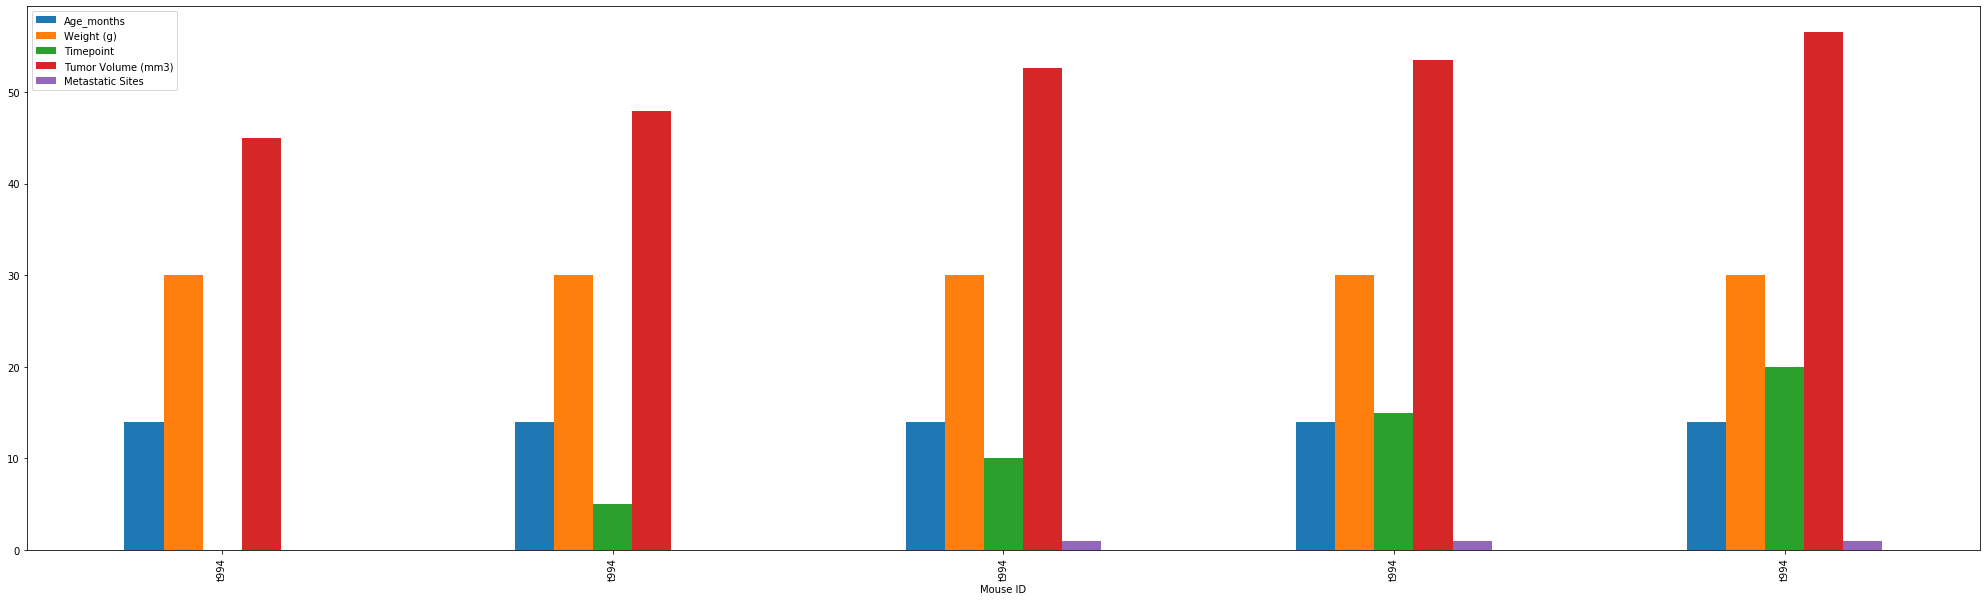

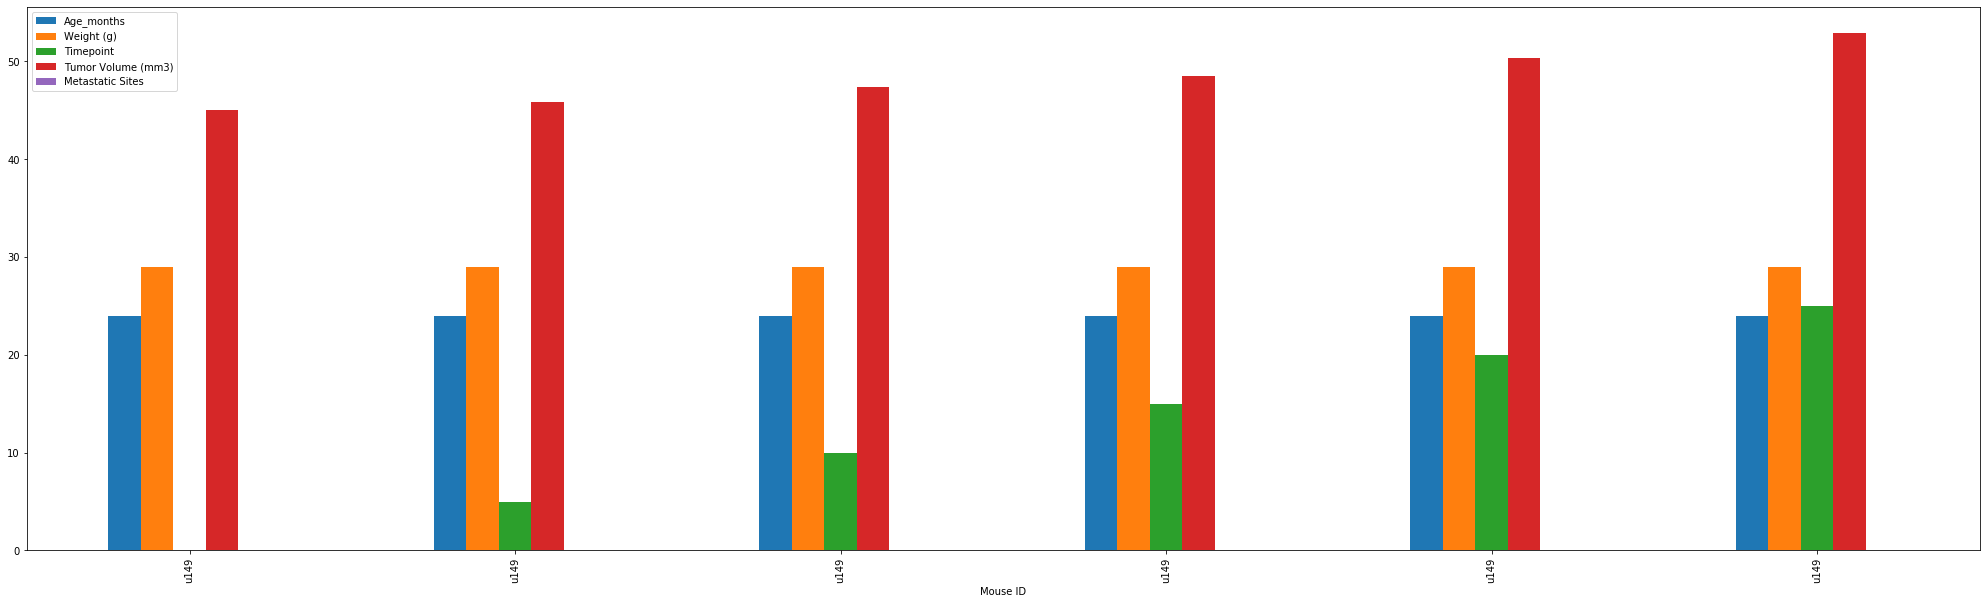

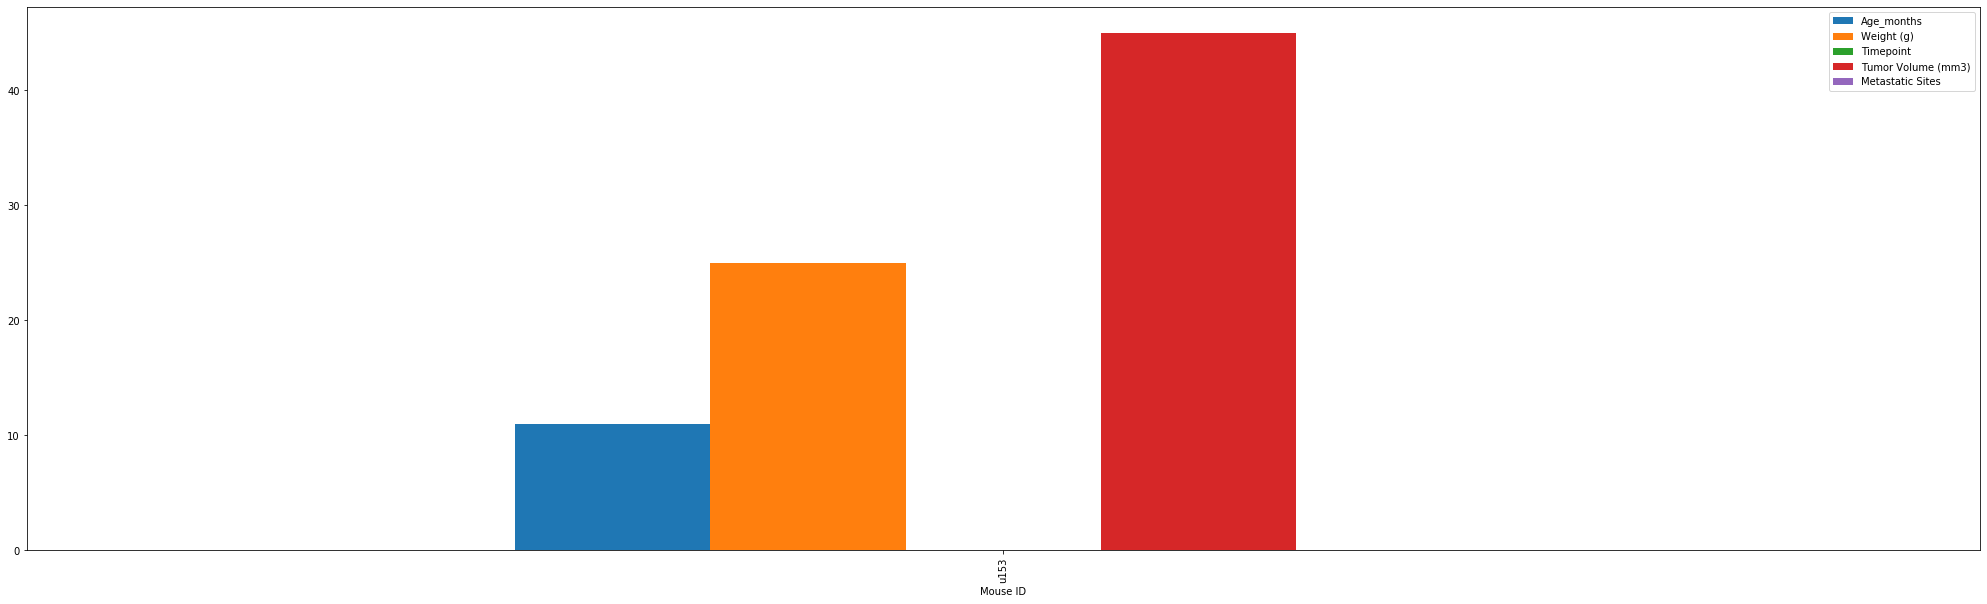

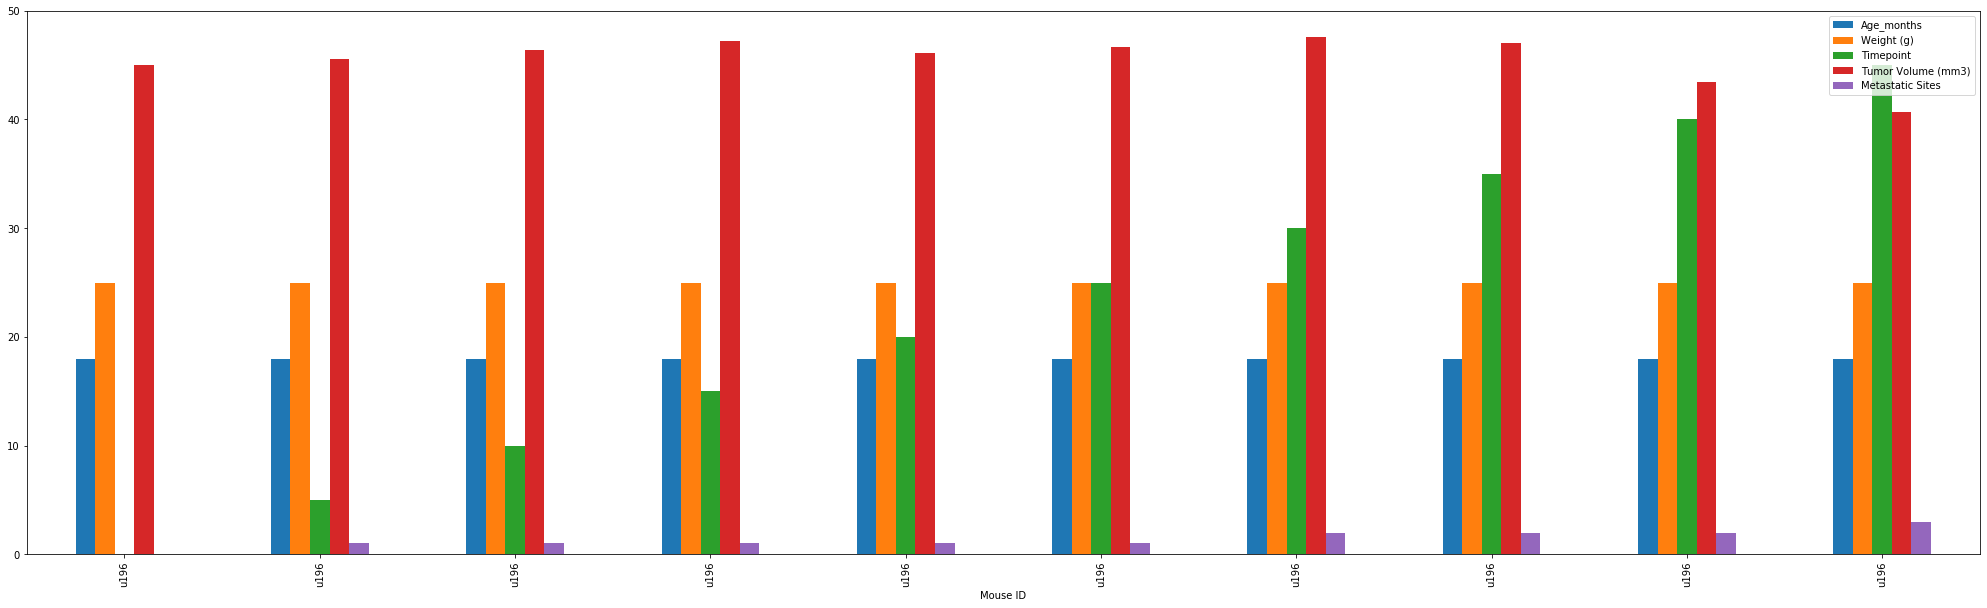

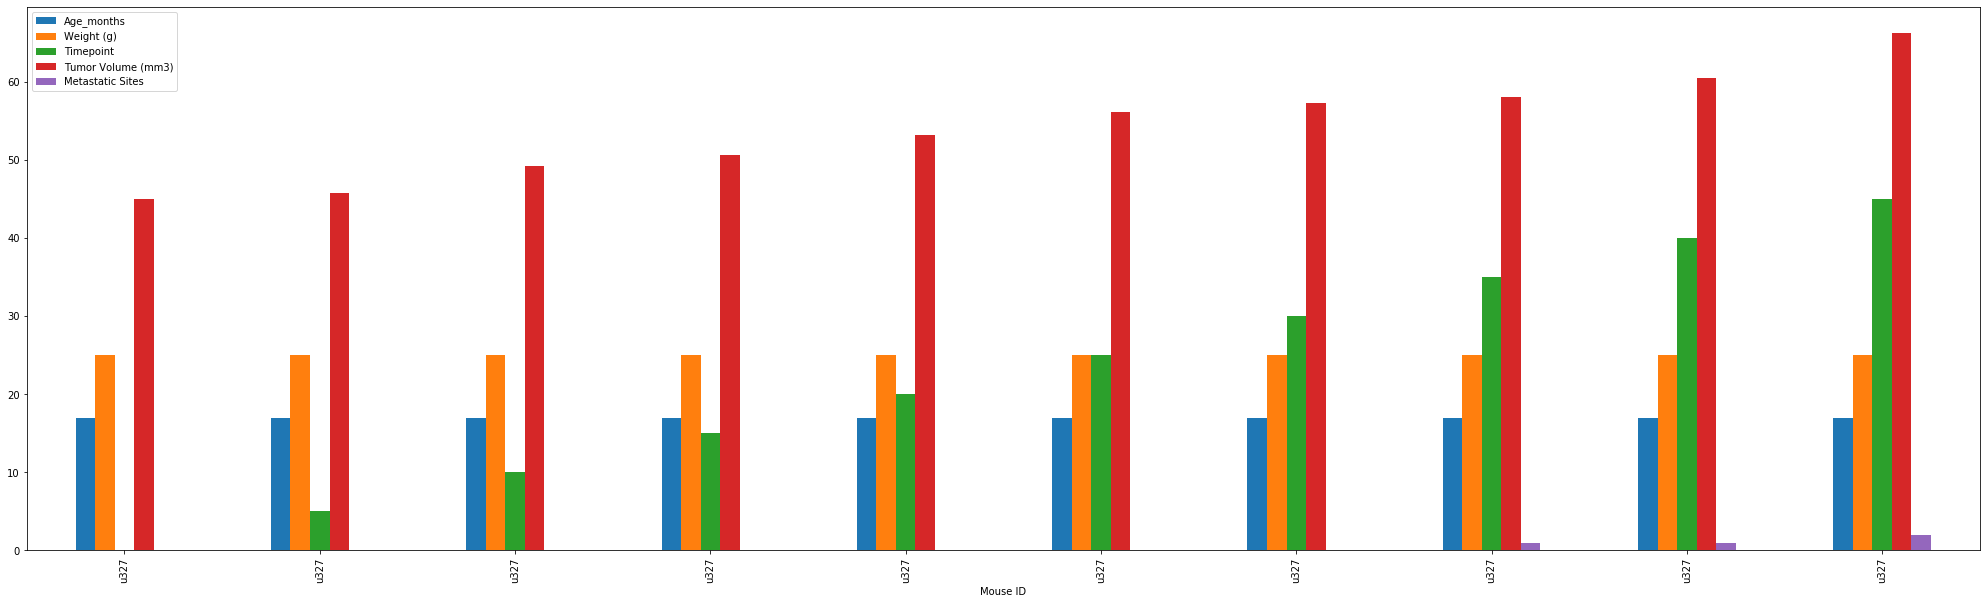

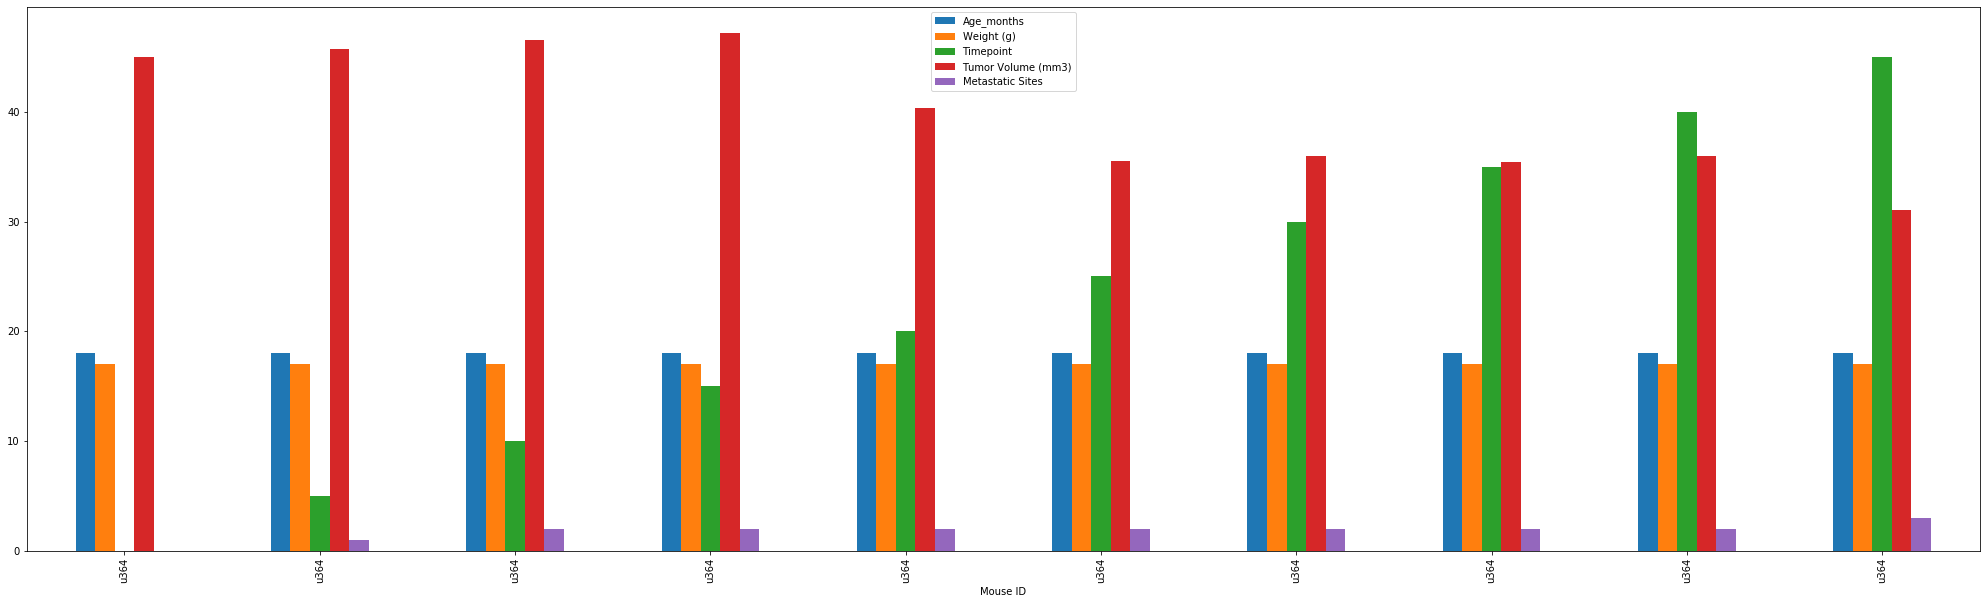

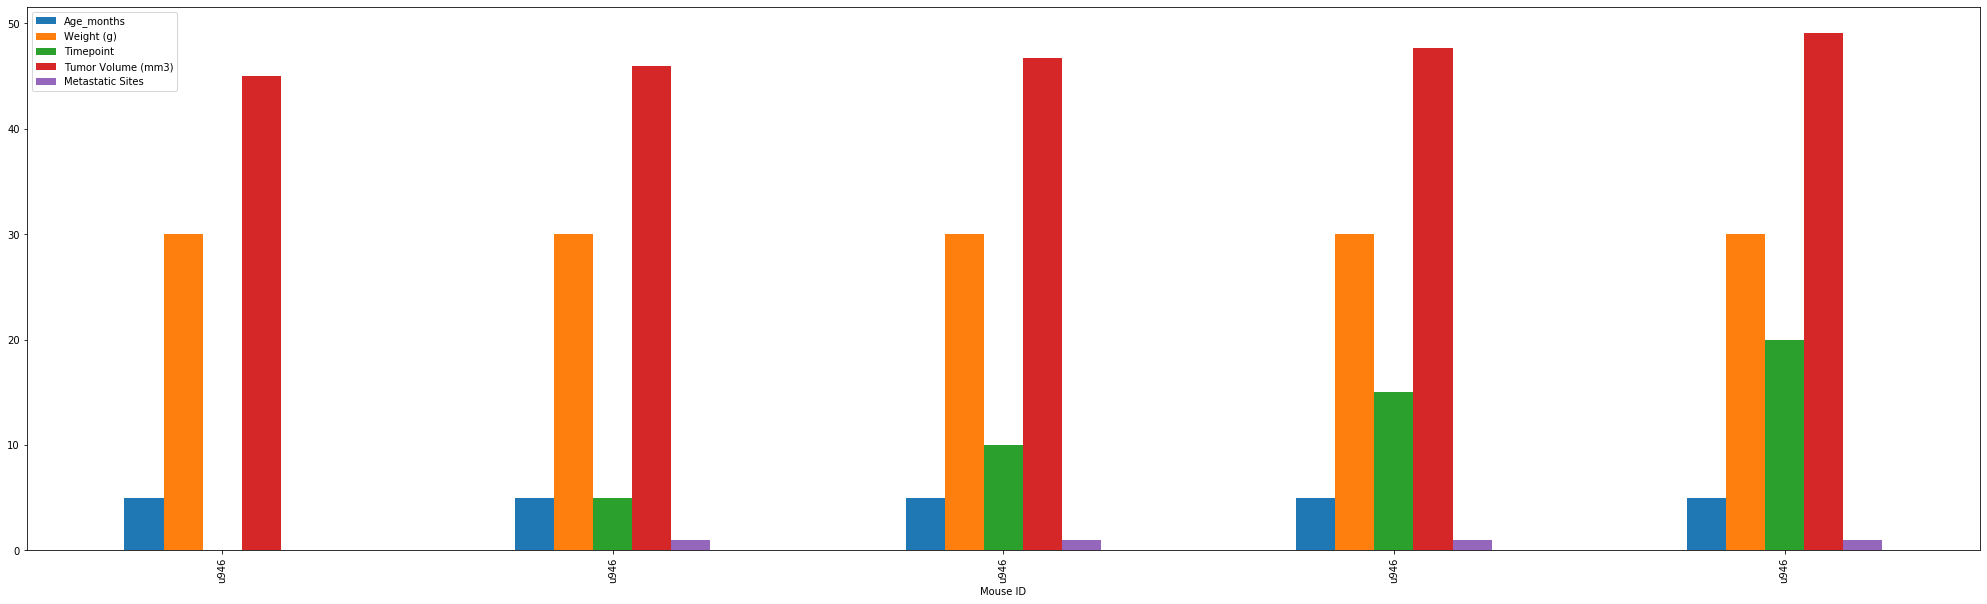

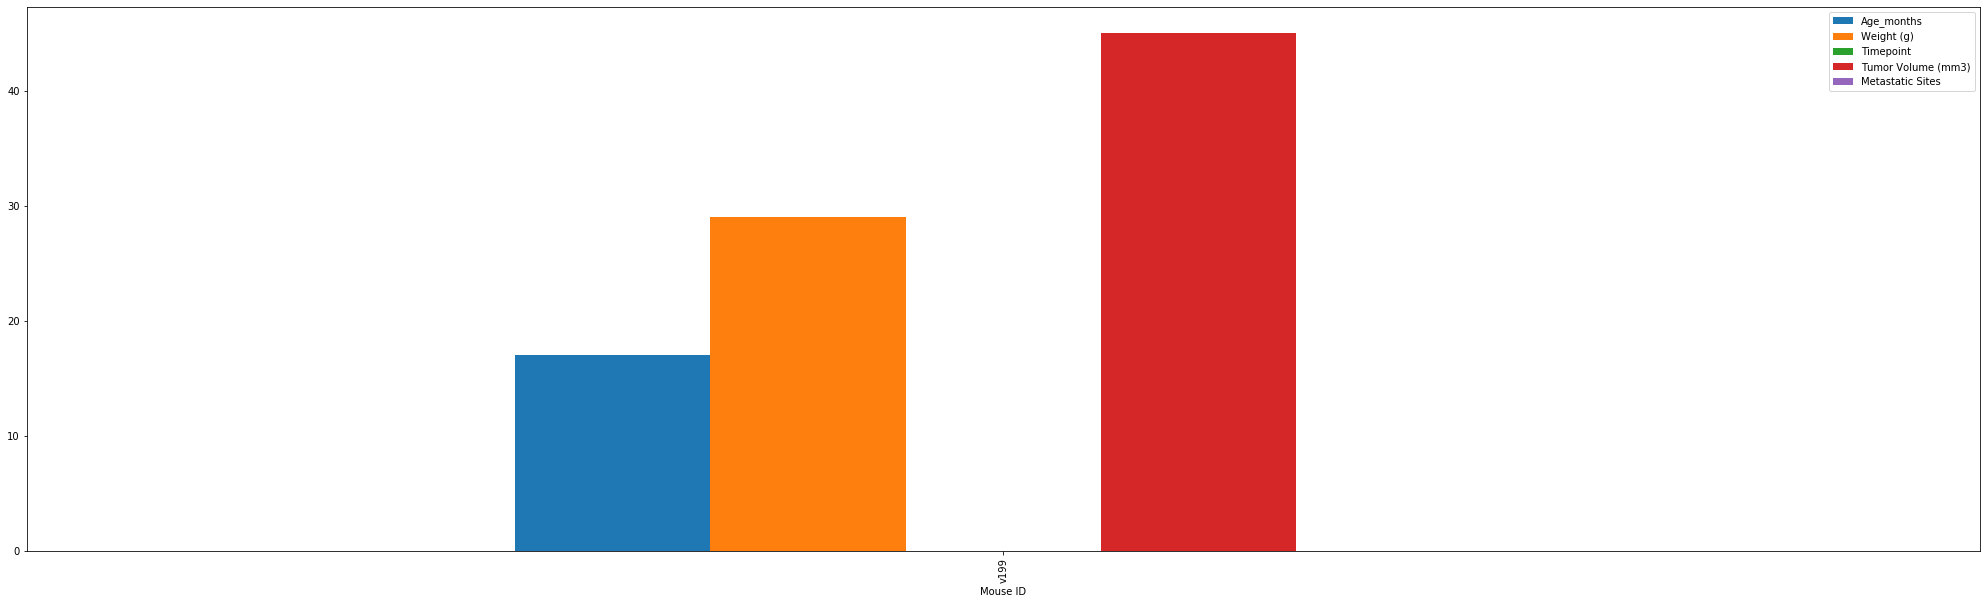

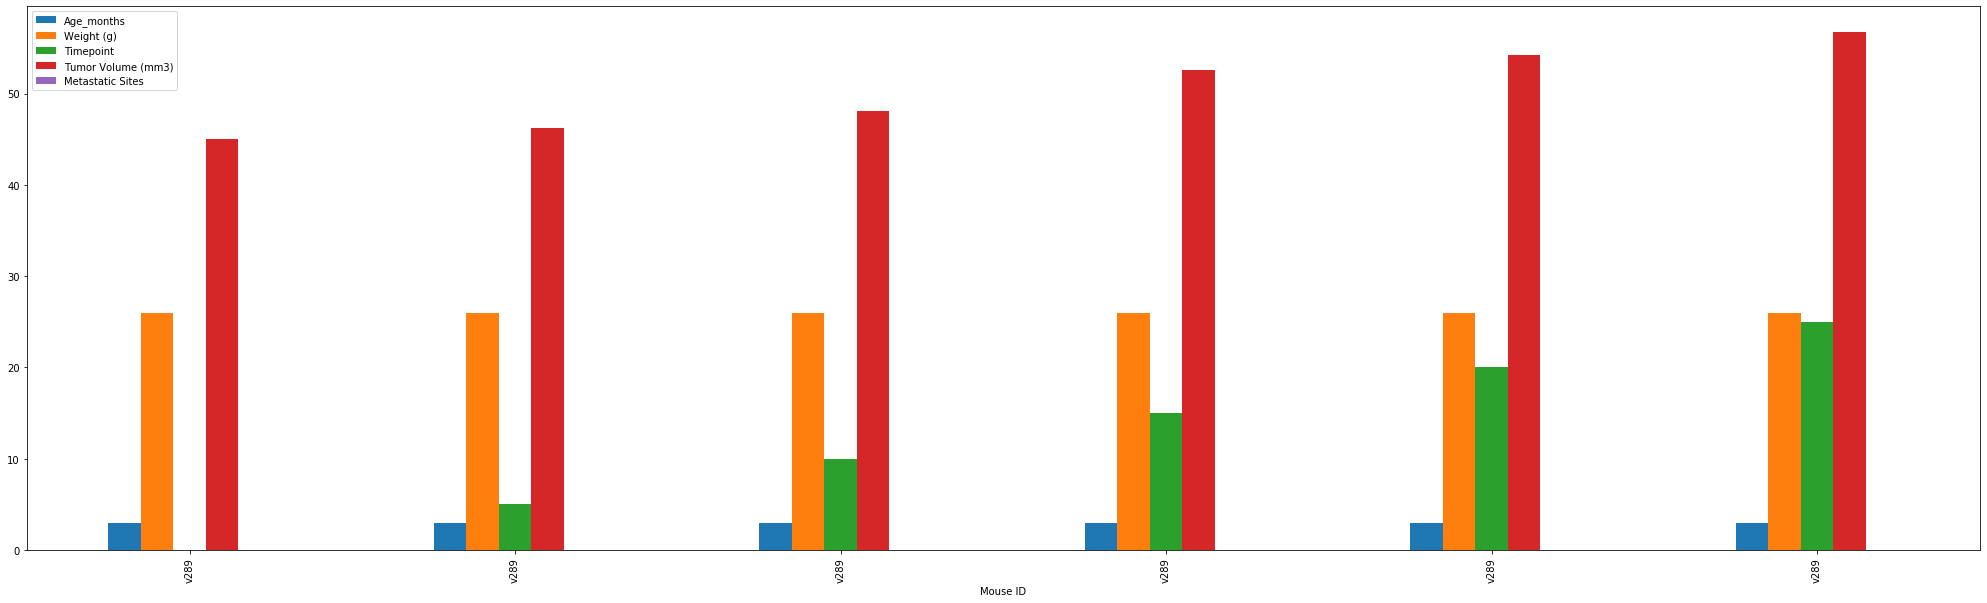

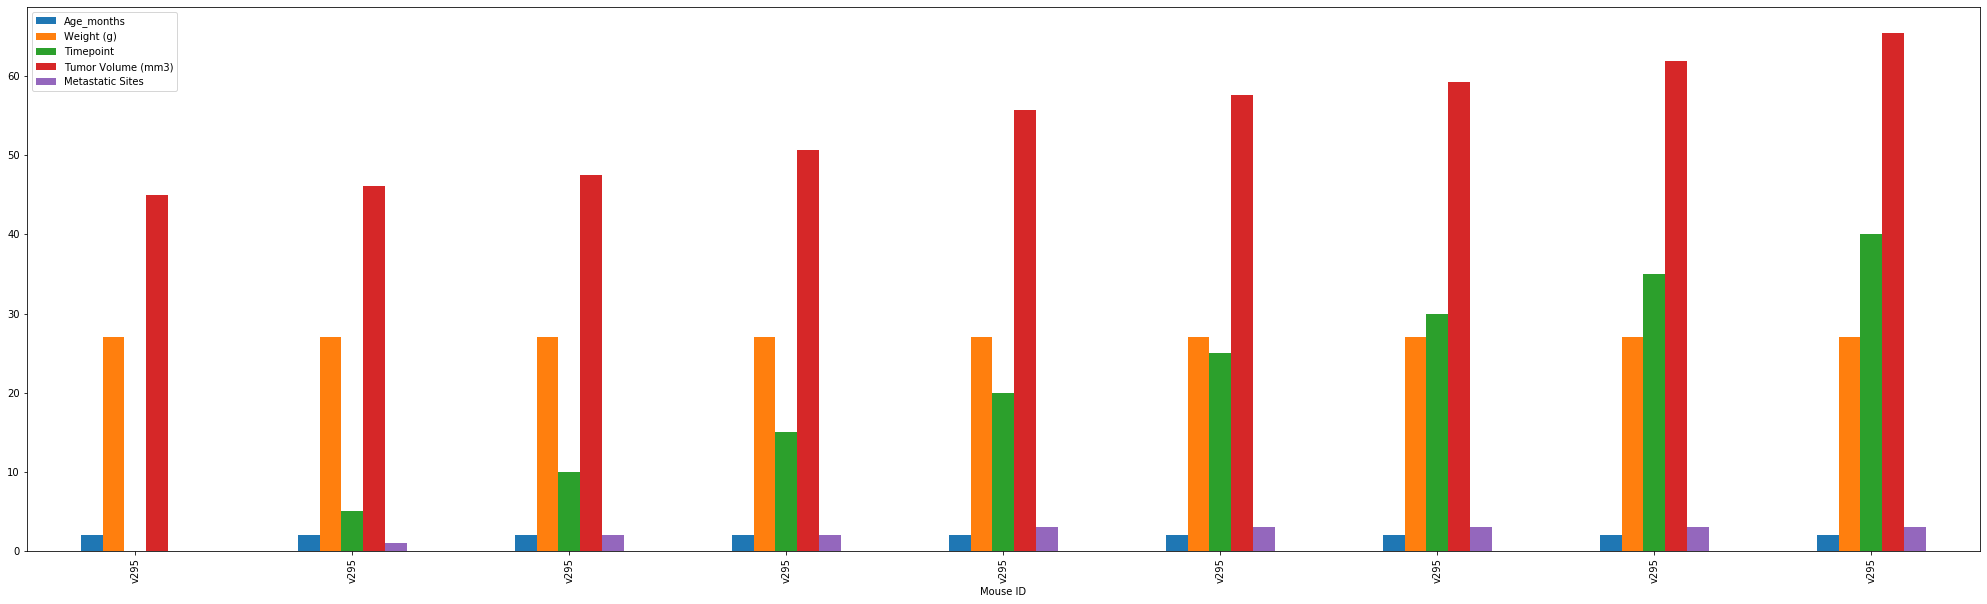

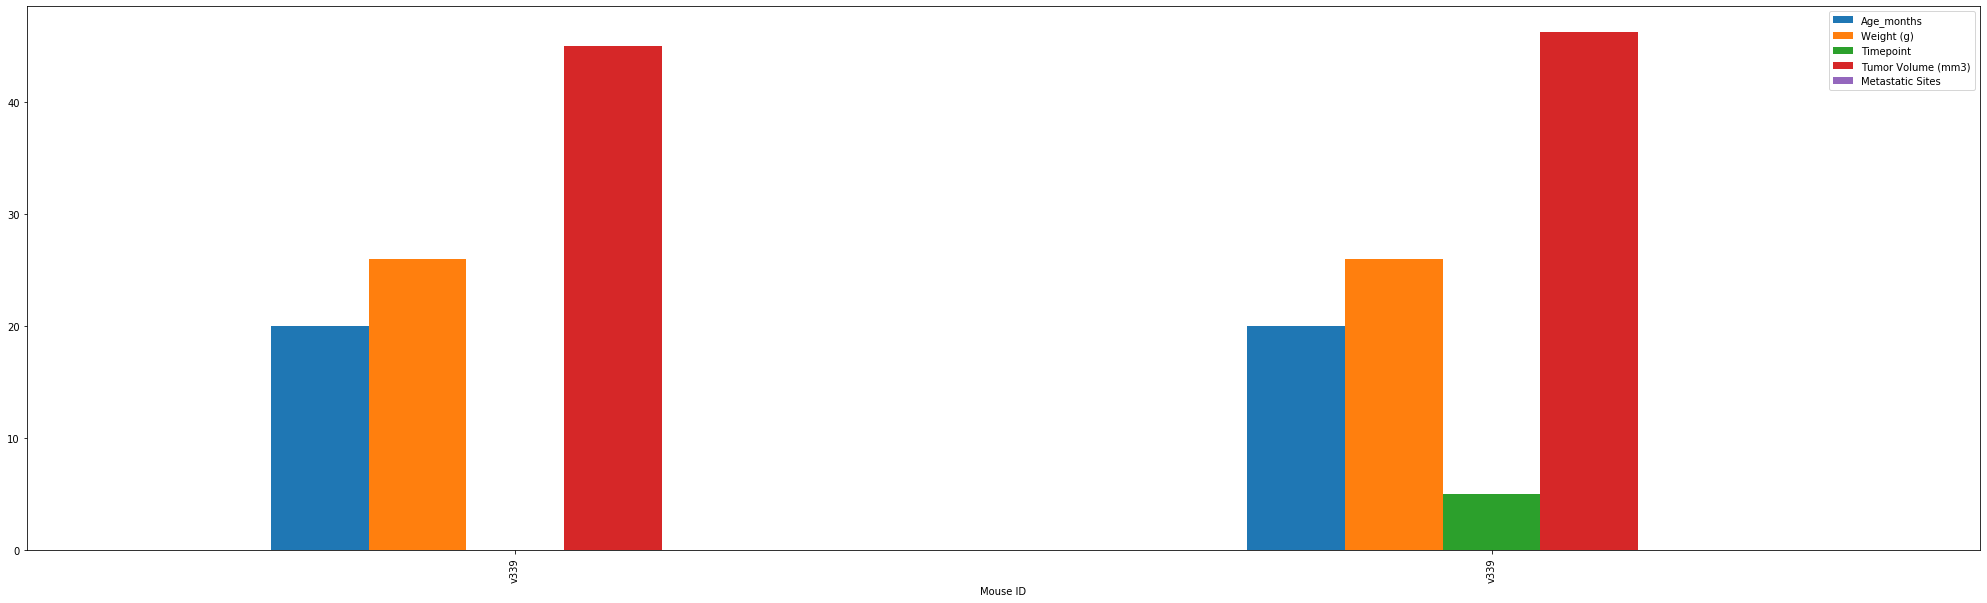

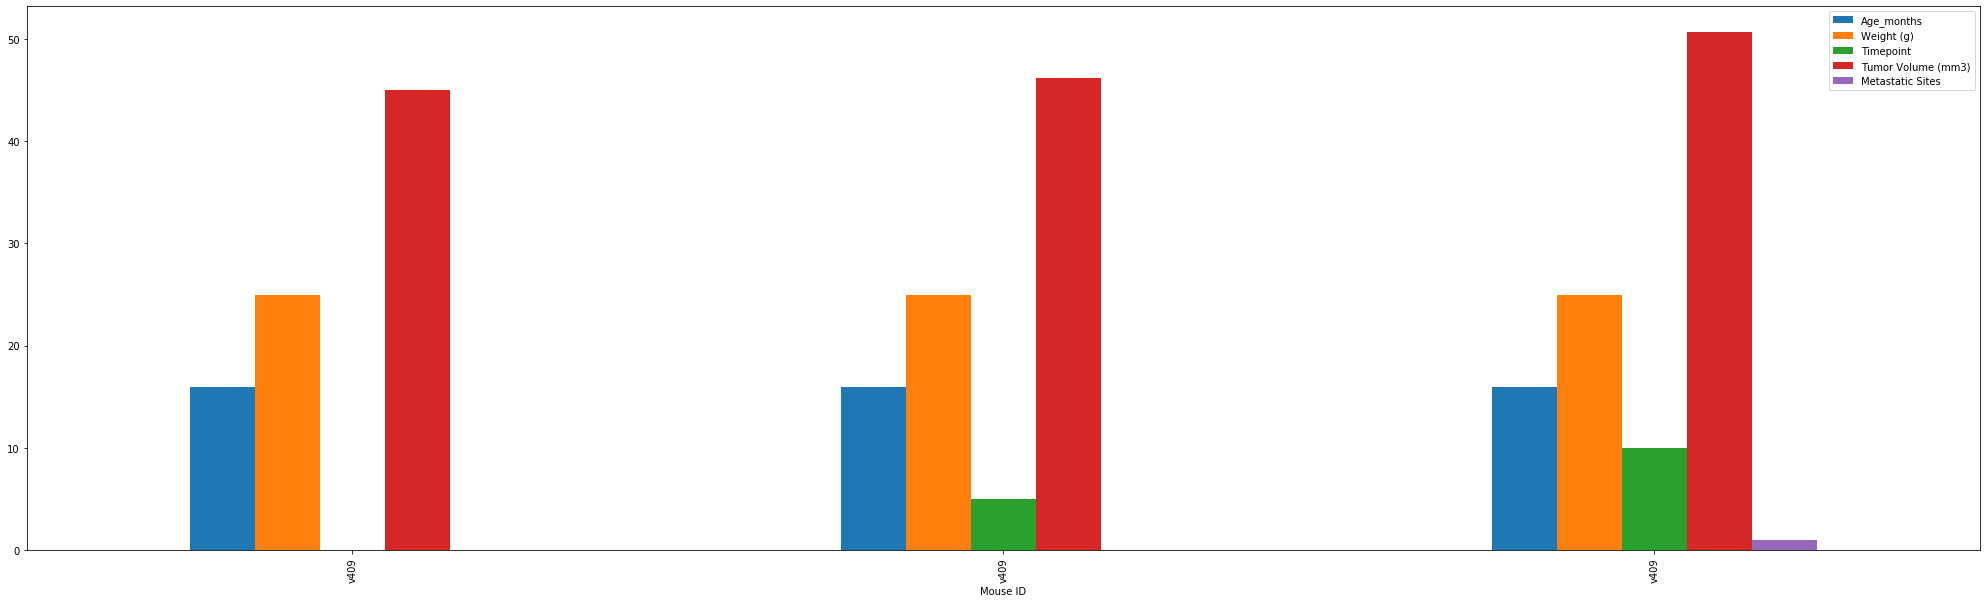

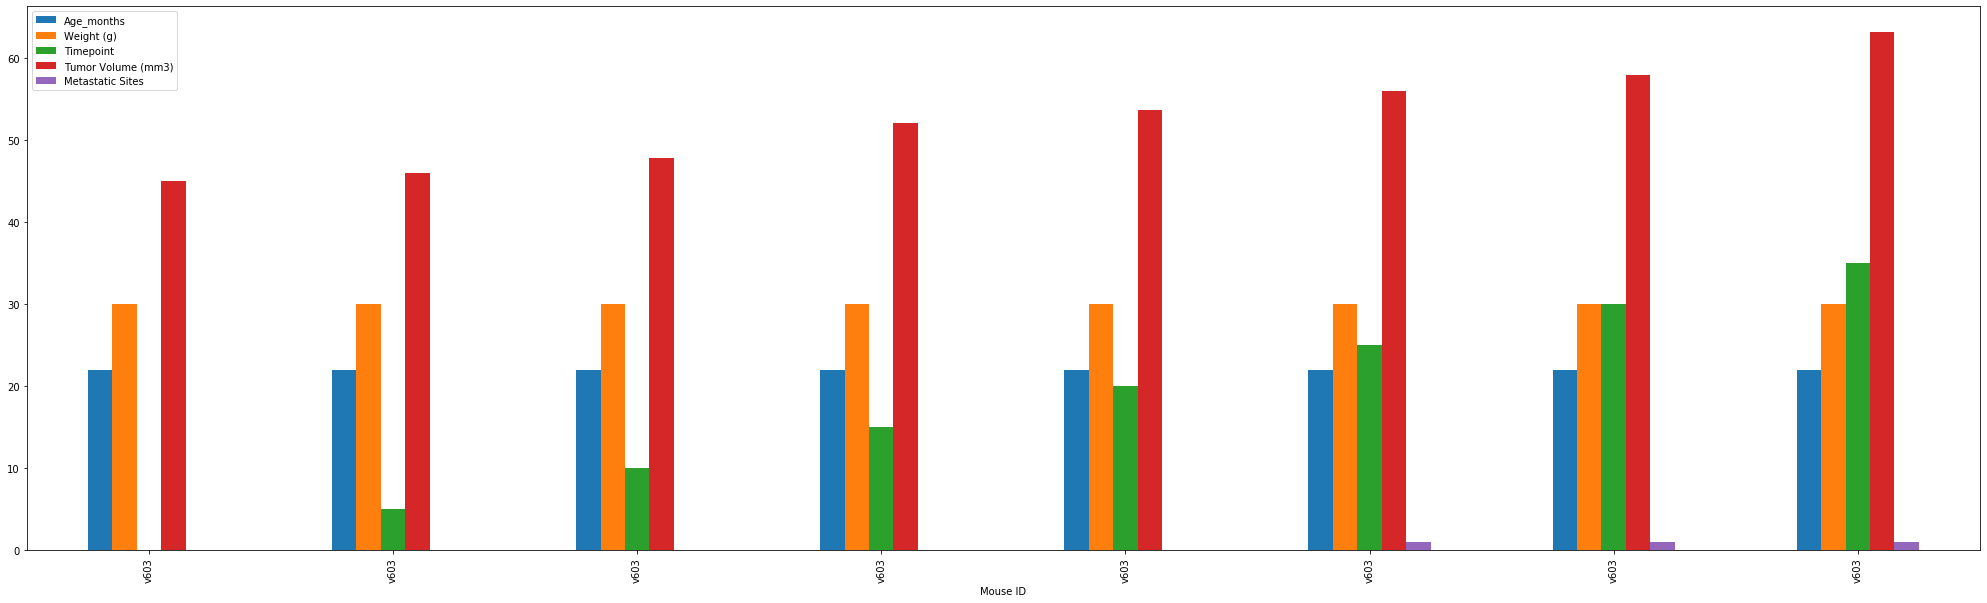

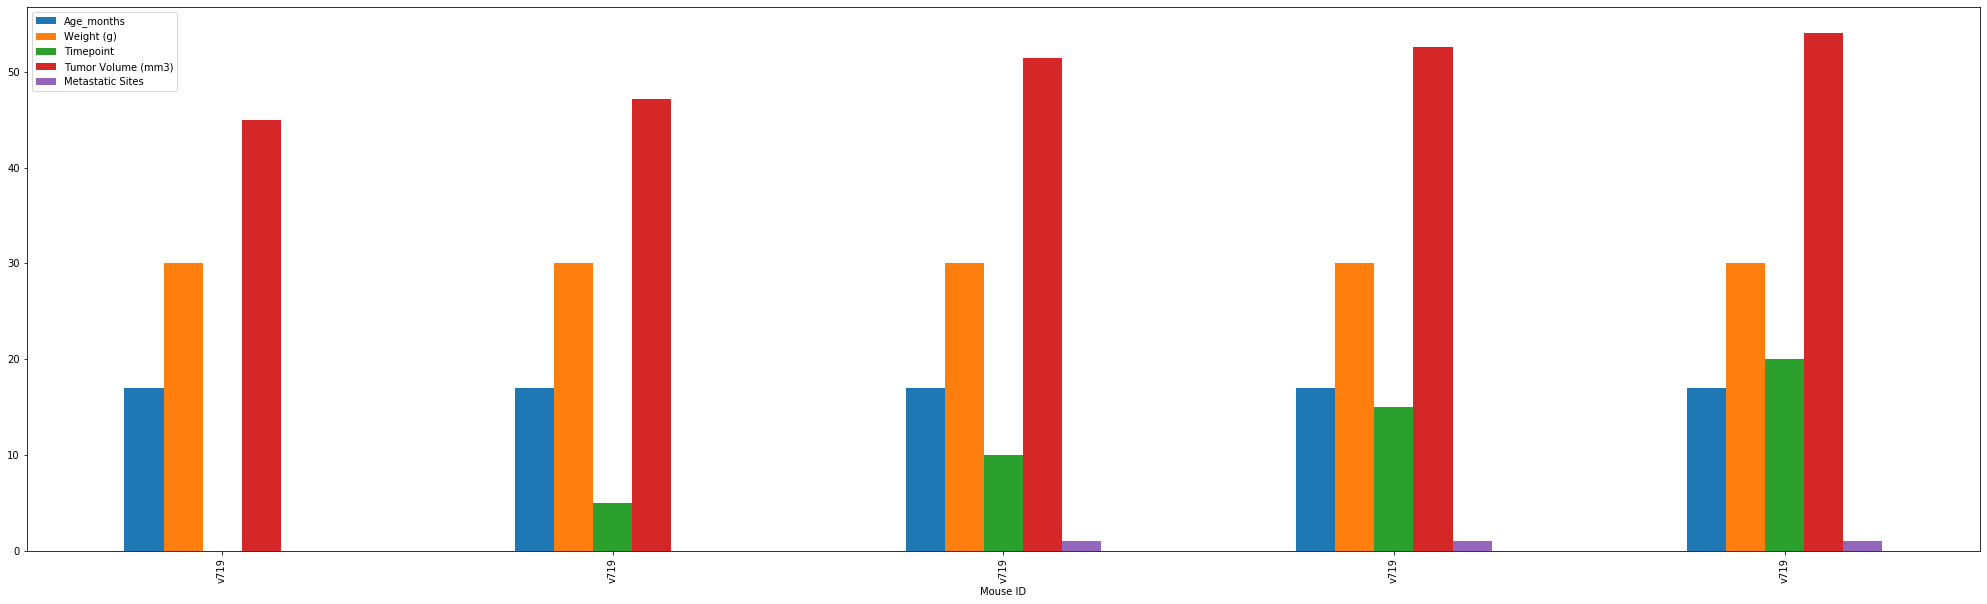

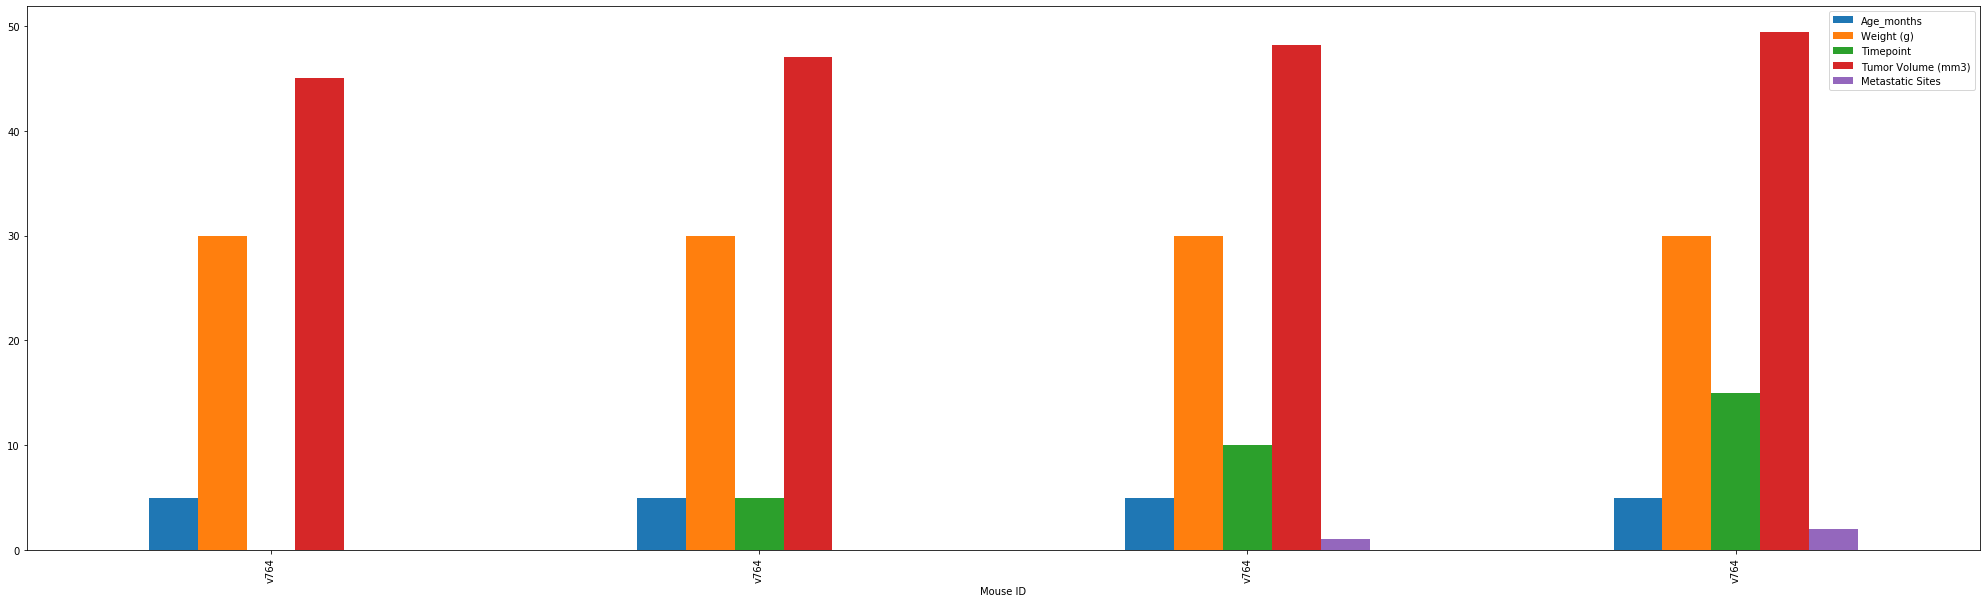

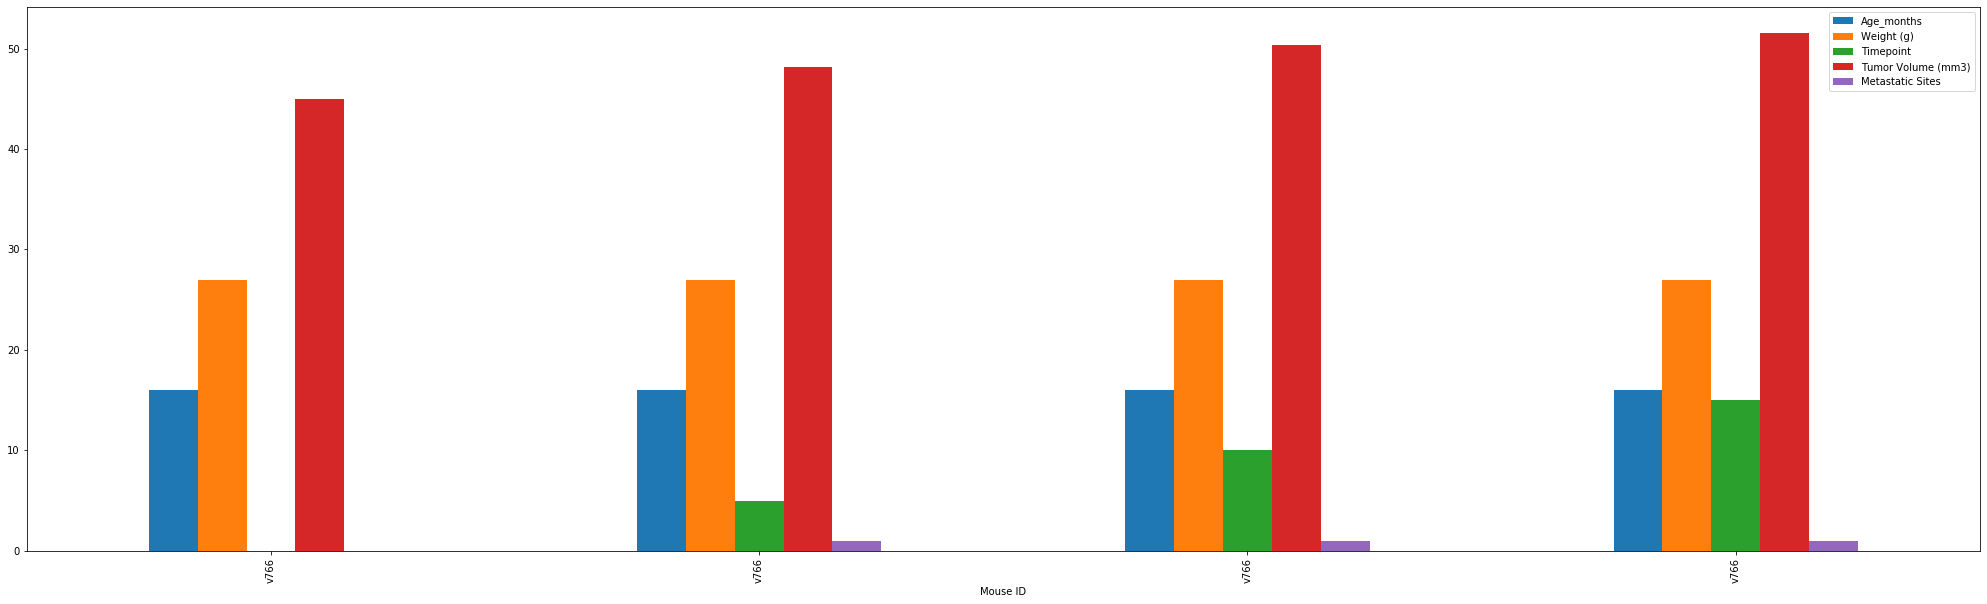

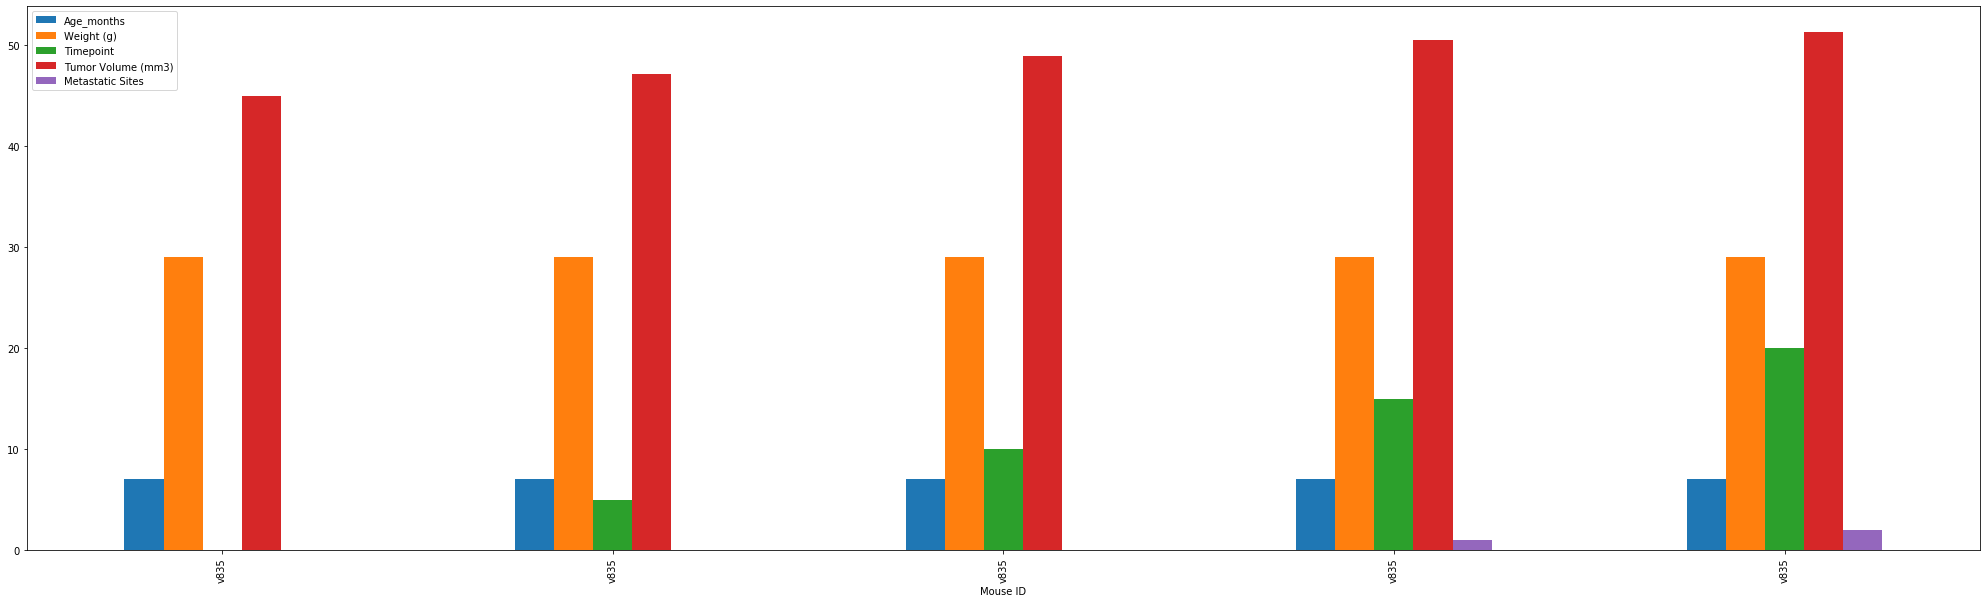

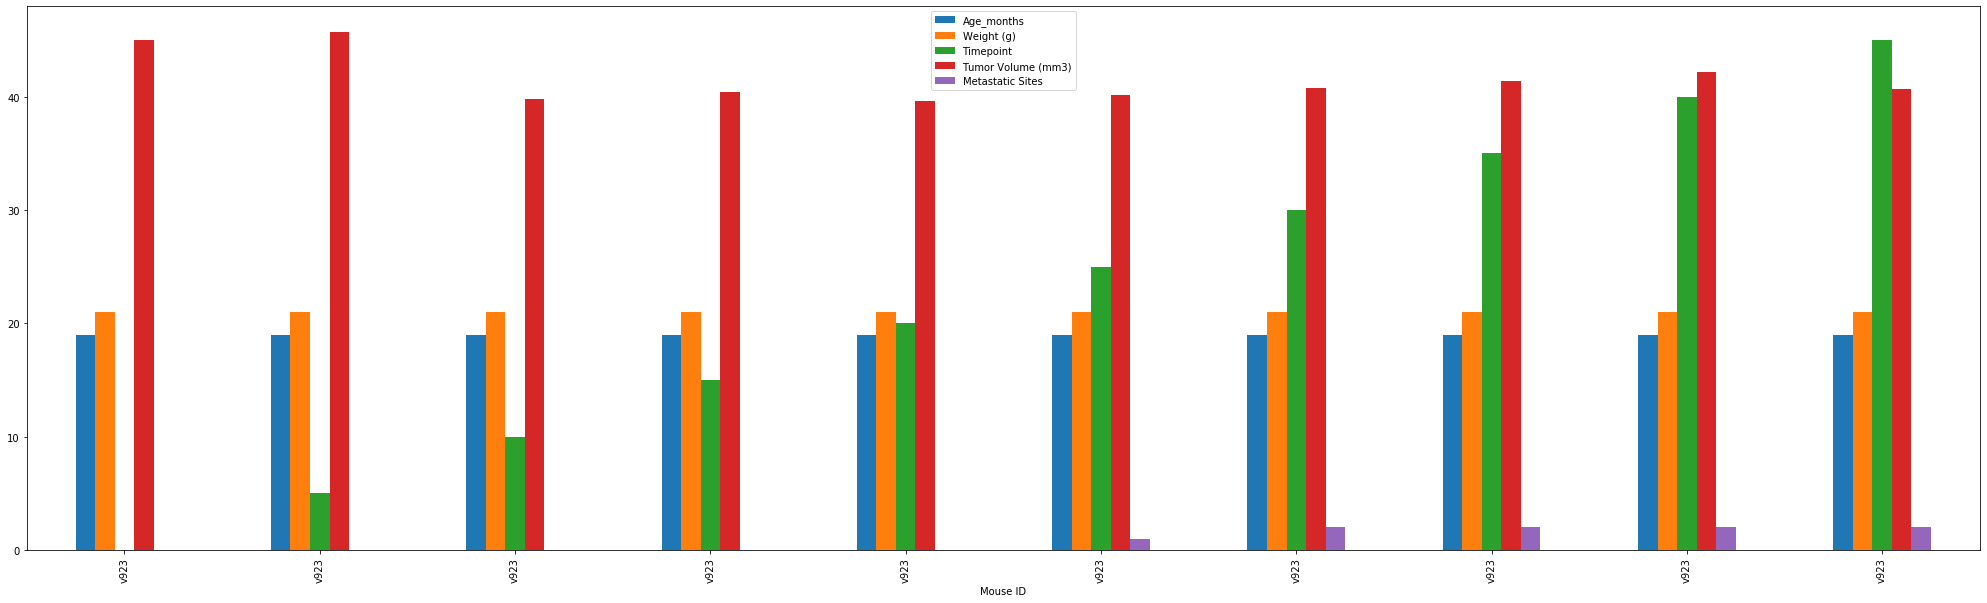

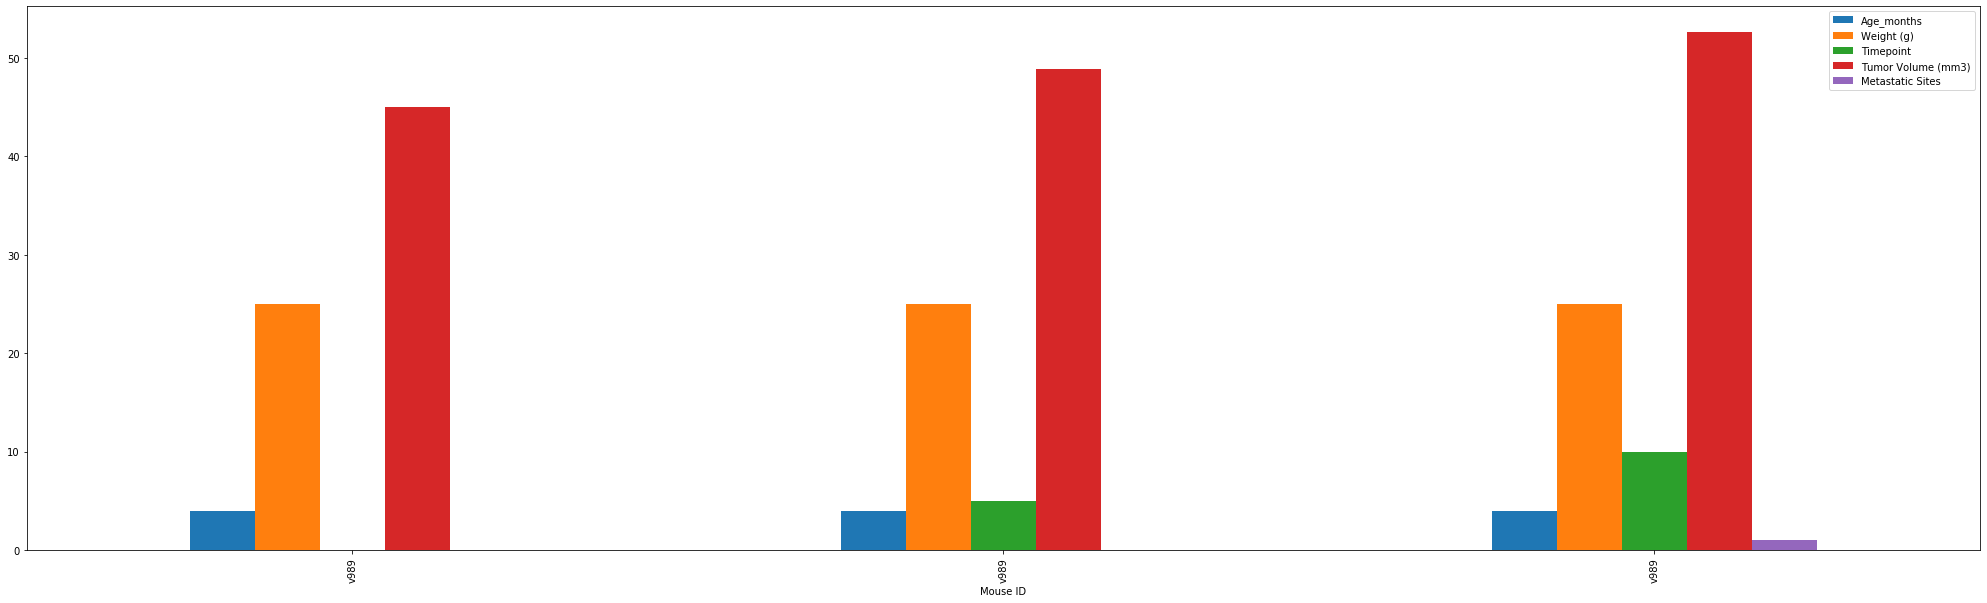

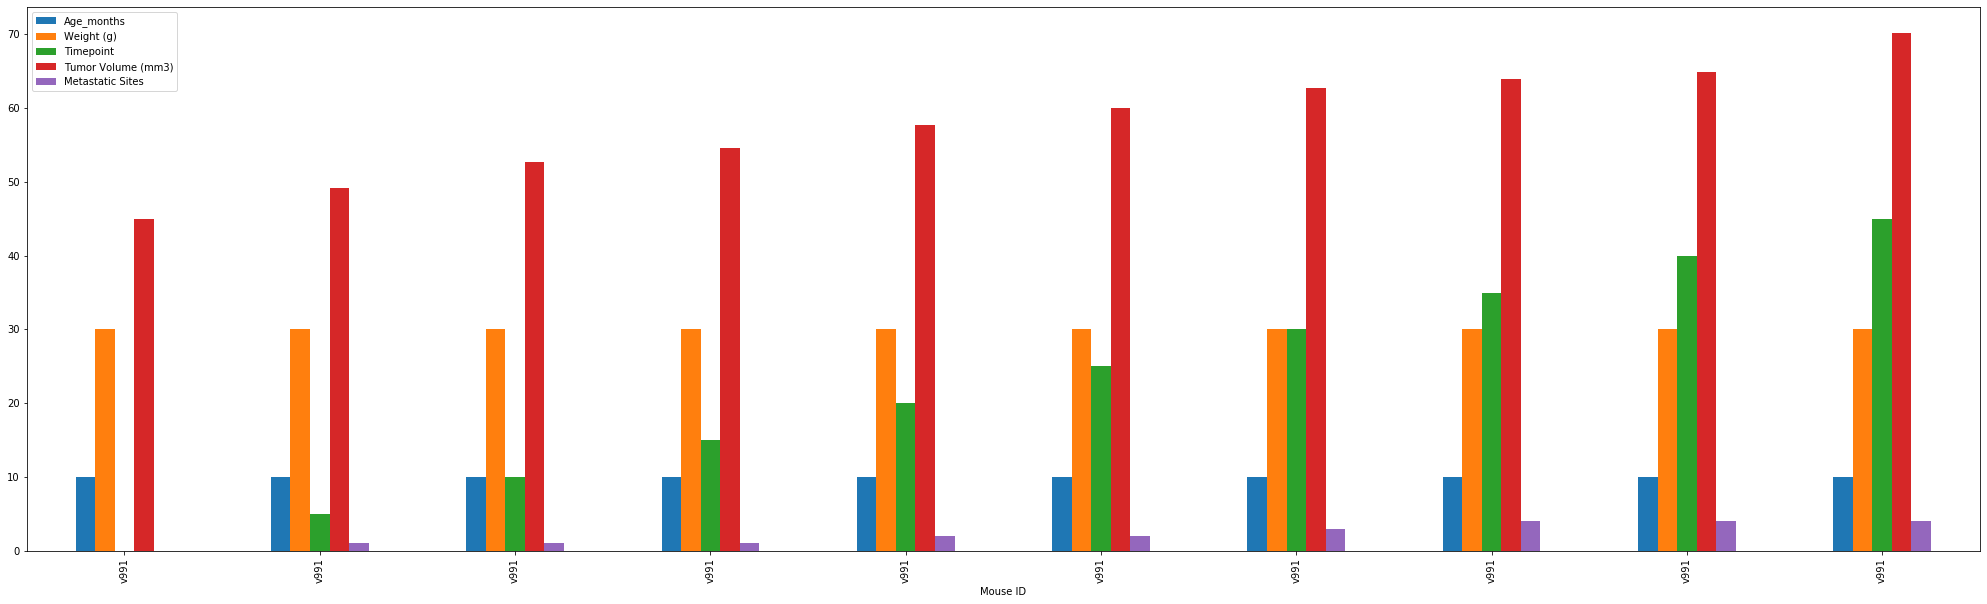

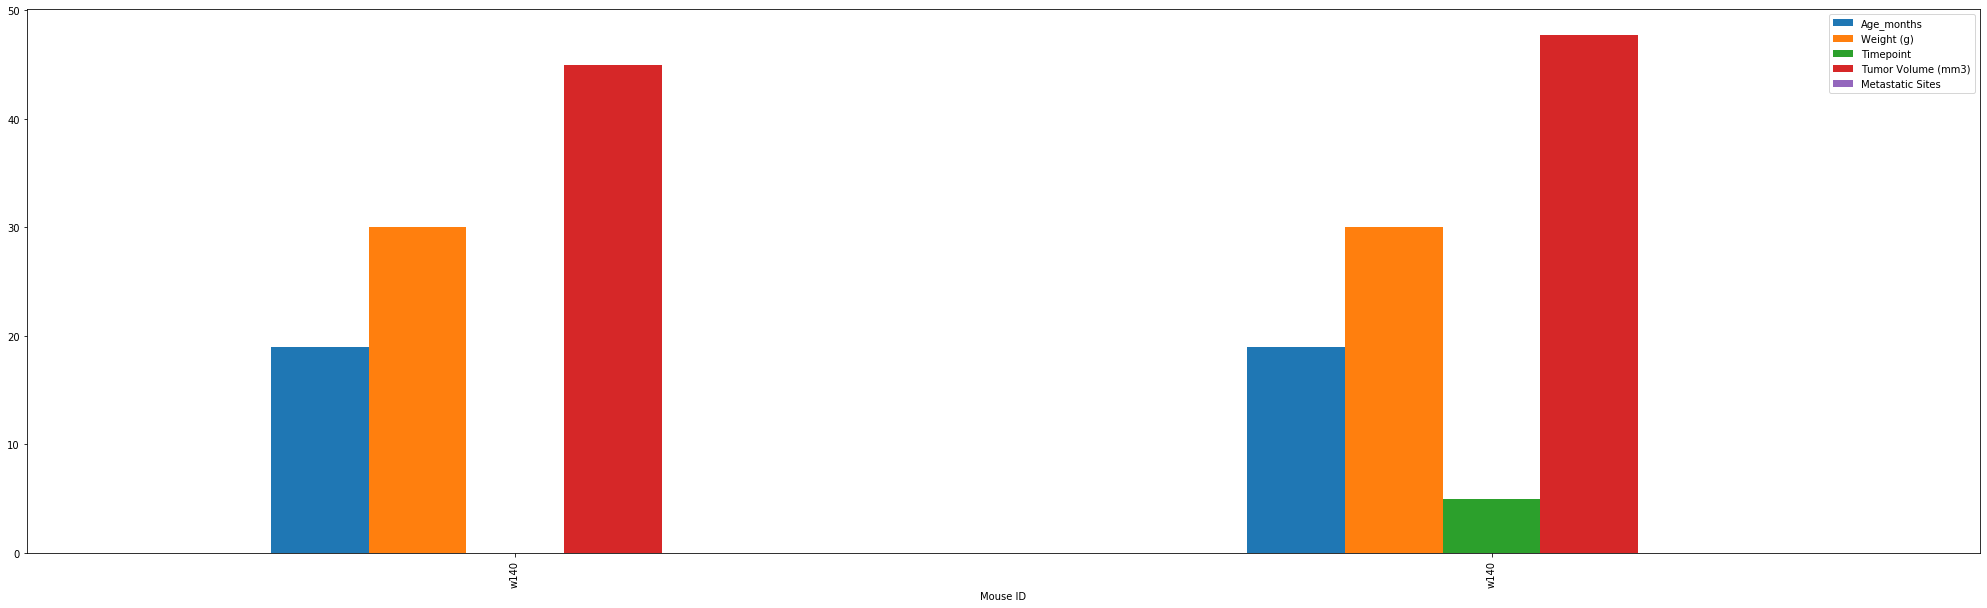

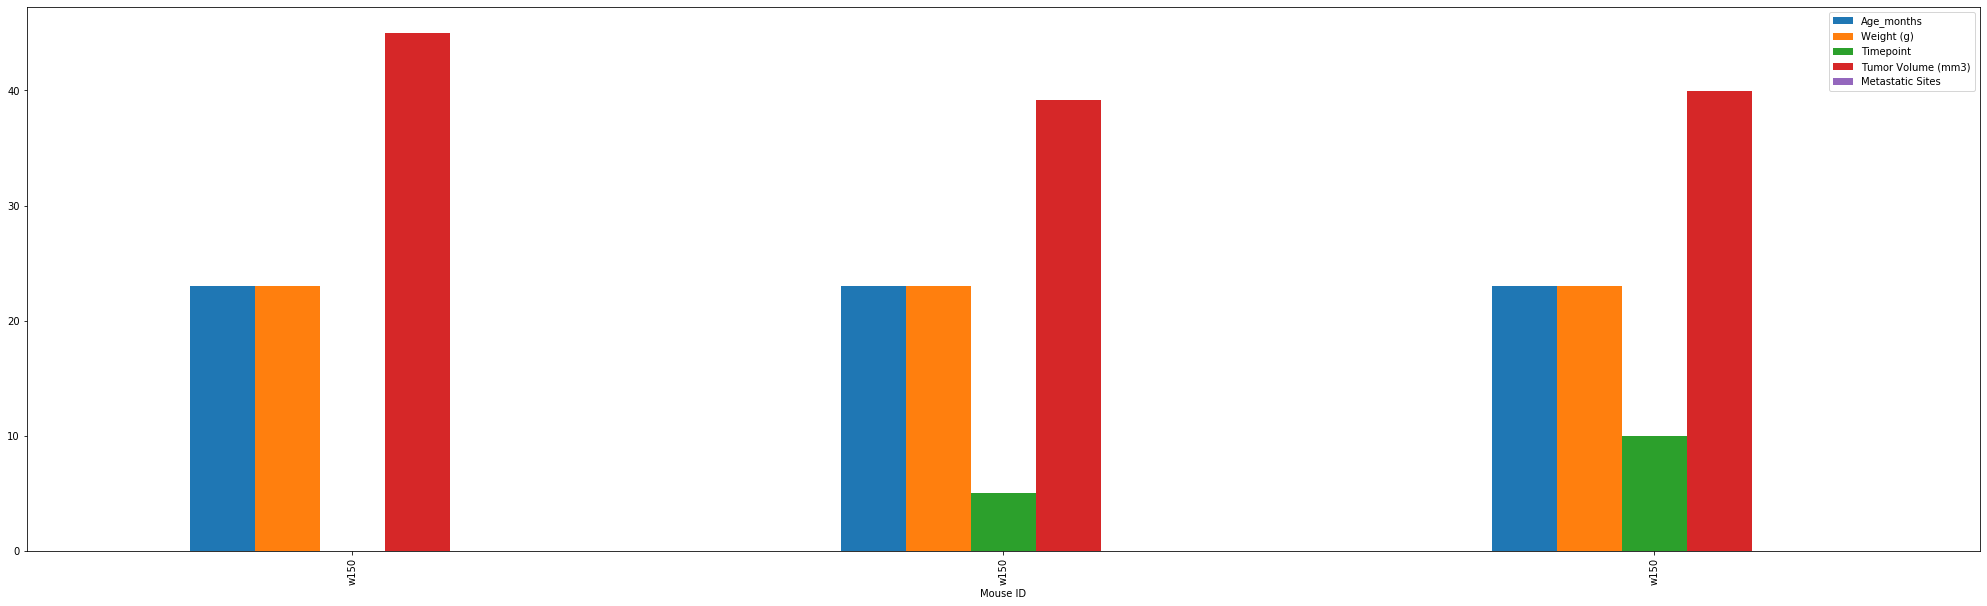

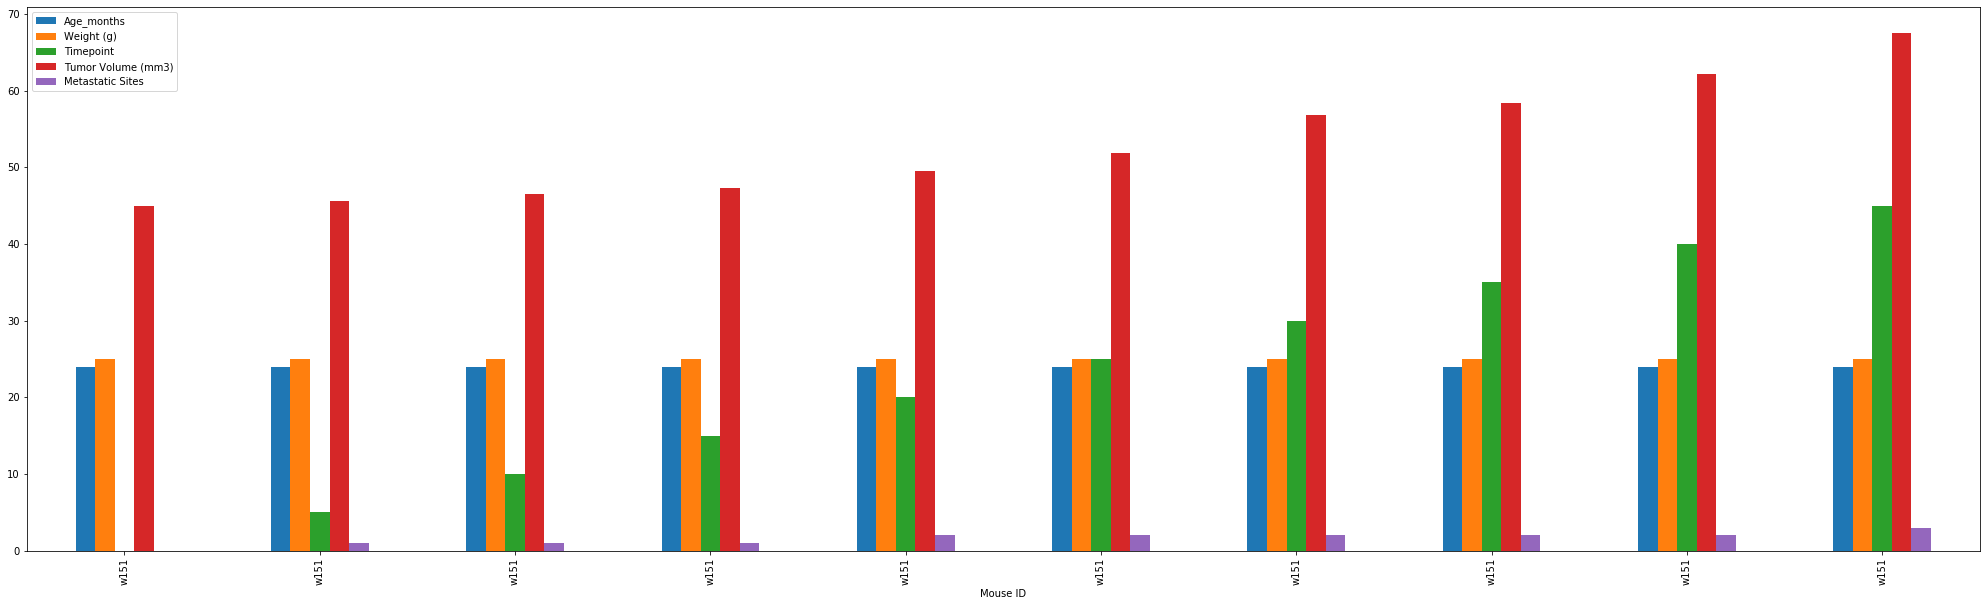

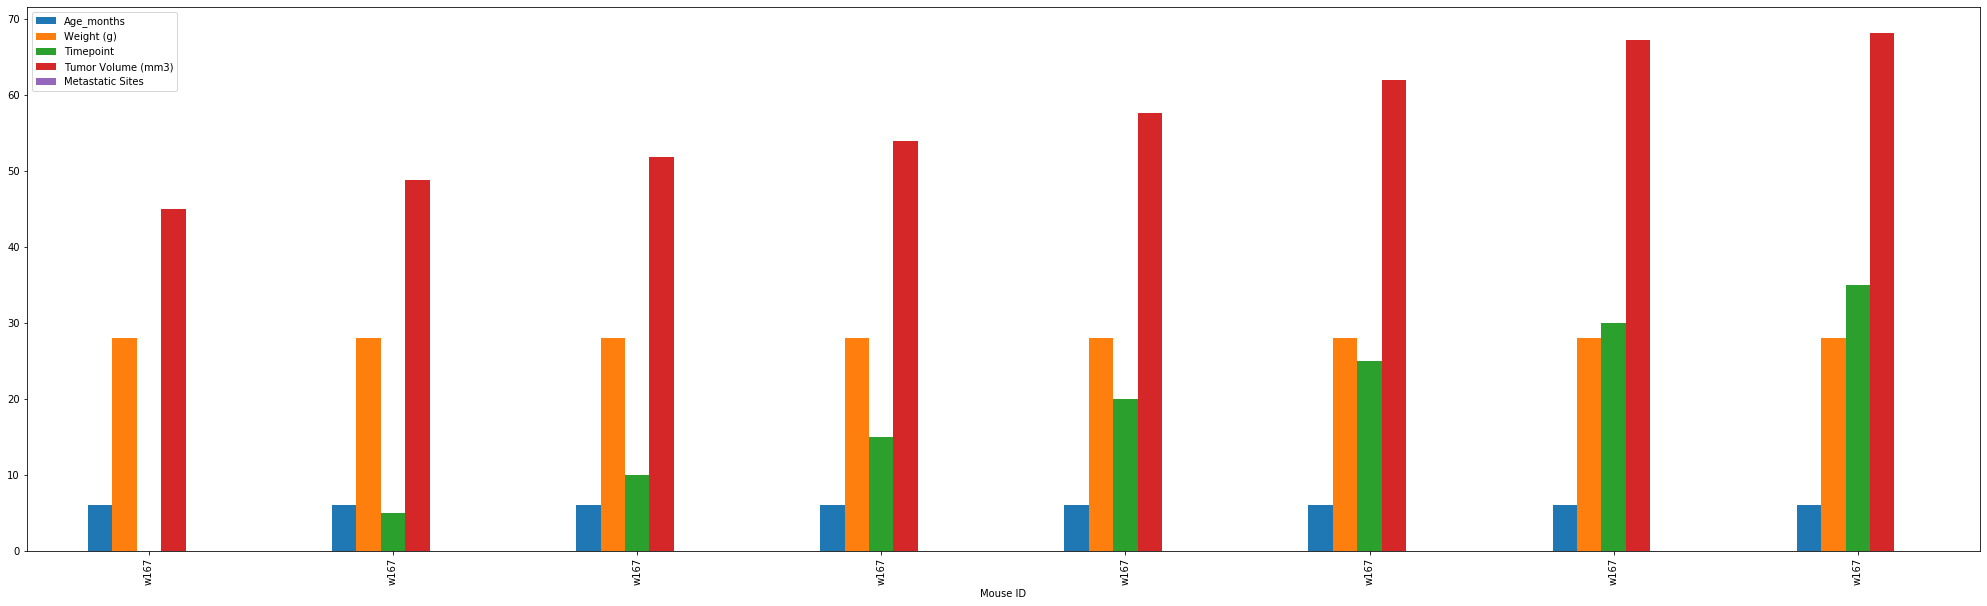

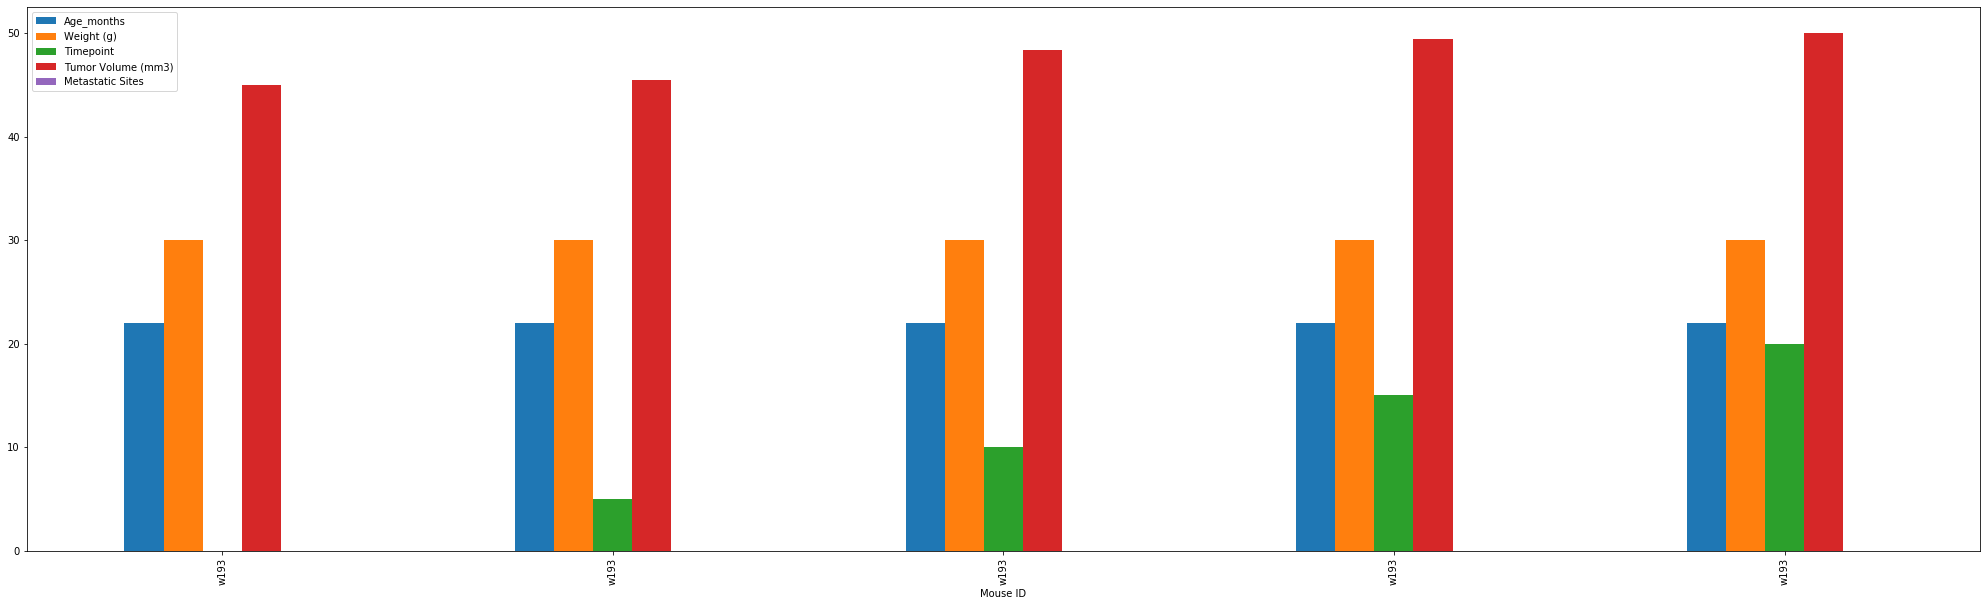

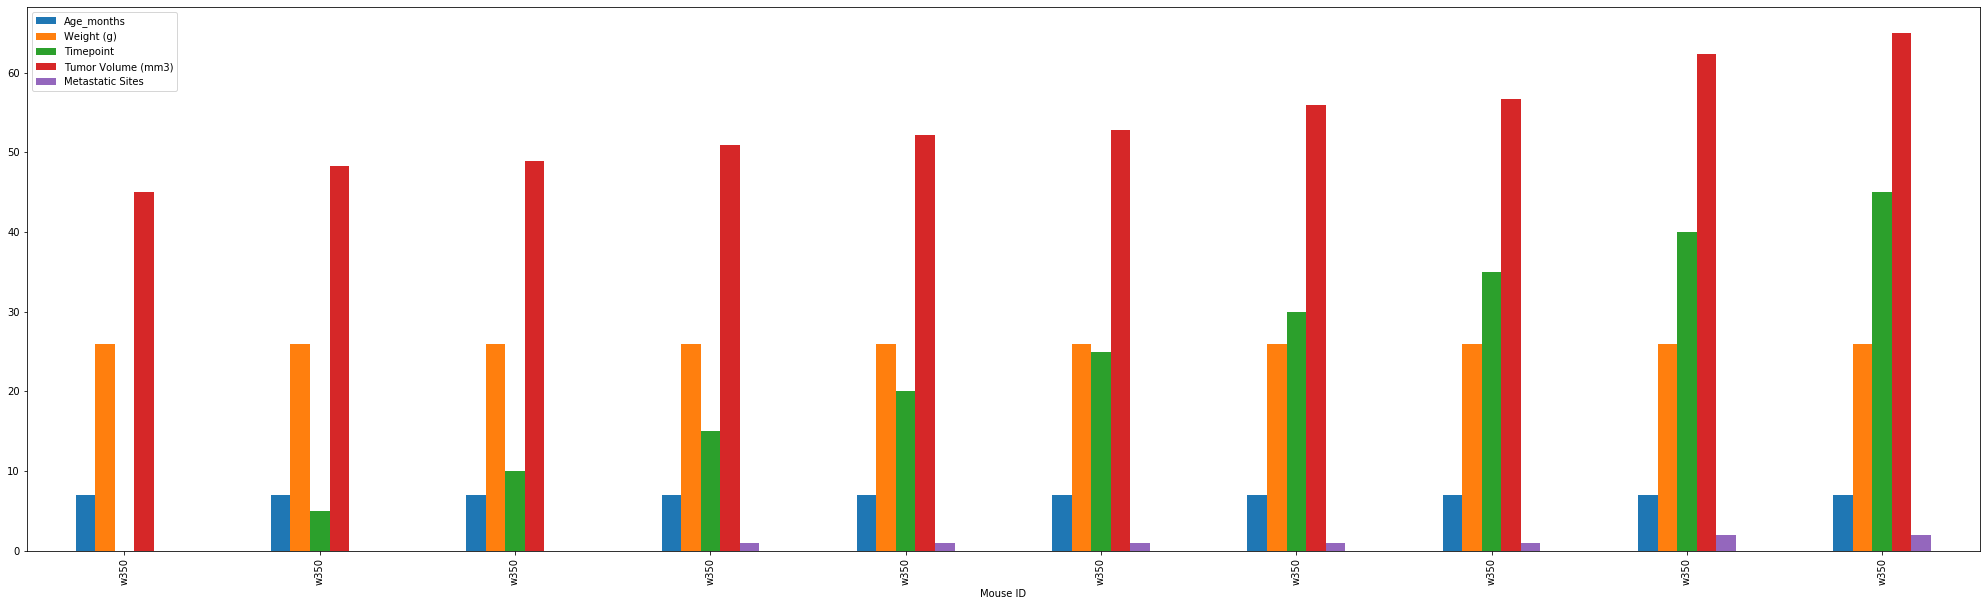

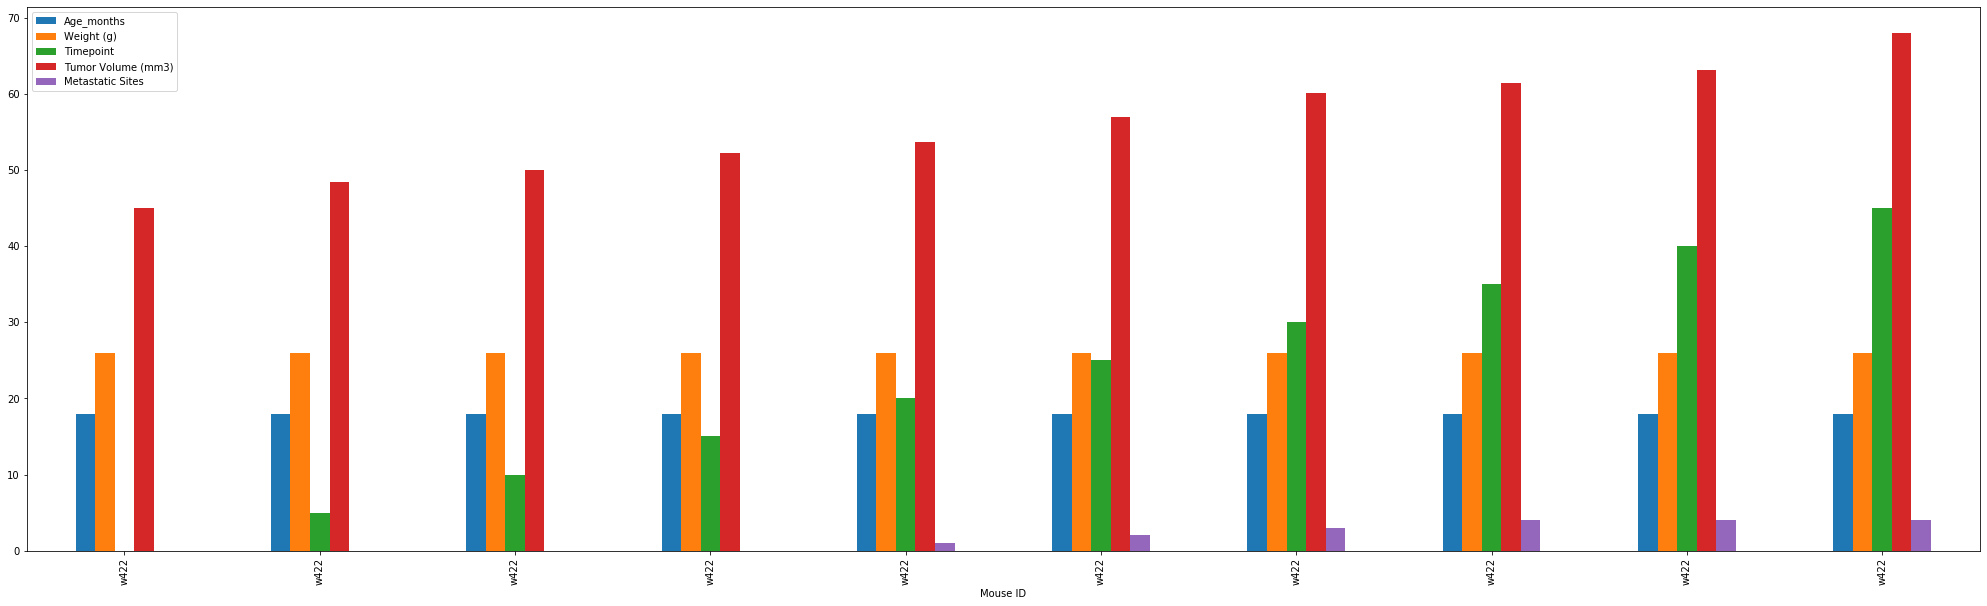

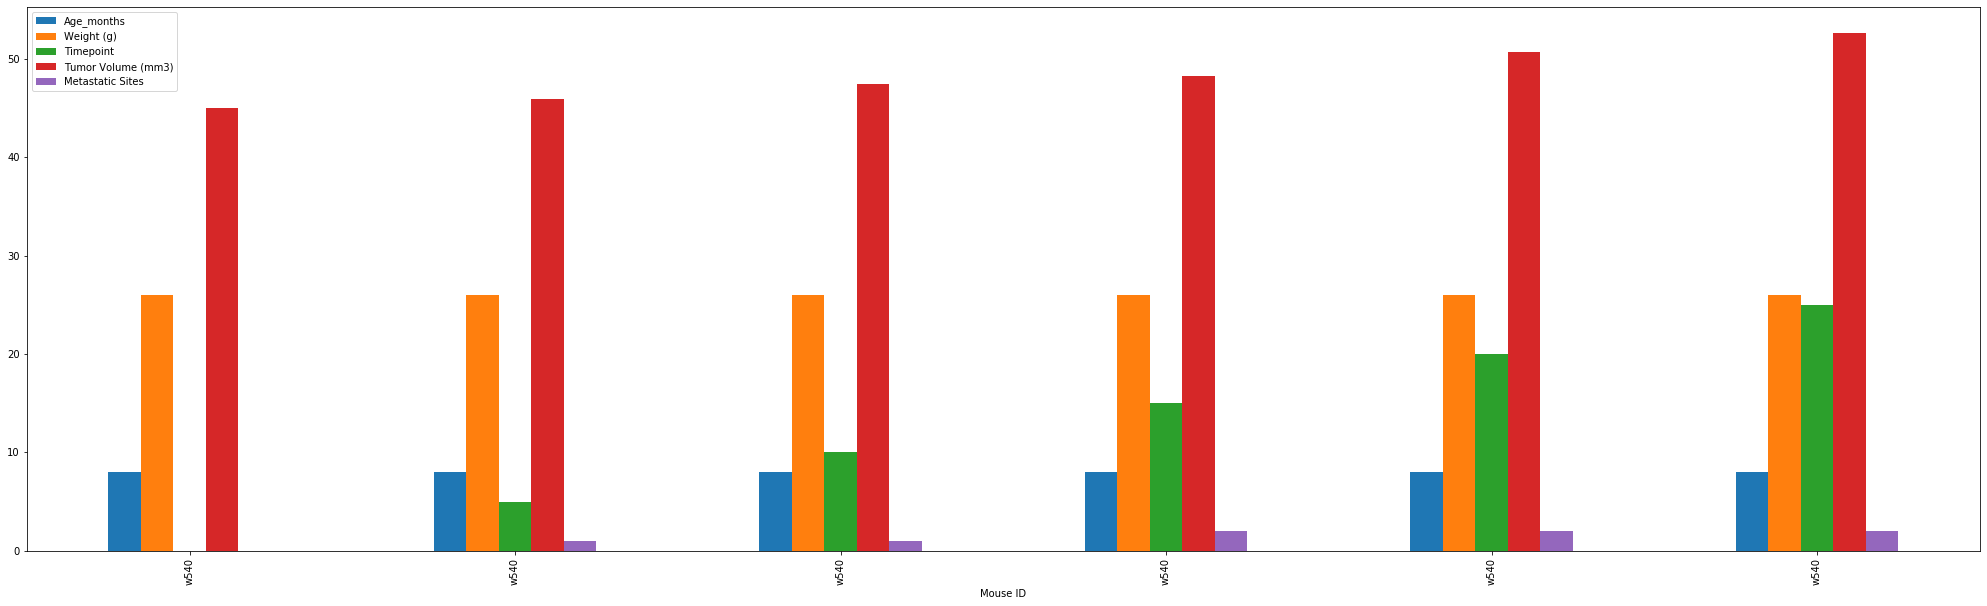

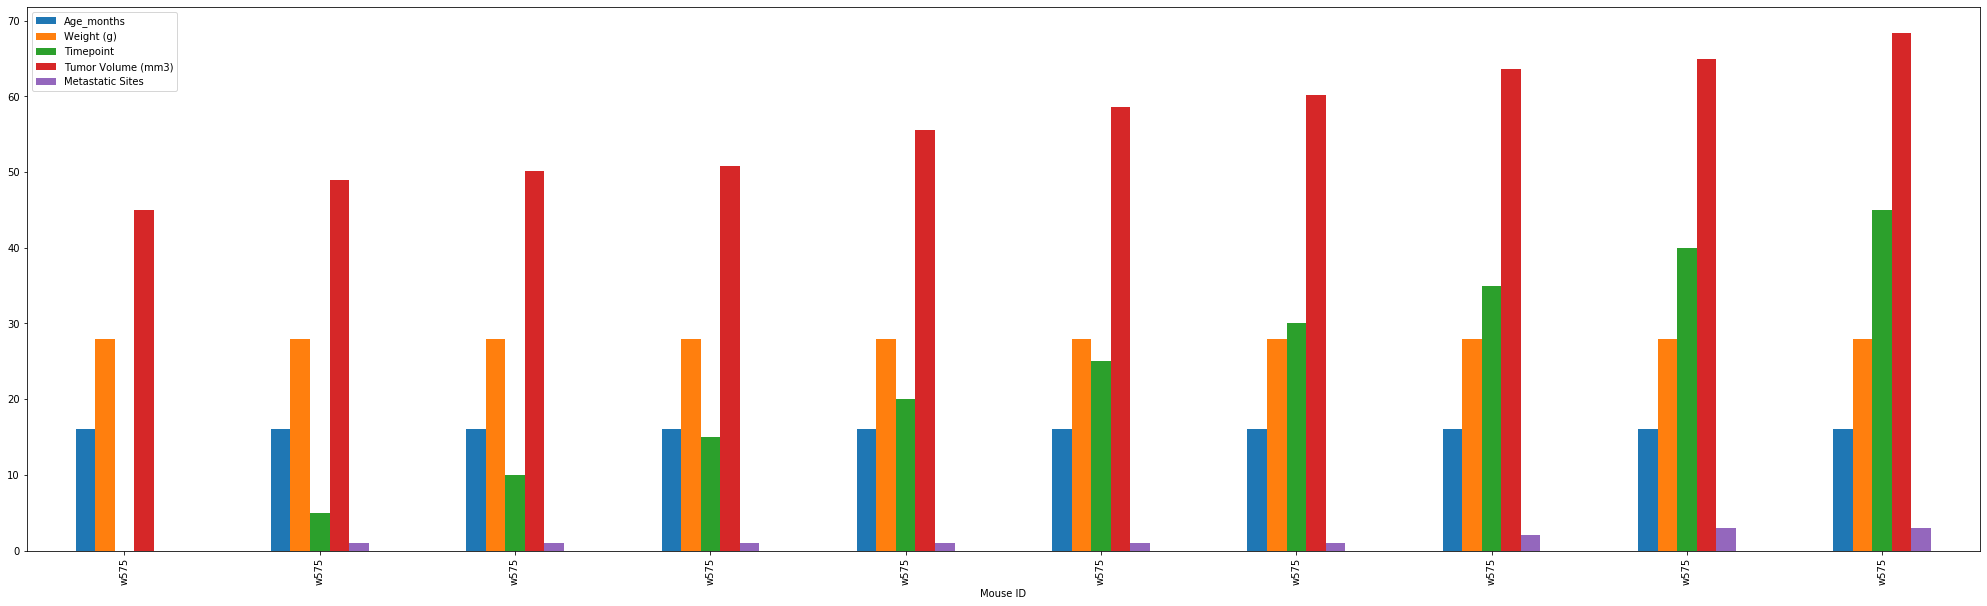

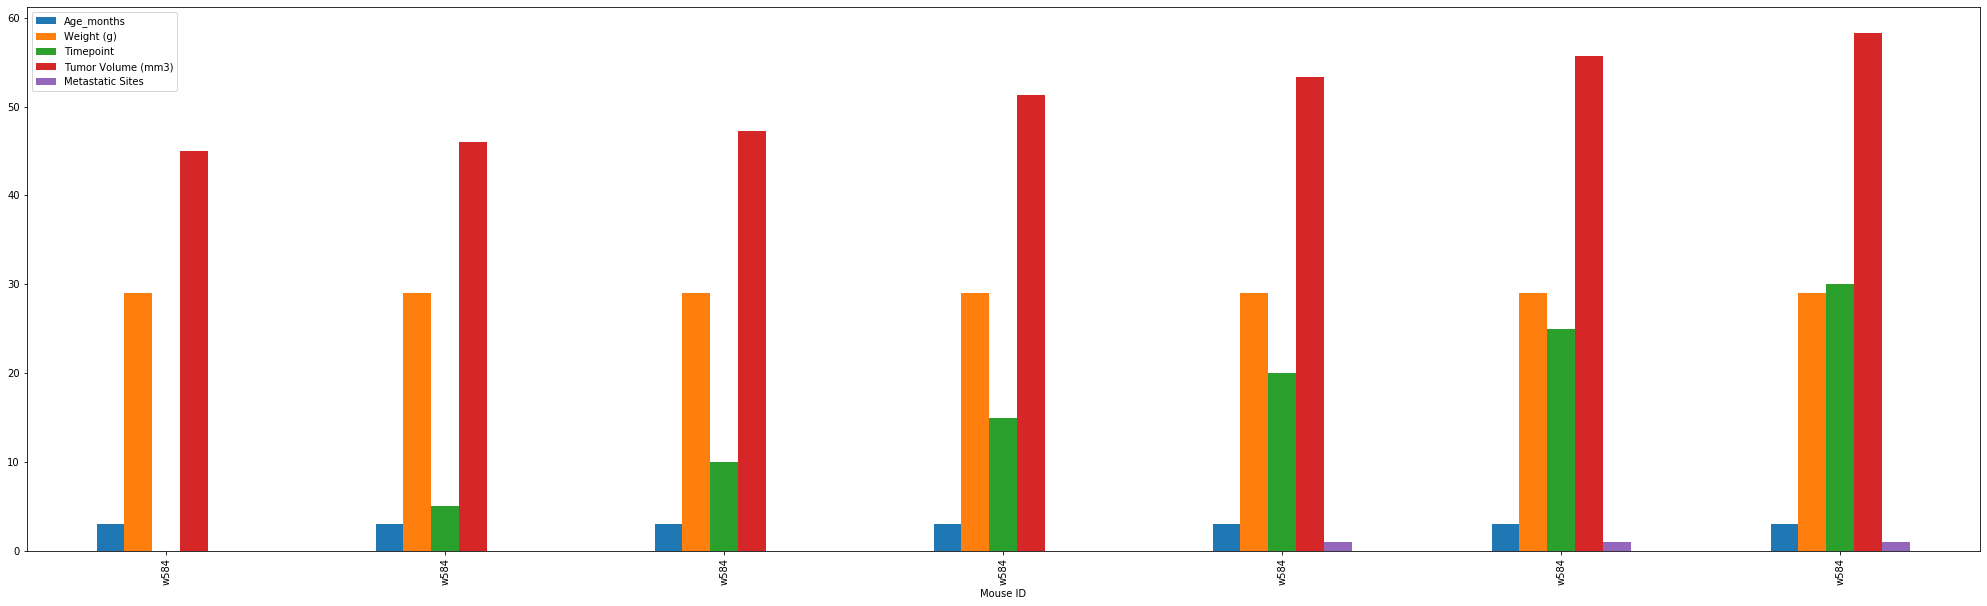

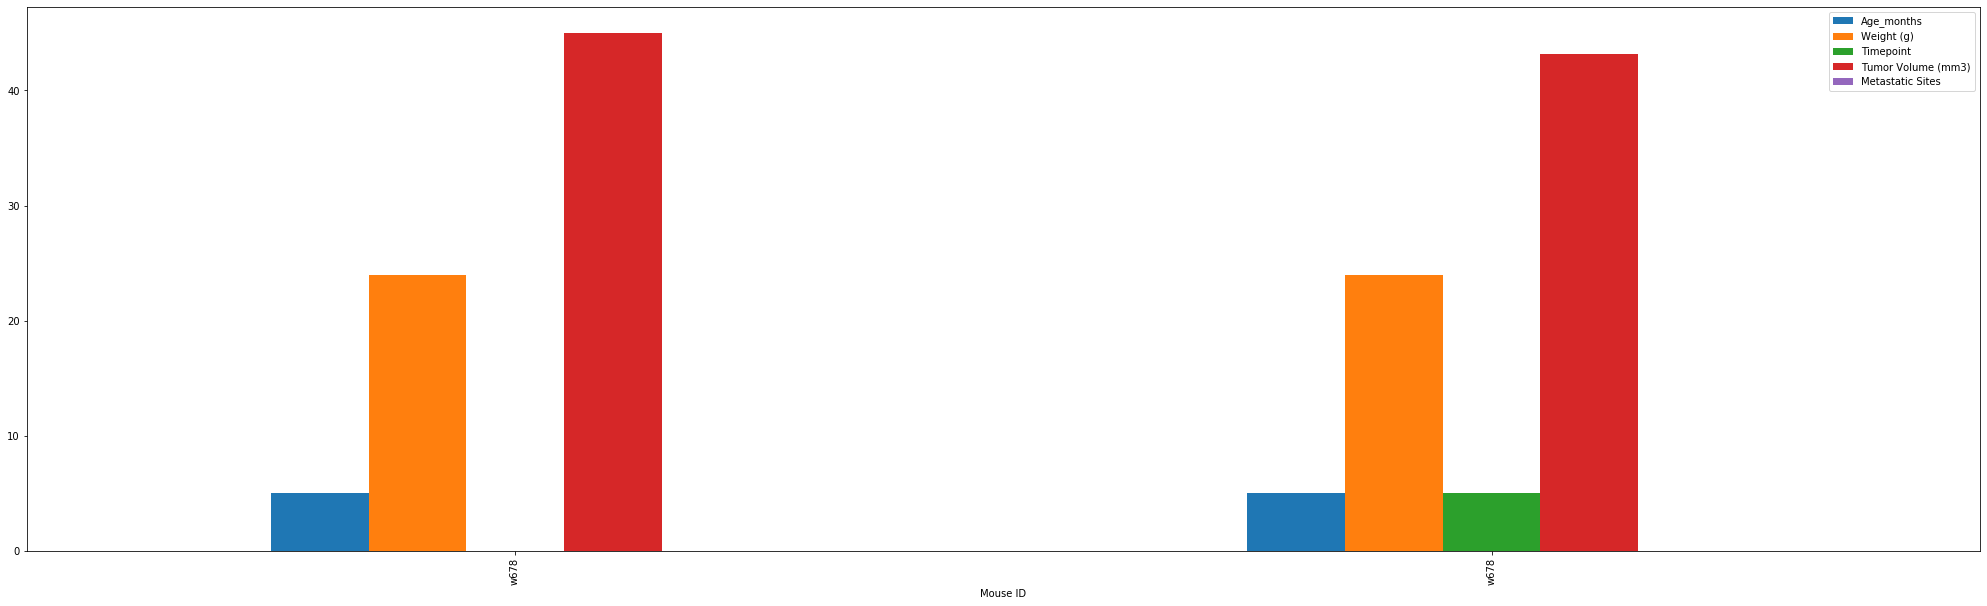

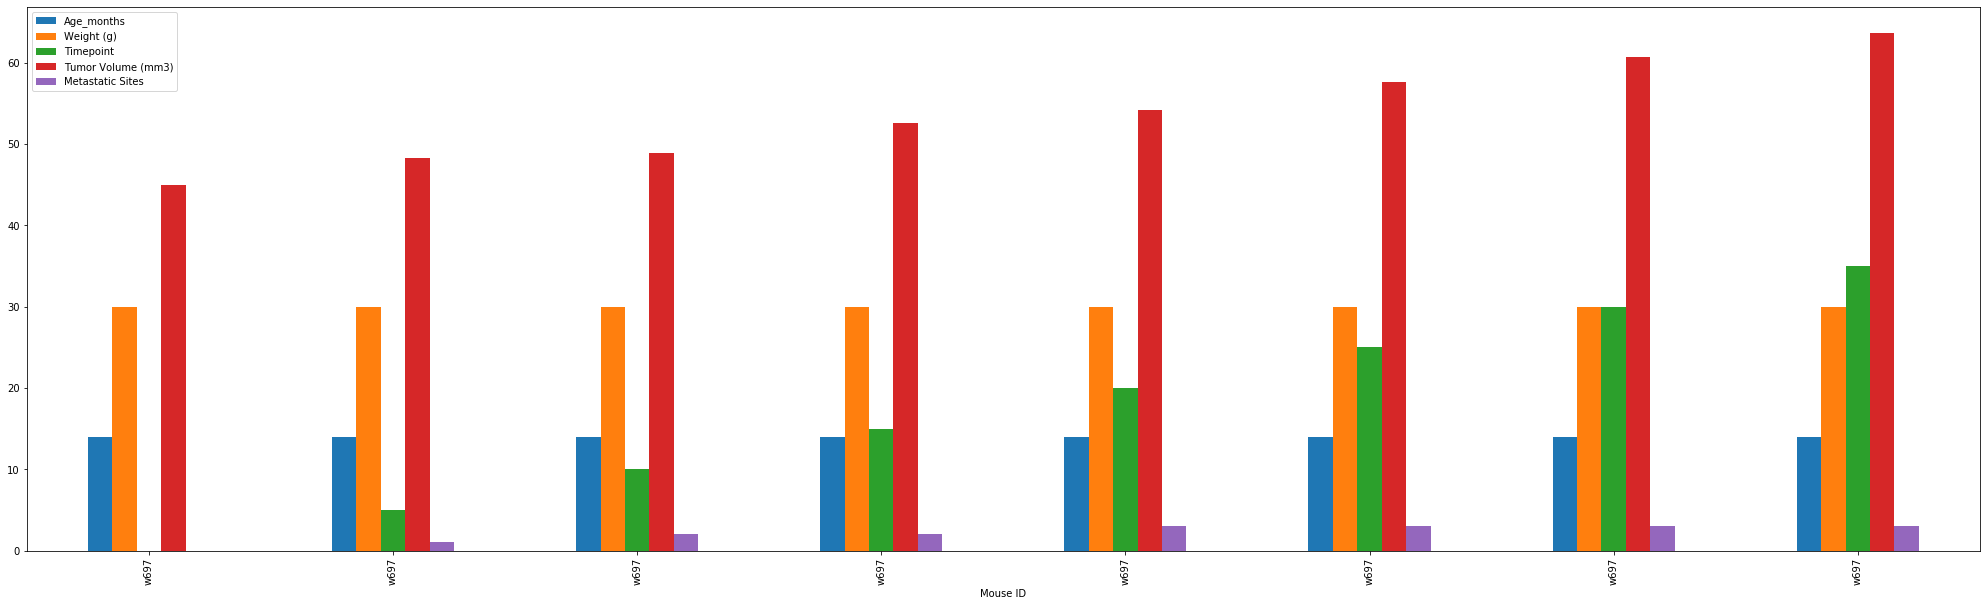

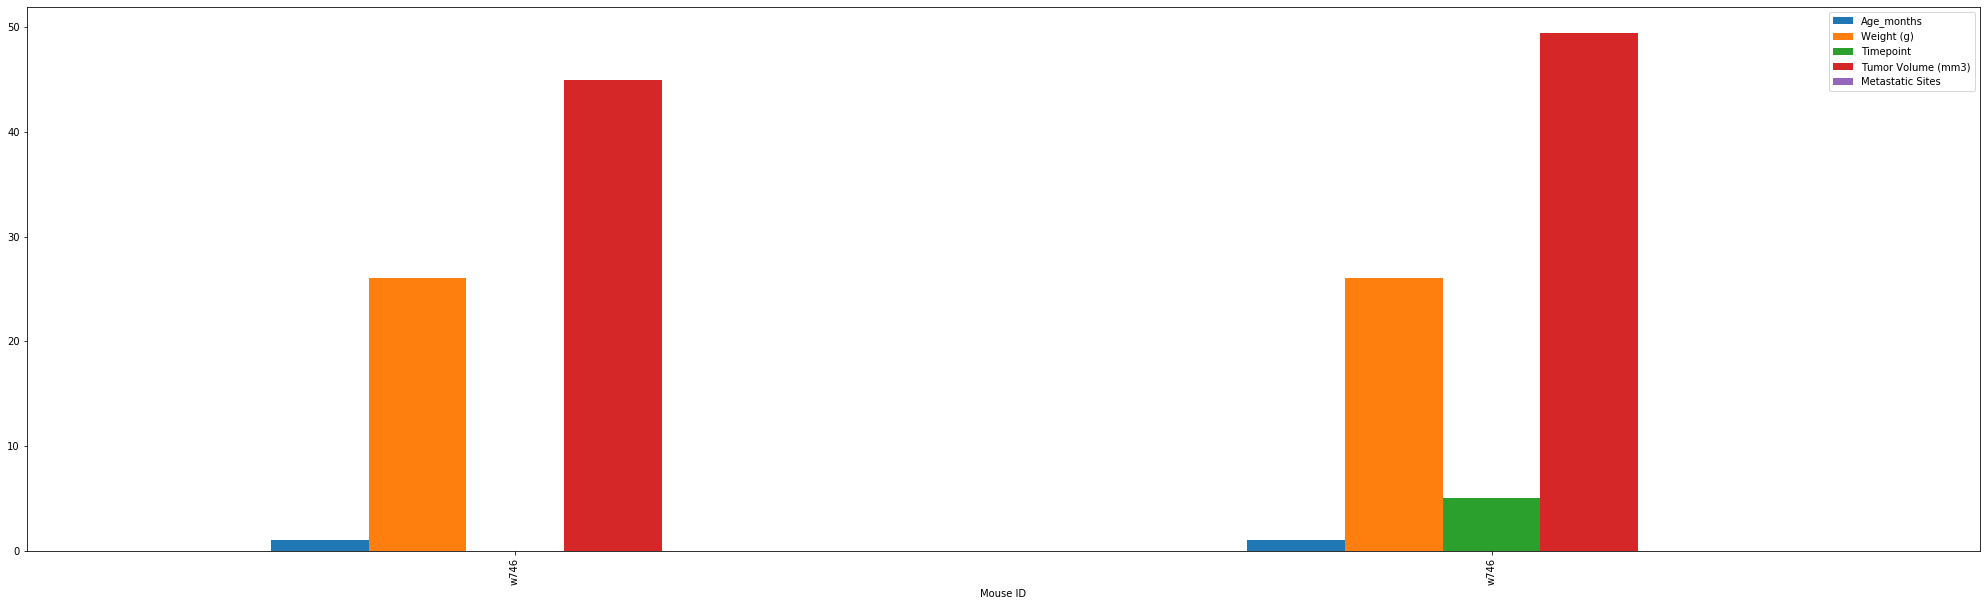

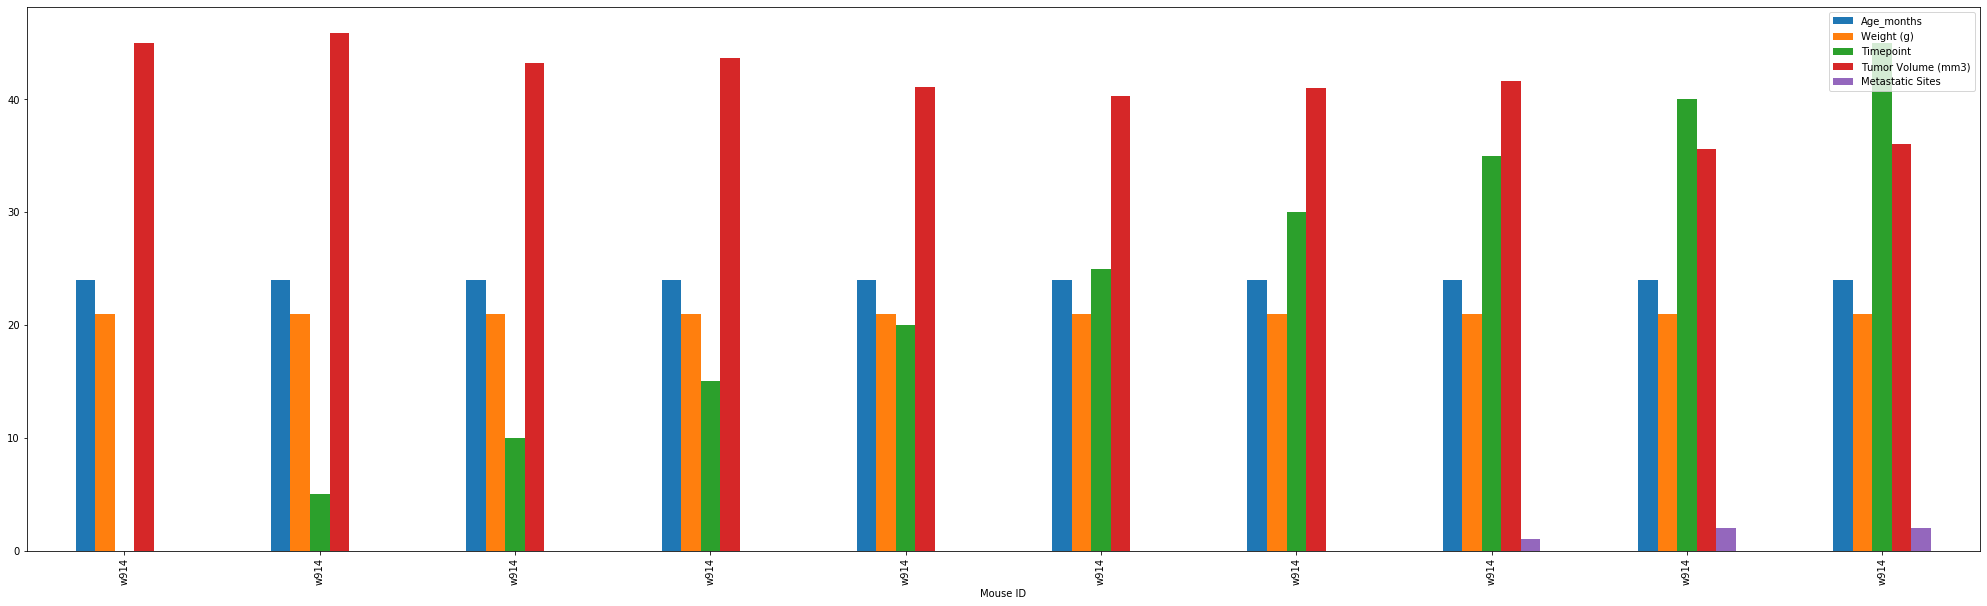

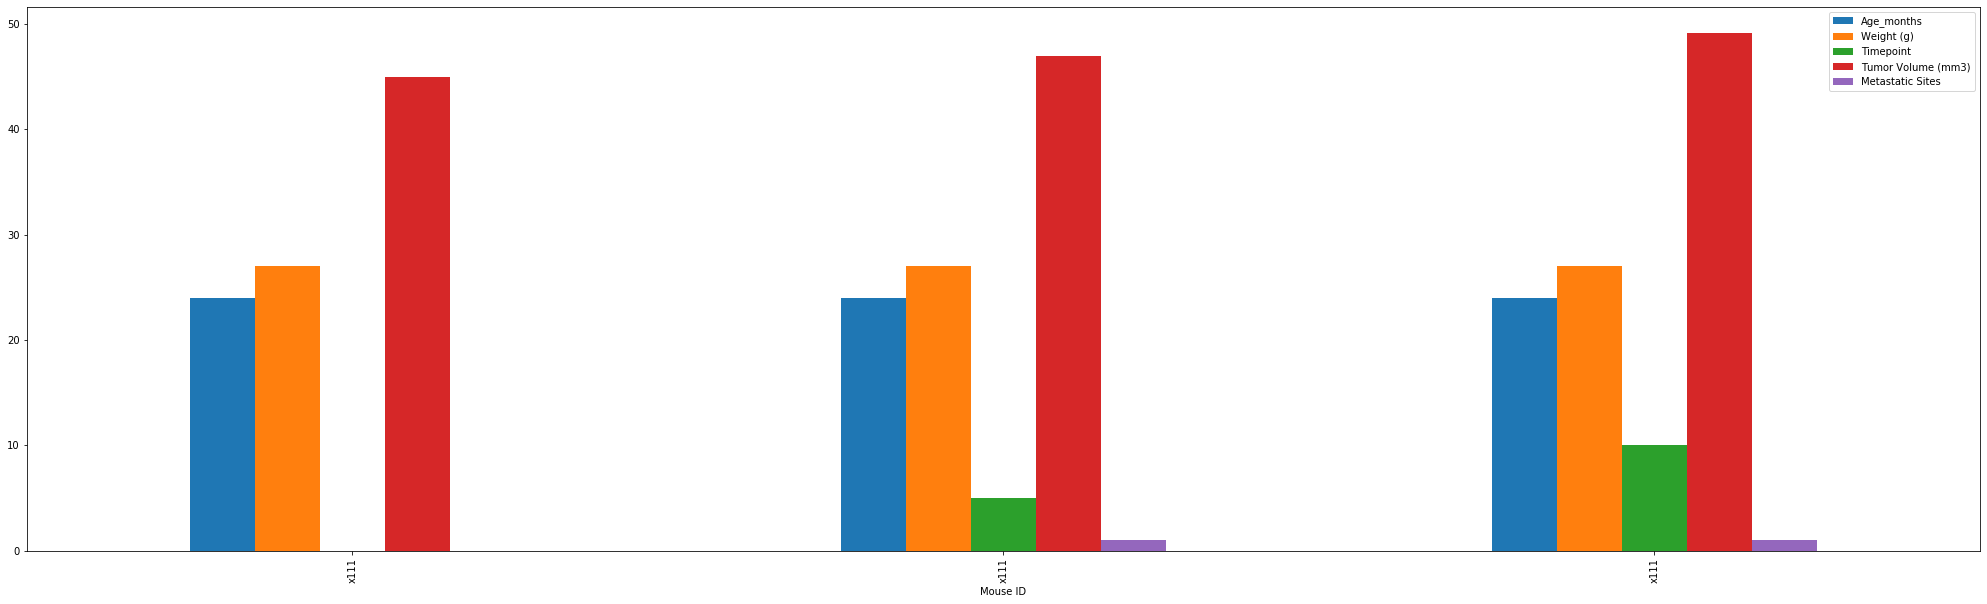

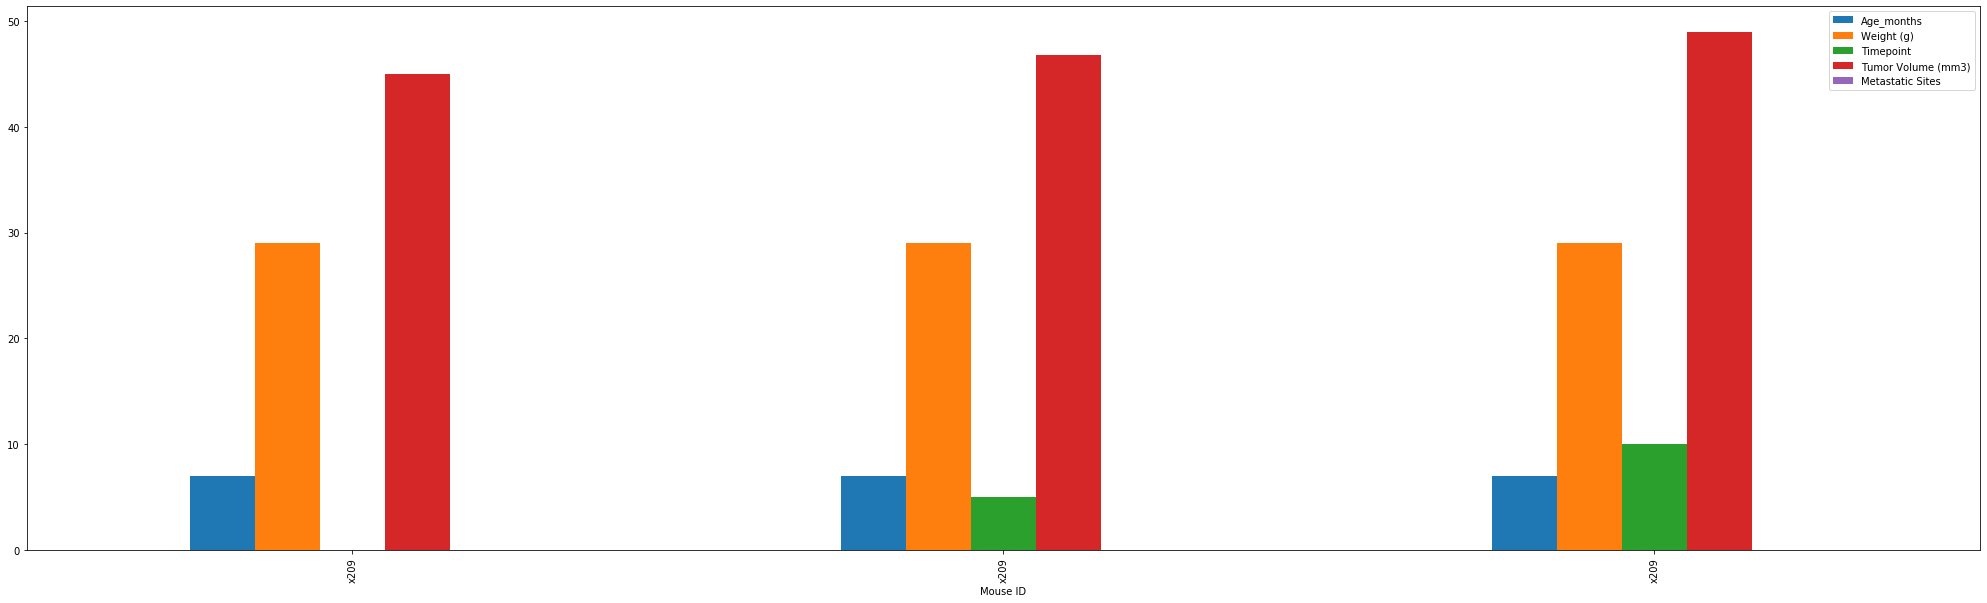

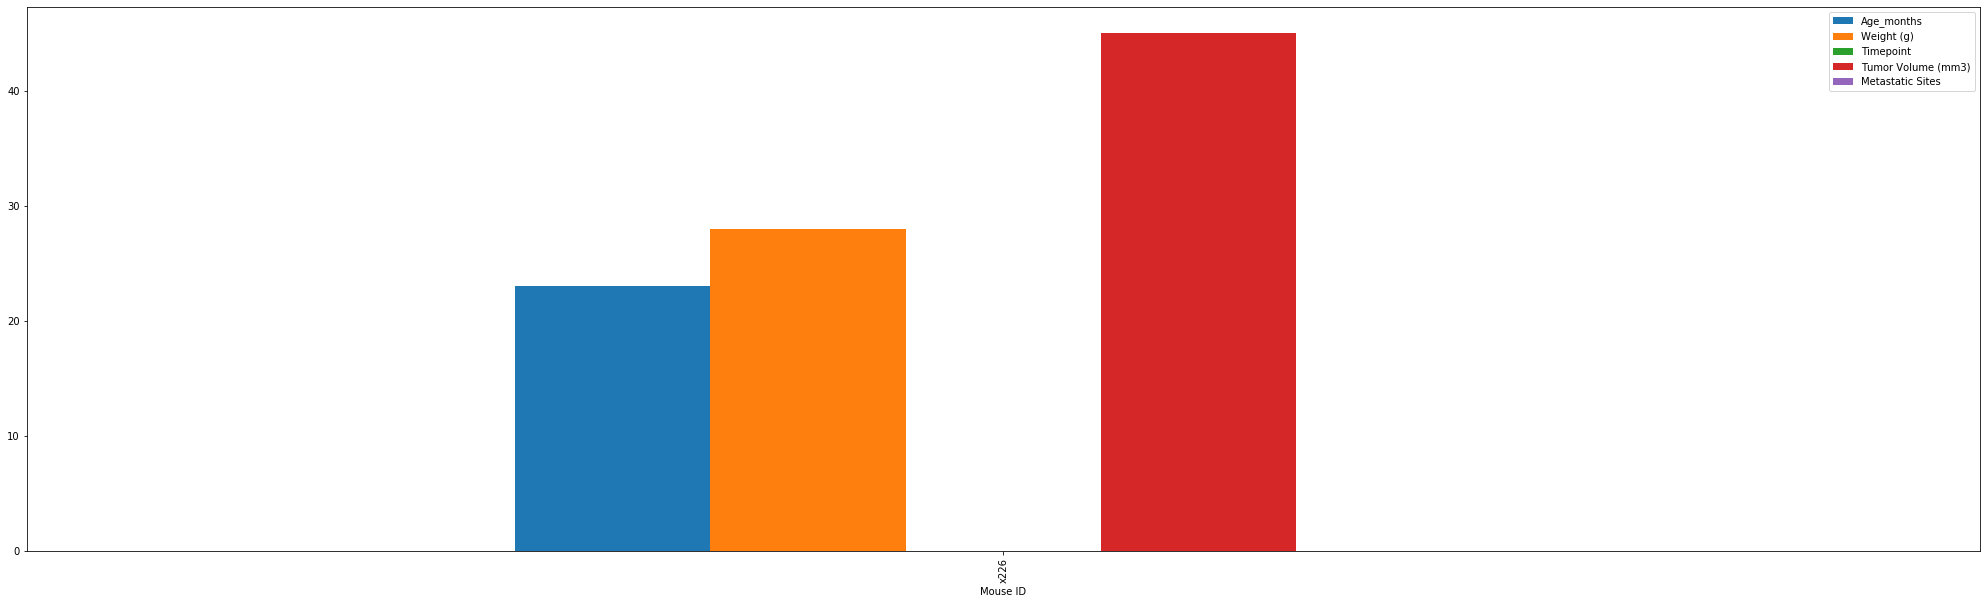

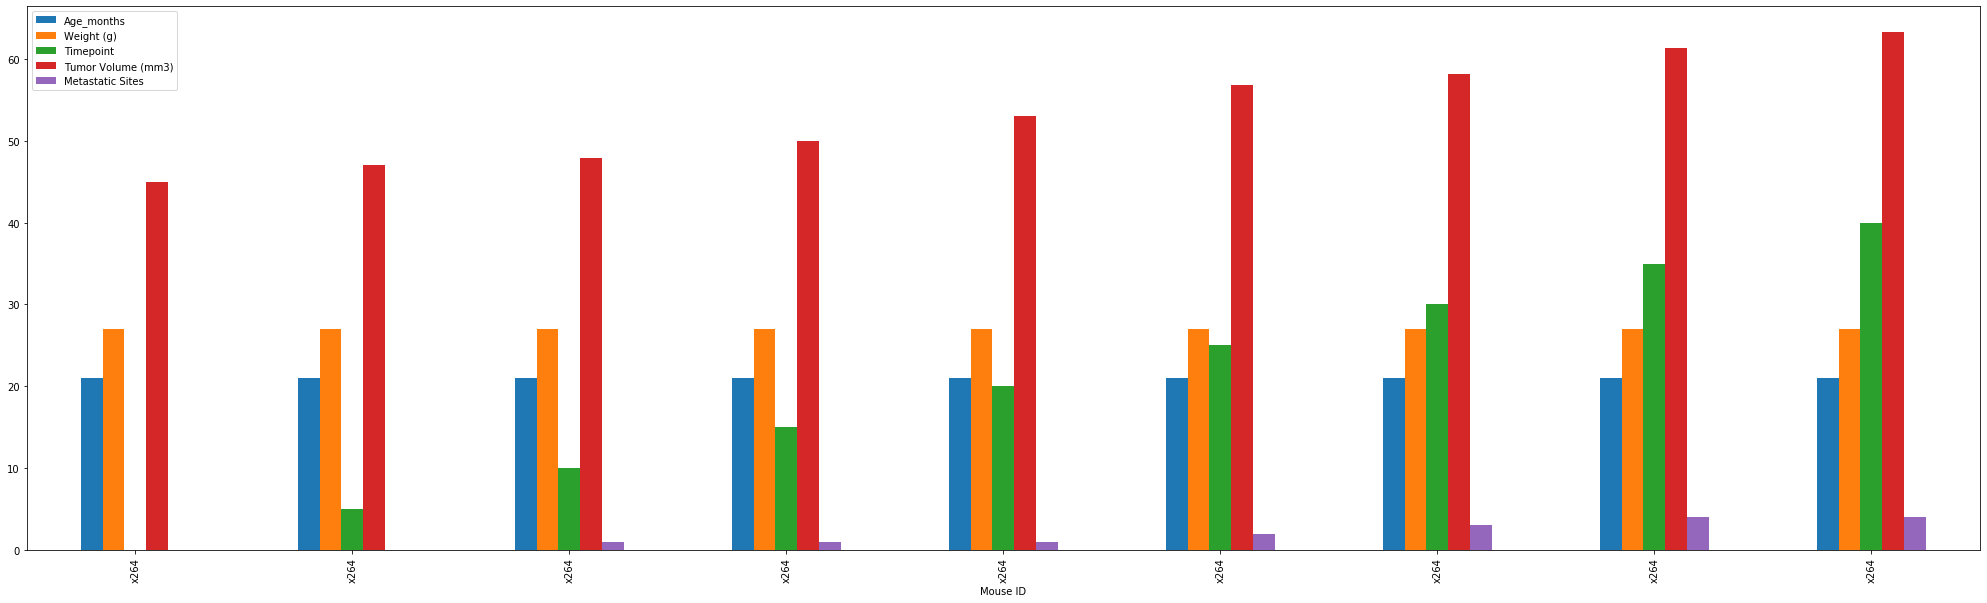

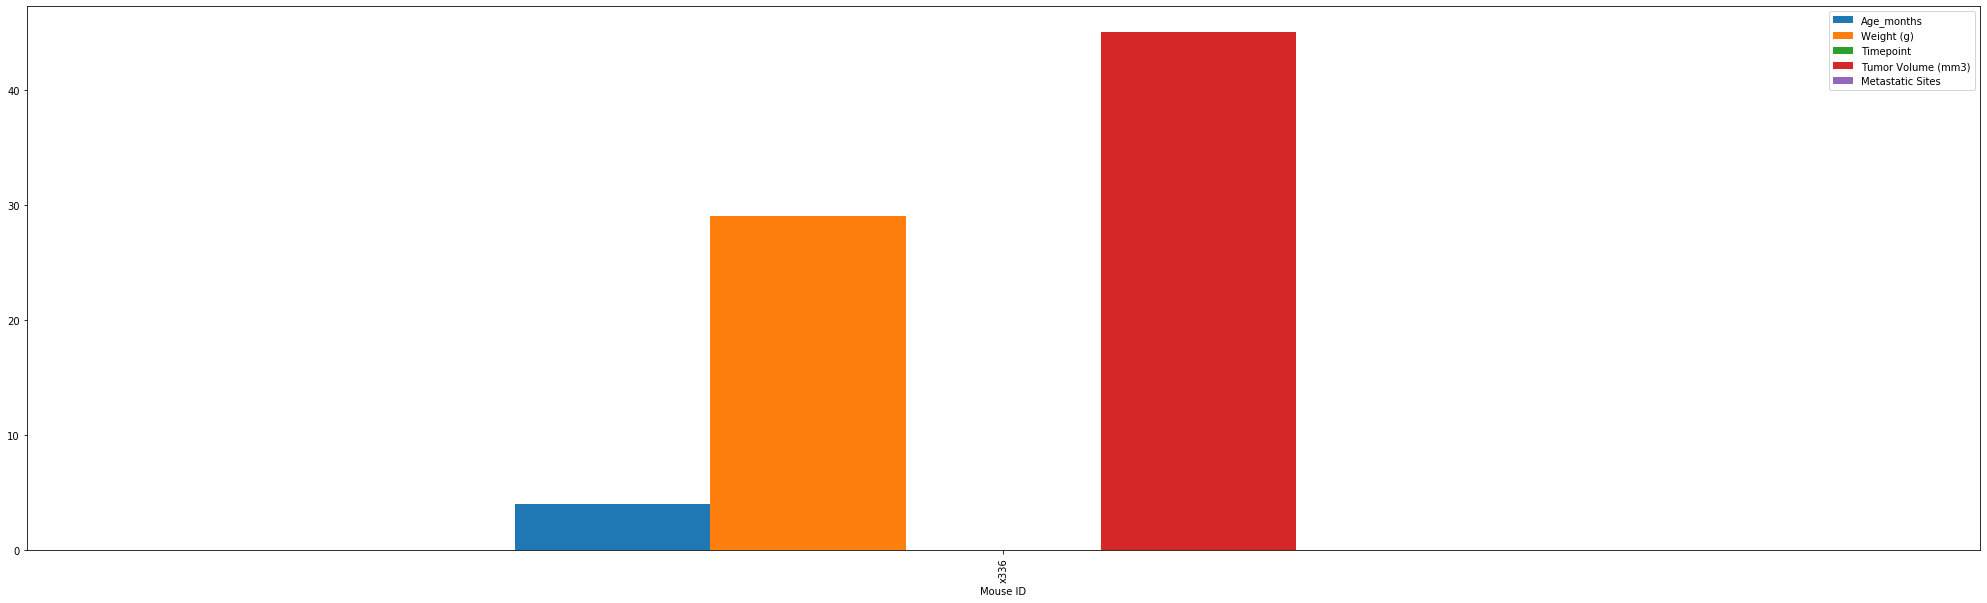

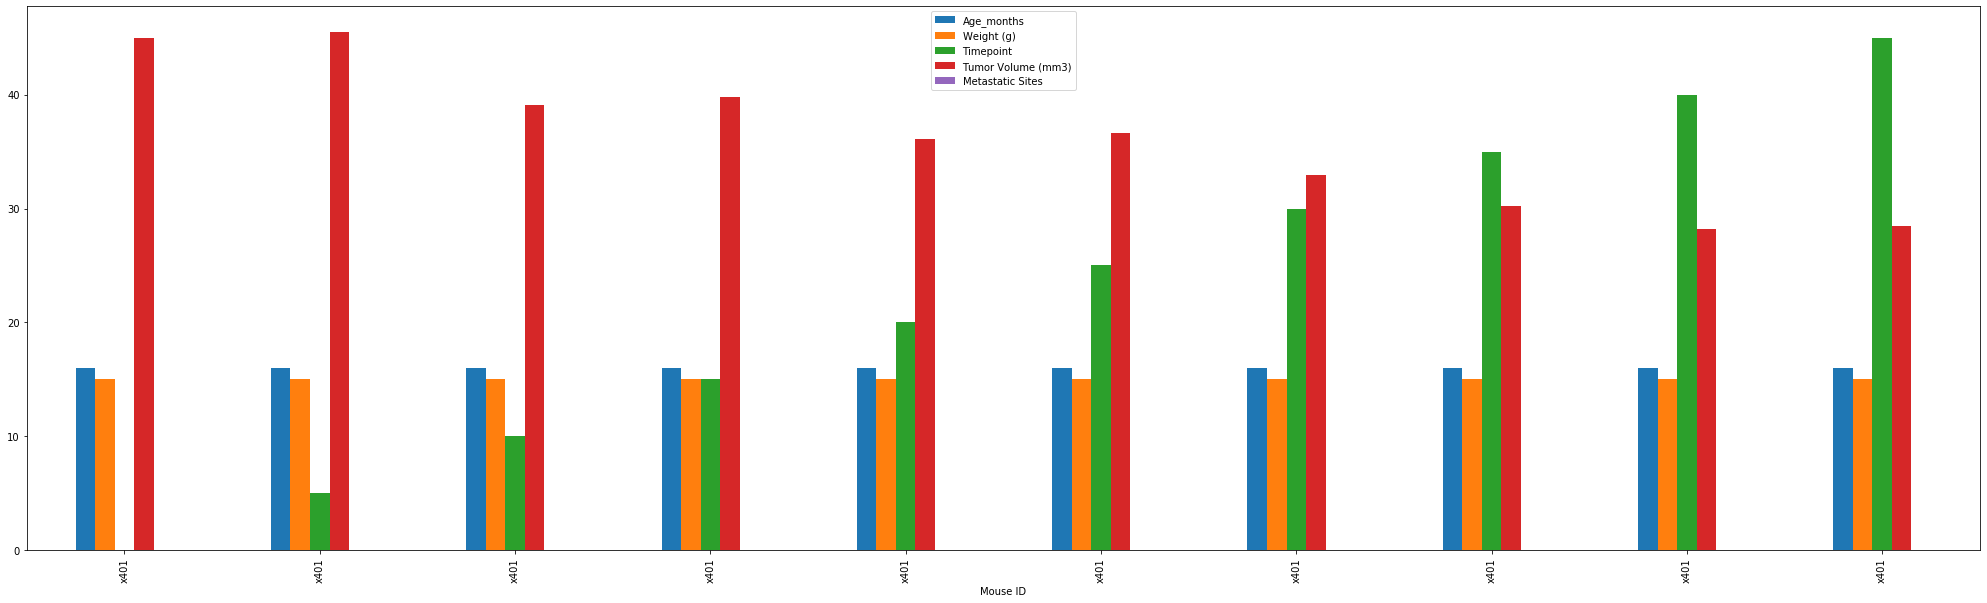

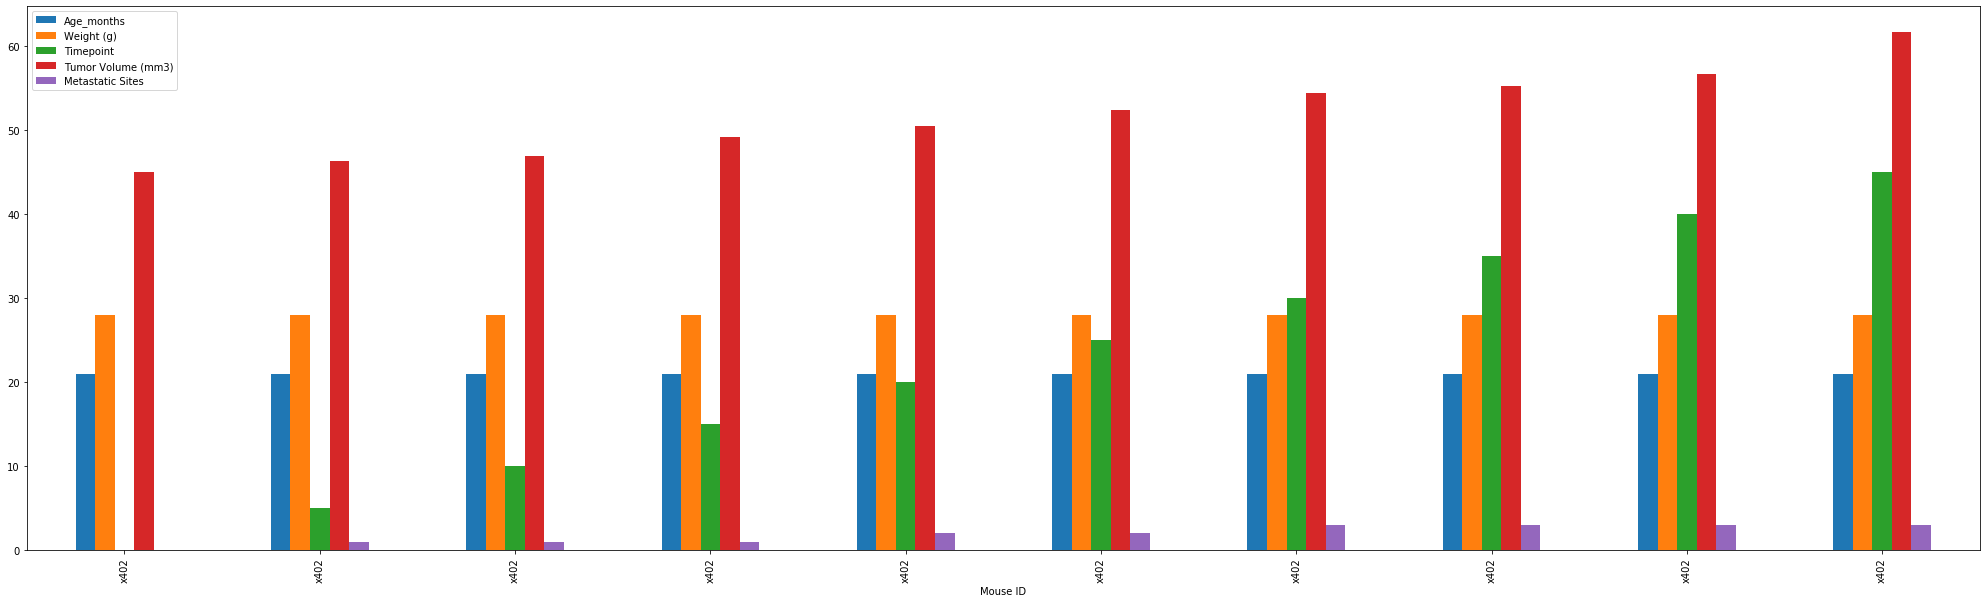

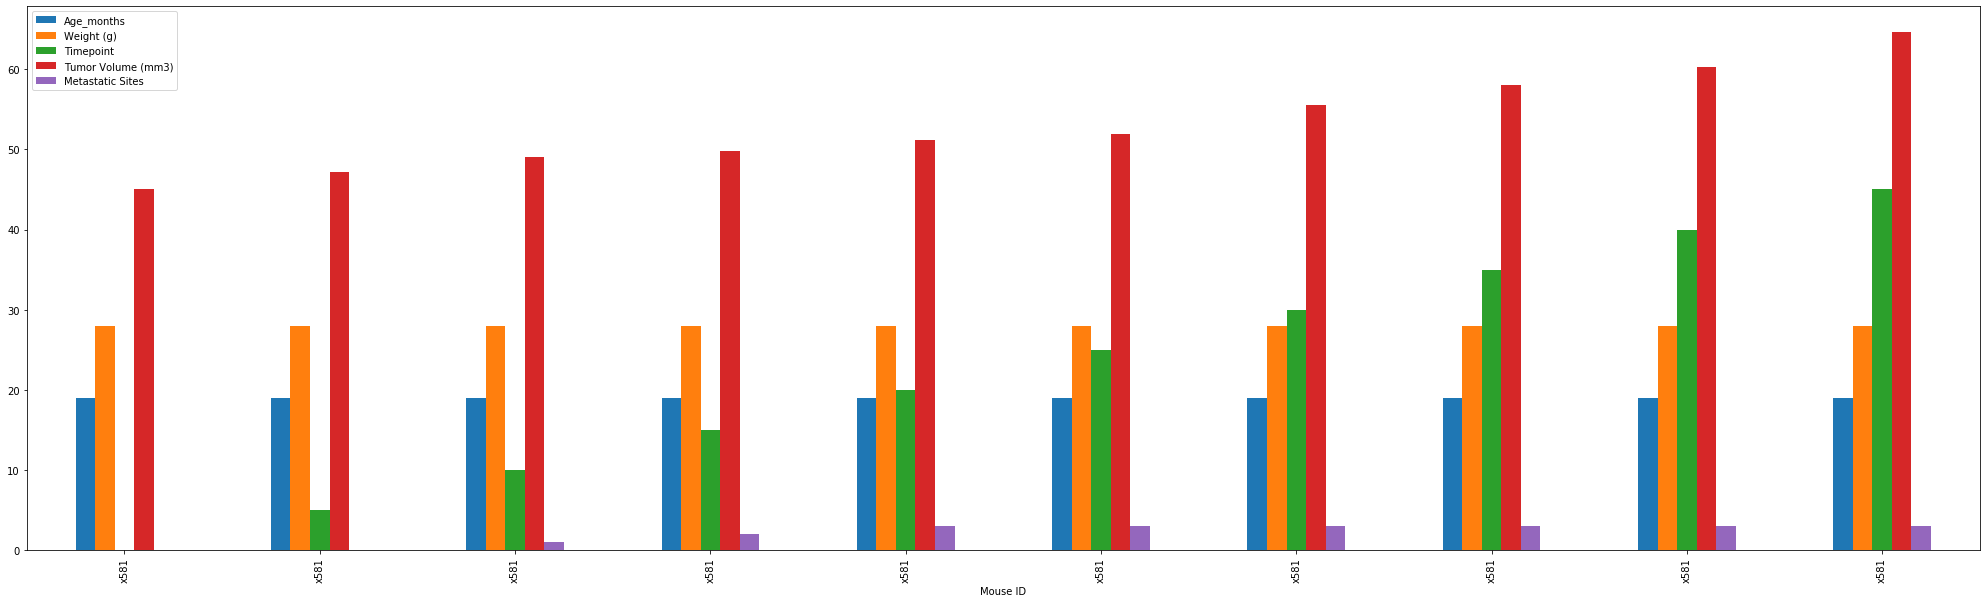

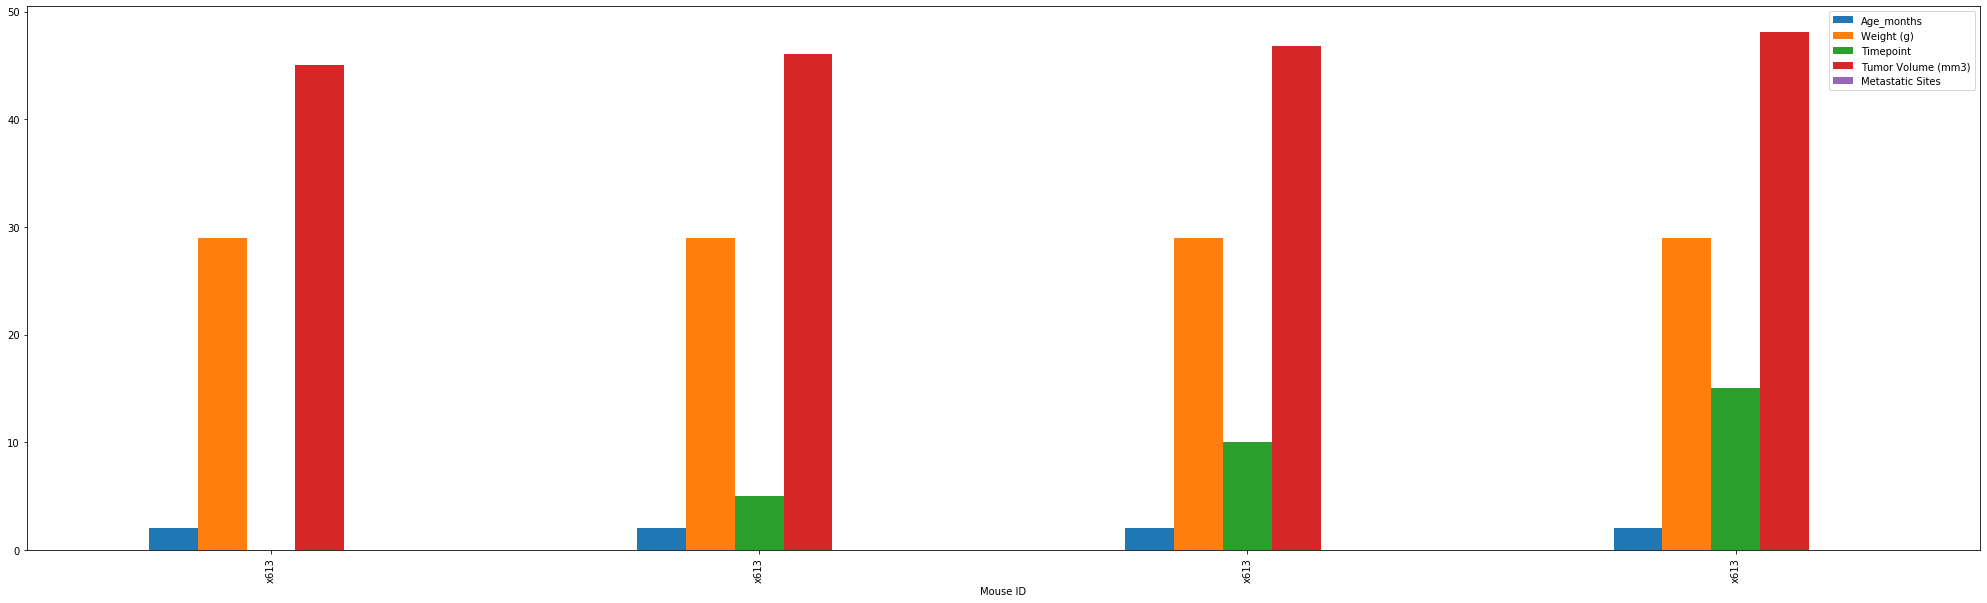

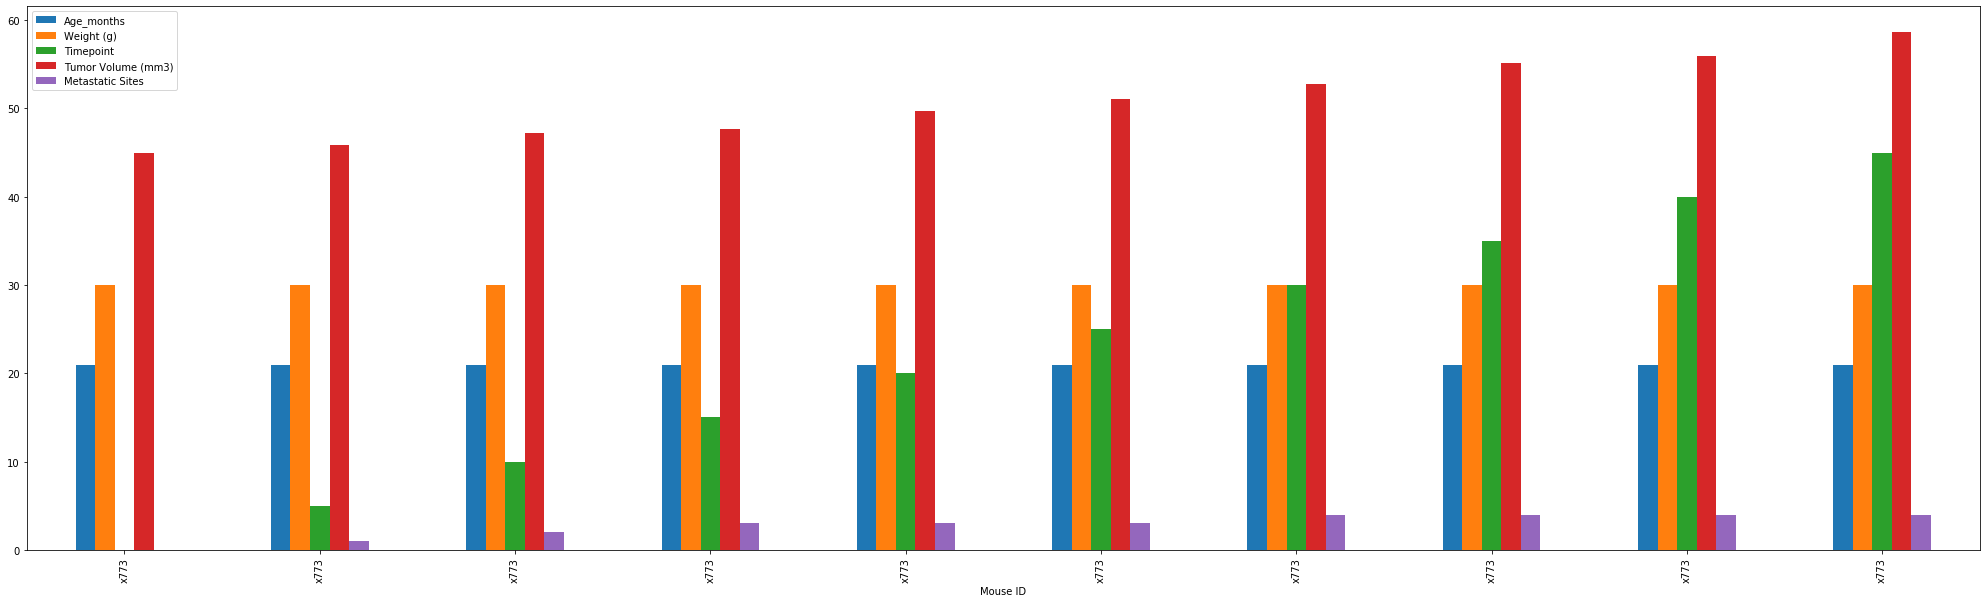

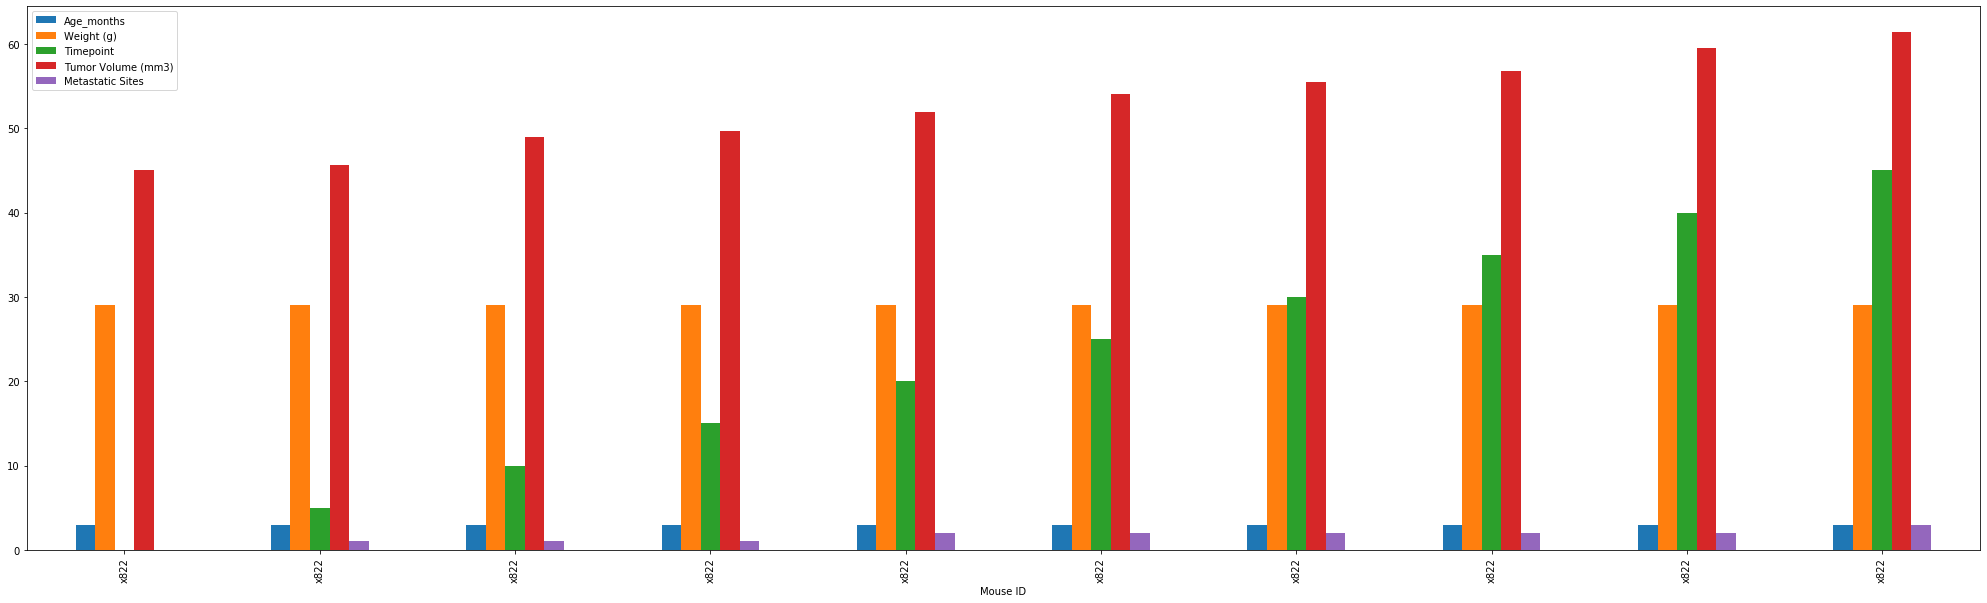

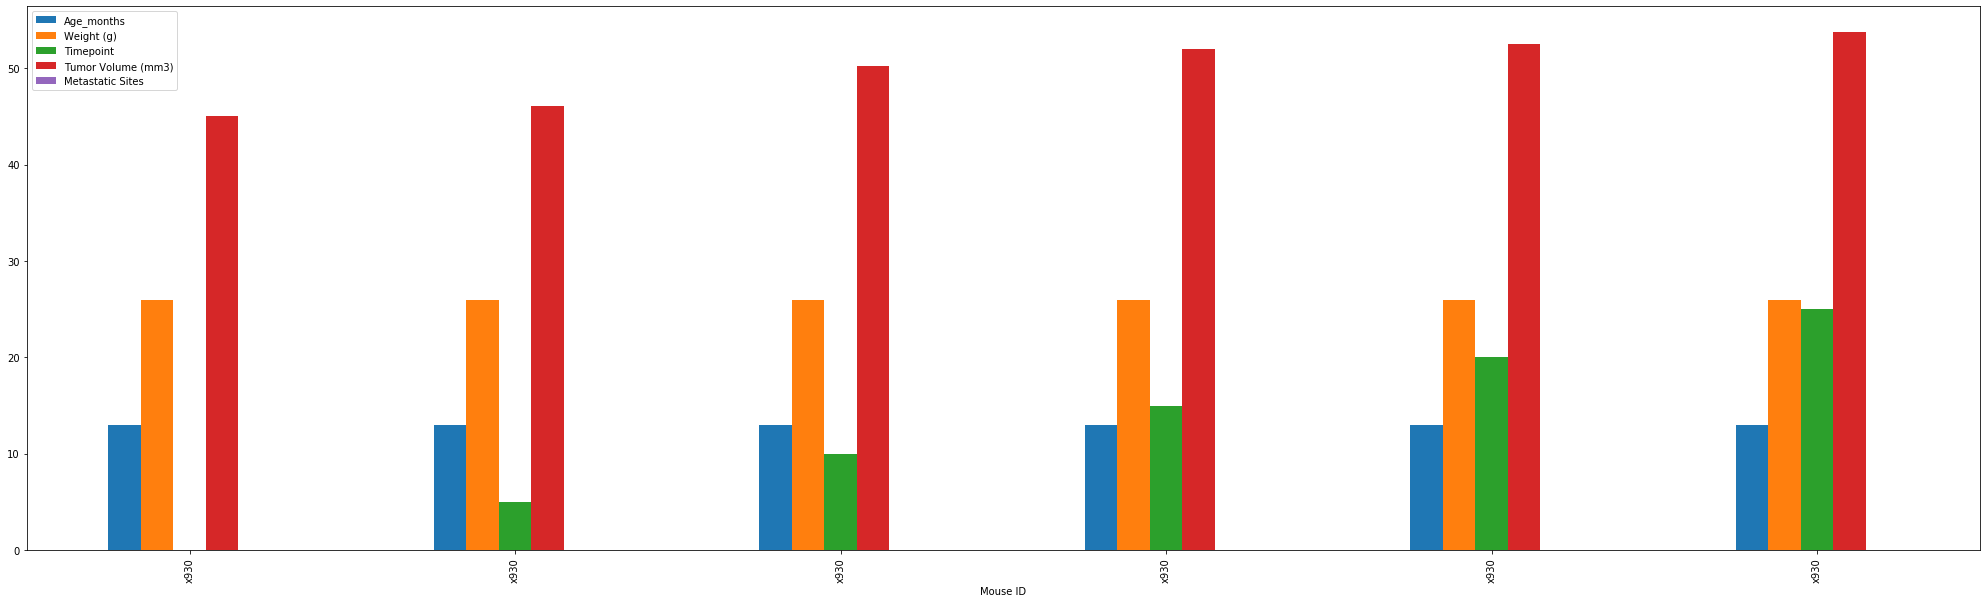

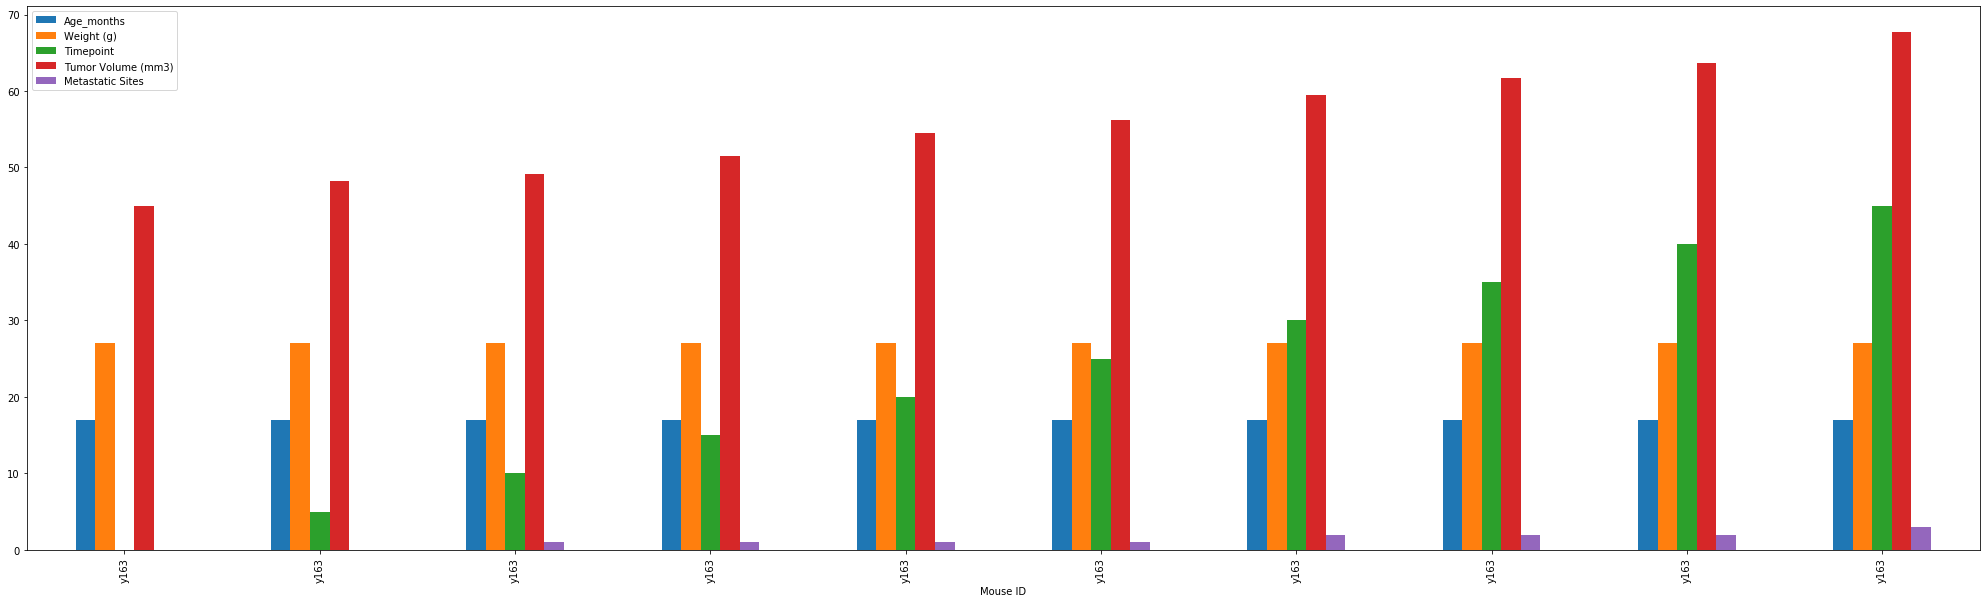

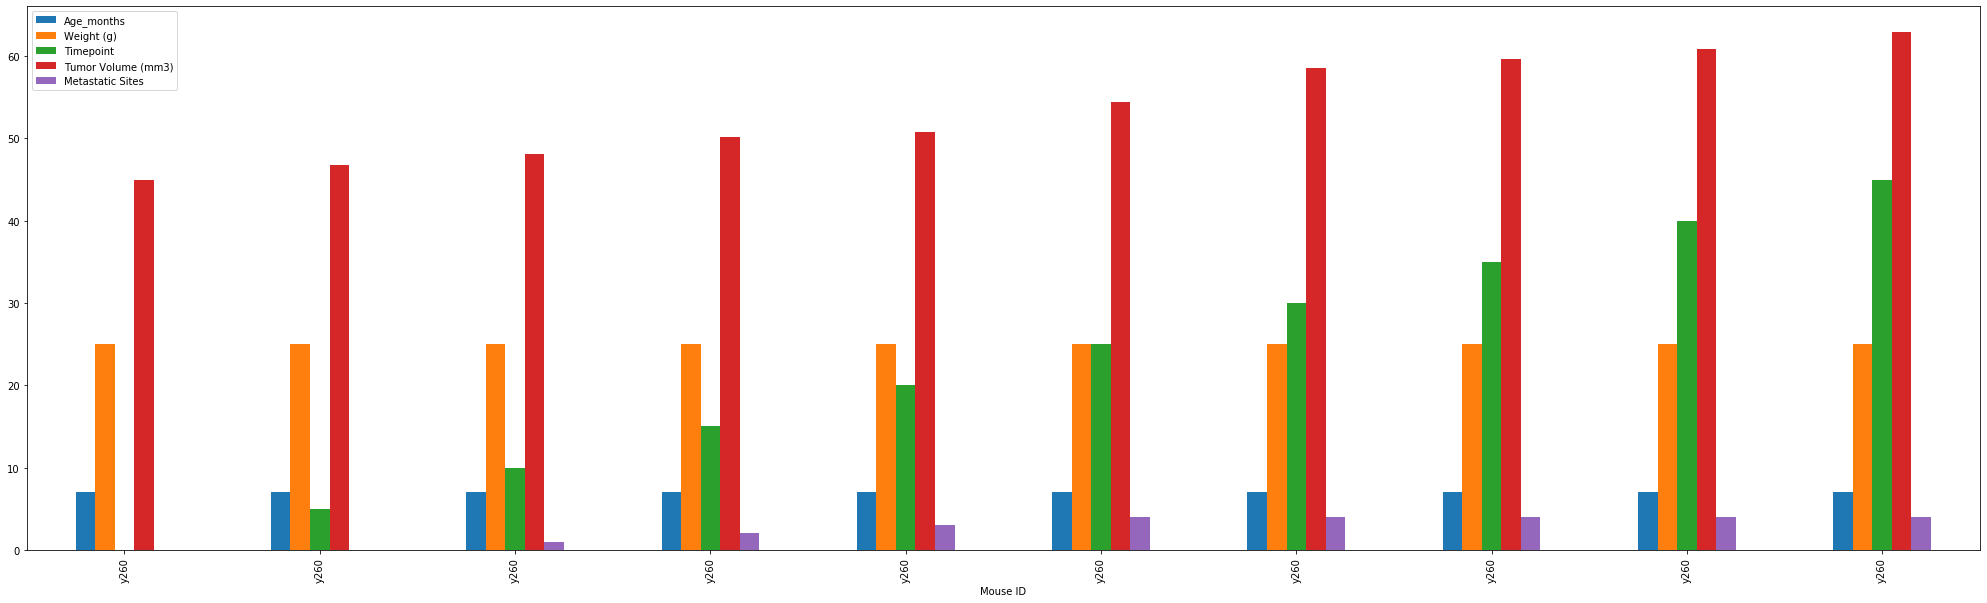

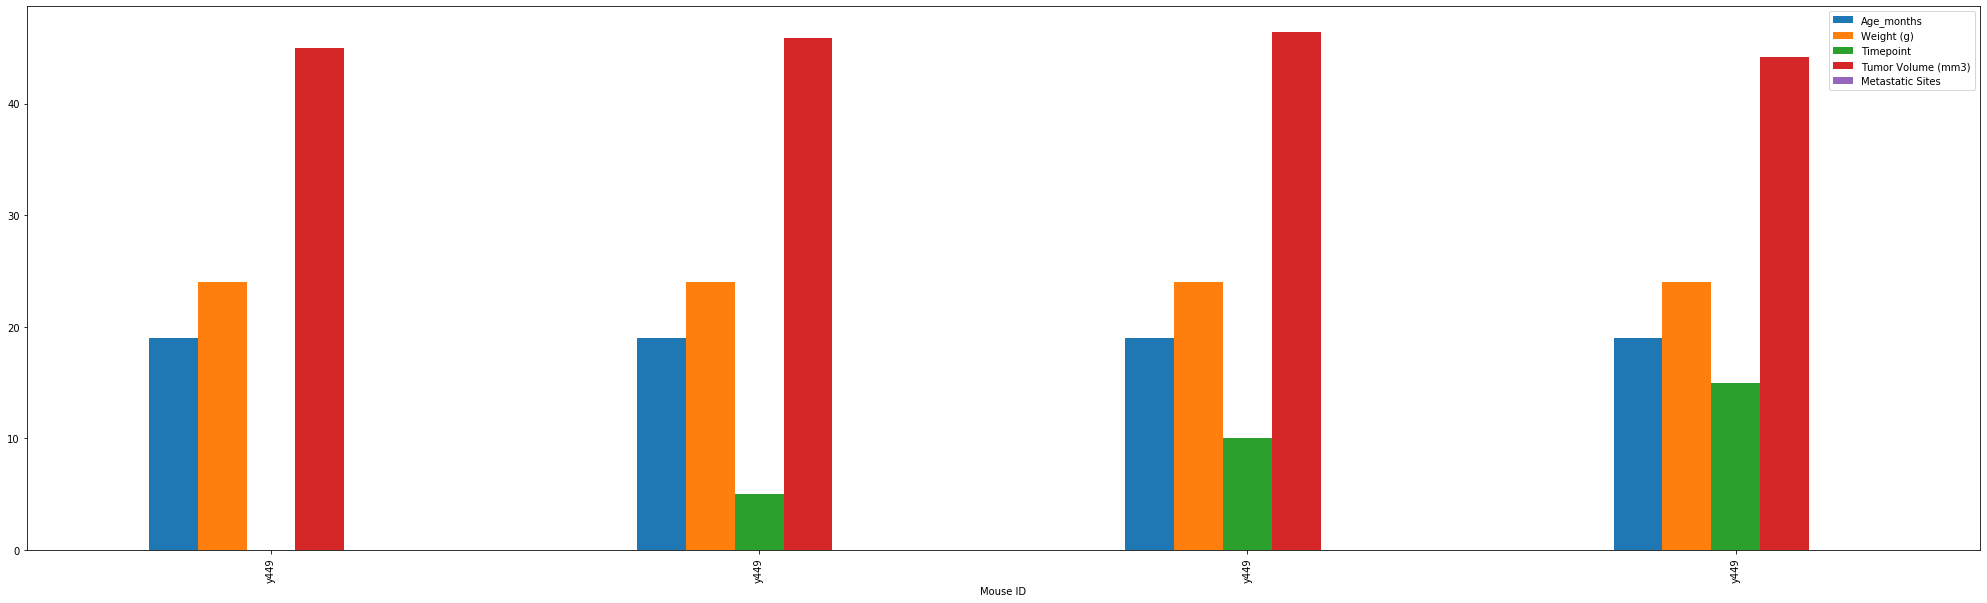

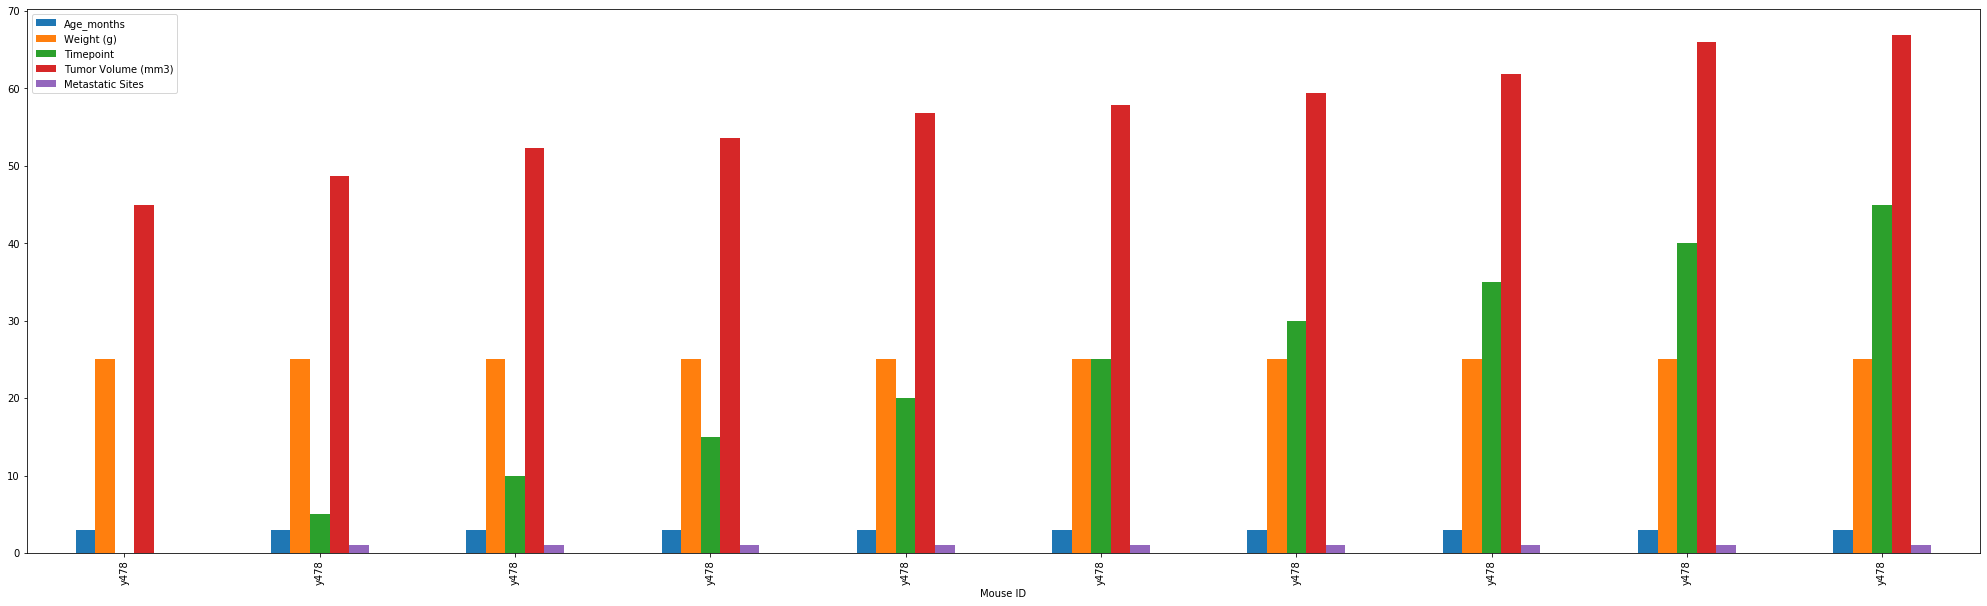

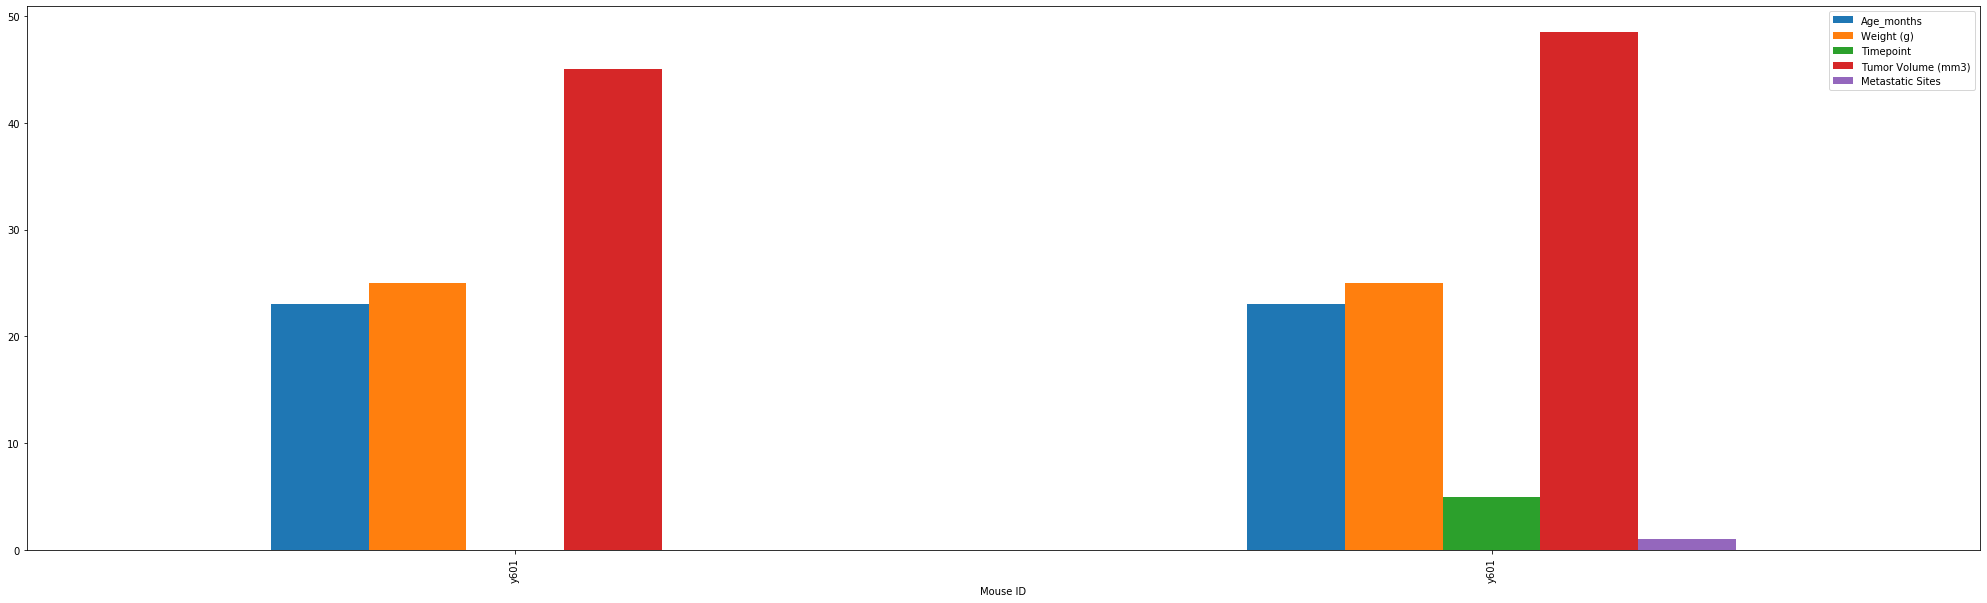

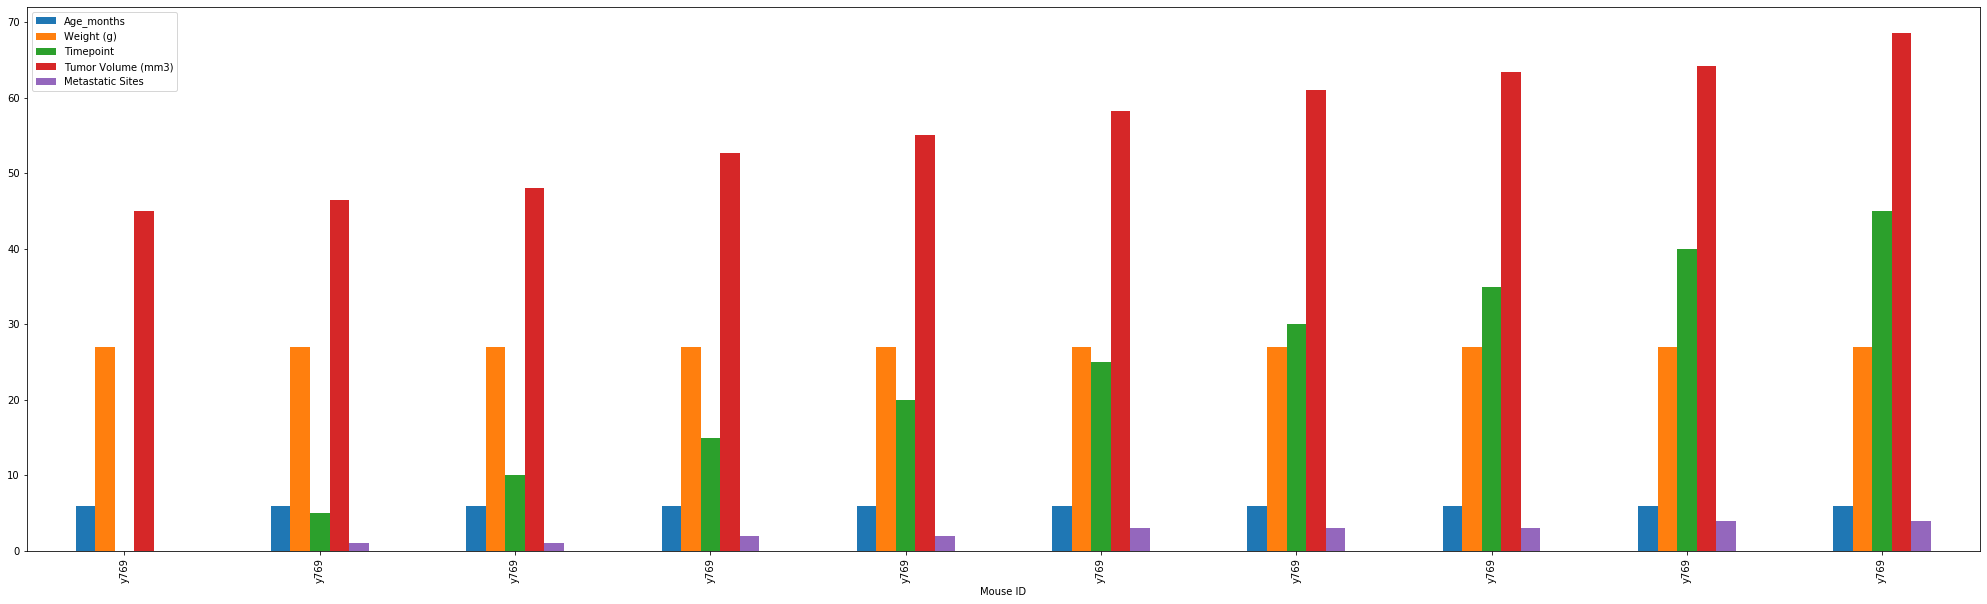

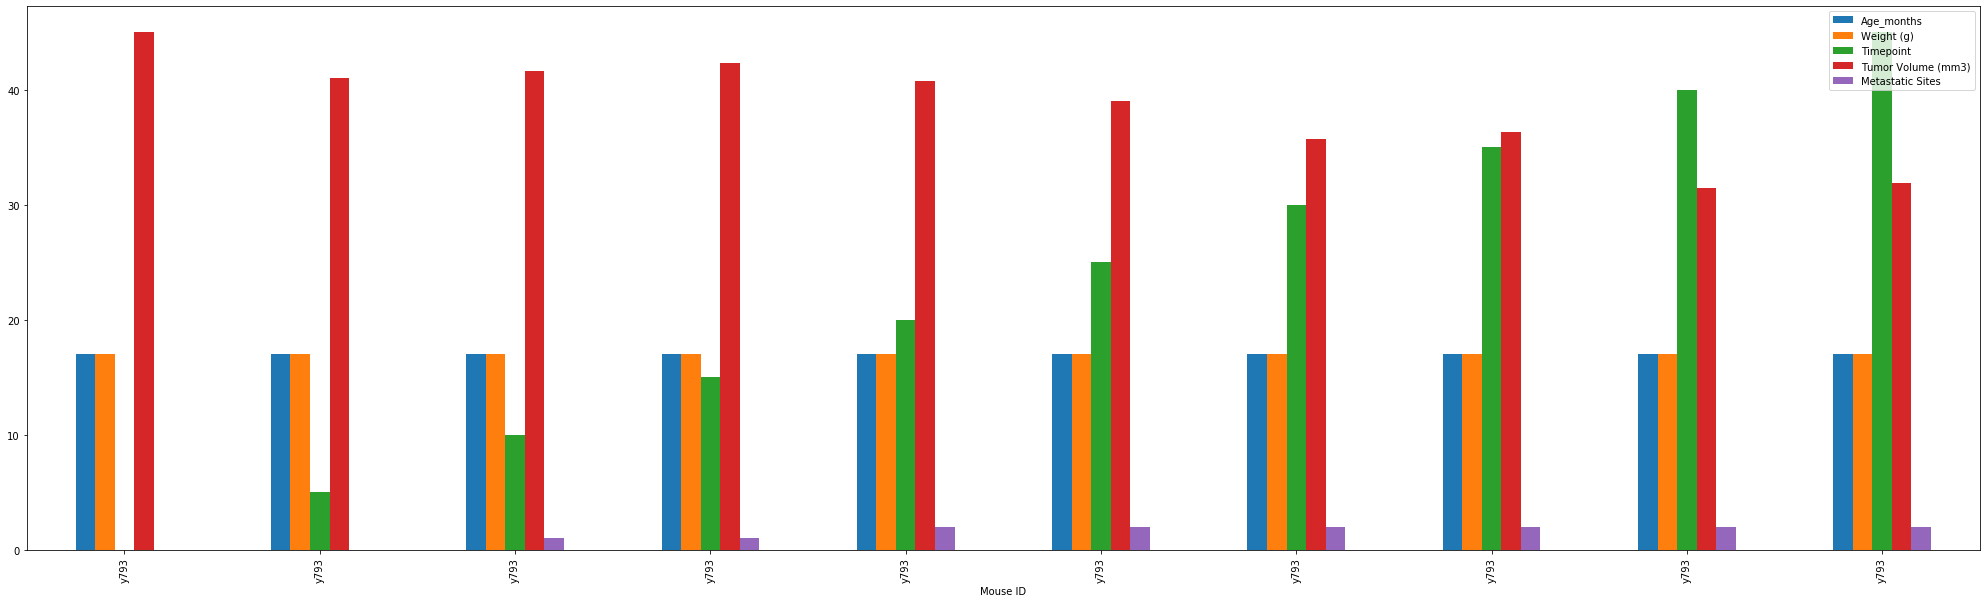

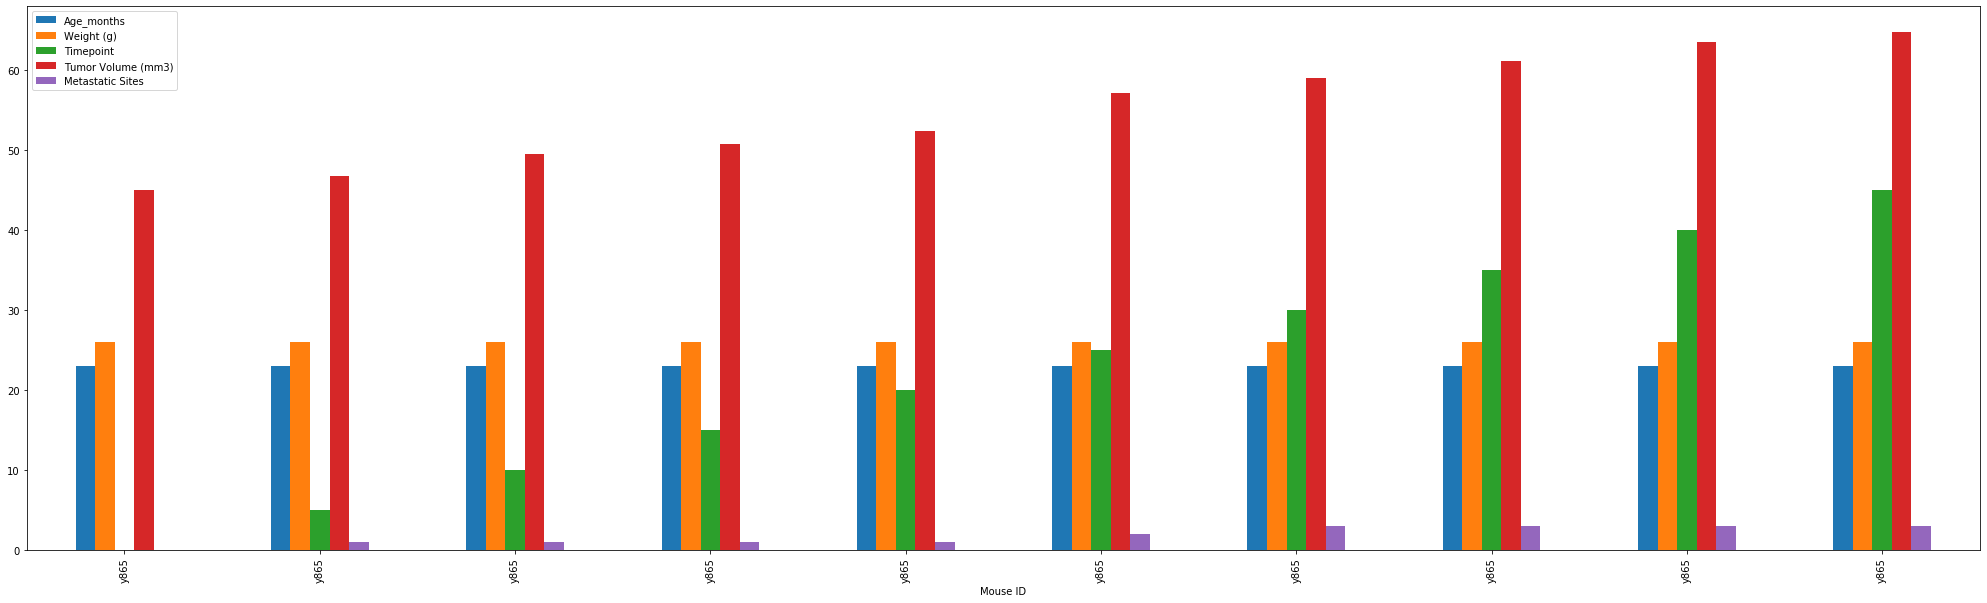

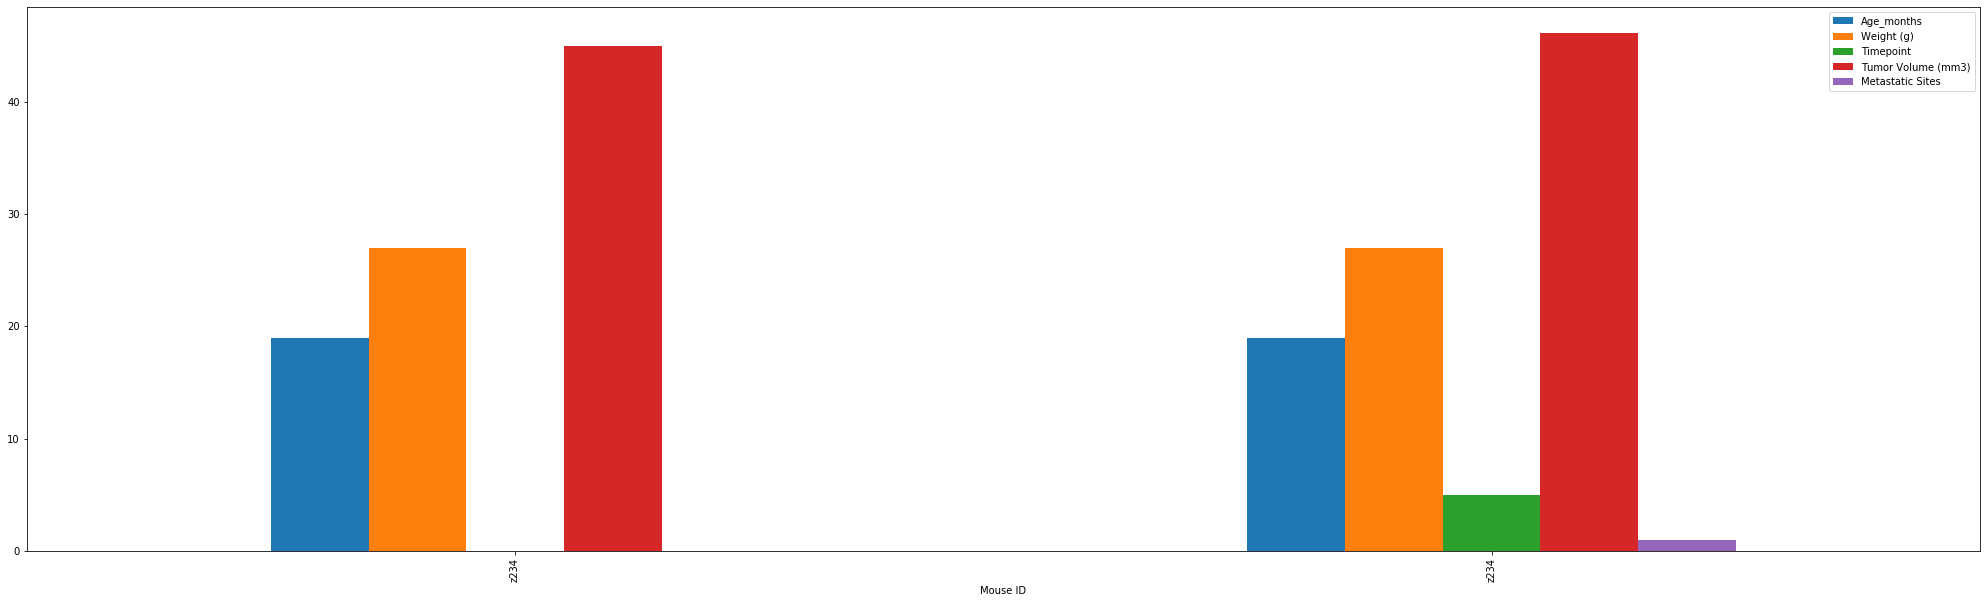

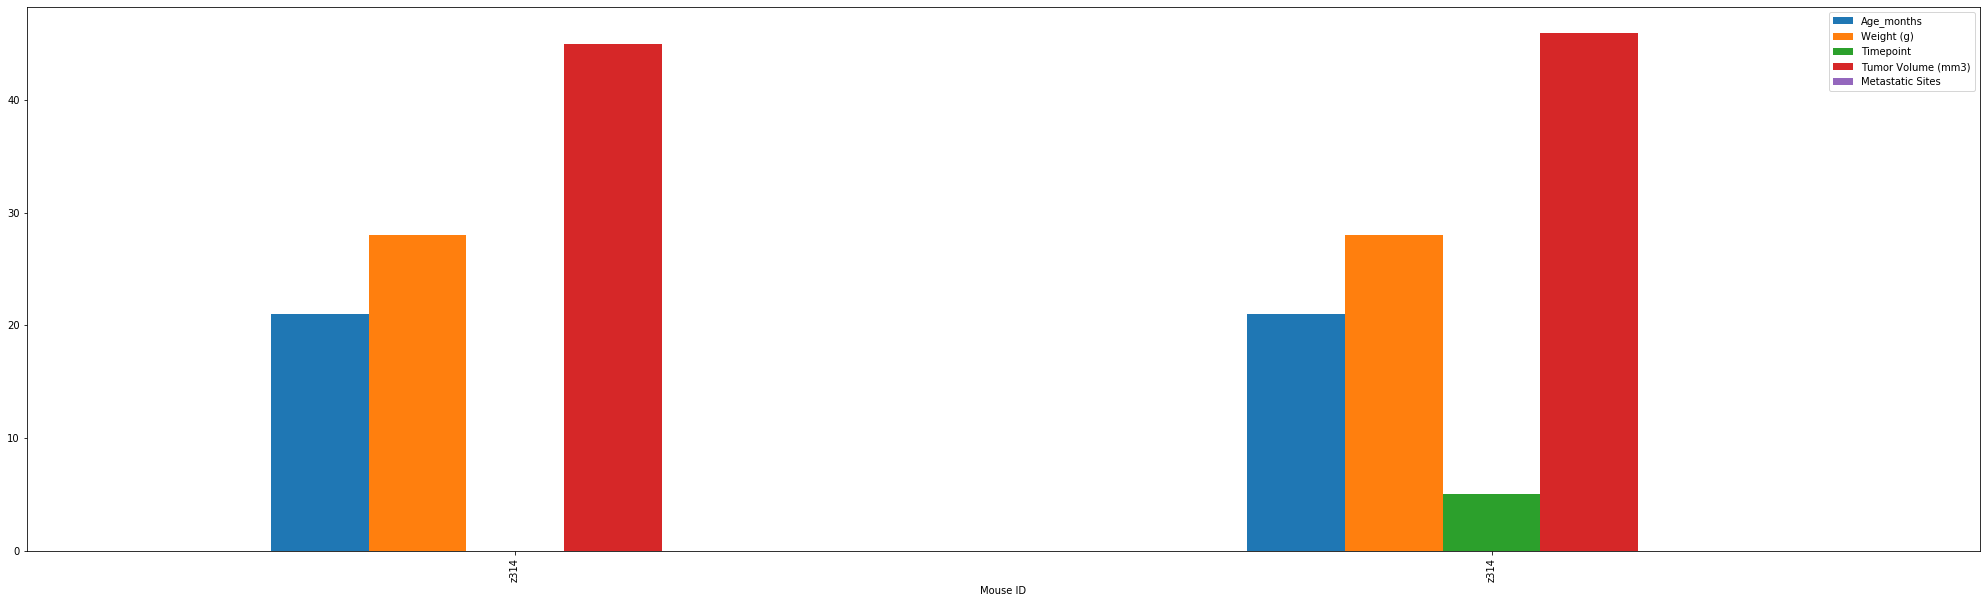

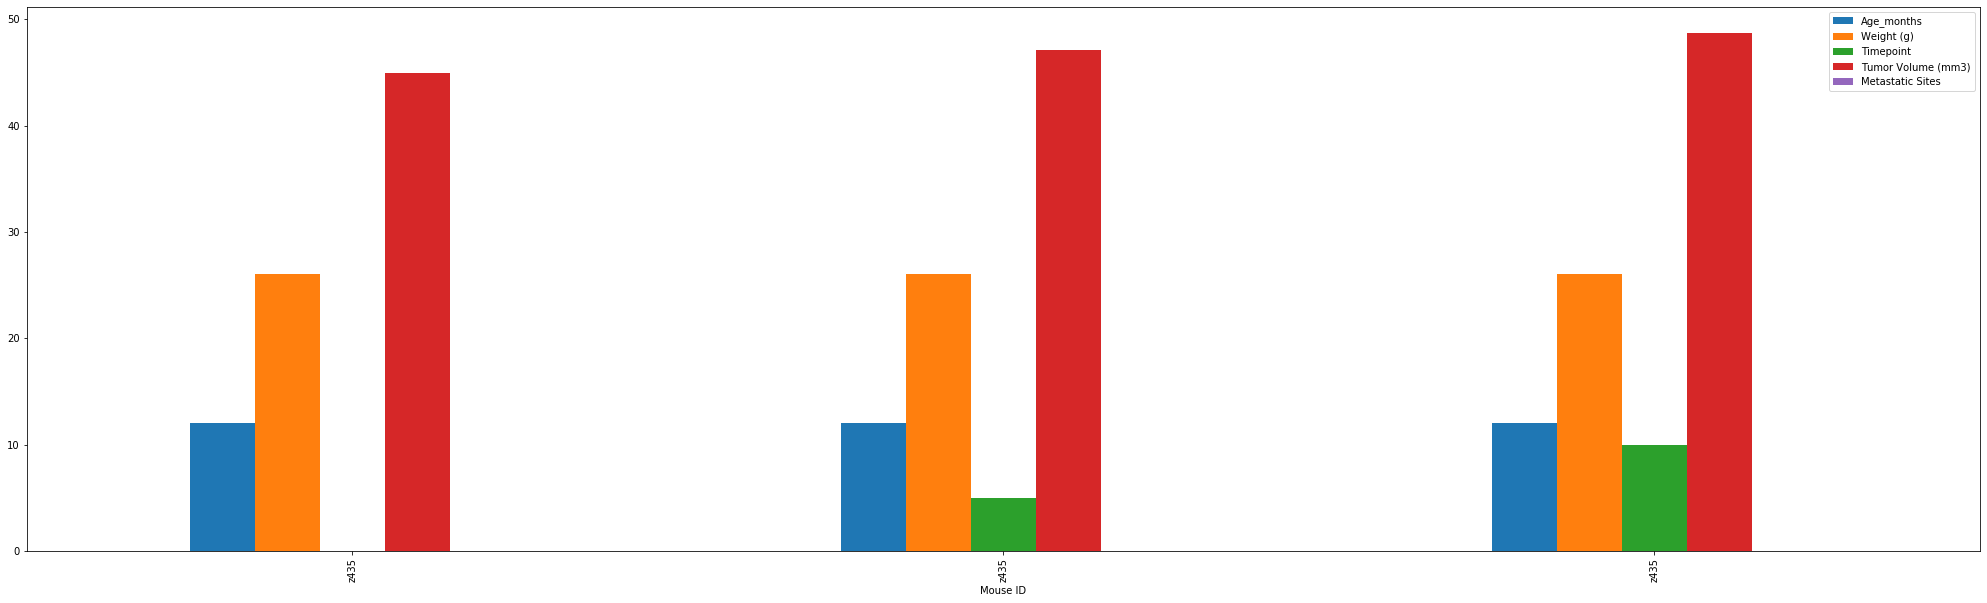

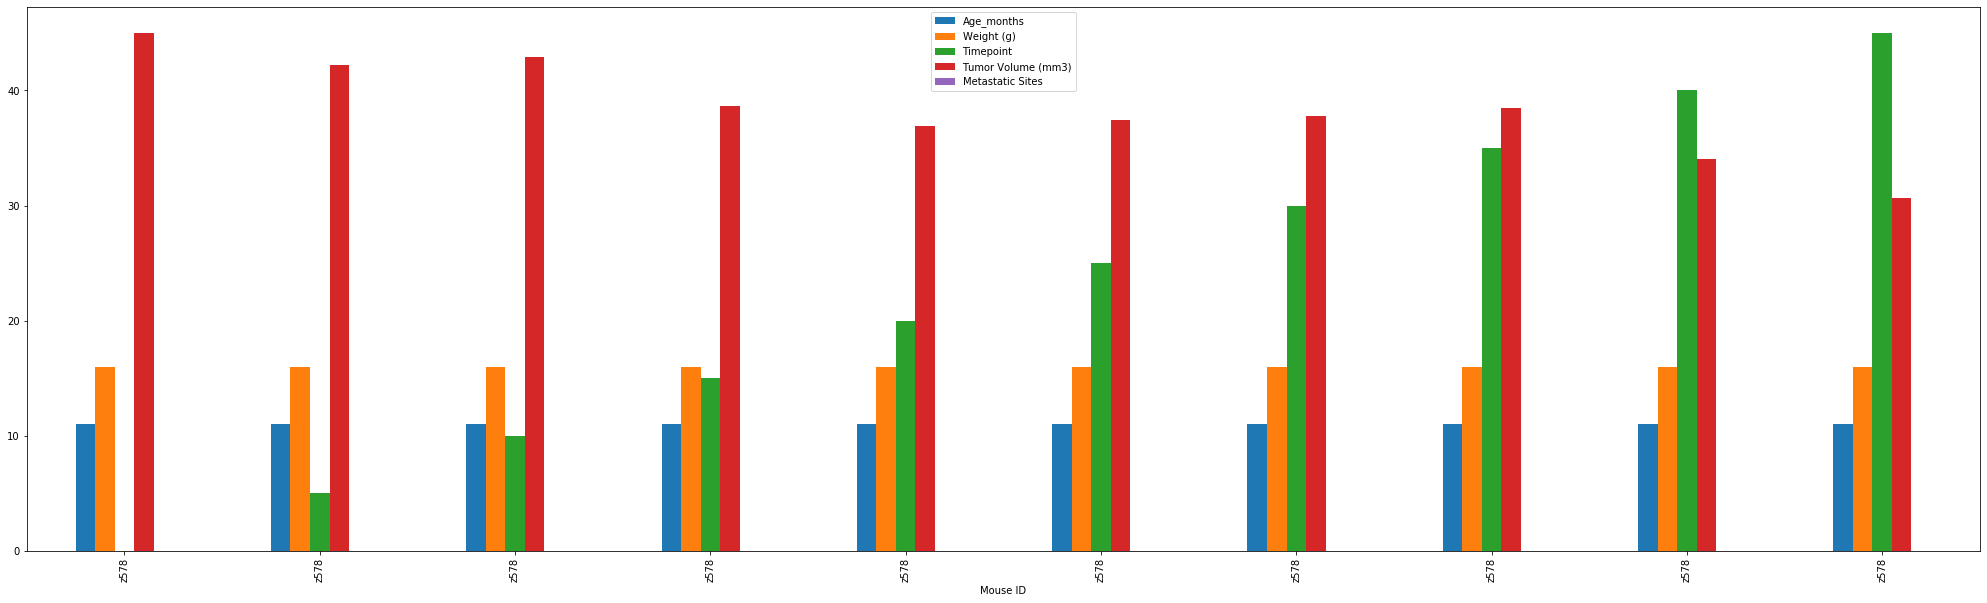

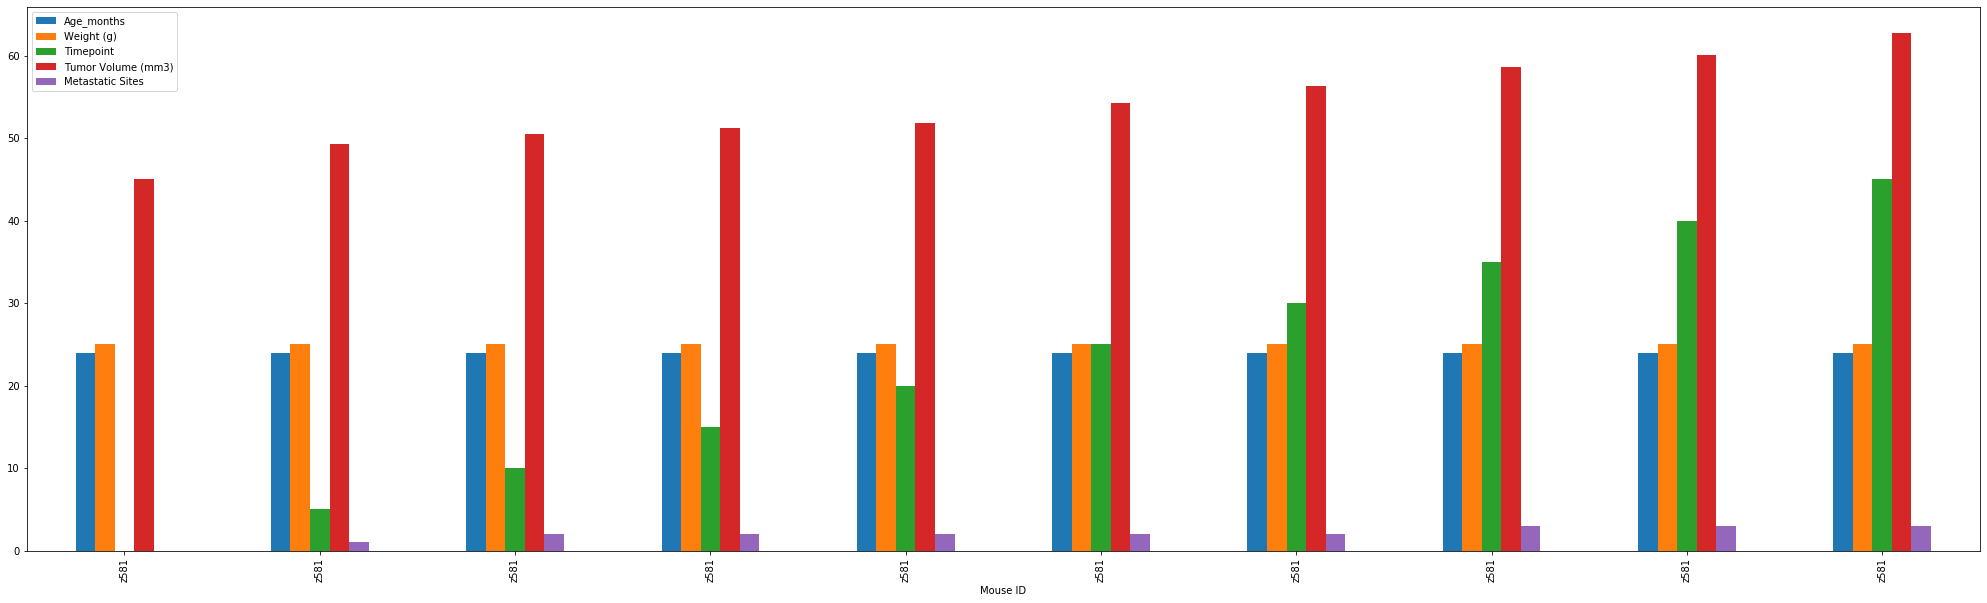

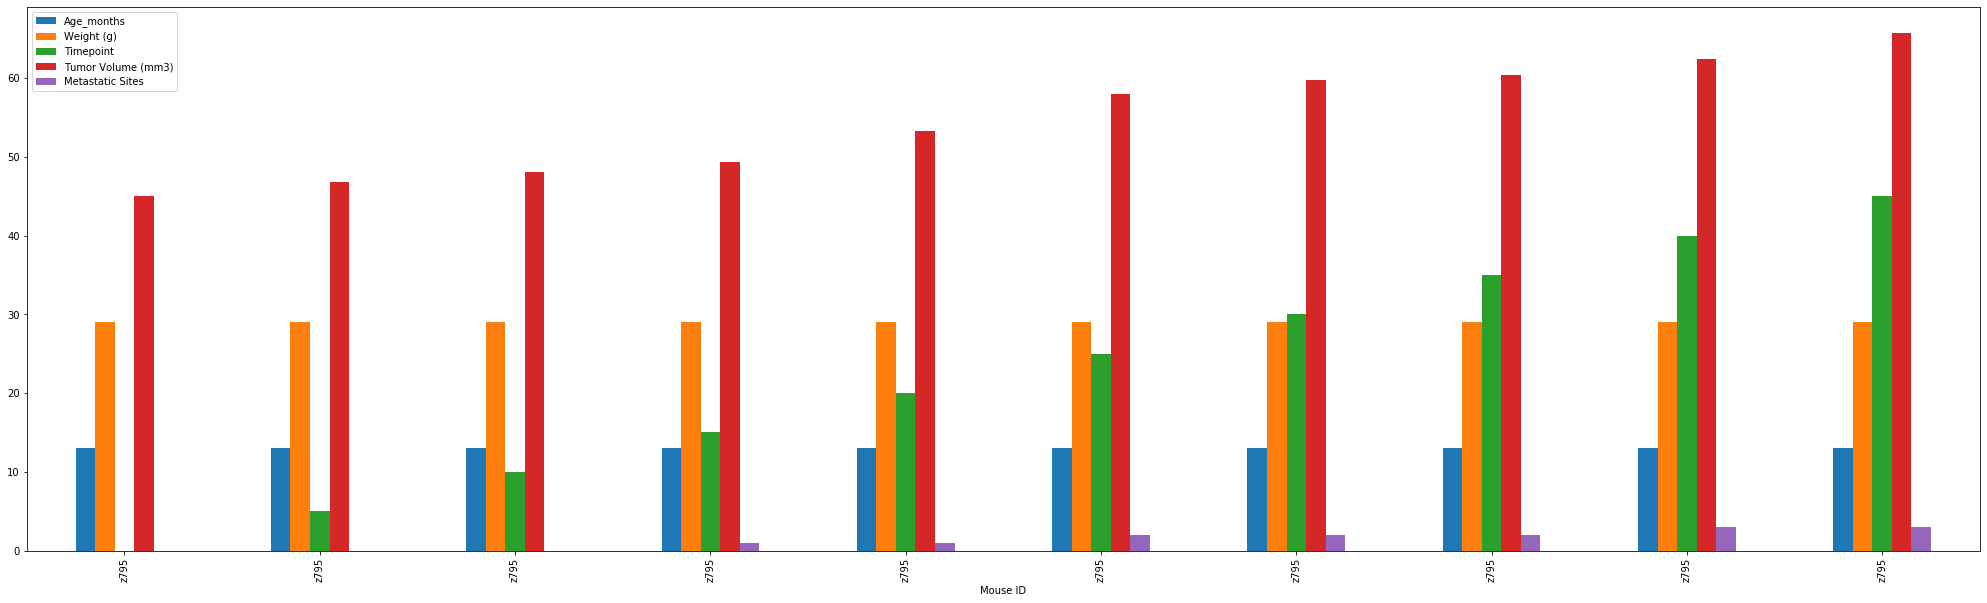

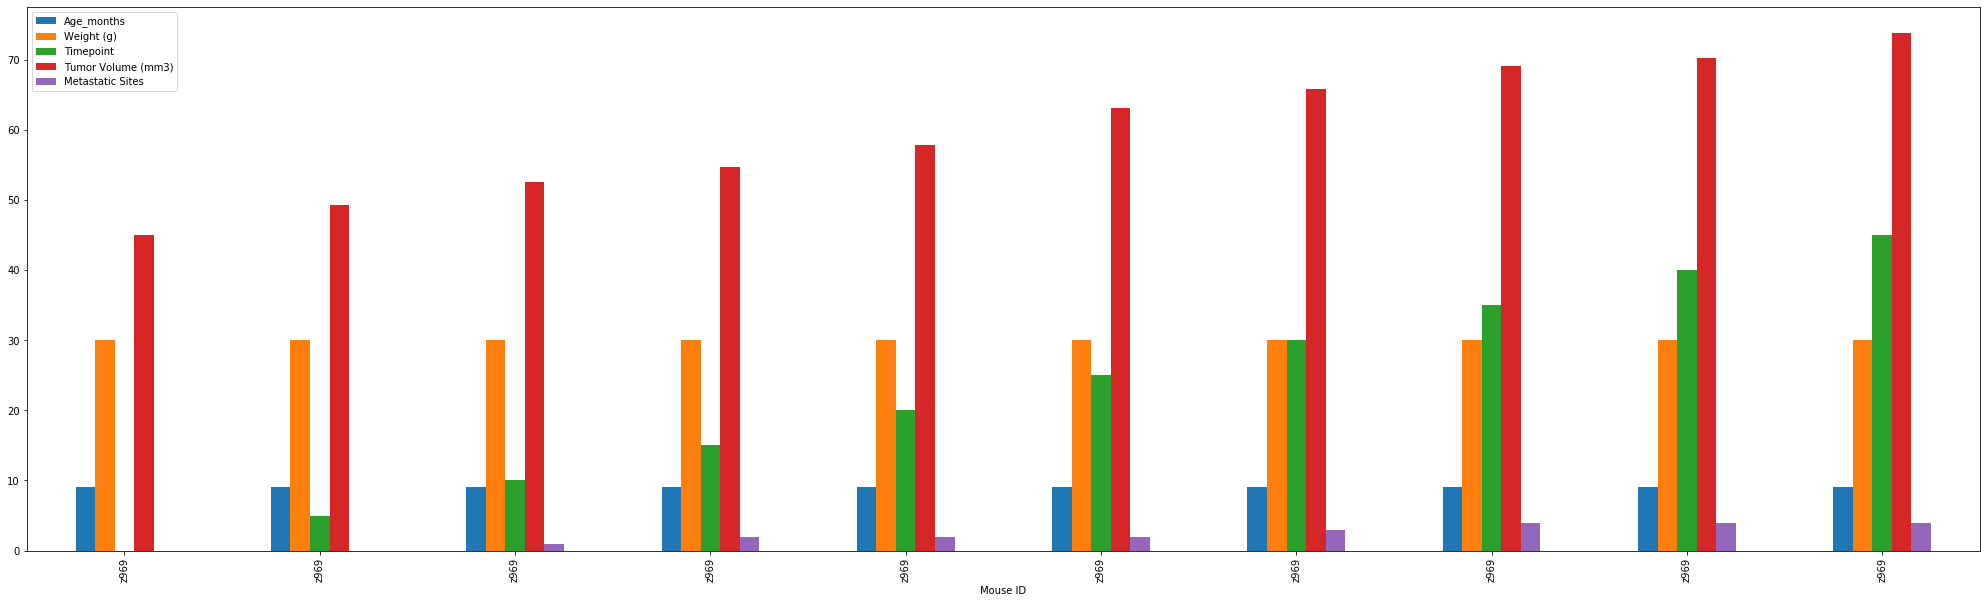

In [10]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
multi_plot = df_G.plot(kind="bar", figsize=(35,10))

In [11]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot



## Pie plots

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

%matplotlib notebook
import matplotlib.pyplot as plt


In [41]:
df_G.head()

Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
Mouse ID                                                         
k403         Ramicane  Male          21          16          0   
k403         Ramicane  Male          21          16          5   
k403         Ramicane  Male          21          16         10   
k403         Ramicane  Male          21          16         15   
k403         Ramicane  Male          21          16         20   
...               ...   ...         ...         ...        ...   
z969         Naftisol  Male           9          30          0   
z969         Naftisol  Male           9          30          5   
z969         Naftisol  Male           9          30         10   
z969         Naftisol  Male           9          30         15   
z969         Naftisol  Male           9          30         20   

          Tumor Volume (mm3)  Metastatic Sites  
Mouse ID                                        
k403               45.000000                 0  
k403               38.825898                 0  
k403               35.014271                 1  
k403               34.223992                 1  
k403               32.997729                 1  
...                      ...               ...  
z969               45.000000                 0  
z969               49.332999                 0  
z969               52.656081                 1  
z969               54.713005                 2  
z969               57.898778                 2  

[1108 rows x 7 columns]

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Female



## Quartiles, outliers and boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [42]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
plt.figure(figsize=(8,5))
plt.plot(df_G.Timepoint, df_G.Sex: "Male", 'r.-', label="Male")
plt.plot(df_G.Timepoint, df_G.Sex: "Female:", 'b.-', label="Female")
plt.title("Treated With Capomulin")
plt.ylabel('Tumor Volume')
plt.legend
plt.show()
         

SyntaxError: invalid syntax (<ipython-input-42-f4d4823565c7>, line 3)

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen